In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from google.colab import files
#uploaded = files.upload()

D0_0 = 'posFinalTouch/0,0.csv'
D0_7_5 = 'posFinalTouch/0,7.5.csv'
D0_15 ='posFinalTouch/0,15.0.csv'
D1_5_4_5 ='posFinalTouch/1.5,4.5.csv'#
D3_3 ='posFinalTouch/3.0,3.0.csv'
D3_7_5 ='posFinalTouch/3.0,7.5.csv'#
D3_12 ='posFinalTouch/3.0,12.0.csv'
D6_9 ='posFinalTouch/6.0,9.0.csv'
D6_12 ='posFinalTouch/6.0,12.75.csv'
D7_5_0 ='posFinalTouch/7.5,0.csv'
D7_5_2_25 ='posFinalTouch/7.5,2.25.csv'#
D7_5_3 ='posFinalTouch/7.5,3.0.csv'#
D7_5_5_25 ='posFinalTouch/7.5,5.25.csv'#
D7_5_7_5 ='posFinalTouch/7.5,7.5.csv'
D7_5_11_25 ='posFinalTouch/7.5,11.25.csv'#
D7_5_12 ='posFinalTouch/7.5,12.0.csv'#
D7_5_15 ='posFinalTouch/7.5,15.0.csv'
D8_25_14_25 ='posFinalTouch/8.25,14.25.csv'#
D10_5_12 ='posFinalTouch/10.5,12.0.csv'#
D12_3 ='posFinalTouch/12.0,3.0.csv'
D12_7_5 ='posFinalTouch/12.0,7.5.csv'#
D12_12 ='posFinalTouch/12.0,12.0.csv'
D15_0 ='posFinalTouch/15.0,0.csv'
D15_7_5 = 'posFinalTouch/15.0,7.5.csv'
D15_15 = 'posFinalTouch/15.0,15.0.csv'

# Importing the Boston Housing dataset
#from sklearn.datasets import load_boston

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

gpus = tf.config.experimental.list_physical_devices()
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        #for gpu in gpus:
        #    tf.config.experimental.set_memory_growth(gpu, True)
        #logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        
        #tf_config = tf.compat.v1.ConfigProto(allow_soft_placement=False)
        #tf_config.gpu_options.allow_growth = True
        #s = tf.compat.v1.Session(config=tf_config)
        
        #tf.compat.v1.keras.backend.set_session(s)
        
        logical_gpus = tf.config.list_physical_devices('GPU')
        
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        tf.config.experimental.set_memory_growth(gpus[1], True)
        #tf.debugging.set_log_device_placement(True)
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
gpus

2 Physical GPUs, 1 Logical GPUs


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
def ChangetoMean(x, numD):
    NumDiv = numD
    d0_7_5Mean = np.empty((int(x.shape[0]/NumDiv),x.shape[1]))
    for i in range(int(x.shape[0]/NumDiv)):
        d0_7_5Mean[i,:] = np.mean(x.iloc[i*NumDiv:i*NumDiv+NumDiv,:],axis=0)
    return d0_7_5Mean

In [4]:
def lengthNew(x):
    return np.sqrt(np.sum(np.power(x,2),axis=1))

In [5]:
def pressForce(x):    
    #x.iloc[:,:4] = x.iloc[:,:4]-np.array(MeanNot[:4]).reshape(1,4)
    valR = x.iloc[:,:4]-np.array(MeanNot[:4]).reshape(1,4)
    #force = lengthNew(x.iloc[:,:4])
    force = lengthNew(valR)
    x['Fdist']=force
    return x

In [33]:
def ratioSxSy(x):
    #x=pressForce(x)
    x.pop(x.columns[6])
    Sxnum=-(1/x[x.columns[0]])+(1/x[x.columns[1]])+(1/x[x.columns[2]])-(1/x[x.columns[3]])    
    Synum=-(1/x[x.columns[0]])-(1/x[x.columns[1]])+(1/x[x.columns[2]])+(1/x[x.columns[3]])
    Sden=(1/x[x.columns[0]])+(1/x[x.columns[1]])+(1/x[x.columns[2]])+(1/x[x.columns[3]])
    x['Sx'] = Sxnum/Sden
    x['Sy'] = Synum/Sden
    return x

In [7]:
def changeLast(x,num):
    #x.pop(x.columns[5])
    x[x.columns[5]]=num
    return x

In [34]:
d0_0 = ratioSxSy(pd.read_csv(D0_0,header=None)).iloc[:10000,:]
d0_7_5 = ratioSxSy(pd.read_csv(D0_7_5,header=None))
d0_15 = ratioSxSy(pd.read_csv(D0_15,header=None))
d1_5_4_5 =ratioSxSy(pd.read_csv(D1_5_4_5,header=None))#
d3_3 = ratioSxSy(pd.read_csv(D3_3,header=None))
d3_7_5 =ratioSxSy(pd.read_csv(D3_7_5,header=None))#
d3_12 = ratioSxSy(pd.read_csv(D3_12,header=None))
d6_9 = ratioSxSy(pd.read_csv(D6_9,header=None))
d6_12 = ratioSxSy(pd.read_csv(D6_12,header=None))
d7_5_0 = ratioSxSy(pd.read_csv(D7_5_0,header=None))
d7_5_2_25 =ratioSxSy(pd.read_csv(D7_5_2_25,header=None))#
d7_5_3 =ratioSxSy(pd.read_csv(D7_5_3,header=None))#
d7_5_5_25 =ratioSxSy(pd.read_csv(D7_5_5_25,header=None))#
d7_5_7_5 = ratioSxSy(pd.read_csv(D7_5_7_5,header=None))
d7_5_11_25 =ratioSxSy(pd.read_csv(D7_5_11_25,header=None))#
d7_5_12 =ratioSxSy(pd.read_csv(D7_5_12,header=None))#
d7_5_15 = ratioSxSy(pd.read_csv(D7_5_15,header=None))
d8_25_14_25 =ratioSxSy(pd.read_csv(D8_25_14_25,header=None))#
d10_5_12 =ratioSxSy(pd.read_csv(D10_5_12,header=None))#
d12_3 = ratioSxSy(pd.read_csv(D12_3,header=None))
d12_7_5 =ratioSxSy(pd.read_csv(D12_7_5,header=None))#
d12_12 = ratioSxSy(pd.read_csv(D12_12,header=None))
d15_0 = ratioSxSy(pd.read_csv(D15_0,header=None))
d15_7_5 = ratioSxSy(pd.read_csv(D15_7_5,header=None))
d15_15 = ratioSxSy(pd.read_csv(D15_15,header=None)) #42


In [32]:
d1_5_4_5.shape

(10000, 10)

In [35]:
datasRaw = np.concatenate([d0_0, d0_7_5, d0_15, d1_5_4_5, d3_3, d3_7_5, d3_12,  
                           d6_9, d6_12, d7_5_0, d7_5_2_25,d7_5_3,d7_5_5_25,d7_5_7_5,d7_5_11_25,
                           d7_5_12, d7_5_15, d8_25_14_25, d10_5_12, d12_3, d12_7_5, d12_12, d15_0, d15_7_5, d15_15])
datasRaw.shape  # 41*5000 = 205000; 13*2500 = 32500; T= 237500

(250000, 9)

In [36]:
datasFull=pd.DataFrame.from_dict(datasRaw)
datasFull.columns=["F0","F1","F2","F3","x","y","Fdist","Sx","Sy"]
datasFull.head()

F0    F1     F2     F3    x    y      Fdist        Sx        Sy
0  341.0  24.0  342.0  231.0  0.0  0.0  10.862780  0.719913 -0.720244
1  340.0  24.0  341.0  231.0  0.0  0.0  12.165525  0.719674 -0.720006
2  339.0  24.0  340.0  231.0  0.0  0.0  13.490738  0.719433 -0.719767
3  338.0  24.0  340.0  231.0  0.0  0.0  14.387495  0.719143 -0.719814
4  336.0  24.0  340.0  231.0  0.0  0.0  16.217275  0.718560 -0.719909

In [39]:
FullDescribe=datasFull.describe(include='all')
FullDescribe=FullDescribe.transpose()
MeandataFull=FullDescribe['mean']
StddataFull=FullDescribe['std']

In [40]:
print("Mean:\n{}\nStd:\n{}".format(MeandataFull,StddataFull))

Mean:
F0       380.901060
F1        27.541588
F2       371.605488
F3       234.023600
x          7.290000
y          7.950000
Fdist     55.419591
Sx         0.702593
Sy        -0.699563
Name: mean, dtype: float64
Std:
F0       29.126948
F1        9.884542
F2       33.097822
F3       12.678525
x         4.507603
y         4.920376
Fdist    26.999260
Sx        0.051334
Sy        0.052649
Name: std, dtype: float64


In [41]:
dataTrain, dataTest = train_test_split(datasFull, test_size=0.15)
dataTrain, dataVal = train_test_split(dataTrain, test_size=0.2)

In [42]:
dataTrain.head()

F0    F1     F2     F3     x     y       Fdist        Sx        Sy
32321   378.0  26.0  360.0  233.0   1.5   4.5   23.595974  0.712004 -0.706513
220530  345.0  28.0  468.0  234.0  15.0   0.0  124.122762  0.681405 -0.715246
68479   392.0  26.0  358.0  233.0   3.0  12.0   42.331549  0.715460 -0.705385
224019  343.0  27.0  426.0  233.0  15.0   0.0   82.071067  0.690619 -0.715003
163196  401.0  25.0  312.0  232.0   7.5  15.0   61.726494  0.727886 -0.699437

In [43]:
# Helper functions
def normNew(x):
    return ((x - MeandataFull) / StddataFull)

def norm4(x, meanD, stdD):
    return ((x - meanD) / stdD)

def norm2(x):
    return ((x - train_stats['mean']) / train_stats['std'])

def norm3(x):
    dataDescribe=x.describe()
    dataDescribe=dataDescribe.transpose()
    return ((x - dataDescribe['mean']) / dataDescribe['std'])

def format_output(data):
    data2=data
    y1 = data2.pop('x')    
    y2 = data2.pop('y')
    return y1, y2

def format_input(data):
    data2=data
    data2.pop('x')    
    data2.pop('y')
    return data2 

def format_output2(data):
    y1 = data.pop('x')   
    y1=np.array(y1)
    y2 = data.pop('y')
    y2=np.array(y2)
    return y1, y2

def PrintMeanStd(x):
    dataDescribe=x.describe()
    dataDescribe=dataDescribe.transpose()
    print("Mean: {}\nStd: {}".format(dataDescribe['mean'],dataDescribe['std']))
    


In [44]:
# Normalize the training and test data
norm_train_X = format_input(normNew(dataTrain))
train_Y = format_output(dataTrain)

norm_test_X=format_input(normNew(dataTest))
test_Y=format_output(dataTest)

norm_val_X = format_input(normNew(dataVal))
val_Y = format_output(dataVal)

norm_train_X = np.array(norm_train_X)
#train_Y = np.array(train_Y)
norm_test_X = np.array(norm_test_X)
#test_Y = np.array(test_Y)
norm_val_X = np.array(norm_val_X)
#val_Y = np.array(val_Y)

In [48]:
def build_model():
    # Define model layers.
    input_layer = layers.Input(shape=(len(norm_train_X[1]),))
    x = layers.Dense(130)(input_layer)   
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)
    
    x = layers.Dense(130)(x)
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)    
    
    x = layers.Dense(130)(x)  
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)  
    
    #x = layers.Dense(130)(x)   
    #x = layers.LSTM(130)(x)
    #x = layers.BatchNormalization()(x)
    #x = tf.keras.activations.relu(x)    
    
    third_dense = layers.Dense(units='130', activation='relu')(x)
    #third_dense = layers.LSTM(units='130', activation='relu')(x)
    #third_dense=layers.Dropout(0.5)(third_dense)
    
    # Y1 output will be fed from the first dense
    y1_output = layers.Dense(units='1', name='x_output')(third_dense)
    
    # Y2 output will be fed from the second dense
    y2_output = layers.Dense(units='1', name='y_output')(third_dense)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

    return model

In [49]:
with tf.device('/gpu:0'):
    model = build_model()

# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={'x_output': 'mse', 'y_output': 'mse'},
              metrics={'x_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y_output': tf.keras.metrics.RootMeanSquaredError()})

In [51]:
# Train the model for 200 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=25000,batch_size=1000, verbose=2, validation_data=(norm_test_X, test_Y), use_multiprocessing=True)

Epoch 1/25000
170/170 - 1s - loss: 1.4698 - x_output_loss: 1.0927 - y_output_loss: 0.3771 - x_output_root_mean_squared_error: 1.0453 - y_output_root_mean_squared_error: 0.6141 - val_loss: 1.6123 - val_x_output_loss: 1.2150 - val_y_output_loss: 0.3973 - val_x_output_root_mean_squared_error: 1.1023 - val_y_output_root_mean_squared_error: 0.6303
Epoch 2/25000
170/170 - 1s - loss: 1.4839 - x_output_loss: 1.1073 - y_output_loss: 0.3766 - x_output_root_mean_squared_error: 1.0523 - y_output_root_mean_squared_error: 0.6136 - val_loss: 0.8541 - val_x_output_loss: 0.6203 - val_y_output_loss: 0.2338 - val_x_output_root_mean_squared_error: 0.7876 - val_y_output_root_mean_squared_error: 0.4835
Epoch 3/25000
170/170 - 1s - loss: 1.4212 - x_output_loss: 1.0494 - y_output_loss: 0.3718 - x_output_root_mean_squared_error: 1.0244 - y_output_root_mean_squared_error: 0.6098 - val_loss: 0.9379 - val_x_output_loss: 0.6745 - val_y_output_loss: 0.2634 - val_x_output_root_mean_squared_error: 0.8213 - val_y_outp

Epoch 25/25000
170/170 - 1s - loss: 1.3171 - x_output_loss: 0.9643 - y_output_loss: 0.3528 - x_output_root_mean_squared_error: 0.9820 - y_output_root_mean_squared_error: 0.5940 - val_loss: 0.7517 - val_x_output_loss: 0.5393 - val_y_output_loss: 0.2124 - val_x_output_root_mean_squared_error: 0.7344 - val_y_output_root_mean_squared_error: 0.4609
Epoch 26/25000
170/170 - 1s - loss: 1.2704 - x_output_loss: 0.9311 - y_output_loss: 0.3393 - x_output_root_mean_squared_error: 0.9649 - y_output_root_mean_squared_error: 0.5825 - val_loss: 0.8005 - val_x_output_loss: 0.5837 - val_y_output_loss: 0.2168 - val_x_output_root_mean_squared_error: 0.7640 - val_y_output_root_mean_squared_error: 0.4656
Epoch 27/25000
170/170 - 1s - loss: 1.2683 - x_output_loss: 0.9352 - y_output_loss: 0.3331 - x_output_root_mean_squared_error: 0.9671 - y_output_root_mean_squared_error: 0.5771 - val_loss: 0.6889 - val_x_output_loss: 0.4853 - val_y_output_loss: 0.2036 - val_x_output_root_mean_squared_error: 0.6967 - val_y_o

Epoch 49/25000
170/170 - 1s - loss: 1.1330 - x_output_loss: 0.8196 - y_output_loss: 0.3134 - x_output_root_mean_squared_error: 0.9053 - y_output_root_mean_squared_error: 0.5598 - val_loss: 0.6806 - val_x_output_loss: 0.4748 - val_y_output_loss: 0.2058 - val_x_output_root_mean_squared_error: 0.6891 - val_y_output_root_mean_squared_error: 0.4536
Epoch 50/25000
170/170 - 1s - loss: 1.1526 - x_output_loss: 0.8394 - y_output_loss: 0.3132 - x_output_root_mean_squared_error: 0.9162 - y_output_root_mean_squared_error: 0.5596 - val_loss: 0.6360 - val_x_output_loss: 0.4379 - val_y_output_loss: 0.1982 - val_x_output_root_mean_squared_error: 0.6617 - val_y_output_root_mean_squared_error: 0.4451
Epoch 51/25000
170/170 - 1s - loss: 1.1339 - x_output_loss: 0.8284 - y_output_loss: 0.3054 - x_output_root_mean_squared_error: 0.9102 - y_output_root_mean_squared_error: 0.5527 - val_loss: 0.8944 - val_x_output_loss: 0.6445 - val_y_output_loss: 0.2499 - val_x_output_root_mean_squared_error: 0.8028 - val_y_o

Epoch 73/25000
170/170 - 1s - loss: 0.9951 - x_output_loss: 0.7137 - y_output_loss: 0.2814 - x_output_root_mean_squared_error: 0.8448 - y_output_root_mean_squared_error: 0.5305 - val_loss: 0.5151 - val_x_output_loss: 0.3492 - val_y_output_loss: 0.1659 - val_x_output_root_mean_squared_error: 0.5909 - val_y_output_root_mean_squared_error: 0.4073
Epoch 74/25000
170/170 - 1s - loss: 1.0250 - x_output_loss: 0.7352 - y_output_loss: 0.2898 - x_output_root_mean_squared_error: 0.8574 - y_output_root_mean_squared_error: 0.5383 - val_loss: 0.5531 - val_x_output_loss: 0.3843 - val_y_output_loss: 0.1688 - val_x_output_root_mean_squared_error: 0.6199 - val_y_output_root_mean_squared_error: 0.4108
Epoch 75/25000
170/170 - 1s - loss: 1.0358 - x_output_loss: 0.7470 - y_output_loss: 0.2889 - x_output_root_mean_squared_error: 0.8643 - y_output_root_mean_squared_error: 0.5375 - val_loss: 1.2241 - val_x_output_loss: 0.9648 - val_y_output_loss: 0.2594 - val_x_output_root_mean_squared_error: 0.9822 - val_y_o

Epoch 97/25000
170/170 - 1s - loss: 0.9422 - x_output_loss: 0.6776 - y_output_loss: 0.2647 - x_output_root_mean_squared_error: 0.8231 - y_output_root_mean_squared_error: 0.5145 - val_loss: 0.5580 - val_x_output_loss: 0.3989 - val_y_output_loss: 0.1591 - val_x_output_root_mean_squared_error: 0.6316 - val_y_output_root_mean_squared_error: 0.3988
Epoch 98/25000
170/170 - 1s - loss: 0.9098 - x_output_loss: 0.6484 - y_output_loss: 0.2614 - x_output_root_mean_squared_error: 0.8052 - y_output_root_mean_squared_error: 0.5112 - val_loss: 0.5111 - val_x_output_loss: 0.3478 - val_y_output_loss: 0.1633 - val_x_output_root_mean_squared_error: 0.5897 - val_y_output_root_mean_squared_error: 0.4041
Epoch 99/25000
170/170 - 1s - loss: 0.9290 - x_output_loss: 0.6578 - y_output_loss: 0.2711 - x_output_root_mean_squared_error: 0.8111 - y_output_root_mean_squared_error: 0.5207 - val_loss: 0.7128 - val_x_output_loss: 0.5106 - val_y_output_loss: 0.2022 - val_x_output_root_mean_squared_error: 0.7146 - val_y_o

Epoch 121/25000
170/170 - 1s - loss: 0.7857 - x_output_loss: 0.5517 - y_output_loss: 0.2340 - x_output_root_mean_squared_error: 0.7428 - y_output_root_mean_squared_error: 0.4837 - val_loss: 0.6900 - val_x_output_loss: 0.5135 - val_y_output_loss: 0.1765 - val_x_output_root_mean_squared_error: 0.7166 - val_y_output_root_mean_squared_error: 0.4201
Epoch 122/25000
170/170 - 1s - loss: 0.8632 - x_output_loss: 0.6113 - y_output_loss: 0.2518 - x_output_root_mean_squared_error: 0.7819 - y_output_root_mean_squared_error: 0.5018 - val_loss: 0.6869 - val_x_output_loss: 0.4942 - val_y_output_loss: 0.1926 - val_x_output_root_mean_squared_error: 0.7030 - val_y_output_root_mean_squared_error: 0.4389
Epoch 123/25000
170/170 - 2s - loss: 0.8588 - x_output_loss: 0.6020 - y_output_loss: 0.2568 - x_output_root_mean_squared_error: 0.7759 - y_output_root_mean_squared_error: 0.5067 - val_loss: 0.4969 - val_x_output_loss: 0.3451 - val_y_output_loss: 0.1518 - val_x_output_root_mean_squared_error: 0.5875 - val_

Epoch 145/25000
170/170 - 1s - loss: 0.8084 - x_output_loss: 0.5739 - y_output_loss: 0.2345 - x_output_root_mean_squared_error: 0.7576 - y_output_root_mean_squared_error: 0.4842 - val_loss: 0.5660 - val_x_output_loss: 0.4022 - val_y_output_loss: 0.1638 - val_x_output_root_mean_squared_error: 0.6342 - val_y_output_root_mean_squared_error: 0.4047
Epoch 146/25000
170/170 - 1s - loss: 0.7728 - x_output_loss: 0.5440 - y_output_loss: 0.2288 - x_output_root_mean_squared_error: 0.7376 - y_output_root_mean_squared_error: 0.4783 - val_loss: 0.4480 - val_x_output_loss: 0.3000 - val_y_output_loss: 0.1480 - val_x_output_root_mean_squared_error: 0.5477 - val_y_output_root_mean_squared_error: 0.3848
Epoch 147/25000
170/170 - 1s - loss: 0.7968 - x_output_loss: 0.5653 - y_output_loss: 0.2315 - x_output_root_mean_squared_error: 0.7518 - y_output_root_mean_squared_error: 0.4811 - val_loss: 0.9035 - val_x_output_loss: 0.6995 - val_y_output_loss: 0.2040 - val_x_output_root_mean_squared_error: 0.8364 - val_

Epoch 169/25000
170/170 - 2s - loss: 0.7608 - x_output_loss: 0.5346 - y_output_loss: 0.2262 - x_output_root_mean_squared_error: 0.7312 - y_output_root_mean_squared_error: 0.4756 - val_loss: 0.7497 - val_x_output_loss: 0.5345 - val_y_output_loss: 0.2152 - val_x_output_root_mean_squared_error: 0.7311 - val_y_output_root_mean_squared_error: 0.4639
Epoch 170/25000
170/170 - 2s - loss: 0.7229 - x_output_loss: 0.5088 - y_output_loss: 0.2141 - x_output_root_mean_squared_error: 0.7133 - y_output_root_mean_squared_error: 0.4627 - val_loss: 0.3796 - val_x_output_loss: 0.2522 - val_y_output_loss: 0.1274 - val_x_output_root_mean_squared_error: 0.5022 - val_y_output_root_mean_squared_error: 0.3569
Epoch 171/25000
170/170 - 2s - loss: 0.7491 - x_output_loss: 0.5246 - y_output_loss: 0.2245 - x_output_root_mean_squared_error: 0.7243 - y_output_root_mean_squared_error: 0.4738 - val_loss: 0.4158 - val_x_output_loss: 0.2832 - val_y_output_loss: 0.1326 - val_x_output_root_mean_squared_error: 0.5322 - val_

Epoch 193/25000
170/170 - 2s - loss: 0.7169 - x_output_loss: 0.4984 - y_output_loss: 0.2185 - x_output_root_mean_squared_error: 0.7060 - y_output_root_mean_squared_error: 0.4675 - val_loss: 0.4160 - val_x_output_loss: 0.2901 - val_y_output_loss: 0.1259 - val_x_output_root_mean_squared_error: 0.5386 - val_y_output_root_mean_squared_error: 0.3548
Epoch 194/25000
170/170 - 2s - loss: 0.6795 - x_output_loss: 0.4763 - y_output_loss: 0.2032 - x_output_root_mean_squared_error: 0.6902 - y_output_root_mean_squared_error: 0.4508 - val_loss: 0.3632 - val_x_output_loss: 0.2444 - val_y_output_loss: 0.1188 - val_x_output_root_mean_squared_error: 0.4944 - val_y_output_root_mean_squared_error: 0.3447
Epoch 195/25000
170/170 - 2s - loss: 0.6914 - x_output_loss: 0.4815 - y_output_loss: 0.2099 - x_output_root_mean_squared_error: 0.6939 - y_output_root_mean_squared_error: 0.4581 - val_loss: 0.5778 - val_x_output_loss: 0.4189 - val_y_output_loss: 0.1589 - val_x_output_root_mean_squared_error: 0.6472 - val_

Epoch 217/25000
170/170 - 2s - loss: 0.6763 - x_output_loss: 0.4715 - y_output_loss: 0.2048 - x_output_root_mean_squared_error: 0.6866 - y_output_root_mean_squared_error: 0.4526 - val_loss: 0.5886 - val_x_output_loss: 0.4345 - val_y_output_loss: 0.1541 - val_x_output_root_mean_squared_error: 0.6592 - val_y_output_root_mean_squared_error: 0.3926
Epoch 218/25000
170/170 - 2s - loss: 0.6927 - x_output_loss: 0.4826 - y_output_loss: 0.2101 - x_output_root_mean_squared_error: 0.6947 - y_output_root_mean_squared_error: 0.4583 - val_loss: 0.3658 - val_x_output_loss: 0.2457 - val_y_output_loss: 0.1200 - val_x_output_root_mean_squared_error: 0.4957 - val_y_output_root_mean_squared_error: 0.3464
Epoch 219/25000
170/170 - 2s - loss: 0.6376 - x_output_loss: 0.4412 - y_output_loss: 0.1965 - x_output_root_mean_squared_error: 0.6642 - y_output_root_mean_squared_error: 0.4433 - val_loss: 0.4274 - val_x_output_loss: 0.3025 - val_y_output_loss: 0.1249 - val_x_output_root_mean_squared_error: 0.5500 - val_

Epoch 241/25000
170/170 - 2s - loss: 0.5916 - x_output_loss: 0.4114 - y_output_loss: 0.1802 - x_output_root_mean_squared_error: 0.6414 - y_output_root_mean_squared_error: 0.4245 - val_loss: 0.3355 - val_x_output_loss: 0.2304 - val_y_output_loss: 0.1050 - val_x_output_root_mean_squared_error: 0.4800 - val_y_output_root_mean_squared_error: 0.3241
Epoch 242/25000
170/170 - 2s - loss: 0.6541 - x_output_loss: 0.4552 - y_output_loss: 0.1990 - x_output_root_mean_squared_error: 0.6747 - y_output_root_mean_squared_error: 0.4460 - val_loss: 0.4039 - val_x_output_loss: 0.2821 - val_y_output_loss: 0.1218 - val_x_output_root_mean_squared_error: 0.5311 - val_y_output_root_mean_squared_error: 0.3490
Epoch 243/25000
170/170 - 2s - loss: 0.6229 - x_output_loss: 0.4332 - y_output_loss: 0.1897 - x_output_root_mean_squared_error: 0.6582 - y_output_root_mean_squared_error: 0.4355 - val_loss: 0.3697 - val_x_output_loss: 0.2516 - val_y_output_loss: 0.1181 - val_x_output_root_mean_squared_error: 0.5016 - val_

Epoch 265/25000
170/170 - 2s - loss: 0.6268 - x_output_loss: 0.4366 - y_output_loss: 0.1902 - x_output_root_mean_squared_error: 0.6608 - y_output_root_mean_squared_error: 0.4361 - val_loss: 0.3420 - val_x_output_loss: 0.2321 - val_y_output_loss: 0.1099 - val_x_output_root_mean_squared_error: 0.4818 - val_y_output_root_mean_squared_error: 0.3315
Epoch 266/25000
170/170 - 2s - loss: 0.5879 - x_output_loss: 0.4087 - y_output_loss: 0.1792 - x_output_root_mean_squared_error: 0.6393 - y_output_root_mean_squared_error: 0.4233 - val_loss: 0.3084 - val_x_output_loss: 0.2086 - val_y_output_loss: 0.0998 - val_x_output_root_mean_squared_error: 0.4567 - val_y_output_root_mean_squared_error: 0.3159
Epoch 267/25000
170/170 - 2s - loss: 0.6220 - x_output_loss: 0.4372 - y_output_loss: 0.1848 - x_output_root_mean_squared_error: 0.6612 - y_output_root_mean_squared_error: 0.4299 - val_loss: 0.3306 - val_x_output_loss: 0.2199 - val_y_output_loss: 0.1107 - val_x_output_root_mean_squared_error: 0.4689 - val_

Epoch 289/25000
170/170 - 2s - loss: 0.6071 - x_output_loss: 0.4211 - y_output_loss: 0.1860 - x_output_root_mean_squared_error: 0.6489 - y_output_root_mean_squared_error: 0.4313 - val_loss: 0.5820 - val_x_output_loss: 0.4302 - val_y_output_loss: 0.1519 - val_x_output_root_mean_squared_error: 0.6559 - val_y_output_root_mean_squared_error: 0.3897
Epoch 290/25000
170/170 - 2s - loss: 0.5732 - x_output_loss: 0.3970 - y_output_loss: 0.1762 - x_output_root_mean_squared_error: 0.6301 - y_output_root_mean_squared_error: 0.4198 - val_loss: 0.3463 - val_x_output_loss: 0.2373 - val_y_output_loss: 0.1090 - val_x_output_root_mean_squared_error: 0.4871 - val_y_output_root_mean_squared_error: 0.3301
Epoch 291/25000
170/170 - 2s - loss: 0.5527 - x_output_loss: 0.3828 - y_output_loss: 0.1698 - x_output_root_mean_squared_error: 0.6187 - y_output_root_mean_squared_error: 0.4121 - val_loss: 0.4261 - val_x_output_loss: 0.2986 - val_y_output_loss: 0.1275 - val_x_output_root_mean_squared_error: 0.5464 - val_

Epoch 313/25000
170/170 - 2s - loss: 0.5529 - x_output_loss: 0.3851 - y_output_loss: 0.1677 - x_output_root_mean_squared_error: 0.6206 - y_output_root_mean_squared_error: 0.4095 - val_loss: 0.3310 - val_x_output_loss: 0.2295 - val_y_output_loss: 0.1014 - val_x_output_root_mean_squared_error: 0.4791 - val_y_output_root_mean_squared_error: 0.3185
Epoch 314/25000
170/170 - 2s - loss: 0.5590 - x_output_loss: 0.3879 - y_output_loss: 0.1710 - x_output_root_mean_squared_error: 0.6228 - y_output_root_mean_squared_error: 0.4136 - val_loss: 0.4202 - val_x_output_loss: 0.3041 - val_y_output_loss: 0.1161 - val_x_output_root_mean_squared_error: 0.5515 - val_y_output_root_mean_squared_error: 0.3408
Epoch 315/25000
170/170 - 2s - loss: 0.5643 - x_output_loss: 0.3951 - y_output_loss: 0.1693 - x_output_root_mean_squared_error: 0.6286 - y_output_root_mean_squared_error: 0.4114 - val_loss: 0.3242 - val_x_output_loss: 0.2247 - val_y_output_loss: 0.0994 - val_x_output_root_mean_squared_error: 0.4741 - val_

Epoch 337/25000
170/170 - 2s - loss: 0.5288 - x_output_loss: 0.3631 - y_output_loss: 0.1657 - x_output_root_mean_squared_error: 0.6026 - y_output_root_mean_squared_error: 0.4070 - val_loss: 0.2819 - val_x_output_loss: 0.1915 - val_y_output_loss: 0.0905 - val_x_output_root_mean_squared_error: 0.4376 - val_y_output_root_mean_squared_error: 0.3008
Epoch 338/25000
170/170 - 2s - loss: 0.5371 - x_output_loss: 0.3746 - y_output_loss: 0.1626 - x_output_root_mean_squared_error: 0.6120 - y_output_root_mean_squared_error: 0.4032 - val_loss: 0.3241 - val_x_output_loss: 0.2219 - val_y_output_loss: 0.1022 - val_x_output_root_mean_squared_error: 0.4711 - val_y_output_root_mean_squared_error: 0.3197
Epoch 339/25000
170/170 - 2s - loss: 0.5688 - x_output_loss: 0.3963 - y_output_loss: 0.1725 - x_output_root_mean_squared_error: 0.6295 - y_output_root_mean_squared_error: 0.4153 - val_loss: 0.3352 - val_x_output_loss: 0.2267 - val_y_output_loss: 0.1085 - val_x_output_root_mean_squared_error: 0.4762 - val_

Epoch 361/25000
170/170 - 2s - loss: 0.5171 - x_output_loss: 0.3595 - y_output_loss: 0.1577 - x_output_root_mean_squared_error: 0.5995 - y_output_root_mean_squared_error: 0.3971 - val_loss: 0.3190 - val_x_output_loss: 0.2191 - val_y_output_loss: 0.0999 - val_x_output_root_mean_squared_error: 0.4681 - val_y_output_root_mean_squared_error: 0.3161
Epoch 362/25000
170/170 - 2s - loss: 0.5001 - x_output_loss: 0.3462 - y_output_loss: 0.1539 - x_output_root_mean_squared_error: 0.5884 - y_output_root_mean_squared_error: 0.3923 - val_loss: 0.3197 - val_x_output_loss: 0.2202 - val_y_output_loss: 0.0995 - val_x_output_root_mean_squared_error: 0.4692 - val_y_output_root_mean_squared_error: 0.3155
Epoch 363/25000
170/170 - 2s - loss: 0.5153 - x_output_loss: 0.3554 - y_output_loss: 0.1599 - x_output_root_mean_squared_error: 0.5962 - y_output_root_mean_squared_error: 0.3999 - val_loss: 0.3685 - val_x_output_loss: 0.2593 - val_y_output_loss: 0.1092 - val_x_output_root_mean_squared_error: 0.5092 - val_

Epoch 385/25000
170/170 - 2s - loss: 0.5285 - x_output_loss: 0.3730 - y_output_loss: 0.1555 - x_output_root_mean_squared_error: 0.6108 - y_output_root_mean_squared_error: 0.3943 - val_loss: 0.3075 - val_x_output_loss: 0.2184 - val_y_output_loss: 0.0891 - val_x_output_root_mean_squared_error: 0.4673 - val_y_output_root_mean_squared_error: 0.2984
Epoch 386/25000
170/170 - 2s - loss: 0.5269 - x_output_loss: 0.3705 - y_output_loss: 0.1564 - x_output_root_mean_squared_error: 0.6087 - y_output_root_mean_squared_error: 0.3955 - val_loss: 0.3781 - val_x_output_loss: 0.2689 - val_y_output_loss: 0.1092 - val_x_output_root_mean_squared_error: 0.5185 - val_y_output_root_mean_squared_error: 0.3305
Epoch 387/25000
170/170 - 2s - loss: 0.4815 - x_output_loss: 0.3338 - y_output_loss: 0.1477 - x_output_root_mean_squared_error: 0.5777 - y_output_root_mean_squared_error: 0.3843 - val_loss: 0.2713 - val_x_output_loss: 0.1869 - val_y_output_loss: 0.0845 - val_x_output_root_mean_squared_error: 0.4323 - val_

Epoch 409/25000
170/170 - 2s - loss: 0.4456 - x_output_loss: 0.3101 - y_output_loss: 0.1355 - x_output_root_mean_squared_error: 0.5568 - y_output_root_mean_squared_error: 0.3681 - val_loss: 0.3925 - val_x_output_loss: 0.2915 - val_y_output_loss: 0.1010 - val_x_output_root_mean_squared_error: 0.5399 - val_y_output_root_mean_squared_error: 0.3177
Epoch 410/25000
170/170 - 2s - loss: 0.4914 - x_output_loss: 0.3417 - y_output_loss: 0.1497 - x_output_root_mean_squared_error: 0.5846 - y_output_root_mean_squared_error: 0.3869 - val_loss: 0.2879 - val_x_output_loss: 0.1960 - val_y_output_loss: 0.0920 - val_x_output_root_mean_squared_error: 0.4427 - val_y_output_root_mean_squared_error: 0.3033
Epoch 411/25000
170/170 - 2s - loss: 0.4956 - x_output_loss: 0.3485 - y_output_loss: 0.1472 - x_output_root_mean_squared_error: 0.5903 - y_output_root_mean_squared_error: 0.3837 - val_loss: 0.2753 - val_x_output_loss: 0.1906 - val_y_output_loss: 0.0846 - val_x_output_root_mean_squared_error: 0.4366 - val_

Epoch 433/25000
170/170 - 2s - loss: 0.5007 - x_output_loss: 0.3482 - y_output_loss: 0.1525 - x_output_root_mean_squared_error: 0.5900 - y_output_root_mean_squared_error: 0.3905 - val_loss: 0.2509 - val_x_output_loss: 0.1699 - val_y_output_loss: 0.0810 - val_x_output_root_mean_squared_error: 0.4122 - val_y_output_root_mean_squared_error: 0.2846
Epoch 434/25000
170/170 - 2s - loss: 0.4463 - x_output_loss: 0.3096 - y_output_loss: 0.1367 - x_output_root_mean_squared_error: 0.5564 - y_output_root_mean_squared_error: 0.3698 - val_loss: 0.2741 - val_x_output_loss: 0.1888 - val_y_output_loss: 0.0853 - val_x_output_root_mean_squared_error: 0.4345 - val_y_output_root_mean_squared_error: 0.2921
Epoch 435/25000
170/170 - 2s - loss: 0.4714 - x_output_loss: 0.3292 - y_output_loss: 0.1422 - x_output_root_mean_squared_error: 0.5738 - y_output_root_mean_squared_error: 0.3771 - val_loss: 0.3948 - val_x_output_loss: 0.2880 - val_y_output_loss: 0.1068 - val_x_output_root_mean_squared_error: 0.5367 - val_

Epoch 457/25000
170/170 - 2s - loss: 0.4479 - x_output_loss: 0.3083 - y_output_loss: 0.1396 - x_output_root_mean_squared_error: 0.5553 - y_output_root_mean_squared_error: 0.3736 - val_loss: 0.2534 - val_x_output_loss: 0.1787 - val_y_output_loss: 0.0747 - val_x_output_root_mean_squared_error: 0.4227 - val_y_output_root_mean_squared_error: 0.2733
Epoch 458/25000
170/170 - 2s - loss: 0.4749 - x_output_loss: 0.3284 - y_output_loss: 0.1465 - x_output_root_mean_squared_error: 0.5731 - y_output_root_mean_squared_error: 0.3827 - val_loss: 0.3660 - val_x_output_loss: 0.2651 - val_y_output_loss: 0.1010 - val_x_output_root_mean_squared_error: 0.5149 - val_y_output_root_mean_squared_error: 0.3177
Epoch 459/25000
170/170 - 2s - loss: 0.4766 - x_output_loss: 0.3323 - y_output_loss: 0.1443 - x_output_root_mean_squared_error: 0.5764 - y_output_root_mean_squared_error: 0.3799 - val_loss: 0.3113 - val_x_output_loss: 0.2194 - val_y_output_loss: 0.0919 - val_x_output_root_mean_squared_error: 0.4684 - val_

Epoch 481/25000
170/170 - 2s - loss: 0.4534 - x_output_loss: 0.3186 - y_output_loss: 0.1348 - x_output_root_mean_squared_error: 0.5645 - y_output_root_mean_squared_error: 0.3672 - val_loss: 0.2353 - val_x_output_loss: 0.1610 - val_y_output_loss: 0.0744 - val_x_output_root_mean_squared_error: 0.4012 - val_y_output_root_mean_squared_error: 0.2727
Epoch 482/25000
170/170 - 2s - loss: 0.4450 - x_output_loss: 0.3120 - y_output_loss: 0.1330 - x_output_root_mean_squared_error: 0.5585 - y_output_root_mean_squared_error: 0.3648 - val_loss: 0.2482 - val_x_output_loss: 0.1682 - val_y_output_loss: 0.0800 - val_x_output_root_mean_squared_error: 0.4101 - val_y_output_root_mean_squared_error: 0.2828
Epoch 483/25000
170/170 - 2s - loss: 0.4482 - x_output_loss: 0.3115 - y_output_loss: 0.1367 - x_output_root_mean_squared_error: 0.5581 - y_output_root_mean_squared_error: 0.3697 - val_loss: 0.2458 - val_x_output_loss: 0.1712 - val_y_output_loss: 0.0747 - val_x_output_root_mean_squared_error: 0.4137 - val_

Epoch 505/25000
170/170 - 2s - loss: 0.4298 - x_output_loss: 0.3036 - y_output_loss: 0.1262 - x_output_root_mean_squared_error: 0.5510 - y_output_root_mean_squared_error: 0.3553 - val_loss: 0.2355 - val_x_output_loss: 0.1614 - val_y_output_loss: 0.0741 - val_x_output_root_mean_squared_error: 0.4018 - val_y_output_root_mean_squared_error: 0.2722
Epoch 506/25000
170/170 - 2s - loss: 0.4580 - x_output_loss: 0.3185 - y_output_loss: 0.1395 - x_output_root_mean_squared_error: 0.5643 - y_output_root_mean_squared_error: 0.3736 - val_loss: 0.2334 - val_x_output_loss: 0.1607 - val_y_output_loss: 0.0726 - val_x_output_root_mean_squared_error: 0.4009 - val_y_output_root_mean_squared_error: 0.2695
Epoch 507/25000
170/170 - 2s - loss: 0.4481 - x_output_loss: 0.3132 - y_output_loss: 0.1349 - x_output_root_mean_squared_error: 0.5597 - y_output_root_mean_squared_error: 0.3673 - val_loss: 0.2936 - val_x_output_loss: 0.2100 - val_y_output_loss: 0.0836 - val_x_output_root_mean_squared_error: 0.4583 - val_

Epoch 529/25000
170/170 - 2s - loss: 0.4542 - x_output_loss: 0.3166 - y_output_loss: 0.1376 - x_output_root_mean_squared_error: 0.5627 - y_output_root_mean_squared_error: 0.3709 - val_loss: 0.3082 - val_x_output_loss: 0.2265 - val_y_output_loss: 0.0817 - val_x_output_root_mean_squared_error: 0.4759 - val_y_output_root_mean_squared_error: 0.2859
Epoch 530/25000
170/170 - 2s - loss: 0.4357 - x_output_loss: 0.3055 - y_output_loss: 0.1301 - x_output_root_mean_squared_error: 0.5528 - y_output_root_mean_squared_error: 0.3607 - val_loss: 0.2384 - val_x_output_loss: 0.1668 - val_y_output_loss: 0.0715 - val_x_output_root_mean_squared_error: 0.4084 - val_y_output_root_mean_squared_error: 0.2675
Epoch 531/25000
170/170 - 2s - loss: 0.4131 - x_output_loss: 0.2888 - y_output_loss: 0.1243 - x_output_root_mean_squared_error: 0.5374 - y_output_root_mean_squared_error: 0.3526 - val_loss: 0.2483 - val_x_output_loss: 0.1724 - val_y_output_loss: 0.0760 - val_x_output_root_mean_squared_error: 0.4152 - val_

Epoch 553/25000
170/170 - 2s - loss: 0.3988 - x_output_loss: 0.2765 - y_output_loss: 0.1223 - x_output_root_mean_squared_error: 0.5258 - y_output_root_mean_squared_error: 0.3498 - val_loss: 0.2670 - val_x_output_loss: 0.1835 - val_y_output_loss: 0.0835 - val_x_output_root_mean_squared_error: 0.4284 - val_y_output_root_mean_squared_error: 0.2889
Epoch 554/25000
170/170 - 2s - loss: 0.3905 - x_output_loss: 0.2721 - y_output_loss: 0.1184 - x_output_root_mean_squared_error: 0.5216 - y_output_root_mean_squared_error: 0.3442 - val_loss: 0.3538 - val_x_output_loss: 0.2587 - val_y_output_loss: 0.0950 - val_x_output_root_mean_squared_error: 0.5087 - val_y_output_root_mean_squared_error: 0.3083
Epoch 555/25000
170/170 - 2s - loss: 0.4042 - x_output_loss: 0.2789 - y_output_loss: 0.1253 - x_output_root_mean_squared_error: 0.5281 - y_output_root_mean_squared_error: 0.3539 - val_loss: 0.2586 - val_x_output_loss: 0.1767 - val_y_output_loss: 0.0819 - val_x_output_root_mean_squared_error: 0.4203 - val_

Epoch 577/25000
170/170 - 2s - loss: 0.4230 - x_output_loss: 0.2954 - y_output_loss: 0.1276 - x_output_root_mean_squared_error: 0.5435 - y_output_root_mean_squared_error: 0.3572 - val_loss: 0.2192 - val_x_output_loss: 0.1515 - val_y_output_loss: 0.0677 - val_x_output_root_mean_squared_error: 0.3892 - val_y_output_root_mean_squared_error: 0.2601
Epoch 578/25000
170/170 - 2s - loss: 0.3867 - x_output_loss: 0.2685 - y_output_loss: 0.1183 - x_output_root_mean_squared_error: 0.5181 - y_output_root_mean_squared_error: 0.3439 - val_loss: 0.2250 - val_x_output_loss: 0.1539 - val_y_output_loss: 0.0711 - val_x_output_root_mean_squared_error: 0.3923 - val_y_output_root_mean_squared_error: 0.2666
Epoch 579/25000
170/170 - 2s - loss: 0.4103 - x_output_loss: 0.2872 - y_output_loss: 0.1231 - x_output_root_mean_squared_error: 0.5359 - y_output_root_mean_squared_error: 0.3509 - val_loss: 0.2466 - val_x_output_loss: 0.1711 - val_y_output_loss: 0.0754 - val_x_output_root_mean_squared_error: 0.4137 - val_

Epoch 601/25000
170/170 - 2s - loss: 0.4010 - x_output_loss: 0.2832 - y_output_loss: 0.1179 - x_output_root_mean_squared_error: 0.5321 - y_output_root_mean_squared_error: 0.3433 - val_loss: 0.2332 - val_x_output_loss: 0.1624 - val_y_output_loss: 0.0708 - val_x_output_root_mean_squared_error: 0.4030 - val_y_output_root_mean_squared_error: 0.2660
Epoch 602/25000
170/170 - 2s - loss: 0.3948 - x_output_loss: 0.2748 - y_output_loss: 0.1201 - x_output_root_mean_squared_error: 0.5242 - y_output_root_mean_squared_error: 0.3465 - val_loss: 0.2255 - val_x_output_loss: 0.1565 - val_y_output_loss: 0.0691 - val_x_output_root_mean_squared_error: 0.3955 - val_y_output_root_mean_squared_error: 0.2628
Epoch 603/25000
170/170 - 2s - loss: 0.4092 - x_output_loss: 0.2868 - y_output_loss: 0.1224 - x_output_root_mean_squared_error: 0.5356 - y_output_root_mean_squared_error: 0.3499 - val_loss: 0.2420 - val_x_output_loss: 0.1673 - val_y_output_loss: 0.0748 - val_x_output_root_mean_squared_error: 0.4090 - val_

Epoch 625/25000
170/170 - 2s - loss: 0.3707 - x_output_loss: 0.2575 - y_output_loss: 0.1131 - x_output_root_mean_squared_error: 0.5075 - y_output_root_mean_squared_error: 0.3364 - val_loss: 0.2254 - val_x_output_loss: 0.1551 - val_y_output_loss: 0.0702 - val_x_output_root_mean_squared_error: 0.3939 - val_y_output_root_mean_squared_error: 0.2650
Epoch 626/25000
170/170 - 2s - loss: 0.3948 - x_output_loss: 0.2745 - y_output_loss: 0.1203 - x_output_root_mean_squared_error: 0.5239 - y_output_root_mean_squared_error: 0.3468 - val_loss: 0.2191 - val_x_output_loss: 0.1537 - val_y_output_loss: 0.0654 - val_x_output_root_mean_squared_error: 0.3921 - val_y_output_root_mean_squared_error: 0.2557
Epoch 627/25000
170/170 - 2s - loss: 0.3960 - x_output_loss: 0.2770 - y_output_loss: 0.1190 - x_output_root_mean_squared_error: 0.5263 - y_output_root_mean_squared_error: 0.3449 - val_loss: 0.3769 - val_x_output_loss: 0.2849 - val_y_output_loss: 0.0920 - val_x_output_root_mean_squared_error: 0.5337 - val_

Epoch 649/25000
170/170 - 2s - loss: 0.3877 - x_output_loss: 0.2714 - y_output_loss: 0.1164 - x_output_root_mean_squared_error: 0.5209 - y_output_root_mean_squared_error: 0.3412 - val_loss: 0.2098 - val_x_output_loss: 0.1445 - val_y_output_loss: 0.0653 - val_x_output_root_mean_squared_error: 0.3801 - val_y_output_root_mean_squared_error: 0.2555
Epoch 650/25000
170/170 - 2s - loss: 0.4019 - x_output_loss: 0.2835 - y_output_loss: 0.1183 - x_output_root_mean_squared_error: 0.5325 - y_output_root_mean_squared_error: 0.3440 - val_loss: 0.2461 - val_x_output_loss: 0.1737 - val_y_output_loss: 0.0724 - val_x_output_root_mean_squared_error: 0.4168 - val_y_output_root_mean_squared_error: 0.2691
Epoch 651/25000
170/170 - 2s - loss: 0.3854 - x_output_loss: 0.2707 - y_output_loss: 0.1147 - x_output_root_mean_squared_error: 0.5203 - y_output_root_mean_squared_error: 0.3387 - val_loss: 0.2244 - val_x_output_loss: 0.1568 - val_y_output_loss: 0.0677 - val_x_output_root_mean_squared_error: 0.3959 - val_

Epoch 673/25000
170/170 - 2s - loss: 0.3883 - x_output_loss: 0.2727 - y_output_loss: 0.1156 - x_output_root_mean_squared_error: 0.5222 - y_output_root_mean_squared_error: 0.3400 - val_loss: 0.2395 - val_x_output_loss: 0.1677 - val_y_output_loss: 0.0719 - val_x_output_root_mean_squared_error: 0.4095 - val_y_output_root_mean_squared_error: 0.2681
Epoch 674/25000
170/170 - 2s - loss: 0.3592 - x_output_loss: 0.2518 - y_output_loss: 0.1074 - x_output_root_mean_squared_error: 0.5018 - y_output_root_mean_squared_error: 0.3277 - val_loss: 0.2248 - val_x_output_loss: 0.1555 - val_y_output_loss: 0.0693 - val_x_output_root_mean_squared_error: 0.3944 - val_y_output_root_mean_squared_error: 0.2632
Epoch 675/25000
170/170 - 2s - loss: 0.3921 - x_output_loss: 0.2743 - y_output_loss: 0.1179 - x_output_root_mean_squared_error: 0.5237 - y_output_root_mean_squared_error: 0.3433 - val_loss: 0.2516 - val_x_output_loss: 0.1722 - val_y_output_loss: 0.0794 - val_x_output_root_mean_squared_error: 0.4149 - val_

Epoch 697/25000
170/170 - 2s - loss: 0.3809 - x_output_loss: 0.2673 - y_output_loss: 0.1136 - x_output_root_mean_squared_error: 0.5170 - y_output_root_mean_squared_error: 0.3371 - val_loss: 0.2399 - val_x_output_loss: 0.1701 - val_y_output_loss: 0.0698 - val_x_output_root_mean_squared_error: 0.4124 - val_y_output_root_mean_squared_error: 0.2642
Epoch 698/25000
170/170 - 2s - loss: 0.3987 - x_output_loss: 0.2804 - y_output_loss: 0.1183 - x_output_root_mean_squared_error: 0.5296 - y_output_root_mean_squared_error: 0.3439 - val_loss: 0.2792 - val_x_output_loss: 0.2007 - val_y_output_loss: 0.0785 - val_x_output_root_mean_squared_error: 0.4480 - val_y_output_root_mean_squared_error: 0.2802
Epoch 699/25000
170/170 - 2s - loss: 0.3634 - x_output_loss: 0.2525 - y_output_loss: 0.1109 - x_output_root_mean_squared_error: 0.5025 - y_output_root_mean_squared_error: 0.3331 - val_loss: 0.2239 - val_x_output_loss: 0.1588 - val_y_output_loss: 0.0651 - val_x_output_root_mean_squared_error: 0.3985 - val_

Epoch 721/25000
170/170 - 2s - loss: 0.3677 - x_output_loss: 0.2593 - y_output_loss: 0.1084 - x_output_root_mean_squared_error: 0.5092 - y_output_root_mean_squared_error: 0.3292 - val_loss: 0.2331 - val_x_output_loss: 0.1628 - val_y_output_loss: 0.0703 - val_x_output_root_mean_squared_error: 0.4035 - val_y_output_root_mean_squared_error: 0.2651
Epoch 722/25000
170/170 - 2s - loss: 0.3613 - x_output_loss: 0.2521 - y_output_loss: 0.1092 - x_output_root_mean_squared_error: 0.5021 - y_output_root_mean_squared_error: 0.3304 - val_loss: 0.2151 - val_x_output_loss: 0.1520 - val_y_output_loss: 0.0631 - val_x_output_root_mean_squared_error: 0.3899 - val_y_output_root_mean_squared_error: 0.2513
Epoch 723/25000
170/170 - 2s - loss: 0.3577 - x_output_loss: 0.2517 - y_output_loss: 0.1060 - x_output_root_mean_squared_error: 0.5017 - y_output_root_mean_squared_error: 0.3256 - val_loss: 0.2383 - val_x_output_loss: 0.1691 - val_y_output_loss: 0.0693 - val_x_output_root_mean_squared_error: 0.4112 - val_

Epoch 745/25000
170/170 - 2s - loss: 0.3745 - x_output_loss: 0.2649 - y_output_loss: 0.1096 - x_output_root_mean_squared_error: 0.5147 - y_output_root_mean_squared_error: 0.3311 - val_loss: 0.1964 - val_x_output_loss: 0.1363 - val_y_output_loss: 0.0601 - val_x_output_root_mean_squared_error: 0.3692 - val_y_output_root_mean_squared_error: 0.2451
Epoch 746/25000
170/170 - 2s - loss: 0.3703 - x_output_loss: 0.2588 - y_output_loss: 0.1115 - x_output_root_mean_squared_error: 0.5087 - y_output_root_mean_squared_error: 0.3340 - val_loss: 0.1979 - val_x_output_loss: 0.1375 - val_y_output_loss: 0.0604 - val_x_output_root_mean_squared_error: 0.3708 - val_y_output_root_mean_squared_error: 0.2458
Epoch 747/25000
170/170 - 2s - loss: 0.3580 - x_output_loss: 0.2510 - y_output_loss: 0.1070 - x_output_root_mean_squared_error: 0.5010 - y_output_root_mean_squared_error: 0.3271 - val_loss: 0.2650 - val_x_output_loss: 0.1890 - val_y_output_loss: 0.0760 - val_x_output_root_mean_squared_error: 0.4347 - val_

Epoch 769/25000
170/170 - 2s - loss: 0.3615 - x_output_loss: 0.2501 - y_output_loss: 0.1113 - x_output_root_mean_squared_error: 0.5001 - y_output_root_mean_squared_error: 0.3337 - val_loss: 0.2387 - val_x_output_loss: 0.1727 - val_y_output_loss: 0.0661 - val_x_output_root_mean_squared_error: 0.4155 - val_y_output_root_mean_squared_error: 0.2570
Epoch 770/25000
170/170 - 2s - loss: 0.3585 - x_output_loss: 0.2512 - y_output_loss: 0.1072 - x_output_root_mean_squared_error: 0.5012 - y_output_root_mean_squared_error: 0.3275 - val_loss: 0.3516 - val_x_output_loss: 0.2549 - val_y_output_loss: 0.0967 - val_x_output_root_mean_squared_error: 0.5048 - val_y_output_root_mean_squared_error: 0.3110
Epoch 771/25000
170/170 - 2s - loss: 0.3780 - x_output_loss: 0.2650 - y_output_loss: 0.1130 - x_output_root_mean_squared_error: 0.5148 - y_output_root_mean_squared_error: 0.3361 - val_loss: 0.1959 - val_x_output_loss: 0.1345 - val_y_output_loss: 0.0614 - val_x_output_root_mean_squared_error: 0.3668 - val_

Epoch 793/25000
170/170 - 2s - loss: 0.3511 - x_output_loss: 0.2439 - y_output_loss: 0.1072 - x_output_root_mean_squared_error: 0.4938 - y_output_root_mean_squared_error: 0.3275 - val_loss: 0.2008 - val_x_output_loss: 0.1410 - val_y_output_loss: 0.0598 - val_x_output_root_mean_squared_error: 0.3755 - val_y_output_root_mean_squared_error: 0.2445
Epoch 794/25000
170/170 - 2s - loss: 0.3476 - x_output_loss: 0.2428 - y_output_loss: 0.1048 - x_output_root_mean_squared_error: 0.4928 - y_output_root_mean_squared_error: 0.3237 - val_loss: 0.1948 - val_x_output_loss: 0.1364 - val_y_output_loss: 0.0585 - val_x_output_root_mean_squared_error: 0.3693 - val_y_output_root_mean_squared_error: 0.2418
Epoch 795/25000
170/170 - 2s - loss: 0.3508 - x_output_loss: 0.2456 - y_output_loss: 0.1053 - x_output_root_mean_squared_error: 0.4955 - y_output_root_mean_squared_error: 0.3245 - val_loss: 0.1859 - val_x_output_loss: 0.1284 - val_y_output_loss: 0.0575 - val_x_output_root_mean_squared_error: 0.3584 - val_

Epoch 817/25000
170/170 - 2s - loss: 0.3321 - x_output_loss: 0.2319 - y_output_loss: 0.1002 - x_output_root_mean_squared_error: 0.4816 - y_output_root_mean_squared_error: 0.3165 - val_loss: 0.1938 - val_x_output_loss: 0.1339 - val_y_output_loss: 0.0599 - val_x_output_root_mean_squared_error: 0.3660 - val_y_output_root_mean_squared_error: 0.2447
Epoch 818/25000
170/170 - 2s - loss: 0.3621 - x_output_loss: 0.2537 - y_output_loss: 0.1084 - x_output_root_mean_squared_error: 0.5037 - y_output_root_mean_squared_error: 0.3293 - val_loss: 0.2850 - val_x_output_loss: 0.2053 - val_y_output_loss: 0.0797 - val_x_output_root_mean_squared_error: 0.4531 - val_y_output_root_mean_squared_error: 0.2822
Epoch 819/25000
170/170 - 2s - loss: 0.3505 - x_output_loss: 0.2458 - y_output_loss: 0.1047 - x_output_root_mean_squared_error: 0.4958 - y_output_root_mean_squared_error: 0.3236 - val_loss: 0.1968 - val_x_output_loss: 0.1371 - val_y_output_loss: 0.0597 - val_x_output_root_mean_squared_error: 0.3703 - val_

Epoch 841/25000
170/170 - 2s - loss: 0.3600 - x_output_loss: 0.2506 - y_output_loss: 0.1095 - x_output_root_mean_squared_error: 0.5006 - y_output_root_mean_squared_error: 0.3309 - val_loss: 0.1969 - val_x_output_loss: 0.1387 - val_y_output_loss: 0.0582 - val_x_output_root_mean_squared_error: 0.3725 - val_y_output_root_mean_squared_error: 0.2413
Epoch 842/25000
170/170 - 2s - loss: 0.3487 - x_output_loss: 0.2440 - y_output_loss: 0.1046 - x_output_root_mean_squared_error: 0.4940 - y_output_root_mean_squared_error: 0.3235 - val_loss: 0.2632 - val_x_output_loss: 0.1938 - val_y_output_loss: 0.0693 - val_x_output_root_mean_squared_error: 0.4402 - val_y_output_root_mean_squared_error: 0.2633
Epoch 843/25000
170/170 - 2s - loss: 0.3458 - x_output_loss: 0.2410 - y_output_loss: 0.1048 - x_output_root_mean_squared_error: 0.4909 - y_output_root_mean_squared_error: 0.3237 - val_loss: 0.1834 - val_x_output_loss: 0.1271 - val_y_output_loss: 0.0563 - val_x_output_root_mean_squared_error: 0.3565 - val_

Epoch 865/25000
170/170 - 2s - loss: 0.3371 - x_output_loss: 0.2372 - y_output_loss: 0.1000 - x_output_root_mean_squared_error: 0.4870 - y_output_root_mean_squared_error: 0.3162 - val_loss: 0.1912 - val_x_output_loss: 0.1345 - val_y_output_loss: 0.0567 - val_x_output_root_mean_squared_error: 0.3668 - val_y_output_root_mean_squared_error: 0.2382
Epoch 866/25000
170/170 - 2s - loss: 0.3312 - x_output_loss: 0.2316 - y_output_loss: 0.0996 - x_output_root_mean_squared_error: 0.4812 - y_output_root_mean_squared_error: 0.3157 - val_loss: 0.1835 - val_x_output_loss: 0.1270 - val_y_output_loss: 0.0565 - val_x_output_root_mean_squared_error: 0.3564 - val_y_output_root_mean_squared_error: 0.2377
Epoch 867/25000
170/170 - 2s - loss: 0.3345 - x_output_loss: 0.2368 - y_output_loss: 0.0977 - x_output_root_mean_squared_error: 0.4867 - y_output_root_mean_squared_error: 0.3125 - val_loss: 0.2067 - val_x_output_loss: 0.1480 - val_y_output_loss: 0.0587 - val_x_output_root_mean_squared_error: 0.3848 - val_

Epoch 889/25000
170/170 - 2s - loss: 0.3293 - x_output_loss: 0.2303 - y_output_loss: 0.0990 - x_output_root_mean_squared_error: 0.4799 - y_output_root_mean_squared_error: 0.3146 - val_loss: 0.1955 - val_x_output_loss: 0.1357 - val_y_output_loss: 0.0598 - val_x_output_root_mean_squared_error: 0.3684 - val_y_output_root_mean_squared_error: 0.2446
Epoch 890/25000
170/170 - 2s - loss: 0.3419 - x_output_loss: 0.2410 - y_output_loss: 0.1010 - x_output_root_mean_squared_error: 0.4909 - y_output_root_mean_squared_error: 0.3177 - val_loss: 0.2605 - val_x_output_loss: 0.1932 - val_y_output_loss: 0.0673 - val_x_output_root_mean_squared_error: 0.4396 - val_y_output_root_mean_squared_error: 0.2594
Epoch 891/25000
170/170 - 2s - loss: 0.3211 - x_output_loss: 0.2251 - y_output_loss: 0.0960 - x_output_root_mean_squared_error: 0.4744 - y_output_root_mean_squared_error: 0.3099 - val_loss: 0.1802 - val_x_output_loss: 0.1254 - val_y_output_loss: 0.0548 - val_x_output_root_mean_squared_error: 0.3541 - val_

Epoch 913/25000
170/170 - 2s - loss: 0.3317 - x_output_loss: 0.2326 - y_output_loss: 0.0991 - x_output_root_mean_squared_error: 0.4823 - y_output_root_mean_squared_error: 0.3147 - val_loss: 0.1966 - val_x_output_loss: 0.1382 - val_y_output_loss: 0.0585 - val_x_output_root_mean_squared_error: 0.3717 - val_y_output_root_mean_squared_error: 0.2418
Epoch 914/25000
170/170 - 2s - loss: 0.3279 - x_output_loss: 0.2309 - y_output_loss: 0.0970 - x_output_root_mean_squared_error: 0.4805 - y_output_root_mean_squared_error: 0.3115 - val_loss: 0.2078 - val_x_output_loss: 0.1513 - val_y_output_loss: 0.0565 - val_x_output_root_mean_squared_error: 0.3890 - val_y_output_root_mean_squared_error: 0.2377
Epoch 915/25000
170/170 - 2s - loss: 0.3416 - x_output_loss: 0.2425 - y_output_loss: 0.0991 - x_output_root_mean_squared_error: 0.4924 - y_output_root_mean_squared_error: 0.3148 - val_loss: 0.2201 - val_x_output_loss: 0.1621 - val_y_output_loss: 0.0580 - val_x_output_root_mean_squared_error: 0.4026 - val_

Epoch 937/25000
170/170 - 2s - loss: 0.3339 - x_output_loss: 0.2374 - y_output_loss: 0.0965 - x_output_root_mean_squared_error: 0.4873 - y_output_root_mean_squared_error: 0.3107 - val_loss: 0.2048 - val_x_output_loss: 0.1449 - val_y_output_loss: 0.0599 - val_x_output_root_mean_squared_error: 0.3806 - val_y_output_root_mean_squared_error: 0.2448
Epoch 938/25000
170/170 - 2s - loss: 0.2988 - x_output_loss: 0.2103 - y_output_loss: 0.0885 - x_output_root_mean_squared_error: 0.4586 - y_output_root_mean_squared_error: 0.2975 - val_loss: 0.1891 - val_x_output_loss: 0.1324 - val_y_output_loss: 0.0567 - val_x_output_root_mean_squared_error: 0.3639 - val_y_output_root_mean_squared_error: 0.2381
Epoch 939/25000
170/170 - 2s - loss: 0.3195 - x_output_loss: 0.2241 - y_output_loss: 0.0954 - x_output_root_mean_squared_error: 0.4734 - y_output_root_mean_squared_error: 0.3089 - val_loss: 0.2333 - val_x_output_loss: 0.1660 - val_y_output_loss: 0.0674 - val_x_output_root_mean_squared_error: 0.4074 - val_

Epoch 961/25000
170/170 - 2s - loss: 0.3358 - x_output_loss: 0.2387 - y_output_loss: 0.0971 - x_output_root_mean_squared_error: 0.4886 - y_output_root_mean_squared_error: 0.3116 - val_loss: 0.1847 - val_x_output_loss: 0.1287 - val_y_output_loss: 0.0560 - val_x_output_root_mean_squared_error: 0.3588 - val_y_output_root_mean_squared_error: 0.2366
Epoch 962/25000
170/170 - 2s - loss: 0.3251 - x_output_loss: 0.2293 - y_output_loss: 0.0958 - x_output_root_mean_squared_error: 0.4788 - y_output_root_mean_squared_error: 0.3096 - val_loss: 0.2087 - val_x_output_loss: 0.1513 - val_y_output_loss: 0.0574 - val_x_output_root_mean_squared_error: 0.3890 - val_y_output_root_mean_squared_error: 0.2395
Epoch 963/25000
170/170 - 2s - loss: 0.3302 - x_output_loss: 0.2299 - y_output_loss: 0.1003 - x_output_root_mean_squared_error: 0.4795 - y_output_root_mean_squared_error: 0.3168 - val_loss: 0.1965 - val_x_output_loss: 0.1383 - val_y_output_loss: 0.0581 - val_x_output_root_mean_squared_error: 0.3719 - val_

Epoch 985/25000
170/170 - 2s - loss: 0.3162 - x_output_loss: 0.2235 - y_output_loss: 0.0927 - x_output_root_mean_squared_error: 0.4728 - y_output_root_mean_squared_error: 0.3045 - val_loss: 0.1872 - val_x_output_loss: 0.1322 - val_y_output_loss: 0.0550 - val_x_output_root_mean_squared_error: 0.3636 - val_y_output_root_mean_squared_error: 0.2344
Epoch 986/25000
170/170 - 2s - loss: 0.3120 - x_output_loss: 0.2193 - y_output_loss: 0.0927 - x_output_root_mean_squared_error: 0.4682 - y_output_root_mean_squared_error: 0.3045 - val_loss: 0.1908 - val_x_output_loss: 0.1348 - val_y_output_loss: 0.0560 - val_x_output_root_mean_squared_error: 0.3671 - val_y_output_root_mean_squared_error: 0.2367
Epoch 987/25000
170/170 - 2s - loss: 0.3152 - x_output_loss: 0.2212 - y_output_loss: 0.0941 - x_output_root_mean_squared_error: 0.4703 - y_output_root_mean_squared_error: 0.3067 - val_loss: 0.1840 - val_x_output_loss: 0.1304 - val_y_output_loss: 0.0537 - val_x_output_root_mean_squared_error: 0.3610 - val_

Epoch 1009/25000
170/170 - 2s - loss: 0.3208 - x_output_loss: 0.2228 - y_output_loss: 0.0981 - x_output_root_mean_squared_error: 0.4720 - y_output_root_mean_squared_error: 0.3131 - val_loss: 0.2136 - val_x_output_loss: 0.1495 - val_y_output_loss: 0.0641 - val_x_output_root_mean_squared_error: 0.3866 - val_y_output_root_mean_squared_error: 0.2532
Epoch 1010/25000
170/170 - 2s - loss: 0.3191 - x_output_loss: 0.2240 - y_output_loss: 0.0951 - x_output_root_mean_squared_error: 0.4733 - y_output_root_mean_squared_error: 0.3084 - val_loss: 0.1791 - val_x_output_loss: 0.1244 - val_y_output_loss: 0.0547 - val_x_output_root_mean_squared_error: 0.3527 - val_y_output_root_mean_squared_error: 0.2338
Epoch 1011/25000
170/170 - 2s - loss: 0.3153 - x_output_loss: 0.2228 - y_output_loss: 0.0925 - x_output_root_mean_squared_error: 0.4720 - y_output_root_mean_squared_error: 0.3042 - val_loss: 0.1781 - val_x_output_loss: 0.1257 - val_y_output_loss: 0.0524 - val_x_output_root_mean_squared_error: 0.3545 - v

Epoch 1033/25000
170/170 - 2s - loss: 0.3222 - x_output_loss: 0.2281 - y_output_loss: 0.0941 - x_output_root_mean_squared_error: 0.4776 - y_output_root_mean_squared_error: 0.3067 - val_loss: 0.1694 - val_x_output_loss: 0.1163 - val_y_output_loss: 0.0531 - val_x_output_root_mean_squared_error: 0.3410 - val_y_output_root_mean_squared_error: 0.2303
Epoch 1034/25000
170/170 - 2s - loss: 0.3213 - x_output_loss: 0.2271 - y_output_loss: 0.0942 - x_output_root_mean_squared_error: 0.4766 - y_output_root_mean_squared_error: 0.3069 - val_loss: 0.2238 - val_x_output_loss: 0.1635 - val_y_output_loss: 0.0603 - val_x_output_root_mean_squared_error: 0.4044 - val_y_output_root_mean_squared_error: 0.2456
Epoch 1035/25000
170/170 - 2s - loss: 0.3247 - x_output_loss: 0.2284 - y_output_loss: 0.0963 - x_output_root_mean_squared_error: 0.4779 - y_output_root_mean_squared_error: 0.3103 - val_loss: 0.2205 - val_x_output_loss: 0.1590 - val_y_output_loss: 0.0615 - val_x_output_root_mean_squared_error: 0.3987 - v

Epoch 1057/25000
170/170 - 2s - loss: 0.2949 - x_output_loss: 0.2049 - y_output_loss: 0.0900 - x_output_root_mean_squared_error: 0.4527 - y_output_root_mean_squared_error: 0.2999 - val_loss: 0.1832 - val_x_output_loss: 0.1283 - val_y_output_loss: 0.0549 - val_x_output_root_mean_squared_error: 0.3582 - val_y_output_root_mean_squared_error: 0.2342
Epoch 1058/25000
170/170 - 2s - loss: 0.3078 - x_output_loss: 0.2148 - y_output_loss: 0.0930 - x_output_root_mean_squared_error: 0.4635 - y_output_root_mean_squared_error: 0.3049 - val_loss: 0.1636 - val_x_output_loss: 0.1140 - val_y_output_loss: 0.0496 - val_x_output_root_mean_squared_error: 0.3377 - val_y_output_root_mean_squared_error: 0.2227
Epoch 1059/25000
170/170 - 2s - loss: 0.2969 - x_output_loss: 0.2090 - y_output_loss: 0.0879 - x_output_root_mean_squared_error: 0.4571 - y_output_root_mean_squared_error: 0.2965 - val_loss: 0.1830 - val_x_output_loss: 0.1285 - val_y_output_loss: 0.0544 - val_x_output_root_mean_squared_error: 0.3585 - v

Epoch 1081/25000
170/170 - 2s - loss: 0.3048 - x_output_loss: 0.2112 - y_output_loss: 0.0936 - x_output_root_mean_squared_error: 0.4596 - y_output_root_mean_squared_error: 0.3059 - val_loss: 0.2691 - val_x_output_loss: 0.1911 - val_y_output_loss: 0.0780 - val_x_output_root_mean_squared_error: 0.4371 - val_y_output_root_mean_squared_error: 0.2793
Epoch 1082/25000
170/170 - 2s - loss: 0.3201 - x_output_loss: 0.2235 - y_output_loss: 0.0966 - x_output_root_mean_squared_error: 0.4728 - y_output_root_mean_squared_error: 0.3108 - val_loss: 0.1791 - val_x_output_loss: 0.1248 - val_y_output_loss: 0.0543 - val_x_output_root_mean_squared_error: 0.3533 - val_y_output_root_mean_squared_error: 0.2330
Epoch 1083/25000
170/170 - 2s - loss: 0.3006 - x_output_loss: 0.2090 - y_output_loss: 0.0915 - x_output_root_mean_squared_error: 0.4572 - y_output_root_mean_squared_error: 0.3025 - val_loss: 0.1746 - val_x_output_loss: 0.1239 - val_y_output_loss: 0.0507 - val_x_output_root_mean_squared_error: 0.3520 - v

Epoch 1105/25000
170/170 - 2s - loss: 0.2890 - x_output_loss: 0.2032 - y_output_loss: 0.0858 - x_output_root_mean_squared_error: 0.4508 - y_output_root_mean_squared_error: 0.2929 - val_loss: 0.2104 - val_x_output_loss: 0.1520 - val_y_output_loss: 0.0584 - val_x_output_root_mean_squared_error: 0.3899 - val_y_output_root_mean_squared_error: 0.2417
Epoch 1106/25000
170/170 - 2s - loss: 0.2756 - x_output_loss: 0.1936 - y_output_loss: 0.0820 - x_output_root_mean_squared_error: 0.4400 - y_output_root_mean_squared_error: 0.2864 - val_loss: 0.1670 - val_x_output_loss: 0.1169 - val_y_output_loss: 0.0501 - val_x_output_root_mean_squared_error: 0.3419 - val_y_output_root_mean_squared_error: 0.2238
Epoch 1107/25000
170/170 - 2s - loss: 0.2817 - x_output_loss: 0.1971 - y_output_loss: 0.0846 - x_output_root_mean_squared_error: 0.4440 - y_output_root_mean_squared_error: 0.2908 - val_loss: 0.1643 - val_x_output_loss: 0.1166 - val_y_output_loss: 0.0477 - val_x_output_root_mean_squared_error: 0.3414 - v

Epoch 1129/25000
170/170 - 2s - loss: 0.2966 - x_output_loss: 0.2091 - y_output_loss: 0.0875 - x_output_root_mean_squared_error: 0.4573 - y_output_root_mean_squared_error: 0.2958 - val_loss: 0.1714 - val_x_output_loss: 0.1208 - val_y_output_loss: 0.0507 - val_x_output_root_mean_squared_error: 0.3475 - val_y_output_root_mean_squared_error: 0.2251
Epoch 1130/25000
170/170 - 2s - loss: 0.2991 - x_output_loss: 0.2093 - y_output_loss: 0.0897 - x_output_root_mean_squared_error: 0.4575 - y_output_root_mean_squared_error: 0.2996 - val_loss: 0.2114 - val_x_output_loss: 0.1522 - val_y_output_loss: 0.0592 - val_x_output_root_mean_squared_error: 0.3901 - val_y_output_root_mean_squared_error: 0.2433
Epoch 1131/25000
170/170 - 2s - loss: 0.2797 - x_output_loss: 0.1950 - y_output_loss: 0.0847 - x_output_root_mean_squared_error: 0.4416 - y_output_root_mean_squared_error: 0.2910 - val_loss: 0.2081 - val_x_output_loss: 0.1495 - val_y_output_loss: 0.0587 - val_x_output_root_mean_squared_error: 0.3866 - v

Epoch 1153/25000
170/170 - 2s - loss: 0.2853 - x_output_loss: 0.2026 - y_output_loss: 0.0827 - x_output_root_mean_squared_error: 0.4502 - y_output_root_mean_squared_error: 0.2876 - val_loss: 0.1554 - val_x_output_loss: 0.1082 - val_y_output_loss: 0.0472 - val_x_output_root_mean_squared_error: 0.3290 - val_y_output_root_mean_squared_error: 0.2173
Epoch 1154/25000
170/170 - 2s - loss: 0.3042 - x_output_loss: 0.2163 - y_output_loss: 0.0878 - x_output_root_mean_squared_error: 0.4651 - y_output_root_mean_squared_error: 0.2964 - val_loss: 0.1818 - val_x_output_loss: 0.1306 - val_y_output_loss: 0.0512 - val_x_output_root_mean_squared_error: 0.3614 - val_y_output_root_mean_squared_error: 0.2263
Epoch 1155/25000
170/170 - 2s - loss: 0.2699 - x_output_loss: 0.1906 - y_output_loss: 0.0792 - x_output_root_mean_squared_error: 0.4366 - y_output_root_mean_squared_error: 0.2815 - val_loss: 0.1643 - val_x_output_loss: 0.1138 - val_y_output_loss: 0.0504 - val_x_output_root_mean_squared_error: 0.3374 - v

Epoch 1177/25000
170/170 - 2s - loss: 0.2961 - x_output_loss: 0.2095 - y_output_loss: 0.0866 - x_output_root_mean_squared_error: 0.4577 - y_output_root_mean_squared_error: 0.2943 - val_loss: 0.1673 - val_x_output_loss: 0.1182 - val_y_output_loss: 0.0491 - val_x_output_root_mean_squared_error: 0.3439 - val_y_output_root_mean_squared_error: 0.2216
Epoch 1178/25000
170/170 - 2s - loss: 0.2705 - x_output_loss: 0.1902 - y_output_loss: 0.0803 - x_output_root_mean_squared_error: 0.4361 - y_output_root_mean_squared_error: 0.2834 - val_loss: 0.1977 - val_x_output_loss: 0.1466 - val_y_output_loss: 0.0512 - val_x_output_root_mean_squared_error: 0.3828 - val_y_output_root_mean_squared_error: 0.2262
Epoch 1179/25000
170/170 - 2s - loss: 0.2822 - x_output_loss: 0.1962 - y_output_loss: 0.0860 - x_output_root_mean_squared_error: 0.4430 - y_output_root_mean_squared_error: 0.2933 - val_loss: 0.1760 - val_x_output_loss: 0.1251 - val_y_output_loss: 0.0509 - val_x_output_root_mean_squared_error: 0.3537 - v

Epoch 1201/25000
170/170 - 2s - loss: 0.2667 - x_output_loss: 0.1870 - y_output_loss: 0.0796 - x_output_root_mean_squared_error: 0.4325 - y_output_root_mean_squared_error: 0.2822 - val_loss: 0.1802 - val_x_output_loss: 0.1270 - val_y_output_loss: 0.0532 - val_x_output_root_mean_squared_error: 0.3564 - val_y_output_root_mean_squared_error: 0.2306
Epoch 1202/25000
170/170 - 2s - loss: 0.2825 - x_output_loss: 0.1994 - y_output_loss: 0.0832 - x_output_root_mean_squared_error: 0.4465 - y_output_root_mean_squared_error: 0.2884 - val_loss: 0.2675 - val_x_output_loss: 0.2007 - val_y_output_loss: 0.0668 - val_x_output_root_mean_squared_error: 0.4480 - val_y_output_root_mean_squared_error: 0.2584
Epoch 1203/25000
170/170 - 2s - loss: 0.2711 - x_output_loss: 0.1908 - y_output_loss: 0.0802 - x_output_root_mean_squared_error: 0.4369 - y_output_root_mean_squared_error: 0.2832 - val_loss: 0.1643 - val_x_output_loss: 0.1145 - val_y_output_loss: 0.0498 - val_x_output_root_mean_squared_error: 0.3384 - v

Epoch 1225/25000
170/170 - 2s - loss: 0.2868 - x_output_loss: 0.2000 - y_output_loss: 0.0868 - x_output_root_mean_squared_error: 0.4472 - y_output_root_mean_squared_error: 0.2946 - val_loss: 0.1723 - val_x_output_loss: 0.1232 - val_y_output_loss: 0.0491 - val_x_output_root_mean_squared_error: 0.3509 - val_y_output_root_mean_squared_error: 0.2216
Epoch 1226/25000
170/170 - 2s - loss: 0.2746 - x_output_loss: 0.1949 - y_output_loss: 0.0796 - x_output_root_mean_squared_error: 0.4415 - y_output_root_mean_squared_error: 0.2822 - val_loss: 0.1642 - val_x_output_loss: 0.1161 - val_y_output_loss: 0.0481 - val_x_output_root_mean_squared_error: 0.3407 - val_y_output_root_mean_squared_error: 0.2194
Epoch 1227/25000
170/170 - 2s - loss: 0.2615 - x_output_loss: 0.1834 - y_output_loss: 0.0781 - x_output_root_mean_squared_error: 0.4283 - y_output_root_mean_squared_error: 0.2795 - val_loss: 0.1614 - val_x_output_loss: 0.1126 - val_y_output_loss: 0.0488 - val_x_output_root_mean_squared_error: 0.3355 - v

Epoch 1249/25000
170/170 - 2s - loss: 0.2719 - x_output_loss: 0.1899 - y_output_loss: 0.0820 - x_output_root_mean_squared_error: 0.4358 - y_output_root_mean_squared_error: 0.2863 - val_loss: 0.1739 - val_x_output_loss: 0.1210 - val_y_output_loss: 0.0529 - val_x_output_root_mean_squared_error: 0.3479 - val_y_output_root_mean_squared_error: 0.2299
Epoch 1250/25000
170/170 - 2s - loss: 0.2740 - x_output_loss: 0.1936 - y_output_loss: 0.0805 - x_output_root_mean_squared_error: 0.4400 - y_output_root_mean_squared_error: 0.2837 - val_loss: 0.1717 - val_x_output_loss: 0.1226 - val_y_output_loss: 0.0490 - val_x_output_root_mean_squared_error: 0.3502 - val_y_output_root_mean_squared_error: 0.2214
Epoch 1251/25000
170/170 - 2s - loss: 0.2977 - x_output_loss: 0.2106 - y_output_loss: 0.0871 - x_output_root_mean_squared_error: 0.4589 - y_output_root_mean_squared_error: 0.2951 - val_loss: 0.2423 - val_x_output_loss: 0.1717 - val_y_output_loss: 0.0705 - val_x_output_root_mean_squared_error: 0.4144 - v

Epoch 1273/25000
170/170 - 2s - loss: 0.2888 - x_output_loss: 0.2028 - y_output_loss: 0.0860 - x_output_root_mean_squared_error: 0.4503 - y_output_root_mean_squared_error: 0.2932 - val_loss: 0.1810 - val_x_output_loss: 0.1286 - val_y_output_loss: 0.0524 - val_x_output_root_mean_squared_error: 0.3587 - val_y_output_root_mean_squared_error: 0.2289
Epoch 1274/25000
170/170 - 2s - loss: 0.2679 - x_output_loss: 0.1887 - y_output_loss: 0.0792 - x_output_root_mean_squared_error: 0.4344 - y_output_root_mean_squared_error: 0.2814 - val_loss: 0.2141 - val_x_output_loss: 0.1569 - val_y_output_loss: 0.0572 - val_x_output_root_mean_squared_error: 0.3962 - val_y_output_root_mean_squared_error: 0.2391
Epoch 1275/25000
170/170 - 2s - loss: 0.2708 - x_output_loss: 0.1898 - y_output_loss: 0.0811 - x_output_root_mean_squared_error: 0.4356 - y_output_root_mean_squared_error: 0.2847 - val_loss: 0.1668 - val_x_output_loss: 0.1175 - val_y_output_loss: 0.0494 - val_x_output_root_mean_squared_error: 0.3428 - v

Epoch 1297/25000
170/170 - 2s - loss: 0.2801 - x_output_loss: 0.1976 - y_output_loss: 0.0826 - x_output_root_mean_squared_error: 0.4445 - y_output_root_mean_squared_error: 0.2873 - val_loss: 0.1516 - val_x_output_loss: 0.1065 - val_y_output_loss: 0.0451 - val_x_output_root_mean_squared_error: 0.3264 - val_y_output_root_mean_squared_error: 0.2123
Epoch 1298/25000
170/170 - 2s - loss: 0.2647 - x_output_loss: 0.1852 - y_output_loss: 0.0795 - x_output_root_mean_squared_error: 0.4304 - y_output_root_mean_squared_error: 0.2819 - val_loss: 0.1570 - val_x_output_loss: 0.1082 - val_y_output_loss: 0.0488 - val_x_output_root_mean_squared_error: 0.3289 - val_y_output_root_mean_squared_error: 0.2209
Epoch 1299/25000
170/170 - 2s - loss: 0.2859 - x_output_loss: 0.2023 - y_output_loss: 0.0836 - x_output_root_mean_squared_error: 0.4498 - y_output_root_mean_squared_error: 0.2891 - val_loss: 0.1603 - val_x_output_loss: 0.1138 - val_y_output_loss: 0.0465 - val_x_output_root_mean_squared_error: 0.3373 - v

Epoch 1321/25000
170/170 - 2s - loss: 0.2637 - x_output_loss: 0.1852 - y_output_loss: 0.0785 - x_output_root_mean_squared_error: 0.4304 - y_output_root_mean_squared_error: 0.2802 - val_loss: 0.1813 - val_x_output_loss: 0.1326 - val_y_output_loss: 0.0488 - val_x_output_root_mean_squared_error: 0.3641 - val_y_output_root_mean_squared_error: 0.2208
Epoch 1322/25000
170/170 - 2s - loss: 0.2592 - x_output_loss: 0.1806 - y_output_loss: 0.0785 - x_output_root_mean_squared_error: 0.4250 - y_output_root_mean_squared_error: 0.2802 - val_loss: 0.1490 - val_x_output_loss: 0.1046 - val_y_output_loss: 0.0444 - val_x_output_root_mean_squared_error: 0.3235 - val_y_output_root_mean_squared_error: 0.2106
Epoch 1323/25000
170/170 - 2s - loss: 0.2518 - x_output_loss: 0.1760 - y_output_loss: 0.0758 - x_output_root_mean_squared_error: 0.4196 - y_output_root_mean_squared_error: 0.2753 - val_loss: 0.1718 - val_x_output_loss: 0.1196 - val_y_output_loss: 0.0522 - val_x_output_root_mean_squared_error: 0.3458 - v

Epoch 1345/25000
170/170 - 2s - loss: 0.2761 - x_output_loss: 0.1953 - y_output_loss: 0.0808 - x_output_root_mean_squared_error: 0.4419 - y_output_root_mean_squared_error: 0.2843 - val_loss: 0.1736 - val_x_output_loss: 0.1221 - val_y_output_loss: 0.0515 - val_x_output_root_mean_squared_error: 0.3495 - val_y_output_root_mean_squared_error: 0.2269
Epoch 1346/25000
170/170 - 2s - loss: 0.2621 - x_output_loss: 0.1835 - y_output_loss: 0.0785 - x_output_root_mean_squared_error: 0.4284 - y_output_root_mean_squared_error: 0.2802 - val_loss: 0.1890 - val_x_output_loss: 0.1375 - val_y_output_loss: 0.0515 - val_x_output_root_mean_squared_error: 0.3708 - val_y_output_root_mean_squared_error: 0.2269
Epoch 1347/25000
170/170 - 2s - loss: 0.2561 - x_output_loss: 0.1796 - y_output_loss: 0.0766 - x_output_root_mean_squared_error: 0.4237 - y_output_root_mean_squared_error: 0.2767 - val_loss: 0.1646 - val_x_output_loss: 0.1160 - val_y_output_loss: 0.0486 - val_x_output_root_mean_squared_error: 0.3406 - v

Epoch 1369/25000
170/170 - 2s - loss: 0.2572 - x_output_loss: 0.1780 - y_output_loss: 0.0793 - x_output_root_mean_squared_error: 0.4219 - y_output_root_mean_squared_error: 0.2815 - val_loss: 0.1661 - val_x_output_loss: 0.1181 - val_y_output_loss: 0.0479 - val_x_output_root_mean_squared_error: 0.3437 - val_y_output_root_mean_squared_error: 0.2189
Epoch 1370/25000
170/170 - 2s - loss: 0.2679 - x_output_loss: 0.1876 - y_output_loss: 0.0803 - x_output_root_mean_squared_error: 0.4331 - y_output_root_mean_squared_error: 0.2834 - val_loss: 0.1892 - val_x_output_loss: 0.1371 - val_y_output_loss: 0.0521 - val_x_output_root_mean_squared_error: 0.3703 - val_y_output_root_mean_squared_error: 0.2283
Epoch 1371/25000
170/170 - 2s - loss: 0.2700 - x_output_loss: 0.1906 - y_output_loss: 0.0794 - x_output_root_mean_squared_error: 0.4366 - y_output_root_mean_squared_error: 0.2818 - val_loss: 0.1524 - val_x_output_loss: 0.1068 - val_y_output_loss: 0.0456 - val_x_output_root_mean_squared_error: 0.3269 - v

Epoch 1393/25000
170/170 - 2s - loss: 0.2455 - x_output_loss: 0.1722 - y_output_loss: 0.0732 - x_output_root_mean_squared_error: 0.4150 - y_output_root_mean_squared_error: 0.2706 - val_loss: 0.1999 - val_x_output_loss: 0.1462 - val_y_output_loss: 0.0537 - val_x_output_root_mean_squared_error: 0.3823 - val_y_output_root_mean_squared_error: 0.2318
Epoch 1394/25000
170/170 - 2s - loss: 0.2673 - x_output_loss: 0.1890 - y_output_loss: 0.0783 - x_output_root_mean_squared_error: 0.4348 - y_output_root_mean_squared_error: 0.2797 - val_loss: 0.1549 - val_x_output_loss: 0.1083 - val_y_output_loss: 0.0466 - val_x_output_root_mean_squared_error: 0.3290 - val_y_output_root_mean_squared_error: 0.2158
Epoch 1395/25000
170/170 - 2s - loss: 0.2658 - x_output_loss: 0.1860 - y_output_loss: 0.0798 - x_output_root_mean_squared_error: 0.4313 - y_output_root_mean_squared_error: 0.2825 - val_loss: 0.1426 - val_x_output_loss: 0.0989 - val_y_output_loss: 0.0437 - val_x_output_root_mean_squared_error: 0.3144 - v

Epoch 1417/25000
170/170 - 2s - loss: 0.2731 - x_output_loss: 0.1941 - y_output_loss: 0.0789 - x_output_root_mean_squared_error: 0.4406 - y_output_root_mean_squared_error: 0.2809 - val_loss: 0.2266 - val_x_output_loss: 0.1692 - val_y_output_loss: 0.0575 - val_x_output_root_mean_squared_error: 0.4113 - val_y_output_root_mean_squared_error: 0.2398
Epoch 1418/25000
170/170 - 2s - loss: 0.2641 - x_output_loss: 0.1865 - y_output_loss: 0.0776 - x_output_root_mean_squared_error: 0.4319 - y_output_root_mean_squared_error: 0.2785 - val_loss: 0.1585 - val_x_output_loss: 0.1118 - val_y_output_loss: 0.0467 - val_x_output_root_mean_squared_error: 0.3344 - val_y_output_root_mean_squared_error: 0.2160
Epoch 1419/25000
170/170 - 2s - loss: 0.2512 - x_output_loss: 0.1759 - y_output_loss: 0.0753 - x_output_root_mean_squared_error: 0.4194 - y_output_root_mean_squared_error: 0.2743 - val_loss: 0.1684 - val_x_output_loss: 0.1143 - val_y_output_loss: 0.0542 - val_x_output_root_mean_squared_error: 0.3380 - v

Epoch 1441/25000
170/170 - 2s - loss: 0.2561 - x_output_loss: 0.1788 - y_output_loss: 0.0773 - x_output_root_mean_squared_error: 0.4229 - y_output_root_mean_squared_error: 0.2780 - val_loss: 0.1417 - val_x_output_loss: 0.0975 - val_y_output_loss: 0.0443 - val_x_output_root_mean_squared_error: 0.3122 - val_y_output_root_mean_squared_error: 0.2104
Epoch 1442/25000
170/170 - 2s - loss: 0.2667 - x_output_loss: 0.1889 - y_output_loss: 0.0778 - x_output_root_mean_squared_error: 0.4347 - y_output_root_mean_squared_error: 0.2789 - val_loss: 0.1458 - val_x_output_loss: 0.1026 - val_y_output_loss: 0.0432 - val_x_output_root_mean_squared_error: 0.3203 - val_y_output_root_mean_squared_error: 0.2079
Epoch 1443/25000
170/170 - 2s - loss: 0.2488 - x_output_loss: 0.1745 - y_output_loss: 0.0743 - x_output_root_mean_squared_error: 0.4177 - y_output_root_mean_squared_error: 0.2726 - val_loss: 0.1750 - val_x_output_loss: 0.1252 - val_y_output_loss: 0.0498 - val_x_output_root_mean_squared_error: 0.3538 - v

Epoch 1465/25000
170/170 - 2s - loss: 0.2557 - x_output_loss: 0.1810 - y_output_loss: 0.0747 - x_output_root_mean_squared_error: 0.4255 - y_output_root_mean_squared_error: 0.2734 - val_loss: 0.1523 - val_x_output_loss: 0.1057 - val_y_output_loss: 0.0466 - val_x_output_root_mean_squared_error: 0.3251 - val_y_output_root_mean_squared_error: 0.2158
Epoch 1466/25000
170/170 - 2s - loss: 0.2584 - x_output_loss: 0.1821 - y_output_loss: 0.0762 - x_output_root_mean_squared_error: 0.4268 - y_output_root_mean_squared_error: 0.2761 - val_loss: 0.1433 - val_x_output_loss: 0.0996 - val_y_output_loss: 0.0437 - val_x_output_root_mean_squared_error: 0.3157 - val_y_output_root_mean_squared_error: 0.2091
Epoch 1467/25000
170/170 - 2s - loss: 0.2307 - x_output_loss: 0.1614 - y_output_loss: 0.0694 - x_output_root_mean_squared_error: 0.4017 - y_output_root_mean_squared_error: 0.2634 - val_loss: 0.1873 - val_x_output_loss: 0.1368 - val_y_output_loss: 0.0505 - val_x_output_root_mean_squared_error: 0.3699 - v

Epoch 1489/25000
170/170 - 2s - loss: 0.2604 - x_output_loss: 0.1819 - y_output_loss: 0.0785 - x_output_root_mean_squared_error: 0.4265 - y_output_root_mean_squared_error: 0.2802 - val_loss: 0.1547 - val_x_output_loss: 0.1079 - val_y_output_loss: 0.0467 - val_x_output_root_mean_squared_error: 0.3286 - val_y_output_root_mean_squared_error: 0.2162
Epoch 1490/25000
170/170 - 2s - loss: 0.2518 - x_output_loss: 0.1756 - y_output_loss: 0.0762 - x_output_root_mean_squared_error: 0.4190 - y_output_root_mean_squared_error: 0.2761 - val_loss: 0.1517 - val_x_output_loss: 0.1060 - val_y_output_loss: 0.0458 - val_x_output_root_mean_squared_error: 0.3255 - val_y_output_root_mean_squared_error: 0.2139
Epoch 1491/25000
170/170 - 2s - loss: 0.2503 - x_output_loss: 0.1750 - y_output_loss: 0.0753 - x_output_root_mean_squared_error: 0.4183 - y_output_root_mean_squared_error: 0.2745 - val_loss: 0.1870 - val_x_output_loss: 0.1390 - val_y_output_loss: 0.0480 - val_x_output_root_mean_squared_error: 0.3728 - v

Epoch 1513/25000
170/170 - 2s - loss: 0.2459 - x_output_loss: 0.1729 - y_output_loss: 0.0731 - x_output_root_mean_squared_error: 0.4158 - y_output_root_mean_squared_error: 0.2703 - val_loss: 0.1746 - val_x_output_loss: 0.1235 - val_y_output_loss: 0.0512 - val_x_output_root_mean_squared_error: 0.3514 - val_y_output_root_mean_squared_error: 0.2262
Epoch 1514/25000
170/170 - 2s - loss: 0.2564 - x_output_loss: 0.1802 - y_output_loss: 0.0763 - x_output_root_mean_squared_error: 0.4245 - y_output_root_mean_squared_error: 0.2762 - val_loss: 0.1418 - val_x_output_loss: 0.0996 - val_y_output_loss: 0.0422 - val_x_output_root_mean_squared_error: 0.3155 - val_y_output_root_mean_squared_error: 0.2055
Epoch 1515/25000
170/170 - 2s - loss: 0.2586 - x_output_loss: 0.1839 - y_output_loss: 0.0747 - x_output_root_mean_squared_error: 0.4289 - y_output_root_mean_squared_error: 0.2732 - val_loss: 0.1823 - val_x_output_loss: 0.1343 - val_y_output_loss: 0.0480 - val_x_output_root_mean_squared_error: 0.3664 - v

Epoch 1537/25000
170/170 - 2s - loss: 0.2437 - x_output_loss: 0.1723 - y_output_loss: 0.0715 - x_output_root_mean_squared_error: 0.4151 - y_output_root_mean_squared_error: 0.2673 - val_loss: 0.1471 - val_x_output_loss: 0.1042 - val_y_output_loss: 0.0429 - val_x_output_root_mean_squared_error: 0.3228 - val_y_output_root_mean_squared_error: 0.2070
Epoch 1538/25000
170/170 - 2s - loss: 0.2515 - x_output_loss: 0.1773 - y_output_loss: 0.0742 - x_output_root_mean_squared_error: 0.4211 - y_output_root_mean_squared_error: 0.2724 - val_loss: 0.1517 - val_x_output_loss: 0.1070 - val_y_output_loss: 0.0448 - val_x_output_root_mean_squared_error: 0.3271 - val_y_output_root_mean_squared_error: 0.2116
Epoch 1539/25000
170/170 - 2s - loss: 0.2437 - x_output_loss: 0.1689 - y_output_loss: 0.0748 - x_output_root_mean_squared_error: 0.4110 - y_output_root_mean_squared_error: 0.2734 - val_loss: 0.1584 - val_x_output_loss: 0.1136 - val_y_output_loss: 0.0449 - val_x_output_root_mean_squared_error: 0.3370 - v

Epoch 1561/25000
170/170 - 2s - loss: 0.2392 - x_output_loss: 0.1676 - y_output_loss: 0.0717 - x_output_root_mean_squared_error: 0.4093 - y_output_root_mean_squared_error: 0.2677 - val_loss: 0.1341 - val_x_output_loss: 0.0934 - val_y_output_loss: 0.0408 - val_x_output_root_mean_squared_error: 0.3056 - val_y_output_root_mean_squared_error: 0.2019
Epoch 1562/25000
170/170 - 2s - loss: 0.2433 - x_output_loss: 0.1721 - y_output_loss: 0.0713 - x_output_root_mean_squared_error: 0.4148 - y_output_root_mean_squared_error: 0.2670 - val_loss: 0.1711 - val_x_output_loss: 0.1223 - val_y_output_loss: 0.0487 - val_x_output_root_mean_squared_error: 0.3498 - val_y_output_root_mean_squared_error: 0.2207
Epoch 1563/25000
170/170 - 2s - loss: 0.2340 - x_output_loss: 0.1642 - y_output_loss: 0.0699 - x_output_root_mean_squared_error: 0.4052 - y_output_root_mean_squared_error: 0.2643 - val_loss: 0.1407 - val_x_output_loss: 0.0992 - val_y_output_loss: 0.0415 - val_x_output_root_mean_squared_error: 0.3150 - v

Epoch 1585/25000
170/170 - 2s - loss: 0.2412 - x_output_loss: 0.1702 - y_output_loss: 0.0710 - x_output_root_mean_squared_error: 0.4126 - y_output_root_mean_squared_error: 0.2664 - val_loss: 0.1487 - val_x_output_loss: 0.1045 - val_y_output_loss: 0.0442 - val_x_output_root_mean_squared_error: 0.3232 - val_y_output_root_mean_squared_error: 0.2102
Epoch 1586/25000
170/170 - 2s - loss: 0.2309 - x_output_loss: 0.1655 - y_output_loss: 0.0654 - x_output_root_mean_squared_error: 0.4069 - y_output_root_mean_squared_error: 0.2557 - val_loss: 0.1486 - val_x_output_loss: 0.1048 - val_y_output_loss: 0.0438 - val_x_output_root_mean_squared_error: 0.3237 - val_y_output_root_mean_squared_error: 0.2093
Epoch 1587/25000
170/170 - 2s - loss: 0.2299 - x_output_loss: 0.1618 - y_output_loss: 0.0681 - x_output_root_mean_squared_error: 0.4023 - y_output_root_mean_squared_error: 0.2610 - val_loss: 0.1530 - val_x_output_loss: 0.1102 - val_y_output_loss: 0.0428 - val_x_output_root_mean_squared_error: 0.3320 - v

Epoch 1609/25000
170/170 - 2s - loss: 0.2452 - x_output_loss: 0.1735 - y_output_loss: 0.0716 - x_output_root_mean_squared_error: 0.4166 - y_output_root_mean_squared_error: 0.2677 - val_loss: 0.1513 - val_x_output_loss: 0.1081 - val_y_output_loss: 0.0433 - val_x_output_root_mean_squared_error: 0.3287 - val_y_output_root_mean_squared_error: 0.2080
Epoch 1610/25000
170/170 - 2s - loss: 0.2470 - x_output_loss: 0.1758 - y_output_loss: 0.0713 - x_output_root_mean_squared_error: 0.4193 - y_output_root_mean_squared_error: 0.2669 - val_loss: 0.1322 - val_x_output_loss: 0.0918 - val_y_output_loss: 0.0404 - val_x_output_root_mean_squared_error: 0.3030 - val_y_output_root_mean_squared_error: 0.2011
Epoch 1611/25000
170/170 - 2s - loss: 0.2361 - x_output_loss: 0.1658 - y_output_loss: 0.0703 - x_output_root_mean_squared_error: 0.4072 - y_output_root_mean_squared_error: 0.2651 - val_loss: 0.1378 - val_x_output_loss: 0.0970 - val_y_output_loss: 0.0408 - val_x_output_root_mean_squared_error: 0.3115 - v

Epoch 1633/25000
170/170 - 2s - loss: 0.2418 - x_output_loss: 0.1715 - y_output_loss: 0.0703 - x_output_root_mean_squared_error: 0.4141 - y_output_root_mean_squared_error: 0.2651 - val_loss: 0.1556 - val_x_output_loss: 0.1111 - val_y_output_loss: 0.0445 - val_x_output_root_mean_squared_error: 0.3333 - val_y_output_root_mean_squared_error: 0.2109
Epoch 1634/25000
170/170 - 2s - loss: 0.2272 - x_output_loss: 0.1595 - y_output_loss: 0.0678 - x_output_root_mean_squared_error: 0.3993 - y_output_root_mean_squared_error: 0.2604 - val_loss: 0.1559 - val_x_output_loss: 0.1118 - val_y_output_loss: 0.0441 - val_x_output_root_mean_squared_error: 0.3343 - val_y_output_root_mean_squared_error: 0.2100
Epoch 1635/25000
170/170 - 2s - loss: 0.2367 - x_output_loss: 0.1680 - y_output_loss: 0.0687 - x_output_root_mean_squared_error: 0.4099 - y_output_root_mean_squared_error: 0.2621 - val_loss: 0.1399 - val_x_output_loss: 0.0971 - val_y_output_loss: 0.0428 - val_x_output_root_mean_squared_error: 0.3116 - v

Epoch 1657/25000
170/170 - 2s - loss: 0.2469 - x_output_loss: 0.1748 - y_output_loss: 0.0722 - x_output_root_mean_squared_error: 0.4181 - y_output_root_mean_squared_error: 0.2686 - val_loss: 0.1353 - val_x_output_loss: 0.0943 - val_y_output_loss: 0.0410 - val_x_output_root_mean_squared_error: 0.3071 - val_y_output_root_mean_squared_error: 0.2026
Epoch 1658/25000
170/170 - 2s - loss: 0.2405 - x_output_loss: 0.1710 - y_output_loss: 0.0695 - x_output_root_mean_squared_error: 0.4135 - y_output_root_mean_squared_error: 0.2636 - val_loss: 0.1245 - val_x_output_loss: 0.0854 - val_y_output_loss: 0.0391 - val_x_output_root_mean_squared_error: 0.2922 - val_y_output_root_mean_squared_error: 0.1978
Epoch 1659/25000
170/170 - 2s - loss: 0.2271 - x_output_loss: 0.1618 - y_output_loss: 0.0653 - x_output_root_mean_squared_error: 0.4022 - y_output_root_mean_squared_error: 0.2556 - val_loss: 0.1514 - val_x_output_loss: 0.1075 - val_y_output_loss: 0.0439 - val_x_output_root_mean_squared_error: 0.3279 - v

Epoch 1681/25000
170/170 - 2s - loss: 0.2541 - x_output_loss: 0.1798 - y_output_loss: 0.0743 - x_output_root_mean_squared_error: 0.4240 - y_output_root_mean_squared_error: 0.2726 - val_loss: 0.1363 - val_x_output_loss: 0.0955 - val_y_output_loss: 0.0408 - val_x_output_root_mean_squared_error: 0.3090 - val_y_output_root_mean_squared_error: 0.2020
Epoch 1682/25000
170/170 - 2s - loss: 0.2234 - x_output_loss: 0.1567 - y_output_loss: 0.0667 - x_output_root_mean_squared_error: 0.3958 - y_output_root_mean_squared_error: 0.2583 - val_loss: 0.1397 - val_x_output_loss: 0.0980 - val_y_output_loss: 0.0417 - val_x_output_root_mean_squared_error: 0.3130 - val_y_output_root_mean_squared_error: 0.2043
Epoch 1683/25000
170/170 - 2s - loss: 0.2362 - x_output_loss: 0.1667 - y_output_loss: 0.0695 - x_output_root_mean_squared_error: 0.4083 - y_output_root_mean_squared_error: 0.2635 - val_loss: 0.1285 - val_x_output_loss: 0.0893 - val_y_output_loss: 0.0392 - val_x_output_root_mean_squared_error: 0.2988 - v

Epoch 1705/25000
170/170 - 2s - loss: 0.2359 - x_output_loss: 0.1654 - y_output_loss: 0.0706 - x_output_root_mean_squared_error: 0.4066 - y_output_root_mean_squared_error: 0.2657 - val_loss: 0.1313 - val_x_output_loss: 0.0927 - val_y_output_loss: 0.0386 - val_x_output_root_mean_squared_error: 0.3044 - val_y_output_root_mean_squared_error: 0.1966
Epoch 1706/25000
170/170 - 2s - loss: 0.2315 - x_output_loss: 0.1645 - y_output_loss: 0.0670 - x_output_root_mean_squared_error: 0.4056 - y_output_root_mean_squared_error: 0.2588 - val_loss: 0.1305 - val_x_output_loss: 0.0903 - val_y_output_loss: 0.0402 - val_x_output_root_mean_squared_error: 0.3006 - val_y_output_root_mean_squared_error: 0.2005
Epoch 1707/25000
170/170 - 2s - loss: 0.2322 - x_output_loss: 0.1646 - y_output_loss: 0.0676 - x_output_root_mean_squared_error: 0.4057 - y_output_root_mean_squared_error: 0.2600 - val_loss: 0.1389 - val_x_output_loss: 0.0986 - val_y_output_loss: 0.0404 - val_x_output_root_mean_squared_error: 0.3139 - v

Epoch 1729/25000
170/170 - 2s - loss: 0.2377 - x_output_loss: 0.1672 - y_output_loss: 0.0705 - x_output_root_mean_squared_error: 0.4089 - y_output_root_mean_squared_error: 0.2655 - val_loss: 0.1434 - val_x_output_loss: 0.1025 - val_y_output_loss: 0.0409 - val_x_output_root_mean_squared_error: 0.3201 - val_y_output_root_mean_squared_error: 0.2024
Epoch 1730/25000
170/170 - 2s - loss: 0.2417 - x_output_loss: 0.1686 - y_output_loss: 0.0731 - x_output_root_mean_squared_error: 0.4107 - y_output_root_mean_squared_error: 0.2704 - val_loss: 0.1408 - val_x_output_loss: 0.0990 - val_y_output_loss: 0.0418 - val_x_output_root_mean_squared_error: 0.3146 - val_y_output_root_mean_squared_error: 0.2045
Epoch 1731/25000
170/170 - 2s - loss: 0.2260 - x_output_loss: 0.1588 - y_output_loss: 0.0672 - x_output_root_mean_squared_error: 0.3984 - y_output_root_mean_squared_error: 0.2593 - val_loss: 0.1421 - val_x_output_loss: 0.1007 - val_y_output_loss: 0.0415 - val_x_output_root_mean_squared_error: 0.3173 - v

Epoch 1753/25000
170/170 - 2s - loss: 0.2276 - x_output_loss: 0.1614 - y_output_loss: 0.0662 - x_output_root_mean_squared_error: 0.4018 - y_output_root_mean_squared_error: 0.2572 - val_loss: 0.1527 - val_x_output_loss: 0.1083 - val_y_output_loss: 0.0444 - val_x_output_root_mean_squared_error: 0.3290 - val_y_output_root_mean_squared_error: 0.2107
Epoch 1754/25000
170/170 - 2s - loss: 0.2248 - x_output_loss: 0.1575 - y_output_loss: 0.0672 - x_output_root_mean_squared_error: 0.3969 - y_output_root_mean_squared_error: 0.2593 - val_loss: 0.1334 - val_x_output_loss: 0.0932 - val_y_output_loss: 0.0402 - val_x_output_root_mean_squared_error: 0.3053 - val_y_output_root_mean_squared_error: 0.2004
Epoch 1755/25000
170/170 - 2s - loss: 0.2532 - x_output_loss: 0.1800 - y_output_loss: 0.0732 - x_output_root_mean_squared_error: 0.4242 - y_output_root_mean_squared_error: 0.2706 - val_loss: 0.1515 - val_x_output_loss: 0.1073 - val_y_output_loss: 0.0442 - val_x_output_root_mean_squared_error: 0.3276 - v

Epoch 1777/25000
170/170 - 2s - loss: 0.2477 - x_output_loss: 0.1777 - y_output_loss: 0.0699 - x_output_root_mean_squared_error: 0.4216 - y_output_root_mean_squared_error: 0.2644 - val_loss: 0.1724 - val_x_output_loss: 0.1237 - val_y_output_loss: 0.0487 - val_x_output_root_mean_squared_error: 0.3517 - val_y_output_root_mean_squared_error: 0.2207
Epoch 1778/25000
170/170 - 2s - loss: 0.2245 - x_output_loss: 0.1594 - y_output_loss: 0.0650 - x_output_root_mean_squared_error: 0.3993 - y_output_root_mean_squared_error: 0.2550 - val_loss: 0.1363 - val_x_output_loss: 0.0963 - val_y_output_loss: 0.0400 - val_x_output_root_mean_squared_error: 0.3102 - val_y_output_root_mean_squared_error: 0.2001
Epoch 1779/25000
170/170 - 2s - loss: 0.2238 - x_output_loss: 0.1582 - y_output_loss: 0.0656 - x_output_root_mean_squared_error: 0.3977 - y_output_root_mean_squared_error: 0.2561 - val_loss: 0.1314 - val_x_output_loss: 0.0917 - val_y_output_loss: 0.0397 - val_x_output_root_mean_squared_error: 0.3029 - v

Epoch 1801/25000
170/170 - 2s - loss: 0.2113 - x_output_loss: 0.1487 - y_output_loss: 0.0626 - x_output_root_mean_squared_error: 0.3856 - y_output_root_mean_squared_error: 0.2502 - val_loss: 0.1701 - val_x_output_loss: 0.1252 - val_y_output_loss: 0.0449 - val_x_output_root_mean_squared_error: 0.3538 - val_y_output_root_mean_squared_error: 0.2119
Epoch 1802/25000
170/170 - 2s - loss: 0.2196 - x_output_loss: 0.1549 - y_output_loss: 0.0647 - x_output_root_mean_squared_error: 0.3935 - y_output_root_mean_squared_error: 0.2544 - val_loss: 0.1613 - val_x_output_loss: 0.1169 - val_y_output_loss: 0.0444 - val_x_output_root_mean_squared_error: 0.3418 - val_y_output_root_mean_squared_error: 0.2107
Epoch 1803/25000
170/170 - 2s - loss: 0.2254 - x_output_loss: 0.1601 - y_output_loss: 0.0653 - x_output_root_mean_squared_error: 0.4001 - y_output_root_mean_squared_error: 0.2555 - val_loss: 0.1485 - val_x_output_loss: 0.1049 - val_y_output_loss: 0.0436 - val_x_output_root_mean_squared_error: 0.3239 - v

Epoch 1825/25000
170/170 - 2s - loss: 0.2439 - x_output_loss: 0.1744 - y_output_loss: 0.0695 - x_output_root_mean_squared_error: 0.4176 - y_output_root_mean_squared_error: 0.2636 - val_loss: 0.1683 - val_x_output_loss: 0.1177 - val_y_output_loss: 0.0506 - val_x_output_root_mean_squared_error: 0.3431 - val_y_output_root_mean_squared_error: 0.2249
Epoch 1826/25000
170/170 - 2s - loss: 0.2127 - x_output_loss: 0.1488 - y_output_loss: 0.0639 - x_output_root_mean_squared_error: 0.3858 - y_output_root_mean_squared_error: 0.2527 - val_loss: 0.1329 - val_x_output_loss: 0.0935 - val_y_output_loss: 0.0393 - val_x_output_root_mean_squared_error: 0.3059 - val_y_output_root_mean_squared_error: 0.1983
Epoch 1827/25000
170/170 - 2s - loss: 0.2330 - x_output_loss: 0.1648 - y_output_loss: 0.0682 - x_output_root_mean_squared_error: 0.4059 - y_output_root_mean_squared_error: 0.2612 - val_loss: 0.1772 - val_x_output_loss: 0.1283 - val_y_output_loss: 0.0489 - val_x_output_root_mean_squared_error: 0.3581 - v

Epoch 1849/25000
170/170 - 2s - loss: 0.2159 - x_output_loss: 0.1533 - y_output_loss: 0.0626 - x_output_root_mean_squared_error: 0.3916 - y_output_root_mean_squared_error: 0.2502 - val_loss: 0.1205 - val_x_output_loss: 0.0816 - val_y_output_loss: 0.0388 - val_x_output_root_mean_squared_error: 0.2857 - val_y_output_root_mean_squared_error: 0.1971
Epoch 1850/25000
170/170 - 2s - loss: 0.2230 - x_output_loss: 0.1577 - y_output_loss: 0.0653 - x_output_root_mean_squared_error: 0.3971 - y_output_root_mean_squared_error: 0.2556 - val_loss: 0.1269 - val_x_output_loss: 0.0869 - val_y_output_loss: 0.0400 - val_x_output_root_mean_squared_error: 0.2949 - val_y_output_root_mean_squared_error: 0.2000
Epoch 1851/25000
170/170 - 2s - loss: 0.2158 - x_output_loss: 0.1526 - y_output_loss: 0.0632 - x_output_root_mean_squared_error: 0.3907 - y_output_root_mean_squared_error: 0.2514 - val_loss: 0.1928 - val_x_output_loss: 0.1407 - val_y_output_loss: 0.0521 - val_x_output_root_mean_squared_error: 0.3751 - v

Epoch 1873/25000
170/170 - 2s - loss: 0.2229 - x_output_loss: 0.1575 - y_output_loss: 0.0654 - x_output_root_mean_squared_error: 0.3969 - y_output_root_mean_squared_error: 0.2557 - val_loss: 0.1534 - val_x_output_loss: 0.1102 - val_y_output_loss: 0.0431 - val_x_output_root_mean_squared_error: 0.3320 - val_y_output_root_mean_squared_error: 0.2077
Epoch 1874/25000
170/170 - 2s - loss: 0.2176 - x_output_loss: 0.1542 - y_output_loss: 0.0634 - x_output_root_mean_squared_error: 0.3927 - y_output_root_mean_squared_error: 0.2518 - val_loss: 0.1275 - val_x_output_loss: 0.0875 - val_y_output_loss: 0.0400 - val_x_output_root_mean_squared_error: 0.2959 - val_y_output_root_mean_squared_error: 0.2000
Epoch 1875/25000
170/170 - 2s - loss: 0.2177 - x_output_loss: 0.1538 - y_output_loss: 0.0639 - x_output_root_mean_squared_error: 0.3922 - y_output_root_mean_squared_error: 0.2527 - val_loss: 0.1311 - val_x_output_loss: 0.0923 - val_y_output_loss: 0.0389 - val_x_output_root_mean_squared_error: 0.3037 - v

Epoch 1897/25000
170/170 - 2s - loss: 0.2081 - x_output_loss: 0.1470 - y_output_loss: 0.0611 - x_output_root_mean_squared_error: 0.3834 - y_output_root_mean_squared_error: 0.2472 - val_loss: 0.1375 - val_x_output_loss: 0.0943 - val_y_output_loss: 0.0433 - val_x_output_root_mean_squared_error: 0.3071 - val_y_output_root_mean_squared_error: 0.2080
Epoch 1898/25000
170/170 - 2s - loss: 0.2047 - x_output_loss: 0.1434 - y_output_loss: 0.0613 - x_output_root_mean_squared_error: 0.3786 - y_output_root_mean_squared_error: 0.2476 - val_loss: 0.1494 - val_x_output_loss: 0.1068 - val_y_output_loss: 0.0426 - val_x_output_root_mean_squared_error: 0.3268 - val_y_output_root_mean_squared_error: 0.2064
Epoch 1899/25000
170/170 - 2s - loss: 0.2330 - x_output_loss: 0.1662 - y_output_loss: 0.0668 - x_output_root_mean_squared_error: 0.4076 - y_output_root_mean_squared_error: 0.2585 - val_loss: 0.1366 - val_x_output_loss: 0.0961 - val_y_output_loss: 0.0405 - val_x_output_root_mean_squared_error: 0.3100 - v

Epoch 1921/25000
170/170 - 2s - loss: 0.2135 - x_output_loss: 0.1511 - y_output_loss: 0.0624 - x_output_root_mean_squared_error: 0.3887 - y_output_root_mean_squared_error: 0.2499 - val_loss: 0.1218 - val_x_output_loss: 0.0826 - val_y_output_loss: 0.0392 - val_x_output_root_mean_squared_error: 0.2875 - val_y_output_root_mean_squared_error: 0.1980
Epoch 1922/25000
170/170 - 2s - loss: 0.2258 - x_output_loss: 0.1593 - y_output_loss: 0.0664 - x_output_root_mean_squared_error: 0.3992 - y_output_root_mean_squared_error: 0.2578 - val_loss: 0.1412 - val_x_output_loss: 0.1024 - val_y_output_loss: 0.0388 - val_x_output_root_mean_squared_error: 0.3200 - val_y_output_root_mean_squared_error: 0.1970
Epoch 1923/25000
170/170 - 2s - loss: 0.2073 - x_output_loss: 0.1456 - y_output_loss: 0.0617 - x_output_root_mean_squared_error: 0.3816 - y_output_root_mean_squared_error: 0.2483 - val_loss: 0.1653 - val_x_output_loss: 0.1179 - val_y_output_loss: 0.0475 - val_x_output_root_mean_squared_error: 0.3433 - v

Epoch 1945/25000
170/170 - 2s - loss: 0.2280 - x_output_loss: 0.1618 - y_output_loss: 0.0661 - x_output_root_mean_squared_error: 0.4023 - y_output_root_mean_squared_error: 0.2572 - val_loss: 0.1507 - val_x_output_loss: 0.1072 - val_y_output_loss: 0.0436 - val_x_output_root_mean_squared_error: 0.3274 - val_y_output_root_mean_squared_error: 0.2087
Epoch 1946/25000
170/170 - 2s - loss: 0.2203 - x_output_loss: 0.1545 - y_output_loss: 0.0658 - x_output_root_mean_squared_error: 0.3931 - y_output_root_mean_squared_error: 0.2565 - val_loss: 0.1537 - val_x_output_loss: 0.1093 - val_y_output_loss: 0.0444 - val_x_output_root_mean_squared_error: 0.3306 - val_y_output_root_mean_squared_error: 0.2106
Epoch 1947/25000
170/170 - 2s - loss: 0.2288 - x_output_loss: 0.1638 - y_output_loss: 0.0650 - x_output_root_mean_squared_error: 0.4047 - y_output_root_mean_squared_error: 0.2549 - val_loss: 0.1411 - val_x_output_loss: 0.0990 - val_y_output_loss: 0.0421 - val_x_output_root_mean_squared_error: 0.3146 - v

Epoch 1969/25000
170/170 - 2s - loss: 0.2109 - x_output_loss: 0.1492 - y_output_loss: 0.0617 - x_output_root_mean_squared_error: 0.3862 - y_output_root_mean_squared_error: 0.2484 - val_loss: 0.1470 - val_x_output_loss: 0.1040 - val_y_output_loss: 0.0429 - val_x_output_root_mean_squared_error: 0.3225 - val_y_output_root_mean_squared_error: 0.2072
Epoch 1970/25000
170/170 - 2s - loss: 0.2157 - x_output_loss: 0.1525 - y_output_loss: 0.0633 - x_output_root_mean_squared_error: 0.3905 - y_output_root_mean_squared_error: 0.2516 - val_loss: 0.1314 - val_x_output_loss: 0.0920 - val_y_output_loss: 0.0395 - val_x_output_root_mean_squared_error: 0.3032 - val_y_output_root_mean_squared_error: 0.1987
Epoch 1971/25000
170/170 - 2s - loss: 0.2212 - x_output_loss: 0.1558 - y_output_loss: 0.0655 - x_output_root_mean_squared_error: 0.3947 - y_output_root_mean_squared_error: 0.2558 - val_loss: 0.1325 - val_x_output_loss: 0.0927 - val_y_output_loss: 0.0398 - val_x_output_root_mean_squared_error: 0.3045 - v

Epoch 1993/25000
170/170 - 2s - loss: 0.2195 - x_output_loss: 0.1557 - y_output_loss: 0.0638 - x_output_root_mean_squared_error: 0.3946 - y_output_root_mean_squared_error: 0.2525 - val_loss: 0.1584 - val_x_output_loss: 0.1150 - val_y_output_loss: 0.0434 - val_x_output_root_mean_squared_error: 0.3392 - val_y_output_root_mean_squared_error: 0.2082
Epoch 1994/25000
170/170 - 2s - loss: 0.2072 - x_output_loss: 0.1462 - y_output_loss: 0.0611 - x_output_root_mean_squared_error: 0.3823 - y_output_root_mean_squared_error: 0.2471 - val_loss: 0.1264 - val_x_output_loss: 0.0881 - val_y_output_loss: 0.0383 - val_x_output_root_mean_squared_error: 0.2968 - val_y_output_root_mean_squared_error: 0.1958
Epoch 1995/25000
170/170 - 2s - loss: 0.2264 - x_output_loss: 0.1606 - y_output_loss: 0.0658 - x_output_root_mean_squared_error: 0.4008 - y_output_root_mean_squared_error: 0.2564 - val_loss: 0.1237 - val_x_output_loss: 0.0856 - val_y_output_loss: 0.0381 - val_x_output_root_mean_squared_error: 0.2926 - v

Epoch 2017/25000
170/170 - 2s - loss: 0.2374 - x_output_loss: 0.1690 - y_output_loss: 0.0683 - x_output_root_mean_squared_error: 0.4111 - y_output_root_mean_squared_error: 0.2614 - val_loss: 0.1593 - val_x_output_loss: 0.1137 - val_y_output_loss: 0.0456 - val_x_output_root_mean_squared_error: 0.3372 - val_y_output_root_mean_squared_error: 0.2137
Epoch 2018/25000
170/170 - 2s - loss: 0.2195 - x_output_loss: 0.1567 - y_output_loss: 0.0628 - x_output_root_mean_squared_error: 0.3958 - y_output_root_mean_squared_error: 0.2506 - val_loss: 0.1393 - val_x_output_loss: 0.0990 - val_y_output_loss: 0.0402 - val_x_output_root_mean_squared_error: 0.3147 - val_y_output_root_mean_squared_error: 0.2006
Epoch 2019/25000
170/170 - 2s - loss: 0.2130 - x_output_loss: 0.1519 - y_output_loss: 0.0611 - x_output_root_mean_squared_error: 0.3897 - y_output_root_mean_squared_error: 0.2472 - val_loss: 0.1503 - val_x_output_loss: 0.1095 - val_y_output_loss: 0.0408 - val_x_output_root_mean_squared_error: 0.3308 - v

Epoch 2041/25000
170/170 - 2s - loss: 0.2221 - x_output_loss: 0.1565 - y_output_loss: 0.0656 - x_output_root_mean_squared_error: 0.3956 - y_output_root_mean_squared_error: 0.2561 - val_loss: 0.1308 - val_x_output_loss: 0.0906 - val_y_output_loss: 0.0402 - val_x_output_root_mean_squared_error: 0.3009 - val_y_output_root_mean_squared_error: 0.2005
Epoch 2042/25000
170/170 - 2s - loss: 0.2197 - x_output_loss: 0.1552 - y_output_loss: 0.0645 - x_output_root_mean_squared_error: 0.3940 - y_output_root_mean_squared_error: 0.2540 - val_loss: 0.1584 - val_x_output_loss: 0.1167 - val_y_output_loss: 0.0417 - val_x_output_root_mean_squared_error: 0.3416 - val_y_output_root_mean_squared_error: 0.2042
Epoch 2043/25000
170/170 - 2s - loss: 0.2042 - x_output_loss: 0.1449 - y_output_loss: 0.0593 - x_output_root_mean_squared_error: 0.3807 - y_output_root_mean_squared_error: 0.2435 - val_loss: 0.1381 - val_x_output_loss: 0.0990 - val_y_output_loss: 0.0392 - val_x_output_root_mean_squared_error: 0.3146 - v

Epoch 2065/25000
170/170 - 2s - loss: 0.2164 - x_output_loss: 0.1527 - y_output_loss: 0.0636 - x_output_root_mean_squared_error: 0.3908 - y_output_root_mean_squared_error: 0.2523 - val_loss: 0.1199 - val_x_output_loss: 0.0821 - val_y_output_loss: 0.0378 - val_x_output_root_mean_squared_error: 0.2866 - val_y_output_root_mean_squared_error: 0.1944
Epoch 2066/25000
170/170 - 2s - loss: 0.2100 - x_output_loss: 0.1478 - y_output_loss: 0.0623 - x_output_root_mean_squared_error: 0.3844 - y_output_root_mean_squared_error: 0.2496 - val_loss: 0.1232 - val_x_output_loss: 0.0868 - val_y_output_loss: 0.0363 - val_x_output_root_mean_squared_error: 0.2947 - val_y_output_root_mean_squared_error: 0.1906
Epoch 2067/25000
170/170 - 2s - loss: 0.2016 - x_output_loss: 0.1415 - y_output_loss: 0.0601 - x_output_root_mean_squared_error: 0.3761 - y_output_root_mean_squared_error: 0.2452 - val_loss: 0.1223 - val_x_output_loss: 0.0866 - val_y_output_loss: 0.0357 - val_x_output_root_mean_squared_error: 0.2943 - v

Epoch 2089/25000
170/170 - 2s - loss: 0.2212 - x_output_loss: 0.1572 - y_output_loss: 0.0640 - x_output_root_mean_squared_error: 0.3965 - y_output_root_mean_squared_error: 0.2530 - val_loss: 0.1294 - val_x_output_loss: 0.0896 - val_y_output_loss: 0.0398 - val_x_output_root_mean_squared_error: 0.2994 - val_y_output_root_mean_squared_error: 0.1994
Epoch 2090/25000
170/170 - 2s - loss: 0.2047 - x_output_loss: 0.1447 - y_output_loss: 0.0600 - x_output_root_mean_squared_error: 0.3804 - y_output_root_mean_squared_error: 0.2449 - val_loss: 0.1151 - val_x_output_loss: 0.0789 - val_y_output_loss: 0.0362 - val_x_output_root_mean_squared_error: 0.2808 - val_y_output_root_mean_squared_error: 0.1903
Epoch 2091/25000
170/170 - 2s - loss: 0.2145 - x_output_loss: 0.1523 - y_output_loss: 0.0622 - x_output_root_mean_squared_error: 0.3902 - y_output_root_mean_squared_error: 0.2495 - val_loss: 0.1151 - val_x_output_loss: 0.0783 - val_y_output_loss: 0.0368 - val_x_output_root_mean_squared_error: 0.2798 - v

Epoch 2113/25000
170/170 - 2s - loss: 0.2192 - x_output_loss: 0.1561 - y_output_loss: 0.0631 - x_output_root_mean_squared_error: 0.3950 - y_output_root_mean_squared_error: 0.2513 - val_loss: 0.1396 - val_x_output_loss: 0.0970 - val_y_output_loss: 0.0426 - val_x_output_root_mean_squared_error: 0.3114 - val_y_output_root_mean_squared_error: 0.2065
Epoch 2114/25000
170/170 - 2s - loss: 0.2045 - x_output_loss: 0.1444 - y_output_loss: 0.0601 - x_output_root_mean_squared_error: 0.3800 - y_output_root_mean_squared_error: 0.2452 - val_loss: 0.1338 - val_x_output_loss: 0.0942 - val_y_output_loss: 0.0396 - val_x_output_root_mean_squared_error: 0.3069 - val_y_output_root_mean_squared_error: 0.1990
Epoch 2115/25000
170/170 - 2s - loss: 0.2148 - x_output_loss: 0.1527 - y_output_loss: 0.0621 - x_output_root_mean_squared_error: 0.3908 - y_output_root_mean_squared_error: 0.2491 - val_loss: 0.1303 - val_x_output_loss: 0.0925 - val_y_output_loss: 0.0377 - val_x_output_root_mean_squared_error: 0.3042 - v

Epoch 2137/25000
170/170 - 2s - loss: 0.2009 - x_output_loss: 0.1417 - y_output_loss: 0.0592 - x_output_root_mean_squared_error: 0.3764 - y_output_root_mean_squared_error: 0.2433 - val_loss: 0.1275 - val_x_output_loss: 0.0892 - val_y_output_loss: 0.0383 - val_x_output_root_mean_squared_error: 0.2986 - val_y_output_root_mean_squared_error: 0.1957
Epoch 2138/25000
170/170 - 2s - loss: 0.2029 - x_output_loss: 0.1427 - y_output_loss: 0.0603 - x_output_root_mean_squared_error: 0.3777 - y_output_root_mean_squared_error: 0.2455 - val_loss: 0.1315 - val_x_output_loss: 0.0927 - val_y_output_loss: 0.0388 - val_x_output_root_mean_squared_error: 0.3044 - val_y_output_root_mean_squared_error: 0.1970
Epoch 2139/25000
170/170 - 2s - loss: 0.2037 - x_output_loss: 0.1442 - y_output_loss: 0.0595 - x_output_root_mean_squared_error: 0.3797 - y_output_root_mean_squared_error: 0.2439 - val_loss: 1.2541 - val_x_output_loss: 1.0115 - val_y_output_loss: 0.2426 - val_x_output_root_mean_squared_error: 1.0057 - v

Epoch 2161/25000
170/170 - 2s - loss: 0.1979 - x_output_loss: 0.1382 - y_output_loss: 0.0596 - x_output_root_mean_squared_error: 0.3718 - y_output_root_mean_squared_error: 0.2442 - val_loss: 0.1143 - val_x_output_loss: 0.0786 - val_y_output_loss: 0.0358 - val_x_output_root_mean_squared_error: 0.2803 - val_y_output_root_mean_squared_error: 0.1891
Epoch 2162/25000
170/170 - 2s - loss: 0.2195 - x_output_loss: 0.1555 - y_output_loss: 0.0639 - x_output_root_mean_squared_error: 0.3944 - y_output_root_mean_squared_error: 0.2528 - val_loss: 0.1292 - val_x_output_loss: 0.0894 - val_y_output_loss: 0.0398 - val_x_output_root_mean_squared_error: 0.2990 - val_y_output_root_mean_squared_error: 0.1995
Epoch 2163/25000
170/170 - 2s - loss: 0.1963 - x_output_loss: 0.1371 - y_output_loss: 0.0592 - x_output_root_mean_squared_error: 0.3702 - y_output_root_mean_squared_error: 0.2434 - val_loss: 0.1460 - val_x_output_loss: 0.1055 - val_y_output_loss: 0.0405 - val_x_output_root_mean_squared_error: 0.3248 - v

Epoch 2185/25000
170/170 - 2s - loss: 0.2213 - x_output_loss: 0.1573 - y_output_loss: 0.0641 - x_output_root_mean_squared_error: 0.3966 - y_output_root_mean_squared_error: 0.2532 - val_loss: 0.1235 - val_x_output_loss: 0.0870 - val_y_output_loss: 0.0365 - val_x_output_root_mean_squared_error: 0.2950 - val_y_output_root_mean_squared_error: 0.1911
Epoch 2186/25000
170/170 - 2s - loss: 0.1987 - x_output_loss: 0.1415 - y_output_loss: 0.0572 - x_output_root_mean_squared_error: 0.3761 - y_output_root_mean_squared_error: 0.2392 - val_loss: 0.1175 - val_x_output_loss: 0.0811 - val_y_output_loss: 0.0364 - val_x_output_root_mean_squared_error: 0.2847 - val_y_output_root_mean_squared_error: 0.1909
Epoch 2187/25000
170/170 - 2s - loss: 0.2063 - x_output_loss: 0.1464 - y_output_loss: 0.0599 - x_output_root_mean_squared_error: 0.3826 - y_output_root_mean_squared_error: 0.2447 - val_loss: 0.1200 - val_x_output_loss: 0.0843 - val_y_output_loss: 0.0357 - val_x_output_root_mean_squared_error: 0.2903 - v

Epoch 2209/25000
170/170 - 2s - loss: 0.2143 - x_output_loss: 0.1527 - y_output_loss: 0.0616 - x_output_root_mean_squared_error: 0.3908 - y_output_root_mean_squared_error: 0.2481 - val_loss: 0.1205 - val_x_output_loss: 0.0832 - val_y_output_loss: 0.0374 - val_x_output_root_mean_squared_error: 0.2884 - val_y_output_root_mean_squared_error: 0.1933
Epoch 2210/25000
170/170 - 2s - loss: 0.2085 - x_output_loss: 0.1482 - y_output_loss: 0.0603 - x_output_root_mean_squared_error: 0.3849 - y_output_root_mean_squared_error: 0.2456 - val_loss: 0.1311 - val_x_output_loss: 0.0945 - val_y_output_loss: 0.0366 - val_x_output_root_mean_squared_error: 0.3074 - val_y_output_root_mean_squared_error: 0.1914
Epoch 2211/25000
170/170 - 2s - loss: 0.2215 - x_output_loss: 0.1584 - y_output_loss: 0.0631 - x_output_root_mean_squared_error: 0.3979 - y_output_root_mean_squared_error: 0.2512 - val_loss: 0.1567 - val_x_output_loss: 0.1133 - val_y_output_loss: 0.0434 - val_x_output_root_mean_squared_error: 0.3365 - v

Epoch 2233/25000
170/170 - 2s - loss: 0.2003 - x_output_loss: 0.1417 - y_output_loss: 0.0586 - x_output_root_mean_squared_error: 0.3764 - y_output_root_mean_squared_error: 0.2421 - val_loss: 0.1253 - val_x_output_loss: 0.0881 - val_y_output_loss: 0.0372 - val_x_output_root_mean_squared_error: 0.2968 - val_y_output_root_mean_squared_error: 0.1928
Epoch 2234/25000
170/170 - 2s - loss: 0.1976 - x_output_loss: 0.1398 - y_output_loss: 0.0578 - x_output_root_mean_squared_error: 0.3739 - y_output_root_mean_squared_error: 0.2403 - val_loss: 0.1175 - val_x_output_loss: 0.0808 - val_y_output_loss: 0.0366 - val_x_output_root_mean_squared_error: 0.2843 - val_y_output_root_mean_squared_error: 0.1914
Epoch 2235/25000
170/170 - 2s - loss: 0.2049 - x_output_loss: 0.1466 - y_output_loss: 0.0583 - x_output_root_mean_squared_error: 0.3829 - y_output_root_mean_squared_error: 0.2415 - val_loss: 0.1252 - val_x_output_loss: 0.0854 - val_y_output_loss: 0.0398 - val_x_output_root_mean_squared_error: 0.2922 - v

Epoch 2257/25000
170/170 - 2s - loss: 0.2126 - x_output_loss: 0.1511 - y_output_loss: 0.0616 - x_output_root_mean_squared_error: 0.3887 - y_output_root_mean_squared_error: 0.2481 - val_loss: 0.1216 - val_x_output_loss: 0.0831 - val_y_output_loss: 0.0385 - val_x_output_root_mean_squared_error: 0.2883 - val_y_output_root_mean_squared_error: 0.1962
Epoch 2258/25000
170/170 - 2s - loss: 0.1953 - x_output_loss: 0.1383 - y_output_loss: 0.0570 - x_output_root_mean_squared_error: 0.3718 - y_output_root_mean_squared_error: 0.2387 - val_loss: 0.1495 - val_x_output_loss: 0.1102 - val_y_output_loss: 0.0393 - val_x_output_root_mean_squared_error: 0.3319 - val_y_output_root_mean_squared_error: 0.1983
Epoch 2259/25000
170/170 - 2s - loss: 0.2054 - x_output_loss: 0.1466 - y_output_loss: 0.0588 - x_output_root_mean_squared_error: 0.3828 - y_output_root_mean_squared_error: 0.2425 - val_loss: 0.1160 - val_x_output_loss: 0.0795 - val_y_output_loss: 0.0365 - val_x_output_root_mean_squared_error: 0.2819 - v

Epoch 2281/25000
170/170 - 2s - loss: 0.1991 - x_output_loss: 0.1411 - y_output_loss: 0.0580 - x_output_root_mean_squared_error: 0.3756 - y_output_root_mean_squared_error: 0.2409 - val_loss: 0.1627 - val_x_output_loss: 0.1143 - val_y_output_loss: 0.0484 - val_x_output_root_mean_squared_error: 0.3381 - val_y_output_root_mean_squared_error: 0.2200
Epoch 2282/25000
170/170 - 2s - loss: 0.1989 - x_output_loss: 0.1412 - y_output_loss: 0.0577 - x_output_root_mean_squared_error: 0.3758 - y_output_root_mean_squared_error: 0.2402 - val_loss: 0.1280 - val_x_output_loss: 0.0903 - val_y_output_loss: 0.0377 - val_x_output_root_mean_squared_error: 0.3004 - val_y_output_root_mean_squared_error: 0.1943
Epoch 2283/25000
170/170 - 2s - loss: 0.2060 - x_output_loss: 0.1466 - y_output_loss: 0.0594 - x_output_root_mean_squared_error: 0.3828 - y_output_root_mean_squared_error: 0.2438 - val_loss: 0.1175 - val_x_output_loss: 0.0822 - val_y_output_loss: 0.0353 - val_x_output_root_mean_squared_error: 0.2868 - v

Epoch 2305/25000
170/170 - 2s - loss: 0.2077 - x_output_loss: 0.1482 - y_output_loss: 0.0595 - x_output_root_mean_squared_error: 0.3850 - y_output_root_mean_squared_error: 0.2438 - val_loss: 0.1479 - val_x_output_loss: 0.1080 - val_y_output_loss: 0.0399 - val_x_output_root_mean_squared_error: 0.3286 - val_y_output_root_mean_squared_error: 0.1998
Epoch 2306/25000
170/170 - 2s - loss: 0.1943 - x_output_loss: 0.1373 - y_output_loss: 0.0570 - x_output_root_mean_squared_error: 0.3705 - y_output_root_mean_squared_error: 0.2388 - val_loss: 0.1284 - val_x_output_loss: 0.0919 - val_y_output_loss: 0.0365 - val_x_output_root_mean_squared_error: 0.3031 - val_y_output_root_mean_squared_error: 0.1911
Epoch 2307/25000
170/170 - 2s - loss: 0.1939 - x_output_loss: 0.1374 - y_output_loss: 0.0565 - x_output_root_mean_squared_error: 0.3707 - y_output_root_mean_squared_error: 0.2378 - val_loss: 0.1547 - val_x_output_loss: 0.1131 - val_y_output_loss: 0.0416 - val_x_output_root_mean_squared_error: 0.3363 - v

Epoch 2329/25000
170/170 - 2s - loss: 0.1892 - x_output_loss: 0.1349 - y_output_loss: 0.0544 - x_output_root_mean_squared_error: 0.3673 - y_output_root_mean_squared_error: 0.2331 - val_loss: 0.1408 - val_x_output_loss: 0.1027 - val_y_output_loss: 0.0381 - val_x_output_root_mean_squared_error: 0.3205 - val_y_output_root_mean_squared_error: 0.1951
Epoch 2330/25000
170/170 - 2s - loss: 0.1936 - x_output_loss: 0.1378 - y_output_loss: 0.0558 - x_output_root_mean_squared_error: 0.3712 - y_output_root_mean_squared_error: 0.2362 - val_loss: 0.1260 - val_x_output_loss: 0.0892 - val_y_output_loss: 0.0368 - val_x_output_root_mean_squared_error: 0.2986 - val_y_output_root_mean_squared_error: 0.1919
Epoch 2331/25000
170/170 - 2s - loss: 0.1898 - x_output_loss: 0.1346 - y_output_loss: 0.0553 - x_output_root_mean_squared_error: 0.3668 - y_output_root_mean_squared_error: 0.2351 - val_loss: 0.1300 - val_x_output_loss: 0.0939 - val_y_output_loss: 0.0361 - val_x_output_root_mean_squared_error: 0.3064 - v

Epoch 2353/25000
170/170 - 2s - loss: 0.1849 - x_output_loss: 0.1309 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.3618 - y_output_root_mean_squared_error: 0.2325 - val_loss: 0.1503 - val_x_output_loss: 0.1096 - val_y_output_loss: 0.0407 - val_x_output_root_mean_squared_error: 0.3310 - val_y_output_root_mean_squared_error: 0.2018
Epoch 2354/25000
170/170 - 2s - loss: 0.1975 - x_output_loss: 0.1399 - y_output_loss: 0.0576 - x_output_root_mean_squared_error: 0.3740 - y_output_root_mean_squared_error: 0.2399 - val_loss: 0.1234 - val_x_output_loss: 0.0873 - val_y_output_loss: 0.0360 - val_x_output_root_mean_squared_error: 0.2955 - val_y_output_root_mean_squared_error: 0.1898
Epoch 2355/25000
170/170 - 2s - loss: 0.2031 - x_output_loss: 0.1450 - y_output_loss: 0.0580 - x_output_root_mean_squared_error: 0.3808 - y_output_root_mean_squared_error: 0.2409 - val_loss: 0.1297 - val_x_output_loss: 0.0915 - val_y_output_loss: 0.0382 - val_x_output_root_mean_squared_error: 0.3025 - v

Epoch 2377/25000
170/170 - 2s - loss: 0.1977 - x_output_loss: 0.1410 - y_output_loss: 0.0567 - x_output_root_mean_squared_error: 0.3755 - y_output_root_mean_squared_error: 0.2381 - val_loss: 0.1233 - val_x_output_loss: 0.0864 - val_y_output_loss: 0.0369 - val_x_output_root_mean_squared_error: 0.2939 - val_y_output_root_mean_squared_error: 0.1920
Epoch 2378/25000
170/170 - 2s - loss: 0.1966 - x_output_loss: 0.1391 - y_output_loss: 0.0574 - x_output_root_mean_squared_error: 0.3730 - y_output_root_mean_squared_error: 0.2396 - val_loss: 0.1167 - val_x_output_loss: 0.0808 - val_y_output_loss: 0.0359 - val_x_output_root_mean_squared_error: 0.2842 - val_y_output_root_mean_squared_error: 0.1894
Epoch 2379/25000
170/170 - 2s - loss: 0.1997 - x_output_loss: 0.1405 - y_output_loss: 0.0592 - x_output_root_mean_squared_error: 0.3748 - y_output_root_mean_squared_error: 0.2432 - val_loss: 0.1080 - val_x_output_loss: 0.0746 - val_y_output_loss: 0.0333 - val_x_output_root_mean_squared_error: 0.2732 - v

Epoch 2401/25000
170/170 - 2s - loss: 0.1979 - x_output_loss: 0.1407 - y_output_loss: 0.0572 - x_output_root_mean_squared_error: 0.3751 - y_output_root_mean_squared_error: 0.2392 - val_loss: 0.1165 - val_x_output_loss: 0.0812 - val_y_output_loss: 0.0353 - val_x_output_root_mean_squared_error: 0.2850 - val_y_output_root_mean_squared_error: 0.1879
Epoch 2402/25000
170/170 - 2s - loss: 0.1968 - x_output_loss: 0.1396 - y_output_loss: 0.0572 - x_output_root_mean_squared_error: 0.3736 - y_output_root_mean_squared_error: 0.2392 - val_loss: 0.1154 - val_x_output_loss: 0.0802 - val_y_output_loss: 0.0352 - val_x_output_root_mean_squared_error: 0.2831 - val_y_output_root_mean_squared_error: 0.1876
Epoch 2403/25000
170/170 - 2s - loss: 0.1945 - x_output_loss: 0.1381 - y_output_loss: 0.0564 - x_output_root_mean_squared_error: 0.3716 - y_output_root_mean_squared_error: 0.2376 - val_loss: 0.1181 - val_x_output_loss: 0.0825 - val_y_output_loss: 0.0356 - val_x_output_root_mean_squared_error: 0.2871 - v

Epoch 2425/25000
170/170 - 2s - loss: 0.1960 - x_output_loss: 0.1394 - y_output_loss: 0.0566 - x_output_root_mean_squared_error: 0.3734 - y_output_root_mean_squared_error: 0.2379 - val_loss: 0.1218 - val_x_output_loss: 0.0853 - val_y_output_loss: 0.0365 - val_x_output_root_mean_squared_error: 0.2921 - val_y_output_root_mean_squared_error: 0.1912
Epoch 2426/25000
170/170 - 2s - loss: 0.2091 - x_output_loss: 0.1480 - y_output_loss: 0.0611 - x_output_root_mean_squared_error: 0.3847 - y_output_root_mean_squared_error: 0.2472 - val_loss: 0.1154 - val_x_output_loss: 0.0800 - val_y_output_loss: 0.0353 - val_x_output_root_mean_squared_error: 0.2829 - val_y_output_root_mean_squared_error: 0.1880
Epoch 2427/25000
170/170 - 2s - loss: 0.1998 - x_output_loss: 0.1410 - y_output_loss: 0.0588 - x_output_root_mean_squared_error: 0.3755 - y_output_root_mean_squared_error: 0.2425 - val_loss: 0.1294 - val_x_output_loss: 0.0934 - val_y_output_loss: 0.0360 - val_x_output_root_mean_squared_error: 0.3056 - v

Epoch 2449/25000
170/170 - 2s - loss: 0.2089 - x_output_loss: 0.1496 - y_output_loss: 0.0593 - x_output_root_mean_squared_error: 0.3868 - y_output_root_mean_squared_error: 0.2434 - val_loss: 0.1170 - val_x_output_loss: 0.0820 - val_y_output_loss: 0.0349 - val_x_output_root_mean_squared_error: 0.2864 - val_y_output_root_mean_squared_error: 0.1869
Epoch 2450/25000
170/170 - 2s - loss: 0.1943 - x_output_loss: 0.1386 - y_output_loss: 0.0557 - x_output_root_mean_squared_error: 0.3723 - y_output_root_mean_squared_error: 0.2360 - val_loss: 0.1543 - val_x_output_loss: 0.1126 - val_y_output_loss: 0.0417 - val_x_output_root_mean_squared_error: 0.3356 - val_y_output_root_mean_squared_error: 0.2041
Epoch 2451/25000
170/170 - 2s - loss: 0.2018 - x_output_loss: 0.1455 - y_output_loss: 0.0563 - x_output_root_mean_squared_error: 0.3814 - y_output_root_mean_squared_error: 0.2373 - val_loss: 0.1137 - val_x_output_loss: 0.0792 - val_y_output_loss: 0.0346 - val_x_output_root_mean_squared_error: 0.2814 - v

Epoch 2473/25000
170/170 - 2s - loss: 0.1917 - x_output_loss: 0.1353 - y_output_loss: 0.0564 - x_output_root_mean_squared_error: 0.3679 - y_output_root_mean_squared_error: 0.2374 - val_loss: 0.1356 - val_x_output_loss: 0.0973 - val_y_output_loss: 0.0383 - val_x_output_root_mean_squared_error: 0.3120 - val_y_output_root_mean_squared_error: 0.1957
Epoch 2474/25000
170/170 - 2s - loss: 0.1920 - x_output_loss: 0.1371 - y_output_loss: 0.0549 - x_output_root_mean_squared_error: 0.3703 - y_output_root_mean_squared_error: 0.2343 - val_loss: 0.1078 - val_x_output_loss: 0.0743 - val_y_output_loss: 0.0335 - val_x_output_root_mean_squared_error: 0.2725 - val_y_output_root_mean_squared_error: 0.1831
Epoch 2475/25000
170/170 - 2s - loss: 0.1880 - x_output_loss: 0.1331 - y_output_loss: 0.0549 - x_output_root_mean_squared_error: 0.3648 - y_output_root_mean_squared_error: 0.2344 - val_loss: 0.1183 - val_x_output_loss: 0.0820 - val_y_output_loss: 0.0363 - val_x_output_root_mean_squared_error: 0.2863 - v

Epoch 2497/25000
170/170 - 2s - loss: 0.1913 - x_output_loss: 0.1362 - y_output_loss: 0.0551 - x_output_root_mean_squared_error: 0.3690 - y_output_root_mean_squared_error: 0.2348 - val_loss: 0.1435 - val_x_output_loss: 0.1061 - val_y_output_loss: 0.0373 - val_x_output_root_mean_squared_error: 0.3258 - val_y_output_root_mean_squared_error: 0.1932
Epoch 2498/25000
170/170 - 2s - loss: 0.2008 - x_output_loss: 0.1436 - y_output_loss: 0.0571 - x_output_root_mean_squared_error: 0.3790 - y_output_root_mean_squared_error: 0.2390 - val_loss: 0.1108 - val_x_output_loss: 0.0763 - val_y_output_loss: 0.0345 - val_x_output_root_mean_squared_error: 0.2762 - val_y_output_root_mean_squared_error: 0.1857
Epoch 2499/25000
170/170 - 2s - loss: 0.1889 - x_output_loss: 0.1338 - y_output_loss: 0.0551 - x_output_root_mean_squared_error: 0.3658 - y_output_root_mean_squared_error: 0.2346 - val_loss: 0.1347 - val_x_output_loss: 0.0965 - val_y_output_loss: 0.0382 - val_x_output_root_mean_squared_error: 0.3106 - v

Epoch 2521/25000
170/170 - 2s - loss: 0.2015 - x_output_loss: 0.1441 - y_output_loss: 0.0574 - x_output_root_mean_squared_error: 0.3796 - y_output_root_mean_squared_error: 0.2397 - val_loss: 0.1245 - val_x_output_loss: 0.0884 - val_y_output_loss: 0.0361 - val_x_output_root_mean_squared_error: 0.2973 - val_y_output_root_mean_squared_error: 0.1900
Epoch 2522/25000
170/170 - 2s - loss: 0.1896 - x_output_loss: 0.1360 - y_output_loss: 0.0536 - x_output_root_mean_squared_error: 0.3688 - y_output_root_mean_squared_error: 0.2315 - val_loss: 0.1219 - val_x_output_loss: 0.0862 - val_y_output_loss: 0.0357 - val_x_output_root_mean_squared_error: 0.2935 - val_y_output_root_mean_squared_error: 0.1889
Epoch 2523/25000
170/170 - 2s - loss: 0.1959 - x_output_loss: 0.1399 - y_output_loss: 0.0560 - x_output_root_mean_squared_error: 0.3741 - y_output_root_mean_squared_error: 0.2367 - val_loss: 0.1286 - val_x_output_loss: 0.0905 - val_y_output_loss: 0.0381 - val_x_output_root_mean_squared_error: 0.3009 - v

Epoch 2545/25000
170/170 - 2s - loss: 0.1941 - x_output_loss: 0.1396 - y_output_loss: 0.0546 - x_output_root_mean_squared_error: 0.3736 - y_output_root_mean_squared_error: 0.2336 - val_loss: 0.1170 - val_x_output_loss: 0.0825 - val_y_output_loss: 0.0344 - val_x_output_root_mean_squared_error: 0.2873 - val_y_output_root_mean_squared_error: 0.1855
Epoch 2546/25000
170/170 - 2s - loss: 0.1794 - x_output_loss: 0.1253 - y_output_loss: 0.0541 - x_output_root_mean_squared_error: 0.3540 - y_output_root_mean_squared_error: 0.2325 - val_loss: 0.1193 - val_x_output_loss: 0.0852 - val_y_output_loss: 0.0341 - val_x_output_root_mean_squared_error: 0.2918 - val_y_output_root_mean_squared_error: 0.1848
Epoch 2547/25000
170/170 - 2s - loss: 0.1704 - x_output_loss: 0.1187 - y_output_loss: 0.0517 - x_output_root_mean_squared_error: 0.3446 - y_output_root_mean_squared_error: 0.2273 - val_loss: 0.1108 - val_x_output_loss: 0.0772 - val_y_output_loss: 0.0336 - val_x_output_root_mean_squared_error: 0.2779 - v

Epoch 2569/25000
170/170 - 2s - loss: 0.1918 - x_output_loss: 0.1377 - y_output_loss: 0.0542 - x_output_root_mean_squared_error: 0.3710 - y_output_root_mean_squared_error: 0.2327 - val_loss: 0.1160 - val_x_output_loss: 0.0817 - val_y_output_loss: 0.0343 - val_x_output_root_mean_squared_error: 0.2858 - val_y_output_root_mean_squared_error: 0.1851
Epoch 2570/25000
170/170 - 2s - loss: 0.1953 - x_output_loss: 0.1393 - y_output_loss: 0.0560 - x_output_root_mean_squared_error: 0.3732 - y_output_root_mean_squared_error: 0.2367 - val_loss: 0.1088 - val_x_output_loss: 0.0733 - val_y_output_loss: 0.0356 - val_x_output_root_mean_squared_error: 0.2707 - val_y_output_root_mean_squared_error: 0.1886
Epoch 2571/25000
170/170 - 2s - loss: 0.1788 - x_output_loss: 0.1266 - y_output_loss: 0.0522 - x_output_root_mean_squared_error: 0.3558 - y_output_root_mean_squared_error: 0.2285 - val_loss: 0.1216 - val_x_output_loss: 0.0854 - val_y_output_loss: 0.0361 - val_x_output_root_mean_squared_error: 0.2923 - v

Epoch 2593/25000
170/170 - 2s - loss: 0.1867 - x_output_loss: 0.1338 - y_output_loss: 0.0530 - x_output_root_mean_squared_error: 0.3657 - y_output_root_mean_squared_error: 0.2301 - val_loss: 0.1274 - val_x_output_loss: 0.0897 - val_y_output_loss: 0.0377 - val_x_output_root_mean_squared_error: 0.2996 - val_y_output_root_mean_squared_error: 0.1941
Epoch 2594/25000
170/170 - 2s - loss: 0.1873 - x_output_loss: 0.1319 - y_output_loss: 0.0554 - x_output_root_mean_squared_error: 0.3632 - y_output_root_mean_squared_error: 0.2354 - val_loss: 0.1219 - val_x_output_loss: 0.0850 - val_y_output_loss: 0.0370 - val_x_output_root_mean_squared_error: 0.2915 - val_y_output_root_mean_squared_error: 0.1922
Epoch 2595/25000
170/170 - 2s - loss: 0.1819 - x_output_loss: 0.1282 - y_output_loss: 0.0537 - x_output_root_mean_squared_error: 0.3581 - y_output_root_mean_squared_error: 0.2317 - val_loss: 0.1090 - val_x_output_loss: 0.0752 - val_y_output_loss: 0.0338 - val_x_output_root_mean_squared_error: 0.2742 - v

Epoch 2617/25000
170/170 - 2s - loss: 0.1982 - x_output_loss: 0.1424 - y_output_loss: 0.0558 - x_output_root_mean_squared_error: 0.3773 - y_output_root_mean_squared_error: 0.2362 - val_loss: 0.1242 - val_x_output_loss: 0.0877 - val_y_output_loss: 0.0365 - val_x_output_root_mean_squared_error: 0.2962 - val_y_output_root_mean_squared_error: 0.1910
Epoch 2618/25000
170/170 - 2s - loss: 0.1944 - x_output_loss: 0.1362 - y_output_loss: 0.0582 - x_output_root_mean_squared_error: 0.3691 - y_output_root_mean_squared_error: 0.2413 - val_loss: 0.1162 - val_x_output_loss: 0.0797 - val_y_output_loss: 0.0365 - val_x_output_root_mean_squared_error: 0.2822 - val_y_output_root_mean_squared_error: 0.1911
Epoch 2619/25000
170/170 - 2s - loss: 0.1877 - x_output_loss: 0.1335 - y_output_loss: 0.0543 - x_output_root_mean_squared_error: 0.3653 - y_output_root_mean_squared_error: 0.2330 - val_loss: 0.1119 - val_x_output_loss: 0.0767 - val_y_output_loss: 0.0352 - val_x_output_root_mean_squared_error: 0.2770 - v

Epoch 2641/25000
170/170 - 2s - loss: 0.1751 - x_output_loss: 0.1241 - y_output_loss: 0.0510 - x_output_root_mean_squared_error: 0.3523 - y_output_root_mean_squared_error: 0.2257 - val_loss: 0.1218 - val_x_output_loss: 0.0872 - val_y_output_loss: 0.0346 - val_x_output_root_mean_squared_error: 0.2952 - val_y_output_root_mean_squared_error: 0.1861
Epoch 2642/25000
170/170 - 2s - loss: 0.1775 - x_output_loss: 0.1264 - y_output_loss: 0.0511 - x_output_root_mean_squared_error: 0.3555 - y_output_root_mean_squared_error: 0.2260 - val_loss: 0.1143 - val_x_output_loss: 0.0801 - val_y_output_loss: 0.0342 - val_x_output_root_mean_squared_error: 0.2830 - val_y_output_root_mean_squared_error: 0.1848
Epoch 2643/25000
170/170 - 2s - loss: 0.1850 - x_output_loss: 0.1335 - y_output_loss: 0.0515 - x_output_root_mean_squared_error: 0.3653 - y_output_root_mean_squared_error: 0.2270 - val_loss: 0.1081 - val_x_output_loss: 0.0753 - val_y_output_loss: 0.0328 - val_x_output_root_mean_squared_error: 0.2744 - v

Epoch 2665/25000
170/170 - 2s - loss: 0.1782 - x_output_loss: 0.1268 - y_output_loss: 0.0514 - x_output_root_mean_squared_error: 0.3560 - y_output_root_mean_squared_error: 0.2268 - val_loss: 0.1196 - val_x_output_loss: 0.0859 - val_y_output_loss: 0.0337 - val_x_output_root_mean_squared_error: 0.2931 - val_y_output_root_mean_squared_error: 0.1836
Epoch 2666/25000
170/170 - 2s - loss: 0.1755 - x_output_loss: 0.1235 - y_output_loss: 0.0520 - x_output_root_mean_squared_error: 0.3514 - y_output_root_mean_squared_error: 0.2280 - val_loss: 0.1123 - val_x_output_loss: 0.0755 - val_y_output_loss: 0.0367 - val_x_output_root_mean_squared_error: 0.2748 - val_y_output_root_mean_squared_error: 0.1917
Epoch 2667/25000
170/170 - 2s - loss: 0.1862 - x_output_loss: 0.1315 - y_output_loss: 0.0547 - x_output_root_mean_squared_error: 0.3627 - y_output_root_mean_squared_error: 0.2338 - val_loss: 0.1334 - val_x_output_loss: 0.0948 - val_y_output_loss: 0.0386 - val_x_output_root_mean_squared_error: 0.3079 - v

Epoch 2689/25000
170/170 - 2s - loss: 0.1749 - x_output_loss: 0.1235 - y_output_loss: 0.0514 - x_output_root_mean_squared_error: 0.3514 - y_output_root_mean_squared_error: 0.2266 - val_loss: 0.1013 - val_x_output_loss: 0.0696 - val_y_output_loss: 0.0317 - val_x_output_root_mean_squared_error: 0.2638 - val_y_output_root_mean_squared_error: 0.1781
Epoch 2690/25000
170/170 - 2s - loss: 0.1909 - x_output_loss: 0.1353 - y_output_loss: 0.0556 - x_output_root_mean_squared_error: 0.3678 - y_output_root_mean_squared_error: 0.2358 - val_loss: 0.1328 - val_x_output_loss: 0.0978 - val_y_output_loss: 0.0350 - val_x_output_root_mean_squared_error: 0.3128 - val_y_output_root_mean_squared_error: 0.1872
Epoch 2691/25000
170/170 - 2s - loss: 0.1768 - x_output_loss: 0.1257 - y_output_loss: 0.0511 - x_output_root_mean_squared_error: 0.3545 - y_output_root_mean_squared_error: 0.2261 - val_loss: 0.1038 - val_x_output_loss: 0.0720 - val_y_output_loss: 0.0317 - val_x_output_root_mean_squared_error: 0.2684 - v

Epoch 2713/25000
170/170 - 2s - loss: 0.1691 - x_output_loss: 0.1197 - y_output_loss: 0.0494 - x_output_root_mean_squared_error: 0.3460 - y_output_root_mean_squared_error: 0.2222 - val_loss: 0.1132 - val_x_output_loss: 0.0787 - val_y_output_loss: 0.0345 - val_x_output_root_mean_squared_error: 0.2806 - val_y_output_root_mean_squared_error: 0.1856
Epoch 2714/25000
170/170 - 2s - loss: 0.1722 - x_output_loss: 0.1209 - y_output_loss: 0.0513 - x_output_root_mean_squared_error: 0.3477 - y_output_root_mean_squared_error: 0.2264 - val_loss: 0.1248 - val_x_output_loss: 0.0889 - val_y_output_loss: 0.0359 - val_x_output_root_mean_squared_error: 0.2981 - val_y_output_root_mean_squared_error: 0.1895
Epoch 2715/25000
170/170 - 2s - loss: 0.1704 - x_output_loss: 0.1203 - y_output_loss: 0.0501 - x_output_root_mean_squared_error: 0.3469 - y_output_root_mean_squared_error: 0.2238 - val_loss: 0.1215 - val_x_output_loss: 0.0851 - val_y_output_loss: 0.0364 - val_x_output_root_mean_squared_error: 0.2918 - v

Epoch 2737/25000
170/170 - 2s - loss: 0.2279 - x_output_loss: 0.1620 - y_output_loss: 0.0659 - x_output_root_mean_squared_error: 0.4025 - y_output_root_mean_squared_error: 0.2567 - val_loss: 0.1531 - val_x_output_loss: 0.1142 - val_y_output_loss: 0.0389 - val_x_output_root_mean_squared_error: 0.3380 - val_y_output_root_mean_squared_error: 0.1973
Epoch 2738/25000
170/170 - 2s - loss: 0.1846 - x_output_loss: 0.1315 - y_output_loss: 0.0531 - x_output_root_mean_squared_error: 0.3626 - y_output_root_mean_squared_error: 0.2304 - val_loss: 0.1274 - val_x_output_loss: 0.0930 - val_y_output_loss: 0.0343 - val_x_output_root_mean_squared_error: 0.3050 - val_y_output_root_mean_squared_error: 0.1853
Epoch 2739/25000
170/170 - 2s - loss: 0.1762 - x_output_loss: 0.1249 - y_output_loss: 0.0513 - x_output_root_mean_squared_error: 0.3535 - y_output_root_mean_squared_error: 0.2265 - val_loss: 0.1082 - val_x_output_loss: 0.0742 - val_y_output_loss: 0.0341 - val_x_output_root_mean_squared_error: 0.2723 - v

Epoch 2761/25000
170/170 - 2s - loss: 0.1949 - x_output_loss: 0.1391 - y_output_loss: 0.0558 - x_output_root_mean_squared_error: 0.3730 - y_output_root_mean_squared_error: 0.2363 - val_loss: 0.1181 - val_x_output_loss: 0.0844 - val_y_output_loss: 0.0337 - val_x_output_root_mean_squared_error: 0.2904 - val_y_output_root_mean_squared_error: 0.1837
Epoch 2762/25000
170/170 - 2s - loss: 0.1907 - x_output_loss: 0.1374 - y_output_loss: 0.0533 - x_output_root_mean_squared_error: 0.3706 - y_output_root_mean_squared_error: 0.2310 - val_loss: 0.1290 - val_x_output_loss: 0.0933 - val_y_output_loss: 0.0357 - val_x_output_root_mean_squared_error: 0.3054 - val_y_output_root_mean_squared_error: 0.1890
Epoch 2763/25000
170/170 - 2s - loss: 0.1883 - x_output_loss: 0.1338 - y_output_loss: 0.0545 - x_output_root_mean_squared_error: 0.3657 - y_output_root_mean_squared_error: 0.2334 - val_loss: 0.1261 - val_x_output_loss: 0.0881 - val_y_output_loss: 0.0380 - val_x_output_root_mean_squared_error: 0.2968 - v

Epoch 2785/25000
170/170 - 2s - loss: 0.1659 - x_output_loss: 0.1186 - y_output_loss: 0.0472 - x_output_root_mean_squared_error: 0.3444 - y_output_root_mean_squared_error: 0.2173 - val_loss: 0.1064 - val_x_output_loss: 0.0742 - val_y_output_loss: 0.0322 - val_x_output_root_mean_squared_error: 0.2723 - val_y_output_root_mean_squared_error: 0.1795
Epoch 2786/25000
170/170 - 2s - loss: 0.1723 - x_output_loss: 0.1226 - y_output_loss: 0.0496 - x_output_root_mean_squared_error: 0.3502 - y_output_root_mean_squared_error: 0.2228 - val_loss: 0.1340 - val_x_output_loss: 0.0969 - val_y_output_loss: 0.0371 - val_x_output_root_mean_squared_error: 0.3112 - val_y_output_root_mean_squared_error: 0.1927
Epoch 2787/25000
170/170 - 2s - loss: 0.1905 - x_output_loss: 0.1376 - y_output_loss: 0.0529 - x_output_root_mean_squared_error: 0.3710 - y_output_root_mean_squared_error: 0.2300 - val_loss: 0.1146 - val_x_output_loss: 0.0801 - val_y_output_loss: 0.0345 - val_x_output_root_mean_squared_error: 0.2829 - v

Epoch 2809/25000
170/170 - 2s - loss: 0.1679 - x_output_loss: 0.1184 - y_output_loss: 0.0495 - x_output_root_mean_squared_error: 0.3441 - y_output_root_mean_squared_error: 0.2226 - val_loss: 0.1427 - val_x_output_loss: 0.1035 - val_y_output_loss: 0.0392 - val_x_output_root_mean_squared_error: 0.3218 - val_y_output_root_mean_squared_error: 0.1980
Epoch 2810/25000
170/170 - 2s - loss: 0.1761 - x_output_loss: 0.1251 - y_output_loss: 0.0510 - x_output_root_mean_squared_error: 0.3537 - y_output_root_mean_squared_error: 0.2257 - val_loss: 0.1035 - val_x_output_loss: 0.0710 - val_y_output_loss: 0.0325 - val_x_output_root_mean_squared_error: 0.2665 - val_y_output_root_mean_squared_error: 0.1802
Epoch 2811/25000
170/170 - 2s - loss: 0.1664 - x_output_loss: 0.1179 - y_output_loss: 0.0485 - x_output_root_mean_squared_error: 0.3434 - y_output_root_mean_squared_error: 0.2201 - val_loss: 0.1037 - val_x_output_loss: 0.0717 - val_y_output_loss: 0.0320 - val_x_output_root_mean_squared_error: 0.2677 - v

Epoch 2833/25000
170/170 - 2s - loss: 0.1740 - x_output_loss: 0.1233 - y_output_loss: 0.0507 - x_output_root_mean_squared_error: 0.3512 - y_output_root_mean_squared_error: 0.2251 - val_loss: 0.1367 - val_x_output_loss: 0.1009 - val_y_output_loss: 0.0357 - val_x_output_root_mean_squared_error: 0.3177 - val_y_output_root_mean_squared_error: 0.1890
Epoch 2834/25000
170/170 - 2s - loss: 0.1618 - x_output_loss: 0.1141 - y_output_loss: 0.0477 - x_output_root_mean_squared_error: 0.3378 - y_output_root_mean_squared_error: 0.2184 - val_loss: 0.1176 - val_x_output_loss: 0.0830 - val_y_output_loss: 0.0346 - val_x_output_root_mean_squared_error: 0.2881 - val_y_output_root_mean_squared_error: 0.1860
Epoch 2835/25000
170/170 - 2s - loss: 0.1770 - x_output_loss: 0.1256 - y_output_loss: 0.0514 - x_output_root_mean_squared_error: 0.3545 - y_output_root_mean_squared_error: 0.2267 - val_loss: 0.1086 - val_x_output_loss: 0.0759 - val_y_output_loss: 0.0326 - val_x_output_root_mean_squared_error: 0.2755 - v

Epoch 2857/25000
170/170 - 2s - loss: 0.1702 - x_output_loss: 0.1178 - y_output_loss: 0.0524 - x_output_root_mean_squared_error: 0.3432 - y_output_root_mean_squared_error: 0.2289 - val_loss: 0.1080 - val_x_output_loss: 0.0750 - val_y_output_loss: 0.0331 - val_x_output_root_mean_squared_error: 0.2738 - val_y_output_root_mean_squared_error: 0.1818
Epoch 2858/25000
170/170 - 2s - loss: 0.1732 - x_output_loss: 0.1230 - y_output_loss: 0.0502 - x_output_root_mean_squared_error: 0.3507 - y_output_root_mean_squared_error: 0.2241 - val_loss: 0.1081 - val_x_output_loss: 0.0754 - val_y_output_loss: 0.0327 - val_x_output_root_mean_squared_error: 0.2747 - val_y_output_root_mean_squared_error: 0.1808
Epoch 2859/25000
170/170 - 2s - loss: 0.1719 - x_output_loss: 0.1218 - y_output_loss: 0.0501 - x_output_root_mean_squared_error: 0.3489 - y_output_root_mean_squared_error: 0.2238 - val_loss: 0.1041 - val_x_output_loss: 0.0719 - val_y_output_loss: 0.0322 - val_x_output_root_mean_squared_error: 0.2681 - v

Epoch 2881/25000
170/170 - 2s - loss: 0.1701 - x_output_loss: 0.1209 - y_output_loss: 0.0492 - x_output_root_mean_squared_error: 0.3477 - y_output_root_mean_squared_error: 0.2218 - val_loss: 0.1136 - val_x_output_loss: 0.0808 - val_y_output_loss: 0.0328 - val_x_output_root_mean_squared_error: 0.2842 - val_y_output_root_mean_squared_error: 0.1812
Epoch 2882/25000
170/170 - 2s - loss: 0.1717 - x_output_loss: 0.1221 - y_output_loss: 0.0496 - x_output_root_mean_squared_error: 0.3494 - y_output_root_mean_squared_error: 0.2227 - val_loss: 0.1248 - val_x_output_loss: 0.0900 - val_y_output_loss: 0.0348 - val_x_output_root_mean_squared_error: 0.3001 - val_y_output_root_mean_squared_error: 0.1865
Epoch 2883/25000
170/170 - 2s - loss: 0.1684 - x_output_loss: 0.1190 - y_output_loss: 0.0495 - x_output_root_mean_squared_error: 0.3449 - y_output_root_mean_squared_error: 0.2224 - val_loss: 0.1345 - val_x_output_loss: 0.0943 - val_y_output_loss: 0.0402 - val_x_output_root_mean_squared_error: 0.3070 - v

Epoch 2905/25000
170/170 - 2s - loss: 0.1760 - x_output_loss: 0.1261 - y_output_loss: 0.0499 - x_output_root_mean_squared_error: 0.3551 - y_output_root_mean_squared_error: 0.2235 - val_loss: 0.1120 - val_x_output_loss: 0.0796 - val_y_output_loss: 0.0324 - val_x_output_root_mean_squared_error: 0.2821 - val_y_output_root_mean_squared_error: 0.1801
Epoch 2906/25000
170/170 - 2s - loss: 0.1689 - x_output_loss: 0.1200 - y_output_loss: 0.0488 - x_output_root_mean_squared_error: 0.3465 - y_output_root_mean_squared_error: 0.2210 - val_loss: 0.1256 - val_x_output_loss: 0.0899 - val_y_output_loss: 0.0357 - val_x_output_root_mean_squared_error: 0.2999 - val_y_output_root_mean_squared_error: 0.1889
Epoch 2907/25000
170/170 - 2s - loss: 0.1753 - x_output_loss: 0.1240 - y_output_loss: 0.0512 - x_output_root_mean_squared_error: 0.3522 - y_output_root_mean_squared_error: 0.2264 - val_loss: 0.1088 - val_x_output_loss: 0.0755 - val_y_output_loss: 0.0334 - val_x_output_root_mean_squared_error: 0.2747 - v

Epoch 2929/25000
170/170 - 2s - loss: 0.1678 - x_output_loss: 0.1181 - y_output_loss: 0.0497 - x_output_root_mean_squared_error: 0.3436 - y_output_root_mean_squared_error: 0.2230 - val_loss: 0.1193 - val_x_output_loss: 0.0848 - val_y_output_loss: 0.0345 - val_x_output_root_mean_squared_error: 0.2912 - val_y_output_root_mean_squared_error: 0.1858
Epoch 2930/25000
170/170 - 2s - loss: 0.1799 - x_output_loss: 0.1281 - y_output_loss: 0.0518 - x_output_root_mean_squared_error: 0.3580 - y_output_root_mean_squared_error: 0.2276 - val_loss: 0.1081 - val_x_output_loss: 0.0751 - val_y_output_loss: 0.0330 - val_x_output_root_mean_squared_error: 0.2741 - val_y_output_root_mean_squared_error: 0.1816
Epoch 2931/25000
170/170 - 2s - loss: 0.1656 - x_output_loss: 0.1181 - y_output_loss: 0.0475 - x_output_root_mean_squared_error: 0.3437 - y_output_root_mean_squared_error: 0.2180 - val_loss: 0.1085 - val_x_output_loss: 0.0763 - val_y_output_loss: 0.0322 - val_x_output_root_mean_squared_error: 0.2762 - v

Epoch 2953/25000
170/170 - 2s - loss: 0.1741 - x_output_loss: 0.1238 - y_output_loss: 0.0503 - x_output_root_mean_squared_error: 0.3518 - y_output_root_mean_squared_error: 0.2243 - val_loss: 0.1069 - val_x_output_loss: 0.0746 - val_y_output_loss: 0.0323 - val_x_output_root_mean_squared_error: 0.2731 - val_y_output_root_mean_squared_error: 0.1798
Epoch 2954/25000
170/170 - 2s - loss: 0.1798 - x_output_loss: 0.1275 - y_output_loss: 0.0523 - x_output_root_mean_squared_error: 0.3570 - y_output_root_mean_squared_error: 0.2288 - val_loss: 0.1146 - val_x_output_loss: 0.0807 - val_y_output_loss: 0.0339 - val_x_output_root_mean_squared_error: 0.2841 - val_y_output_root_mean_squared_error: 0.1840
Epoch 2955/25000
170/170 - 2s - loss: 0.1752 - x_output_loss: 0.1254 - y_output_loss: 0.0498 - x_output_root_mean_squared_error: 0.3541 - y_output_root_mean_squared_error: 0.2231 - val_loss: 0.1138 - val_x_output_loss: 0.0810 - val_y_output_loss: 0.0328 - val_x_output_root_mean_squared_error: 0.2846 - v

Epoch 2977/25000
170/170 - 2s - loss: 0.1772 - x_output_loss: 0.1251 - y_output_loss: 0.0522 - x_output_root_mean_squared_error: 0.3537 - y_output_root_mean_squared_error: 0.2284 - val_loss: 0.1018 - val_x_output_loss: 0.0702 - val_y_output_loss: 0.0316 - val_x_output_root_mean_squared_error: 0.2649 - val_y_output_root_mean_squared_error: 0.1778
Epoch 2978/25000
170/170 - 2s - loss: 0.1748 - x_output_loss: 0.1248 - y_output_loss: 0.0499 - x_output_root_mean_squared_error: 0.3533 - y_output_root_mean_squared_error: 0.2234 - val_loss: 0.1307 - val_x_output_loss: 0.0946 - val_y_output_loss: 0.0360 - val_x_output_root_mean_squared_error: 0.3076 - val_y_output_root_mean_squared_error: 0.1898
Epoch 2979/25000
170/170 - 2s - loss: 0.1660 - x_output_loss: 0.1179 - y_output_loss: 0.0481 - x_output_root_mean_squared_error: 0.3433 - y_output_root_mean_squared_error: 0.2194 - val_loss: 0.1193 - val_x_output_loss: 0.0844 - val_y_output_loss: 0.0348 - val_x_output_root_mean_squared_error: 0.2906 - v

Epoch 3001/25000
170/170 - 2s - loss: 0.1704 - x_output_loss: 0.1224 - y_output_loss: 0.0481 - x_output_root_mean_squared_error: 0.3498 - y_output_root_mean_squared_error: 0.2193 - val_loss: 0.1017 - val_x_output_loss: 0.0697 - val_y_output_loss: 0.0320 - val_x_output_root_mean_squared_error: 0.2640 - val_y_output_root_mean_squared_error: 0.1789
Epoch 3002/25000
170/170 - 2s - loss: 0.1712 - x_output_loss: 0.1222 - y_output_loss: 0.0490 - x_output_root_mean_squared_error: 0.3496 - y_output_root_mean_squared_error: 0.2214 - val_loss: 0.1016 - val_x_output_loss: 0.0700 - val_y_output_loss: 0.0316 - val_x_output_root_mean_squared_error: 0.2645 - val_y_output_root_mean_squared_error: 0.1779
Epoch 3003/25000
170/170 - 2s - loss: 0.1659 - x_output_loss: 0.1174 - y_output_loss: 0.0485 - x_output_root_mean_squared_error: 0.3427 - y_output_root_mean_squared_error: 0.2202 - val_loss: 0.0974 - val_x_output_loss: 0.0664 - val_y_output_loss: 0.0309 - val_x_output_root_mean_squared_error: 0.2577 - v

Epoch 3025/25000
170/170 - 2s - loss: 0.1721 - x_output_loss: 0.1216 - y_output_loss: 0.0505 - x_output_root_mean_squared_error: 0.3487 - y_output_root_mean_squared_error: 0.2247 - val_loss: 0.1191 - val_x_output_loss: 0.0842 - val_y_output_loss: 0.0349 - val_x_output_root_mean_squared_error: 0.2902 - val_y_output_root_mean_squared_error: 0.1868
Epoch 3026/25000
170/170 - 2s - loss: 0.1671 - x_output_loss: 0.1187 - y_output_loss: 0.0484 - x_output_root_mean_squared_error: 0.3446 - y_output_root_mean_squared_error: 0.2200 - val_loss: 0.0981 - val_x_output_loss: 0.0680 - val_y_output_loss: 0.0301 - val_x_output_root_mean_squared_error: 0.2607 - val_y_output_root_mean_squared_error: 0.1736
Epoch 3027/25000
170/170 - 2s - loss: 0.1860 - x_output_loss: 0.1347 - y_output_loss: 0.0513 - x_output_root_mean_squared_error: 0.3671 - y_output_root_mean_squared_error: 0.2265 - val_loss: 0.1230 - val_x_output_loss: 0.0892 - val_y_output_loss: 0.0338 - val_x_output_root_mean_squared_error: 0.2986 - v

Epoch 3049/25000
170/170 - 2s - loss: 0.1734 - x_output_loss: 0.1234 - y_output_loss: 0.0500 - x_output_root_mean_squared_error: 0.3512 - y_output_root_mean_squared_error: 0.2237 - val_loss: 0.1156 - val_x_output_loss: 0.0808 - val_y_output_loss: 0.0348 - val_x_output_root_mean_squared_error: 0.2843 - val_y_output_root_mean_squared_error: 0.1865
Epoch 3050/25000
170/170 - 2s - loss: 0.1660 - x_output_loss: 0.1191 - y_output_loss: 0.0469 - x_output_root_mean_squared_error: 0.3451 - y_output_root_mean_squared_error: 0.2166 - val_loss: 0.1433 - val_x_output_loss: 0.1050 - val_y_output_loss: 0.0383 - val_x_output_root_mean_squared_error: 0.3241 - val_y_output_root_mean_squared_error: 0.1957
Epoch 3051/25000
170/170 - 2s - loss: 0.1768 - x_output_loss: 0.1266 - y_output_loss: 0.0502 - x_output_root_mean_squared_error: 0.3558 - y_output_root_mean_squared_error: 0.2240 - val_loss: 0.1212 - val_x_output_loss: 0.0848 - val_y_output_loss: 0.0364 - val_x_output_root_mean_squared_error: 0.2912 - v

Epoch 3073/25000
170/170 - 2s - loss: 0.1701 - x_output_loss: 0.1209 - y_output_loss: 0.0492 - x_output_root_mean_squared_error: 0.3477 - y_output_root_mean_squared_error: 0.2217 - val_loss: 0.1070 - val_x_output_loss: 0.0731 - val_y_output_loss: 0.0339 - val_x_output_root_mean_squared_error: 0.2704 - val_y_output_root_mean_squared_error: 0.1840
Epoch 3074/25000
170/170 - 2s - loss: 0.1758 - x_output_loss: 0.1250 - y_output_loss: 0.0508 - x_output_root_mean_squared_error: 0.3536 - y_output_root_mean_squared_error: 0.2254 - val_loss: 0.1176 - val_x_output_loss: 0.0856 - val_y_output_loss: 0.0320 - val_x_output_root_mean_squared_error: 0.2926 - val_y_output_root_mean_squared_error: 0.1790
Epoch 3075/25000
170/170 - 2s - loss: 0.1668 - x_output_loss: 0.1200 - y_output_loss: 0.0467 - x_output_root_mean_squared_error: 0.3465 - y_output_root_mean_squared_error: 0.2162 - val_loss: 0.1156 - val_x_output_loss: 0.0827 - val_y_output_loss: 0.0328 - val_x_output_root_mean_squared_error: 0.2876 - v

Epoch 3097/25000
170/170 - 2s - loss: 0.1697 - x_output_loss: 0.1214 - y_output_loss: 0.0483 - x_output_root_mean_squared_error: 0.3484 - y_output_root_mean_squared_error: 0.2197 - val_loss: 0.1100 - val_x_output_loss: 0.0773 - val_y_output_loss: 0.0327 - val_x_output_root_mean_squared_error: 0.2780 - val_y_output_root_mean_squared_error: 0.1809
Epoch 3098/25000
170/170 - 2s - loss: 0.1935 - x_output_loss: 0.1384 - y_output_loss: 0.0552 - x_output_root_mean_squared_error: 0.3720 - y_output_root_mean_squared_error: 0.2348 - val_loss: 0.1659 - val_x_output_loss: 0.1151 - val_y_output_loss: 0.0508 - val_x_output_root_mean_squared_error: 0.3393 - val_y_output_root_mean_squared_error: 0.2254
Epoch 3099/25000
170/170 - 2s - loss: 0.1701 - x_output_loss: 0.1204 - y_output_loss: 0.0497 - x_output_root_mean_squared_error: 0.3470 - y_output_root_mean_squared_error: 0.2229 - val_loss: 0.1035 - val_x_output_loss: 0.0725 - val_y_output_loss: 0.0310 - val_x_output_root_mean_squared_error: 0.2693 - v

Epoch 3121/25000
170/170 - 2s - loss: 0.1628 - x_output_loss: 0.1156 - y_output_loss: 0.0473 - x_output_root_mean_squared_error: 0.3400 - y_output_root_mean_squared_error: 0.2174 - val_loss: 0.1328 - val_x_output_loss: 0.0957 - val_y_output_loss: 0.0371 - val_x_output_root_mean_squared_error: 0.3093 - val_y_output_root_mean_squared_error: 0.1926
Epoch 3122/25000
170/170 - 2s - loss: 0.1631 - x_output_loss: 0.1164 - y_output_loss: 0.0467 - x_output_root_mean_squared_error: 0.3412 - y_output_root_mean_squared_error: 0.2160 - val_loss: 0.1063 - val_x_output_loss: 0.0748 - val_y_output_loss: 0.0315 - val_x_output_root_mean_squared_error: 0.2736 - val_y_output_root_mean_squared_error: 0.1774
Epoch 3123/25000
170/170 - 2s - loss: 0.1668 - x_output_loss: 0.1173 - y_output_loss: 0.0495 - x_output_root_mean_squared_error: 0.3425 - y_output_root_mean_squared_error: 0.2225 - val_loss: 0.1101 - val_x_output_loss: 0.0760 - val_y_output_loss: 0.0341 - val_x_output_root_mean_squared_error: 0.2756 - v

Epoch 3145/25000
170/170 - 2s - loss: 0.1681 - x_output_loss: 0.1196 - y_output_loss: 0.0484 - x_output_root_mean_squared_error: 0.3459 - y_output_root_mean_squared_error: 0.2201 - val_loss: 0.0985 - val_x_output_loss: 0.0682 - val_y_output_loss: 0.0304 - val_x_output_root_mean_squared_error: 0.2611 - val_y_output_root_mean_squared_error: 0.1743
Epoch 3146/25000
170/170 - 2s - loss: 0.1713 - x_output_loss: 0.1234 - y_output_loss: 0.0478 - x_output_root_mean_squared_error: 0.3514 - y_output_root_mean_squared_error: 0.2187 - val_loss: 0.1059 - val_x_output_loss: 0.0747 - val_y_output_loss: 0.0312 - val_x_output_root_mean_squared_error: 0.2734 - val_y_output_root_mean_squared_error: 0.1765
Epoch 3147/25000
170/170 - 2s - loss: 0.1617 - x_output_loss: 0.1157 - y_output_loss: 0.0460 - x_output_root_mean_squared_error: 0.3402 - y_output_root_mean_squared_error: 0.2146 - val_loss: 0.1167 - val_x_output_loss: 0.0837 - val_y_output_loss: 0.0331 - val_x_output_root_mean_squared_error: 0.2893 - v

Epoch 3169/25000
170/170 - 2s - loss: 0.1753 - x_output_loss: 0.1255 - y_output_loss: 0.0498 - x_output_root_mean_squared_error: 0.3542 - y_output_root_mean_squared_error: 0.2233 - val_loss: 0.1024 - val_x_output_loss: 0.0701 - val_y_output_loss: 0.0323 - val_x_output_root_mean_squared_error: 0.2648 - val_y_output_root_mean_squared_error: 0.1797
Epoch 3170/25000
170/170 - 2s - loss: 0.1662 - x_output_loss: 0.1176 - y_output_loss: 0.0486 - x_output_root_mean_squared_error: 0.3429 - y_output_root_mean_squared_error: 0.2205 - val_loss: 0.1038 - val_x_output_loss: 0.0710 - val_y_output_loss: 0.0328 - val_x_output_root_mean_squared_error: 0.2664 - val_y_output_root_mean_squared_error: 0.1812
Epoch 3171/25000
170/170 - 2s - loss: 0.1637 - x_output_loss: 0.1180 - y_output_loss: 0.0457 - x_output_root_mean_squared_error: 0.3435 - y_output_root_mean_squared_error: 0.2138 - val_loss: 0.1046 - val_x_output_loss: 0.0728 - val_y_output_loss: 0.0318 - val_x_output_root_mean_squared_error: 0.2699 - v

Epoch 3193/25000
170/170 - 2s - loss: 0.1707 - x_output_loss: 0.1225 - y_output_loss: 0.0482 - x_output_root_mean_squared_error: 0.3500 - y_output_root_mean_squared_error: 0.2196 - val_loss: 0.1003 - val_x_output_loss: 0.0706 - val_y_output_loss: 0.0297 - val_x_output_root_mean_squared_error: 0.2658 - val_y_output_root_mean_squared_error: 0.1724
Epoch 3194/25000
170/170 - 2s - loss: 0.1602 - x_output_loss: 0.1139 - y_output_loss: 0.0463 - x_output_root_mean_squared_error: 0.3374 - y_output_root_mean_squared_error: 0.2153 - val_loss: 0.0970 - val_x_output_loss: 0.0664 - val_y_output_loss: 0.0306 - val_x_output_root_mean_squared_error: 0.2578 - val_y_output_root_mean_squared_error: 0.1748
Epoch 3195/25000
170/170 - 2s - loss: 0.1712 - x_output_loss: 0.1234 - y_output_loss: 0.0478 - x_output_root_mean_squared_error: 0.3512 - y_output_root_mean_squared_error: 0.2187 - val_loss: 0.1211 - val_x_output_loss: 0.0872 - val_y_output_loss: 0.0340 - val_x_output_root_mean_squared_error: 0.2953 - v

Epoch 3217/25000
170/170 - 2s - loss: 0.1694 - x_output_loss: 0.1194 - y_output_loss: 0.0499 - x_output_root_mean_squared_error: 0.3456 - y_output_root_mean_squared_error: 0.2235 - val_loss: 0.1096 - val_x_output_loss: 0.0774 - val_y_output_loss: 0.0322 - val_x_output_root_mean_squared_error: 0.2782 - val_y_output_root_mean_squared_error: 0.1795
Epoch 3218/25000
170/170 - 2s - loss: 0.1623 - x_output_loss: 0.1132 - y_output_loss: 0.0491 - x_output_root_mean_squared_error: 0.3365 - y_output_root_mean_squared_error: 0.2217 - val_loss: 0.0960 - val_x_output_loss: 0.0664 - val_y_output_loss: 0.0297 - val_x_output_root_mean_squared_error: 0.2576 - val_y_output_root_mean_squared_error: 0.1723
Epoch 3219/25000
170/170 - 2s - loss: 0.1662 - x_output_loss: 0.1170 - y_output_loss: 0.0491 - x_output_root_mean_squared_error: 0.3421 - y_output_root_mean_squared_error: 0.2216 - val_loss: 0.1086 - val_x_output_loss: 0.0772 - val_y_output_loss: 0.0314 - val_x_output_root_mean_squared_error: 0.2778 - v

Epoch 3241/25000
170/170 - 2s - loss: 0.1666 - x_output_loss: 0.1180 - y_output_loss: 0.0486 - x_output_root_mean_squared_error: 0.3435 - y_output_root_mean_squared_error: 0.2205 - val_loss: 0.1049 - val_x_output_loss: 0.0732 - val_y_output_loss: 0.0317 - val_x_output_root_mean_squared_error: 0.2706 - val_y_output_root_mean_squared_error: 0.1780
Epoch 3242/25000
170/170 - 2s - loss: 0.1776 - x_output_loss: 0.1276 - y_output_loss: 0.0500 - x_output_root_mean_squared_error: 0.3572 - y_output_root_mean_squared_error: 0.2236 - val_loss: 0.1047 - val_x_output_loss: 0.0726 - val_y_output_loss: 0.0321 - val_x_output_root_mean_squared_error: 0.2694 - val_y_output_root_mean_squared_error: 0.1793
Epoch 3243/25000
170/170 - 2s - loss: 0.1638 - x_output_loss: 0.1169 - y_output_loss: 0.0469 - x_output_root_mean_squared_error: 0.3419 - y_output_root_mean_squared_error: 0.2167 - val_loss: 0.1215 - val_x_output_loss: 0.0877 - val_y_output_loss: 0.0338 - val_x_output_root_mean_squared_error: 0.2962 - v

Epoch 3265/25000
170/170 - 2s - loss: 0.1590 - x_output_loss: 0.1104 - y_output_loss: 0.0486 - x_output_root_mean_squared_error: 0.3323 - y_output_root_mean_squared_error: 0.2204 - val_loss: 0.1047 - val_x_output_loss: 0.0740 - val_y_output_loss: 0.0307 - val_x_output_root_mean_squared_error: 0.2720 - val_y_output_root_mean_squared_error: 0.1753
Epoch 3266/25000
170/170 - 2s - loss: 0.1631 - x_output_loss: 0.1179 - y_output_loss: 0.0453 - x_output_root_mean_squared_error: 0.3433 - y_output_root_mean_squared_error: 0.2128 - val_loss: 0.0967 - val_x_output_loss: 0.0658 - val_y_output_loss: 0.0309 - val_x_output_root_mean_squared_error: 0.2565 - val_y_output_root_mean_squared_error: 0.1758
Epoch 3267/25000
170/170 - 2s - loss: 0.1763 - x_output_loss: 0.1255 - y_output_loss: 0.0507 - x_output_root_mean_squared_error: 0.3543 - y_output_root_mean_squared_error: 0.2253 - val_loss: 0.1177 - val_x_output_loss: 0.0823 - val_y_output_loss: 0.0354 - val_x_output_root_mean_squared_error: 0.2868 - v

Epoch 3289/25000
170/170 - 2s - loss: 0.1625 - x_output_loss: 0.1159 - y_output_loss: 0.0466 - x_output_root_mean_squared_error: 0.3405 - y_output_root_mean_squared_error: 0.2159 - val_loss: 0.1553 - val_x_output_loss: 0.1172 - val_y_output_loss: 0.0381 - val_x_output_root_mean_squared_error: 0.3424 - val_y_output_root_mean_squared_error: 0.1951
Epoch 3290/25000
170/170 - 2s - loss: 0.1620 - x_output_loss: 0.1156 - y_output_loss: 0.0464 - x_output_root_mean_squared_error: 0.3400 - y_output_root_mean_squared_error: 0.2155 - val_loss: 0.0948 - val_x_output_loss: 0.0648 - val_y_output_loss: 0.0299 - val_x_output_root_mean_squared_error: 0.2546 - val_y_output_root_mean_squared_error: 0.1730
Epoch 3291/25000
170/170 - 2s - loss: 0.1578 - x_output_loss: 0.1114 - y_output_loss: 0.0464 - x_output_root_mean_squared_error: 0.3337 - y_output_root_mean_squared_error: 0.2155 - val_loss: 0.0988 - val_x_output_loss: 0.0680 - val_y_output_loss: 0.0308 - val_x_output_root_mean_squared_error: 0.2607 - v

Epoch 3313/25000
170/170 - 2s - loss: 0.1614 - x_output_loss: 0.1147 - y_output_loss: 0.0467 - x_output_root_mean_squared_error: 0.3387 - y_output_root_mean_squared_error: 0.2161 - val_loss: 0.1246 - val_x_output_loss: 0.0909 - val_y_output_loss: 0.0337 - val_x_output_root_mean_squared_error: 0.3015 - val_y_output_root_mean_squared_error: 0.1835
Epoch 3314/25000
170/170 - 2s - loss: 0.1724 - x_output_loss: 0.1237 - y_output_loss: 0.0486 - x_output_root_mean_squared_error: 0.3518 - y_output_root_mean_squared_error: 0.2205 - val_loss: 0.1379 - val_x_output_loss: 0.1031 - val_y_output_loss: 0.0348 - val_x_output_root_mean_squared_error: 0.3210 - val_y_output_root_mean_squared_error: 0.1866
Epoch 3315/25000
170/170 - 2s - loss: 0.1582 - x_output_loss: 0.1131 - y_output_loss: 0.0451 - x_output_root_mean_squared_error: 0.3363 - y_output_root_mean_squared_error: 0.2124 - val_loss: 0.1068 - val_x_output_loss: 0.0748 - val_y_output_loss: 0.0320 - val_x_output_root_mean_squared_error: 0.2736 - v

Epoch 3337/25000
170/170 - 2s - loss: 0.1629 - x_output_loss: 0.1144 - y_output_loss: 0.0485 - x_output_root_mean_squared_error: 0.3383 - y_output_root_mean_squared_error: 0.2201 - val_loss: 0.1095 - val_x_output_loss: 0.0771 - val_y_output_loss: 0.0323 - val_x_output_root_mean_squared_error: 0.2777 - val_y_output_root_mean_squared_error: 0.1798
Epoch 3338/25000
170/170 - 2s - loss: 0.1787 - x_output_loss: 0.1278 - y_output_loss: 0.0510 - x_output_root_mean_squared_error: 0.3575 - y_output_root_mean_squared_error: 0.2258 - val_loss: 0.1441 - val_x_output_loss: 0.1075 - val_y_output_loss: 0.0366 - val_x_output_root_mean_squared_error: 0.3279 - val_y_output_root_mean_squared_error: 0.1913
Epoch 3339/25000
170/170 - 2s - loss: 0.1588 - x_output_loss: 0.1117 - y_output_loss: 0.0471 - x_output_root_mean_squared_error: 0.3342 - y_output_root_mean_squared_error: 0.2170 - val_loss: 0.1000 - val_x_output_loss: 0.0691 - val_y_output_loss: 0.0309 - val_x_output_root_mean_squared_error: 0.2628 - v

Epoch 3361/25000
170/170 - 2s - loss: 0.1609 - x_output_loss: 0.1135 - y_output_loss: 0.0474 - x_output_root_mean_squared_error: 0.3369 - y_output_root_mean_squared_error: 0.2176 - val_loss: 0.1256 - val_x_output_loss: 0.0906 - val_y_output_loss: 0.0351 - val_x_output_root_mean_squared_error: 0.3009 - val_y_output_root_mean_squared_error: 0.1872
Epoch 3362/25000
170/170 - 2s - loss: 0.1589 - x_output_loss: 0.1137 - y_output_loss: 0.0452 - x_output_root_mean_squared_error: 0.3372 - y_output_root_mean_squared_error: 0.2125 - val_loss: 0.1130 - val_x_output_loss: 0.0794 - val_y_output_loss: 0.0336 - val_x_output_root_mean_squared_error: 0.2818 - val_y_output_root_mean_squared_error: 0.1833
Epoch 3363/25000
170/170 - 2s - loss: 0.1617 - x_output_loss: 0.1145 - y_output_loss: 0.0472 - x_output_root_mean_squared_error: 0.3384 - y_output_root_mean_squared_error: 0.2172 - val_loss: 0.1288 - val_x_output_loss: 0.0936 - val_y_output_loss: 0.0352 - val_x_output_root_mean_squared_error: 0.3060 - v

Epoch 3385/25000
170/170 - 2s - loss: 0.1544 - x_output_loss: 0.1097 - y_output_loss: 0.0447 - x_output_root_mean_squared_error: 0.3312 - y_output_root_mean_squared_error: 0.2114 - val_loss: 0.1075 - val_x_output_loss: 0.0742 - val_y_output_loss: 0.0333 - val_x_output_root_mean_squared_error: 0.2724 - val_y_output_root_mean_squared_error: 0.1825
Epoch 3386/25000
170/170 - 2s - loss: 0.1530 - x_output_loss: 0.1082 - y_output_loss: 0.0448 - x_output_root_mean_squared_error: 0.3289 - y_output_root_mean_squared_error: 0.2117 - val_loss: 0.0956 - val_x_output_loss: 0.0656 - val_y_output_loss: 0.0300 - val_x_output_root_mean_squared_error: 0.2561 - val_y_output_root_mean_squared_error: 0.1731
Epoch 3387/25000
170/170 - 2s - loss: 0.1555 - x_output_loss: 0.1105 - y_output_loss: 0.0451 - x_output_root_mean_squared_error: 0.3324 - y_output_root_mean_squared_error: 0.2123 - val_loss: 0.1061 - val_x_output_loss: 0.0760 - val_y_output_loss: 0.0302 - val_x_output_root_mean_squared_error: 0.2756 - v

Epoch 3409/25000
170/170 - 2s - loss: 0.1475 - x_output_loss: 0.1045 - y_output_loss: 0.0430 - x_output_root_mean_squared_error: 0.3232 - y_output_root_mean_squared_error: 0.2074 - val_loss: 0.1139 - val_x_output_loss: 0.0820 - val_y_output_loss: 0.0319 - val_x_output_root_mean_squared_error: 0.2863 - val_y_output_root_mean_squared_error: 0.1785
Epoch 3410/25000
170/170 - 2s - loss: 0.1538 - x_output_loss: 0.1085 - y_output_loss: 0.0452 - x_output_root_mean_squared_error: 0.3295 - y_output_root_mean_squared_error: 0.2126 - val_loss: 0.1074 - val_x_output_loss: 0.0756 - val_y_output_loss: 0.0318 - val_x_output_root_mean_squared_error: 0.2750 - val_y_output_root_mean_squared_error: 0.1784
Epoch 3411/25000
170/170 - 2s - loss: 0.1696 - x_output_loss: 0.1211 - y_output_loss: 0.0485 - x_output_root_mean_squared_error: 0.3480 - y_output_root_mean_squared_error: 0.2203 - val_loss: 0.1245 - val_x_output_loss: 0.0895 - val_y_output_loss: 0.0350 - val_x_output_root_mean_squared_error: 0.2992 - v

Epoch 3433/25000
170/170 - 2s - loss: 0.1516 - x_output_loss: 0.1069 - y_output_loss: 0.0447 - x_output_root_mean_squared_error: 0.3269 - y_output_root_mean_squared_error: 0.2113 - val_loss: 0.1112 - val_x_output_loss: 0.0775 - val_y_output_loss: 0.0336 - val_x_output_root_mean_squared_error: 0.2785 - val_y_output_root_mean_squared_error: 0.1834
Epoch 3434/25000
170/170 - 2s - loss: 0.1733 - x_output_loss: 0.1249 - y_output_loss: 0.0484 - x_output_root_mean_squared_error: 0.3534 - y_output_root_mean_squared_error: 0.2200 - val_loss: 0.1135 - val_x_output_loss: 0.0816 - val_y_output_loss: 0.0318 - val_x_output_root_mean_squared_error: 0.2857 - val_y_output_root_mean_squared_error: 0.1785
Epoch 3435/25000
170/170 - 2s - loss: 0.1546 - x_output_loss: 0.1103 - y_output_loss: 0.0444 - x_output_root_mean_squared_error: 0.3321 - y_output_root_mean_squared_error: 0.2106 - val_loss: 0.1095 - val_x_output_loss: 0.0791 - val_y_output_loss: 0.0305 - val_x_output_root_mean_squared_error: 0.2812 - v

Epoch 3457/25000
170/170 - 2s - loss: 0.1806 - x_output_loss: 0.1309 - y_output_loss: 0.0497 - x_output_root_mean_squared_error: 0.3618 - y_output_root_mean_squared_error: 0.2228 - val_loss: 0.1310 - val_x_output_loss: 0.0933 - val_y_output_loss: 0.0377 - val_x_output_root_mean_squared_error: 0.3055 - val_y_output_root_mean_squared_error: 0.1941
Epoch 3458/25000
170/170 - 2s - loss: 0.1542 - x_output_loss: 0.1099 - y_output_loss: 0.0443 - x_output_root_mean_squared_error: 0.3315 - y_output_root_mean_squared_error: 0.2105 - val_loss: 0.1045 - val_x_output_loss: 0.0735 - val_y_output_loss: 0.0311 - val_x_output_root_mean_squared_error: 0.2711 - val_y_output_root_mean_squared_error: 0.1762
Epoch 3459/25000
170/170 - 2s - loss: 0.1686 - x_output_loss: 0.1210 - y_output_loss: 0.0476 - x_output_root_mean_squared_error: 0.3479 - y_output_root_mean_squared_error: 0.2182 - val_loss: 0.1100 - val_x_output_loss: 0.0788 - val_y_output_loss: 0.0313 - val_x_output_root_mean_squared_error: 0.2806 - v

Epoch 3481/25000
170/170 - 2s - loss: 0.1652 - x_output_loss: 0.1182 - y_output_loss: 0.0471 - x_output_root_mean_squared_error: 0.3437 - y_output_root_mean_squared_error: 0.2169 - val_loss: 0.1189 - val_x_output_loss: 0.0856 - val_y_output_loss: 0.0333 - val_x_output_root_mean_squared_error: 0.2926 - val_y_output_root_mean_squared_error: 0.1824
Epoch 3482/25000
170/170 - 2s - loss: 0.1486 - x_output_loss: 0.1050 - y_output_loss: 0.0437 - x_output_root_mean_squared_error: 0.3240 - y_output_root_mean_squared_error: 0.2090 - val_loss: 0.0973 - val_x_output_loss: 0.0670 - val_y_output_loss: 0.0303 - val_x_output_root_mean_squared_error: 0.2589 - val_y_output_root_mean_squared_error: 0.1739
Epoch 3483/25000
170/170 - 2s - loss: 0.1567 - x_output_loss: 0.1108 - y_output_loss: 0.0459 - x_output_root_mean_squared_error: 0.3329 - y_output_root_mean_squared_error: 0.2142 - val_loss: 0.0996 - val_x_output_loss: 0.0687 - val_y_output_loss: 0.0309 - val_x_output_root_mean_squared_error: 0.2622 - v

Epoch 3505/25000
170/170 - 2s - loss: 0.1628 - x_output_loss: 0.1164 - y_output_loss: 0.0464 - x_output_root_mean_squared_error: 0.3411 - y_output_root_mean_squared_error: 0.2154 - val_loss: 0.0981 - val_x_output_loss: 0.0678 - val_y_output_loss: 0.0303 - val_x_output_root_mean_squared_error: 0.2604 - val_y_output_root_mean_squared_error: 0.1742
Epoch 3506/25000
170/170 - 2s - loss: 0.1505 - x_output_loss: 0.1055 - y_output_loss: 0.0450 - x_output_root_mean_squared_error: 0.3247 - y_output_root_mean_squared_error: 0.2122 - val_loss: 0.1124 - val_x_output_loss: 0.0796 - val_y_output_loss: 0.0329 - val_x_output_root_mean_squared_error: 0.2821 - val_y_output_root_mean_squared_error: 0.1813
Epoch 3507/25000
170/170 - 2s - loss: 0.1633 - x_output_loss: 0.1156 - y_output_loss: 0.0477 - x_output_root_mean_squared_error: 0.3400 - y_output_root_mean_squared_error: 0.2183 - val_loss: 0.0992 - val_x_output_loss: 0.0677 - val_y_output_loss: 0.0315 - val_x_output_root_mean_squared_error: 0.2601 - v

Epoch 3529/25000
170/170 - 2s - loss: 0.1542 - x_output_loss: 0.1100 - y_output_loss: 0.0442 - x_output_root_mean_squared_error: 0.3317 - y_output_root_mean_squared_error: 0.2102 - val_loss: 0.0935 - val_x_output_loss: 0.0633 - val_y_output_loss: 0.0302 - val_x_output_root_mean_squared_error: 0.2517 - val_y_output_root_mean_squared_error: 0.1737
Epoch 3530/25000
170/170 - 2s - loss: 0.1824 - x_output_loss: 0.1311 - y_output_loss: 0.0512 - x_output_root_mean_squared_error: 0.3621 - y_output_root_mean_squared_error: 0.2263 - val_loss: 0.1089 - val_x_output_loss: 0.0753 - val_y_output_loss: 0.0335 - val_x_output_root_mean_squared_error: 0.2745 - val_y_output_root_mean_squared_error: 0.1832
Epoch 3531/25000
170/170 - 2s - loss: 0.1567 - x_output_loss: 0.1116 - y_output_loss: 0.0451 - x_output_root_mean_squared_error: 0.3341 - y_output_root_mean_squared_error: 0.2124 - val_loss: 0.0958 - val_x_output_loss: 0.0665 - val_y_output_loss: 0.0293 - val_x_output_root_mean_squared_error: 0.2578 - v

Epoch 3553/25000
170/170 - 2s - loss: 0.1559 - x_output_loss: 0.1118 - y_output_loss: 0.0441 - x_output_root_mean_squared_error: 0.3343 - y_output_root_mean_squared_error: 0.2101 - val_loss: 0.1014 - val_x_output_loss: 0.0711 - val_y_output_loss: 0.0302 - val_x_output_root_mean_squared_error: 0.2667 - val_y_output_root_mean_squared_error: 0.1739
Epoch 3554/25000
170/170 - 2s - loss: 0.1483 - x_output_loss: 0.1057 - y_output_loss: 0.0427 - x_output_root_mean_squared_error: 0.3250 - y_output_root_mean_squared_error: 0.2066 - val_loss: 0.0911 - val_x_output_loss: 0.0621 - val_y_output_loss: 0.0290 - val_x_output_root_mean_squared_error: 0.2492 - val_y_output_root_mean_squared_error: 0.1702
Epoch 3555/25000
170/170 - 2s - loss: 0.1555 - x_output_loss: 0.1104 - y_output_loss: 0.0451 - x_output_root_mean_squared_error: 0.3323 - y_output_root_mean_squared_error: 0.2125 - val_loss: 0.0951 - val_x_output_loss: 0.0659 - val_y_output_loss: 0.0292 - val_x_output_root_mean_squared_error: 0.2568 - v

Epoch 3577/25000
170/170 - 2s - loss: 0.1524 - x_output_loss: 0.1075 - y_output_loss: 0.0449 - x_output_root_mean_squared_error: 0.3278 - y_output_root_mean_squared_error: 0.2119 - val_loss: 0.1177 - val_x_output_loss: 0.0857 - val_y_output_loss: 0.0320 - val_x_output_root_mean_squared_error: 0.2927 - val_y_output_root_mean_squared_error: 0.1789
Epoch 3578/25000
170/170 - 2s - loss: 0.1495 - x_output_loss: 0.1059 - y_output_loss: 0.0435 - x_output_root_mean_squared_error: 0.3255 - y_output_root_mean_squared_error: 0.2086 - val_loss: 0.0930 - val_x_output_loss: 0.0635 - val_y_output_loss: 0.0294 - val_x_output_root_mean_squared_error: 0.2521 - val_y_output_root_mean_squared_error: 0.1715
Epoch 3579/25000
170/170 - 2s - loss: 0.1545 - x_output_loss: 0.1096 - y_output_loss: 0.0449 - x_output_root_mean_squared_error: 0.3310 - y_output_root_mean_squared_error: 0.2120 - val_loss: 0.0976 - val_x_output_loss: 0.0671 - val_y_output_loss: 0.0305 - val_x_output_root_mean_squared_error: 0.2590 - v

Epoch 3601/25000
170/170 - 2s - loss: 0.1459 - x_output_loss: 0.1026 - y_output_loss: 0.0432 - x_output_root_mean_squared_error: 0.3204 - y_output_root_mean_squared_error: 0.2079 - val_loss: 0.0971 - val_x_output_loss: 0.0664 - val_y_output_loss: 0.0308 - val_x_output_root_mean_squared_error: 0.2576 - val_y_output_root_mean_squared_error: 0.1754
Epoch 3602/25000
170/170 - 2s - loss: 0.1612 - x_output_loss: 0.1156 - y_output_loss: 0.0456 - x_output_root_mean_squared_error: 0.3400 - y_output_root_mean_squared_error: 0.2135 - val_loss: 0.0958 - val_x_output_loss: 0.0653 - val_y_output_loss: 0.0305 - val_x_output_root_mean_squared_error: 0.2556 - val_y_output_root_mean_squared_error: 0.1747
Epoch 3603/25000
170/170 - 2s - loss: 0.1433 - x_output_loss: 0.1007 - y_output_loss: 0.0427 - x_output_root_mean_squared_error: 0.3173 - y_output_root_mean_squared_error: 0.2065 - val_loss: 0.0979 - val_x_output_loss: 0.0672 - val_y_output_loss: 0.0307 - val_x_output_root_mean_squared_error: 0.2593 - v

Epoch 3625/25000
170/170 - 2s - loss: 0.1641 - x_output_loss: 0.1185 - y_output_loss: 0.0455 - x_output_root_mean_squared_error: 0.3443 - y_output_root_mean_squared_error: 0.2134 - val_loss: 0.0987 - val_x_output_loss: 0.0678 - val_y_output_loss: 0.0309 - val_x_output_root_mean_squared_error: 0.2605 - val_y_output_root_mean_squared_error: 0.1757
Epoch 3626/25000
170/170 - 2s - loss: 0.1575 - x_output_loss: 0.1125 - y_output_loss: 0.0450 - x_output_root_mean_squared_error: 0.3355 - y_output_root_mean_squared_error: 0.2121 - val_loss: 0.1112 - val_x_output_loss: 0.0797 - val_y_output_loss: 0.0315 - val_x_output_root_mean_squared_error: 0.2822 - val_y_output_root_mean_squared_error: 0.1776
Epoch 3627/25000
170/170 - 2s - loss: 0.1548 - x_output_loss: 0.1115 - y_output_loss: 0.0433 - x_output_root_mean_squared_error: 0.3339 - y_output_root_mean_squared_error: 0.2081 - val_loss: 0.0932 - val_x_output_loss: 0.0635 - val_y_output_loss: 0.0297 - val_x_output_root_mean_squared_error: 0.2520 - v

Epoch 3649/25000
170/170 - 2s - loss: 0.1632 - x_output_loss: 0.1165 - y_output_loss: 0.0467 - x_output_root_mean_squared_error: 0.3413 - y_output_root_mean_squared_error: 0.2161 - val_loss: 0.1142 - val_x_output_loss: 0.0817 - val_y_output_loss: 0.0325 - val_x_output_root_mean_squared_error: 0.2858 - val_y_output_root_mean_squared_error: 0.1804
Epoch 3650/25000
170/170 - 2s - loss: 0.1531 - x_output_loss: 0.1090 - y_output_loss: 0.0441 - x_output_root_mean_squared_error: 0.3301 - y_output_root_mean_squared_error: 0.2100 - val_loss: 0.1031 - val_x_output_loss: 0.0726 - val_y_output_loss: 0.0305 - val_x_output_root_mean_squared_error: 0.2694 - val_y_output_root_mean_squared_error: 0.1747
Epoch 3651/25000
170/170 - 2s - loss: 0.1468 - x_output_loss: 0.1040 - y_output_loss: 0.0428 - x_output_root_mean_squared_error: 0.3225 - y_output_root_mean_squared_error: 0.2068 - val_loss: 0.1005 - val_x_output_loss: 0.0701 - val_y_output_loss: 0.0304 - val_x_output_root_mean_squared_error: 0.2647 - v

Epoch 3673/25000
170/170 - 2s - loss: 0.1698 - x_output_loss: 0.1222 - y_output_loss: 0.0476 - x_output_root_mean_squared_error: 0.3495 - y_output_root_mean_squared_error: 0.2182 - val_loss: 0.0975 - val_x_output_loss: 0.0670 - val_y_output_loss: 0.0306 - val_x_output_root_mean_squared_error: 0.2588 - val_y_output_root_mean_squared_error: 0.1748
Epoch 3674/25000
170/170 - 2s - loss: 0.1546 - x_output_loss: 0.1109 - y_output_loss: 0.0437 - x_output_root_mean_squared_error: 0.3329 - y_output_root_mean_squared_error: 0.2091 - val_loss: 0.0984 - val_x_output_loss: 0.0685 - val_y_output_loss: 0.0299 - val_x_output_root_mean_squared_error: 0.2616 - val_y_output_root_mean_squared_error: 0.1730
Epoch 3675/25000
170/170 - 2s - loss: 0.1858 - x_output_loss: 0.1344 - y_output_loss: 0.0514 - x_output_root_mean_squared_error: 0.3667 - y_output_root_mean_squared_error: 0.2266 - val_loss: 0.1033 - val_x_output_loss: 0.0724 - val_y_output_loss: 0.0309 - val_x_output_root_mean_squared_error: 0.2691 - v

Epoch 3697/25000
170/170 - 2s - loss: 0.1555 - x_output_loss: 0.1108 - y_output_loss: 0.0447 - x_output_root_mean_squared_error: 0.3329 - y_output_root_mean_squared_error: 0.2114 - val_loss: 0.1190 - val_x_output_loss: 0.0875 - val_y_output_loss: 0.0315 - val_x_output_root_mean_squared_error: 0.2958 - val_y_output_root_mean_squared_error: 0.1775
Epoch 3698/25000
170/170 - 2s - loss: 0.1543 - x_output_loss: 0.1096 - y_output_loss: 0.0447 - x_output_root_mean_squared_error: 0.3310 - y_output_root_mean_squared_error: 0.2115 - val_loss: 0.1002 - val_x_output_loss: 0.0696 - val_y_output_loss: 0.0306 - val_x_output_root_mean_squared_error: 0.2638 - val_y_output_root_mean_squared_error: 0.1750
Epoch 3699/25000
170/170 - 2s - loss: 0.1484 - x_output_loss: 0.1045 - y_output_loss: 0.0439 - x_output_root_mean_squared_error: 0.3232 - y_output_root_mean_squared_error: 0.2096 - val_loss: 0.1056 - val_x_output_loss: 0.0743 - val_y_output_loss: 0.0313 - val_x_output_root_mean_squared_error: 0.2726 - v

Epoch 3721/25000
170/170 - 2s - loss: 0.1453 - x_output_loss: 0.1036 - y_output_loss: 0.0417 - x_output_root_mean_squared_error: 0.3218 - y_output_root_mean_squared_error: 0.2043 - val_loss: 0.0989 - val_x_output_loss: 0.0698 - val_y_output_loss: 0.0291 - val_x_output_root_mean_squared_error: 0.2643 - val_y_output_root_mean_squared_error: 0.1706
Epoch 3722/25000
170/170 - 2s - loss: 0.1621 - x_output_loss: 0.1147 - y_output_loss: 0.0474 - x_output_root_mean_squared_error: 0.3386 - y_output_root_mean_squared_error: 0.2178 - val_loss: 0.1236 - val_x_output_loss: 0.0910 - val_y_output_loss: 0.0326 - val_x_output_root_mean_squared_error: 0.3016 - val_y_output_root_mean_squared_error: 0.1806
Epoch 3723/25000
170/170 - 2s - loss: 0.1559 - x_output_loss: 0.1113 - y_output_loss: 0.0446 - x_output_root_mean_squared_error: 0.3336 - y_output_root_mean_squared_error: 0.2112 - val_loss: 0.1061 - val_x_output_loss: 0.0752 - val_y_output_loss: 0.0309 - val_x_output_root_mean_squared_error: 0.2742 - v

Epoch 3745/25000
170/170 - 2s - loss: 0.1559 - x_output_loss: 0.1113 - y_output_loss: 0.0446 - x_output_root_mean_squared_error: 0.3336 - y_output_root_mean_squared_error: 0.2112 - val_loss: 0.1027 - val_x_output_loss: 0.0731 - val_y_output_loss: 0.0296 - val_x_output_root_mean_squared_error: 0.2704 - val_y_output_root_mean_squared_error: 0.1720
Epoch 3746/25000
170/170 - 2s - loss: 0.1581 - x_output_loss: 0.1142 - y_output_loss: 0.0439 - x_output_root_mean_squared_error: 0.3379 - y_output_root_mean_squared_error: 0.2095 - val_loss: 0.0992 - val_x_output_loss: 0.0697 - val_y_output_loss: 0.0296 - val_x_output_root_mean_squared_error: 0.2640 - val_y_output_root_mean_squared_error: 0.1719
Epoch 3747/25000
170/170 - 2s - loss: 0.1422 - x_output_loss: 0.1006 - y_output_loss: 0.0416 - x_output_root_mean_squared_error: 0.3172 - y_output_root_mean_squared_error: 0.2040 - val_loss: 0.0969 - val_x_output_loss: 0.0673 - val_y_output_loss: 0.0295 - val_x_output_root_mean_squared_error: 0.2595 - v

Epoch 3769/25000
170/170 - 2s - loss: 0.1503 - x_output_loss: 0.1065 - y_output_loss: 0.0438 - x_output_root_mean_squared_error: 0.3264 - y_output_root_mean_squared_error: 0.2093 - val_loss: 0.1290 - val_x_output_loss: 0.0904 - val_y_output_loss: 0.0387 - val_x_output_root_mean_squared_error: 0.3006 - val_y_output_root_mean_squared_error: 0.1966
Epoch 3770/25000
170/170 - 2s - loss: 0.1413 - x_output_loss: 0.0999 - y_output_loss: 0.0413 - x_output_root_mean_squared_error: 0.3161 - y_output_root_mean_squared_error: 0.2033 - val_loss: 0.0994 - val_x_output_loss: 0.0689 - val_y_output_loss: 0.0305 - val_x_output_root_mean_squared_error: 0.2624 - val_y_output_root_mean_squared_error: 0.1746
Epoch 3771/25000
170/170 - 2s - loss: 0.1525 - x_output_loss: 0.1096 - y_output_loss: 0.0429 - x_output_root_mean_squared_error: 0.3311 - y_output_root_mean_squared_error: 0.2071 - val_loss: 0.1033 - val_x_output_loss: 0.0722 - val_y_output_loss: 0.0311 - val_x_output_root_mean_squared_error: 0.2687 - v

Epoch 3793/25000
170/170 - 2s - loss: 0.1386 - x_output_loss: 0.0977 - y_output_loss: 0.0409 - x_output_root_mean_squared_error: 0.3126 - y_output_root_mean_squared_error: 0.2022 - val_loss: 0.1000 - val_x_output_loss: 0.0689 - val_y_output_loss: 0.0311 - val_x_output_root_mean_squared_error: 0.2625 - val_y_output_root_mean_squared_error: 0.1762
Epoch 3794/25000
170/170 - 2s - loss: 0.1585 - x_output_loss: 0.1127 - y_output_loss: 0.0458 - x_output_root_mean_squared_error: 0.3357 - y_output_root_mean_squared_error: 0.2140 - val_loss: 0.1039 - val_x_output_loss: 0.0727 - val_y_output_loss: 0.0312 - val_x_output_root_mean_squared_error: 0.2696 - val_y_output_root_mean_squared_error: 0.1767
Epoch 3795/25000
170/170 - 2s - loss: 0.1479 - x_output_loss: 0.1051 - y_output_loss: 0.0428 - x_output_root_mean_squared_error: 0.3242 - y_output_root_mean_squared_error: 0.2069 - val_loss: 0.0900 - val_x_output_loss: 0.0618 - val_y_output_loss: 0.0283 - val_x_output_root_mean_squared_error: 0.2486 - v

Epoch 3817/25000
170/170 - 2s - loss: 0.1462 - x_output_loss: 0.1028 - y_output_loss: 0.0433 - x_output_root_mean_squared_error: 0.3206 - y_output_root_mean_squared_error: 0.2082 - val_loss: 0.1049 - val_x_output_loss: 0.0756 - val_y_output_loss: 0.0293 - val_x_output_root_mean_squared_error: 0.2750 - val_y_output_root_mean_squared_error: 0.1712
Epoch 3818/25000
170/170 - 2s - loss: 0.1548 - x_output_loss: 0.1087 - y_output_loss: 0.0462 - x_output_root_mean_squared_error: 0.3296 - y_output_root_mean_squared_error: 0.2149 - val_loss: 0.1068 - val_x_output_loss: 0.0751 - val_y_output_loss: 0.0317 - val_x_output_root_mean_squared_error: 0.2741 - val_y_output_root_mean_squared_error: 0.1780
Epoch 3819/25000
170/170 - 2s - loss: 0.1486 - x_output_loss: 0.1053 - y_output_loss: 0.0433 - x_output_root_mean_squared_error: 0.3245 - y_output_root_mean_squared_error: 0.2081 - val_loss: 0.0991 - val_x_output_loss: 0.0691 - val_y_output_loss: 0.0301 - val_x_output_root_mean_squared_error: 0.2628 - v

Epoch 3841/25000
170/170 - 2s - loss: 0.1567 - x_output_loss: 0.1132 - y_output_loss: 0.0435 - x_output_root_mean_squared_error: 0.3365 - y_output_root_mean_squared_error: 0.2085 - val_loss: 0.1106 - val_x_output_loss: 0.0789 - val_y_output_loss: 0.0317 - val_x_output_root_mean_squared_error: 0.2809 - val_y_output_root_mean_squared_error: 0.1781
Epoch 3842/25000
170/170 - 2s - loss: 0.1542 - x_output_loss: 0.1091 - y_output_loss: 0.0451 - x_output_root_mean_squared_error: 0.3304 - y_output_root_mean_squared_error: 0.2124 - val_loss: 0.2058 - val_x_output_loss: 0.1481 - val_y_output_loss: 0.0577 - val_x_output_root_mean_squared_error: 0.3849 - val_y_output_root_mean_squared_error: 0.2402
Epoch 3843/25000
170/170 - 2s - loss: 0.1436 - x_output_loss: 0.1010 - y_output_loss: 0.0427 - x_output_root_mean_squared_error: 0.3178 - y_output_root_mean_squared_error: 0.2065 - val_loss: 0.1056 - val_x_output_loss: 0.0749 - val_y_output_loss: 0.0308 - val_x_output_root_mean_squared_error: 0.2736 - v

Epoch 3865/25000
170/170 - 2s - loss: 0.1362 - x_output_loss: 0.0964 - y_output_loss: 0.0398 - x_output_root_mean_squared_error: 0.3105 - y_output_root_mean_squared_error: 0.1994 - val_loss: 0.0987 - val_x_output_loss: 0.0691 - val_y_output_loss: 0.0296 - val_x_output_root_mean_squared_error: 0.2628 - val_y_output_root_mean_squared_error: 0.1722
Epoch 3866/25000
170/170 - 2s - loss: 0.1380 - x_output_loss: 0.0977 - y_output_loss: 0.0402 - x_output_root_mean_squared_error: 0.3126 - y_output_root_mean_squared_error: 0.2006 - val_loss: 0.0960 - val_x_output_loss: 0.0676 - val_y_output_loss: 0.0284 - val_x_output_root_mean_squared_error: 0.2599 - val_y_output_root_mean_squared_error: 0.1685
Epoch 3867/25000
170/170 - 2s - loss: 0.1557 - x_output_loss: 0.1108 - y_output_loss: 0.0449 - x_output_root_mean_squared_error: 0.3329 - y_output_root_mean_squared_error: 0.2119 - val_loss: 0.0952 - val_x_output_loss: 0.0656 - val_y_output_loss: 0.0296 - val_x_output_root_mean_squared_error: 0.2561 - v

Epoch 3889/25000
170/170 - 2s - loss: 0.1539 - x_output_loss: 0.1108 - y_output_loss: 0.0431 - x_output_root_mean_squared_error: 0.3328 - y_output_root_mean_squared_error: 0.2076 - val_loss: 0.1033 - val_x_output_loss: 0.0725 - val_y_output_loss: 0.0308 - val_x_output_root_mean_squared_error: 0.2693 - val_y_output_root_mean_squared_error: 0.1756
Epoch 3890/25000
170/170 - 2s - loss: 0.1431 - x_output_loss: 0.1027 - y_output_loss: 0.0404 - x_output_root_mean_squared_error: 0.3205 - y_output_root_mean_squared_error: 0.2009 - val_loss: 0.0955 - val_x_output_loss: 0.0653 - val_y_output_loss: 0.0302 - val_x_output_root_mean_squared_error: 0.2556 - val_y_output_root_mean_squared_error: 0.1737
Epoch 3891/25000
170/170 - 2s - loss: 0.1568 - x_output_loss: 0.1127 - y_output_loss: 0.0440 - x_output_root_mean_squared_error: 0.3358 - y_output_root_mean_squared_error: 0.2098 - val_loss: 0.0958 - val_x_output_loss: 0.0665 - val_y_output_loss: 0.0293 - val_x_output_root_mean_squared_error: 0.2579 - v

Epoch 3913/25000
170/170 - 2s - loss: 0.1568 - x_output_loss: 0.1130 - y_output_loss: 0.0438 - x_output_root_mean_squared_error: 0.3362 - y_output_root_mean_squared_error: 0.2093 - val_loss: 0.0945 - val_x_output_loss: 0.0651 - val_y_output_loss: 0.0294 - val_x_output_root_mean_squared_error: 0.2551 - val_y_output_root_mean_squared_error: 0.1716
Epoch 3914/25000
170/170 - 2s - loss: 0.1495 - x_output_loss: 0.1068 - y_output_loss: 0.0427 - x_output_root_mean_squared_error: 0.3269 - y_output_root_mean_squared_error: 0.2066 - val_loss: 0.1101 - val_x_output_loss: 0.0780 - val_y_output_loss: 0.0321 - val_x_output_root_mean_squared_error: 0.2794 - val_y_output_root_mean_squared_error: 0.1791
Epoch 3915/25000
170/170 - 2s - loss: 0.1442 - x_output_loss: 0.1031 - y_output_loss: 0.0411 - x_output_root_mean_squared_error: 0.3210 - y_output_root_mean_squared_error: 0.2027 - val_loss: 0.1137 - val_x_output_loss: 0.0823 - val_y_output_loss: 0.0314 - val_x_output_root_mean_squared_error: 0.2868 - v

Epoch 3937/25000
170/170 - 2s - loss: 0.1408 - x_output_loss: 0.0999 - y_output_loss: 0.0409 - x_output_root_mean_squared_error: 0.3160 - y_output_root_mean_squared_error: 0.2022 - val_loss: 0.0954 - val_x_output_loss: 0.0650 - val_y_output_loss: 0.0304 - val_x_output_root_mean_squared_error: 0.2549 - val_y_output_root_mean_squared_error: 0.1744
Epoch 3938/25000
170/170 - 2s - loss: 0.1378 - x_output_loss: 0.0979 - y_output_loss: 0.0399 - x_output_root_mean_squared_error: 0.3130 - y_output_root_mean_squared_error: 0.1998 - val_loss: 0.0902 - val_x_output_loss: 0.0613 - val_y_output_loss: 0.0289 - val_x_output_root_mean_squared_error: 0.2476 - val_y_output_root_mean_squared_error: 0.1699
Epoch 3939/25000
170/170 - 2s - loss: 0.1492 - x_output_loss: 0.1062 - y_output_loss: 0.0430 - x_output_root_mean_squared_error: 0.3259 - y_output_root_mean_squared_error: 0.2074 - val_loss: 0.0913 - val_x_output_loss: 0.0621 - val_y_output_loss: 0.0292 - val_x_output_root_mean_squared_error: 0.2492 - v

Epoch 3961/25000
170/170 - 2s - loss: 0.1477 - x_output_loss: 0.1059 - y_output_loss: 0.0418 - x_output_root_mean_squared_error: 0.3254 - y_output_root_mean_squared_error: 0.2046 - val_loss: 0.0995 - val_x_output_loss: 0.0687 - val_y_output_loss: 0.0307 - val_x_output_root_mean_squared_error: 0.2622 - val_y_output_root_mean_squared_error: 0.1753
Epoch 3962/25000
170/170 - 2s - loss: 0.1448 - x_output_loss: 0.1024 - y_output_loss: 0.0424 - x_output_root_mean_squared_error: 0.3200 - y_output_root_mean_squared_error: 0.2059 - val_loss: 0.0999 - val_x_output_loss: 0.0690 - val_y_output_loss: 0.0309 - val_x_output_root_mean_squared_error: 0.2627 - val_y_output_root_mean_squared_error: 0.1757
Epoch 3963/25000
170/170 - 2s - loss: 0.1401 - x_output_loss: 0.0997 - y_output_loss: 0.0404 - x_output_root_mean_squared_error: 0.3158 - y_output_root_mean_squared_error: 0.2010 - val_loss: 0.0994 - val_x_output_loss: 0.0685 - val_y_output_loss: 0.0309 - val_x_output_root_mean_squared_error: 0.2618 - v

Epoch 3985/25000
170/170 - 2s - loss: 0.1517 - x_output_loss: 0.1082 - y_output_loss: 0.0435 - x_output_root_mean_squared_error: 0.3290 - y_output_root_mean_squared_error: 0.2085 - val_loss: 0.1095 - val_x_output_loss: 0.0796 - val_y_output_loss: 0.0300 - val_x_output_root_mean_squared_error: 0.2821 - val_y_output_root_mean_squared_error: 0.1731
Epoch 3986/25000
170/170 - 2s - loss: 0.1391 - x_output_loss: 0.0984 - y_output_loss: 0.0407 - x_output_root_mean_squared_error: 0.3137 - y_output_root_mean_squared_error: 0.2018 - val_loss: 0.0920 - val_x_output_loss: 0.0622 - val_y_output_loss: 0.0297 - val_x_output_root_mean_squared_error: 0.2495 - val_y_output_root_mean_squared_error: 0.1724
Epoch 3987/25000
170/170 - 2s - loss: 0.1538 - x_output_loss: 0.1095 - y_output_loss: 0.0443 - x_output_root_mean_squared_error: 0.3309 - y_output_root_mean_squared_error: 0.2105 - val_loss: 0.1179 - val_x_output_loss: 0.0824 - val_y_output_loss: 0.0355 - val_x_output_root_mean_squared_error: 0.2871 - v

Epoch 4009/25000
170/170 - 2s - loss: 0.1372 - x_output_loss: 0.0984 - y_output_loss: 0.0389 - x_output_root_mean_squared_error: 0.3136 - y_output_root_mean_squared_error: 0.1971 - val_loss: 0.1033 - val_x_output_loss: 0.0731 - val_y_output_loss: 0.0302 - val_x_output_root_mean_squared_error: 0.2703 - val_y_output_root_mean_squared_error: 0.1737
Epoch 4010/25000
170/170 - 2s - loss: 0.1372 - x_output_loss: 0.0970 - y_output_loss: 0.0402 - x_output_root_mean_squared_error: 0.3115 - y_output_root_mean_squared_error: 0.2004 - val_loss: 0.1149 - val_x_output_loss: 0.0833 - val_y_output_loss: 0.0317 - val_x_output_root_mean_squared_error: 0.2886 - val_y_output_root_mean_squared_error: 0.1779
Epoch 4011/25000
170/170 - 2s - loss: 0.1476 - x_output_loss: 0.1051 - y_output_loss: 0.0425 - x_output_root_mean_squared_error: 0.3242 - y_output_root_mean_squared_error: 0.2061 - val_loss: 0.1092 - val_x_output_loss: 0.0766 - val_y_output_loss: 0.0326 - val_x_output_root_mean_squared_error: 0.2768 - v

Epoch 4033/25000
170/170 - 2s - loss: 0.1536 - x_output_loss: 0.1089 - y_output_loss: 0.0447 - x_output_root_mean_squared_error: 0.3300 - y_output_root_mean_squared_error: 0.2114 - val_loss: 0.1051 - val_x_output_loss: 0.0737 - val_y_output_loss: 0.0314 - val_x_output_root_mean_squared_error: 0.2715 - val_y_output_root_mean_squared_error: 0.1772
Epoch 4034/25000
170/170 - 2s - loss: 0.1452 - x_output_loss: 0.1033 - y_output_loss: 0.0420 - x_output_root_mean_squared_error: 0.3213 - y_output_root_mean_squared_error: 0.2048 - val_loss: 0.0993 - val_x_output_loss: 0.0705 - val_y_output_loss: 0.0289 - val_x_output_root_mean_squared_error: 0.2655 - val_y_output_root_mean_squared_error: 0.1699
Epoch 4035/25000
170/170 - 2s - loss: 0.1440 - x_output_loss: 0.1031 - y_output_loss: 0.0409 - x_output_root_mean_squared_error: 0.3211 - y_output_root_mean_squared_error: 0.2023 - val_loss: 0.0948 - val_x_output_loss: 0.0649 - val_y_output_loss: 0.0300 - val_x_output_root_mean_squared_error: 0.2547 - v

Epoch 4057/25000
170/170 - 2s - loss: 0.1411 - x_output_loss: 0.1002 - y_output_loss: 0.0409 - x_output_root_mean_squared_error: 0.3165 - y_output_root_mean_squared_error: 0.2022 - val_loss: 0.0905 - val_x_output_loss: 0.0620 - val_y_output_loss: 0.0285 - val_x_output_root_mean_squared_error: 0.2490 - val_y_output_root_mean_squared_error: 0.1690
Epoch 4058/25000
170/170 - 2s - loss: 0.1444 - x_output_loss: 0.1030 - y_output_loss: 0.0414 - x_output_root_mean_squared_error: 0.3209 - y_output_root_mean_squared_error: 0.2036 - val_loss: 0.0977 - val_x_output_loss: 0.0682 - val_y_output_loss: 0.0295 - val_x_output_root_mean_squared_error: 0.2612 - val_y_output_root_mean_squared_error: 0.1718
Epoch 4059/25000
170/170 - 2s - loss: 0.1495 - x_output_loss: 0.1080 - y_output_loss: 0.0415 - x_output_root_mean_squared_error: 0.3286 - y_output_root_mean_squared_error: 0.2038 - val_loss: 0.1142 - val_x_output_loss: 0.0819 - val_y_output_loss: 0.0324 - val_x_output_root_mean_squared_error: 0.2861 - v

Epoch 4081/25000
170/170 - 2s - loss: 0.1422 - x_output_loss: 0.1002 - y_output_loss: 0.0419 - x_output_root_mean_squared_error: 0.3166 - y_output_root_mean_squared_error: 0.2048 - val_loss: 0.0978 - val_x_output_loss: 0.0685 - val_y_output_loss: 0.0292 - val_x_output_root_mean_squared_error: 0.2618 - val_y_output_root_mean_squared_error: 0.1710
Epoch 4082/25000
170/170 - 2s - loss: 0.1576 - x_output_loss: 0.1127 - y_output_loss: 0.0449 - x_output_root_mean_squared_error: 0.3357 - y_output_root_mean_squared_error: 0.2119 - val_loss: 0.1135 - val_x_output_loss: 0.0815 - val_y_output_loss: 0.0320 - val_x_output_root_mean_squared_error: 0.2855 - val_y_output_root_mean_squared_error: 0.1788
Epoch 4083/25000
170/170 - 2s - loss: 0.1349 - x_output_loss: 0.0953 - y_output_loss: 0.0396 - x_output_root_mean_squared_error: 0.3086 - y_output_root_mean_squared_error: 0.1990 - val_loss: 0.1158 - val_x_output_loss: 0.0809 - val_y_output_loss: 0.0349 - val_x_output_root_mean_squared_error: 0.2844 - v

Epoch 4105/25000
170/170 - 2s - loss: 0.1513 - x_output_loss: 0.1093 - y_output_loss: 0.0419 - x_output_root_mean_squared_error: 0.3307 - y_output_root_mean_squared_error: 0.2048 - val_loss: 0.1090 - val_x_output_loss: 0.0767 - val_y_output_loss: 0.0322 - val_x_output_root_mean_squared_error: 0.2770 - val_y_output_root_mean_squared_error: 0.1796
Epoch 4106/25000
170/170 - 2s - loss: 0.1439 - x_output_loss: 0.1023 - y_output_loss: 0.0416 - x_output_root_mean_squared_error: 0.3198 - y_output_root_mean_squared_error: 0.2040 - val_loss: 0.1228 - val_x_output_loss: 0.0895 - val_y_output_loss: 0.0333 - val_x_output_root_mean_squared_error: 0.2992 - val_y_output_root_mean_squared_error: 0.1823
Epoch 4107/25000
170/170 - 2s - loss: 0.1504 - x_output_loss: 0.1076 - y_output_loss: 0.0428 - x_output_root_mean_squared_error: 0.3280 - y_output_root_mean_squared_error: 0.2070 - val_loss: 0.1036 - val_x_output_loss: 0.0727 - val_y_output_loss: 0.0309 - val_x_output_root_mean_squared_error: 0.2696 - v

Epoch 4129/25000
170/170 - 2s - loss: 0.1546 - x_output_loss: 0.1118 - y_output_loss: 0.0428 - x_output_root_mean_squared_error: 0.3343 - y_output_root_mean_squared_error: 0.2069 - val_loss: 0.1021 - val_x_output_loss: 0.0719 - val_y_output_loss: 0.0302 - val_x_output_root_mean_squared_error: 0.2681 - val_y_output_root_mean_squared_error: 0.1739
Epoch 4130/25000
170/170 - 2s - loss: 0.1501 - x_output_loss: 0.1072 - y_output_loss: 0.0429 - x_output_root_mean_squared_error: 0.3275 - y_output_root_mean_squared_error: 0.2071 - val_loss: 0.1010 - val_x_output_loss: 0.0718 - val_y_output_loss: 0.0292 - val_x_output_root_mean_squared_error: 0.2679 - val_y_output_root_mean_squared_error: 0.1708
Epoch 4131/25000
170/170 - 2s - loss: 0.1467 - x_output_loss: 0.1046 - y_output_loss: 0.0421 - x_output_root_mean_squared_error: 0.3234 - y_output_root_mean_squared_error: 0.2052 - val_loss: 0.1018 - val_x_output_loss: 0.0718 - val_y_output_loss: 0.0300 - val_x_output_root_mean_squared_error: 0.2680 - v

Epoch 4153/25000
170/170 - 2s - loss: 0.1345 - x_output_loss: 0.0953 - y_output_loss: 0.0392 - x_output_root_mean_squared_error: 0.3087 - y_output_root_mean_squared_error: 0.1980 - val_loss: 0.0976 - val_x_output_loss: 0.0681 - val_y_output_loss: 0.0295 - val_x_output_root_mean_squared_error: 0.2610 - val_y_output_root_mean_squared_error: 0.1717
Epoch 4154/25000
170/170 - 2s - loss: 0.1361 - x_output_loss: 0.0954 - y_output_loss: 0.0406 - x_output_root_mean_squared_error: 0.3089 - y_output_root_mean_squared_error: 0.2016 - val_loss: 0.1011 - val_x_output_loss: 0.0697 - val_y_output_loss: 0.0313 - val_x_output_root_mean_squared_error: 0.2641 - val_y_output_root_mean_squared_error: 0.1770
Epoch 4155/25000
170/170 - 2s - loss: 0.1408 - x_output_loss: 0.0996 - y_output_loss: 0.0412 - x_output_root_mean_squared_error: 0.3156 - y_output_root_mean_squared_error: 0.2030 - val_loss: 0.1499 - val_x_output_loss: 0.1121 - val_y_output_loss: 0.0378 - val_x_output_root_mean_squared_error: 0.3348 - v

Epoch 4177/25000
170/170 - 2s - loss: 0.1502 - x_output_loss: 0.1077 - y_output_loss: 0.0426 - x_output_root_mean_squared_error: 0.3281 - y_output_root_mean_squared_error: 0.2063 - val_loss: 0.0949 - val_x_output_loss: 0.0653 - val_y_output_loss: 0.0296 - val_x_output_root_mean_squared_error: 0.2555 - val_y_output_root_mean_squared_error: 0.1721
Epoch 4178/25000
170/170 - 2s - loss: 0.1477 - x_output_loss: 0.1050 - y_output_loss: 0.0427 - x_output_root_mean_squared_error: 0.3241 - y_output_root_mean_squared_error: 0.2066 - val_loss: 0.0906 - val_x_output_loss: 0.0618 - val_y_output_loss: 0.0288 - val_x_output_root_mean_squared_error: 0.2486 - val_y_output_root_mean_squared_error: 0.1697
Epoch 4179/25000
170/170 - 2s - loss: 0.1403 - x_output_loss: 0.0977 - y_output_loss: 0.0426 - x_output_root_mean_squared_error: 0.3125 - y_output_root_mean_squared_error: 0.2065 - val_loss: 0.0948 - val_x_output_loss: 0.0638 - val_y_output_loss: 0.0310 - val_x_output_root_mean_squared_error: 0.2527 - v

Epoch 4201/25000
170/170 - 2s - loss: 0.1365 - x_output_loss: 0.0966 - y_output_loss: 0.0399 - x_output_root_mean_squared_error: 0.3108 - y_output_root_mean_squared_error: 0.1998 - val_loss: 0.0909 - val_x_output_loss: 0.0621 - val_y_output_loss: 0.0287 - val_x_output_root_mean_squared_error: 0.2493 - val_y_output_root_mean_squared_error: 0.1695
Epoch 4202/25000
170/170 - 2s - loss: 0.1526 - x_output_loss: 0.1090 - y_output_loss: 0.0436 - x_output_root_mean_squared_error: 0.3302 - y_output_root_mean_squared_error: 0.2089 - val_loss: 0.1177 - val_x_output_loss: 0.0828 - val_y_output_loss: 0.0349 - val_x_output_root_mean_squared_error: 0.2877 - val_y_output_root_mean_squared_error: 0.1868
Epoch 4203/25000
170/170 - 2s - loss: 0.1388 - x_output_loss: 0.0988 - y_output_loss: 0.0400 - x_output_root_mean_squared_error: 0.3144 - y_output_root_mean_squared_error: 0.1999 - val_loss: 0.1063 - val_x_output_loss: 0.0741 - val_y_output_loss: 0.0322 - val_x_output_root_mean_squared_error: 0.2723 - v

Epoch 4225/25000
170/170 - 2s - loss: 0.1353 - x_output_loss: 0.0960 - y_output_loss: 0.0393 - x_output_root_mean_squared_error: 0.3098 - y_output_root_mean_squared_error: 0.1982 - val_loss: 0.1002 - val_x_output_loss: 0.0709 - val_y_output_loss: 0.0293 - val_x_output_root_mean_squared_error: 0.2662 - val_y_output_root_mean_squared_error: 0.1712
Epoch 4226/25000
170/170 - 2s - loss: 0.1378 - x_output_loss: 0.0975 - y_output_loss: 0.0403 - x_output_root_mean_squared_error: 0.3122 - y_output_root_mean_squared_error: 0.2007 - val_loss: 0.0992 - val_x_output_loss: 0.0693 - val_y_output_loss: 0.0299 - val_x_output_root_mean_squared_error: 0.2632 - val_y_output_root_mean_squared_error: 0.1729
Epoch 4227/25000
170/170 - 2s - loss: 0.1412 - x_output_loss: 0.1002 - y_output_loss: 0.0410 - x_output_root_mean_squared_error: 0.3165 - y_output_root_mean_squared_error: 0.2025 - val_loss: 0.0977 - val_x_output_loss: 0.0678 - val_y_output_loss: 0.0299 - val_x_output_root_mean_squared_error: 0.2604 - v

Epoch 4249/25000
170/170 - 2s - loss: 0.1374 - x_output_loss: 0.0974 - y_output_loss: 0.0400 - x_output_root_mean_squared_error: 0.3121 - y_output_root_mean_squared_error: 0.2000 - val_loss: 0.1111 - val_x_output_loss: 0.0793 - val_y_output_loss: 0.0318 - val_x_output_root_mean_squared_error: 0.2816 - val_y_output_root_mean_squared_error: 0.1784
Epoch 4250/25000
170/170 - 2s - loss: 0.1496 - x_output_loss: 0.1071 - y_output_loss: 0.0425 - x_output_root_mean_squared_error: 0.3273 - y_output_root_mean_squared_error: 0.2061 - val_loss: 0.0979 - val_x_output_loss: 0.0676 - val_y_output_loss: 0.0303 - val_x_output_root_mean_squared_error: 0.2600 - val_y_output_root_mean_squared_error: 0.1742
Epoch 4251/25000
170/170 - 2s - loss: 0.1329 - x_output_loss: 0.0944 - y_output_loss: 0.0385 - x_output_root_mean_squared_error: 0.3072 - y_output_root_mean_squared_error: 0.1963 - val_loss: 0.0987 - val_x_output_loss: 0.0678 - val_y_output_loss: 0.0309 - val_x_output_root_mean_squared_error: 0.2604 - v

Epoch 4273/25000
170/170 - 2s - loss: 0.1388 - x_output_loss: 0.0988 - y_output_loss: 0.0400 - x_output_root_mean_squared_error: 0.3144 - y_output_root_mean_squared_error: 0.1999 - val_loss: 0.0927 - val_x_output_loss: 0.0632 - val_y_output_loss: 0.0295 - val_x_output_root_mean_squared_error: 0.2515 - val_y_output_root_mean_squared_error: 0.1718
Epoch 4274/25000
170/170 - 2s - loss: 0.1390 - x_output_loss: 0.0984 - y_output_loss: 0.0407 - x_output_root_mean_squared_error: 0.3137 - y_output_root_mean_squared_error: 0.2017 - val_loss: 0.0893 - val_x_output_loss: 0.0608 - val_y_output_loss: 0.0285 - val_x_output_root_mean_squared_error: 0.2466 - val_y_output_root_mean_squared_error: 0.1688
Epoch 4275/25000
170/170 - 2s - loss: 0.1469 - x_output_loss: 0.1061 - y_output_loss: 0.0408 - x_output_root_mean_squared_error: 0.3257 - y_output_root_mean_squared_error: 0.2020 - val_loss: 0.0930 - val_x_output_loss: 0.0640 - val_y_output_loss: 0.0291 - val_x_output_root_mean_squared_error: 0.2529 - v

Epoch 4297/25000
170/170 - 2s - loss: 0.1403 - x_output_loss: 0.1008 - y_output_loss: 0.0395 - x_output_root_mean_squared_error: 0.3174 - y_output_root_mean_squared_error: 0.1987 - val_loss: 0.0968 - val_x_output_loss: 0.0660 - val_y_output_loss: 0.0309 - val_x_output_root_mean_squared_error: 0.2569 - val_y_output_root_mean_squared_error: 0.1757
Epoch 4298/25000
170/170 - 2s - loss: 0.1331 - x_output_loss: 0.0932 - y_output_loss: 0.0399 - x_output_root_mean_squared_error: 0.3053 - y_output_root_mean_squared_error: 0.1997 - val_loss: 0.0889 - val_x_output_loss: 0.0603 - val_y_output_loss: 0.0287 - val_x_output_root_mean_squared_error: 0.2455 - val_y_output_root_mean_squared_error: 0.1693
Epoch 4299/25000
170/170 - 2s - loss: 0.1424 - x_output_loss: 0.1029 - y_output_loss: 0.0395 - x_output_root_mean_squared_error: 0.3208 - y_output_root_mean_squared_error: 0.1988 - val_loss: 0.1014 - val_x_output_loss: 0.0715 - val_y_output_loss: 0.0300 - val_x_output_root_mean_squared_error: 0.2673 - v

Epoch 4321/25000
170/170 - 2s - loss: 0.1502 - x_output_loss: 0.1063 - y_output_loss: 0.0439 - x_output_root_mean_squared_error: 0.3260 - y_output_root_mean_squared_error: 0.2095 - val_loss: 0.0925 - val_x_output_loss: 0.0647 - val_y_output_loss: 0.0278 - val_x_output_root_mean_squared_error: 0.2544 - val_y_output_root_mean_squared_error: 0.1668
Epoch 4322/25000
170/170 - 2s - loss: 0.1315 - x_output_loss: 0.0921 - y_output_loss: 0.0394 - x_output_root_mean_squared_error: 0.3035 - y_output_root_mean_squared_error: 0.1986 - val_loss: 0.0964 - val_x_output_loss: 0.0674 - val_y_output_loss: 0.0289 - val_x_output_root_mean_squared_error: 0.2597 - val_y_output_root_mean_squared_error: 0.1701
Epoch 4323/25000
170/170 - 2s - loss: 0.1503 - x_output_loss: 0.1081 - y_output_loss: 0.0422 - x_output_root_mean_squared_error: 0.3288 - y_output_root_mean_squared_error: 0.2055 - val_loss: 0.1080 - val_x_output_loss: 0.0765 - val_y_output_loss: 0.0315 - val_x_output_root_mean_squared_error: 0.2766 - v

Epoch 4345/25000
170/170 - 2s - loss: 0.1370 - x_output_loss: 0.0976 - y_output_loss: 0.0394 - x_output_root_mean_squared_error: 0.3125 - y_output_root_mean_squared_error: 0.1984 - val_loss: 0.0961 - val_x_output_loss: 0.0681 - val_y_output_loss: 0.0280 - val_x_output_root_mean_squared_error: 0.2609 - val_y_output_root_mean_squared_error: 0.1674
Epoch 4346/25000
170/170 - 2s - loss: 0.1523 - x_output_loss: 0.1090 - y_output_loss: 0.0434 - x_output_root_mean_squared_error: 0.3301 - y_output_root_mean_squared_error: 0.2083 - val_loss: 0.0889 - val_x_output_loss: 0.0605 - val_y_output_loss: 0.0284 - val_x_output_root_mean_squared_error: 0.2460 - val_y_output_root_mean_squared_error: 0.1686
Epoch 4347/25000
170/170 - 2s - loss: 0.1413 - x_output_loss: 0.1010 - y_output_loss: 0.0403 - x_output_root_mean_squared_error: 0.3177 - y_output_root_mean_squared_error: 0.2008 - val_loss: 0.0946 - val_x_output_loss: 0.0642 - val_y_output_loss: 0.0304 - val_x_output_root_mean_squared_error: 0.2534 - v

Epoch 4369/25000
170/170 - 2s - loss: 0.1357 - x_output_loss: 0.0962 - y_output_loss: 0.0395 - x_output_root_mean_squared_error: 0.3101 - y_output_root_mean_squared_error: 0.1988 - val_loss: 0.0932 - val_x_output_loss: 0.0650 - val_y_output_loss: 0.0281 - val_x_output_root_mean_squared_error: 0.2550 - val_y_output_root_mean_squared_error: 0.1677
Epoch 4370/25000
170/170 - 2s - loss: 0.1430 - x_output_loss: 0.1017 - y_output_loss: 0.0413 - x_output_root_mean_squared_error: 0.3189 - y_output_root_mean_squared_error: 0.2033 - val_loss: 0.0882 - val_x_output_loss: 0.0603 - val_y_output_loss: 0.0279 - val_x_output_root_mean_squared_error: 0.2455 - val_y_output_root_mean_squared_error: 0.1671
Epoch 4371/25000
170/170 - 2s - loss: 0.1275 - x_output_loss: 0.0897 - y_output_loss: 0.0379 - x_output_root_mean_squared_error: 0.2994 - y_output_root_mean_squared_error: 0.1946 - val_loss: 0.1087 - val_x_output_loss: 0.0772 - val_y_output_loss: 0.0314 - val_x_output_root_mean_squared_error: 0.2779 - v

Epoch 4393/25000
170/170 - 2s - loss: 0.1309 - x_output_loss: 0.0926 - y_output_loss: 0.0383 - x_output_root_mean_squared_error: 0.3043 - y_output_root_mean_squared_error: 0.1957 - val_loss: 0.1160 - val_x_output_loss: 0.0824 - val_y_output_loss: 0.0336 - val_x_output_root_mean_squared_error: 0.2871 - val_y_output_root_mean_squared_error: 0.1834
Epoch 4394/25000
170/170 - 2s - loss: 0.1357 - x_output_loss: 0.0951 - y_output_loss: 0.0405 - x_output_root_mean_squared_error: 0.3085 - y_output_root_mean_squared_error: 0.2013 - val_loss: 0.0885 - val_x_output_loss: 0.0608 - val_y_output_loss: 0.0278 - val_x_output_root_mean_squared_error: 0.2465 - val_y_output_root_mean_squared_error: 0.1666
Epoch 4395/25000
170/170 - 2s - loss: 0.1305 - x_output_loss: 0.0924 - y_output_loss: 0.0382 - x_output_root_mean_squared_error: 0.3039 - y_output_root_mean_squared_error: 0.1954 - val_loss: 0.0868 - val_x_output_loss: 0.0591 - val_y_output_loss: 0.0277 - val_x_output_root_mean_squared_error: 0.2430 - v

Epoch 4417/25000
170/170 - 2s - loss: 0.1355 - x_output_loss: 0.0958 - y_output_loss: 0.0397 - x_output_root_mean_squared_error: 0.3095 - y_output_root_mean_squared_error: 0.1993 - val_loss: 0.0858 - val_x_output_loss: 0.0581 - val_y_output_loss: 0.0276 - val_x_output_root_mean_squared_error: 0.2411 - val_y_output_root_mean_squared_error: 0.1663
Epoch 4418/25000
170/170 - 2s - loss: 0.1353 - x_output_loss: 0.0945 - y_output_loss: 0.0408 - x_output_root_mean_squared_error: 0.3074 - y_output_root_mean_squared_error: 0.2020 - val_loss: 0.1093 - val_x_output_loss: 0.0763 - val_y_output_loss: 0.0330 - val_x_output_root_mean_squared_error: 0.2763 - val_y_output_root_mean_squared_error: 0.1816
Epoch 4419/25000
170/170 - 2s - loss: 0.1448 - x_output_loss: 0.1033 - y_output_loss: 0.0415 - x_output_root_mean_squared_error: 0.3213 - y_output_root_mean_squared_error: 0.2037 - val_loss: 0.0866 - val_x_output_loss: 0.0587 - val_y_output_loss: 0.0279 - val_x_output_root_mean_squared_error: 0.2423 - v

Epoch 4441/25000
170/170 - 2s - loss: 0.1301 - x_output_loss: 0.0923 - y_output_loss: 0.0378 - x_output_root_mean_squared_error: 0.3037 - y_output_root_mean_squared_error: 0.1945 - val_loss: 0.0864 - val_x_output_loss: 0.0579 - val_y_output_loss: 0.0285 - val_x_output_root_mean_squared_error: 0.2405 - val_y_output_root_mean_squared_error: 0.1689
Epoch 4442/25000
170/170 - 2s - loss: 0.1413 - x_output_loss: 0.1005 - y_output_loss: 0.0408 - x_output_root_mean_squared_error: 0.3171 - y_output_root_mean_squared_error: 0.2019 - val_loss: 0.1095 - val_x_output_loss: 0.0782 - val_y_output_loss: 0.0313 - val_x_output_root_mean_squared_error: 0.2796 - val_y_output_root_mean_squared_error: 0.1770
Epoch 4443/25000
170/170 - 2s - loss: 0.1533 - x_output_loss: 0.1097 - y_output_loss: 0.0437 - x_output_root_mean_squared_error: 0.3312 - y_output_root_mean_squared_error: 0.2090 - val_loss: 0.0883 - val_x_output_loss: 0.0605 - val_y_output_loss: 0.0279 - val_x_output_root_mean_squared_error: 0.2459 - v

Epoch 4465/25000
170/170 - 2s - loss: 0.1315 - x_output_loss: 0.0930 - y_output_loss: 0.0385 - x_output_root_mean_squared_error: 0.3049 - y_output_root_mean_squared_error: 0.1962 - val_loss: 0.0865 - val_x_output_loss: 0.0588 - val_y_output_loss: 0.0277 - val_x_output_root_mean_squared_error: 0.2425 - val_y_output_root_mean_squared_error: 0.1664
Epoch 4466/25000
170/170 - 2s - loss: 0.1302 - x_output_loss: 0.0914 - y_output_loss: 0.0387 - x_output_root_mean_squared_error: 0.3023 - y_output_root_mean_squared_error: 0.1968 - val_loss: 0.0912 - val_x_output_loss: 0.0615 - val_y_output_loss: 0.0298 - val_x_output_root_mean_squared_error: 0.2479 - val_y_output_root_mean_squared_error: 0.1725
Epoch 4467/25000
170/170 - 2s - loss: 0.1341 - x_output_loss: 0.0957 - y_output_loss: 0.0384 - x_output_root_mean_squared_error: 0.3094 - y_output_root_mean_squared_error: 0.1960 - val_loss: 0.0974 - val_x_output_loss: 0.0670 - val_y_output_loss: 0.0304 - val_x_output_root_mean_squared_error: 0.2588 - v

Epoch 4489/25000
170/170 - 2s - loss: 0.1504 - x_output_loss: 0.1087 - y_output_loss: 0.0417 - x_output_root_mean_squared_error: 0.3297 - y_output_root_mean_squared_error: 0.2042 - val_loss: 0.1007 - val_x_output_loss: 0.0711 - val_y_output_loss: 0.0296 - val_x_output_root_mean_squared_error: 0.2667 - val_y_output_root_mean_squared_error: 0.1720
Epoch 4490/25000
170/170 - 2s - loss: 0.1297 - x_output_loss: 0.0921 - y_output_loss: 0.0376 - x_output_root_mean_squared_error: 0.3035 - y_output_root_mean_squared_error: 0.1938 - val_loss: 0.0983 - val_x_output_loss: 0.0670 - val_y_output_loss: 0.0313 - val_x_output_root_mean_squared_error: 0.2589 - val_y_output_root_mean_squared_error: 0.1769
Epoch 4491/25000
170/170 - 2s - loss: 0.1315 - x_output_loss: 0.0928 - y_output_loss: 0.0387 - x_output_root_mean_squared_error: 0.3047 - y_output_root_mean_squared_error: 0.1967 - val_loss: 0.0962 - val_x_output_loss: 0.0674 - val_y_output_loss: 0.0288 - val_x_output_root_mean_squared_error: 0.2596 - v

Epoch 4513/25000
170/170 - 2s - loss: 0.1355 - x_output_loss: 0.0966 - y_output_loss: 0.0390 - x_output_root_mean_squared_error: 0.3108 - y_output_root_mean_squared_error: 0.1974 - val_loss: 0.1026 - val_x_output_loss: 0.0723 - val_y_output_loss: 0.0302 - val_x_output_root_mean_squared_error: 0.2689 - val_y_output_root_mean_squared_error: 0.1739
Epoch 4514/25000
170/170 - 2s - loss: 0.1410 - x_output_loss: 0.1016 - y_output_loss: 0.0394 - x_output_root_mean_squared_error: 0.3187 - y_output_root_mean_squared_error: 0.1984 - val_loss: 0.0947 - val_x_output_loss: 0.0652 - val_y_output_loss: 0.0295 - val_x_output_root_mean_squared_error: 0.2554 - val_y_output_root_mean_squared_error: 0.1718
Epoch 4515/25000
170/170 - 2s - loss: 0.1416 - x_output_loss: 0.1009 - y_output_loss: 0.0407 - x_output_root_mean_squared_error: 0.3177 - y_output_root_mean_squared_error: 0.2017 - val_loss: 0.1030 - val_x_output_loss: 0.0735 - val_y_output_loss: 0.0295 - val_x_output_root_mean_squared_error: 0.2712 - v

Epoch 4537/25000
170/170 - 2s - loss: 0.1360 - x_output_loss: 0.0966 - y_output_loss: 0.0393 - x_output_root_mean_squared_error: 0.3108 - y_output_root_mean_squared_error: 0.1983 - val_loss: 0.1045 - val_x_output_loss: 0.0744 - val_y_output_loss: 0.0301 - val_x_output_root_mean_squared_error: 0.2728 - val_y_output_root_mean_squared_error: 0.1736
Epoch 4538/25000
170/170 - 2s - loss: 0.1435 - x_output_loss: 0.1018 - y_output_loss: 0.0418 - x_output_root_mean_squared_error: 0.3190 - y_output_root_mean_squared_error: 0.2044 - val_loss: 0.0893 - val_x_output_loss: 0.0612 - val_y_output_loss: 0.0281 - val_x_output_root_mean_squared_error: 0.2475 - val_y_output_root_mean_squared_error: 0.1677
Epoch 4539/25000
170/170 - 2s - loss: 0.1321 - x_output_loss: 0.0939 - y_output_loss: 0.0382 - x_output_root_mean_squared_error: 0.3064 - y_output_root_mean_squared_error: 0.1955 - val_loss: 0.1019 - val_x_output_loss: 0.0714 - val_y_output_loss: 0.0305 - val_x_output_root_mean_squared_error: 0.2673 - v

Epoch 4561/25000
170/170 - 2s - loss: 0.1402 - x_output_loss: 0.0995 - y_output_loss: 0.0407 - x_output_root_mean_squared_error: 0.3154 - y_output_root_mean_squared_error: 0.2017 - val_loss: 0.1053 - val_x_output_loss: 0.0747 - val_y_output_loss: 0.0306 - val_x_output_root_mean_squared_error: 0.2733 - val_y_output_root_mean_squared_error: 0.1749
Epoch 4562/25000
170/170 - 2s - loss: 0.1335 - x_output_loss: 0.0951 - y_output_loss: 0.0384 - x_output_root_mean_squared_error: 0.3084 - y_output_root_mean_squared_error: 0.1959 - val_loss: 0.1025 - val_x_output_loss: 0.0730 - val_y_output_loss: 0.0295 - val_x_output_root_mean_squared_error: 0.2702 - val_y_output_root_mean_squared_error: 0.1717
Epoch 4563/25000
170/170 - 2s - loss: 0.1418 - x_output_loss: 0.1021 - y_output_loss: 0.0397 - x_output_root_mean_squared_error: 0.3195 - y_output_root_mean_squared_error: 0.1993 - val_loss: 0.0930 - val_x_output_loss: 0.0626 - val_y_output_loss: 0.0304 - val_x_output_root_mean_squared_error: 0.2502 - v

Epoch 4585/25000
170/170 - 2s - loss: 0.1294 - x_output_loss: 0.0921 - y_output_loss: 0.0372 - x_output_root_mean_squared_error: 0.3035 - y_output_root_mean_squared_error: 0.1929 - val_loss: 0.0984 - val_x_output_loss: 0.0681 - val_y_output_loss: 0.0303 - val_x_output_root_mean_squared_error: 0.2610 - val_y_output_root_mean_squared_error: 0.1739
Epoch 4586/25000
170/170 - 2s - loss: 0.1309 - x_output_loss: 0.0931 - y_output_loss: 0.0378 - x_output_root_mean_squared_error: 0.3052 - y_output_root_mean_squared_error: 0.1943 - val_loss: 0.0982 - val_x_output_loss: 0.0681 - val_y_output_loss: 0.0301 - val_x_output_root_mean_squared_error: 0.2609 - val_y_output_root_mean_squared_error: 0.1736
Epoch 4587/25000
170/170 - 2s - loss: 0.1322 - x_output_loss: 0.0931 - y_output_loss: 0.0391 - x_output_root_mean_squared_error: 0.3050 - y_output_root_mean_squared_error: 0.1978 - val_loss: 0.0884 - val_x_output_loss: 0.0605 - val_y_output_loss: 0.0278 - val_x_output_root_mean_squared_error: 0.2460 - v

Epoch 4609/25000
170/170 - 2s - loss: 0.1340 - x_output_loss: 0.0958 - y_output_loss: 0.0382 - x_output_root_mean_squared_error: 0.3095 - y_output_root_mean_squared_error: 0.1955 - val_loss: 0.0820 - val_x_output_loss: 0.0551 - val_y_output_loss: 0.0270 - val_x_output_root_mean_squared_error: 0.2346 - val_y_output_root_mean_squared_error: 0.1642
Epoch 4610/25000
170/170 - 2s - loss: 0.1250 - x_output_loss: 0.0889 - y_output_loss: 0.0361 - x_output_root_mean_squared_error: 0.2982 - y_output_root_mean_squared_error: 0.1899 - val_loss: 0.0841 - val_x_output_loss: 0.0575 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2399 - val_y_output_root_mean_squared_error: 0.1631
Epoch 4611/25000
170/170 - 2s - loss: 0.1360 - x_output_loss: 0.0966 - y_output_loss: 0.0394 - x_output_root_mean_squared_error: 0.3108 - y_output_root_mean_squared_error: 0.1985 - val_loss: 0.0832 - val_x_output_loss: 0.0568 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2384 - v

Epoch 4633/25000
170/170 - 2s - loss: 0.1370 - x_output_loss: 0.0956 - y_output_loss: 0.0414 - x_output_root_mean_squared_error: 0.3091 - y_output_root_mean_squared_error: 0.2034 - val_loss: 0.0881 - val_x_output_loss: 0.0602 - val_y_output_loss: 0.0278 - val_x_output_root_mean_squared_error: 0.2454 - val_y_output_root_mean_squared_error: 0.1669
Epoch 4634/25000
170/170 - 2s - loss: 0.1369 - x_output_loss: 0.0970 - y_output_loss: 0.0399 - x_output_root_mean_squared_error: 0.3115 - y_output_root_mean_squared_error: 0.1996 - val_loss: 0.1198 - val_x_output_loss: 0.0855 - val_y_output_loss: 0.0343 - val_x_output_root_mean_squared_error: 0.2924 - val_y_output_root_mean_squared_error: 0.1851
Epoch 4635/25000
170/170 - 2s - loss: 0.1475 - x_output_loss: 0.1057 - y_output_loss: 0.0418 - x_output_root_mean_squared_error: 0.3251 - y_output_root_mean_squared_error: 0.2045 - val_loss: 0.0922 - val_x_output_loss: 0.0624 - val_y_output_loss: 0.0298 - val_x_output_root_mean_squared_error: 0.2498 - v

Epoch 4657/25000
170/170 - 2s - loss: 0.1296 - x_output_loss: 0.0926 - y_output_loss: 0.0370 - x_output_root_mean_squared_error: 0.3043 - y_output_root_mean_squared_error: 0.1923 - val_loss: 0.0883 - val_x_output_loss: 0.0598 - val_y_output_loss: 0.0285 - val_x_output_root_mean_squared_error: 0.2446 - val_y_output_root_mean_squared_error: 0.1687
Epoch 4658/25000
170/170 - 2s - loss: 0.1469 - x_output_loss: 0.1056 - y_output_loss: 0.0413 - x_output_root_mean_squared_error: 0.3250 - y_output_root_mean_squared_error: 0.2033 - val_loss: 0.0892 - val_x_output_loss: 0.0610 - val_y_output_loss: 0.0283 - val_x_output_root_mean_squared_error: 0.2469 - val_y_output_root_mean_squared_error: 0.1681
Epoch 4659/25000
170/170 - 2s - loss: 0.1258 - x_output_loss: 0.0888 - y_output_loss: 0.0369 - x_output_root_mean_squared_error: 0.2980 - y_output_root_mean_squared_error: 0.1922 - val_loss: 0.0950 - val_x_output_loss: 0.0668 - val_y_output_loss: 0.0282 - val_x_output_root_mean_squared_error: 0.2584 - v

Epoch 4681/25000
170/170 - 2s - loss: 0.1414 - x_output_loss: 0.1014 - y_output_loss: 0.0400 - x_output_root_mean_squared_error: 0.3184 - y_output_root_mean_squared_error: 0.1999 - val_loss: 0.0951 - val_x_output_loss: 0.0657 - val_y_output_loss: 0.0294 - val_x_output_root_mean_squared_error: 0.2563 - val_y_output_root_mean_squared_error: 0.1714
Epoch 4682/25000
170/170 - 2s - loss: 0.1273 - x_output_loss: 0.0902 - y_output_loss: 0.0371 - x_output_root_mean_squared_error: 0.3003 - y_output_root_mean_squared_error: 0.1926 - val_loss: 0.1059 - val_x_output_loss: 0.0750 - val_y_output_loss: 0.0309 - val_x_output_root_mean_squared_error: 0.2739 - val_y_output_root_mean_squared_error: 0.1759
Epoch 4683/25000
170/170 - 2s - loss: 0.1323 - x_output_loss: 0.0943 - y_output_loss: 0.0380 - x_output_root_mean_squared_error: 0.3071 - y_output_root_mean_squared_error: 0.1949 - val_loss: 0.0960 - val_x_output_loss: 0.0657 - val_y_output_loss: 0.0303 - val_x_output_root_mean_squared_error: 0.2562 - v

Epoch 4705/25000
170/170 - 2s - loss: 0.1348 - x_output_loss: 0.0963 - y_output_loss: 0.0385 - x_output_root_mean_squared_error: 0.3103 - y_output_root_mean_squared_error: 0.1961 - val_loss: 0.0865 - val_x_output_loss: 0.0589 - val_y_output_loss: 0.0275 - val_x_output_root_mean_squared_error: 0.2428 - val_y_output_root_mean_squared_error: 0.1659
Epoch 4706/25000
170/170 - 2s - loss: 0.1342 - x_output_loss: 0.0953 - y_output_loss: 0.0389 - x_output_root_mean_squared_error: 0.3087 - y_output_root_mean_squared_error: 0.1971 - val_loss: 0.0964 - val_x_output_loss: 0.0657 - val_y_output_loss: 0.0307 - val_x_output_root_mean_squared_error: 0.2563 - val_y_output_root_mean_squared_error: 0.1752
Epoch 4707/25000
170/170 - 2s - loss: 0.1309 - x_output_loss: 0.0927 - y_output_loss: 0.0382 - x_output_root_mean_squared_error: 0.3045 - y_output_root_mean_squared_error: 0.1955 - val_loss: 0.0920 - val_x_output_loss: 0.0635 - val_y_output_loss: 0.0285 - val_x_output_root_mean_squared_error: 0.2521 - v

Epoch 4729/25000
170/170 - 2s - loss: 0.1345 - x_output_loss: 0.0969 - y_output_loss: 0.0377 - x_output_root_mean_squared_error: 0.3112 - y_output_root_mean_squared_error: 0.1941 - val_loss: 0.0835 - val_x_output_loss: 0.0566 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2379 - val_y_output_root_mean_squared_error: 0.1639
Epoch 4730/25000
170/170 - 2s - loss: 0.1268 - x_output_loss: 0.0899 - y_output_loss: 0.0369 - x_output_root_mean_squared_error: 0.2999 - y_output_root_mean_squared_error: 0.1921 - val_loss: 0.1798 - val_x_output_loss: 0.1396 - val_y_output_loss: 0.0402 - val_x_output_root_mean_squared_error: 0.3736 - val_y_output_root_mean_squared_error: 0.2005
Epoch 4731/25000
170/170 - 2s - loss: 0.1370 - x_output_loss: 0.0981 - y_output_loss: 0.0390 - x_output_root_mean_squared_error: 0.3132 - y_output_root_mean_squared_error: 0.1974 - val_loss: 0.0892 - val_x_output_loss: 0.0606 - val_y_output_loss: 0.0286 - val_x_output_root_mean_squared_error: 0.2462 - v

Epoch 4753/25000
170/170 - 2s - loss: 0.1313 - x_output_loss: 0.0938 - y_output_loss: 0.0375 - x_output_root_mean_squared_error: 0.3063 - y_output_root_mean_squared_error: 0.1937 - val_loss: 0.0911 - val_x_output_loss: 0.0634 - val_y_output_loss: 0.0277 - val_x_output_root_mean_squared_error: 0.2518 - val_y_output_root_mean_squared_error: 0.1664
Epoch 4754/25000
170/170 - 2s - loss: 0.1257 - x_output_loss: 0.0890 - y_output_loss: 0.0367 - x_output_root_mean_squared_error: 0.2983 - y_output_root_mean_squared_error: 0.1915 - val_loss: 0.0901 - val_x_output_loss: 0.0624 - val_y_output_loss: 0.0277 - val_x_output_root_mean_squared_error: 0.2498 - val_y_output_root_mean_squared_error: 0.1664
Epoch 4755/25000
170/170 - 2s - loss: 0.1262 - x_output_loss: 0.0897 - y_output_loss: 0.0364 - x_output_root_mean_squared_error: 0.2995 - y_output_root_mean_squared_error: 0.1909 - val_loss: 0.1010 - val_x_output_loss: 0.0722 - val_y_output_loss: 0.0288 - val_x_output_root_mean_squared_error: 0.2687 - v

Epoch 4777/25000
170/170 - 2s - loss: 0.1337 - x_output_loss: 0.0958 - y_output_loss: 0.0379 - x_output_root_mean_squared_error: 0.3094 - y_output_root_mean_squared_error: 0.1948 - val_loss: 0.1023 - val_x_output_loss: 0.0717 - val_y_output_loss: 0.0306 - val_x_output_root_mean_squared_error: 0.2677 - val_y_output_root_mean_squared_error: 0.1750
Epoch 4778/25000
170/170 - 2s - loss: 0.1362 - x_output_loss: 0.0963 - y_output_loss: 0.0399 - x_output_root_mean_squared_error: 0.3103 - y_output_root_mean_squared_error: 0.1998 - val_loss: 0.0955 - val_x_output_loss: 0.0658 - val_y_output_loss: 0.0297 - val_x_output_root_mean_squared_error: 0.2565 - val_y_output_root_mean_squared_error: 0.1722
Epoch 4779/25000
170/170 - 2s - loss: 0.1323 - x_output_loss: 0.0945 - y_output_loss: 0.0378 - x_output_root_mean_squared_error: 0.3074 - y_output_root_mean_squared_error: 0.1944 - val_loss: 0.0874 - val_x_output_loss: 0.0601 - val_y_output_loss: 0.0273 - val_x_output_root_mean_squared_error: 0.2451 - v

Epoch 4801/25000
170/170 - 2s - loss: 0.1310 - x_output_loss: 0.0930 - y_output_loss: 0.0380 - x_output_root_mean_squared_error: 0.3050 - y_output_root_mean_squared_error: 0.1948 - val_loss: 0.0957 - val_x_output_loss: 0.0664 - val_y_output_loss: 0.0293 - val_x_output_root_mean_squared_error: 0.2577 - val_y_output_root_mean_squared_error: 0.1711
Epoch 4802/25000
170/170 - 2s - loss: 0.1364 - x_output_loss: 0.0979 - y_output_loss: 0.0385 - x_output_root_mean_squared_error: 0.3129 - y_output_root_mean_squared_error: 0.1961 - val_loss: 0.0893 - val_x_output_loss: 0.0610 - val_y_output_loss: 0.0283 - val_x_output_root_mean_squared_error: 0.2469 - val_y_output_root_mean_squared_error: 0.1682
Epoch 4803/25000
170/170 - 2s - loss: 0.1355 - x_output_loss: 0.0971 - y_output_loss: 0.0384 - x_output_root_mean_squared_error: 0.3116 - y_output_root_mean_squared_error: 0.1959 - val_loss: 0.0886 - val_x_output_loss: 0.0612 - val_y_output_loss: 0.0274 - val_x_output_root_mean_squared_error: 0.2473 - v

Epoch 4825/25000
170/170 - 2s - loss: 0.1336 - x_output_loss: 0.0959 - y_output_loss: 0.0377 - x_output_root_mean_squared_error: 0.3097 - y_output_root_mean_squared_error: 0.1942 - val_loss: 0.0885 - val_x_output_loss: 0.0611 - val_y_output_loss: 0.0275 - val_x_output_root_mean_squared_error: 0.2471 - val_y_output_root_mean_squared_error: 0.1657
Epoch 4826/25000
170/170 - 2s - loss: 0.1315 - x_output_loss: 0.0936 - y_output_loss: 0.0379 - x_output_root_mean_squared_error: 0.3059 - y_output_root_mean_squared_error: 0.1948 - val_loss: 0.0949 - val_x_output_loss: 0.0666 - val_y_output_loss: 0.0283 - val_x_output_root_mean_squared_error: 0.2581 - val_y_output_root_mean_squared_error: 0.1681
Epoch 4827/25000
170/170 - 2s - loss: 0.1360 - x_output_loss: 0.0968 - y_output_loss: 0.0392 - x_output_root_mean_squared_error: 0.3111 - y_output_root_mean_squared_error: 0.1980 - val_loss: 0.0891 - val_x_output_loss: 0.0604 - val_y_output_loss: 0.0286 - val_x_output_root_mean_squared_error: 0.2458 - v

Epoch 4849/25000
170/170 - 2s - loss: 0.1291 - x_output_loss: 0.0905 - y_output_loss: 0.0385 - x_output_root_mean_squared_error: 0.3009 - y_output_root_mean_squared_error: 0.1963 - val_loss: 0.0940 - val_x_output_loss: 0.0649 - val_y_output_loss: 0.0291 - val_x_output_root_mean_squared_error: 0.2548 - val_y_output_root_mean_squared_error: 0.1705
Epoch 4850/25000
170/170 - 2s - loss: 0.1311 - x_output_loss: 0.0937 - y_output_loss: 0.0374 - x_output_root_mean_squared_error: 0.3060 - y_output_root_mean_squared_error: 0.1935 - val_loss: 0.0998 - val_x_output_loss: 0.0714 - val_y_output_loss: 0.0285 - val_x_output_root_mean_squared_error: 0.2671 - val_y_output_root_mean_squared_error: 0.1687
Epoch 4851/25000
170/170 - 2s - loss: 0.1300 - x_output_loss: 0.0922 - y_output_loss: 0.0378 - x_output_root_mean_squared_error: 0.3036 - y_output_root_mean_squared_error: 0.1945 - val_loss: 0.1274 - val_x_output_loss: 0.0948 - val_y_output_loss: 0.0326 - val_x_output_root_mean_squared_error: 0.3079 - v

Epoch 4873/25000
170/170 - 2s - loss: 0.1384 - x_output_loss: 0.0994 - y_output_loss: 0.0390 - x_output_root_mean_squared_error: 0.3153 - y_output_root_mean_squared_error: 0.1975 - val_loss: 0.0845 - val_x_output_loss: 0.0563 - val_y_output_loss: 0.0282 - val_x_output_root_mean_squared_error: 0.2373 - val_y_output_root_mean_squared_error: 0.1678
Epoch 4874/25000
170/170 - 2s - loss: 0.1285 - x_output_loss: 0.0913 - y_output_loss: 0.0373 - x_output_root_mean_squared_error: 0.3021 - y_output_root_mean_squared_error: 0.1930 - val_loss: 0.0884 - val_x_output_loss: 0.0604 - val_y_output_loss: 0.0280 - val_x_output_root_mean_squared_error: 0.2458 - val_y_output_root_mean_squared_error: 0.1673
Epoch 4875/25000
170/170 - 2s - loss: 0.1368 - x_output_loss: 0.0988 - y_output_loss: 0.0380 - x_output_root_mean_squared_error: 0.3143 - y_output_root_mean_squared_error: 0.1950 - val_loss: 0.0875 - val_x_output_loss: 0.0602 - val_y_output_loss: 0.0273 - val_x_output_root_mean_squared_error: 0.2453 - v

Epoch 4897/25000
170/170 - 2s - loss: 0.1228 - x_output_loss: 0.0863 - y_output_loss: 0.0365 - x_output_root_mean_squared_error: 0.2938 - y_output_root_mean_squared_error: 0.1910 - val_loss: 0.0927 - val_x_output_loss: 0.0643 - val_y_output_loss: 0.0285 - val_x_output_root_mean_squared_error: 0.2535 - val_y_output_root_mean_squared_error: 0.1688
Epoch 4898/25000
170/170 - 2s - loss: 0.1307 - x_output_loss: 0.0941 - y_output_loss: 0.0366 - x_output_root_mean_squared_error: 0.3068 - y_output_root_mean_squared_error: 0.1912 - val_loss: 0.0926 - val_x_output_loss: 0.0634 - val_y_output_loss: 0.0292 - val_x_output_root_mean_squared_error: 0.2518 - val_y_output_root_mean_squared_error: 0.1710
Epoch 4899/25000
170/170 - 2s - loss: 0.1324 - x_output_loss: 0.0944 - y_output_loss: 0.0380 - x_output_root_mean_squared_error: 0.3072 - y_output_root_mean_squared_error: 0.1950 - val_loss: 0.0889 - val_x_output_loss: 0.0612 - val_y_output_loss: 0.0277 - val_x_output_root_mean_squared_error: 0.2474 - v

Epoch 4921/25000
170/170 - 2s - loss: 0.1380 - x_output_loss: 0.0987 - y_output_loss: 0.0393 - x_output_root_mean_squared_error: 0.3141 - y_output_root_mean_squared_error: 0.1984 - val_loss: 0.0978 - val_x_output_loss: 0.0687 - val_y_output_loss: 0.0290 - val_x_output_root_mean_squared_error: 0.2622 - val_y_output_root_mean_squared_error: 0.1704
Epoch 4922/25000
170/170 - 2s - loss: 0.1285 - x_output_loss: 0.0916 - y_output_loss: 0.0369 - x_output_root_mean_squared_error: 0.3027 - y_output_root_mean_squared_error: 0.1920 - val_loss: 0.0984 - val_x_output_loss: 0.0685 - val_y_output_loss: 0.0299 - val_x_output_root_mean_squared_error: 0.2617 - val_y_output_root_mean_squared_error: 0.1729
Epoch 4923/25000
170/170 - 2s - loss: 0.1301 - x_output_loss: 0.0920 - y_output_loss: 0.0381 - x_output_root_mean_squared_error: 0.3034 - y_output_root_mean_squared_error: 0.1951 - val_loss: 0.0934 - val_x_output_loss: 0.0649 - val_y_output_loss: 0.0285 - val_x_output_root_mean_squared_error: 0.2548 - v

Epoch 4945/25000
170/170 - 2s - loss: 0.1260 - x_output_loss: 0.0893 - y_output_loss: 0.0367 - x_output_root_mean_squared_error: 0.2988 - y_output_root_mean_squared_error: 0.1916 - val_loss: 0.1029 - val_x_output_loss: 0.0727 - val_y_output_loss: 0.0302 - val_x_output_root_mean_squared_error: 0.2697 - val_y_output_root_mean_squared_error: 0.1737
Epoch 4946/25000
170/170 - 2s - loss: 0.1240 - x_output_loss: 0.0878 - y_output_loss: 0.0361 - x_output_root_mean_squared_error: 0.2963 - y_output_root_mean_squared_error: 0.1901 - val_loss: 0.0853 - val_x_output_loss: 0.0582 - val_y_output_loss: 0.0270 - val_x_output_root_mean_squared_error: 0.2413 - val_y_output_root_mean_squared_error: 0.1644
Epoch 4947/25000
170/170 - 2s - loss: 0.1299 - x_output_loss: 0.0925 - y_output_loss: 0.0375 - x_output_root_mean_squared_error: 0.3041 - y_output_root_mean_squared_error: 0.1936 - val_loss: 0.0870 - val_x_output_loss: 0.0589 - val_y_output_loss: 0.0280 - val_x_output_root_mean_squared_error: 0.2427 - v

Epoch 4969/25000
170/170 - 2s - loss: 0.1224 - x_output_loss: 0.0866 - y_output_loss: 0.0359 - x_output_root_mean_squared_error: 0.2942 - y_output_root_mean_squared_error: 0.1894 - val_loss: 0.1014 - val_x_output_loss: 0.0720 - val_y_output_loss: 0.0295 - val_x_output_root_mean_squared_error: 0.2683 - val_y_output_root_mean_squared_error: 0.1717
Epoch 4970/25000
170/170 - 2s - loss: 0.1253 - x_output_loss: 0.0891 - y_output_loss: 0.0363 - x_output_root_mean_squared_error: 0.2985 - y_output_root_mean_squared_error: 0.1904 - val_loss: 0.0888 - val_x_output_loss: 0.0605 - val_y_output_loss: 0.0283 - val_x_output_root_mean_squared_error: 0.2459 - val_y_output_root_mean_squared_error: 0.1684
Epoch 4971/25000
170/170 - 2s - loss: 0.1318 - x_output_loss: 0.0947 - y_output_loss: 0.0370 - x_output_root_mean_squared_error: 0.3078 - y_output_root_mean_squared_error: 0.1924 - val_loss: 0.0827 - val_x_output_loss: 0.0555 - val_y_output_loss: 0.0272 - val_x_output_root_mean_squared_error: 0.2356 - v

Epoch 4993/25000
170/170 - 2s - loss: 0.1218 - x_output_loss: 0.0861 - y_output_loss: 0.0357 - x_output_root_mean_squared_error: 0.2934 - y_output_root_mean_squared_error: 0.1889 - val_loss: 0.0942 - val_x_output_loss: 0.0654 - val_y_output_loss: 0.0288 - val_x_output_root_mean_squared_error: 0.2558 - val_y_output_root_mean_squared_error: 0.1696
Epoch 4994/25000
170/170 - 2s - loss: 0.1249 - x_output_loss: 0.0876 - y_output_loss: 0.0373 - x_output_root_mean_squared_error: 0.2960 - y_output_root_mean_squared_error: 0.1931 - val_loss: 0.0864 - val_x_output_loss: 0.0576 - val_y_output_loss: 0.0288 - val_x_output_root_mean_squared_error: 0.2400 - val_y_output_root_mean_squared_error: 0.1697
Epoch 4995/25000
170/170 - 2s - loss: 0.1339 - x_output_loss: 0.0947 - y_output_loss: 0.0392 - x_output_root_mean_squared_error: 0.3078 - y_output_root_mean_squared_error: 0.1979 - val_loss: 0.0902 - val_x_output_loss: 0.0616 - val_y_output_loss: 0.0286 - val_x_output_root_mean_squared_error: 0.2481 - v

Epoch 5017/25000
170/170 - 2s - loss: 0.1342 - x_output_loss: 0.0957 - y_output_loss: 0.0385 - x_output_root_mean_squared_error: 0.3094 - y_output_root_mean_squared_error: 0.1962 - val_loss: 0.0918 - val_x_output_loss: 0.0633 - val_y_output_loss: 0.0285 - val_x_output_root_mean_squared_error: 0.2517 - val_y_output_root_mean_squared_error: 0.1688
Epoch 5018/25000
170/170 - 2s - loss: 0.1343 - x_output_loss: 0.0954 - y_output_loss: 0.0389 - x_output_root_mean_squared_error: 0.3089 - y_output_root_mean_squared_error: 0.1972 - val_loss: 0.0938 - val_x_output_loss: 0.0646 - val_y_output_loss: 0.0293 - val_x_output_root_mean_squared_error: 0.2541 - val_y_output_root_mean_squared_error: 0.1710
Epoch 5019/25000
170/170 - 2s - loss: 0.1384 - x_output_loss: 0.0989 - y_output_loss: 0.0395 - x_output_root_mean_squared_error: 0.3145 - y_output_root_mean_squared_error: 0.1987 - val_loss: 0.0850 - val_x_output_loss: 0.0582 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2412 - v

Epoch 5041/25000
170/170 - 2s - loss: 0.1247 - x_output_loss: 0.0876 - y_output_loss: 0.0371 - x_output_root_mean_squared_error: 0.2960 - y_output_root_mean_squared_error: 0.1926 - val_loss: 0.0841 - val_x_output_loss: 0.0573 - val_y_output_loss: 0.0268 - val_x_output_root_mean_squared_error: 0.2393 - val_y_output_root_mean_squared_error: 0.1637
Epoch 5042/25000
170/170 - 2s - loss: 0.1294 - x_output_loss: 0.0918 - y_output_loss: 0.0376 - x_output_root_mean_squared_error: 0.3030 - y_output_root_mean_squared_error: 0.1939 - val_loss: 0.0875 - val_x_output_loss: 0.0608 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2466 - val_y_output_root_mean_squared_error: 0.1634
Epoch 5043/25000
170/170 - 2s - loss: 0.1175 - x_output_loss: 0.0823 - y_output_loss: 0.0351 - x_output_root_mean_squared_error: 0.2870 - y_output_root_mean_squared_error: 0.1874 - val_loss: 0.0822 - val_x_output_loss: 0.0553 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2352 - v

Epoch 5065/25000
170/170 - 2s - loss: 0.1216 - x_output_loss: 0.0861 - y_output_loss: 0.0355 - x_output_root_mean_squared_error: 0.2934 - y_output_root_mean_squared_error: 0.1885 - val_loss: 0.0830 - val_x_output_loss: 0.0550 - val_y_output_loss: 0.0280 - val_x_output_root_mean_squared_error: 0.2345 - val_y_output_root_mean_squared_error: 0.1674
Epoch 5066/25000
170/170 - 2s - loss: 0.1274 - x_output_loss: 0.0901 - y_output_loss: 0.0374 - x_output_root_mean_squared_error: 0.3001 - y_output_root_mean_squared_error: 0.1933 - val_loss: 0.0996 - val_x_output_loss: 0.0701 - val_y_output_loss: 0.0295 - val_x_output_root_mean_squared_error: 0.2647 - val_y_output_root_mean_squared_error: 0.1717
Epoch 5067/25000
170/170 - 2s - loss: 0.1282 - x_output_loss: 0.0911 - y_output_loss: 0.0371 - x_output_root_mean_squared_error: 0.3018 - y_output_root_mean_squared_error: 0.1926 - val_loss: 0.0888 - val_x_output_loss: 0.0623 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2496 - v

Epoch 5089/25000
170/170 - 2s - loss: 0.1280 - x_output_loss: 0.0903 - y_output_loss: 0.0377 - x_output_root_mean_squared_error: 0.3004 - y_output_root_mean_squared_error: 0.1943 - val_loss: 0.0870 - val_x_output_loss: 0.0601 - val_y_output_loss: 0.0270 - val_x_output_root_mean_squared_error: 0.2451 - val_y_output_root_mean_squared_error: 0.1642
Epoch 5090/25000
170/170 - 2s - loss: 0.1218 - x_output_loss: 0.0857 - y_output_loss: 0.0361 - x_output_root_mean_squared_error: 0.2928 - y_output_root_mean_squared_error: 0.1899 - val_loss: 0.0992 - val_x_output_loss: 0.0693 - val_y_output_loss: 0.0300 - val_x_output_root_mean_squared_error: 0.2632 - val_y_output_root_mean_squared_error: 0.1731
Epoch 5091/25000
170/170 - 2s - loss: 0.1304 - x_output_loss: 0.0928 - y_output_loss: 0.0376 - x_output_root_mean_squared_error: 0.3046 - y_output_root_mean_squared_error: 0.1939 - val_loss: 0.0853 - val_x_output_loss: 0.0582 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2412 - v

Epoch 5113/25000
170/170 - 2s - loss: 0.1192 - x_output_loss: 0.0841 - y_output_loss: 0.0352 - x_output_root_mean_squared_error: 0.2899 - y_output_root_mean_squared_error: 0.1875 - val_loss: 0.0840 - val_x_output_loss: 0.0562 - val_y_output_loss: 0.0278 - val_x_output_root_mean_squared_error: 0.2371 - val_y_output_root_mean_squared_error: 0.1666
Epoch 5114/25000
170/170 - 2s - loss: 0.1300 - x_output_loss: 0.0931 - y_output_loss: 0.0369 - x_output_root_mean_squared_error: 0.3051 - y_output_root_mean_squared_error: 0.1920 - val_loss: 0.0804 - val_x_output_loss: 0.0533 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2308 - val_y_output_root_mean_squared_error: 0.1646
Epoch 5115/25000
170/170 - 2s - loss: 0.1342 - x_output_loss: 0.0949 - y_output_loss: 0.0394 - x_output_root_mean_squared_error: 0.3080 - y_output_root_mean_squared_error: 0.1984 - val_loss: 0.0858 - val_x_output_loss: 0.0582 - val_y_output_loss: 0.0277 - val_x_output_root_mean_squared_error: 0.2412 - v

Epoch 5137/25000
170/170 - 2s - loss: 0.1258 - x_output_loss: 0.0888 - y_output_loss: 0.0370 - x_output_root_mean_squared_error: 0.2980 - y_output_root_mean_squared_error: 0.1923 - val_loss: 0.0856 - val_x_output_loss: 0.0592 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2433 - val_y_output_root_mean_squared_error: 0.1627
Epoch 5138/25000
170/170 - 2s - loss: 0.1251 - x_output_loss: 0.0895 - y_output_loss: 0.0356 - x_output_root_mean_squared_error: 0.2992 - y_output_root_mean_squared_error: 0.1888 - val_loss: 0.0921 - val_x_output_loss: 0.0635 - val_y_output_loss: 0.0285 - val_x_output_root_mean_squared_error: 0.2521 - val_y_output_root_mean_squared_error: 0.1689
Epoch 5139/25000
170/170 - 2s - loss: 0.1187 - x_output_loss: 0.0844 - y_output_loss: 0.0344 - x_output_root_mean_squared_error: 0.2904 - y_output_root_mean_squared_error: 0.1854 - val_loss: 0.0843 - val_x_output_loss: 0.0577 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2401 - v

Epoch 5161/25000
170/170 - 2s - loss: 0.1231 - x_output_loss: 0.0868 - y_output_loss: 0.0363 - x_output_root_mean_squared_error: 0.2946 - y_output_root_mean_squared_error: 0.1904 - val_loss: 0.0844 - val_x_output_loss: 0.0579 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2406 - val_y_output_root_mean_squared_error: 0.1629
Epoch 5162/25000
170/170 - 2s - loss: 0.1202 - x_output_loss: 0.0853 - y_output_loss: 0.0349 - x_output_root_mean_squared_error: 0.2920 - y_output_root_mean_squared_error: 0.1869 - val_loss: 0.1037 - val_x_output_loss: 0.0717 - val_y_output_loss: 0.0320 - val_x_output_root_mean_squared_error: 0.2677 - val_y_output_root_mean_squared_error: 0.1788
Epoch 5163/25000
170/170 - 2s - loss: 0.1405 - x_output_loss: 0.1010 - y_output_loss: 0.0395 - x_output_root_mean_squared_error: 0.3178 - y_output_root_mean_squared_error: 0.1987 - val_loss: 0.0954 - val_x_output_loss: 0.0660 - val_y_output_loss: 0.0294 - val_x_output_root_mean_squared_error: 0.2570 - v

Epoch 5185/25000
170/170 - 2s - loss: 0.1266 - x_output_loss: 0.0897 - y_output_loss: 0.0370 - x_output_root_mean_squared_error: 0.2995 - y_output_root_mean_squared_error: 0.1922 - val_loss: 0.0851 - val_x_output_loss: 0.0564 - val_y_output_loss: 0.0286 - val_x_output_root_mean_squared_error: 0.2376 - val_y_output_root_mean_squared_error: 0.1692
Epoch 5186/25000
170/170 - 2s - loss: 0.1185 - x_output_loss: 0.0833 - y_output_loss: 0.0352 - x_output_root_mean_squared_error: 0.2886 - y_output_root_mean_squared_error: 0.1875 - val_loss: 0.1035 - val_x_output_loss: 0.0728 - val_y_output_loss: 0.0307 - val_x_output_root_mean_squared_error: 0.2698 - val_y_output_root_mean_squared_error: 0.1753
Epoch 5187/25000
170/170 - 2s - loss: 0.1198 - x_output_loss: 0.0854 - y_output_loss: 0.0344 - x_output_root_mean_squared_error: 0.2922 - y_output_root_mean_squared_error: 0.1855 - val_loss: 0.0842 - val_x_output_loss: 0.0567 - val_y_output_loss: 0.0274 - val_x_output_root_mean_squared_error: 0.2382 - v

Epoch 5209/25000
170/170 - 2s - loss: 0.1262 - x_output_loss: 0.0896 - y_output_loss: 0.0366 - x_output_root_mean_squared_error: 0.2993 - y_output_root_mean_squared_error: 0.1913 - val_loss: 0.1129 - val_x_output_loss: 0.0822 - val_y_output_loss: 0.0307 - val_x_output_root_mean_squared_error: 0.2867 - val_y_output_root_mean_squared_error: 0.1751
Epoch 5210/25000
170/170 - 2s - loss: 0.1212 - x_output_loss: 0.0849 - y_output_loss: 0.0362 - x_output_root_mean_squared_error: 0.2914 - y_output_root_mean_squared_error: 0.1904 - val_loss: 0.0848 - val_x_output_loss: 0.0578 - val_y_output_loss: 0.0270 - val_x_output_root_mean_squared_error: 0.2405 - val_y_output_root_mean_squared_error: 0.1643
Epoch 5211/25000
170/170 - 2s - loss: 0.1225 - x_output_loss: 0.0864 - y_output_loss: 0.0361 - x_output_root_mean_squared_error: 0.2940 - y_output_root_mean_squared_error: 0.1899 - val_loss: 0.1131 - val_x_output_loss: 0.0813 - val_y_output_loss: 0.0318 - val_x_output_root_mean_squared_error: 0.2850 - v

Epoch 5233/25000
170/170 - 2s - loss: 0.1164 - x_output_loss: 0.0820 - y_output_loss: 0.0344 - x_output_root_mean_squared_error: 0.2863 - y_output_root_mean_squared_error: 0.1855 - val_loss: 0.0906 - val_x_output_loss: 0.0629 - val_y_output_loss: 0.0277 - val_x_output_root_mean_squared_error: 0.2508 - val_y_output_root_mean_squared_error: 0.1663
Epoch 5234/25000
170/170 - 2s - loss: 0.1237 - x_output_loss: 0.0877 - y_output_loss: 0.0360 - x_output_root_mean_squared_error: 0.2961 - y_output_root_mean_squared_error: 0.1898 - val_loss: 0.0962 - val_x_output_loss: 0.0675 - val_y_output_loss: 0.0287 - val_x_output_root_mean_squared_error: 0.2599 - val_y_output_root_mean_squared_error: 0.1693
Epoch 5235/25000
170/170 - 2s - loss: 0.1264 - x_output_loss: 0.0889 - y_output_loss: 0.0374 - x_output_root_mean_squared_error: 0.2982 - y_output_root_mean_squared_error: 0.1934 - val_loss: 0.0868 - val_x_output_loss: 0.0591 - val_y_output_loss: 0.0278 - val_x_output_root_mean_squared_error: 0.2430 - v

Epoch 5257/25000
170/170 - 2s - loss: 0.1266 - x_output_loss: 0.0890 - y_output_loss: 0.0376 - x_output_root_mean_squared_error: 0.2983 - y_output_root_mean_squared_error: 0.1940 - val_loss: 0.0909 - val_x_output_loss: 0.0621 - val_y_output_loss: 0.0288 - val_x_output_root_mean_squared_error: 0.2491 - val_y_output_root_mean_squared_error: 0.1697
Epoch 5258/25000
170/170 - 2s - loss: 0.1283 - x_output_loss: 0.0913 - y_output_loss: 0.0370 - x_output_root_mean_squared_error: 0.3021 - y_output_root_mean_squared_error: 0.1925 - val_loss: 0.0868 - val_x_output_loss: 0.0592 - val_y_output_loss: 0.0276 - val_x_output_root_mean_squared_error: 0.2433 - val_y_output_root_mean_squared_error: 0.1661
Epoch 5259/25000
170/170 - 2s - loss: 0.1274 - x_output_loss: 0.0909 - y_output_loss: 0.0365 - x_output_root_mean_squared_error: 0.3015 - y_output_root_mean_squared_error: 0.1912 - val_loss: 0.1051 - val_x_output_loss: 0.0772 - val_y_output_loss: 0.0280 - val_x_output_root_mean_squared_error: 0.2778 - v

Epoch 5281/25000
170/170 - 2s - loss: 0.1233 - x_output_loss: 0.0868 - y_output_loss: 0.0365 - x_output_root_mean_squared_error: 0.2947 - y_output_root_mean_squared_error: 0.1910 - val_loss: 0.0847 - val_x_output_loss: 0.0581 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2410 - val_y_output_root_mean_squared_error: 0.1630
Epoch 5282/25000
170/170 - 2s - loss: 0.1237 - x_output_loss: 0.0870 - y_output_loss: 0.0367 - x_output_root_mean_squared_error: 0.2950 - y_output_root_mean_squared_error: 0.1915 - val_loss: 0.0879 - val_x_output_loss: 0.0588 - val_y_output_loss: 0.0291 - val_x_output_root_mean_squared_error: 0.2424 - val_y_output_root_mean_squared_error: 0.1706
Epoch 5283/25000
170/170 - 2s - loss: 0.1264 - x_output_loss: 0.0906 - y_output_loss: 0.0358 - x_output_root_mean_squared_error: 0.3010 - y_output_root_mean_squared_error: 0.1893 - val_loss: 0.0814 - val_x_output_loss: 0.0545 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2335 - v

Epoch 5305/25000
170/170 - 2s - loss: 0.1350 - x_output_loss: 0.0969 - y_output_loss: 0.0381 - x_output_root_mean_squared_error: 0.3113 - y_output_root_mean_squared_error: 0.1952 - val_loss: 0.1107 - val_x_output_loss: 0.0790 - val_y_output_loss: 0.0317 - val_x_output_root_mean_squared_error: 0.2810 - val_y_output_root_mean_squared_error: 0.1780
Epoch 5306/25000
170/170 - 2s - loss: 0.1230 - x_output_loss: 0.0870 - y_output_loss: 0.0361 - x_output_root_mean_squared_error: 0.2949 - y_output_root_mean_squared_error: 0.1899 - val_loss: 0.0883 - val_x_output_loss: 0.0610 - val_y_output_loss: 0.0273 - val_x_output_root_mean_squared_error: 0.2471 - val_y_output_root_mean_squared_error: 0.1651
Epoch 5307/25000
170/170 - 2s - loss: 0.1243 - x_output_loss: 0.0886 - y_output_loss: 0.0357 - x_output_root_mean_squared_error: 0.2976 - y_output_root_mean_squared_error: 0.1889 - val_loss: 0.0847 - val_x_output_loss: 0.0574 - val_y_output_loss: 0.0274 - val_x_output_root_mean_squared_error: 0.2395 - v

Epoch 5329/25000
170/170 - 2s - loss: 0.1265 - x_output_loss: 0.0893 - y_output_loss: 0.0372 - x_output_root_mean_squared_error: 0.2989 - y_output_root_mean_squared_error: 0.1929 - val_loss: 0.0921 - val_x_output_loss: 0.0638 - val_y_output_loss: 0.0284 - val_x_output_root_mean_squared_error: 0.2526 - val_y_output_root_mean_squared_error: 0.1684
Epoch 5330/25000
170/170 - 2s - loss: 0.1213 - x_output_loss: 0.0849 - y_output_loss: 0.0364 - x_output_root_mean_squared_error: 0.2913 - y_output_root_mean_squared_error: 0.1907 - val_loss: 0.0919 - val_x_output_loss: 0.0644 - val_y_output_loss: 0.0275 - val_x_output_root_mean_squared_error: 0.2537 - val_y_output_root_mean_squared_error: 0.1659
Epoch 5331/25000
170/170 - 2s - loss: 0.1356 - x_output_loss: 0.0983 - y_output_loss: 0.0373 - x_output_root_mean_squared_error: 0.3135 - y_output_root_mean_squared_error: 0.1932 - val_loss: 0.0919 - val_x_output_loss: 0.0640 - val_y_output_loss: 0.0279 - val_x_output_root_mean_squared_error: 0.2530 - v

Epoch 5353/25000
170/170 - 2s - loss: 0.1229 - x_output_loss: 0.0870 - y_output_loss: 0.0359 - x_output_root_mean_squared_error: 0.2950 - y_output_root_mean_squared_error: 0.1895 - val_loss: 0.0863 - val_x_output_loss: 0.0579 - val_y_output_loss: 0.0284 - val_x_output_root_mean_squared_error: 0.2405 - val_y_output_root_mean_squared_error: 0.1686
Epoch 5354/25000
170/170 - 2s - loss: 0.1226 - x_output_loss: 0.0869 - y_output_loss: 0.0356 - x_output_root_mean_squared_error: 0.2949 - y_output_root_mean_squared_error: 0.1887 - val_loss: 0.0835 - val_x_output_loss: 0.0560 - val_y_output_loss: 0.0275 - val_x_output_root_mean_squared_error: 0.2366 - val_y_output_root_mean_squared_error: 0.1658
Epoch 5355/25000
170/170 - 2s - loss: 0.1261 - x_output_loss: 0.0887 - y_output_loss: 0.0373 - x_output_root_mean_squared_error: 0.2979 - y_output_root_mean_squared_error: 0.1932 - val_loss: 0.0830 - val_x_output_loss: 0.0563 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2373 - v

Epoch 5377/25000
170/170 - 2s - loss: 0.1197 - x_output_loss: 0.0845 - y_output_loss: 0.0352 - x_output_root_mean_squared_error: 0.2907 - y_output_root_mean_squared_error: 0.1876 - val_loss: 0.1085 - val_x_output_loss: 0.0760 - val_y_output_loss: 0.0325 - val_x_output_root_mean_squared_error: 0.2757 - val_y_output_root_mean_squared_error: 0.1804
Epoch 5378/25000
170/170 - 2s - loss: 0.1228 - x_output_loss: 0.0878 - y_output_loss: 0.0350 - x_output_root_mean_squared_error: 0.2963 - y_output_root_mean_squared_error: 0.1872 - val_loss: 0.1116 - val_x_output_loss: 0.0756 - val_y_output_loss: 0.0360 - val_x_output_root_mean_squared_error: 0.2749 - val_y_output_root_mean_squared_error: 0.1898
Epoch 5379/25000
170/170 - 2s - loss: 0.1221 - x_output_loss: 0.0859 - y_output_loss: 0.0362 - x_output_root_mean_squared_error: 0.2931 - y_output_root_mean_squared_error: 0.1903 - val_loss: 0.0913 - val_x_output_loss: 0.0623 - val_y_output_loss: 0.0290 - val_x_output_root_mean_squared_error: 0.2495 - v

Epoch 5401/25000
170/170 - 2s - loss: 0.1162 - x_output_loss: 0.0831 - y_output_loss: 0.0331 - x_output_root_mean_squared_error: 0.2883 - y_output_root_mean_squared_error: 0.1819 - val_loss: 0.0876 - val_x_output_loss: 0.0606 - val_y_output_loss: 0.0270 - val_x_output_root_mean_squared_error: 0.2462 - val_y_output_root_mean_squared_error: 0.1644
Epoch 5402/25000
170/170 - 2s - loss: 0.1310 - x_output_loss: 0.0932 - y_output_loss: 0.0379 - x_output_root_mean_squared_error: 0.3052 - y_output_root_mean_squared_error: 0.1946 - val_loss: 0.0826 - val_x_output_loss: 0.0559 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2363 - val_y_output_root_mean_squared_error: 0.1634
Epoch 5403/25000
170/170 - 2s - loss: 0.1150 - x_output_loss: 0.0806 - y_output_loss: 0.0343 - x_output_root_mean_squared_error: 0.2840 - y_output_root_mean_squared_error: 0.1852 - val_loss: 0.0782 - val_x_output_loss: 0.0524 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2289 - v

Epoch 5425/25000
170/170 - 2s - loss: 0.1248 - x_output_loss: 0.0887 - y_output_loss: 0.0361 - x_output_root_mean_squared_error: 0.2978 - y_output_root_mean_squared_error: 0.1901 - val_loss: 0.0926 - val_x_output_loss: 0.0629 - val_y_output_loss: 0.0297 - val_x_output_root_mean_squared_error: 0.2509 - val_y_output_root_mean_squared_error: 0.1722
Epoch 5426/25000
170/170 - 2s - loss: 0.1200 - x_output_loss: 0.0849 - y_output_loss: 0.0351 - x_output_root_mean_squared_error: 0.2915 - y_output_root_mean_squared_error: 0.1874 - val_loss: 0.0857 - val_x_output_loss: 0.0589 - val_y_output_loss: 0.0268 - val_x_output_root_mean_squared_error: 0.2427 - val_y_output_root_mean_squared_error: 0.1637
Epoch 5427/25000
170/170 - 2s - loss: 0.1162 - x_output_loss: 0.0822 - y_output_loss: 0.0340 - x_output_root_mean_squared_error: 0.2867 - y_output_root_mean_squared_error: 0.1844 - val_loss: 0.0854 - val_x_output_loss: 0.0583 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2415 - v

Epoch 5449/25000
170/170 - 2s - loss: 0.1339 - x_output_loss: 0.0951 - y_output_loss: 0.0388 - x_output_root_mean_squared_error: 0.3084 - y_output_root_mean_squared_error: 0.1970 - val_loss: 0.0814 - val_x_output_loss: 0.0537 - val_y_output_loss: 0.0277 - val_x_output_root_mean_squared_error: 0.2318 - val_y_output_root_mean_squared_error: 0.1665
Epoch 5450/25000
170/170 - 2s - loss: 0.1255 - x_output_loss: 0.0885 - y_output_loss: 0.0370 - x_output_root_mean_squared_error: 0.2975 - y_output_root_mean_squared_error: 0.1923 - val_loss: 0.0947 - val_x_output_loss: 0.0654 - val_y_output_loss: 0.0293 - val_x_output_root_mean_squared_error: 0.2557 - val_y_output_root_mean_squared_error: 0.1712
Epoch 5451/25000
170/170 - 2s - loss: 0.1147 - x_output_loss: 0.0808 - y_output_loss: 0.0339 - x_output_root_mean_squared_error: 0.2843 - y_output_root_mean_squared_error: 0.1841 - val_loss: 0.0822 - val_x_output_loss: 0.0553 - val_y_output_loss: 0.0270 - val_x_output_root_mean_squared_error: 0.2351 - v

Epoch 5473/25000
170/170 - 2s - loss: 0.1138 - x_output_loss: 0.0806 - y_output_loss: 0.0333 - x_output_root_mean_squared_error: 0.2838 - y_output_root_mean_squared_error: 0.1824 - val_loss: 0.0837 - val_x_output_loss: 0.0566 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2379 - val_y_output_root_mean_squared_error: 0.1645
Epoch 5474/25000
170/170 - 2s - loss: 0.1242 - x_output_loss: 0.0874 - y_output_loss: 0.0368 - x_output_root_mean_squared_error: 0.2957 - y_output_root_mean_squared_error: 0.1918 - val_loss: 0.0910 - val_x_output_loss: 0.0634 - val_y_output_loss: 0.0276 - val_x_output_root_mean_squared_error: 0.2517 - val_y_output_root_mean_squared_error: 0.1662
Epoch 5475/25000
170/170 - 2s - loss: 0.1228 - x_output_loss: 0.0878 - y_output_loss: 0.0349 - x_output_root_mean_squared_error: 0.2963 - y_output_root_mean_squared_error: 0.1869 - val_loss: 0.0912 - val_x_output_loss: 0.0625 - val_y_output_loss: 0.0287 - val_x_output_root_mean_squared_error: 0.2500 - v

Epoch 5497/25000
170/170 - 2s - loss: 0.1249 - x_output_loss: 0.0881 - y_output_loss: 0.0367 - x_output_root_mean_squared_error: 0.2969 - y_output_root_mean_squared_error: 0.1916 - val_loss: 0.0823 - val_x_output_loss: 0.0562 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2371 - val_y_output_root_mean_squared_error: 0.1615
Epoch 5498/25000
170/170 - 2s - loss: 0.1136 - x_output_loss: 0.0798 - y_output_loss: 0.0337 - x_output_root_mean_squared_error: 0.2826 - y_output_root_mean_squared_error: 0.1837 - val_loss: 0.0926 - val_x_output_loss: 0.0648 - val_y_output_loss: 0.0278 - val_x_output_root_mean_squared_error: 0.2546 - val_y_output_root_mean_squared_error: 0.1668
Epoch 5499/25000
170/170 - 2s - loss: 0.1218 - x_output_loss: 0.0858 - y_output_loss: 0.0360 - x_output_root_mean_squared_error: 0.2930 - y_output_root_mean_squared_error: 0.1896 - val_loss: 0.0913 - val_x_output_loss: 0.0631 - val_y_output_loss: 0.0282 - val_x_output_root_mean_squared_error: 0.2513 - v

Epoch 5521/25000
170/170 - 2s - loss: 0.1219 - x_output_loss: 0.0863 - y_output_loss: 0.0355 - x_output_root_mean_squared_error: 0.2938 - y_output_root_mean_squared_error: 0.1885 - val_loss: 0.0858 - val_x_output_loss: 0.0585 - val_y_output_loss: 0.0273 - val_x_output_root_mean_squared_error: 0.2419 - val_y_output_root_mean_squared_error: 0.1653
Epoch 5522/25000
170/170 - 2s - loss: 0.1194 - x_output_loss: 0.0849 - y_output_loss: 0.0345 - x_output_root_mean_squared_error: 0.2914 - y_output_root_mean_squared_error: 0.1857 - val_loss: 0.0946 - val_x_output_loss: 0.0658 - val_y_output_loss: 0.0288 - val_x_output_root_mean_squared_error: 0.2565 - val_y_output_root_mean_squared_error: 0.1696
Epoch 5523/25000
170/170 - 2s - loss: 0.1167 - x_output_loss: 0.0821 - y_output_loss: 0.0346 - x_output_root_mean_squared_error: 0.2866 - y_output_root_mean_squared_error: 0.1860 - val_loss: 0.0940 - val_x_output_loss: 0.0664 - val_y_output_loss: 0.0276 - val_x_output_root_mean_squared_error: 0.2577 - v

Epoch 5545/25000
170/170 - 2s - loss: 0.1254 - x_output_loss: 0.0893 - y_output_loss: 0.0361 - x_output_root_mean_squared_error: 0.2988 - y_output_root_mean_squared_error: 0.1900 - val_loss: 0.0823 - val_x_output_loss: 0.0555 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2355 - val_y_output_root_mean_squared_error: 0.1640
Epoch 5546/25000
170/170 - 2s - loss: 0.1163 - x_output_loss: 0.0824 - y_output_loss: 0.0339 - x_output_root_mean_squared_error: 0.2871 - y_output_root_mean_squared_error: 0.1841 - val_loss: 0.0883 - val_x_output_loss: 0.0604 - val_y_output_loss: 0.0279 - val_x_output_root_mean_squared_error: 0.2457 - val_y_output_root_mean_squared_error: 0.1671
Epoch 5547/25000
170/170 - 2s - loss: 0.1239 - x_output_loss: 0.0879 - y_output_loss: 0.0360 - x_output_root_mean_squared_error: 0.2965 - y_output_root_mean_squared_error: 0.1897 - val_loss: 0.0974 - val_x_output_loss: 0.0689 - val_y_output_loss: 0.0286 - val_x_output_root_mean_squared_error: 0.2624 - v

Epoch 5569/25000
170/170 - 2s - loss: 0.1114 - x_output_loss: 0.0783 - y_output_loss: 0.0330 - x_output_root_mean_squared_error: 0.2798 - y_output_root_mean_squared_error: 0.1818 - val_loss: 0.0954 - val_x_output_loss: 0.0668 - val_y_output_loss: 0.0286 - val_x_output_root_mean_squared_error: 0.2585 - val_y_output_root_mean_squared_error: 0.1691
Epoch 5570/25000
170/170 - 2s - loss: 0.1155 - x_output_loss: 0.0810 - y_output_loss: 0.0345 - x_output_root_mean_squared_error: 0.2846 - y_output_root_mean_squared_error: 0.1857 - val_loss: 0.0866 - val_x_output_loss: 0.0596 - val_y_output_loss: 0.0270 - val_x_output_root_mean_squared_error: 0.2442 - val_y_output_root_mean_squared_error: 0.1643
Epoch 5571/25000
170/170 - 2s - loss: 0.1129 - x_output_loss: 0.0795 - y_output_loss: 0.0334 - x_output_root_mean_squared_error: 0.2820 - y_output_root_mean_squared_error: 0.1827 - val_loss: 0.0845 - val_x_output_loss: 0.0571 - val_y_output_loss: 0.0275 - val_x_output_root_mean_squared_error: 0.2389 - v

Epoch 5593/25000
170/170 - 2s - loss: 0.1140 - x_output_loss: 0.0804 - y_output_loss: 0.0336 - x_output_root_mean_squared_error: 0.2835 - y_output_root_mean_squared_error: 0.1834 - val_loss: 0.1070 - val_x_output_loss: 0.0764 - val_y_output_loss: 0.0306 - val_x_output_root_mean_squared_error: 0.2764 - val_y_output_root_mean_squared_error: 0.1748
Epoch 5594/25000
170/170 - 2s - loss: 0.1249 - x_output_loss: 0.0888 - y_output_loss: 0.0360 - x_output_root_mean_squared_error: 0.2981 - y_output_root_mean_squared_error: 0.1898 - val_loss: 0.0785 - val_x_output_loss: 0.0523 - val_y_output_loss: 0.0262 - val_x_output_root_mean_squared_error: 0.2287 - val_y_output_root_mean_squared_error: 0.1617
Epoch 5595/25000
170/170 - 2s - loss: 0.1105 - x_output_loss: 0.0781 - y_output_loss: 0.0324 - x_output_root_mean_squared_error: 0.2794 - y_output_root_mean_squared_error: 0.1799 - val_loss: 0.0856 - val_x_output_loss: 0.0586 - val_y_output_loss: 0.0270 - val_x_output_root_mean_squared_error: 0.2421 - v

Epoch 5617/25000
170/170 - 2s - loss: 0.1091 - x_output_loss: 0.0761 - y_output_loss: 0.0330 - x_output_root_mean_squared_error: 0.2759 - y_output_root_mean_squared_error: 0.1816 - val_loss: 0.0826 - val_x_output_loss: 0.0548 - val_y_output_loss: 0.0278 - val_x_output_root_mean_squared_error: 0.2341 - val_y_output_root_mean_squared_error: 0.1668
Epoch 5618/25000
170/170 - 2s - loss: 0.1171 - x_output_loss: 0.0834 - y_output_loss: 0.0337 - x_output_root_mean_squared_error: 0.2887 - y_output_root_mean_squared_error: 0.1836 - val_loss: 0.0855 - val_x_output_loss: 0.0587 - val_y_output_loss: 0.0268 - val_x_output_root_mean_squared_error: 0.2423 - val_y_output_root_mean_squared_error: 0.1637
Epoch 5619/25000
170/170 - 2s - loss: 0.1259 - x_output_loss: 0.0905 - y_output_loss: 0.0355 - x_output_root_mean_squared_error: 0.3008 - y_output_root_mean_squared_error: 0.1883 - val_loss: 0.0837 - val_x_output_loss: 0.0562 - val_y_output_loss: 0.0275 - val_x_output_root_mean_squared_error: 0.2370 - v

Epoch 5641/25000
170/170 - 2s - loss: 0.1240 - x_output_loss: 0.0883 - y_output_loss: 0.0357 - x_output_root_mean_squared_error: 0.2971 - y_output_root_mean_squared_error: 0.1890 - val_loss: 0.0862 - val_x_output_loss: 0.0590 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2430 - val_y_output_root_mean_squared_error: 0.1647
Epoch 5642/25000
170/170 - 2s - loss: 0.1175 - x_output_loss: 0.0841 - y_output_loss: 0.0334 - x_output_root_mean_squared_error: 0.2899 - y_output_root_mean_squared_error: 0.1829 - val_loss: 0.0996 - val_x_output_loss: 0.0702 - val_y_output_loss: 0.0294 - val_x_output_root_mean_squared_error: 0.2649 - val_y_output_root_mean_squared_error: 0.1714
Epoch 5643/25000
170/170 - 2s - loss: 0.1236 - x_output_loss: 0.0887 - y_output_loss: 0.0350 - x_output_root_mean_squared_error: 0.2978 - y_output_root_mean_squared_error: 0.1870 - val_loss: 0.0819 - val_x_output_loss: 0.0551 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2346 - v

Epoch 5665/25000
170/170 - 2s - loss: 0.1136 - x_output_loss: 0.0802 - y_output_loss: 0.0334 - x_output_root_mean_squared_error: 0.2832 - y_output_root_mean_squared_error: 0.1827 - val_loss: 0.0836 - val_x_output_loss: 0.0556 - val_y_output_loss: 0.0279 - val_x_output_root_mean_squared_error: 0.2358 - val_y_output_root_mean_squared_error: 0.1672
Epoch 5666/25000
170/170 - 2s - loss: 0.1192 - x_output_loss: 0.0849 - y_output_loss: 0.0344 - x_output_root_mean_squared_error: 0.2913 - y_output_root_mean_squared_error: 0.1854 - val_loss: 0.0877 - val_x_output_loss: 0.0603 - val_y_output_loss: 0.0274 - val_x_output_root_mean_squared_error: 0.2456 - val_y_output_root_mean_squared_error: 0.1654
Epoch 5667/25000
170/170 - 2s - loss: 0.1166 - x_output_loss: 0.0833 - y_output_loss: 0.0332 - x_output_root_mean_squared_error: 0.2887 - y_output_root_mean_squared_error: 0.1823 - val_loss: 0.1319 - val_x_output_loss: 0.0976 - val_y_output_loss: 0.0343 - val_x_output_root_mean_squared_error: 0.3125 - v

Epoch 5689/25000
170/170 - 2s - loss: 0.1306 - x_output_loss: 0.0943 - y_output_loss: 0.0363 - x_output_root_mean_squared_error: 0.3071 - y_output_root_mean_squared_error: 0.1904 - val_loss: 0.0868 - val_x_output_loss: 0.0596 - val_y_output_loss: 0.0273 - val_x_output_root_mean_squared_error: 0.2440 - val_y_output_root_mean_squared_error: 0.1651
Epoch 5690/25000
170/170 - 2s - loss: 0.1237 - x_output_loss: 0.0879 - y_output_loss: 0.0358 - x_output_root_mean_squared_error: 0.2965 - y_output_root_mean_squared_error: 0.1892 - val_loss: 0.0866 - val_x_output_loss: 0.0600 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2449 - val_y_output_root_mean_squared_error: 0.1631
Epoch 5691/25000
170/170 - 2s - loss: 0.1259 - x_output_loss: 0.0894 - y_output_loss: 0.0365 - x_output_root_mean_squared_error: 0.2989 - y_output_root_mean_squared_error: 0.1911 - val_loss: 0.0877 - val_x_output_loss: 0.0601 - val_y_output_loss: 0.0276 - val_x_output_root_mean_squared_error: 0.2451 - v

Epoch 5713/25000
170/170 - 2s - loss: 0.1145 - x_output_loss: 0.0818 - y_output_loss: 0.0327 - x_output_root_mean_squared_error: 0.2859 - y_output_root_mean_squared_error: 0.1809 - val_loss: 0.1044 - val_x_output_loss: 0.0730 - val_y_output_loss: 0.0314 - val_x_output_root_mean_squared_error: 0.2702 - val_y_output_root_mean_squared_error: 0.1772
Epoch 5714/25000
170/170 - 2s - loss: 0.1118 - x_output_loss: 0.0785 - y_output_loss: 0.0334 - x_output_root_mean_squared_error: 0.2802 - y_output_root_mean_squared_error: 0.1826 - val_loss: 0.0849 - val_x_output_loss: 0.0574 - val_y_output_loss: 0.0274 - val_x_output_root_mean_squared_error: 0.2397 - val_y_output_root_mean_squared_error: 0.1656
Epoch 5715/25000
170/170 - 2s - loss: 0.1186 - x_output_loss: 0.0833 - y_output_loss: 0.0353 - x_output_root_mean_squared_error: 0.2887 - y_output_root_mean_squared_error: 0.1879 - val_loss: 0.1001 - val_x_output_loss: 0.0700 - val_y_output_loss: 0.0302 - val_x_output_root_mean_squared_error: 0.2645 - v

Epoch 5737/25000
170/170 - 2s - loss: 0.1190 - x_output_loss: 0.0842 - y_output_loss: 0.0348 - x_output_root_mean_squared_error: 0.2902 - y_output_root_mean_squared_error: 0.1865 - val_loss: 0.0809 - val_x_output_loss: 0.0540 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2324 - val_y_output_root_mean_squared_error: 0.1639
Epoch 5738/25000
170/170 - 2s - loss: 0.1256 - x_output_loss: 0.0888 - y_output_loss: 0.0368 - x_output_root_mean_squared_error: 0.2981 - y_output_root_mean_squared_error: 0.1918 - val_loss: 0.0858 - val_x_output_loss: 0.0578 - val_y_output_loss: 0.0280 - val_x_output_root_mean_squared_error: 0.2405 - val_y_output_root_mean_squared_error: 0.1673
Epoch 5739/25000
170/170 - 2s - loss: 0.1178 - x_output_loss: 0.0834 - y_output_loss: 0.0344 - x_output_root_mean_squared_error: 0.2887 - y_output_root_mean_squared_error: 0.1854 - val_loss: 0.0861 - val_x_output_loss: 0.0591 - val_y_output_loss: 0.0270 - val_x_output_root_mean_squared_error: 0.2430 - v

Epoch 5761/25000
170/170 - 2s - loss: 0.1145 - x_output_loss: 0.0800 - y_output_loss: 0.0345 - x_output_root_mean_squared_error: 0.2828 - y_output_root_mean_squared_error: 0.1858 - val_loss: 0.0826 - val_x_output_loss: 0.0559 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2364 - val_y_output_root_mean_squared_error: 0.1635
Epoch 5762/25000
170/170 - 2s - loss: 0.1158 - x_output_loss: 0.0823 - y_output_loss: 0.0335 - x_output_root_mean_squared_error: 0.2869 - y_output_root_mean_squared_error: 0.1829 - val_loss: 0.0864 - val_x_output_loss: 0.0588 - val_y_output_loss: 0.0277 - val_x_output_root_mean_squared_error: 0.2424 - val_y_output_root_mean_squared_error: 0.1663
Epoch 5763/25000
170/170 - 2s - loss: 0.1145 - x_output_loss: 0.0815 - y_output_loss: 0.0330 - x_output_root_mean_squared_error: 0.2855 - y_output_root_mean_squared_error: 0.1818 - val_loss: 0.0833 - val_x_output_loss: 0.0566 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2379 - v

Epoch 5785/25000
170/170 - 2s - loss: 0.1164 - x_output_loss: 0.0835 - y_output_loss: 0.0329 - x_output_root_mean_squared_error: 0.2889 - y_output_root_mean_squared_error: 0.1815 - val_loss: 0.0822 - val_x_output_loss: 0.0559 - val_y_output_loss: 0.0264 - val_x_output_root_mean_squared_error: 0.2363 - val_y_output_root_mean_squared_error: 0.1625
Epoch 5786/25000
170/170 - 2s - loss: 0.1163 - x_output_loss: 0.0825 - y_output_loss: 0.0338 - x_output_root_mean_squared_error: 0.2872 - y_output_root_mean_squared_error: 0.1838 - val_loss: 0.0910 - val_x_output_loss: 0.0620 - val_y_output_loss: 0.0290 - val_x_output_root_mean_squared_error: 0.2489 - val_y_output_root_mean_squared_error: 0.1704
Epoch 5787/25000
170/170 - 2s - loss: 0.1229 - x_output_loss: 0.0875 - y_output_loss: 0.0354 - x_output_root_mean_squared_error: 0.2958 - y_output_root_mean_squared_error: 0.1882 - val_loss: 0.0825 - val_x_output_loss: 0.0564 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2374 - v

Epoch 5809/25000
170/170 - 2s - loss: 0.1181 - x_output_loss: 0.0834 - y_output_loss: 0.0346 - x_output_root_mean_squared_error: 0.2889 - y_output_root_mean_squared_error: 0.1861 - val_loss: 0.0837 - val_x_output_loss: 0.0566 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2378 - val_y_output_root_mean_squared_error: 0.1646
Epoch 5810/25000
170/170 - 2s - loss: 0.1166 - x_output_loss: 0.0818 - y_output_loss: 0.0348 - x_output_root_mean_squared_error: 0.2861 - y_output_root_mean_squared_error: 0.1865 - val_loss: 0.0777 - val_x_output_loss: 0.0517 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2273 - val_y_output_root_mean_squared_error: 0.1612
Epoch 5811/25000
170/170 - 2s - loss: 0.1118 - x_output_loss: 0.0790 - y_output_loss: 0.0329 - x_output_root_mean_squared_error: 0.2810 - y_output_root_mean_squared_error: 0.1813 - val_loss: 0.0795 - val_x_output_loss: 0.0529 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2301 - v

Epoch 5833/25000
170/170 - 2s - loss: 0.1166 - x_output_loss: 0.0826 - y_output_loss: 0.0340 - x_output_root_mean_squared_error: 0.2873 - y_output_root_mean_squared_error: 0.1845 - val_loss: 0.0851 - val_x_output_loss: 0.0582 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2412 - val_y_output_root_mean_squared_error: 0.1641
Epoch 5834/25000
170/170 - 2s - loss: 0.1044 - x_output_loss: 0.0732 - y_output_loss: 0.0312 - x_output_root_mean_squared_error: 0.2705 - y_output_root_mean_squared_error: 0.1767 - val_loss: 0.0821 - val_x_output_loss: 0.0549 - val_y_output_loss: 0.0273 - val_x_output_root_mean_squared_error: 0.2342 - val_y_output_root_mean_squared_error: 0.1651
Epoch 5835/25000
170/170 - 2s - loss: 0.1201 - x_output_loss: 0.0843 - y_output_loss: 0.0358 - x_output_root_mean_squared_error: 0.2904 - y_output_root_mean_squared_error: 0.1892 - val_loss: 0.0999 - val_x_output_loss: 0.0698 - val_y_output_loss: 0.0301 - val_x_output_root_mean_squared_error: 0.2642 - v

Epoch 5857/25000
170/170 - 2s - loss: 0.1083 - x_output_loss: 0.0758 - y_output_loss: 0.0325 - x_output_root_mean_squared_error: 0.2753 - y_output_root_mean_squared_error: 0.1803 - val_loss: 0.0845 - val_x_output_loss: 0.0576 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2400 - val_y_output_root_mean_squared_error: 0.1641
Epoch 5858/25000
170/170 - 2s - loss: 0.1268 - x_output_loss: 0.0906 - y_output_loss: 0.0362 - x_output_root_mean_squared_error: 0.3010 - y_output_root_mean_squared_error: 0.1903 - val_loss: 0.0855 - val_x_output_loss: 0.0578 - val_y_output_loss: 0.0277 - val_x_output_root_mean_squared_error: 0.2404 - val_y_output_root_mean_squared_error: 0.1663
Epoch 5859/25000
170/170 - 2s - loss: 0.1137 - x_output_loss: 0.0805 - y_output_loss: 0.0331 - x_output_root_mean_squared_error: 0.2838 - y_output_root_mean_squared_error: 0.1821 - val_loss: 0.0855 - val_x_output_loss: 0.0587 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2423 - v

Epoch 5881/25000
170/170 - 2s - loss: 0.1162 - x_output_loss: 0.0819 - y_output_loss: 0.0342 - x_output_root_mean_squared_error: 0.2862 - y_output_root_mean_squared_error: 0.1851 - val_loss: 0.0823 - val_x_output_loss: 0.0548 - val_y_output_loss: 0.0276 - val_x_output_root_mean_squared_error: 0.2340 - val_y_output_root_mean_squared_error: 0.1661
Epoch 5882/25000
170/170 - 2s - loss: 0.1181 - x_output_loss: 0.0839 - y_output_loss: 0.0341 - x_output_root_mean_squared_error: 0.2897 - y_output_root_mean_squared_error: 0.1847 - val_loss: 0.0944 - val_x_output_loss: 0.0650 - val_y_output_loss: 0.0294 - val_x_output_root_mean_squared_error: 0.2549 - val_y_output_root_mean_squared_error: 0.1716
Epoch 5883/25000
170/170 - 2s - loss: 0.1169 - x_output_loss: 0.0826 - y_output_loss: 0.0343 - x_output_root_mean_squared_error: 0.2874 - y_output_root_mean_squared_error: 0.1853 - val_loss: 0.0896 - val_x_output_loss: 0.0628 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2506 - v

Epoch 5905/25000
170/170 - 2s - loss: 0.1131 - x_output_loss: 0.0805 - y_output_loss: 0.0326 - x_output_root_mean_squared_error: 0.2837 - y_output_root_mean_squared_error: 0.1805 - val_loss: 0.0899 - val_x_output_loss: 0.0622 - val_y_output_loss: 0.0277 - val_x_output_root_mean_squared_error: 0.2495 - val_y_output_root_mean_squared_error: 0.1663
Epoch 5906/25000
170/170 - 2s - loss: 0.1082 - x_output_loss: 0.0761 - y_output_loss: 0.0322 - x_output_root_mean_squared_error: 0.2758 - y_output_root_mean_squared_error: 0.1793 - val_loss: 0.0827 - val_x_output_loss: 0.0556 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2357 - val_y_output_root_mean_squared_error: 0.1647
Epoch 5907/25000
170/170 - 2s - loss: 0.1226 - x_output_loss: 0.0870 - y_output_loss: 0.0356 - x_output_root_mean_squared_error: 0.2949 - y_output_root_mean_squared_error: 0.1886 - val_loss: 0.0923 - val_x_output_loss: 0.0656 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2560 - v

Epoch 5929/25000
170/170 - 2s - loss: 0.1215 - x_output_loss: 0.0861 - y_output_loss: 0.0354 - x_output_root_mean_squared_error: 0.2935 - y_output_root_mean_squared_error: 0.1882 - val_loss: 0.0850 - val_x_output_loss: 0.0581 - val_y_output_loss: 0.0270 - val_x_output_root_mean_squared_error: 0.2410 - val_y_output_root_mean_squared_error: 0.1643
Epoch 5930/25000
170/170 - 2s - loss: 0.1147 - x_output_loss: 0.0799 - y_output_loss: 0.0348 - x_output_root_mean_squared_error: 0.2827 - y_output_root_mean_squared_error: 0.1865 - val_loss: 0.0973 - val_x_output_loss: 0.0676 - val_y_output_loss: 0.0297 - val_x_output_root_mean_squared_error: 0.2600 - val_y_output_root_mean_squared_error: 0.1724
Epoch 5931/25000
170/170 - 2s - loss: 0.1258 - x_output_loss: 0.0902 - y_output_loss: 0.0357 - x_output_root_mean_squared_error: 0.3003 - y_output_root_mean_squared_error: 0.1889 - val_loss: 0.0805 - val_x_output_loss: 0.0540 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2323 - v

Epoch 5953/25000
170/170 - 2s - loss: 0.1120 - x_output_loss: 0.0794 - y_output_loss: 0.0326 - x_output_root_mean_squared_error: 0.2817 - y_output_root_mean_squared_error: 0.1805 - val_loss: 0.0970 - val_x_output_loss: 0.0681 - val_y_output_loss: 0.0288 - val_x_output_root_mean_squared_error: 0.2610 - val_y_output_root_mean_squared_error: 0.1699
Epoch 5954/25000
170/170 - 2s - loss: 0.1202 - x_output_loss: 0.0854 - y_output_loss: 0.0348 - x_output_root_mean_squared_error: 0.2923 - y_output_root_mean_squared_error: 0.1865 - val_loss: 0.0818 - val_x_output_loss: 0.0543 - val_y_output_loss: 0.0275 - val_x_output_root_mean_squared_error: 0.2330 - val_y_output_root_mean_squared_error: 0.1659
Epoch 5955/25000
170/170 - 2s - loss: 0.1109 - x_output_loss: 0.0778 - y_output_loss: 0.0331 - x_output_root_mean_squared_error: 0.2790 - y_output_root_mean_squared_error: 0.1818 - val_loss: 0.0885 - val_x_output_loss: 0.0622 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2493 - v

Epoch 5977/25000
170/170 - 2s - loss: 0.1150 - x_output_loss: 0.0809 - y_output_loss: 0.0341 - x_output_root_mean_squared_error: 0.2845 - y_output_root_mean_squared_error: 0.1847 - val_loss: 0.0867 - val_x_output_loss: 0.0595 - val_y_output_loss: 0.0272 - val_x_output_root_mean_squared_error: 0.2440 - val_y_output_root_mean_squared_error: 0.1648
Epoch 5978/25000
170/170 - 2s - loss: 0.1068 - x_output_loss: 0.0752 - y_output_loss: 0.0315 - x_output_root_mean_squared_error: 0.2743 - y_output_root_mean_squared_error: 0.1775 - val_loss: 0.0833 - val_x_output_loss: 0.0564 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2375 - val_y_output_root_mean_squared_error: 0.1639
Epoch 5979/25000
170/170 - 2s - loss: 0.1188 - x_output_loss: 0.0848 - y_output_loss: 0.0339 - x_output_root_mean_squared_error: 0.2913 - y_output_root_mean_squared_error: 0.1841 - val_loss: 0.0769 - val_x_output_loss: 0.0506 - val_y_output_loss: 0.0262 - val_x_output_root_mean_squared_error: 0.2250 - v

Epoch 6001/25000
170/170 - 2s - loss: 0.1177 - x_output_loss: 0.0842 - y_output_loss: 0.0335 - x_output_root_mean_squared_error: 0.2901 - y_output_root_mean_squared_error: 0.1830 - val_loss: 0.0853 - val_x_output_loss: 0.0588 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2425 - val_y_output_root_mean_squared_error: 0.1627
Epoch 6002/25000
170/170 - 2s - loss: 0.1051 - x_output_loss: 0.0743 - y_output_loss: 0.0308 - x_output_root_mean_squared_error: 0.2725 - y_output_root_mean_squared_error: 0.1755 - val_loss: 0.0910 - val_x_output_loss: 0.0621 - val_y_output_loss: 0.0288 - val_x_output_root_mean_squared_error: 0.2493 - val_y_output_root_mean_squared_error: 0.1698
Epoch 6003/25000
170/170 - 2s - loss: 0.1174 - x_output_loss: 0.0824 - y_output_loss: 0.0350 - x_output_root_mean_squared_error: 0.2871 - y_output_root_mean_squared_error: 0.1871 - val_loss: 0.0790 - val_x_output_loss: 0.0530 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2303 - v

Epoch 6025/25000
170/170 - 2s - loss: 0.1183 - x_output_loss: 0.0829 - y_output_loss: 0.0354 - x_output_root_mean_squared_error: 0.2879 - y_output_root_mean_squared_error: 0.1880 - val_loss: 0.0869 - val_x_output_loss: 0.0589 - val_y_output_loss: 0.0280 - val_x_output_root_mean_squared_error: 0.2427 - val_y_output_root_mean_squared_error: 0.1674
Epoch 6026/25000
170/170 - 2s - loss: 0.1101 - x_output_loss: 0.0769 - y_output_loss: 0.0332 - x_output_root_mean_squared_error: 0.2773 - y_output_root_mean_squared_error: 0.1821 - val_loss: 0.1056 - val_x_output_loss: 0.0757 - val_y_output_loss: 0.0299 - val_x_output_root_mean_squared_error: 0.2751 - val_y_output_root_mean_squared_error: 0.1730
Epoch 6027/25000
170/170 - 2s - loss: 0.1125 - x_output_loss: 0.0795 - y_output_loss: 0.0330 - x_output_root_mean_squared_error: 0.2819 - y_output_root_mean_squared_error: 0.1816 - val_loss: 0.0821 - val_x_output_loss: 0.0543 - val_y_output_loss: 0.0279 - val_x_output_root_mean_squared_error: 0.2330 - v

Epoch 6049/25000
170/170 - 2s - loss: 0.1132 - x_output_loss: 0.0800 - y_output_loss: 0.0332 - x_output_root_mean_squared_error: 0.2828 - y_output_root_mean_squared_error: 0.1822 - val_loss: 0.0813 - val_x_output_loss: 0.0539 - val_y_output_loss: 0.0274 - val_x_output_root_mean_squared_error: 0.2321 - val_y_output_root_mean_squared_error: 0.1656
Epoch 6050/25000
170/170 - 2s - loss: 0.1135 - x_output_loss: 0.0789 - y_output_loss: 0.0347 - x_output_root_mean_squared_error: 0.2808 - y_output_root_mean_squared_error: 0.1862 - val_loss: 0.0826 - val_x_output_loss: 0.0569 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2385 - val_y_output_root_mean_squared_error: 0.1604
Epoch 6051/25000
170/170 - 2s - loss: 0.1094 - x_output_loss: 0.0776 - y_output_loss: 0.0318 - x_output_root_mean_squared_error: 0.2785 - y_output_root_mean_squared_error: 0.1783 - val_loss: 0.0825 - val_x_output_loss: 0.0552 - val_y_output_loss: 0.0273 - val_x_output_root_mean_squared_error: 0.2350 - v

Epoch 6073/25000
170/170 - 2s - loss: 0.1105 - x_output_loss: 0.0784 - y_output_loss: 0.0321 - x_output_root_mean_squared_error: 0.2799 - y_output_root_mean_squared_error: 0.1792 - val_loss: 0.0977 - val_x_output_loss: 0.0691 - val_y_output_loss: 0.0286 - val_x_output_root_mean_squared_error: 0.2629 - val_y_output_root_mean_squared_error: 0.1691
Epoch 6074/25000
170/170 - 2s - loss: 0.1089 - x_output_loss: 0.0773 - y_output_loss: 0.0317 - x_output_root_mean_squared_error: 0.2780 - y_output_root_mean_squared_error: 0.1779 - val_loss: 0.0766 - val_x_output_loss: 0.0503 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2243 - val_y_output_root_mean_squared_error: 0.1621
Epoch 6075/25000
170/170 - 2s - loss: 0.1169 - x_output_loss: 0.0824 - y_output_loss: 0.0345 - x_output_root_mean_squared_error: 0.2870 - y_output_root_mean_squared_error: 0.1858 - val_loss: 0.0876 - val_x_output_loss: 0.0604 - val_y_output_loss: 0.0272 - val_x_output_root_mean_squared_error: 0.2457 - v

Epoch 6097/25000
170/170 - 2s - loss: 0.1140 - x_output_loss: 0.0814 - y_output_loss: 0.0326 - x_output_root_mean_squared_error: 0.2853 - y_output_root_mean_squared_error: 0.1805 - val_loss: 0.0897 - val_x_output_loss: 0.0619 - val_y_output_loss: 0.0278 - val_x_output_root_mean_squared_error: 0.2487 - val_y_output_root_mean_squared_error: 0.1668
Epoch 6098/25000
170/170 - 2s - loss: 0.1023 - x_output_loss: 0.0716 - y_output_loss: 0.0307 - x_output_root_mean_squared_error: 0.2676 - y_output_root_mean_squared_error: 0.1751 - val_loss: 0.0847 - val_x_output_loss: 0.0574 - val_y_output_loss: 0.0273 - val_x_output_root_mean_squared_error: 0.2396 - val_y_output_root_mean_squared_error: 0.1652
Epoch 6099/25000
170/170 - 2s - loss: 0.1142 - x_output_loss: 0.0810 - y_output_loss: 0.0332 - x_output_root_mean_squared_error: 0.2845 - y_output_root_mean_squared_error: 0.1823 - val_loss: 0.0846 - val_x_output_loss: 0.0553 - val_y_output_loss: 0.0293 - val_x_output_root_mean_squared_error: 0.2351 - v

Epoch 6121/25000
170/170 - 2s - loss: 0.1095 - x_output_loss: 0.0773 - y_output_loss: 0.0322 - x_output_root_mean_squared_error: 0.2780 - y_output_root_mean_squared_error: 0.1793 - val_loss: 0.0855 - val_x_output_loss: 0.0582 - val_y_output_loss: 0.0273 - val_x_output_root_mean_squared_error: 0.2412 - val_y_output_root_mean_squared_error: 0.1653
Epoch 6122/25000
170/170 - 2s - loss: 0.1082 - x_output_loss: 0.0757 - y_output_loss: 0.0325 - x_output_root_mean_squared_error: 0.2751 - y_output_root_mean_squared_error: 0.1803 - val_loss: 0.0997 - val_x_output_loss: 0.0690 - val_y_output_loss: 0.0307 - val_x_output_root_mean_squared_error: 0.2627 - val_y_output_root_mean_squared_error: 0.1751
Epoch 6123/25000
170/170 - 2s - loss: 0.1256 - x_output_loss: 0.0888 - y_output_loss: 0.0368 - x_output_root_mean_squared_error: 0.2980 - y_output_root_mean_squared_error: 0.1918 - val_loss: 0.0809 - val_x_output_loss: 0.0539 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2323 - v

Epoch 6145/25000
170/170 - 2s - loss: 0.1129 - x_output_loss: 0.0798 - y_output_loss: 0.0331 - x_output_root_mean_squared_error: 0.2824 - y_output_root_mean_squared_error: 0.1820 - val_loss: 0.0851 - val_x_output_loss: 0.0573 - val_y_output_loss: 0.0278 - val_x_output_root_mean_squared_error: 0.2394 - val_y_output_root_mean_squared_error: 0.1666
Epoch 6146/25000
170/170 - 2s - loss: 0.1047 - x_output_loss: 0.0739 - y_output_loss: 0.0308 - x_output_root_mean_squared_error: 0.2719 - y_output_root_mean_squared_error: 0.1755 - val_loss: 0.0766 - val_x_output_loss: 0.0509 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2255 - val_y_output_root_mean_squared_error: 0.1603
Epoch 6147/25000
170/170 - 2s - loss: 0.1140 - x_output_loss: 0.0805 - y_output_loss: 0.0335 - x_output_root_mean_squared_error: 0.2837 - y_output_root_mean_squared_error: 0.1830 - val_loss: 0.0849 - val_x_output_loss: 0.0578 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2404 - v

Epoch 6169/25000
170/170 - 2s - loss: 0.1153 - x_output_loss: 0.0815 - y_output_loss: 0.0338 - x_output_root_mean_squared_error: 0.2855 - y_output_root_mean_squared_error: 0.1838 - val_loss: 0.0798 - val_x_output_loss: 0.0544 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2332 - val_y_output_root_mean_squared_error: 0.1595
Epoch 6170/25000
170/170 - 2s - loss: 0.1102 - x_output_loss: 0.0783 - y_output_loss: 0.0319 - x_output_root_mean_squared_error: 0.2799 - y_output_root_mean_squared_error: 0.1786 - val_loss: 0.0768 - val_x_output_loss: 0.0512 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2263 - val_y_output_root_mean_squared_error: 0.1600
Epoch 6171/25000
170/170 - 2s - loss: 0.1130 - x_output_loss: 0.0794 - y_output_loss: 0.0336 - x_output_root_mean_squared_error: 0.2818 - y_output_root_mean_squared_error: 0.1833 - val_loss: 0.0813 - val_x_output_loss: 0.0548 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2342 - v

Epoch 6193/25000
170/170 - 2s - loss: 0.1134 - x_output_loss: 0.0808 - y_output_loss: 0.0326 - x_output_root_mean_squared_error: 0.2843 - y_output_root_mean_squared_error: 0.1806 - val_loss: 0.0867 - val_x_output_loss: 0.0591 - val_y_output_loss: 0.0276 - val_x_output_root_mean_squared_error: 0.2431 - val_y_output_root_mean_squared_error: 0.1661
Epoch 6194/25000
170/170 - 2s - loss: 0.1113 - x_output_loss: 0.0792 - y_output_loss: 0.0322 - x_output_root_mean_squared_error: 0.2814 - y_output_root_mean_squared_error: 0.1793 - val_loss: 0.0811 - val_x_output_loss: 0.0541 - val_y_output_loss: 0.0270 - val_x_output_root_mean_squared_error: 0.2327 - val_y_output_root_mean_squared_error: 0.1642
Epoch 6195/25000
170/170 - 2s - loss: 0.1102 - x_output_loss: 0.0774 - y_output_loss: 0.0328 - x_output_root_mean_squared_error: 0.2782 - y_output_root_mean_squared_error: 0.1811 - val_loss: 0.0839 - val_x_output_loss: 0.0561 - val_y_output_loss: 0.0278 - val_x_output_root_mean_squared_error: 0.2368 - v

Epoch 6217/25000
170/170 - 2s - loss: 0.1074 - x_output_loss: 0.0762 - y_output_loss: 0.0312 - x_output_root_mean_squared_error: 0.2760 - y_output_root_mean_squared_error: 0.1767 - val_loss: 0.0842 - val_x_output_loss: 0.0566 - val_y_output_loss: 0.0276 - val_x_output_root_mean_squared_error: 0.2379 - val_y_output_root_mean_squared_error: 0.1661
Epoch 6218/25000
170/170 - 2s - loss: 0.1040 - x_output_loss: 0.0720 - y_output_loss: 0.0320 - x_output_root_mean_squared_error: 0.2683 - y_output_root_mean_squared_error: 0.1788 - val_loss: 0.0912 - val_x_output_loss: 0.0627 - val_y_output_loss: 0.0285 - val_x_output_root_mean_squared_error: 0.2504 - val_y_output_root_mean_squared_error: 0.1688
Epoch 6219/25000
170/170 - 2s - loss: 0.1188 - x_output_loss: 0.0843 - y_output_loss: 0.0344 - x_output_root_mean_squared_error: 0.2904 - y_output_root_mean_squared_error: 0.1856 - val_loss: 0.1086 - val_x_output_loss: 0.0778 - val_y_output_loss: 0.0308 - val_x_output_root_mean_squared_error: 0.2789 - v

Epoch 6241/25000
170/170 - 2s - loss: 0.1207 - x_output_loss: 0.0863 - y_output_loss: 0.0344 - x_output_root_mean_squared_error: 0.2937 - y_output_root_mean_squared_error: 0.1856 - val_loss: 0.0828 - val_x_output_loss: 0.0555 - val_y_output_loss: 0.0273 - val_x_output_root_mean_squared_error: 0.2356 - val_y_output_root_mean_squared_error: 0.1652
Epoch 6242/25000
170/170 - 2s - loss: 0.1059 - x_output_loss: 0.0753 - y_output_loss: 0.0306 - x_output_root_mean_squared_error: 0.2744 - y_output_root_mean_squared_error: 0.1749 - val_loss: 0.0794 - val_x_output_loss: 0.0528 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2299 - val_y_output_root_mean_squared_error: 0.1630
Epoch 6243/25000
170/170 - 2s - loss: 0.1177 - x_output_loss: 0.0835 - y_output_loss: 0.0342 - x_output_root_mean_squared_error: 0.2889 - y_output_root_mean_squared_error: 0.1851 - val_loss: 0.0825 - val_x_output_loss: 0.0560 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2365 - v

Epoch 6265/25000
170/170 - 2s - loss: 0.1219 - x_output_loss: 0.0862 - y_output_loss: 0.0357 - x_output_root_mean_squared_error: 0.2937 - y_output_root_mean_squared_error: 0.1889 - val_loss: 0.0801 - val_x_output_loss: 0.0544 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2332 - val_y_output_root_mean_squared_error: 0.1604
Epoch 6266/25000
170/170 - 2s - loss: 0.1201 - x_output_loss: 0.0852 - y_output_loss: 0.0349 - x_output_root_mean_squared_error: 0.2919 - y_output_root_mean_squared_error: 0.1868 - val_loss: 0.0986 - val_x_output_loss: 0.0681 - val_y_output_loss: 0.0306 - val_x_output_root_mean_squared_error: 0.2609 - val_y_output_root_mean_squared_error: 0.1748
Epoch 6267/25000
170/170 - 2s - loss: 0.1123 - x_output_loss: 0.0797 - y_output_loss: 0.0327 - x_output_root_mean_squared_error: 0.2823 - y_output_root_mean_squared_error: 0.1808 - val_loss: 0.0812 - val_x_output_loss: 0.0541 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2325 - v

Epoch 6289/25000
170/170 - 2s - loss: 0.1131 - x_output_loss: 0.0805 - y_output_loss: 0.0326 - x_output_root_mean_squared_error: 0.2837 - y_output_root_mean_squared_error: 0.1807 - val_loss: 0.1024 - val_x_output_loss: 0.0724 - val_y_output_loss: 0.0299 - val_x_output_root_mean_squared_error: 0.2691 - val_y_output_root_mean_squared_error: 0.1731
Epoch 6290/25000
170/170 - 2s - loss: 0.1134 - x_output_loss: 0.0802 - y_output_loss: 0.0333 - x_output_root_mean_squared_error: 0.2831 - y_output_root_mean_squared_error: 0.1824 - val_loss: 0.0826 - val_x_output_loss: 0.0556 - val_y_output_loss: 0.0270 - val_x_output_root_mean_squared_error: 0.2359 - val_y_output_root_mean_squared_error: 0.1642
Epoch 6291/25000
170/170 - 2s - loss: 0.1123 - x_output_loss: 0.0798 - y_output_loss: 0.0325 - x_output_root_mean_squared_error: 0.2824 - y_output_root_mean_squared_error: 0.1803 - val_loss: 0.0795 - val_x_output_loss: 0.0526 - val_y_output_loss: 0.0268 - val_x_output_root_mean_squared_error: 0.2294 - v

Epoch 6313/25000
170/170 - 2s - loss: 0.1083 - x_output_loss: 0.0761 - y_output_loss: 0.0322 - x_output_root_mean_squared_error: 0.2758 - y_output_root_mean_squared_error: 0.1795 - val_loss: 0.0820 - val_x_output_loss: 0.0554 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2354 - val_y_output_root_mean_squared_error: 0.1630
Epoch 6314/25000
170/170 - 2s - loss: 0.1164 - x_output_loss: 0.0822 - y_output_loss: 0.0342 - x_output_root_mean_squared_error: 0.2867 - y_output_root_mean_squared_error: 0.1849 - val_loss: 0.1307 - val_x_output_loss: 0.0979 - val_y_output_loss: 0.0328 - val_x_output_root_mean_squared_error: 0.3128 - val_y_output_root_mean_squared_error: 0.1812
Epoch 6315/25000
170/170 - 2s - loss: 0.1099 - x_output_loss: 0.0777 - y_output_loss: 0.0322 - x_output_root_mean_squared_error: 0.2788 - y_output_root_mean_squared_error: 0.1795 - val_loss: 0.0843 - val_x_output_loss: 0.0574 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2396 - v

Epoch 6337/25000
170/170 - 2s - loss: 0.1121 - x_output_loss: 0.0789 - y_output_loss: 0.0332 - x_output_root_mean_squared_error: 0.2808 - y_output_root_mean_squared_error: 0.1822 - val_loss: 0.0805 - val_x_output_loss: 0.0548 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2341 - val_y_output_root_mean_squared_error: 0.1604
Epoch 6338/25000
170/170 - 2s - loss: 0.1102 - x_output_loss: 0.0776 - y_output_loss: 0.0327 - x_output_root_mean_squared_error: 0.2785 - y_output_root_mean_squared_error: 0.1808 - val_loss: 0.0977 - val_x_output_loss: 0.0695 - val_y_output_loss: 0.0281 - val_x_output_root_mean_squared_error: 0.2637 - val_y_output_root_mean_squared_error: 0.1678
Epoch 6339/25000
170/170 - 2s - loss: 0.1104 - x_output_loss: 0.0786 - y_output_loss: 0.0318 - x_output_root_mean_squared_error: 0.2804 - y_output_root_mean_squared_error: 0.1782 - val_loss: 0.0826 - val_x_output_loss: 0.0566 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2380 - v

Epoch 6361/25000
170/170 - 2s - loss: 0.1077 - x_output_loss: 0.0752 - y_output_loss: 0.0326 - x_output_root_mean_squared_error: 0.2741 - y_output_root_mean_squared_error: 0.1805 - val_loss: 0.0818 - val_x_output_loss: 0.0563 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2374 - val_y_output_root_mean_squared_error: 0.1594
Epoch 6362/25000
170/170 - 2s - loss: 0.1069 - x_output_loss: 0.0756 - y_output_loss: 0.0314 - x_output_root_mean_squared_error: 0.2749 - y_output_root_mean_squared_error: 0.1771 - val_loss: 0.0835 - val_x_output_loss: 0.0566 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2379 - val_y_output_root_mean_squared_error: 0.1640
Epoch 6363/25000
170/170 - 2s - loss: 0.1164 - x_output_loss: 0.0833 - y_output_loss: 0.0331 - x_output_root_mean_squared_error: 0.2886 - y_output_root_mean_squared_error: 0.1820 - val_loss: 0.0830 - val_x_output_loss: 0.0561 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2369 - v

Epoch 6385/25000
170/170 - 2s - loss: 0.1105 - x_output_loss: 0.0790 - y_output_loss: 0.0315 - x_output_root_mean_squared_error: 0.2810 - y_output_root_mean_squared_error: 0.1775 - val_loss: 0.0795 - val_x_output_loss: 0.0537 - val_y_output_loss: 0.0258 - val_x_output_root_mean_squared_error: 0.2318 - val_y_output_root_mean_squared_error: 0.1605
Epoch 6386/25000
170/170 - 2s - loss: 0.1102 - x_output_loss: 0.0779 - y_output_loss: 0.0323 - x_output_root_mean_squared_error: 0.2791 - y_output_root_mean_squared_error: 0.1798 - val_loss: 0.0852 - val_x_output_loss: 0.0585 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2418 - val_y_output_root_mean_squared_error: 0.1635
Epoch 6387/25000
170/170 - 2s - loss: 0.1178 - x_output_loss: 0.0834 - y_output_loss: 0.0344 - x_output_root_mean_squared_error: 0.2888 - y_output_root_mean_squared_error: 0.1855 - val_loss: 0.0879 - val_x_output_loss: 0.0605 - val_y_output_loss: 0.0274 - val_x_output_root_mean_squared_error: 0.2460 - v

Epoch 6409/25000
170/170 - 2s - loss: 0.1049 - x_output_loss: 0.0742 - y_output_loss: 0.0307 - x_output_root_mean_squared_error: 0.2724 - y_output_root_mean_squared_error: 0.1751 - val_loss: 0.0830 - val_x_output_loss: 0.0564 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2376 - val_y_output_root_mean_squared_error: 0.1628
Epoch 6410/25000
170/170 - 2s - loss: 0.1187 - x_output_loss: 0.0828 - y_output_loss: 0.0359 - x_output_root_mean_squared_error: 0.2878 - y_output_root_mean_squared_error: 0.1895 - val_loss: 0.0780 - val_x_output_loss: 0.0525 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2290 - val_y_output_root_mean_squared_error: 0.1599
Epoch 6411/25000
170/170 - 2s - loss: 0.1110 - x_output_loss: 0.0789 - y_output_loss: 0.0321 - x_output_root_mean_squared_error: 0.2809 - y_output_root_mean_squared_error: 0.1791 - val_loss: 0.0762 - val_x_output_loss: 0.0502 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2240 - v

Epoch 6433/25000
170/170 - 2s - loss: 0.1075 - x_output_loss: 0.0763 - y_output_loss: 0.0313 - x_output_root_mean_squared_error: 0.2761 - y_output_root_mean_squared_error: 0.1768 - val_loss: 0.0877 - val_x_output_loss: 0.0606 - val_y_output_loss: 0.0270 - val_x_output_root_mean_squared_error: 0.2463 - val_y_output_root_mean_squared_error: 0.1645
Epoch 6434/25000
170/170 - 2s - loss: 0.1027 - x_output_loss: 0.0721 - y_output_loss: 0.0306 - x_output_root_mean_squared_error: 0.2685 - y_output_root_mean_squared_error: 0.1749 - val_loss: 0.0787 - val_x_output_loss: 0.0530 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2302 - val_y_output_root_mean_squared_error: 0.1603
Epoch 6435/25000
170/170 - 2s - loss: 0.1055 - x_output_loss: 0.0745 - y_output_loss: 0.0310 - x_output_root_mean_squared_error: 0.2729 - y_output_root_mean_squared_error: 0.1761 - val_loss: 0.0817 - val_x_output_loss: 0.0552 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2349 - v

Epoch 6457/25000
170/170 - 2s - loss: 0.1172 - x_output_loss: 0.0836 - y_output_loss: 0.0335 - x_output_root_mean_squared_error: 0.2892 - y_output_root_mean_squared_error: 0.1831 - val_loss: 0.0763 - val_x_output_loss: 0.0506 - val_y_output_loss: 0.0258 - val_x_output_root_mean_squared_error: 0.2249 - val_y_output_root_mean_squared_error: 0.1605
Epoch 6458/25000
170/170 - 2s - loss: 0.1093 - x_output_loss: 0.0777 - y_output_loss: 0.0316 - x_output_root_mean_squared_error: 0.2787 - y_output_root_mean_squared_error: 0.1778 - val_loss: 0.0789 - val_x_output_loss: 0.0526 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2292 - val_y_output_root_mean_squared_error: 0.1623
Epoch 6459/25000
170/170 - 2s - loss: 0.1023 - x_output_loss: 0.0719 - y_output_loss: 0.0304 - x_output_root_mean_squared_error: 0.2682 - y_output_root_mean_squared_error: 0.1744 - val_loss: 0.1172 - val_x_output_loss: 0.0844 - val_y_output_loss: 0.0328 - val_x_output_root_mean_squared_error: 0.2905 - v

Epoch 6481/25000
170/170 - 2s - loss: 0.1084 - x_output_loss: 0.0761 - y_output_loss: 0.0323 - x_output_root_mean_squared_error: 0.2759 - y_output_root_mean_squared_error: 0.1796 - val_loss: 0.0809 - val_x_output_loss: 0.0543 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2330 - val_y_output_root_mean_squared_error: 0.1632
Epoch 6482/25000
170/170 - 2s - loss: 0.1099 - x_output_loss: 0.0773 - y_output_loss: 0.0326 - x_output_root_mean_squared_error: 0.2780 - y_output_root_mean_squared_error: 0.1806 - val_loss: 0.0909 - val_x_output_loss: 0.0650 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2549 - val_y_output_root_mean_squared_error: 0.1610
Epoch 6483/25000
170/170 - 2s - loss: 0.1170 - x_output_loss: 0.0819 - y_output_loss: 0.0351 - x_output_root_mean_squared_error: 0.2862 - y_output_root_mean_squared_error: 0.1873 - val_loss: 0.0754 - val_x_output_loss: 0.0496 - val_y_output_loss: 0.0258 - val_x_output_root_mean_squared_error: 0.2226 - v

Epoch 6505/25000
170/170 - 2s - loss: 0.1146 - x_output_loss: 0.0818 - y_output_loss: 0.0329 - x_output_root_mean_squared_error: 0.2859 - y_output_root_mean_squared_error: 0.1813 - val_loss: 0.0847 - val_x_output_loss: 0.0566 - val_y_output_loss: 0.0281 - val_x_output_root_mean_squared_error: 0.2379 - val_y_output_root_mean_squared_error: 0.1676
Epoch 6506/25000
170/170 - 2s - loss: 0.1103 - x_output_loss: 0.0781 - y_output_loss: 0.0322 - x_output_root_mean_squared_error: 0.2794 - y_output_root_mean_squared_error: 0.1795 - val_loss: 0.0794 - val_x_output_loss: 0.0528 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2298 - val_y_output_root_mean_squared_error: 0.1631
Epoch 6507/25000
170/170 - 2s - loss: 0.1064 - x_output_loss: 0.0748 - y_output_loss: 0.0316 - x_output_root_mean_squared_error: 0.2735 - y_output_root_mean_squared_error: 0.1777 - val_loss: 0.0762 - val_x_output_loss: 0.0508 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2254 - v

Epoch 6529/25000
170/170 - 2s - loss: 0.1056 - x_output_loss: 0.0747 - y_output_loss: 0.0308 - x_output_root_mean_squared_error: 0.2734 - y_output_root_mean_squared_error: 0.1756 - val_loss: 0.0768 - val_x_output_loss: 0.0514 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2267 - val_y_output_root_mean_squared_error: 0.1594
Epoch 6530/25000
170/170 - 2s - loss: 0.1071 - x_output_loss: 0.0761 - y_output_loss: 0.0310 - x_output_root_mean_squared_error: 0.2758 - y_output_root_mean_squared_error: 0.1761 - val_loss: 0.0795 - val_x_output_loss: 0.0519 - val_y_output_loss: 0.0277 - val_x_output_root_mean_squared_error: 0.2277 - val_y_output_root_mean_squared_error: 0.1664
Epoch 6531/25000
170/170 - 2s - loss: 0.1079 - x_output_loss: 0.0755 - y_output_loss: 0.0325 - x_output_root_mean_squared_error: 0.2747 - y_output_root_mean_squared_error: 0.1802 - val_loss: 0.0764 - val_x_output_loss: 0.0500 - val_y_output_loss: 0.0264 - val_x_output_root_mean_squared_error: 0.2235 - v

Epoch 6553/25000
170/170 - 2s - loss: 0.1022 - x_output_loss: 0.0717 - y_output_loss: 0.0305 - x_output_root_mean_squared_error: 0.2677 - y_output_root_mean_squared_error: 0.1747 - val_loss: 0.0804 - val_x_output_loss: 0.0541 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2325 - val_y_output_root_mean_squared_error: 0.1622
Epoch 6554/25000
170/170 - 2s - loss: 0.1049 - x_output_loss: 0.0736 - y_output_loss: 0.0313 - x_output_root_mean_squared_error: 0.2713 - y_output_root_mean_squared_error: 0.1770 - val_loss: 0.0786 - val_x_output_loss: 0.0512 - val_y_output_loss: 0.0274 - val_x_output_root_mean_squared_error: 0.2262 - val_y_output_root_mean_squared_error: 0.1656
Epoch 6555/25000
170/170 - 2s - loss: 0.1072 - x_output_loss: 0.0756 - y_output_loss: 0.0316 - x_output_root_mean_squared_error: 0.2749 - y_output_root_mean_squared_error: 0.1777 - val_loss: 0.0937 - val_x_output_loss: 0.0654 - val_y_output_loss: 0.0283 - val_x_output_root_mean_squared_error: 0.2557 - v

Epoch 6577/25000
170/170 - 2s - loss: 0.1100 - x_output_loss: 0.0776 - y_output_loss: 0.0323 - x_output_root_mean_squared_error: 0.2786 - y_output_root_mean_squared_error: 0.1798 - val_loss: 0.0817 - val_x_output_loss: 0.0549 - val_y_output_loss: 0.0268 - val_x_output_root_mean_squared_error: 0.2344 - val_y_output_root_mean_squared_error: 0.1637
Epoch 6578/25000
170/170 - 2s - loss: 0.1129 - x_output_loss: 0.0800 - y_output_loss: 0.0329 - x_output_root_mean_squared_error: 0.2829 - y_output_root_mean_squared_error: 0.1814 - val_loss: 0.0858 - val_x_output_loss: 0.0581 - val_y_output_loss: 0.0277 - val_x_output_root_mean_squared_error: 0.2411 - val_y_output_root_mean_squared_error: 0.1664
Epoch 6579/25000
170/170 - 2s - loss: 0.1129 - x_output_loss: 0.0792 - y_output_loss: 0.0337 - x_output_root_mean_squared_error: 0.2815 - y_output_root_mean_squared_error: 0.1836 - val_loss: 0.0843 - val_x_output_loss: 0.0569 - val_y_output_loss: 0.0274 - val_x_output_root_mean_squared_error: 0.2386 - v

Epoch 6601/25000
170/170 - 2s - loss: 0.0996 - x_output_loss: 0.0705 - y_output_loss: 0.0292 - x_output_root_mean_squared_error: 0.2654 - y_output_root_mean_squared_error: 0.1708 - val_loss: 0.0846 - val_x_output_loss: 0.0587 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2422 - val_y_output_root_mean_squared_error: 0.1610
Epoch 6602/25000
170/170 - 2s - loss: 0.1002 - x_output_loss: 0.0701 - y_output_loss: 0.0301 - x_output_root_mean_squared_error: 0.2647 - y_output_root_mean_squared_error: 0.1735 - val_loss: 0.0773 - val_x_output_loss: 0.0516 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2272 - val_y_output_root_mean_squared_error: 0.1603
Epoch 6603/25000
170/170 - 2s - loss: 0.1023 - x_output_loss: 0.0719 - y_output_loss: 0.0304 - x_output_root_mean_squared_error: 0.2681 - y_output_root_mean_squared_error: 0.1743 - val_loss: 0.0836 - val_x_output_loss: 0.0562 - val_y_output_loss: 0.0275 - val_x_output_root_mean_squared_error: 0.2370 - v

Epoch 6625/25000
170/170 - 2s - loss: 0.1062 - x_output_loss: 0.0740 - y_output_loss: 0.0323 - x_output_root_mean_squared_error: 0.2720 - y_output_root_mean_squared_error: 0.1796 - val_loss: 0.1130 - val_x_output_loss: 0.0801 - val_y_output_loss: 0.0329 - val_x_output_root_mean_squared_error: 0.2830 - val_y_output_root_mean_squared_error: 0.1813
Epoch 6626/25000
170/170 - 2s - loss: 0.1062 - x_output_loss: 0.0744 - y_output_loss: 0.0318 - x_output_root_mean_squared_error: 0.2727 - y_output_root_mean_squared_error: 0.1784 - val_loss: 0.0881 - val_x_output_loss: 0.0605 - val_y_output_loss: 0.0276 - val_x_output_root_mean_squared_error: 0.2460 - val_y_output_root_mean_squared_error: 0.1661
Epoch 6627/25000
170/170 - 2s - loss: 0.1143 - x_output_loss: 0.0813 - y_output_loss: 0.0330 - x_output_root_mean_squared_error: 0.2850 - y_output_root_mean_squared_error: 0.1818 - val_loss: 0.0757 - val_x_output_loss: 0.0500 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2235 - v

Epoch 6649/25000
170/170 - 2s - loss: 0.1096 - x_output_loss: 0.0782 - y_output_loss: 0.0314 - x_output_root_mean_squared_error: 0.2797 - y_output_root_mean_squared_error: 0.1771 - val_loss: 0.0788 - val_x_output_loss: 0.0538 - val_y_output_loss: 0.0251 - val_x_output_root_mean_squared_error: 0.2319 - val_y_output_root_mean_squared_error: 0.1583
Epoch 6650/25000
170/170 - 2s - loss: 0.1106 - x_output_loss: 0.0781 - y_output_loss: 0.0325 - x_output_root_mean_squared_error: 0.2795 - y_output_root_mean_squared_error: 0.1804 - val_loss: 0.0823 - val_x_output_loss: 0.0560 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2365 - val_y_output_root_mean_squared_error: 0.1623
Epoch 6651/25000
170/170 - 2s - loss: 0.1112 - x_output_loss: 0.0792 - y_output_loss: 0.0320 - x_output_root_mean_squared_error: 0.2814 - y_output_root_mean_squared_error: 0.1788 - val_loss: 0.0889 - val_x_output_loss: 0.0620 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2491 - v

Epoch 6673/25000
170/170 - 2s - loss: 0.1042 - x_output_loss: 0.0729 - y_output_loss: 0.0313 - x_output_root_mean_squared_error: 0.2700 - y_output_root_mean_squared_error: 0.1768 - val_loss: 0.0807 - val_x_output_loss: 0.0540 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2325 - val_y_output_root_mean_squared_error: 0.1633
Epoch 6674/25000
170/170 - 2s - loss: 0.1126 - x_output_loss: 0.0799 - y_output_loss: 0.0327 - x_output_root_mean_squared_error: 0.2827 - y_output_root_mean_squared_error: 0.1808 - val_loss: 0.0875 - val_x_output_loss: 0.0604 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2458 - val_y_output_root_mean_squared_error: 0.1645
Epoch 6675/25000
170/170 - 2s - loss: 0.1095 - x_output_loss: 0.0776 - y_output_loss: 0.0320 - x_output_root_mean_squared_error: 0.2785 - y_output_root_mean_squared_error: 0.1788 - val_loss: 0.0915 - val_x_output_loss: 0.0632 - val_y_output_loss: 0.0283 - val_x_output_root_mean_squared_error: 0.2514 - v

Epoch 6697/25000
170/170 - 2s - loss: 0.1038 - x_output_loss: 0.0724 - y_output_loss: 0.0314 - x_output_root_mean_squared_error: 0.2691 - y_output_root_mean_squared_error: 0.1771 - val_loss: 0.0773 - val_x_output_loss: 0.0509 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2257 - val_y_output_root_mean_squared_error: 0.1622
Epoch 6698/25000
170/170 - 2s - loss: 0.1026 - x_output_loss: 0.0721 - y_output_loss: 0.0306 - x_output_root_mean_squared_error: 0.2684 - y_output_root_mean_squared_error: 0.1748 - val_loss: 0.0781 - val_x_output_loss: 0.0524 - val_y_output_loss: 0.0258 - val_x_output_root_mean_squared_error: 0.2288 - val_y_output_root_mean_squared_error: 0.1605
Epoch 6699/25000
170/170 - 2s - loss: 0.1102 - x_output_loss: 0.0781 - y_output_loss: 0.0321 - x_output_root_mean_squared_error: 0.2795 - y_output_root_mean_squared_error: 0.1791 - val_loss: 0.0853 - val_x_output_loss: 0.0581 - val_y_output_loss: 0.0272 - val_x_output_root_mean_squared_error: 0.2411 - v

Epoch 6721/25000
170/170 - 2s - loss: 0.1123 - x_output_loss: 0.0786 - y_output_loss: 0.0337 - x_output_root_mean_squared_error: 0.2804 - y_output_root_mean_squared_error: 0.1837 - val_loss: 0.0809 - val_x_output_loss: 0.0540 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2324 - val_y_output_root_mean_squared_error: 0.1639
Epoch 6722/25000
170/170 - 2s - loss: 0.1090 - x_output_loss: 0.0762 - y_output_loss: 0.0328 - x_output_root_mean_squared_error: 0.2760 - y_output_root_mean_squared_error: 0.1811 - val_loss: 0.0771 - val_x_output_loss: 0.0499 - val_y_output_loss: 0.0272 - val_x_output_root_mean_squared_error: 0.2233 - val_y_output_root_mean_squared_error: 0.1650
Epoch 6723/25000
170/170 - 2s - loss: 0.1075 - x_output_loss: 0.0754 - y_output_loss: 0.0321 - x_output_root_mean_squared_error: 0.2745 - y_output_root_mean_squared_error: 0.1793 - val_loss: 0.0790 - val_x_output_loss: 0.0521 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2282 - v

Epoch 6745/25000
170/170 - 2s - loss: 0.1043 - x_output_loss: 0.0734 - y_output_loss: 0.0309 - x_output_root_mean_squared_error: 0.2710 - y_output_root_mean_squared_error: 0.1758 - val_loss: 0.0782 - val_x_output_loss: 0.0519 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2279 - val_y_output_root_mean_squared_error: 0.1621
Epoch 6746/25000
170/170 - 2s - loss: 0.1062 - x_output_loss: 0.0744 - y_output_loss: 0.0317 - x_output_root_mean_squared_error: 0.2728 - y_output_root_mean_squared_error: 0.1781 - val_loss: 0.0967 - val_x_output_loss: 0.0681 - val_y_output_loss: 0.0286 - val_x_output_root_mean_squared_error: 0.2609 - val_y_output_root_mean_squared_error: 0.1691
Epoch 6747/25000
170/170 - 2s - loss: 0.1027 - x_output_loss: 0.0720 - y_output_loss: 0.0306 - x_output_root_mean_squared_error: 0.2684 - y_output_root_mean_squared_error: 0.1750 - val_loss: 0.0945 - val_x_output_loss: 0.0652 - val_y_output_loss: 0.0293 - val_x_output_root_mean_squared_error: 0.2554 - v

Epoch 6769/25000
170/170 - 2s - loss: 0.1015 - x_output_loss: 0.0725 - y_output_loss: 0.0290 - x_output_root_mean_squared_error: 0.2693 - y_output_root_mean_squared_error: 0.1703 - val_loss: 0.0765 - val_x_output_loss: 0.0499 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2234 - val_y_output_root_mean_squared_error: 0.1629
Epoch 6770/25000
170/170 - 2s - loss: 0.1158 - x_output_loss: 0.0827 - y_output_loss: 0.0331 - x_output_root_mean_squared_error: 0.2875 - y_output_root_mean_squared_error: 0.1819 - val_loss: 0.0815 - val_x_output_loss: 0.0543 - val_y_output_loss: 0.0272 - val_x_output_root_mean_squared_error: 0.2330 - val_y_output_root_mean_squared_error: 0.1650
Epoch 6771/25000
170/170 - 2s - loss: 0.1010 - x_output_loss: 0.0702 - y_output_loss: 0.0309 - x_output_root_mean_squared_error: 0.2649 - y_output_root_mean_squared_error: 0.1757 - val_loss: 0.0798 - val_x_output_loss: 0.0541 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2326 - v

Epoch 6793/25000
170/170 - 2s - loss: 0.1093 - x_output_loss: 0.0775 - y_output_loss: 0.0318 - x_output_root_mean_squared_error: 0.2784 - y_output_root_mean_squared_error: 0.1783 - val_loss: 0.0865 - val_x_output_loss: 0.0580 - val_y_output_loss: 0.0285 - val_x_output_root_mean_squared_error: 0.2409 - val_y_output_root_mean_squared_error: 0.1688
Epoch 6794/25000
170/170 - 2s - loss: 0.1019 - x_output_loss: 0.0718 - y_output_loss: 0.0301 - x_output_root_mean_squared_error: 0.2680 - y_output_root_mean_squared_error: 0.1734 - val_loss: 0.0807 - val_x_output_loss: 0.0550 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2344 - val_y_output_root_mean_squared_error: 0.1603
Epoch 6795/25000
170/170 - 2s - loss: 0.1050 - x_output_loss: 0.0741 - y_output_loss: 0.0309 - x_output_root_mean_squared_error: 0.2721 - y_output_root_mean_squared_error: 0.1759 - val_loss: 0.0831 - val_x_output_loss: 0.0554 - val_y_output_loss: 0.0277 - val_x_output_root_mean_squared_error: 0.2354 - v

Epoch 6817/25000
170/170 - 2s - loss: 0.1051 - x_output_loss: 0.0750 - y_output_loss: 0.0301 - x_output_root_mean_squared_error: 0.2739 - y_output_root_mean_squared_error: 0.1735 - val_loss: 0.0851 - val_x_output_loss: 0.0578 - val_y_output_loss: 0.0272 - val_x_output_root_mean_squared_error: 0.2405 - val_y_output_root_mean_squared_error: 0.1650
Epoch 6818/25000
170/170 - 2s - loss: 0.1045 - x_output_loss: 0.0736 - y_output_loss: 0.0309 - x_output_root_mean_squared_error: 0.2713 - y_output_root_mean_squared_error: 0.1757 - val_loss: 0.0791 - val_x_output_loss: 0.0531 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2304 - val_y_output_root_mean_squared_error: 0.1612
Epoch 6819/25000
170/170 - 2s - loss: 0.1120 - x_output_loss: 0.0796 - y_output_loss: 0.0324 - x_output_root_mean_squared_error: 0.2822 - y_output_root_mean_squared_error: 0.1800 - val_loss: 0.0824 - val_x_output_loss: 0.0546 - val_y_output_loss: 0.0278 - val_x_output_root_mean_squared_error: 0.2336 - v

Epoch 6841/25000
170/170 - 2s - loss: 0.1137 - x_output_loss: 0.0814 - y_output_loss: 0.0322 - x_output_root_mean_squared_error: 0.2854 - y_output_root_mean_squared_error: 0.1796 - val_loss: 0.0819 - val_x_output_loss: 0.0553 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2352 - val_y_output_root_mean_squared_error: 0.1629
Epoch 6842/25000
170/170 - 2s - loss: 0.0966 - x_output_loss: 0.0678 - y_output_loss: 0.0288 - x_output_root_mean_squared_error: 0.2605 - y_output_root_mean_squared_error: 0.1696 - val_loss: 0.0788 - val_x_output_loss: 0.0526 - val_y_output_loss: 0.0262 - val_x_output_root_mean_squared_error: 0.2294 - val_y_output_root_mean_squared_error: 0.1618
Epoch 6843/25000
170/170 - 2s - loss: 0.1066 - x_output_loss: 0.0759 - y_output_loss: 0.0308 - x_output_root_mean_squared_error: 0.2754 - y_output_root_mean_squared_error: 0.1754 - val_loss: 0.0767 - val_x_output_loss: 0.0507 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2251 - v

Epoch 6865/25000
170/170 - 2s - loss: 0.1043 - x_output_loss: 0.0733 - y_output_loss: 0.0309 - x_output_root_mean_squared_error: 0.2708 - y_output_root_mean_squared_error: 0.1759 - val_loss: 0.0817 - val_x_output_loss: 0.0557 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2360 - val_y_output_root_mean_squared_error: 0.1611
Epoch 6866/25000
170/170 - 2s - loss: 0.1029 - x_output_loss: 0.0724 - y_output_loss: 0.0305 - x_output_root_mean_squared_error: 0.2691 - y_output_root_mean_squared_error: 0.1745 - val_loss: 0.0806 - val_x_output_loss: 0.0538 - val_y_output_loss: 0.0268 - val_x_output_root_mean_squared_error: 0.2318 - val_y_output_root_mean_squared_error: 0.1638
Epoch 6867/25000
170/170 - 2s - loss: 0.1051 - x_output_loss: 0.0734 - y_output_loss: 0.0317 - x_output_root_mean_squared_error: 0.2709 - y_output_root_mean_squared_error: 0.1780 - val_loss: 0.0761 - val_x_output_loss: 0.0504 - val_y_output_loss: 0.0258 - val_x_output_root_mean_squared_error: 0.2244 - v

Epoch 6889/25000
170/170 - 2s - loss: 0.1107 - x_output_loss: 0.0783 - y_output_loss: 0.0324 - x_output_root_mean_squared_error: 0.2798 - y_output_root_mean_squared_error: 0.1799 - val_loss: 0.0786 - val_x_output_loss: 0.0537 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2317 - val_y_output_root_mean_squared_error: 0.1578
Epoch 6890/25000
170/170 - 2s - loss: 0.0988 - x_output_loss: 0.0696 - y_output_loss: 0.0292 - x_output_root_mean_squared_error: 0.2637 - y_output_root_mean_squared_error: 0.1709 - val_loss: 0.0804 - val_x_output_loss: 0.0534 - val_y_output_loss: 0.0270 - val_x_output_root_mean_squared_error: 0.2312 - val_y_output_root_mean_squared_error: 0.1643
Epoch 6891/25000
170/170 - 2s - loss: 0.1094 - x_output_loss: 0.0774 - y_output_loss: 0.0320 - x_output_root_mean_squared_error: 0.2782 - y_output_root_mean_squared_error: 0.1789 - val_loss: 0.0772 - val_x_output_loss: 0.0515 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2270 - v

Epoch 6913/25000
170/170 - 2s - loss: 0.1080 - x_output_loss: 0.0757 - y_output_loss: 0.0323 - x_output_root_mean_squared_error: 0.2752 - y_output_root_mean_squared_error: 0.1797 - val_loss: 0.0844 - val_x_output_loss: 0.0559 - val_y_output_loss: 0.0286 - val_x_output_root_mean_squared_error: 0.2363 - val_y_output_root_mean_squared_error: 0.1690
Epoch 6914/25000
170/170 - 2s - loss: 0.1013 - x_output_loss: 0.0711 - y_output_loss: 0.0303 - x_output_root_mean_squared_error: 0.2666 - y_output_root_mean_squared_error: 0.1739 - val_loss: 0.0806 - val_x_output_loss: 0.0548 - val_y_output_loss: 0.0258 - val_x_output_root_mean_squared_error: 0.2341 - val_y_output_root_mean_squared_error: 0.1607
Epoch 6915/25000
170/170 - 2s - loss: 0.0977 - x_output_loss: 0.0682 - y_output_loss: 0.0294 - x_output_root_mean_squared_error: 0.2612 - y_output_root_mean_squared_error: 0.1716 - val_loss: 0.0778 - val_x_output_loss: 0.0516 - val_y_output_loss: 0.0262 - val_x_output_root_mean_squared_error: 0.2272 - v

Epoch 6937/25000
170/170 - 2s - loss: 0.1025 - x_output_loss: 0.0712 - y_output_loss: 0.0313 - x_output_root_mean_squared_error: 0.2668 - y_output_root_mean_squared_error: 0.1769 - val_loss: 0.0859 - val_x_output_loss: 0.0577 - val_y_output_loss: 0.0282 - val_x_output_root_mean_squared_error: 0.2402 - val_y_output_root_mean_squared_error: 0.1680
Epoch 6938/25000
170/170 - 2s - loss: 0.1068 - x_output_loss: 0.0750 - y_output_loss: 0.0318 - x_output_root_mean_squared_error: 0.2739 - y_output_root_mean_squared_error: 0.1782 - val_loss: 0.0743 - val_x_output_loss: 0.0494 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2222 - val_y_output_root_mean_squared_error: 0.1580
Epoch 6939/25000
170/170 - 2s - loss: 0.1063 - x_output_loss: 0.0750 - y_output_loss: 0.0313 - x_output_root_mean_squared_error: 0.2739 - y_output_root_mean_squared_error: 0.1768 - val_loss: 0.0723 - val_x_output_loss: 0.0472 - val_y_output_loss: 0.0251 - val_x_output_root_mean_squared_error: 0.2174 - v

Epoch 6961/25000
170/170 - 2s - loss: 0.1094 - x_output_loss: 0.0782 - y_output_loss: 0.0313 - x_output_root_mean_squared_error: 0.2796 - y_output_root_mean_squared_error: 0.1768 - val_loss: 0.0933 - val_x_output_loss: 0.0643 - val_y_output_loss: 0.0290 - val_x_output_root_mean_squared_error: 0.2535 - val_y_output_root_mean_squared_error: 0.1703
Epoch 6962/25000
170/170 - 2s - loss: 0.1071 - x_output_loss: 0.0752 - y_output_loss: 0.0319 - x_output_root_mean_squared_error: 0.2742 - y_output_root_mean_squared_error: 0.1785 - val_loss: 0.0848 - val_x_output_loss: 0.0567 - val_y_output_loss: 0.0280 - val_x_output_root_mean_squared_error: 0.2382 - val_y_output_root_mean_squared_error: 0.1674
Epoch 6963/25000
170/170 - 2s - loss: 0.0980 - x_output_loss: 0.0685 - y_output_loss: 0.0295 - x_output_root_mean_squared_error: 0.2617 - y_output_root_mean_squared_error: 0.1717 - val_loss: 0.0775 - val_x_output_loss: 0.0518 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2275 - v

Epoch 6985/25000
170/170 - 2s - loss: 0.1027 - x_output_loss: 0.0729 - y_output_loss: 0.0298 - x_output_root_mean_squared_error: 0.2700 - y_output_root_mean_squared_error: 0.1726 - val_loss: 0.0758 - val_x_output_loss: 0.0505 - val_y_output_loss: 0.0253 - val_x_output_root_mean_squared_error: 0.2248 - val_y_output_root_mean_squared_error: 0.1589
Epoch 6986/25000
170/170 - 2s - loss: 0.1098 - x_output_loss: 0.0780 - y_output_loss: 0.0319 - x_output_root_mean_squared_error: 0.2792 - y_output_root_mean_squared_error: 0.1785 - val_loss: 0.0947 - val_x_output_loss: 0.0680 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2609 - val_y_output_root_mean_squared_error: 0.1633
Epoch 6987/25000
170/170 - 2s - loss: 0.0978 - x_output_loss: 0.0688 - y_output_loss: 0.0290 - x_output_root_mean_squared_error: 0.2623 - y_output_root_mean_squared_error: 0.1702 - val_loss: 0.0781 - val_x_output_loss: 0.0515 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2268 - v

Epoch 7009/25000
170/170 - 2s - loss: 0.1114 - x_output_loss: 0.0786 - y_output_loss: 0.0328 - x_output_root_mean_squared_error: 0.2804 - y_output_root_mean_squared_error: 0.1810 - val_loss: 0.0799 - val_x_output_loss: 0.0517 - val_y_output_loss: 0.0282 - val_x_output_root_mean_squared_error: 0.2273 - val_y_output_root_mean_squared_error: 0.1678
Epoch 7010/25000
170/170 - 2s - loss: 0.1116 - x_output_loss: 0.0792 - y_output_loss: 0.0324 - x_output_root_mean_squared_error: 0.2813 - y_output_root_mean_squared_error: 0.1800 - val_loss: 0.0791 - val_x_output_loss: 0.0535 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2312 - val_y_output_root_mean_squared_error: 0.1602
Epoch 7011/25000
170/170 - 2s - loss: 0.1098 - x_output_loss: 0.0782 - y_output_loss: 0.0316 - x_output_root_mean_squared_error: 0.2797 - y_output_root_mean_squared_error: 0.1778 - val_loss: 0.0945 - val_x_output_loss: 0.0655 - val_y_output_loss: 0.0290 - val_x_output_root_mean_squared_error: 0.2559 - v

Epoch 7033/25000
170/170 - 2s - loss: 0.1117 - x_output_loss: 0.0795 - y_output_loss: 0.0322 - x_output_root_mean_squared_error: 0.2820 - y_output_root_mean_squared_error: 0.1795 - val_loss: 0.0806 - val_x_output_loss: 0.0534 - val_y_output_loss: 0.0272 - val_x_output_root_mean_squared_error: 0.2312 - val_y_output_root_mean_squared_error: 0.1649
Epoch 7034/25000
170/170 - 2s - loss: 0.1052 - x_output_loss: 0.0731 - y_output_loss: 0.0321 - x_output_root_mean_squared_error: 0.2704 - y_output_root_mean_squared_error: 0.1791 - val_loss: 0.0776 - val_x_output_loss: 0.0522 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2284 - val_y_output_root_mean_squared_error: 0.1594
Epoch 7035/25000
170/170 - 2s - loss: 0.1071 - x_output_loss: 0.0751 - y_output_loss: 0.0320 - x_output_root_mean_squared_error: 0.2741 - y_output_root_mean_squared_error: 0.1789 - val_loss: 0.0922 - val_x_output_loss: 0.0653 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2555 - v

Epoch 7057/25000
170/170 - 2s - loss: 0.1061 - x_output_loss: 0.0745 - y_output_loss: 0.0316 - x_output_root_mean_squared_error: 0.2729 - y_output_root_mean_squared_error: 0.1778 - val_loss: 0.0798 - val_x_output_loss: 0.0537 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2317 - val_y_output_root_mean_squared_error: 0.1614
Epoch 7058/25000
170/170 - 2s - loss: 0.1042 - x_output_loss: 0.0739 - y_output_loss: 0.0303 - x_output_root_mean_squared_error: 0.2718 - y_output_root_mean_squared_error: 0.1741 - val_loss: 0.0779 - val_x_output_loss: 0.0518 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2277 - val_y_output_root_mean_squared_error: 0.1615
Epoch 7059/25000
170/170 - 2s - loss: 0.1027 - x_output_loss: 0.0720 - y_output_loss: 0.0307 - x_output_root_mean_squared_error: 0.2684 - y_output_root_mean_squared_error: 0.1752 - val_loss: 0.0771 - val_x_output_loss: 0.0515 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2269 - v

Epoch 7081/25000
170/170 - 2s - loss: 0.1067 - x_output_loss: 0.0766 - y_output_loss: 0.0301 - x_output_root_mean_squared_error: 0.2768 - y_output_root_mean_squared_error: 0.1735 - val_loss: 0.0835 - val_x_output_loss: 0.0564 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2375 - val_y_output_root_mean_squared_error: 0.1647
Epoch 7082/25000
170/170 - 2s - loss: 0.0987 - x_output_loss: 0.0692 - y_output_loss: 0.0295 - x_output_root_mean_squared_error: 0.2631 - y_output_root_mean_squared_error: 0.1718 - val_loss: 0.0835 - val_x_output_loss: 0.0575 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2397 - val_y_output_root_mean_squared_error: 0.1612
Epoch 7083/25000
170/170 - 2s - loss: 0.1098 - x_output_loss: 0.0771 - y_output_loss: 0.0327 - x_output_root_mean_squared_error: 0.2777 - y_output_root_mean_squared_error: 0.1809 - val_loss: 0.0788 - val_x_output_loss: 0.0522 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2284 - v

Epoch 7105/25000
170/170 - 2s - loss: 0.1058 - x_output_loss: 0.0746 - y_output_loss: 0.0312 - x_output_root_mean_squared_error: 0.2731 - y_output_root_mean_squared_error: 0.1768 - val_loss: 0.0769 - val_x_output_loss: 0.0510 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2258 - val_y_output_root_mean_squared_error: 0.1611
Epoch 7106/25000
170/170 - 2s - loss: 0.1064 - x_output_loss: 0.0754 - y_output_loss: 0.0310 - x_output_root_mean_squared_error: 0.2746 - y_output_root_mean_squared_error: 0.1760 - val_loss: 0.0743 - val_x_output_loss: 0.0487 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2206 - val_y_output_root_mean_squared_error: 0.1601
Epoch 7107/25000
170/170 - 2s - loss: 0.1078 - x_output_loss: 0.0762 - y_output_loss: 0.0316 - x_output_root_mean_squared_error: 0.2761 - y_output_root_mean_squared_error: 0.1777 - val_loss: 0.0866 - val_x_output_loss: 0.0587 - val_y_output_loss: 0.0280 - val_x_output_root_mean_squared_error: 0.2422 - v

Epoch 7129/25000
170/170 - 2s - loss: 0.1080 - x_output_loss: 0.0760 - y_output_loss: 0.0320 - x_output_root_mean_squared_error: 0.2757 - y_output_root_mean_squared_error: 0.1789 - val_loss: 0.0760 - val_x_output_loss: 0.0503 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2243 - val_y_output_root_mean_squared_error: 0.1604
Epoch 7130/25000
170/170 - 2s - loss: 0.1139 - x_output_loss: 0.0808 - y_output_loss: 0.0330 - x_output_root_mean_squared_error: 0.2843 - y_output_root_mean_squared_error: 0.1817 - val_loss: 0.0863 - val_x_output_loss: 0.0594 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2437 - val_y_output_root_mean_squared_error: 0.1640
Epoch 7131/25000
170/170 - 2s - loss: 0.1129 - x_output_loss: 0.0807 - y_output_loss: 0.0322 - x_output_root_mean_squared_error: 0.2841 - y_output_root_mean_squared_error: 0.1794 - val_loss: 0.0948 - val_x_output_loss: 0.0653 - val_y_output_loss: 0.0296 - val_x_output_root_mean_squared_error: 0.2555 - v

Epoch 7153/25000
170/170 - 2s - loss: 0.1027 - x_output_loss: 0.0725 - y_output_loss: 0.0302 - x_output_root_mean_squared_error: 0.2693 - y_output_root_mean_squared_error: 0.1739 - val_loss: 0.0825 - val_x_output_loss: 0.0561 - val_y_output_loss: 0.0264 - val_x_output_root_mean_squared_error: 0.2369 - val_y_output_root_mean_squared_error: 0.1624
Epoch 7154/25000
170/170 - 2s - loss: 0.1122 - x_output_loss: 0.0800 - y_output_loss: 0.0322 - x_output_root_mean_squared_error: 0.2828 - y_output_root_mean_squared_error: 0.1795 - val_loss: 0.0887 - val_x_output_loss: 0.0595 - val_y_output_loss: 0.0292 - val_x_output_root_mean_squared_error: 0.2439 - val_y_output_root_mean_squared_error: 0.1709
Epoch 7155/25000
170/170 - 2s - loss: 0.1024 - x_output_loss: 0.0716 - y_output_loss: 0.0308 - x_output_root_mean_squared_error: 0.2675 - y_output_root_mean_squared_error: 0.1755 - val_loss: 0.0783 - val_x_output_loss: 0.0522 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2285 - v

Epoch 7177/25000
170/170 - 2s - loss: 0.1076 - x_output_loss: 0.0760 - y_output_loss: 0.0317 - x_output_root_mean_squared_error: 0.2756 - y_output_root_mean_squared_error: 0.1779 - val_loss: 0.0833 - val_x_output_loss: 0.0571 - val_y_output_loss: 0.0262 - val_x_output_root_mean_squared_error: 0.2389 - val_y_output_root_mean_squared_error: 0.1618
Epoch 7178/25000
170/170 - 2s - loss: 0.1043 - x_output_loss: 0.0741 - y_output_loss: 0.0302 - x_output_root_mean_squared_error: 0.2722 - y_output_root_mean_squared_error: 0.1738 - val_loss: 0.0849 - val_x_output_loss: 0.0574 - val_y_output_loss: 0.0275 - val_x_output_root_mean_squared_error: 0.2396 - val_y_output_root_mean_squared_error: 0.1658
Epoch 7179/25000
170/170 - 2s - loss: 0.0985 - x_output_loss: 0.0687 - y_output_loss: 0.0298 - x_output_root_mean_squared_error: 0.2620 - y_output_root_mean_squared_error: 0.1727 - val_loss: 0.0828 - val_x_output_loss: 0.0557 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2361 - v

Epoch 7201/25000
170/170 - 2s - loss: 0.1037 - x_output_loss: 0.0737 - y_output_loss: 0.0300 - x_output_root_mean_squared_error: 0.2715 - y_output_root_mean_squared_error: 0.1732 - val_loss: 0.0839 - val_x_output_loss: 0.0577 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2403 - val_y_output_root_mean_squared_error: 0.1616
Epoch 7202/25000
170/170 - 2s - loss: 0.1018 - x_output_loss: 0.0716 - y_output_loss: 0.0301 - x_output_root_mean_squared_error: 0.2676 - y_output_root_mean_squared_error: 0.1736 - val_loss: 0.0787 - val_x_output_loss: 0.0528 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2297 - val_y_output_root_mean_squared_error: 0.1611
Epoch 7203/25000
170/170 - 2s - loss: 0.1002 - x_output_loss: 0.0716 - y_output_loss: 0.0286 - x_output_root_mean_squared_error: 0.2675 - y_output_root_mean_squared_error: 0.1693 - val_loss: 0.0870 - val_x_output_loss: 0.0593 - val_y_output_loss: 0.0277 - val_x_output_root_mean_squared_error: 0.2434 - v

Epoch 7225/25000
170/170 - 2s - loss: 0.1136 - x_output_loss: 0.0805 - y_output_loss: 0.0331 - x_output_root_mean_squared_error: 0.2838 - y_output_root_mean_squared_error: 0.1819 - val_loss: 0.1046 - val_x_output_loss: 0.0736 - val_y_output_loss: 0.0310 - val_x_output_root_mean_squared_error: 0.2713 - val_y_output_root_mean_squared_error: 0.1761
Epoch 7226/25000
170/170 - 2s - loss: 0.1027 - x_output_loss: 0.0728 - y_output_loss: 0.0300 - x_output_root_mean_squared_error: 0.2697 - y_output_root_mean_squared_error: 0.1731 - val_loss: 0.0963 - val_x_output_loss: 0.0664 - val_y_output_loss: 0.0298 - val_x_output_root_mean_squared_error: 0.2578 - val_y_output_root_mean_squared_error: 0.1726
Epoch 7227/25000
170/170 - 2s - loss: 0.1044 - x_output_loss: 0.0745 - y_output_loss: 0.0299 - x_output_root_mean_squared_error: 0.2730 - y_output_root_mean_squared_error: 0.1729 - val_loss: 0.0790 - val_x_output_loss: 0.0531 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2304 - v

Epoch 7249/25000
170/170 - 2s - loss: 0.1079 - x_output_loss: 0.0765 - y_output_loss: 0.0314 - x_output_root_mean_squared_error: 0.2766 - y_output_root_mean_squared_error: 0.1772 - val_loss: 0.0825 - val_x_output_loss: 0.0529 - val_y_output_loss: 0.0296 - val_x_output_root_mean_squared_error: 0.2300 - val_y_output_root_mean_squared_error: 0.1720
Epoch 7250/25000
170/170 - 2s - loss: 0.0975 - x_output_loss: 0.0685 - y_output_loss: 0.0290 - x_output_root_mean_squared_error: 0.2618 - y_output_root_mean_squared_error: 0.1704 - val_loss: 0.0732 - val_x_output_loss: 0.0483 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2198 - val_y_output_root_mean_squared_error: 0.1577
Epoch 7251/25000
170/170 - 2s - loss: 0.1037 - x_output_loss: 0.0715 - y_output_loss: 0.0322 - x_output_root_mean_squared_error: 0.2674 - y_output_root_mean_squared_error: 0.1795 - val_loss: 0.0811 - val_x_output_loss: 0.0545 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2333 - v

Epoch 7273/25000
170/170 - 2s - loss: 0.1045 - x_output_loss: 0.0735 - y_output_loss: 0.0310 - x_output_root_mean_squared_error: 0.2711 - y_output_root_mean_squared_error: 0.1761 - val_loss: 0.1209 - val_x_output_loss: 0.0886 - val_y_output_loss: 0.0323 - val_x_output_root_mean_squared_error: 0.2976 - val_y_output_root_mean_squared_error: 0.1798
Epoch 7274/25000
170/170 - 2s - loss: 0.1054 - x_output_loss: 0.0744 - y_output_loss: 0.0311 - x_output_root_mean_squared_error: 0.2727 - y_output_root_mean_squared_error: 0.1762 - val_loss: 0.0890 - val_x_output_loss: 0.0615 - val_y_output_loss: 0.0276 - val_x_output_root_mean_squared_error: 0.2479 - val_y_output_root_mean_squared_error: 0.1660
Epoch 7275/25000
170/170 - 2s - loss: 0.1052 - x_output_loss: 0.0749 - y_output_loss: 0.0303 - x_output_root_mean_squared_error: 0.2737 - y_output_root_mean_squared_error: 0.1740 - val_loss: 0.0776 - val_x_output_loss: 0.0518 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2275 - v

Epoch 7297/25000
170/170 - 2s - loss: 0.1077 - x_output_loss: 0.0760 - y_output_loss: 0.0317 - x_output_root_mean_squared_error: 0.2757 - y_output_root_mean_squared_error: 0.1781 - val_loss: 0.0799 - val_x_output_loss: 0.0532 - val_y_output_loss: 0.0268 - val_x_output_root_mean_squared_error: 0.2306 - val_y_output_root_mean_squared_error: 0.1637
Epoch 7298/25000
170/170 - 2s - loss: 0.1040 - x_output_loss: 0.0735 - y_output_loss: 0.0304 - x_output_root_mean_squared_error: 0.2712 - y_output_root_mean_squared_error: 0.1744 - val_loss: 0.0750 - val_x_output_loss: 0.0488 - val_y_output_loss: 0.0262 - val_x_output_root_mean_squared_error: 0.2210 - val_y_output_root_mean_squared_error: 0.1618
Epoch 7299/25000
170/170 - 2s - loss: 0.0966 - x_output_loss: 0.0678 - y_output_loss: 0.0288 - x_output_root_mean_squared_error: 0.2604 - y_output_root_mean_squared_error: 0.1697 - val_loss: 0.0739 - val_x_output_loss: 0.0484 - val_y_output_loss: 0.0255 - val_x_output_root_mean_squared_error: 0.2200 - v

Epoch 7321/25000
170/170 - 2s - loss: 0.1083 - x_output_loss: 0.0766 - y_output_loss: 0.0317 - x_output_root_mean_squared_error: 0.2767 - y_output_root_mean_squared_error: 0.1781 - val_loss: 0.0909 - val_x_output_loss: 0.0629 - val_y_output_loss: 0.0281 - val_x_output_root_mean_squared_error: 0.2507 - val_y_output_root_mean_squared_error: 0.1676
Epoch 7322/25000
170/170 - 2s - loss: 0.1031 - x_output_loss: 0.0737 - y_output_loss: 0.0294 - x_output_root_mean_squared_error: 0.2715 - y_output_root_mean_squared_error: 0.1714 - val_loss: 0.0796 - val_x_output_loss: 0.0533 - val_y_output_loss: 0.0264 - val_x_output_root_mean_squared_error: 0.2308 - val_y_output_root_mean_squared_error: 0.1624
Epoch 7323/25000
170/170 - 2s - loss: 0.1043 - x_output_loss: 0.0730 - y_output_loss: 0.0313 - x_output_root_mean_squared_error: 0.2703 - y_output_root_mean_squared_error: 0.1769 - val_loss: 0.0776 - val_x_output_loss: 0.0526 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2294 - v

Epoch 7345/25000
170/170 - 2s - loss: 0.1133 - x_output_loss: 0.0806 - y_output_loss: 0.0327 - x_output_root_mean_squared_error: 0.2839 - y_output_root_mean_squared_error: 0.1807 - val_loss: 0.0880 - val_x_output_loss: 0.0588 - val_y_output_loss: 0.0291 - val_x_output_root_mean_squared_error: 0.2426 - val_y_output_root_mean_squared_error: 0.1707
Epoch 7346/25000
170/170 - 2s - loss: 0.1021 - x_output_loss: 0.0717 - y_output_loss: 0.0304 - x_output_root_mean_squared_error: 0.2678 - y_output_root_mean_squared_error: 0.1743 - val_loss: 0.0813 - val_x_output_loss: 0.0552 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2350 - val_y_output_root_mean_squared_error: 0.1616
Epoch 7347/25000
170/170 - 2s - loss: 0.0932 - x_output_loss: 0.0647 - y_output_loss: 0.0285 - x_output_root_mean_squared_error: 0.2544 - y_output_root_mean_squared_error: 0.1689 - val_loss: 0.0766 - val_x_output_loss: 0.0504 - val_y_output_loss: 0.0262 - val_x_output_root_mean_squared_error: 0.2245 - v

Epoch 7369/25000
170/170 - 2s - loss: 0.1055 - x_output_loss: 0.0748 - y_output_loss: 0.0307 - x_output_root_mean_squared_error: 0.2735 - y_output_root_mean_squared_error: 0.1753 - val_loss: 0.0843 - val_x_output_loss: 0.0573 - val_y_output_loss: 0.0270 - val_x_output_root_mean_squared_error: 0.2395 - val_y_output_root_mean_squared_error: 0.1643
Epoch 7370/25000
170/170 - 2s - loss: 0.1051 - x_output_loss: 0.0741 - y_output_loss: 0.0310 - x_output_root_mean_squared_error: 0.2722 - y_output_root_mean_squared_error: 0.1762 - val_loss: 0.0801 - val_x_output_loss: 0.0536 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2316 - val_y_output_root_mean_squared_error: 0.1627
Epoch 7371/25000
170/170 - 2s - loss: 0.0958 - x_output_loss: 0.0668 - y_output_loss: 0.0290 - x_output_root_mean_squared_error: 0.2584 - y_output_root_mean_squared_error: 0.1703 - val_loss: 0.0808 - val_x_output_loss: 0.0543 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2330 - v

Epoch 7393/25000
170/170 - 2s - loss: 0.0998 - x_output_loss: 0.0703 - y_output_loss: 0.0295 - x_output_root_mean_squared_error: 0.2652 - y_output_root_mean_squared_error: 0.1718 - val_loss: 0.0791 - val_x_output_loss: 0.0519 - val_y_output_loss: 0.0273 - val_x_output_root_mean_squared_error: 0.2277 - val_y_output_root_mean_squared_error: 0.1651
Epoch 7394/25000
170/170 - 2s - loss: 0.1006 - x_output_loss: 0.0717 - y_output_loss: 0.0289 - x_output_root_mean_squared_error: 0.2677 - y_output_root_mean_squared_error: 0.1701 - val_loss: 0.0770 - val_x_output_loss: 0.0507 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2252 - val_y_output_root_mean_squared_error: 0.1622
Epoch 7395/25000
170/170 - 2s - loss: 0.1114 - x_output_loss: 0.0797 - y_output_loss: 0.0317 - x_output_root_mean_squared_error: 0.2823 - y_output_root_mean_squared_error: 0.1780 - val_loss: 0.0812 - val_x_output_loss: 0.0545 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2333 - v

Epoch 7417/25000
170/170 - 2s - loss: 0.1002 - x_output_loss: 0.0704 - y_output_loss: 0.0297 - x_output_root_mean_squared_error: 0.2654 - y_output_root_mean_squared_error: 0.1724 - val_loss: 0.0835 - val_x_output_loss: 0.0567 - val_y_output_loss: 0.0268 - val_x_output_root_mean_squared_error: 0.2381 - val_y_output_root_mean_squared_error: 0.1637
Epoch 7418/25000
170/170 - 2s - loss: 0.0982 - x_output_loss: 0.0694 - y_output_loss: 0.0288 - x_output_root_mean_squared_error: 0.2634 - y_output_root_mean_squared_error: 0.1699 - val_loss: 0.0873 - val_x_output_loss: 0.0582 - val_y_output_loss: 0.0291 - val_x_output_root_mean_squared_error: 0.2413 - val_y_output_root_mean_squared_error: 0.1706
Epoch 7419/25000
170/170 - 2s - loss: 0.1075 - x_output_loss: 0.0756 - y_output_loss: 0.0319 - x_output_root_mean_squared_error: 0.2749 - y_output_root_mean_squared_error: 0.1786 - val_loss: 0.0830 - val_x_output_loss: 0.0565 - val_y_output_loss: 0.0264 - val_x_output_root_mean_squared_error: 0.2377 - v

Epoch 7441/25000
170/170 - 2s - loss: 0.1049 - x_output_loss: 0.0735 - y_output_loss: 0.0314 - x_output_root_mean_squared_error: 0.2712 - y_output_root_mean_squared_error: 0.1772 - val_loss: 0.0744 - val_x_output_loss: 0.0489 - val_y_output_loss: 0.0255 - val_x_output_root_mean_squared_error: 0.2210 - val_y_output_root_mean_squared_error: 0.1598
Epoch 7442/25000
170/170 - 2s - loss: 0.1059 - x_output_loss: 0.0746 - y_output_loss: 0.0312 - x_output_root_mean_squared_error: 0.2732 - y_output_root_mean_squared_error: 0.1767 - val_loss: 0.0890 - val_x_output_loss: 0.0621 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2492 - val_y_output_root_mean_squared_error: 0.1640
Epoch 7443/25000
170/170 - 2s - loss: 0.1087 - x_output_loss: 0.0782 - y_output_loss: 0.0305 - x_output_root_mean_squared_error: 0.2796 - y_output_root_mean_squared_error: 0.1748 - val_loss: 0.1100 - val_x_output_loss: 0.0796 - val_y_output_loss: 0.0304 - val_x_output_root_mean_squared_error: 0.2822 - v

Epoch 7465/25000
170/170 - 2s - loss: 0.0989 - x_output_loss: 0.0689 - y_output_loss: 0.0301 - x_output_root_mean_squared_error: 0.2624 - y_output_root_mean_squared_error: 0.1734 - val_loss: 0.0749 - val_x_output_loss: 0.0487 - val_y_output_loss: 0.0262 - val_x_output_root_mean_squared_error: 0.2208 - val_y_output_root_mean_squared_error: 0.1617
Epoch 7466/25000
170/170 - 2s - loss: 0.0978 - x_output_loss: 0.0683 - y_output_loss: 0.0295 - x_output_root_mean_squared_error: 0.2614 - y_output_root_mean_squared_error: 0.1716 - val_loss: 0.0943 - val_x_output_loss: 0.0665 - val_y_output_loss: 0.0278 - val_x_output_root_mean_squared_error: 0.2579 - val_y_output_root_mean_squared_error: 0.1668
Epoch 7467/25000
170/170 - 2s - loss: 0.0993 - x_output_loss: 0.0707 - y_output_loss: 0.0286 - x_output_root_mean_squared_error: 0.2658 - y_output_root_mean_squared_error: 0.1691 - val_loss: 0.0746 - val_x_output_loss: 0.0488 - val_y_output_loss: 0.0258 - val_x_output_root_mean_squared_error: 0.2209 - v

Epoch 7489/25000
170/170 - 2s - loss: 0.0980 - x_output_loss: 0.0692 - y_output_loss: 0.0287 - x_output_root_mean_squared_error: 0.2631 - y_output_root_mean_squared_error: 0.1695 - val_loss: 0.0793 - val_x_output_loss: 0.0530 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2302 - val_y_output_root_mean_squared_error: 0.1622
Epoch 7490/25000
170/170 - 2s - loss: 0.1055 - x_output_loss: 0.0749 - y_output_loss: 0.0306 - x_output_root_mean_squared_error: 0.2736 - y_output_root_mean_squared_error: 0.1749 - val_loss: 0.0742 - val_x_output_loss: 0.0482 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2195 - val_y_output_root_mean_squared_error: 0.1612
Epoch 7491/25000
170/170 - 2s - loss: 0.0953 - x_output_loss: 0.0670 - y_output_loss: 0.0283 - x_output_root_mean_squared_error: 0.2588 - y_output_root_mean_squared_error: 0.1683 - val_loss: 0.0755 - val_x_output_loss: 0.0495 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2224 - v

Epoch 7513/25000
170/170 - 2s - loss: 0.1042 - x_output_loss: 0.0726 - y_output_loss: 0.0316 - x_output_root_mean_squared_error: 0.2694 - y_output_root_mean_squared_error: 0.1778 - val_loss: 0.0849 - val_x_output_loss: 0.0569 - val_y_output_loss: 0.0279 - val_x_output_root_mean_squared_error: 0.2386 - val_y_output_root_mean_squared_error: 0.1671
Epoch 7514/25000
170/170 - 2s - loss: 0.0971 - x_output_loss: 0.0676 - y_output_loss: 0.0295 - x_output_root_mean_squared_error: 0.2600 - y_output_root_mean_squared_error: 0.1718 - val_loss: 0.0764 - val_x_output_loss: 0.0505 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2247 - val_y_output_root_mean_squared_error: 0.1610
Epoch 7515/25000
170/170 - 2s - loss: 0.0974 - x_output_loss: 0.0684 - y_output_loss: 0.0290 - x_output_root_mean_squared_error: 0.2615 - y_output_root_mean_squared_error: 0.1704 - val_loss: 0.0791 - val_x_output_loss: 0.0530 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2302 - v

Epoch 7537/25000
170/170 - 2s - loss: 0.0951 - x_output_loss: 0.0674 - y_output_loss: 0.0277 - x_output_root_mean_squared_error: 0.2596 - y_output_root_mean_squared_error: 0.1666 - val_loss: 0.0816 - val_x_output_loss: 0.0545 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2334 - val_y_output_root_mean_squared_error: 0.1647
Epoch 7538/25000
170/170 - 2s - loss: 0.1074 - x_output_loss: 0.0759 - y_output_loss: 0.0316 - x_output_root_mean_squared_error: 0.2754 - y_output_root_mean_squared_error: 0.1777 - val_loss: 0.0801 - val_x_output_loss: 0.0523 - val_y_output_loss: 0.0278 - val_x_output_root_mean_squared_error: 0.2286 - val_y_output_root_mean_squared_error: 0.1668
Epoch 7539/25000
170/170 - 2s - loss: 0.0985 - x_output_loss: 0.0692 - y_output_loss: 0.0293 - x_output_root_mean_squared_error: 0.2631 - y_output_root_mean_squared_error: 0.1711 - val_loss: 0.0768 - val_x_output_loss: 0.0505 - val_y_output_loss: 0.0262 - val_x_output_root_mean_squared_error: 0.2248 - v

Epoch 7561/25000
170/170 - 2s - loss: 0.1057 - x_output_loss: 0.0752 - y_output_loss: 0.0305 - x_output_root_mean_squared_error: 0.2743 - y_output_root_mean_squared_error: 0.1746 - val_loss: 0.1000 - val_x_output_loss: 0.0693 - val_y_output_loss: 0.0307 - val_x_output_root_mean_squared_error: 0.2632 - val_y_output_root_mean_squared_error: 0.1753
Epoch 7562/25000
170/170 - 2s - loss: 0.1046 - x_output_loss: 0.0741 - y_output_loss: 0.0306 - x_output_root_mean_squared_error: 0.2721 - y_output_root_mean_squared_error: 0.1749 - val_loss: 0.0807 - val_x_output_loss: 0.0548 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2341 - val_y_output_root_mean_squared_error: 0.1610
Epoch 7563/25000
170/170 - 2s - loss: 0.0936 - x_output_loss: 0.0655 - y_output_loss: 0.0281 - x_output_root_mean_squared_error: 0.2559 - y_output_root_mean_squared_error: 0.1676 - val_loss: 0.0795 - val_x_output_loss: 0.0534 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2312 - v

Epoch 7585/25000
170/170 - 2s - loss: 0.0959 - x_output_loss: 0.0675 - y_output_loss: 0.0284 - x_output_root_mean_squared_error: 0.2598 - y_output_root_mean_squared_error: 0.1684 - val_loss: 0.0730 - val_x_output_loss: 0.0479 - val_y_output_loss: 0.0251 - val_x_output_root_mean_squared_error: 0.2188 - val_y_output_root_mean_squared_error: 0.1585
Epoch 7586/25000
170/170 - 2s - loss: 0.0998 - x_output_loss: 0.0703 - y_output_loss: 0.0296 - x_output_root_mean_squared_error: 0.2651 - y_output_root_mean_squared_error: 0.1719 - val_loss: 0.0791 - val_x_output_loss: 0.0525 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2291 - val_y_output_root_mean_squared_error: 0.1632
Epoch 7587/25000
170/170 - 2s - loss: 0.0991 - x_output_loss: 0.0704 - y_output_loss: 0.0288 - x_output_root_mean_squared_error: 0.2653 - y_output_root_mean_squared_error: 0.1696 - val_loss: 0.0769 - val_x_output_loss: 0.0502 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2241 - v

Epoch 7609/25000
170/170 - 2s - loss: 0.0973 - x_output_loss: 0.0684 - y_output_loss: 0.0288 - x_output_root_mean_squared_error: 0.2616 - y_output_root_mean_squared_error: 0.1697 - val_loss: 0.0871 - val_x_output_loss: 0.0597 - val_y_output_loss: 0.0274 - val_x_output_root_mean_squared_error: 0.2443 - val_y_output_root_mean_squared_error: 0.1656
Epoch 7610/25000
170/170 - 2s - loss: 0.1005 - x_output_loss: 0.0712 - y_output_loss: 0.0293 - x_output_root_mean_squared_error: 0.2668 - y_output_root_mean_squared_error: 0.1713 - val_loss: 0.0752 - val_x_output_loss: 0.0492 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2217 - val_y_output_root_mean_squared_error: 0.1614
Epoch 7611/25000
170/170 - 2s - loss: 0.1041 - x_output_loss: 0.0743 - y_output_loss: 0.0298 - x_output_root_mean_squared_error: 0.2726 - y_output_root_mean_squared_error: 0.1726 - val_loss: 0.0856 - val_x_output_loss: 0.0566 - val_y_output_loss: 0.0290 - val_x_output_root_mean_squared_error: 0.2379 - v

Epoch 7633/25000
170/170 - 2s - loss: 0.0990 - x_output_loss: 0.0693 - y_output_loss: 0.0298 - x_output_root_mean_squared_error: 0.2632 - y_output_root_mean_squared_error: 0.1725 - val_loss: 0.0734 - val_x_output_loss: 0.0481 - val_y_output_loss: 0.0253 - val_x_output_root_mean_squared_error: 0.2193 - val_y_output_root_mean_squared_error: 0.1592
Epoch 7634/25000
170/170 - 2s - loss: 0.1010 - x_output_loss: 0.0711 - y_output_loss: 0.0298 - x_output_root_mean_squared_error: 0.2667 - y_output_root_mean_squared_error: 0.1727 - val_loss: 0.0698 - val_x_output_loss: 0.0457 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2139 - val_y_output_root_mean_squared_error: 0.1550
Epoch 7635/25000
170/170 - 2s - loss: 0.1051 - x_output_loss: 0.0740 - y_output_loss: 0.0310 - x_output_root_mean_squared_error: 0.2721 - y_output_root_mean_squared_error: 0.1761 - val_loss: 0.0890 - val_x_output_loss: 0.0610 - val_y_output_loss: 0.0280 - val_x_output_root_mean_squared_error: 0.2469 - v

Epoch 7657/25000
170/170 - 2s - loss: 0.1108 - x_output_loss: 0.0781 - y_output_loss: 0.0327 - x_output_root_mean_squared_error: 0.2794 - y_output_root_mean_squared_error: 0.1809 - val_loss: 0.0792 - val_x_output_loss: 0.0525 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2292 - val_y_output_root_mean_squared_error: 0.1633
Epoch 7658/25000
170/170 - 2s - loss: 0.0979 - x_output_loss: 0.0691 - y_output_loss: 0.0287 - x_output_root_mean_squared_error: 0.2629 - y_output_root_mean_squared_error: 0.1695 - val_loss: 0.0788 - val_x_output_loss: 0.0529 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2301 - val_y_output_root_mean_squared_error: 0.1608
Epoch 7659/25000
170/170 - 2s - loss: 0.0954 - x_output_loss: 0.0674 - y_output_loss: 0.0279 - x_output_root_mean_squared_error: 0.2597 - y_output_root_mean_squared_error: 0.1672 - val_loss: 0.0773 - val_x_output_loss: 0.0508 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2255 - v

Epoch 7681/25000
170/170 - 2s - loss: 0.0936 - x_output_loss: 0.0650 - y_output_loss: 0.0285 - x_output_root_mean_squared_error: 0.2550 - y_output_root_mean_squared_error: 0.1689 - val_loss: 0.0808 - val_x_output_loss: 0.0542 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2329 - val_y_output_root_mean_squared_error: 0.1630
Epoch 7682/25000
170/170 - 2s - loss: 0.0981 - x_output_loss: 0.0696 - y_output_loss: 0.0285 - x_output_root_mean_squared_error: 0.2639 - y_output_root_mean_squared_error: 0.1688 - val_loss: 0.0749 - val_x_output_loss: 0.0492 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2219 - val_y_output_root_mean_squared_error: 0.1601
Epoch 7683/25000
170/170 - 2s - loss: 0.1005 - x_output_loss: 0.0708 - y_output_loss: 0.0296 - x_output_root_mean_squared_error: 0.2661 - y_output_root_mean_squared_error: 0.1722 - val_loss: 0.0804 - val_x_output_loss: 0.0538 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2320 - v

Epoch 7705/25000
170/170 - 2s - loss: 0.0941 - x_output_loss: 0.0655 - y_output_loss: 0.0286 - x_output_root_mean_squared_error: 0.2560 - y_output_root_mean_squared_error: 0.1690 - val_loss: 0.0748 - val_x_output_loss: 0.0498 - val_y_output_loss: 0.0251 - val_x_output_root_mean_squared_error: 0.2231 - val_y_output_root_mean_squared_error: 0.1583
Epoch 7706/25000
170/170 - 2s - loss: 0.0965 - x_output_loss: 0.0673 - y_output_loss: 0.0292 - x_output_root_mean_squared_error: 0.2594 - y_output_root_mean_squared_error: 0.1707 - val_loss: 0.0774 - val_x_output_loss: 0.0512 - val_y_output_loss: 0.0262 - val_x_output_root_mean_squared_error: 0.2262 - val_y_output_root_mean_squared_error: 0.1619
Epoch 7707/25000
170/170 - 2s - loss: 0.0992 - x_output_loss: 0.0707 - y_output_loss: 0.0284 - x_output_root_mean_squared_error: 0.2660 - y_output_root_mean_squared_error: 0.1686 - val_loss: 0.0755 - val_x_output_loss: 0.0493 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2219 - v

Epoch 7729/25000
170/170 - 2s - loss: 0.0990 - x_output_loss: 0.0700 - y_output_loss: 0.0290 - x_output_root_mean_squared_error: 0.2646 - y_output_root_mean_squared_error: 0.1703 - val_loss: 0.0752 - val_x_output_loss: 0.0490 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2213 - val_y_output_root_mean_squared_error: 0.1621
Epoch 7730/25000
170/170 - 2s - loss: 0.0994 - x_output_loss: 0.0702 - y_output_loss: 0.0292 - x_output_root_mean_squared_error: 0.2649 - y_output_root_mean_squared_error: 0.1709 - val_loss: 0.0758 - val_x_output_loss: 0.0497 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2230 - val_y_output_root_mean_squared_error: 0.1615
Epoch 7731/25000
170/170 - 2s - loss: 0.0991 - x_output_loss: 0.0704 - y_output_loss: 0.0287 - x_output_root_mean_squared_error: 0.2654 - y_output_root_mean_squared_error: 0.1694 - val_loss: 0.0809 - val_x_output_loss: 0.0543 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2329 - v

Epoch 7753/25000
170/170 - 2s - loss: 0.0974 - x_output_loss: 0.0688 - y_output_loss: 0.0286 - x_output_root_mean_squared_error: 0.2623 - y_output_root_mean_squared_error: 0.1691 - val_loss: 0.0816 - val_x_output_loss: 0.0547 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2339 - val_y_output_root_mean_squared_error: 0.1639
Epoch 7754/25000
170/170 - 2s - loss: 0.0945 - x_output_loss: 0.0668 - y_output_loss: 0.0277 - x_output_root_mean_squared_error: 0.2585 - y_output_root_mean_squared_error: 0.1663 - val_loss: 0.0747 - val_x_output_loss: 0.0491 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2216 - val_y_output_root_mean_squared_error: 0.1600
Epoch 7755/25000
170/170 - 2s - loss: 0.0908 - x_output_loss: 0.0639 - y_output_loss: 0.0269 - x_output_root_mean_squared_error: 0.2528 - y_output_root_mean_squared_error: 0.1640 - val_loss: 0.0753 - val_x_output_loss: 0.0498 - val_y_output_loss: 0.0255 - val_x_output_root_mean_squared_error: 0.2231 - v

Epoch 7777/25000
170/170 - 2s - loss: 0.1024 - x_output_loss: 0.0729 - y_output_loss: 0.0295 - x_output_root_mean_squared_error: 0.2700 - y_output_root_mean_squared_error: 0.1718 - val_loss: 0.0903 - val_x_output_loss: 0.0620 - val_y_output_loss: 0.0283 - val_x_output_root_mean_squared_error: 0.2489 - val_y_output_root_mean_squared_error: 0.1682
Epoch 7778/25000
170/170 - 2s - loss: 0.0945 - x_output_loss: 0.0670 - y_output_loss: 0.0275 - x_output_root_mean_squared_error: 0.2589 - y_output_root_mean_squared_error: 0.1658 - val_loss: 0.0753 - val_x_output_loss: 0.0488 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2209 - val_y_output_root_mean_squared_error: 0.1629
Epoch 7779/25000
170/170 - 2s - loss: 0.1005 - x_output_loss: 0.0707 - y_output_loss: 0.0298 - x_output_root_mean_squared_error: 0.2660 - y_output_root_mean_squared_error: 0.1725 - val_loss: 0.0805 - val_x_output_loss: 0.0543 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2331 - v

Epoch 7801/25000
170/170 - 2s - loss: 0.1013 - x_output_loss: 0.0711 - y_output_loss: 0.0302 - x_output_root_mean_squared_error: 0.2667 - y_output_root_mean_squared_error: 0.1738 - val_loss: 0.0899 - val_x_output_loss: 0.0614 - val_y_output_loss: 0.0285 - val_x_output_root_mean_squared_error: 0.2477 - val_y_output_root_mean_squared_error: 0.1689
Epoch 7802/25000
170/170 - 2s - loss: 0.0896 - x_output_loss: 0.0625 - y_output_loss: 0.0271 - x_output_root_mean_squared_error: 0.2500 - y_output_root_mean_squared_error: 0.1646 - val_loss: 0.0831 - val_x_output_loss: 0.0564 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2374 - val_y_output_root_mean_squared_error: 0.1635
Epoch 7803/25000
170/170 - 2s - loss: 0.1016 - x_output_loss: 0.0711 - y_output_loss: 0.0305 - x_output_root_mean_squared_error: 0.2667 - y_output_root_mean_squared_error: 0.1745 - val_loss: 0.0732 - val_x_output_loss: 0.0472 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2172 - v

Epoch 7825/25000
170/170 - 2s - loss: 0.0971 - x_output_loss: 0.0679 - y_output_loss: 0.0291 - x_output_root_mean_squared_error: 0.2607 - y_output_root_mean_squared_error: 0.1707 - val_loss: 0.0784 - val_x_output_loss: 0.0526 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2293 - val_y_output_root_mean_squared_error: 0.1608
Epoch 7826/25000
170/170 - 2s - loss: 0.0963 - x_output_loss: 0.0671 - y_output_loss: 0.0293 - x_output_root_mean_squared_error: 0.2590 - y_output_root_mean_squared_error: 0.1711 - val_loss: 0.0807 - val_x_output_loss: 0.0536 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2314 - val_y_output_root_mean_squared_error: 0.1647
Epoch 7827/25000
170/170 - 2s - loss: 0.0992 - x_output_loss: 0.0697 - y_output_loss: 0.0295 - x_output_root_mean_squared_error: 0.2641 - y_output_root_mean_squared_error: 0.1717 - val_loss: 0.0804 - val_x_output_loss: 0.0533 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2308 - v

Epoch 7849/25000
170/170 - 2s - loss: 0.0980 - x_output_loss: 0.0687 - y_output_loss: 0.0292 - x_output_root_mean_squared_error: 0.2621 - y_output_root_mean_squared_error: 0.1710 - val_loss: 0.0765 - val_x_output_loss: 0.0505 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2247 - val_y_output_root_mean_squared_error: 0.1614
Epoch 7850/25000
170/170 - 2s - loss: 0.0925 - x_output_loss: 0.0647 - y_output_loss: 0.0278 - x_output_root_mean_squared_error: 0.2544 - y_output_root_mean_squared_error: 0.1667 - val_loss: 0.0762 - val_x_output_loss: 0.0508 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2255 - val_y_output_root_mean_squared_error: 0.1594
Epoch 7851/25000
170/170 - 2s - loss: 0.0940 - x_output_loss: 0.0665 - y_output_loss: 0.0274 - x_output_root_mean_squared_error: 0.2579 - y_output_root_mean_squared_error: 0.1657 - val_loss: 0.0773 - val_x_output_loss: 0.0519 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2277 - v

Epoch 7873/25000
170/170 - 2s - loss: 0.0979 - x_output_loss: 0.0696 - y_output_loss: 0.0283 - x_output_root_mean_squared_error: 0.2638 - y_output_root_mean_squared_error: 0.1682 - val_loss: 0.0837 - val_x_output_loss: 0.0576 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2400 - val_y_output_root_mean_squared_error: 0.1614
Epoch 7874/25000
170/170 - 2s - loss: 0.0955 - x_output_loss: 0.0676 - y_output_loss: 0.0279 - x_output_root_mean_squared_error: 0.2600 - y_output_root_mean_squared_error: 0.1670 - val_loss: 0.0787 - val_x_output_loss: 0.0525 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2290 - val_y_output_root_mean_squared_error: 0.1621
Epoch 7875/25000
170/170 - 2s - loss: 0.0976 - x_output_loss: 0.0688 - y_output_loss: 0.0287 - x_output_root_mean_squared_error: 0.2623 - y_output_root_mean_squared_error: 0.1695 - val_loss: 0.0816 - val_x_output_loss: 0.0565 - val_y_output_loss: 0.0251 - val_x_output_root_mean_squared_error: 0.2376 - v

Epoch 7897/25000
170/170 - 2s - loss: 0.0967 - x_output_loss: 0.0686 - y_output_loss: 0.0281 - x_output_root_mean_squared_error: 0.2620 - y_output_root_mean_squared_error: 0.1677 - val_loss: 0.0702 - val_x_output_loss: 0.0451 - val_y_output_loss: 0.0251 - val_x_output_root_mean_squared_error: 0.2124 - val_y_output_root_mean_squared_error: 0.1584
Epoch 7898/25000
170/170 - 2s - loss: 0.0991 - x_output_loss: 0.0700 - y_output_loss: 0.0291 - x_output_root_mean_squared_error: 0.2646 - y_output_root_mean_squared_error: 0.1705 - val_loss: 0.0747 - val_x_output_loss: 0.0494 - val_y_output_loss: 0.0253 - val_x_output_root_mean_squared_error: 0.2223 - val_y_output_root_mean_squared_error: 0.1589
Epoch 7899/25000
170/170 - 2s - loss: 0.1038 - x_output_loss: 0.0734 - y_output_loss: 0.0305 - x_output_root_mean_squared_error: 0.2709 - y_output_root_mean_squared_error: 0.1746 - val_loss: 0.0751 - val_x_output_loss: 0.0497 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2230 - v

Epoch 7921/25000
170/170 - 2s - loss: 0.1052 - x_output_loss: 0.0748 - y_output_loss: 0.0304 - x_output_root_mean_squared_error: 0.2735 - y_output_root_mean_squared_error: 0.1743 - val_loss: 0.0720 - val_x_output_loss: 0.0473 - val_y_output_loss: 0.0247 - val_x_output_root_mean_squared_error: 0.2175 - val_y_output_root_mean_squared_error: 0.1571
Epoch 7922/25000
170/170 - 2s - loss: 0.0982 - x_output_loss: 0.0684 - y_output_loss: 0.0299 - x_output_root_mean_squared_error: 0.2615 - y_output_root_mean_squared_error: 0.1729 - val_loss: 0.0793 - val_x_output_loss: 0.0523 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2287 - val_y_output_root_mean_squared_error: 0.1642
Epoch 7923/25000
170/170 - 2s - loss: 0.0934 - x_output_loss: 0.0664 - y_output_loss: 0.0270 - x_output_root_mean_squared_error: 0.2576 - y_output_root_mean_squared_error: 0.1645 - val_loss: 0.0843 - val_x_output_loss: 0.0578 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2404 - v

Epoch 7945/25000
170/170 - 2s - loss: 0.0913 - x_output_loss: 0.0638 - y_output_loss: 0.0275 - x_output_root_mean_squared_error: 0.2525 - y_output_root_mean_squared_error: 0.1658 - val_loss: 0.0781 - val_x_output_loss: 0.0528 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2298 - val_y_output_root_mean_squared_error: 0.1592
Epoch 7946/25000
170/170 - 2s - loss: 0.0982 - x_output_loss: 0.0695 - y_output_loss: 0.0287 - x_output_root_mean_squared_error: 0.2637 - y_output_root_mean_squared_error: 0.1694 - val_loss: 0.0854 - val_x_output_loss: 0.0581 - val_y_output_loss: 0.0273 - val_x_output_root_mean_squared_error: 0.2410 - val_y_output_root_mean_squared_error: 0.1653
Epoch 7947/25000
170/170 - 2s - loss: 0.1013 - x_output_loss: 0.0715 - y_output_loss: 0.0298 - x_output_root_mean_squared_error: 0.2674 - y_output_root_mean_squared_error: 0.1725 - val_loss: 0.1119 - val_x_output_loss: 0.0806 - val_y_output_loss: 0.0313 - val_x_output_root_mean_squared_error: 0.2838 - v

Epoch 7969/25000
170/170 - 2s - loss: 0.1056 - x_output_loss: 0.0744 - y_output_loss: 0.0313 - x_output_root_mean_squared_error: 0.2727 - y_output_root_mean_squared_error: 0.1768 - val_loss: 0.0771 - val_x_output_loss: 0.0511 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2260 - val_y_output_root_mean_squared_error: 0.1612
Epoch 7970/25000
170/170 - 2s - loss: 0.0913 - x_output_loss: 0.0640 - y_output_loss: 0.0274 - x_output_root_mean_squared_error: 0.2529 - y_output_root_mean_squared_error: 0.1654 - val_loss: 0.0736 - val_x_output_loss: 0.0478 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2187 - val_y_output_root_mean_squared_error: 0.1604
Epoch 7971/25000
170/170 - 2s - loss: 0.0989 - x_output_loss: 0.0700 - y_output_loss: 0.0289 - x_output_root_mean_squared_error: 0.2646 - y_output_root_mean_squared_error: 0.1700 - val_loss: 0.0752 - val_x_output_loss: 0.0492 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2217 - v

Epoch 7993/25000
170/170 - 2s - loss: 0.0982 - x_output_loss: 0.0699 - y_output_loss: 0.0282 - x_output_root_mean_squared_error: 0.2644 - y_output_root_mean_squared_error: 0.1681 - val_loss: 0.0707 - val_x_output_loss: 0.0459 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2143 - val_y_output_root_mean_squared_error: 0.1574
Epoch 7994/25000
170/170 - 2s - loss: 0.0952 - x_output_loss: 0.0670 - y_output_loss: 0.0282 - x_output_root_mean_squared_error: 0.2588 - y_output_root_mean_squared_error: 0.1681 - val_loss: 0.0743 - val_x_output_loss: 0.0496 - val_y_output_loss: 0.0247 - val_x_output_root_mean_squared_error: 0.2227 - val_y_output_root_mean_squared_error: 0.1571
Epoch 7995/25000
170/170 - 2s - loss: 0.1103 - x_output_loss: 0.0789 - y_output_loss: 0.0314 - x_output_root_mean_squared_error: 0.2810 - y_output_root_mean_squared_error: 0.1771 - val_loss: 0.0756 - val_x_output_loss: 0.0506 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2249 - v

Epoch 8017/25000
170/170 - 2s - loss: 0.0913 - x_output_loss: 0.0640 - y_output_loss: 0.0273 - x_output_root_mean_squared_error: 0.2529 - y_output_root_mean_squared_error: 0.1653 - val_loss: 0.0749 - val_x_output_loss: 0.0485 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2203 - val_y_output_root_mean_squared_error: 0.1622
Epoch 8018/25000
170/170 - 2s - loss: 0.1079 - x_output_loss: 0.0774 - y_output_loss: 0.0305 - x_output_root_mean_squared_error: 0.2782 - y_output_root_mean_squared_error: 0.1746 - val_loss: 0.0745 - val_x_output_loss: 0.0483 - val_y_output_loss: 0.0262 - val_x_output_root_mean_squared_error: 0.2198 - val_y_output_root_mean_squared_error: 0.1617
Epoch 8019/25000
170/170 - 2s - loss: 0.0987 - x_output_loss: 0.0701 - y_output_loss: 0.0287 - x_output_root_mean_squared_error: 0.2647 - y_output_root_mean_squared_error: 0.1694 - val_loss: 0.0853 - val_x_output_loss: 0.0590 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2428 - v

Epoch 8041/25000
170/170 - 2s - loss: 0.1026 - x_output_loss: 0.0729 - y_output_loss: 0.0297 - x_output_root_mean_squared_error: 0.2699 - y_output_root_mean_squared_error: 0.1725 - val_loss: 0.1061 - val_x_output_loss: 0.0753 - val_y_output_loss: 0.0309 - val_x_output_root_mean_squared_error: 0.2744 - val_y_output_root_mean_squared_error: 0.1757
Epoch 8042/25000
170/170 - 2s - loss: 0.0935 - x_output_loss: 0.0660 - y_output_loss: 0.0275 - x_output_root_mean_squared_error: 0.2570 - y_output_root_mean_squared_error: 0.1658 - val_loss: 0.0808 - val_x_output_loss: 0.0544 - val_y_output_loss: 0.0264 - val_x_output_root_mean_squared_error: 0.2333 - val_y_output_root_mean_squared_error: 0.1624
Epoch 8043/25000
170/170 - 2s - loss: 0.1031 - x_output_loss: 0.0728 - y_output_loss: 0.0303 - x_output_root_mean_squared_error: 0.2698 - y_output_root_mean_squared_error: 0.1741 - val_loss: 0.0716 - val_x_output_loss: 0.0468 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2163 - v

Epoch 8065/25000
170/170 - 2s - loss: 0.0951 - x_output_loss: 0.0667 - y_output_loss: 0.0284 - x_output_root_mean_squared_error: 0.2583 - y_output_root_mean_squared_error: 0.1684 - val_loss: 0.0762 - val_x_output_loss: 0.0498 - val_y_output_loss: 0.0264 - val_x_output_root_mean_squared_error: 0.2232 - val_y_output_root_mean_squared_error: 0.1625
Epoch 8066/25000
170/170 - 2s - loss: 0.0985 - x_output_loss: 0.0701 - y_output_loss: 0.0284 - x_output_root_mean_squared_error: 0.2648 - y_output_root_mean_squared_error: 0.1687 - val_loss: 0.0814 - val_x_output_loss: 0.0560 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2366 - val_y_output_root_mean_squared_error: 0.1595
Epoch 8067/25000
170/170 - 2s - loss: 0.0982 - x_output_loss: 0.0691 - y_output_loss: 0.0290 - x_output_root_mean_squared_error: 0.2629 - y_output_root_mean_squared_error: 0.1704 - val_loss: 0.0818 - val_x_output_loss: 0.0553 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2352 - v

Epoch 8089/25000
170/170 - 2s - loss: 0.1020 - x_output_loss: 0.0719 - y_output_loss: 0.0301 - x_output_root_mean_squared_error: 0.2682 - y_output_root_mean_squared_error: 0.1734 - val_loss: 0.0753 - val_x_output_loss: 0.0492 - val_y_output_loss: 0.0262 - val_x_output_root_mean_squared_error: 0.2217 - val_y_output_root_mean_squared_error: 0.1618
Epoch 8090/25000
170/170 - 2s - loss: 0.0898 - x_output_loss: 0.0626 - y_output_loss: 0.0272 - x_output_root_mean_squared_error: 0.2503 - y_output_root_mean_squared_error: 0.1650 - val_loss: 0.0717 - val_x_output_loss: 0.0463 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2151 - val_y_output_root_mean_squared_error: 0.1594
Epoch 8091/25000
170/170 - 2s - loss: 0.0941 - x_output_loss: 0.0659 - y_output_loss: 0.0281 - x_output_root_mean_squared_error: 0.2568 - y_output_root_mean_squared_error: 0.1677 - val_loss: 0.0742 - val_x_output_loss: 0.0481 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2192 - v

Epoch 8113/25000
170/170 - 2s - loss: 0.1011 - x_output_loss: 0.0707 - y_output_loss: 0.0304 - x_output_root_mean_squared_error: 0.2660 - y_output_root_mean_squared_error: 0.1742 - val_loss: 0.0789 - val_x_output_loss: 0.0533 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2308 - val_y_output_root_mean_squared_error: 0.1601
Epoch 8114/25000
170/170 - 2s - loss: 0.0963 - x_output_loss: 0.0675 - y_output_loss: 0.0288 - x_output_root_mean_squared_error: 0.2599 - y_output_root_mean_squared_error: 0.1696 - val_loss: 0.0760 - val_x_output_loss: 0.0509 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2255 - val_y_output_root_mean_squared_error: 0.1587
Epoch 8115/25000
170/170 - 2s - loss: 0.0948 - x_output_loss: 0.0667 - y_output_loss: 0.0281 - x_output_root_mean_squared_error: 0.2583 - y_output_root_mean_squared_error: 0.1675 - val_loss: 0.0791 - val_x_output_loss: 0.0528 - val_y_output_loss: 0.0262 - val_x_output_root_mean_squared_error: 0.2298 - v

Epoch 8137/25000
170/170 - 2s - loss: 0.0934 - x_output_loss: 0.0659 - y_output_loss: 0.0276 - x_output_root_mean_squared_error: 0.2566 - y_output_root_mean_squared_error: 0.1661 - val_loss: 0.0742 - val_x_output_loss: 0.0481 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2194 - val_y_output_root_mean_squared_error: 0.1614
Epoch 8138/25000
170/170 - 2s - loss: 0.0890 - x_output_loss: 0.0631 - y_output_loss: 0.0259 - x_output_root_mean_squared_error: 0.2512 - y_output_root_mean_squared_error: 0.1610 - val_loss: 0.0704 - val_x_output_loss: 0.0461 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2147 - val_y_output_root_mean_squared_error: 0.1557
Epoch 8139/25000
170/170 - 2s - loss: 0.0905 - x_output_loss: 0.0628 - y_output_loss: 0.0277 - x_output_root_mean_squared_error: 0.2505 - y_output_root_mean_squared_error: 0.1665 - val_loss: 0.0845 - val_x_output_loss: 0.0582 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2412 - v

Epoch 8161/25000
170/170 - 2s - loss: 0.0937 - x_output_loss: 0.0650 - y_output_loss: 0.0287 - x_output_root_mean_squared_error: 0.2550 - y_output_root_mean_squared_error: 0.1693 - val_loss: 0.0730 - val_x_output_loss: 0.0471 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2171 - val_y_output_root_mean_squared_error: 0.1608
Epoch 8162/25000
170/170 - 2s - loss: 0.0953 - x_output_loss: 0.0671 - y_output_loss: 0.0282 - x_output_root_mean_squared_error: 0.2591 - y_output_root_mean_squared_error: 0.1678 - val_loss: 0.0735 - val_x_output_loss: 0.0484 - val_y_output_loss: 0.0251 - val_x_output_root_mean_squared_error: 0.2200 - val_y_output_root_mean_squared_error: 0.1586
Epoch 8163/25000
170/170 - 2s - loss: 0.1020 - x_output_loss: 0.0722 - y_output_loss: 0.0297 - x_output_root_mean_squared_error: 0.2688 - y_output_root_mean_squared_error: 0.1724 - val_loss: 0.0740 - val_x_output_loss: 0.0478 - val_y_output_loss: 0.0262 - val_x_output_root_mean_squared_error: 0.2186 - v

Epoch 8185/25000
170/170 - 2s - loss: 0.0954 - x_output_loss: 0.0680 - y_output_loss: 0.0274 - x_output_root_mean_squared_error: 0.2607 - y_output_root_mean_squared_error: 0.1655 - val_loss: 0.0702 - val_x_output_loss: 0.0457 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2138 - val_y_output_root_mean_squared_error: 0.1565
Epoch 8186/25000
170/170 - 2s - loss: 0.1025 - x_output_loss: 0.0733 - y_output_loss: 0.0293 - x_output_root_mean_squared_error: 0.2707 - y_output_root_mean_squared_error: 0.1711 - val_loss: 0.0805 - val_x_output_loss: 0.0546 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2336 - val_y_output_root_mean_squared_error: 0.1611
Epoch 8187/25000
170/170 - 2s - loss: 0.0935 - x_output_loss: 0.0659 - y_output_loss: 0.0275 - x_output_root_mean_squared_error: 0.2567 - y_output_root_mean_squared_error: 0.1660 - val_loss: 0.0744 - val_x_output_loss: 0.0477 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2185 - v

Epoch 8209/25000
170/170 - 2s - loss: 0.0986 - x_output_loss: 0.0700 - y_output_loss: 0.0287 - x_output_root_mean_squared_error: 0.2645 - y_output_root_mean_squared_error: 0.1693 - val_loss: 0.0737 - val_x_output_loss: 0.0479 - val_y_output_loss: 0.0258 - val_x_output_root_mean_squared_error: 0.2189 - val_y_output_root_mean_squared_error: 0.1605
Epoch 8210/25000
170/170 - 2s - loss: 0.1120 - x_output_loss: 0.0794 - y_output_loss: 0.0326 - x_output_root_mean_squared_error: 0.2818 - y_output_root_mean_squared_error: 0.1806 - val_loss: 0.0741 - val_x_output_loss: 0.0489 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2212 - val_y_output_root_mean_squared_error: 0.1586
Epoch 8211/25000
170/170 - 2s - loss: 0.1005 - x_output_loss: 0.0710 - y_output_loss: 0.0295 - x_output_root_mean_squared_error: 0.2665 - y_output_root_mean_squared_error: 0.1717 - val_loss: 0.0762 - val_x_output_loss: 0.0501 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2239 - v

Epoch 8233/25000
170/170 - 2s - loss: 0.0987 - x_output_loss: 0.0703 - y_output_loss: 0.0284 - x_output_root_mean_squared_error: 0.2651 - y_output_root_mean_squared_error: 0.1686 - val_loss: 0.0729 - val_x_output_loss: 0.0477 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2185 - val_y_output_root_mean_squared_error: 0.1586
Epoch 8234/25000
170/170 - 2s - loss: 0.0961 - x_output_loss: 0.0668 - y_output_loss: 0.0293 - x_output_root_mean_squared_error: 0.2585 - y_output_root_mean_squared_error: 0.1711 - val_loss: 0.0747 - val_x_output_loss: 0.0484 - val_y_output_loss: 0.0262 - val_x_output_root_mean_squared_error: 0.2201 - val_y_output_root_mean_squared_error: 0.1619
Epoch 8235/25000
170/170 - 2s - loss: 0.0940 - x_output_loss: 0.0661 - y_output_loss: 0.0279 - x_output_root_mean_squared_error: 0.2571 - y_output_root_mean_squared_error: 0.1670 - val_loss: 0.0797 - val_x_output_loss: 0.0537 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2318 - v

Epoch 8257/25000
170/170 - 2s - loss: 0.0933 - x_output_loss: 0.0666 - y_output_loss: 0.0268 - x_output_root_mean_squared_error: 0.2580 - y_output_root_mean_squared_error: 0.1636 - val_loss: 0.0856 - val_x_output_loss: 0.0588 - val_y_output_loss: 0.0268 - val_x_output_root_mean_squared_error: 0.2424 - val_y_output_root_mean_squared_error: 0.1638
Epoch 8258/25000
170/170 - 2s - loss: 0.0967 - x_output_loss: 0.0679 - y_output_loss: 0.0288 - x_output_root_mean_squared_error: 0.2606 - y_output_root_mean_squared_error: 0.1696 - val_loss: 0.0796 - val_x_output_loss: 0.0529 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2301 - val_y_output_root_mean_squared_error: 0.1634
Epoch 8259/25000
170/170 - 2s - loss: 0.0970 - x_output_loss: 0.0687 - y_output_loss: 0.0283 - x_output_root_mean_squared_error: 0.2622 - y_output_root_mean_squared_error: 0.1682 - val_loss: 0.0859 - val_x_output_loss: 0.0582 - val_y_output_loss: 0.0277 - val_x_output_root_mean_squared_error: 0.2413 - v

Epoch 8281/25000
170/170 - 2s - loss: 0.0986 - x_output_loss: 0.0692 - y_output_loss: 0.0294 - x_output_root_mean_squared_error: 0.2630 - y_output_root_mean_squared_error: 0.1715 - val_loss: 0.0756 - val_x_output_loss: 0.0503 - val_y_output_loss: 0.0253 - val_x_output_root_mean_squared_error: 0.2243 - val_y_output_root_mean_squared_error: 0.1592
Epoch 8282/25000
170/170 - 2s - loss: 0.0892 - x_output_loss: 0.0625 - y_output_loss: 0.0267 - x_output_root_mean_squared_error: 0.2501 - y_output_root_mean_squared_error: 0.1634 - val_loss: 0.0856 - val_x_output_loss: 0.0589 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2426 - val_y_output_root_mean_squared_error: 0.1634
Epoch 8283/25000
170/170 - 2s - loss: 0.0909 - x_output_loss: 0.0644 - y_output_loss: 0.0265 - x_output_root_mean_squared_error: 0.2538 - y_output_root_mean_squared_error: 0.1627 - val_loss: 0.0856 - val_x_output_loss: 0.0570 - val_y_output_loss: 0.0287 - val_x_output_root_mean_squared_error: 0.2387 - v

Epoch 8305/25000
170/170 - 2s - loss: 0.0940 - x_output_loss: 0.0664 - y_output_loss: 0.0276 - x_output_root_mean_squared_error: 0.2577 - y_output_root_mean_squared_error: 0.1660 - val_loss: 0.0805 - val_x_output_loss: 0.0536 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2314 - val_y_output_root_mean_squared_error: 0.1640
Epoch 8306/25000
170/170 - 2s - loss: 0.0942 - x_output_loss: 0.0668 - y_output_loss: 0.0274 - x_output_root_mean_squared_error: 0.2585 - y_output_root_mean_squared_error: 0.1656 - val_loss: 0.0754 - val_x_output_loss: 0.0506 - val_y_output_loss: 0.0247 - val_x_output_root_mean_squared_error: 0.2250 - val_y_output_root_mean_squared_error: 0.1573
Epoch 8307/25000
170/170 - 2s - loss: 0.0949 - x_output_loss: 0.0673 - y_output_loss: 0.0276 - x_output_root_mean_squared_error: 0.2595 - y_output_root_mean_squared_error: 0.1661 - val_loss: 0.0860 - val_x_output_loss: 0.0589 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2426 - v

Epoch 8329/25000
170/170 - 2s - loss: 0.0936 - x_output_loss: 0.0655 - y_output_loss: 0.0281 - x_output_root_mean_squared_error: 0.2559 - y_output_root_mean_squared_error: 0.1676 - val_loss: 0.0865 - val_x_output_loss: 0.0599 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2448 - val_y_output_root_mean_squared_error: 0.1630
Epoch 8330/25000
170/170 - 2s - loss: 0.0912 - x_output_loss: 0.0635 - y_output_loss: 0.0276 - x_output_root_mean_squared_error: 0.2521 - y_output_root_mean_squared_error: 0.1662 - val_loss: 0.0778 - val_x_output_loss: 0.0523 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2286 - val_y_output_root_mean_squared_error: 0.1600
Epoch 8331/25000
170/170 - 2s - loss: 0.0889 - x_output_loss: 0.0627 - y_output_loss: 0.0262 - x_output_root_mean_squared_error: 0.2504 - y_output_root_mean_squared_error: 0.1618 - val_loss: 0.0764 - val_x_output_loss: 0.0514 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2266 - v

Epoch 8353/25000
170/170 - 2s - loss: 0.0875 - x_output_loss: 0.0608 - y_output_loss: 0.0267 - x_output_root_mean_squared_error: 0.2465 - y_output_root_mean_squared_error: 0.1635 - val_loss: 0.0777 - val_x_output_loss: 0.0525 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2291 - val_y_output_root_mean_squared_error: 0.1588
Epoch 8354/25000
170/170 - 2s - loss: 0.0882 - x_output_loss: 0.0615 - y_output_loss: 0.0266 - x_output_root_mean_squared_error: 0.2480 - y_output_root_mean_squared_error: 0.1632 - val_loss: 0.0773 - val_x_output_loss: 0.0513 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2265 - val_y_output_root_mean_squared_error: 0.1614
Epoch 8355/25000
170/170 - 2s - loss: 0.0952 - x_output_loss: 0.0667 - y_output_loss: 0.0285 - x_output_root_mean_squared_error: 0.2583 - y_output_root_mean_squared_error: 0.1689 - val_loss: 0.0766 - val_x_output_loss: 0.0505 - val_y_output_loss: 0.0262 - val_x_output_root_mean_squared_error: 0.2247 - v

Epoch 8377/25000
170/170 - 2s - loss: 0.0865 - x_output_loss: 0.0603 - y_output_loss: 0.0262 - x_output_root_mean_squared_error: 0.2456 - y_output_root_mean_squared_error: 0.1619 - val_loss: 0.0885 - val_x_output_loss: 0.0612 - val_y_output_loss: 0.0273 - val_x_output_root_mean_squared_error: 0.2473 - val_y_output_root_mean_squared_error: 0.1653
Epoch 8378/25000
170/170 - 2s - loss: 0.0900 - x_output_loss: 0.0625 - y_output_loss: 0.0275 - x_output_root_mean_squared_error: 0.2500 - y_output_root_mean_squared_error: 0.1659 - val_loss: 0.0727 - val_x_output_loss: 0.0485 - val_y_output_loss: 0.0242 - val_x_output_root_mean_squared_error: 0.2201 - val_y_output_root_mean_squared_error: 0.1557
Epoch 8379/25000
170/170 - 2s - loss: 0.1031 - x_output_loss: 0.0731 - y_output_loss: 0.0300 - x_output_root_mean_squared_error: 0.2704 - y_output_root_mean_squared_error: 0.1733 - val_loss: 0.0849 - val_x_output_loss: 0.0589 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2427 - v

Epoch 8401/25000
170/170 - 2s - loss: 0.0987 - x_output_loss: 0.0704 - y_output_loss: 0.0283 - x_output_root_mean_squared_error: 0.2654 - y_output_root_mean_squared_error: 0.1681 - val_loss: 0.1047 - val_x_output_loss: 0.0743 - val_y_output_loss: 0.0305 - val_x_output_root_mean_squared_error: 0.2725 - val_y_output_root_mean_squared_error: 0.1745
Epoch 8402/25000
170/170 - 2s - loss: 0.1019 - x_output_loss: 0.0728 - y_output_loss: 0.0291 - x_output_root_mean_squared_error: 0.2698 - y_output_root_mean_squared_error: 0.1705 - val_loss: 0.0826 - val_x_output_loss: 0.0555 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2356 - val_y_output_root_mean_squared_error: 0.1647
Epoch 8403/25000
170/170 - 2s - loss: 0.0964 - x_output_loss: 0.0676 - y_output_loss: 0.0288 - x_output_root_mean_squared_error: 0.2600 - y_output_root_mean_squared_error: 0.1698 - val_loss: 0.0779 - val_x_output_loss: 0.0523 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2286 - v

Epoch 8425/25000
170/170 - 2s - loss: 0.0924 - x_output_loss: 0.0650 - y_output_loss: 0.0274 - x_output_root_mean_squared_error: 0.2550 - y_output_root_mean_squared_error: 0.1656 - val_loss: 0.0886 - val_x_output_loss: 0.0609 - val_y_output_loss: 0.0278 - val_x_output_root_mean_squared_error: 0.2467 - val_y_output_root_mean_squared_error: 0.1667
Epoch 8426/25000
170/170 - 2s - loss: 0.0984 - x_output_loss: 0.0694 - y_output_loss: 0.0290 - x_output_root_mean_squared_error: 0.2634 - y_output_root_mean_squared_error: 0.1702 - val_loss: 0.0739 - val_x_output_loss: 0.0491 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2216 - val_y_output_root_mean_squared_error: 0.1574
Epoch 8427/25000
170/170 - 2s - loss: 0.0969 - x_output_loss: 0.0687 - y_output_loss: 0.0283 - x_output_root_mean_squared_error: 0.2621 - y_output_root_mean_squared_error: 0.1681 - val_loss: 0.0763 - val_x_output_loss: 0.0506 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2249 - v

Epoch 8449/25000
170/170 - 2s - loss: 0.0928 - x_output_loss: 0.0657 - y_output_loss: 0.0271 - x_output_root_mean_squared_error: 0.2563 - y_output_root_mean_squared_error: 0.1647 - val_loss: 0.0722 - val_x_output_loss: 0.0476 - val_y_output_loss: 0.0246 - val_x_output_root_mean_squared_error: 0.2182 - val_y_output_root_mean_squared_error: 0.1569
Epoch 8450/25000
170/170 - 2s - loss: 0.0957 - x_output_loss: 0.0677 - y_output_loss: 0.0280 - x_output_root_mean_squared_error: 0.2602 - y_output_root_mean_squared_error: 0.1674 - val_loss: 0.0822 - val_x_output_loss: 0.0554 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2353 - val_y_output_root_mean_squared_error: 0.1639
Epoch 8451/25000
170/170 - 2s - loss: 0.0967 - x_output_loss: 0.0689 - y_output_loss: 0.0279 - x_output_root_mean_squared_error: 0.2624 - y_output_root_mean_squared_error: 0.1670 - val_loss: 0.0823 - val_x_output_loss: 0.0558 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2363 - v

Epoch 8473/25000
170/170 - 2s - loss: 0.0946 - x_output_loss: 0.0659 - y_output_loss: 0.0286 - x_output_root_mean_squared_error: 0.2568 - y_output_root_mean_squared_error: 0.1692 - val_loss: 0.1290 - val_x_output_loss: 0.0951 - val_y_output_loss: 0.0339 - val_x_output_root_mean_squared_error: 0.3084 - val_y_output_root_mean_squared_error: 0.1840
Epoch 8474/25000
170/170 - 2s - loss: 0.0949 - x_output_loss: 0.0665 - y_output_loss: 0.0283 - x_output_root_mean_squared_error: 0.2580 - y_output_root_mean_squared_error: 0.1683 - val_loss: 0.0753 - val_x_output_loss: 0.0494 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2223 - val_y_output_root_mean_squared_error: 0.1610
Epoch 8475/25000
170/170 - 2s - loss: 0.1002 - x_output_loss: 0.0723 - y_output_loss: 0.0279 - x_output_root_mean_squared_error: 0.2689 - y_output_root_mean_squared_error: 0.1671 - val_loss: 0.0756 - val_x_output_loss: 0.0497 - val_y_output_loss: 0.0258 - val_x_output_root_mean_squared_error: 0.2230 - v

Epoch 8497/25000
170/170 - 2s - loss: 0.0955 - x_output_loss: 0.0677 - y_output_loss: 0.0278 - x_output_root_mean_squared_error: 0.2601 - y_output_root_mean_squared_error: 0.1668 - val_loss: 0.0802 - val_x_output_loss: 0.0537 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2317 - val_y_output_root_mean_squared_error: 0.1630
Epoch 8498/25000
170/170 - 2s - loss: 0.0890 - x_output_loss: 0.0626 - y_output_loss: 0.0264 - x_output_root_mean_squared_error: 0.2502 - y_output_root_mean_squared_error: 0.1623 - val_loss: 0.0762 - val_x_output_loss: 0.0503 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2243 - val_y_output_root_mean_squared_error: 0.1610
Epoch 8499/25000
170/170 - 2s - loss: 0.0908 - x_output_loss: 0.0638 - y_output_loss: 0.0270 - x_output_root_mean_squared_error: 0.2525 - y_output_root_mean_squared_error: 0.1644 - val_loss: 0.0726 - val_x_output_loss: 0.0474 - val_y_output_loss: 0.0253 - val_x_output_root_mean_squared_error: 0.2176 - v

Epoch 8521/25000
170/170 - 2s - loss: 0.0868 - x_output_loss: 0.0597 - y_output_loss: 0.0271 - x_output_root_mean_squared_error: 0.2443 - y_output_root_mean_squared_error: 0.1645 - val_loss: 0.0731 - val_x_output_loss: 0.0483 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2197 - val_y_output_root_mean_squared_error: 0.1575
Epoch 8522/25000
170/170 - 2s - loss: 0.0944 - x_output_loss: 0.0667 - y_output_loss: 0.0276 - x_output_root_mean_squared_error: 0.2583 - y_output_root_mean_squared_error: 0.1663 - val_loss: 0.0901 - val_x_output_loss: 0.0616 - val_y_output_loss: 0.0285 - val_x_output_root_mean_squared_error: 0.2483 - val_y_output_root_mean_squared_error: 0.1687
Epoch 8523/25000
170/170 - 2s - loss: 0.0986 - x_output_loss: 0.0700 - y_output_loss: 0.0286 - x_output_root_mean_squared_error: 0.2646 - y_output_root_mean_squared_error: 0.1691 - val_loss: 0.0767 - val_x_output_loss: 0.0504 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2245 - v

Epoch 8545/25000
170/170 - 2s - loss: 0.0959 - x_output_loss: 0.0677 - y_output_loss: 0.0281 - x_output_root_mean_squared_error: 0.2603 - y_output_root_mean_squared_error: 0.1677 - val_loss: 0.0759 - val_x_output_loss: 0.0498 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2232 - val_y_output_root_mean_squared_error: 0.1615
Epoch 8546/25000
170/170 - 2s - loss: 0.0931 - x_output_loss: 0.0653 - y_output_loss: 0.0278 - x_output_root_mean_squared_error: 0.2555 - y_output_root_mean_squared_error: 0.1669 - val_loss: 0.0712 - val_x_output_loss: 0.0456 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2136 - val_y_output_root_mean_squared_error: 0.1601
Epoch 8547/25000
170/170 - 2s - loss: 0.0949 - x_output_loss: 0.0669 - y_output_loss: 0.0280 - x_output_root_mean_squared_error: 0.2587 - y_output_root_mean_squared_error: 0.1674 - val_loss: 0.0771 - val_x_output_loss: 0.0517 - val_y_output_loss: 0.0255 - val_x_output_root_mean_squared_error: 0.2273 - v

Epoch 8569/25000
170/170 - 2s - loss: 0.1066 - x_output_loss: 0.0760 - y_output_loss: 0.0306 - x_output_root_mean_squared_error: 0.2757 - y_output_root_mean_squared_error: 0.1749 - val_loss: 0.0740 - val_x_output_loss: 0.0484 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2201 - val_y_output_root_mean_squared_error: 0.1598
Epoch 8570/25000
170/170 - 2s - loss: 0.0941 - x_output_loss: 0.0659 - y_output_loss: 0.0282 - x_output_root_mean_squared_error: 0.2567 - y_output_root_mean_squared_error: 0.1679 - val_loss: 0.0911 - val_x_output_loss: 0.0627 - val_y_output_loss: 0.0284 - val_x_output_root_mean_squared_error: 0.2504 - val_y_output_root_mean_squared_error: 0.1686
Epoch 8571/25000
170/170 - 2s - loss: 0.0910 - x_output_loss: 0.0630 - y_output_loss: 0.0280 - x_output_root_mean_squared_error: 0.2509 - y_output_root_mean_squared_error: 0.1673 - val_loss: 0.0742 - val_x_output_loss: 0.0495 - val_y_output_loss: 0.0247 - val_x_output_root_mean_squared_error: 0.2225 - v

Epoch 8593/25000
170/170 - 2s - loss: 0.0931 - x_output_loss: 0.0658 - y_output_loss: 0.0273 - x_output_root_mean_squared_error: 0.2565 - y_output_root_mean_squared_error: 0.1653 - val_loss: 0.0902 - val_x_output_loss: 0.0624 - val_y_output_loss: 0.0278 - val_x_output_root_mean_squared_error: 0.2498 - val_y_output_root_mean_squared_error: 0.1668
Epoch 8594/25000
170/170 - 2s - loss: 0.0921 - x_output_loss: 0.0639 - y_output_loss: 0.0282 - x_output_root_mean_squared_error: 0.2528 - y_output_root_mean_squared_error: 0.1679 - val_loss: 0.1125 - val_x_output_loss: 0.0805 - val_y_output_loss: 0.0319 - val_x_output_root_mean_squared_error: 0.2838 - val_y_output_root_mean_squared_error: 0.1786
Epoch 8595/25000
170/170 - 2s - loss: 0.0923 - x_output_loss: 0.0647 - y_output_loss: 0.0277 - x_output_root_mean_squared_error: 0.2543 - y_output_root_mean_squared_error: 0.1663 - val_loss: 0.0721 - val_x_output_loss: 0.0465 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2155 - v

Epoch 8617/25000
170/170 - 2s - loss: 0.0990 - x_output_loss: 0.0699 - y_output_loss: 0.0291 - x_output_root_mean_squared_error: 0.2645 - y_output_root_mean_squared_error: 0.1705 - val_loss: 0.0717 - val_x_output_loss: 0.0461 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2147 - val_y_output_root_mean_squared_error: 0.1600
Epoch 8618/25000
170/170 - 2s - loss: 0.0946 - x_output_loss: 0.0667 - y_output_loss: 0.0279 - x_output_root_mean_squared_error: 0.2583 - y_output_root_mean_squared_error: 0.1671 - val_loss: 0.0722 - val_x_output_loss: 0.0471 - val_y_output_loss: 0.0251 - val_x_output_root_mean_squared_error: 0.2170 - val_y_output_root_mean_squared_error: 0.1586
Epoch 8619/25000
170/170 - 2s - loss: 0.0893 - x_output_loss: 0.0626 - y_output_loss: 0.0267 - x_output_root_mean_squared_error: 0.2502 - y_output_root_mean_squared_error: 0.1633 - val_loss: 0.0842 - val_x_output_loss: 0.0568 - val_y_output_loss: 0.0274 - val_x_output_root_mean_squared_error: 0.2383 - v

Epoch 8641/25000
170/170 - 2s - loss: 0.0976 - x_output_loss: 0.0688 - y_output_loss: 0.0288 - x_output_root_mean_squared_error: 0.2623 - y_output_root_mean_squared_error: 0.1698 - val_loss: 0.0757 - val_x_output_loss: 0.0493 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2219 - val_y_output_root_mean_squared_error: 0.1627
Epoch 8642/25000
170/170 - 2s - loss: 0.0951 - x_output_loss: 0.0672 - y_output_loss: 0.0279 - x_output_root_mean_squared_error: 0.2592 - y_output_root_mean_squared_error: 0.1669 - val_loss: 0.0776 - val_x_output_loss: 0.0515 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2270 - val_y_output_root_mean_squared_error: 0.1616
Epoch 8643/25000
170/170 - 2s - loss: 0.0935 - x_output_loss: 0.0664 - y_output_loss: 0.0271 - x_output_root_mean_squared_error: 0.2577 - y_output_root_mean_squared_error: 0.1645 - val_loss: 0.0726 - val_x_output_loss: 0.0471 - val_y_output_loss: 0.0255 - val_x_output_root_mean_squared_error: 0.2171 - v

Epoch 8665/25000
170/170 - 2s - loss: 0.0926 - x_output_loss: 0.0652 - y_output_loss: 0.0274 - x_output_root_mean_squared_error: 0.2553 - y_output_root_mean_squared_error: 0.1655 - val_loss: 0.0759 - val_x_output_loss: 0.0504 - val_y_output_loss: 0.0255 - val_x_output_root_mean_squared_error: 0.2245 - val_y_output_root_mean_squared_error: 0.1598
Epoch 8666/25000
170/170 - 2s - loss: 0.0878 - x_output_loss: 0.0616 - y_output_loss: 0.0262 - x_output_root_mean_squared_error: 0.2482 - y_output_root_mean_squared_error: 0.1617 - val_loss: 0.0755 - val_x_output_loss: 0.0508 - val_y_output_loss: 0.0247 - val_x_output_root_mean_squared_error: 0.2255 - val_y_output_root_mean_squared_error: 0.1570
Epoch 8667/25000
170/170 - 2s - loss: 0.0899 - x_output_loss: 0.0632 - y_output_loss: 0.0266 - x_output_root_mean_squared_error: 0.2515 - y_output_root_mean_squared_error: 0.1632 - val_loss: 0.0707 - val_x_output_loss: 0.0458 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2140 - v

Epoch 8689/25000
170/170 - 2s - loss: 0.0907 - x_output_loss: 0.0642 - y_output_loss: 0.0264 - x_output_root_mean_squared_error: 0.2535 - y_output_root_mean_squared_error: 0.1625 - val_loss: 0.0838 - val_x_output_loss: 0.0572 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2392 - val_y_output_root_mean_squared_error: 0.1631
Epoch 8690/25000
170/170 - 2s - loss: 0.0990 - x_output_loss: 0.0697 - y_output_loss: 0.0293 - x_output_root_mean_squared_error: 0.2640 - y_output_root_mean_squared_error: 0.1712 - val_loss: 0.0776 - val_x_output_loss: 0.0519 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2277 - val_y_output_root_mean_squared_error: 0.1603
Epoch 8691/25000
170/170 - 2s - loss: 0.0936 - x_output_loss: 0.0662 - y_output_loss: 0.0274 - x_output_root_mean_squared_error: 0.2573 - y_output_root_mean_squared_error: 0.1655 - val_loss: 0.0705 - val_x_output_loss: 0.0459 - val_y_output_loss: 0.0246 - val_x_output_root_mean_squared_error: 0.2142 - v

Epoch 8713/25000
170/170 - 2s - loss: 0.0963 - x_output_loss: 0.0677 - y_output_loss: 0.0286 - x_output_root_mean_squared_error: 0.2601 - y_output_root_mean_squared_error: 0.1692 - val_loss: 0.0730 - val_x_output_loss: 0.0480 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2192 - val_y_output_root_mean_squared_error: 0.1580
Epoch 8714/25000
170/170 - 2s - loss: 0.0951 - x_output_loss: 0.0677 - y_output_loss: 0.0273 - x_output_root_mean_squared_error: 0.2602 - y_output_root_mean_squared_error: 0.1654 - val_loss: 0.1428 - val_x_output_loss: 0.1064 - val_y_output_loss: 0.0364 - val_x_output_root_mean_squared_error: 0.3262 - val_y_output_root_mean_squared_error: 0.1908
Epoch 8715/25000
170/170 - 2s - loss: 0.0919 - x_output_loss: 0.0643 - y_output_loss: 0.0276 - x_output_root_mean_squared_error: 0.2535 - y_output_root_mean_squared_error: 0.1661 - val_loss: 0.0715 - val_x_output_loss: 0.0460 - val_y_output_loss: 0.0255 - val_x_output_root_mean_squared_error: 0.2145 - v

Epoch 8737/25000
170/170 - 2s - loss: 0.0906 - x_output_loss: 0.0638 - y_output_loss: 0.0268 - x_output_root_mean_squared_error: 0.2526 - y_output_root_mean_squared_error: 0.1637 - val_loss: 0.0799 - val_x_output_loss: 0.0534 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2311 - val_y_output_root_mean_squared_error: 0.1626
Epoch 8738/25000
170/170 - 2s - loss: 0.0985 - x_output_loss: 0.0697 - y_output_loss: 0.0288 - x_output_root_mean_squared_error: 0.2640 - y_output_root_mean_squared_error: 0.1697 - val_loss: 0.0835 - val_x_output_loss: 0.0561 - val_y_output_loss: 0.0274 - val_x_output_root_mean_squared_error: 0.2368 - val_y_output_root_mean_squared_error: 0.1656
Epoch 8739/25000
170/170 - 2s - loss: 0.0868 - x_output_loss: 0.0606 - y_output_loss: 0.0261 - x_output_root_mean_squared_error: 0.2462 - y_output_root_mean_squared_error: 0.1617 - val_loss: 0.0714 - val_x_output_loss: 0.0470 - val_y_output_loss: 0.0244 - val_x_output_root_mean_squared_error: 0.2169 - v

Epoch 8761/25000
170/170 - 2s - loss: 0.0933 - x_output_loss: 0.0662 - y_output_loss: 0.0271 - x_output_root_mean_squared_error: 0.2573 - y_output_root_mean_squared_error: 0.1646 - val_loss: 0.0736 - val_x_output_loss: 0.0497 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2230 - val_y_output_root_mean_squared_error: 0.1545
Epoch 8762/25000
170/170 - 2s - loss: 0.0939 - x_output_loss: 0.0661 - y_output_loss: 0.0278 - x_output_root_mean_squared_error: 0.2571 - y_output_root_mean_squared_error: 0.1667 - val_loss: 0.0683 - val_x_output_loss: 0.0432 - val_y_output_loss: 0.0251 - val_x_output_root_mean_squared_error: 0.2078 - val_y_output_root_mean_squared_error: 0.1585
Epoch 8763/25000
170/170 - 2s - loss: 0.1003 - x_output_loss: 0.0720 - y_output_loss: 0.0283 - x_output_root_mean_squared_error: 0.2683 - y_output_root_mean_squared_error: 0.1684 - val_loss: 0.0740 - val_x_output_loss: 0.0491 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2216 - v

Epoch 8785/25000
170/170 - 2s - loss: 0.0870 - x_output_loss: 0.0610 - y_output_loss: 0.0260 - x_output_root_mean_squared_error: 0.2469 - y_output_root_mean_squared_error: 0.1613 - val_loss: 0.0675 - val_x_output_loss: 0.0429 - val_y_output_loss: 0.0247 - val_x_output_root_mean_squared_error: 0.2071 - val_y_output_root_mean_squared_error: 0.1570
Epoch 8786/25000
170/170 - 2s - loss: 0.0910 - x_output_loss: 0.0636 - y_output_loss: 0.0274 - x_output_root_mean_squared_error: 0.2522 - y_output_root_mean_squared_error: 0.1655 - val_loss: 0.0803 - val_x_output_loss: 0.0533 - val_y_output_loss: 0.0270 - val_x_output_root_mean_squared_error: 0.2308 - val_y_output_root_mean_squared_error: 0.1644
Epoch 8787/25000
170/170 - 2s - loss: 0.0963 - x_output_loss: 0.0681 - y_output_loss: 0.0282 - x_output_root_mean_squared_error: 0.2610 - y_output_root_mean_squared_error: 0.1679 - val_loss: 0.0759 - val_x_output_loss: 0.0489 - val_y_output_loss: 0.0270 - val_x_output_root_mean_squared_error: 0.2211 - v

Epoch 8809/25000
170/170 - 2s - loss: 0.0960 - x_output_loss: 0.0676 - y_output_loss: 0.0284 - x_output_root_mean_squared_error: 0.2600 - y_output_root_mean_squared_error: 0.1686 - val_loss: 0.0688 - val_x_output_loss: 0.0440 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2097 - val_y_output_root_mean_squared_error: 0.1576
Epoch 8810/25000
170/170 - 2s - loss: 0.0893 - x_output_loss: 0.0632 - y_output_loss: 0.0261 - x_output_root_mean_squared_error: 0.2514 - y_output_root_mean_squared_error: 0.1615 - val_loss: 0.0766 - val_x_output_loss: 0.0517 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2274 - val_y_output_root_mean_squared_error: 0.1577
Epoch 8811/25000
170/170 - 2s - loss: 0.0849 - x_output_loss: 0.0590 - y_output_loss: 0.0259 - x_output_root_mean_squared_error: 0.2429 - y_output_root_mean_squared_error: 0.1610 - val_loss: 0.0790 - val_x_output_loss: 0.0526 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2294 - v

Epoch 8833/25000
170/170 - 2s - loss: 0.0939 - x_output_loss: 0.0658 - y_output_loss: 0.0281 - x_output_root_mean_squared_error: 0.2566 - y_output_root_mean_squared_error: 0.1676 - val_loss: 0.0689 - val_x_output_loss: 0.0450 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2122 - val_y_output_root_mean_squared_error: 0.1547
Epoch 8834/25000
170/170 - 2s - loss: 0.0922 - x_output_loss: 0.0653 - y_output_loss: 0.0269 - x_output_root_mean_squared_error: 0.2555 - y_output_root_mean_squared_error: 0.1641 - val_loss: 0.0741 - val_x_output_loss: 0.0498 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2231 - val_y_output_root_mean_squared_error: 0.1560
Epoch 8835/25000
170/170 - 2s - loss: 0.0992 - x_output_loss: 0.0698 - y_output_loss: 0.0294 - x_output_root_mean_squared_error: 0.2642 - y_output_root_mean_squared_error: 0.1714 - val_loss: 0.0756 - val_x_output_loss: 0.0493 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2221 - v

Epoch 8857/25000
170/170 - 2s - loss: 0.0936 - x_output_loss: 0.0664 - y_output_loss: 0.0272 - x_output_root_mean_squared_error: 0.2577 - y_output_root_mean_squared_error: 0.1649 - val_loss: 0.0744 - val_x_output_loss: 0.0486 - val_y_output_loss: 0.0258 - val_x_output_root_mean_squared_error: 0.2205 - val_y_output_root_mean_squared_error: 0.1606
Epoch 8858/25000
170/170 - 2s - loss: 0.0847 - x_output_loss: 0.0588 - y_output_loss: 0.0259 - x_output_root_mean_squared_error: 0.2425 - y_output_root_mean_squared_error: 0.1610 - val_loss: 0.0797 - val_x_output_loss: 0.0538 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2320 - val_y_output_root_mean_squared_error: 0.1609
Epoch 8859/25000
170/170 - 2s - loss: 0.0971 - x_output_loss: 0.0683 - y_output_loss: 0.0288 - x_output_root_mean_squared_error: 0.2614 - y_output_root_mean_squared_error: 0.1696 - val_loss: 0.0705 - val_x_output_loss: 0.0455 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2134 - v

Epoch 8881/25000
170/170 - 2s - loss: 0.0962 - x_output_loss: 0.0682 - y_output_loss: 0.0280 - x_output_root_mean_squared_error: 0.2611 - y_output_root_mean_squared_error: 0.1674 - val_loss: 0.0698 - val_x_output_loss: 0.0448 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2117 - val_y_output_root_mean_squared_error: 0.1581
Epoch 8882/25000
170/170 - 2s - loss: 0.0979 - x_output_loss: 0.0691 - y_output_loss: 0.0288 - x_output_root_mean_squared_error: 0.2628 - y_output_root_mean_squared_error: 0.1698 - val_loss: 0.0751 - val_x_output_loss: 0.0500 - val_y_output_loss: 0.0251 - val_x_output_root_mean_squared_error: 0.2236 - val_y_output_root_mean_squared_error: 0.1585
Epoch 8883/25000
170/170 - 2s - loss: 0.1027 - x_output_loss: 0.0715 - y_output_loss: 0.0313 - x_output_root_mean_squared_error: 0.2673 - y_output_root_mean_squared_error: 0.1768 - val_loss: 0.0829 - val_x_output_loss: 0.0565 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2376 - v

Epoch 8905/25000
170/170 - 2s - loss: 0.0985 - x_output_loss: 0.0692 - y_output_loss: 0.0293 - x_output_root_mean_squared_error: 0.2630 - y_output_root_mean_squared_error: 0.1712 - val_loss: 0.0851 - val_x_output_loss: 0.0586 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2420 - val_y_output_root_mean_squared_error: 0.1628
Epoch 8906/25000
170/170 - 2s - loss: 0.0942 - x_output_loss: 0.0666 - y_output_loss: 0.0276 - x_output_root_mean_squared_error: 0.2581 - y_output_root_mean_squared_error: 0.1663 - val_loss: 0.0752 - val_x_output_loss: 0.0492 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2219 - val_y_output_root_mean_squared_error: 0.1611
Epoch 8907/25000
170/170 - 2s - loss: 0.0909 - x_output_loss: 0.0641 - y_output_loss: 0.0268 - x_output_root_mean_squared_error: 0.2532 - y_output_root_mean_squared_error: 0.1638 - val_loss: 0.0786 - val_x_output_loss: 0.0515 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2269 - v

Epoch 8929/25000
170/170 - 2s - loss: 0.0913 - x_output_loss: 0.0641 - y_output_loss: 0.0271 - x_output_root_mean_squared_error: 0.2532 - y_output_root_mean_squared_error: 0.1648 - val_loss: 0.0694 - val_x_output_loss: 0.0460 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2146 - val_y_output_root_mean_squared_error: 0.1528
Epoch 8930/25000
170/170 - 2s - loss: 0.0966 - x_output_loss: 0.0683 - y_output_loss: 0.0284 - x_output_root_mean_squared_error: 0.2613 - y_output_root_mean_squared_error: 0.1685 - val_loss: 0.0735 - val_x_output_loss: 0.0491 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2215 - val_y_output_root_mean_squared_error: 0.1565
Epoch 8931/25000
170/170 - 2s - loss: 0.0972 - x_output_loss: 0.0695 - y_output_loss: 0.0276 - x_output_root_mean_squared_error: 0.2637 - y_output_root_mean_squared_error: 0.1662 - val_loss: 0.0727 - val_x_output_loss: 0.0484 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2200 - v

Epoch 8953/25000
170/170 - 2s - loss: 0.0846 - x_output_loss: 0.0588 - y_output_loss: 0.0258 - x_output_root_mean_squared_error: 0.2425 - y_output_root_mean_squared_error: 0.1606 - val_loss: 0.0715 - val_x_output_loss: 0.0478 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2186 - val_y_output_root_mean_squared_error: 0.1539
Epoch 8954/25000
170/170 - 2s - loss: 0.0943 - x_output_loss: 0.0667 - y_output_loss: 0.0276 - x_output_root_mean_squared_error: 0.2583 - y_output_root_mean_squared_error: 0.1661 - val_loss: 0.0725 - val_x_output_loss: 0.0480 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2190 - val_y_output_root_mean_squared_error: 0.1565
Epoch 8955/25000
170/170 - 2s - loss: 0.0920 - x_output_loss: 0.0643 - y_output_loss: 0.0277 - x_output_root_mean_squared_error: 0.2535 - y_output_root_mean_squared_error: 0.1664 - val_loss: 0.0698 - val_x_output_loss: 0.0448 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2116 - v

Epoch 8977/25000
170/170 - 2s - loss: 0.0971 - x_output_loss: 0.0692 - y_output_loss: 0.0279 - x_output_root_mean_squared_error: 0.2631 - y_output_root_mean_squared_error: 0.1669 - val_loss: 0.0732 - val_x_output_loss: 0.0481 - val_y_output_loss: 0.0251 - val_x_output_root_mean_squared_error: 0.2192 - val_y_output_root_mean_squared_error: 0.1585
Epoch 8978/25000
170/170 - 2s - loss: 0.0914 - x_output_loss: 0.0644 - y_output_loss: 0.0270 - x_output_root_mean_squared_error: 0.2537 - y_output_root_mean_squared_error: 0.1645 - val_loss: 0.0729 - val_x_output_loss: 0.0467 - val_y_output_loss: 0.0262 - val_x_output_root_mean_squared_error: 0.2161 - val_y_output_root_mean_squared_error: 0.1619
Epoch 8979/25000
170/170 - 2s - loss: 0.0892 - x_output_loss: 0.0623 - y_output_loss: 0.0268 - x_output_root_mean_squared_error: 0.2497 - y_output_root_mean_squared_error: 0.1639 - val_loss: 0.0816 - val_x_output_loss: 0.0558 - val_y_output_loss: 0.0258 - val_x_output_root_mean_squared_error: 0.2363 - v

Epoch 9001/25000
170/170 - 2s - loss: 0.0903 - x_output_loss: 0.0635 - y_output_loss: 0.0268 - x_output_root_mean_squared_error: 0.2521 - y_output_root_mean_squared_error: 0.1637 - val_loss: 0.0736 - val_x_output_loss: 0.0478 - val_y_output_loss: 0.0258 - val_x_output_root_mean_squared_error: 0.2185 - val_y_output_root_mean_squared_error: 0.1606
Epoch 9002/25000
170/170 - 2s - loss: 0.0890 - x_output_loss: 0.0623 - y_output_loss: 0.0267 - x_output_root_mean_squared_error: 0.2496 - y_output_root_mean_squared_error: 0.1634 - val_loss: 0.0718 - val_x_output_loss: 0.0468 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2163 - val_y_output_root_mean_squared_error: 0.1582
Epoch 9003/25000
170/170 - 2s - loss: 0.0908 - x_output_loss: 0.0634 - y_output_loss: 0.0274 - x_output_root_mean_squared_error: 0.2518 - y_output_root_mean_squared_error: 0.1654 - val_loss: 0.0770 - val_x_output_loss: 0.0513 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2264 - v

Epoch 9025/25000
170/170 - 2s - loss: 0.0908 - x_output_loss: 0.0628 - y_output_loss: 0.0280 - x_output_root_mean_squared_error: 0.2506 - y_output_root_mean_squared_error: 0.1673 - val_loss: 0.0815 - val_x_output_loss: 0.0555 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2357 - val_y_output_root_mean_squared_error: 0.1610
Epoch 9026/25000
170/170 - 2s - loss: 0.0903 - x_output_loss: 0.0634 - y_output_loss: 0.0269 - x_output_root_mean_squared_error: 0.2518 - y_output_root_mean_squared_error: 0.1640 - val_loss: 0.0770 - val_x_output_loss: 0.0511 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2260 - val_y_output_root_mean_squared_error: 0.1610
Epoch 9027/25000
170/170 - 2s - loss: 0.0840 - x_output_loss: 0.0595 - y_output_loss: 0.0244 - x_output_root_mean_squared_error: 0.2440 - y_output_root_mean_squared_error: 0.1563 - val_loss: 0.0744 - val_x_output_loss: 0.0496 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2227 - v

Epoch 9049/25000
170/170 - 2s - loss: 0.0924 - x_output_loss: 0.0655 - y_output_loss: 0.0269 - x_output_root_mean_squared_error: 0.2558 - y_output_root_mean_squared_error: 0.1641 - val_loss: 0.0715 - val_x_output_loss: 0.0476 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2181 - val_y_output_root_mean_squared_error: 0.1548
Epoch 9050/25000
170/170 - 2s - loss: 0.0920 - x_output_loss: 0.0652 - y_output_loss: 0.0268 - x_output_root_mean_squared_error: 0.2554 - y_output_root_mean_squared_error: 0.1638 - val_loss: 0.0697 - val_x_output_loss: 0.0455 - val_y_output_loss: 0.0242 - val_x_output_root_mean_squared_error: 0.2134 - val_y_output_root_mean_squared_error: 0.1555
Epoch 9051/25000
170/170 - 2s - loss: 0.0882 - x_output_loss: 0.0619 - y_output_loss: 0.0263 - x_output_root_mean_squared_error: 0.2488 - y_output_root_mean_squared_error: 0.1622 - val_loss: 0.0667 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2066 - v

Epoch 9073/25000
170/170 - 2s - loss: 0.0897 - x_output_loss: 0.0633 - y_output_loss: 0.0264 - x_output_root_mean_squared_error: 0.2516 - y_output_root_mean_squared_error: 0.1625 - val_loss: 0.0772 - val_x_output_loss: 0.0524 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2290 - val_y_output_root_mean_squared_error: 0.1575
Epoch 9074/25000
170/170 - 2s - loss: 0.0882 - x_output_loss: 0.0616 - y_output_loss: 0.0266 - x_output_root_mean_squared_error: 0.2482 - y_output_root_mean_squared_error: 0.1632 - val_loss: 0.0697 - val_x_output_loss: 0.0448 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2117 - val_y_output_root_mean_squared_error: 0.1578
Epoch 9075/25000
170/170 - 2s - loss: 0.0893 - x_output_loss: 0.0627 - y_output_loss: 0.0266 - x_output_root_mean_squared_error: 0.2503 - y_output_root_mean_squared_error: 0.1631 - val_loss: 0.0738 - val_x_output_loss: 0.0486 - val_y_output_loss: 0.0253 - val_x_output_root_mean_squared_error: 0.2204 - v

Epoch 9097/25000
170/170 - 2s - loss: 0.0908 - x_output_loss: 0.0642 - y_output_loss: 0.0266 - x_output_root_mean_squared_error: 0.2533 - y_output_root_mean_squared_error: 0.1631 - val_loss: 0.0766 - val_x_output_loss: 0.0509 - val_y_output_loss: 0.0258 - val_x_output_root_mean_squared_error: 0.2255 - val_y_output_root_mean_squared_error: 0.1605
Epoch 9098/25000
170/170 - 2s - loss: 0.0863 - x_output_loss: 0.0609 - y_output_loss: 0.0254 - x_output_root_mean_squared_error: 0.2468 - y_output_root_mean_squared_error: 0.1593 - val_loss: 0.0724 - val_x_output_loss: 0.0479 - val_y_output_loss: 0.0246 - val_x_output_root_mean_squared_error: 0.2188 - val_y_output_root_mean_squared_error: 0.1567
Epoch 9099/25000
170/170 - 2s - loss: 0.0956 - x_output_loss: 0.0672 - y_output_loss: 0.0284 - x_output_root_mean_squared_error: 0.2592 - y_output_root_mean_squared_error: 0.1686 - val_loss: 0.0780 - val_x_output_loss: 0.0524 - val_y_output_loss: 0.0255 - val_x_output_root_mean_squared_error: 0.2290 - v

Epoch 9121/25000
170/170 - 2s - loss: 0.0941 - x_output_loss: 0.0669 - y_output_loss: 0.0272 - x_output_root_mean_squared_error: 0.2587 - y_output_root_mean_squared_error: 0.1648 - val_loss: 0.0729 - val_x_output_loss: 0.0482 - val_y_output_loss: 0.0247 - val_x_output_root_mean_squared_error: 0.2195 - val_y_output_root_mean_squared_error: 0.1573
Epoch 9122/25000
170/170 - 2s - loss: 0.0810 - x_output_loss: 0.0560 - y_output_loss: 0.0250 - x_output_root_mean_squared_error: 0.2367 - y_output_root_mean_squared_error: 0.1580 - val_loss: 0.0829 - val_x_output_loss: 0.0572 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2392 - val_y_output_root_mean_squared_error: 0.1601
Epoch 9123/25000
170/170 - 2s - loss: 0.0873 - x_output_loss: 0.0612 - y_output_loss: 0.0261 - x_output_root_mean_squared_error: 0.2474 - y_output_root_mean_squared_error: 0.1616 - val_loss: 0.0714 - val_x_output_loss: 0.0465 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2157 - v

Epoch 9145/25000
170/170 - 2s - loss: 0.0944 - x_output_loss: 0.0670 - y_output_loss: 0.0274 - x_output_root_mean_squared_error: 0.2588 - y_output_root_mean_squared_error: 0.1655 - val_loss: 0.0854 - val_x_output_loss: 0.0583 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2415 - val_y_output_root_mean_squared_error: 0.1646
Epoch 9146/25000
170/170 - 2s - loss: 0.1063 - x_output_loss: 0.0753 - y_output_loss: 0.0310 - x_output_root_mean_squared_error: 0.2743 - y_output_root_mean_squared_error: 0.1762 - val_loss: 0.1191 - val_x_output_loss: 0.0841 - val_y_output_loss: 0.0350 - val_x_output_root_mean_squared_error: 0.2900 - val_y_output_root_mean_squared_error: 0.1871
Epoch 9147/25000
170/170 - 2s - loss: 0.0946 - x_output_loss: 0.0667 - y_output_loss: 0.0279 - x_output_root_mean_squared_error: 0.2583 - y_output_root_mean_squared_error: 0.1669 - val_loss: 0.0773 - val_x_output_loss: 0.0498 - val_y_output_loss: 0.0275 - val_x_output_root_mean_squared_error: 0.2232 - v

Epoch 9169/25000
170/170 - 2s - loss: 0.0982 - x_output_loss: 0.0703 - y_output_loss: 0.0280 - x_output_root_mean_squared_error: 0.2651 - y_output_root_mean_squared_error: 0.1673 - val_loss: 0.0812 - val_x_output_loss: 0.0551 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2348 - val_y_output_root_mean_squared_error: 0.1614
Epoch 9170/25000
170/170 - 2s - loss: 0.0917 - x_output_loss: 0.0648 - y_output_loss: 0.0270 - x_output_root_mean_squared_error: 0.2545 - y_output_root_mean_squared_error: 0.1643 - val_loss: 0.0721 - val_x_output_loss: 0.0474 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2176 - val_y_output_root_mean_squared_error: 0.1573
Epoch 9171/25000
170/170 - 2s - loss: 0.0906 - x_output_loss: 0.0627 - y_output_loss: 0.0279 - x_output_root_mean_squared_error: 0.2504 - y_output_root_mean_squared_error: 0.1671 - val_loss: 0.0788 - val_x_output_loss: 0.0538 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2319 - v

Epoch 9193/25000
170/170 - 2s - loss: 0.0929 - x_output_loss: 0.0652 - y_output_loss: 0.0278 - x_output_root_mean_squared_error: 0.2553 - y_output_root_mean_squared_error: 0.1666 - val_loss: 0.1121 - val_x_output_loss: 0.0811 - val_y_output_loss: 0.0310 - val_x_output_root_mean_squared_error: 0.2848 - val_y_output_root_mean_squared_error: 0.1760
Epoch 9194/25000
170/170 - 2s - loss: 0.0862 - x_output_loss: 0.0602 - y_output_loss: 0.0261 - x_output_root_mean_squared_error: 0.2453 - y_output_root_mean_squared_error: 0.1614 - val_loss: 0.0716 - val_x_output_loss: 0.0461 - val_y_output_loss: 0.0255 - val_x_output_root_mean_squared_error: 0.2147 - val_y_output_root_mean_squared_error: 0.1596
Epoch 9195/25000
170/170 - 2s - loss: 0.0967 - x_output_loss: 0.0677 - y_output_loss: 0.0290 - x_output_root_mean_squared_error: 0.2603 - y_output_root_mean_squared_error: 0.1702 - val_loss: 0.0845 - val_x_output_loss: 0.0584 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2417 - v

Epoch 9217/25000
170/170 - 2s - loss: 0.0941 - x_output_loss: 0.0662 - y_output_loss: 0.0280 - x_output_root_mean_squared_error: 0.2572 - y_output_root_mean_squared_error: 0.1673 - val_loss: 0.0739 - val_x_output_loss: 0.0492 - val_y_output_loss: 0.0247 - val_x_output_root_mean_squared_error: 0.2219 - val_y_output_root_mean_squared_error: 0.1571
Epoch 9218/25000
170/170 - 2s - loss: 0.0848 - x_output_loss: 0.0596 - y_output_loss: 0.0252 - x_output_root_mean_squared_error: 0.2441 - y_output_root_mean_squared_error: 0.1588 - val_loss: 0.0786 - val_x_output_loss: 0.0529 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2299 - val_y_output_root_mean_squared_error: 0.1604
Epoch 9219/25000
170/170 - 2s - loss: 0.0941 - x_output_loss: 0.0668 - y_output_loss: 0.0273 - x_output_root_mean_squared_error: 0.2585 - y_output_root_mean_squared_error: 0.1653 - val_loss: 0.0827 - val_x_output_loss: 0.0557 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2360 - v

Epoch 9241/25000
170/170 - 2s - loss: 0.0910 - x_output_loss: 0.0636 - y_output_loss: 0.0274 - x_output_root_mean_squared_error: 0.2522 - y_output_root_mean_squared_error: 0.1656 - val_loss: 0.0762 - val_x_output_loss: 0.0512 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2263 - val_y_output_root_mean_squared_error: 0.1579
Epoch 9242/25000
170/170 - 2s - loss: 0.0871 - x_output_loss: 0.0615 - y_output_loss: 0.0256 - x_output_root_mean_squared_error: 0.2481 - y_output_root_mean_squared_error: 0.1600 - val_loss: 0.0670 - val_x_output_loss: 0.0432 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2078 - val_y_output_root_mean_squared_error: 0.1544
Epoch 9243/25000
170/170 - 2s - loss: 0.0873 - x_output_loss: 0.0605 - y_output_loss: 0.0268 - x_output_root_mean_squared_error: 0.2460 - y_output_root_mean_squared_error: 0.1636 - val_loss: 0.0738 - val_x_output_loss: 0.0495 - val_y_output_loss: 0.0242 - val_x_output_root_mean_squared_error: 0.2226 - v

Epoch 9265/25000
170/170 - 2s - loss: 0.0959 - x_output_loss: 0.0690 - y_output_loss: 0.0269 - x_output_root_mean_squared_error: 0.2627 - y_output_root_mean_squared_error: 0.1640 - val_loss: 0.0920 - val_x_output_loss: 0.0651 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2552 - val_y_output_root_mean_squared_error: 0.1639
Epoch 9266/25000
170/170 - 2s - loss: 0.0864 - x_output_loss: 0.0610 - y_output_loss: 0.0254 - x_output_root_mean_squared_error: 0.2470 - y_output_root_mean_squared_error: 0.1594 - val_loss: 0.0750 - val_x_output_loss: 0.0506 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2250 - val_y_output_root_mean_squared_error: 0.1559
Epoch 9267/25000
170/170 - 2s - loss: 0.0974 - x_output_loss: 0.0690 - y_output_loss: 0.0284 - x_output_root_mean_squared_error: 0.2627 - y_output_root_mean_squared_error: 0.1685 - val_loss: 0.0806 - val_x_output_loss: 0.0558 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2363 - v

Epoch 9289/25000
170/170 - 2s - loss: 0.0850 - x_output_loss: 0.0594 - y_output_loss: 0.0256 - x_output_root_mean_squared_error: 0.2437 - y_output_root_mean_squared_error: 0.1600 - val_loss: 0.0713 - val_x_output_loss: 0.0471 - val_y_output_loss: 0.0242 - val_x_output_root_mean_squared_error: 0.2170 - val_y_output_root_mean_squared_error: 0.1554
Epoch 9290/25000
170/170 - 2s - loss: 0.0956 - x_output_loss: 0.0679 - y_output_loss: 0.0277 - x_output_root_mean_squared_error: 0.2605 - y_output_root_mean_squared_error: 0.1666 - val_loss: 0.0754 - val_x_output_loss: 0.0495 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2225 - val_y_output_root_mean_squared_error: 0.1609
Epoch 9291/25000
170/170 - 2s - loss: 0.0834 - x_output_loss: 0.0577 - y_output_loss: 0.0257 - x_output_root_mean_squared_error: 0.2402 - y_output_root_mean_squared_error: 0.1603 - val_loss: 0.0717 - val_x_output_loss: 0.0464 - val_y_output_loss: 0.0253 - val_x_output_root_mean_squared_error: 0.2154 - v

Epoch 9313/25000
170/170 - 2s - loss: 0.0901 - x_output_loss: 0.0632 - y_output_loss: 0.0270 - x_output_root_mean_squared_error: 0.2513 - y_output_root_mean_squared_error: 0.1643 - val_loss: 0.0706 - val_x_output_loss: 0.0454 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2131 - val_y_output_root_mean_squared_error: 0.1589
Epoch 9314/25000
170/170 - 2s - loss: 0.0838 - x_output_loss: 0.0588 - y_output_loss: 0.0249 - x_output_root_mean_squared_error: 0.2426 - y_output_root_mean_squared_error: 0.1579 - val_loss: 0.0679 - val_x_output_loss: 0.0441 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2100 - val_y_output_root_mean_squared_error: 0.1542
Epoch 9315/25000
170/170 - 2s - loss: 0.0920 - x_output_loss: 0.0647 - y_output_loss: 0.0273 - x_output_root_mean_squared_error: 0.2544 - y_output_root_mean_squared_error: 0.1654 - val_loss: 0.0716 - val_x_output_loss: 0.0466 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2158 - v

Epoch 9337/25000
170/170 - 2s - loss: 0.0866 - x_output_loss: 0.0604 - y_output_loss: 0.0262 - x_output_root_mean_squared_error: 0.2458 - y_output_root_mean_squared_error: 0.1617 - val_loss: 0.0716 - val_x_output_loss: 0.0466 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2159 - val_y_output_root_mean_squared_error: 0.1581
Epoch 9338/25000
170/170 - 2s - loss: 0.0872 - x_output_loss: 0.0608 - y_output_loss: 0.0264 - x_output_root_mean_squared_error: 0.2465 - y_output_root_mean_squared_error: 0.1625 - val_loss: 0.0664 - val_x_output_loss: 0.0430 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2074 - val_y_output_root_mean_squared_error: 0.1528
Epoch 9339/25000
170/170 - 2s - loss: 0.0867 - x_output_loss: 0.0608 - y_output_loss: 0.0260 - x_output_root_mean_squared_error: 0.2465 - y_output_root_mean_squared_error: 0.1612 - val_loss: 0.0704 - val_x_output_loss: 0.0459 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2143 - v

Epoch 9361/25000
170/170 - 2s - loss: 0.0894 - x_output_loss: 0.0631 - y_output_loss: 0.0263 - x_output_root_mean_squared_error: 0.2512 - y_output_root_mean_squared_error: 0.1622 - val_loss: 0.0830 - val_x_output_loss: 0.0559 - val_y_output_loss: 0.0270 - val_x_output_root_mean_squared_error: 0.2365 - val_y_output_root_mean_squared_error: 0.1644
Epoch 9362/25000
170/170 - 2s - loss: 0.0907 - x_output_loss: 0.0642 - y_output_loss: 0.0264 - x_output_root_mean_squared_error: 0.2535 - y_output_root_mean_squared_error: 0.1626 - val_loss: 0.0808 - val_x_output_loss: 0.0550 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2344 - val_y_output_root_mean_squared_error: 0.1608
Epoch 9363/25000
170/170 - 2s - loss: 0.0892 - x_output_loss: 0.0625 - y_output_loss: 0.0266 - x_output_root_mean_squared_error: 0.2501 - y_output_root_mean_squared_error: 0.1632 - val_loss: 0.0748 - val_x_output_loss: 0.0505 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2247 - v

Epoch 9385/25000
170/170 - 2s - loss: 0.0863 - x_output_loss: 0.0599 - y_output_loss: 0.0264 - x_output_root_mean_squared_error: 0.2448 - y_output_root_mean_squared_error: 0.1625 - val_loss: 0.0772 - val_x_output_loss: 0.0517 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2273 - val_y_output_root_mean_squared_error: 0.1599
Epoch 9386/25000
170/170 - 2s - loss: 0.0852 - x_output_loss: 0.0599 - y_output_loss: 0.0252 - x_output_root_mean_squared_error: 0.2448 - y_output_root_mean_squared_error: 0.1588 - val_loss: 0.0766 - val_x_output_loss: 0.0519 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2277 - val_y_output_root_mean_squared_error: 0.1573
Epoch 9387/25000
170/170 - 2s - loss: 0.0954 - x_output_loss: 0.0677 - y_output_loss: 0.0277 - x_output_root_mean_squared_error: 0.2602 - y_output_root_mean_squared_error: 0.1665 - val_loss: 0.0770 - val_x_output_loss: 0.0508 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2253 - v

Epoch 9409/25000
170/170 - 2s - loss: 0.0863 - x_output_loss: 0.0604 - y_output_loss: 0.0259 - x_output_root_mean_squared_error: 0.2457 - y_output_root_mean_squared_error: 0.1610 - val_loss: 0.0738 - val_x_output_loss: 0.0484 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2201 - val_y_output_root_mean_squared_error: 0.1592
Epoch 9410/25000
170/170 - 2s - loss: 0.0926 - x_output_loss: 0.0647 - y_output_loss: 0.0279 - x_output_root_mean_squared_error: 0.2544 - y_output_root_mean_squared_error: 0.1671 - val_loss: 0.0704 - val_x_output_loss: 0.0456 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2135 - val_y_output_root_mean_squared_error: 0.1575
Epoch 9411/25000
170/170 - 2s - loss: 0.0806 - x_output_loss: 0.0565 - y_output_loss: 0.0241 - x_output_root_mean_squared_error: 0.2377 - y_output_root_mean_squared_error: 0.1551 - val_loss: 0.0824 - val_x_output_loss: 0.0564 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2375 - v

Epoch 9433/25000
170/170 - 2s - loss: 0.0885 - x_output_loss: 0.0629 - y_output_loss: 0.0257 - x_output_root_mean_squared_error: 0.2507 - y_output_root_mean_squared_error: 0.1603 - val_loss: 0.0758 - val_x_output_loss: 0.0511 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2260 - val_y_output_root_mean_squared_error: 0.1573
Epoch 9434/25000
170/170 - 2s - loss: 0.0940 - x_output_loss: 0.0667 - y_output_loss: 0.0273 - x_output_root_mean_squared_error: 0.2584 - y_output_root_mean_squared_error: 0.1651 - val_loss: 0.0834 - val_x_output_loss: 0.0577 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2402 - val_y_output_root_mean_squared_error: 0.1603
Epoch 9435/25000
170/170 - 2s - loss: 0.0915 - x_output_loss: 0.0650 - y_output_loss: 0.0266 - x_output_root_mean_squared_error: 0.2549 - y_output_root_mean_squared_error: 0.1630 - val_loss: 0.0700 - val_x_output_loss: 0.0452 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2127 - v

Epoch 9457/25000
170/170 - 2s - loss: 0.0949 - x_output_loss: 0.0667 - y_output_loss: 0.0282 - x_output_root_mean_squared_error: 0.2583 - y_output_root_mean_squared_error: 0.1678 - val_loss: 0.0835 - val_x_output_loss: 0.0572 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2391 - val_y_output_root_mean_squared_error: 0.1622
Epoch 9458/25000
170/170 - 2s - loss: 0.0944 - x_output_loss: 0.0659 - y_output_loss: 0.0286 - x_output_root_mean_squared_error: 0.2567 - y_output_root_mean_squared_error: 0.1690 - val_loss: 0.0750 - val_x_output_loss: 0.0499 - val_y_output_loss: 0.0251 - val_x_output_root_mean_squared_error: 0.2234 - val_y_output_root_mean_squared_error: 0.1584
Epoch 9459/25000
170/170 - 2s - loss: 0.0903 - x_output_loss: 0.0639 - y_output_loss: 0.0264 - x_output_root_mean_squared_error: 0.2528 - y_output_root_mean_squared_error: 0.1623 - val_loss: 0.0812 - val_x_output_loss: 0.0539 - val_y_output_loss: 0.0273 - val_x_output_root_mean_squared_error: 0.2321 - v

Epoch 9481/25000
170/170 - 2s - loss: 0.0911 - x_output_loss: 0.0647 - y_output_loss: 0.0264 - x_output_root_mean_squared_error: 0.2543 - y_output_root_mean_squared_error: 0.1625 - val_loss: 0.0719 - val_x_output_loss: 0.0470 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2167 - val_y_output_root_mean_squared_error: 0.1581
Epoch 9482/25000
170/170 - 2s - loss: 0.0861 - x_output_loss: 0.0595 - y_output_loss: 0.0265 - x_output_root_mean_squared_error: 0.2440 - y_output_root_mean_squared_error: 0.1628 - val_loss: 0.0784 - val_x_output_loss: 0.0528 - val_y_output_loss: 0.0255 - val_x_output_root_mean_squared_error: 0.2299 - val_y_output_root_mean_squared_error: 0.1598
Epoch 9483/25000
170/170 - 2s - loss: 0.0925 - x_output_loss: 0.0664 - y_output_loss: 0.0261 - x_output_root_mean_squared_error: 0.2577 - y_output_root_mean_squared_error: 0.1616 - val_loss: 0.0720 - val_x_output_loss: 0.0463 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2152 - v

Epoch 9505/25000
170/170 - 2s - loss: 0.0909 - x_output_loss: 0.0636 - y_output_loss: 0.0273 - x_output_root_mean_squared_error: 0.2521 - y_output_root_mean_squared_error: 0.1653 - val_loss: 0.0672 - val_x_output_loss: 0.0430 - val_y_output_loss: 0.0242 - val_x_output_root_mean_squared_error: 0.2074 - val_y_output_root_mean_squared_error: 0.1555
Epoch 9506/25000
170/170 - 2s - loss: 0.0878 - x_output_loss: 0.0615 - y_output_loss: 0.0262 - x_output_root_mean_squared_error: 0.2481 - y_output_root_mean_squared_error: 0.1620 - val_loss: 0.0753 - val_x_output_loss: 0.0498 - val_y_output_loss: 0.0255 - val_x_output_root_mean_squared_error: 0.2231 - val_y_output_root_mean_squared_error: 0.1598
Epoch 9507/25000
170/170 - 2s - loss: 0.0888 - x_output_loss: 0.0632 - y_output_loss: 0.0256 - x_output_root_mean_squared_error: 0.2513 - y_output_root_mean_squared_error: 0.1601 - val_loss: 0.0694 - val_x_output_loss: 0.0458 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2139 - v

Epoch 9529/25000
170/170 - 2s - loss: 0.0853 - x_output_loss: 0.0592 - y_output_loss: 0.0260 - x_output_root_mean_squared_error: 0.2434 - y_output_root_mean_squared_error: 0.1613 - val_loss: 0.0807 - val_x_output_loss: 0.0552 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2350 - val_y_output_root_mean_squared_error: 0.1595
Epoch 9530/25000
170/170 - 2s - loss: 0.0893 - x_output_loss: 0.0628 - y_output_loss: 0.0265 - x_output_root_mean_squared_error: 0.2507 - y_output_root_mean_squared_error: 0.1627 - val_loss: 0.0719 - val_x_output_loss: 0.0465 - val_y_output_loss: 0.0253 - val_x_output_root_mean_squared_error: 0.2157 - val_y_output_root_mean_squared_error: 0.1592
Epoch 9531/25000
170/170 - 2s - loss: 0.0909 - x_output_loss: 0.0644 - y_output_loss: 0.0265 - x_output_root_mean_squared_error: 0.2537 - y_output_root_mean_squared_error: 0.1627 - val_loss: 0.0720 - val_x_output_loss: 0.0469 - val_y_output_loss: 0.0251 - val_x_output_root_mean_squared_error: 0.2166 - v

Epoch 9553/25000
170/170 - 2s - loss: 0.0835 - x_output_loss: 0.0584 - y_output_loss: 0.0251 - x_output_root_mean_squared_error: 0.2417 - y_output_root_mean_squared_error: 0.1586 - val_loss: 0.0720 - val_x_output_loss: 0.0473 - val_y_output_loss: 0.0247 - val_x_output_root_mean_squared_error: 0.2176 - val_y_output_root_mean_squared_error: 0.1570
Epoch 9554/25000
170/170 - 2s - loss: 0.0926 - x_output_loss: 0.0659 - y_output_loss: 0.0267 - x_output_root_mean_squared_error: 0.2568 - y_output_root_mean_squared_error: 0.1634 - val_loss: 0.0795 - val_x_output_loss: 0.0535 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2313 - val_y_output_root_mean_squared_error: 0.1612
Epoch 9555/25000
170/170 - 2s - loss: 0.0905 - x_output_loss: 0.0635 - y_output_loss: 0.0270 - x_output_root_mean_squared_error: 0.2519 - y_output_root_mean_squared_error: 0.1643 - val_loss: 0.0772 - val_x_output_loss: 0.0521 - val_y_output_loss: 0.0251 - val_x_output_root_mean_squared_error: 0.2283 - v

Epoch 9577/25000
170/170 - 2s - loss: 0.0926 - x_output_loss: 0.0652 - y_output_loss: 0.0274 - x_output_root_mean_squared_error: 0.2554 - y_output_root_mean_squared_error: 0.1654 - val_loss: 0.0759 - val_x_output_loss: 0.0511 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2262 - val_y_output_root_mean_squared_error: 0.1575
Epoch 9578/25000
170/170 - 2s - loss: 0.0925 - x_output_loss: 0.0642 - y_output_loss: 0.0283 - x_output_root_mean_squared_error: 0.2534 - y_output_root_mean_squared_error: 0.1682 - val_loss: 0.0870 - val_x_output_loss: 0.0603 - val_y_output_loss: 0.0268 - val_x_output_root_mean_squared_error: 0.2455 - val_y_output_root_mean_squared_error: 0.1636
Epoch 9579/25000
170/170 - 2s - loss: 0.0995 - x_output_loss: 0.0705 - y_output_loss: 0.0290 - x_output_root_mean_squared_error: 0.2655 - y_output_root_mean_squared_error: 0.1703 - val_loss: 0.0761 - val_x_output_loss: 0.0506 - val_y_output_loss: 0.0255 - val_x_output_root_mean_squared_error: 0.2250 - v

Epoch 9601/25000
170/170 - 2s - loss: 0.0860 - x_output_loss: 0.0601 - y_output_loss: 0.0259 - x_output_root_mean_squared_error: 0.2451 - y_output_root_mean_squared_error: 0.1610 - val_loss: 0.0726 - val_x_output_loss: 0.0467 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2160 - val_y_output_root_mean_squared_error: 0.1610
Epoch 9602/25000
170/170 - 2s - loss: 0.0962 - x_output_loss: 0.0684 - y_output_loss: 0.0278 - x_output_root_mean_squared_error: 0.2614 - y_output_root_mean_squared_error: 0.1668 - val_loss: 0.0674 - val_x_output_loss: 0.0435 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2085 - val_y_output_root_mean_squared_error: 0.1547
Epoch 9603/25000
170/170 - 2s - loss: 0.0883 - x_output_loss: 0.0620 - y_output_loss: 0.0263 - x_output_root_mean_squared_error: 0.2489 - y_output_root_mean_squared_error: 0.1622 - val_loss: 0.0852 - val_x_output_loss: 0.0577 - val_y_output_loss: 0.0275 - val_x_output_root_mean_squared_error: 0.2401 - v

Epoch 9625/25000
170/170 - 2s - loss: 0.0804 - x_output_loss: 0.0561 - y_output_loss: 0.0243 - x_output_root_mean_squared_error: 0.2369 - y_output_root_mean_squared_error: 0.1558 - val_loss: 0.0692 - val_x_output_loss: 0.0446 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2113 - val_y_output_root_mean_squared_error: 0.1566
Epoch 9626/25000
170/170 - 2s - loss: 0.0841 - x_output_loss: 0.0586 - y_output_loss: 0.0254 - x_output_root_mean_squared_error: 0.2422 - y_output_root_mean_squared_error: 0.1594 - val_loss: 0.0665 - val_x_output_loss: 0.0424 - val_y_output_loss: 0.0241 - val_x_output_root_mean_squared_error: 0.2060 - val_y_output_root_mean_squared_error: 0.1552
Epoch 9627/25000
170/170 - 2s - loss: 0.0896 - x_output_loss: 0.0636 - y_output_loss: 0.0260 - x_output_root_mean_squared_error: 0.2521 - y_output_root_mean_squared_error: 0.1613 - val_loss: 0.0702 - val_x_output_loss: 0.0456 - val_y_output_loss: 0.0246 - val_x_output_root_mean_squared_error: 0.2136 - v

Epoch 9649/25000
170/170 - 2s - loss: 0.0904 - x_output_loss: 0.0638 - y_output_loss: 0.0266 - x_output_root_mean_squared_error: 0.2525 - y_output_root_mean_squared_error: 0.1631 - val_loss: 0.0694 - val_x_output_loss: 0.0448 - val_y_output_loss: 0.0246 - val_x_output_root_mean_squared_error: 0.2117 - val_y_output_root_mean_squared_error: 0.1567
Epoch 9650/25000
170/170 - 2s - loss: 0.0786 - x_output_loss: 0.0550 - y_output_loss: 0.0236 - x_output_root_mean_squared_error: 0.2345 - y_output_root_mean_squared_error: 0.1536 - val_loss: 0.0763 - val_x_output_loss: 0.0504 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2245 - val_y_output_root_mean_squared_error: 0.1610
Epoch 9651/25000
170/170 - 2s - loss: 0.0868 - x_output_loss: 0.0607 - y_output_loss: 0.0262 - x_output_root_mean_squared_error: 0.2463 - y_output_root_mean_squared_error: 0.1617 - val_loss: 0.0706 - val_x_output_loss: 0.0461 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2146 - v

Epoch 9673/25000
170/170 - 2s - loss: 0.0861 - x_output_loss: 0.0609 - y_output_loss: 0.0252 - x_output_root_mean_squared_error: 0.2469 - y_output_root_mean_squared_error: 0.1587 - val_loss: 0.0747 - val_x_output_loss: 0.0496 - val_y_output_loss: 0.0251 - val_x_output_root_mean_squared_error: 0.2227 - val_y_output_root_mean_squared_error: 0.1586
Epoch 9674/25000
170/170 - 2s - loss: 0.0874 - x_output_loss: 0.0613 - y_output_loss: 0.0261 - x_output_root_mean_squared_error: 0.2475 - y_output_root_mean_squared_error: 0.1616 - val_loss: 0.0906 - val_x_output_loss: 0.0629 - val_y_output_loss: 0.0277 - val_x_output_root_mean_squared_error: 0.2508 - val_y_output_root_mean_squared_error: 0.1664
Epoch 9675/25000
170/170 - 2s - loss: 0.0887 - x_output_loss: 0.0628 - y_output_loss: 0.0259 - x_output_root_mean_squared_error: 0.2506 - y_output_root_mean_squared_error: 0.1610 - val_loss: 0.0736 - val_x_output_loss: 0.0485 - val_y_output_loss: 0.0251 - val_x_output_root_mean_squared_error: 0.2203 - v

Epoch 9697/25000
170/170 - 2s - loss: 0.0901 - x_output_loss: 0.0626 - y_output_loss: 0.0275 - x_output_root_mean_squared_error: 0.2503 - y_output_root_mean_squared_error: 0.1658 - val_loss: 0.0702 - val_x_output_loss: 0.0454 - val_y_output_loss: 0.0247 - val_x_output_root_mean_squared_error: 0.2132 - val_y_output_root_mean_squared_error: 0.1572
Epoch 9698/25000
170/170 - 2s - loss: 0.0855 - x_output_loss: 0.0597 - y_output_loss: 0.0258 - x_output_root_mean_squared_error: 0.2444 - y_output_root_mean_squared_error: 0.1607 - val_loss: 0.0740 - val_x_output_loss: 0.0491 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2216 - val_y_output_root_mean_squared_error: 0.1577
Epoch 9699/25000
170/170 - 2s - loss: 0.0891 - x_output_loss: 0.0629 - y_output_loss: 0.0262 - x_output_root_mean_squared_error: 0.2508 - y_output_root_mean_squared_error: 0.1618 - val_loss: 0.0749 - val_x_output_loss: 0.0493 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2220 - v

Epoch 9721/25000
170/170 - 2s - loss: 0.0849 - x_output_loss: 0.0592 - y_output_loss: 0.0258 - x_output_root_mean_squared_error: 0.2432 - y_output_root_mean_squared_error: 0.1605 - val_loss: 0.0775 - val_x_output_loss: 0.0519 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2277 - val_y_output_root_mean_squared_error: 0.1601
Epoch 9722/25000
170/170 - 2s - loss: 0.0968 - x_output_loss: 0.0686 - y_output_loss: 0.0283 - x_output_root_mean_squared_error: 0.2619 - y_output_root_mean_squared_error: 0.1681 - val_loss: 0.0721 - val_x_output_loss: 0.0475 - val_y_output_loss: 0.0246 - val_x_output_root_mean_squared_error: 0.2180 - val_y_output_root_mean_squared_error: 0.1569
Epoch 9723/25000
170/170 - 2s - loss: 0.0874 - x_output_loss: 0.0612 - y_output_loss: 0.0262 - x_output_root_mean_squared_error: 0.2474 - y_output_root_mean_squared_error: 0.1618 - val_loss: 0.0732 - val_x_output_loss: 0.0490 - val_y_output_loss: 0.0242 - val_x_output_root_mean_squared_error: 0.2214 - v

Epoch 9745/25000
170/170 - 2s - loss: 0.0853 - x_output_loss: 0.0598 - y_output_loss: 0.0256 - x_output_root_mean_squared_error: 0.2445 - y_output_root_mean_squared_error: 0.1598 - val_loss: 0.0744 - val_x_output_loss: 0.0485 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2203 - val_y_output_root_mean_squared_error: 0.1610
Epoch 9746/25000
170/170 - 2s - loss: 0.0902 - x_output_loss: 0.0639 - y_output_loss: 0.0263 - x_output_root_mean_squared_error: 0.2528 - y_output_root_mean_squared_error: 0.1620 - val_loss: 0.0760 - val_x_output_loss: 0.0504 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2244 - val_y_output_root_mean_squared_error: 0.1602
Epoch 9747/25000
170/170 - 2s - loss: 0.0906 - x_output_loss: 0.0632 - y_output_loss: 0.0274 - x_output_root_mean_squared_error: 0.2513 - y_output_root_mean_squared_error: 0.1656 - val_loss: 0.0839 - val_x_output_loss: 0.0578 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2405 - v

Epoch 9769/25000
170/170 - 2s - loss: 0.0978 - x_output_loss: 0.0693 - y_output_loss: 0.0284 - x_output_root_mean_squared_error: 0.2633 - y_output_root_mean_squared_error: 0.1686 - val_loss: 0.0717 - val_x_output_loss: 0.0471 - val_y_output_loss: 0.0246 - val_x_output_root_mean_squared_error: 0.2170 - val_y_output_root_mean_squared_error: 0.1568
Epoch 9770/25000
170/170 - 2s - loss: 0.0863 - x_output_loss: 0.0598 - y_output_loss: 0.0265 - x_output_root_mean_squared_error: 0.2446 - y_output_root_mean_squared_error: 0.1627 - val_loss: 0.0928 - val_x_output_loss: 0.0642 - val_y_output_loss: 0.0286 - val_x_output_root_mean_squared_error: 0.2534 - val_y_output_root_mean_squared_error: 0.1690
Epoch 9771/25000
170/170 - 2s - loss: 0.0873 - x_output_loss: 0.0620 - y_output_loss: 0.0253 - x_output_root_mean_squared_error: 0.2491 - y_output_root_mean_squared_error: 0.1589 - val_loss: 0.0705 - val_x_output_loss: 0.0467 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2160 - v

Epoch 9793/25000
170/170 - 2s - loss: 0.0894 - x_output_loss: 0.0623 - y_output_loss: 0.0270 - x_output_root_mean_squared_error: 0.2497 - y_output_root_mean_squared_error: 0.1644 - val_loss: 0.0708 - val_x_output_loss: 0.0461 - val_y_output_loss: 0.0247 - val_x_output_root_mean_squared_error: 0.2148 - val_y_output_root_mean_squared_error: 0.1571
Epoch 9794/25000
170/170 - 2s - loss: 0.0937 - x_output_loss: 0.0668 - y_output_loss: 0.0269 - x_output_root_mean_squared_error: 0.2584 - y_output_root_mean_squared_error: 0.1641 - val_loss: 0.0728 - val_x_output_loss: 0.0486 - val_y_output_loss: 0.0241 - val_x_output_root_mean_squared_error: 0.2205 - val_y_output_root_mean_squared_error: 0.1554
Epoch 9795/25000
170/170 - 2s - loss: 0.0840 - x_output_loss: 0.0587 - y_output_loss: 0.0253 - x_output_root_mean_squared_error: 0.2422 - y_output_root_mean_squared_error: 0.1591 - val_loss: 0.0704 - val_x_output_loss: 0.0468 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2163 - v

Epoch 9817/25000
170/170 - 2s - loss: 0.0907 - x_output_loss: 0.0649 - y_output_loss: 0.0258 - x_output_root_mean_squared_error: 0.2548 - y_output_root_mean_squared_error: 0.1607 - val_loss: 0.0722 - val_x_output_loss: 0.0473 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2176 - val_y_output_root_mean_squared_error: 0.1577
Epoch 9818/25000
170/170 - 2s - loss: 0.0911 - x_output_loss: 0.0642 - y_output_loss: 0.0270 - x_output_root_mean_squared_error: 0.2533 - y_output_root_mean_squared_error: 0.1642 - val_loss: 0.0767 - val_x_output_loss: 0.0506 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2249 - val_y_output_root_mean_squared_error: 0.1616
Epoch 9819/25000
170/170 - 2s - loss: 0.0840 - x_output_loss: 0.0579 - y_output_loss: 0.0261 - x_output_root_mean_squared_error: 0.2407 - y_output_root_mean_squared_error: 0.1616 - val_loss: 0.1012 - val_x_output_loss: 0.0729 - val_y_output_loss: 0.0284 - val_x_output_root_mean_squared_error: 0.2699 - v

Epoch 9841/25000
170/170 - 2s - loss: 0.0833 - x_output_loss: 0.0590 - y_output_loss: 0.0242 - x_output_root_mean_squared_error: 0.2429 - y_output_root_mean_squared_error: 0.1557 - val_loss: 0.0777 - val_x_output_loss: 0.0523 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2287 - val_y_output_root_mean_squared_error: 0.1593
Epoch 9842/25000
170/170 - 2s - loss: 0.0876 - x_output_loss: 0.0609 - y_output_loss: 0.0267 - x_output_root_mean_squared_error: 0.2468 - y_output_root_mean_squared_error: 0.1634 - val_loss: 0.0691 - val_x_output_loss: 0.0451 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2123 - val_y_output_root_mean_squared_error: 0.1550
Epoch 9843/25000
170/170 - 2s - loss: 0.0882 - x_output_loss: 0.0617 - y_output_loss: 0.0264 - x_output_root_mean_squared_error: 0.2485 - y_output_root_mean_squared_error: 0.1626 - val_loss: 0.0795 - val_x_output_loss: 0.0542 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2329 - v

Epoch 9865/25000
170/170 - 2s - loss: 0.0840 - x_output_loss: 0.0588 - y_output_loss: 0.0252 - x_output_root_mean_squared_error: 0.2424 - y_output_root_mean_squared_error: 0.1588 - val_loss: 0.0718 - val_x_output_loss: 0.0468 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2163 - val_y_output_root_mean_squared_error: 0.1582
Epoch 9866/25000
170/170 - 2s - loss: 0.0859 - x_output_loss: 0.0603 - y_output_loss: 0.0256 - x_output_root_mean_squared_error: 0.2456 - y_output_root_mean_squared_error: 0.1601 - val_loss: 0.0766 - val_x_output_loss: 0.0509 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2257 - val_y_output_root_mean_squared_error: 0.1603
Epoch 9867/25000
170/170 - 2s - loss: 0.0796 - x_output_loss: 0.0559 - y_output_loss: 0.0237 - x_output_root_mean_squared_error: 0.2365 - y_output_root_mean_squared_error: 0.1540 - val_loss: 0.0732 - val_x_output_loss: 0.0482 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2195 - v

Epoch 9889/25000
170/170 - 2s - loss: 0.0877 - x_output_loss: 0.0626 - y_output_loss: 0.0251 - x_output_root_mean_squared_error: 0.2503 - y_output_root_mean_squared_error: 0.1583 - val_loss: 0.0680 - val_x_output_loss: 0.0449 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2118 - val_y_output_root_mean_squared_error: 0.1523
Epoch 9890/25000
170/170 - 2s - loss: 0.0830 - x_output_loss: 0.0582 - y_output_loss: 0.0247 - x_output_root_mean_squared_error: 0.2413 - y_output_root_mean_squared_error: 0.1573 - val_loss: 0.0789 - val_x_output_loss: 0.0508 - val_y_output_loss: 0.0281 - val_x_output_root_mean_squared_error: 0.2254 - val_y_output_root_mean_squared_error: 0.1676
Epoch 9891/25000
170/170 - 2s - loss: 0.0800 - x_output_loss: 0.0552 - y_output_loss: 0.0249 - x_output_root_mean_squared_error: 0.2349 - y_output_root_mean_squared_error: 0.1578 - val_loss: 0.0819 - val_x_output_loss: 0.0543 - val_y_output_loss: 0.0276 - val_x_output_root_mean_squared_error: 0.2331 - v

Epoch 9913/25000
170/170 - 2s - loss: 0.0890 - x_output_loss: 0.0642 - y_output_loss: 0.0248 - x_output_root_mean_squared_error: 0.2534 - y_output_root_mean_squared_error: 0.1574 - val_loss: 0.0831 - val_x_output_loss: 0.0578 - val_y_output_loss: 0.0253 - val_x_output_root_mean_squared_error: 0.2404 - val_y_output_root_mean_squared_error: 0.1591
Epoch 9914/25000
170/170 - 2s - loss: 0.0876 - x_output_loss: 0.0618 - y_output_loss: 0.0258 - x_output_root_mean_squared_error: 0.2486 - y_output_root_mean_squared_error: 0.1606 - val_loss: 0.0729 - val_x_output_loss: 0.0484 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2200 - val_y_output_root_mean_squared_error: 0.1564
Epoch 9915/25000
170/170 - 2s - loss: 0.0846 - x_output_loss: 0.0599 - y_output_loss: 0.0247 - x_output_root_mean_squared_error: 0.2448 - y_output_root_mean_squared_error: 0.1572 - val_loss: 0.0721 - val_x_output_loss: 0.0475 - val_y_output_loss: 0.0246 - val_x_output_root_mean_squared_error: 0.2180 - v

Epoch 9937/25000
170/170 - 2s - loss: 0.0993 - x_output_loss: 0.0706 - y_output_loss: 0.0287 - x_output_root_mean_squared_error: 0.2656 - y_output_root_mean_squared_error: 0.1695 - val_loss: 0.0778 - val_x_output_loss: 0.0515 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2270 - val_y_output_root_mean_squared_error: 0.1622
Epoch 9938/25000
170/170 - 2s - loss: 0.0925 - x_output_loss: 0.0654 - y_output_loss: 0.0271 - x_output_root_mean_squared_error: 0.2558 - y_output_root_mean_squared_error: 0.1645 - val_loss: 0.0729 - val_x_output_loss: 0.0485 - val_y_output_loss: 0.0244 - val_x_output_root_mean_squared_error: 0.2202 - val_y_output_root_mean_squared_error: 0.1562
Epoch 9939/25000
170/170 - 2s - loss: 0.0879 - x_output_loss: 0.0618 - y_output_loss: 0.0261 - x_output_root_mean_squared_error: 0.2486 - y_output_root_mean_squared_error: 0.1616 - val_loss: 0.0845 - val_x_output_loss: 0.0579 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2407 - v

Epoch 9961/25000
170/170 - 2s - loss: 0.0848 - x_output_loss: 0.0595 - y_output_loss: 0.0253 - x_output_root_mean_squared_error: 0.2439 - y_output_root_mean_squared_error: 0.1592 - val_loss: 0.0710 - val_x_output_loss: 0.0460 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2145 - val_y_output_root_mean_squared_error: 0.1579
Epoch 9962/25000
170/170 - 2s - loss: 0.0797 - x_output_loss: 0.0559 - y_output_loss: 0.0238 - x_output_root_mean_squared_error: 0.2364 - y_output_root_mean_squared_error: 0.1544 - val_loss: 0.0742 - val_x_output_loss: 0.0497 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2230 - val_y_output_root_mean_squared_error: 0.1564
Epoch 9963/25000
170/170 - 2s - loss: 0.0896 - x_output_loss: 0.0637 - y_output_loss: 0.0259 - x_output_root_mean_squared_error: 0.2523 - y_output_root_mean_squared_error: 0.1611 - val_loss: 0.0743 - val_x_output_loss: 0.0494 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2222 - v

Epoch 9985/25000
170/170 - 2s - loss: 0.0916 - x_output_loss: 0.0650 - y_output_loss: 0.0266 - x_output_root_mean_squared_error: 0.2549 - y_output_root_mean_squared_error: 0.1632 - val_loss: 0.0786 - val_x_output_loss: 0.0528 - val_y_output_loss: 0.0258 - val_x_output_root_mean_squared_error: 0.2298 - val_y_output_root_mean_squared_error: 0.1606
Epoch 9986/25000
170/170 - 2s - loss: 0.0880 - x_output_loss: 0.0615 - y_output_loss: 0.0265 - x_output_root_mean_squared_error: 0.2481 - y_output_root_mean_squared_error: 0.1628 - val_loss: 0.0786 - val_x_output_loss: 0.0533 - val_y_output_loss: 0.0253 - val_x_output_root_mean_squared_error: 0.2308 - val_y_output_root_mean_squared_error: 0.1592
Epoch 9987/25000
170/170 - 2s - loss: 0.0892 - x_output_loss: 0.0634 - y_output_loss: 0.0258 - x_output_root_mean_squared_error: 0.2518 - y_output_root_mean_squared_error: 0.1606 - val_loss: 0.0771 - val_x_output_loss: 0.0506 - val_y_output_loss: 0.0265 - val_x_output_root_mean_squared_error: 0.2249 - v

Epoch 10009/25000
170/170 - 2s - loss: 0.0855 - x_output_loss: 0.0608 - y_output_loss: 0.0247 - x_output_root_mean_squared_error: 0.2466 - y_output_root_mean_squared_error: 0.1572 - val_loss: 0.0718 - val_x_output_loss: 0.0470 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2168 - val_y_output_root_mean_squared_error: 0.1575
Epoch 10010/25000
170/170 - 2s - loss: 0.0819 - x_output_loss: 0.0577 - y_output_loss: 0.0241 - x_output_root_mean_squared_error: 0.2403 - y_output_root_mean_squared_error: 0.1553 - val_loss: 0.0742 - val_x_output_loss: 0.0499 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2234 - val_y_output_root_mean_squared_error: 0.1559
Epoch 10011/25000
170/170 - 2s - loss: 0.0934 - x_output_loss: 0.0654 - y_output_loss: 0.0280 - x_output_root_mean_squared_error: 0.2558 - y_output_root_mean_squared_error: 0.1673 - val_loss: 0.0670 - val_x_output_loss: 0.0432 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2078 

Epoch 10033/25000
170/170 - 2s - loss: 0.0868 - x_output_loss: 0.0605 - y_output_loss: 0.0263 - x_output_root_mean_squared_error: 0.2459 - y_output_root_mean_squared_error: 0.1622 - val_loss: 0.0819 - val_x_output_loss: 0.0570 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2387 - val_y_output_root_mean_squared_error: 0.1580
Epoch 10034/25000
170/170 - 2s - loss: 0.0767 - x_output_loss: 0.0526 - y_output_loss: 0.0242 - x_output_root_mean_squared_error: 0.2293 - y_output_root_mean_squared_error: 0.1554 - val_loss: 0.0736 - val_x_output_loss: 0.0498 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2231 - val_y_output_root_mean_squared_error: 0.1545
Epoch 10035/25000
170/170 - 2s - loss: 0.0783 - x_output_loss: 0.0542 - y_output_loss: 0.0240 - x_output_root_mean_squared_error: 0.2329 - y_output_root_mean_squared_error: 0.1551 - val_loss: 0.0747 - val_x_output_loss: 0.0496 - val_y_output_loss: 0.0251 - val_x_output_root_mean_squared_error: 0.2227 

Epoch 10057/25000
170/170 - 2s - loss: 0.0854 - x_output_loss: 0.0598 - y_output_loss: 0.0255 - x_output_root_mean_squared_error: 0.2446 - y_output_root_mean_squared_error: 0.1598 - val_loss: 0.0689 - val_x_output_loss: 0.0454 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2130 - val_y_output_root_mean_squared_error: 0.1534
Epoch 10058/25000
170/170 - 2s - loss: 0.0861 - x_output_loss: 0.0610 - y_output_loss: 0.0251 - x_output_root_mean_squared_error: 0.2469 - y_output_root_mean_squared_error: 0.1584 - val_loss: 0.0712 - val_x_output_loss: 0.0459 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2143 - val_y_output_root_mean_squared_error: 0.1588
Epoch 10059/25000
170/170 - 2s - loss: 0.0804 - x_output_loss: 0.0562 - y_output_loss: 0.0242 - x_output_root_mean_squared_error: 0.2370 - y_output_root_mean_squared_error: 0.1555 - val_loss: 0.0941 - val_x_output_loss: 0.0661 - val_y_output_loss: 0.0280 - val_x_output_root_mean_squared_error: 0.2571 

Epoch 10081/25000
170/170 - 2s - loss: 0.0913 - x_output_loss: 0.0647 - y_output_loss: 0.0265 - x_output_root_mean_squared_error: 0.2544 - y_output_root_mean_squared_error: 0.1629 - val_loss: 0.0691 - val_x_output_loss: 0.0452 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2126 - val_y_output_root_mean_squared_error: 0.1545
Epoch 10082/25000
170/170 - 2s - loss: 0.0843 - x_output_loss: 0.0590 - y_output_loss: 0.0252 - x_output_root_mean_squared_error: 0.2430 - y_output_root_mean_squared_error: 0.1588 - val_loss: 0.0719 - val_x_output_loss: 0.0474 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2176 - val_y_output_root_mean_squared_error: 0.1565
Epoch 10083/25000
170/170 - 2s - loss: 0.0830 - x_output_loss: 0.0576 - y_output_loss: 0.0254 - x_output_root_mean_squared_error: 0.2399 - y_output_root_mean_squared_error: 0.1595 - val_loss: 0.0768 - val_x_output_loss: 0.0522 - val_y_output_loss: 0.0247 - val_x_output_root_mean_squared_error: 0.2284 

Epoch 10105/25000
170/170 - 2s - loss: 0.0861 - x_output_loss: 0.0605 - y_output_loss: 0.0255 - x_output_root_mean_squared_error: 0.2460 - y_output_root_mean_squared_error: 0.1598 - val_loss: 0.0725 - val_x_output_loss: 0.0487 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2206 - val_y_output_root_mean_squared_error: 0.1544
Epoch 10106/25000
170/170 - 2s - loss: 0.0847 - x_output_loss: 0.0589 - y_output_loss: 0.0258 - x_output_root_mean_squared_error: 0.2426 - y_output_root_mean_squared_error: 0.1606 - val_loss: 0.0729 - val_x_output_loss: 0.0478 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2185 - val_y_output_root_mean_squared_error: 0.1586
Epoch 10107/25000
170/170 - 2s - loss: 0.0882 - x_output_loss: 0.0627 - y_output_loss: 0.0255 - x_output_root_mean_squared_error: 0.2505 - y_output_root_mean_squared_error: 0.1596 - val_loss: 0.0728 - val_x_output_loss: 0.0478 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2185 

Epoch 10129/25000
170/170 - 2s - loss: 0.0849 - x_output_loss: 0.0599 - y_output_loss: 0.0250 - x_output_root_mean_squared_error: 0.2448 - y_output_root_mean_squared_error: 0.1580 - val_loss: 0.0700 - val_x_output_loss: 0.0453 - val_y_output_loss: 0.0247 - val_x_output_root_mean_squared_error: 0.2129 - val_y_output_root_mean_squared_error: 0.1572
Epoch 10130/25000
170/170 - 2s - loss: 0.0791 - x_output_loss: 0.0545 - y_output_loss: 0.0245 - x_output_root_mean_squared_error: 0.2335 - y_output_root_mean_squared_error: 0.1566 - val_loss: 0.0681 - val_x_output_loss: 0.0439 - val_y_output_loss: 0.0242 - val_x_output_root_mean_squared_error: 0.2096 - val_y_output_root_mean_squared_error: 0.1555
Epoch 10131/25000
170/170 - 2s - loss: 0.0941 - x_output_loss: 0.0665 - y_output_loss: 0.0276 - x_output_root_mean_squared_error: 0.2579 - y_output_root_mean_squared_error: 0.1660 - val_loss: 0.0753 - val_x_output_loss: 0.0504 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2245 

Epoch 10153/25000
170/170 - 2s - loss: 0.0819 - x_output_loss: 0.0571 - y_output_loss: 0.0248 - x_output_root_mean_squared_error: 0.2389 - y_output_root_mean_squared_error: 0.1575 - val_loss: 0.0678 - val_x_output_loss: 0.0439 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2094 - val_y_output_root_mean_squared_error: 0.1548
Epoch 10154/25000
170/170 - 2s - loss: 0.0829 - x_output_loss: 0.0587 - y_output_loss: 0.0242 - x_output_root_mean_squared_error: 0.2422 - y_output_root_mean_squared_error: 0.1555 - val_loss: 0.0853 - val_x_output_loss: 0.0597 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2444 - val_y_output_root_mean_squared_error: 0.1599
Epoch 10155/25000
170/170 - 2s - loss: 0.0854 - x_output_loss: 0.0607 - y_output_loss: 0.0247 - x_output_root_mean_squared_error: 0.2463 - y_output_root_mean_squared_error: 0.1572 - val_loss: 0.0736 - val_x_output_loss: 0.0491 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2215 

Epoch 10177/25000
170/170 - 2s - loss: 0.0856 - x_output_loss: 0.0601 - y_output_loss: 0.0255 - x_output_root_mean_squared_error: 0.2451 - y_output_root_mean_squared_error: 0.1597 - val_loss: 0.0804 - val_x_output_loss: 0.0535 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2314 - val_y_output_root_mean_squared_error: 0.1639
Epoch 10178/25000
170/170 - 2s - loss: 0.0911 - x_output_loss: 0.0652 - y_output_loss: 0.0260 - x_output_root_mean_squared_error: 0.2552 - y_output_root_mean_squared_error: 0.1612 - val_loss: 0.0702 - val_x_output_loss: 0.0463 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2153 - val_y_output_root_mean_squared_error: 0.1546
Epoch 10179/25000
170/170 - 2s - loss: 0.0820 - x_output_loss: 0.0569 - y_output_loss: 0.0251 - x_output_root_mean_squared_error: 0.2384 - y_output_root_mean_squared_error: 0.1585 - val_loss: 0.0679 - val_x_output_loss: 0.0440 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2098 

Epoch 10201/25000
170/170 - 2s - loss: 0.0890 - x_output_loss: 0.0628 - y_output_loss: 0.0262 - x_output_root_mean_squared_error: 0.2506 - y_output_root_mean_squared_error: 0.1619 - val_loss: 0.0680 - val_x_output_loss: 0.0438 - val_y_output_loss: 0.0241 - val_x_output_root_mean_squared_error: 0.2094 - val_y_output_root_mean_squared_error: 0.1553
Epoch 10202/25000
170/170 - 2s - loss: 0.0871 - x_output_loss: 0.0618 - y_output_loss: 0.0253 - x_output_root_mean_squared_error: 0.2487 - y_output_root_mean_squared_error: 0.1589 - val_loss: 0.0947 - val_x_output_loss: 0.0676 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2600 - val_y_output_root_mean_squared_error: 0.1647
Epoch 10203/25000
170/170 - 2s - loss: 0.0891 - x_output_loss: 0.0630 - y_output_loss: 0.0261 - x_output_root_mean_squared_error: 0.2510 - y_output_root_mean_squared_error: 0.1616 - val_loss: 0.0692 - val_x_output_loss: 0.0452 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2125 

Epoch 10225/25000
170/170 - 2s - loss: 0.0888 - x_output_loss: 0.0624 - y_output_loss: 0.0264 - x_output_root_mean_squared_error: 0.2498 - y_output_root_mean_squared_error: 0.1626 - val_loss: 0.0701 - val_x_output_loss: 0.0451 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2123 - val_y_output_root_mean_squared_error: 0.1581
Epoch 10226/25000
170/170 - 2s - loss: 0.0900 - x_output_loss: 0.0641 - y_output_loss: 0.0259 - x_output_root_mean_squared_error: 0.2532 - y_output_root_mean_squared_error: 0.1610 - val_loss: 0.0738 - val_x_output_loss: 0.0489 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2211 - val_y_output_root_mean_squared_error: 0.1580
Epoch 10227/25000
170/170 - 2s - loss: 0.0829 - x_output_loss: 0.0578 - y_output_loss: 0.0251 - x_output_root_mean_squared_error: 0.2403 - y_output_root_mean_squared_error: 0.1584 - val_loss: 0.0800 - val_x_output_loss: 0.0542 - val_y_output_loss: 0.0258 - val_x_output_root_mean_squared_error: 0.2328 

Epoch 10249/25000
170/170 - 2s - loss: 0.0916 - x_output_loss: 0.0658 - y_output_loss: 0.0258 - x_output_root_mean_squared_error: 0.2565 - y_output_root_mean_squared_error: 0.1608 - val_loss: 0.0685 - val_x_output_loss: 0.0442 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2102 - val_y_output_root_mean_squared_error: 0.1559
Epoch 10250/25000
170/170 - 2s - loss: 0.0871 - x_output_loss: 0.0613 - y_output_loss: 0.0257 - x_output_root_mean_squared_error: 0.2477 - y_output_root_mean_squared_error: 0.1604 - val_loss: 0.0713 - val_x_output_loss: 0.0462 - val_y_output_loss: 0.0251 - val_x_output_root_mean_squared_error: 0.2149 - val_y_output_root_mean_squared_error: 0.1583
Epoch 10251/25000
170/170 - 2s - loss: 0.0828 - x_output_loss: 0.0575 - y_output_loss: 0.0253 - x_output_root_mean_squared_error: 0.2399 - y_output_root_mean_squared_error: 0.1590 - val_loss: 0.0699 - val_x_output_loss: 0.0461 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2148 

Epoch 10273/25000
170/170 - 2s - loss: 0.0827 - x_output_loss: 0.0571 - y_output_loss: 0.0256 - x_output_root_mean_squared_error: 0.2390 - y_output_root_mean_squared_error: 0.1600 - val_loss: 0.0768 - val_x_output_loss: 0.0513 - val_y_output_loss: 0.0255 - val_x_output_root_mean_squared_error: 0.2266 - val_y_output_root_mean_squared_error: 0.1595
Epoch 10274/25000
170/170 - 2s - loss: 0.0847 - x_output_loss: 0.0599 - y_output_loss: 0.0248 - x_output_root_mean_squared_error: 0.2447 - y_output_root_mean_squared_error: 0.1576 - val_loss: 0.0800 - val_x_output_loss: 0.0534 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2311 - val_y_output_root_mean_squared_error: 0.1632
Epoch 10275/25000
170/170 - 2s - loss: 0.0870 - x_output_loss: 0.0612 - y_output_loss: 0.0258 - x_output_root_mean_squared_error: 0.2475 - y_output_root_mean_squared_error: 0.1606 - val_loss: 0.0778 - val_x_output_loss: 0.0521 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2282 

Epoch 10297/25000
170/170 - 2s - loss: 0.0860 - x_output_loss: 0.0606 - y_output_loss: 0.0254 - x_output_root_mean_squared_error: 0.2461 - y_output_root_mean_squared_error: 0.1594 - val_loss: 0.0685 - val_x_output_loss: 0.0448 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2117 - val_y_output_root_mean_squared_error: 0.1540
Epoch 10298/25000
170/170 - 2s - loss: 0.0884 - x_output_loss: 0.0623 - y_output_loss: 0.0260 - x_output_root_mean_squared_error: 0.2497 - y_output_root_mean_squared_error: 0.1613 - val_loss: 0.0859 - val_x_output_loss: 0.0597 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2444 - val_y_output_root_mean_squared_error: 0.1617
Epoch 10299/25000
170/170 - 2s - loss: 0.0886 - x_output_loss: 0.0630 - y_output_loss: 0.0256 - x_output_root_mean_squared_error: 0.2510 - y_output_root_mean_squared_error: 0.1601 - val_loss: 0.0684 - val_x_output_loss: 0.0449 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2119 

Epoch 10321/25000
170/170 - 2s - loss: 0.0833 - x_output_loss: 0.0590 - y_output_loss: 0.0243 - x_output_root_mean_squared_error: 0.2429 - y_output_root_mean_squared_error: 0.1559 - val_loss: 0.0714 - val_x_output_loss: 0.0465 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2157 - val_y_output_root_mean_squared_error: 0.1577
Epoch 10322/25000
170/170 - 2s - loss: 0.0872 - x_output_loss: 0.0610 - y_output_loss: 0.0262 - x_output_root_mean_squared_error: 0.2470 - y_output_root_mean_squared_error: 0.1619 - val_loss: 0.0749 - val_x_output_loss: 0.0499 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2233 - val_y_output_root_mean_squared_error: 0.1581
Epoch 10323/25000
170/170 - 2s - loss: 0.0819 - x_output_loss: 0.0575 - y_output_loss: 0.0243 - x_output_root_mean_squared_error: 0.2399 - y_output_root_mean_squared_error: 0.1559 - val_loss: 0.0663 - val_x_output_loss: 0.0429 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2071 

Epoch 10345/25000
170/170 - 2s - loss: 0.0857 - x_output_loss: 0.0601 - y_output_loss: 0.0256 - x_output_root_mean_squared_error: 0.2451 - y_output_root_mean_squared_error: 0.1600 - val_loss: 0.0910 - val_x_output_loss: 0.0615 - val_y_output_loss: 0.0296 - val_x_output_root_mean_squared_error: 0.2479 - val_y_output_root_mean_squared_error: 0.1719
Epoch 10346/25000
170/170 - 2s - loss: 0.0855 - x_output_loss: 0.0600 - y_output_loss: 0.0255 - x_output_root_mean_squared_error: 0.2450 - y_output_root_mean_squared_error: 0.1596 - val_loss: 0.0730 - val_x_output_loss: 0.0491 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2215 - val_y_output_root_mean_squared_error: 0.1547
Epoch 10347/25000
170/170 - 2s - loss: 0.0891 - x_output_loss: 0.0627 - y_output_loss: 0.0263 - x_output_root_mean_squared_error: 0.2505 - y_output_root_mean_squared_error: 0.1623 - val_loss: 0.0804 - val_x_output_loss: 0.0548 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2341 

Epoch 10369/25000
170/170 - 2s - loss: 0.0860 - x_output_loss: 0.0603 - y_output_loss: 0.0257 - x_output_root_mean_squared_error: 0.2455 - y_output_root_mean_squared_error: 0.1602 - val_loss: 0.0806 - val_x_output_loss: 0.0543 - val_y_output_loss: 0.0264 - val_x_output_root_mean_squared_error: 0.2329 - val_y_output_root_mean_squared_error: 0.1624
Epoch 10370/25000
170/170 - 2s - loss: 0.0867 - x_output_loss: 0.0610 - y_output_loss: 0.0257 - x_output_root_mean_squared_error: 0.2469 - y_output_root_mean_squared_error: 0.1603 - val_loss: 0.0790 - val_x_output_loss: 0.0541 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2326 - val_y_output_root_mean_squared_error: 0.1576
Epoch 10371/25000
170/170 - 2s - loss: 0.0717 - x_output_loss: 0.0496 - y_output_loss: 0.0221 - x_output_root_mean_squared_error: 0.2227 - y_output_root_mean_squared_error: 0.1487 - val_loss: 0.0751 - val_x_output_loss: 0.0507 - val_y_output_loss: 0.0244 - val_x_output_root_mean_squared_error: 0.2252 

Epoch 10393/25000
170/170 - 2s - loss: 0.0850 - x_output_loss: 0.0600 - y_output_loss: 0.0251 - x_output_root_mean_squared_error: 0.2449 - y_output_root_mean_squared_error: 0.1583 - val_loss: 0.0769 - val_x_output_loss: 0.0517 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2274 - val_y_output_root_mean_squared_error: 0.1586
Epoch 10394/25000
170/170 - 2s - loss: 0.0788 - x_output_loss: 0.0548 - y_output_loss: 0.0240 - x_output_root_mean_squared_error: 0.2341 - y_output_root_mean_squared_error: 0.1550 - val_loss: 0.0830 - val_x_output_loss: 0.0569 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2386 - val_y_output_root_mean_squared_error: 0.1613
Epoch 10395/25000
170/170 - 2s - loss: 0.0826 - x_output_loss: 0.0579 - y_output_loss: 0.0247 - x_output_root_mean_squared_error: 0.2406 - y_output_root_mean_squared_error: 0.1573 - val_loss: 0.0738 - val_x_output_loss: 0.0485 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2203 

Epoch 10417/25000
170/170 - 2s - loss: 0.0870 - x_output_loss: 0.0617 - y_output_loss: 0.0252 - x_output_root_mean_squared_error: 0.2485 - y_output_root_mean_squared_error: 0.1588 - val_loss: 0.0886 - val_x_output_loss: 0.0614 - val_y_output_loss: 0.0272 - val_x_output_root_mean_squared_error: 0.2477 - val_y_output_root_mean_squared_error: 0.1650
Epoch 10418/25000
170/170 - 2s - loss: 0.0864 - x_output_loss: 0.0611 - y_output_loss: 0.0253 - x_output_root_mean_squared_error: 0.2471 - y_output_root_mean_squared_error: 0.1590 - val_loss: 0.0774 - val_x_output_loss: 0.0508 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2253 - val_y_output_root_mean_squared_error: 0.1631
Epoch 10419/25000
170/170 - 2s - loss: 0.0891 - x_output_loss: 0.0628 - y_output_loss: 0.0262 - x_output_root_mean_squared_error: 0.2507 - y_output_root_mean_squared_error: 0.1620 - val_loss: 0.0683 - val_x_output_loss: 0.0441 - val_y_output_loss: 0.0242 - val_x_output_root_mean_squared_error: 0.2101 

Epoch 10441/25000
170/170 - 2s - loss: 0.0811 - x_output_loss: 0.0571 - y_output_loss: 0.0240 - x_output_root_mean_squared_error: 0.2389 - y_output_root_mean_squared_error: 0.1550 - val_loss: 0.0738 - val_x_output_loss: 0.0485 - val_y_output_loss: 0.0253 - val_x_output_root_mean_squared_error: 0.2203 - val_y_output_root_mean_squared_error: 0.1591
Epoch 10442/25000
170/170 - 2s - loss: 0.0863 - x_output_loss: 0.0602 - y_output_loss: 0.0260 - x_output_root_mean_squared_error: 0.2454 - y_output_root_mean_squared_error: 0.1613 - val_loss: 0.0845 - val_x_output_loss: 0.0586 - val_y_output_loss: 0.0258 - val_x_output_root_mean_squared_error: 0.2421 - val_y_output_root_mean_squared_error: 0.1607
Epoch 10443/25000
170/170 - 2s - loss: 0.0846 - x_output_loss: 0.0596 - y_output_loss: 0.0250 - x_output_root_mean_squared_error: 0.2441 - y_output_root_mean_squared_error: 0.1582 - val_loss: 0.0720 - val_x_output_loss: 0.0479 - val_y_output_loss: 0.0241 - val_x_output_root_mean_squared_error: 0.2189 

Epoch 10465/25000
170/170 - 2s - loss: 0.0807 - x_output_loss: 0.0570 - y_output_loss: 0.0236 - x_output_root_mean_squared_error: 0.2388 - y_output_root_mean_squared_error: 0.1537 - val_loss: 0.0664 - val_x_output_loss: 0.0432 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2078 - val_y_output_root_mean_squared_error: 0.1523
Epoch 10466/25000
170/170 - 2s - loss: 0.0836 - x_output_loss: 0.0587 - y_output_loss: 0.0249 - x_output_root_mean_squared_error: 0.2423 - y_output_root_mean_squared_error: 0.1579 - val_loss: 0.0674 - val_x_output_loss: 0.0438 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2093 - val_y_output_root_mean_squared_error: 0.1535
Epoch 10467/25000
170/170 - 2s - loss: 0.0930 - x_output_loss: 0.0663 - y_output_loss: 0.0267 - x_output_root_mean_squared_error: 0.2575 - y_output_root_mean_squared_error: 0.1634 - val_loss: 0.0687 - val_x_output_loss: 0.0451 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2123 

Epoch 10489/25000
170/170 - 2s - loss: 0.0842 - x_output_loss: 0.0588 - y_output_loss: 0.0254 - x_output_root_mean_squared_error: 0.2425 - y_output_root_mean_squared_error: 0.1594 - val_loss: 0.0727 - val_x_output_loss: 0.0490 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2214 - val_y_output_root_mean_squared_error: 0.1541
Epoch 10490/25000
170/170 - 2s - loss: 0.0784 - x_output_loss: 0.0546 - y_output_loss: 0.0238 - x_output_root_mean_squared_error: 0.2338 - y_output_root_mean_squared_error: 0.1541 - val_loss: 0.0732 - val_x_output_loss: 0.0485 - val_y_output_loss: 0.0247 - val_x_output_root_mean_squared_error: 0.2203 - val_y_output_root_mean_squared_error: 0.1570
Epoch 10491/25000
170/170 - 2s - loss: 0.0838 - x_output_loss: 0.0593 - y_output_loss: 0.0245 - x_output_root_mean_squared_error: 0.2434 - y_output_root_mean_squared_error: 0.1567 - val_loss: 0.0949 - val_x_output_loss: 0.0667 - val_y_output_loss: 0.0282 - val_x_output_root_mean_squared_error: 0.2583 

Epoch 10513/25000
170/170 - 2s - loss: 0.0796 - x_output_loss: 0.0554 - y_output_loss: 0.0242 - x_output_root_mean_squared_error: 0.2353 - y_output_root_mean_squared_error: 0.1556 - val_loss: 0.0792 - val_x_output_loss: 0.0537 - val_y_output_loss: 0.0255 - val_x_output_root_mean_squared_error: 0.2318 - val_y_output_root_mean_squared_error: 0.1597
Epoch 10514/25000
170/170 - 2s - loss: 0.0864 - x_output_loss: 0.0609 - y_output_loss: 0.0254 - x_output_root_mean_squared_error: 0.2468 - y_output_root_mean_squared_error: 0.1595 - val_loss: 0.0662 - val_x_output_loss: 0.0423 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2056 - val_y_output_root_mean_squared_error: 0.1546
Epoch 10515/25000
170/170 - 2s - loss: 0.0833 - x_output_loss: 0.0583 - y_output_loss: 0.0250 - x_output_root_mean_squared_error: 0.2414 - y_output_root_mean_squared_error: 0.1582 - val_loss: 0.0699 - val_x_output_loss: 0.0452 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2125 

Epoch 10537/25000
170/170 - 2s - loss: 0.0829 - x_output_loss: 0.0579 - y_output_loss: 0.0250 - x_output_root_mean_squared_error: 0.2407 - y_output_root_mean_squared_error: 0.1581 - val_loss: 0.0723 - val_x_output_loss: 0.0482 - val_y_output_loss: 0.0241 - val_x_output_root_mean_squared_error: 0.2195 - val_y_output_root_mean_squared_error: 0.1554
Epoch 10538/25000
170/170 - 2s - loss: 0.0776 - x_output_loss: 0.0542 - y_output_loss: 0.0234 - x_output_root_mean_squared_error: 0.2328 - y_output_root_mean_squared_error: 0.1531 - val_loss: 0.0717 - val_x_output_loss: 0.0464 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2154 - val_y_output_root_mean_squared_error: 0.1592
Epoch 10539/25000
170/170 - 2s - loss: 0.0820 - x_output_loss: 0.0569 - y_output_loss: 0.0251 - x_output_root_mean_squared_error: 0.2386 - y_output_root_mean_squared_error: 0.1583 - val_loss: 0.0753 - val_x_output_loss: 0.0499 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2234 

Epoch 10561/25000
170/170 - 2s - loss: 0.0810 - x_output_loss: 0.0562 - y_output_loss: 0.0248 - x_output_root_mean_squared_error: 0.2370 - y_output_root_mean_squared_error: 0.1575 - val_loss: 0.0744 - val_x_output_loss: 0.0493 - val_y_output_loss: 0.0251 - val_x_output_root_mean_squared_error: 0.2220 - val_y_output_root_mean_squared_error: 0.1584
Epoch 10562/25000
170/170 - 2s - loss: 0.0910 - x_output_loss: 0.0646 - y_output_loss: 0.0264 - x_output_root_mean_squared_error: 0.2542 - y_output_root_mean_squared_error: 0.1624 - val_loss: 0.0770 - val_x_output_loss: 0.0497 - val_y_output_loss: 0.0272 - val_x_output_root_mean_squared_error: 0.2230 - val_y_output_root_mean_squared_error: 0.1650
Epoch 10563/25000
170/170 - 2s - loss: 0.0904 - x_output_loss: 0.0640 - y_output_loss: 0.0264 - x_output_root_mean_squared_error: 0.2529 - y_output_root_mean_squared_error: 0.1625 - val_loss: 0.0677 - val_x_output_loss: 0.0436 - val_y_output_loss: 0.0241 - val_x_output_root_mean_squared_error: 0.2089 

Epoch 10585/25000
170/170 - 2s - loss: 0.0806 - x_output_loss: 0.0565 - y_output_loss: 0.0241 - x_output_root_mean_squared_error: 0.2376 - y_output_root_mean_squared_error: 0.1553 - val_loss: 0.0738 - val_x_output_loss: 0.0496 - val_y_output_loss: 0.0242 - val_x_output_root_mean_squared_error: 0.2228 - val_y_output_root_mean_squared_error: 0.1556
Epoch 10586/25000
170/170 - 2s - loss: 0.0783 - x_output_loss: 0.0552 - y_output_loss: 0.0232 - x_output_root_mean_squared_error: 0.2349 - y_output_root_mean_squared_error: 0.1522 - val_loss: 0.0716 - val_x_output_loss: 0.0474 - val_y_output_loss: 0.0242 - val_x_output_root_mean_squared_error: 0.2178 - val_y_output_root_mean_squared_error: 0.1554
Epoch 10587/25000
170/170 - 2s - loss: 0.0849 - x_output_loss: 0.0598 - y_output_loss: 0.0250 - x_output_root_mean_squared_error: 0.2446 - y_output_root_mean_squared_error: 0.1583 - val_loss: 0.0786 - val_x_output_loss: 0.0538 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2319 

Epoch 10609/25000
170/170 - 2s - loss: 0.0830 - x_output_loss: 0.0583 - y_output_loss: 0.0247 - x_output_root_mean_squared_error: 0.2414 - y_output_root_mean_squared_error: 0.1573 - val_loss: 0.0663 - val_x_output_loss: 0.0424 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2059 - val_y_output_root_mean_squared_error: 0.1547
Epoch 10610/25000
170/170 - 2s - loss: 0.0916 - x_output_loss: 0.0650 - y_output_loss: 0.0267 - x_output_root_mean_squared_error: 0.2549 - y_output_root_mean_squared_error: 0.1633 - val_loss: 0.0735 - val_x_output_loss: 0.0479 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2188 - val_y_output_root_mean_squared_error: 0.1600
Epoch 10611/25000
170/170 - 2s - loss: 0.0811 - x_output_loss: 0.0576 - y_output_loss: 0.0235 - x_output_root_mean_squared_error: 0.2400 - y_output_root_mean_squared_error: 0.1533 - val_loss: 0.0673 - val_x_output_loss: 0.0435 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2086 

Epoch 10633/25000
170/170 - 2s - loss: 0.0793 - x_output_loss: 0.0554 - y_output_loss: 0.0239 - x_output_root_mean_squared_error: 0.2354 - y_output_root_mean_squared_error: 0.1546 - val_loss: 0.0702 - val_x_output_loss: 0.0464 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2153 - val_y_output_root_mean_squared_error: 0.1542
Epoch 10634/25000
170/170 - 2s - loss: 0.0802 - x_output_loss: 0.0566 - y_output_loss: 0.0236 - x_output_root_mean_squared_error: 0.2379 - y_output_root_mean_squared_error: 0.1535 - val_loss: 0.0817 - val_x_output_loss: 0.0555 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2355 - val_y_output_root_mean_squared_error: 0.1621
Epoch 10635/25000
170/170 - 2s - loss: 0.0780 - x_output_loss: 0.0550 - y_output_loss: 0.0230 - x_output_root_mean_squared_error: 0.2345 - y_output_root_mean_squared_error: 0.1518 - val_loss: 0.0672 - val_x_output_loss: 0.0435 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2085 

Epoch 10657/25000
170/170 - 2s - loss: 0.0834 - x_output_loss: 0.0594 - y_output_loss: 0.0240 - x_output_root_mean_squared_error: 0.2438 - y_output_root_mean_squared_error: 0.1548 - val_loss: 0.0659 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2066 - val_y_output_root_mean_squared_error: 0.1525
Epoch 10658/25000
170/170 - 2s - loss: 0.0886 - x_output_loss: 0.0618 - y_output_loss: 0.0268 - x_output_root_mean_squared_error: 0.2486 - y_output_root_mean_squared_error: 0.1636 - val_loss: 0.0676 - val_x_output_loss: 0.0440 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2099 - val_y_output_root_mean_squared_error: 0.1534
Epoch 10659/25000
170/170 - 2s - loss: 0.0871 - x_output_loss: 0.0622 - y_output_loss: 0.0249 - x_output_root_mean_squared_error: 0.2493 - y_output_root_mean_squared_error: 0.1578 - val_loss: 0.0725 - val_x_output_loss: 0.0470 - val_y_output_loss: 0.0255 - val_x_output_root_mean_squared_error: 0.2168 

Epoch 10681/25000
170/170 - 2s - loss: 0.0869 - x_output_loss: 0.0611 - y_output_loss: 0.0258 - x_output_root_mean_squared_error: 0.2472 - y_output_root_mean_squared_error: 0.1607 - val_loss: 0.0670 - val_x_output_loss: 0.0434 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2082 - val_y_output_root_mean_squared_error: 0.1539
Epoch 10682/25000
170/170 - 2s - loss: 0.0821 - x_output_loss: 0.0576 - y_output_loss: 0.0246 - x_output_root_mean_squared_error: 0.2399 - y_output_root_mean_squared_error: 0.1567 - val_loss: 0.0737 - val_x_output_loss: 0.0489 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2210 - val_y_output_root_mean_squared_error: 0.1575
Epoch 10683/25000
170/170 - 2s - loss: 0.0867 - x_output_loss: 0.0613 - y_output_loss: 0.0254 - x_output_root_mean_squared_error: 0.2476 - y_output_root_mean_squared_error: 0.1594 - val_loss: 0.0847 - val_x_output_loss: 0.0580 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2409 

Epoch 10705/25000
170/170 - 2s - loss: 0.0856 - x_output_loss: 0.0595 - y_output_loss: 0.0261 - x_output_root_mean_squared_error: 0.2438 - y_output_root_mean_squared_error: 0.1617 - val_loss: 0.0704 - val_x_output_loss: 0.0468 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2164 - val_y_output_root_mean_squared_error: 0.1534
Epoch 10706/25000
170/170 - 2s - loss: 0.0780 - x_output_loss: 0.0541 - y_output_loss: 0.0239 - x_output_root_mean_squared_error: 0.2326 - y_output_root_mean_squared_error: 0.1546 - val_loss: 0.0694 - val_x_output_loss: 0.0451 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2124 - val_y_output_root_mean_squared_error: 0.1559
Epoch 10707/25000
170/170 - 2s - loss: 0.0783 - x_output_loss: 0.0543 - y_output_loss: 0.0240 - x_output_root_mean_squared_error: 0.2330 - y_output_root_mean_squared_error: 0.1549 - val_loss: 0.0668 - val_x_output_loss: 0.0430 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2073 

Epoch 10729/25000
170/170 - 2s - loss: 0.0866 - x_output_loss: 0.0609 - y_output_loss: 0.0257 - x_output_root_mean_squared_error: 0.2467 - y_output_root_mean_squared_error: 0.1604 - val_loss: 0.0911 - val_x_output_loss: 0.0652 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2553 - val_y_output_root_mean_squared_error: 0.1609
Epoch 10730/25000
170/170 - 2s - loss: 0.0878 - x_output_loss: 0.0617 - y_output_loss: 0.0261 - x_output_root_mean_squared_error: 0.2484 - y_output_root_mean_squared_error: 0.1615 - val_loss: 0.0788 - val_x_output_loss: 0.0544 - val_y_output_loss: 0.0244 - val_x_output_root_mean_squared_error: 0.2333 - val_y_output_root_mean_squared_error: 0.1561
Epoch 10731/25000
170/170 - 2s - loss: 0.0863 - x_output_loss: 0.0611 - y_output_loss: 0.0253 - x_output_root_mean_squared_error: 0.2471 - y_output_root_mean_squared_error: 0.1590 - val_loss: 0.0648 - val_x_output_loss: 0.0410 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2025 

Epoch 10753/25000
170/170 - 2s - loss: 0.0825 - x_output_loss: 0.0586 - y_output_loss: 0.0239 - x_output_root_mean_squared_error: 0.2421 - y_output_root_mean_squared_error: 0.1545 - val_loss: 0.0666 - val_x_output_loss: 0.0422 - val_y_output_loss: 0.0244 - val_x_output_root_mean_squared_error: 0.2055 - val_y_output_root_mean_squared_error: 0.1560
Epoch 10754/25000
170/170 - 2s - loss: 0.0811 - x_output_loss: 0.0568 - y_output_loss: 0.0244 - x_output_root_mean_squared_error: 0.2382 - y_output_root_mean_squared_error: 0.1561 - val_loss: 0.0692 - val_x_output_loss: 0.0456 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2136 - val_y_output_root_mean_squared_error: 0.1536
Epoch 10755/25000
170/170 - 2s - loss: 0.0849 - x_output_loss: 0.0593 - y_output_loss: 0.0256 - x_output_root_mean_squared_error: 0.2435 - y_output_root_mean_squared_error: 0.1600 - val_loss: 0.0662 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2067 

Epoch 10777/25000
170/170 - 2s - loss: 0.0931 - x_output_loss: 0.0671 - y_output_loss: 0.0260 - x_output_root_mean_squared_error: 0.2591 - y_output_root_mean_squared_error: 0.1613 - val_loss: 0.0738 - val_x_output_loss: 0.0493 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2221 - val_y_output_root_mean_squared_error: 0.1565
Epoch 10778/25000
170/170 - 2s - loss: 0.0858 - x_output_loss: 0.0609 - y_output_loss: 0.0249 - x_output_root_mean_squared_error: 0.2469 - y_output_root_mean_squared_error: 0.1577 - val_loss: 0.0686 - val_x_output_loss: 0.0453 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2128 - val_y_output_root_mean_squared_error: 0.1529
Epoch 10779/25000
170/170 - 2s - loss: 0.0818 - x_output_loss: 0.0576 - y_output_loss: 0.0241 - x_output_root_mean_squared_error: 0.2400 - y_output_root_mean_squared_error: 0.1554 - val_loss: 0.0681 - val_x_output_loss: 0.0439 - val_y_output_loss: 0.0242 - val_x_output_root_mean_squared_error: 0.2096 

Epoch 10801/25000
170/170 - 2s - loss: 0.0850 - x_output_loss: 0.0598 - y_output_loss: 0.0252 - x_output_root_mean_squared_error: 0.2445 - y_output_root_mean_squared_error: 0.1588 - val_loss: 0.0781 - val_x_output_loss: 0.0520 - val_y_output_loss: 0.0261 - val_x_output_root_mean_squared_error: 0.2280 - val_y_output_root_mean_squared_error: 0.1616
Epoch 10802/25000
170/170 - 2s - loss: 0.0804 - x_output_loss: 0.0558 - y_output_loss: 0.0246 - x_output_root_mean_squared_error: 0.2363 - y_output_root_mean_squared_error: 0.1568 - val_loss: 0.0686 - val_x_output_loss: 0.0447 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2113 - val_y_output_root_mean_squared_error: 0.1546
Epoch 10803/25000
170/170 - 2s - loss: 0.0763 - x_output_loss: 0.0530 - y_output_loss: 0.0233 - x_output_root_mean_squared_error: 0.2302 - y_output_root_mean_squared_error: 0.1526 - val_loss: 0.0637 - val_x_output_loss: 0.0410 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2024 

Epoch 10825/25000
170/170 - 2s - loss: 0.0860 - x_output_loss: 0.0605 - y_output_loss: 0.0255 - x_output_root_mean_squared_error: 0.2460 - y_output_root_mean_squared_error: 0.1597 - val_loss: 0.0752 - val_x_output_loss: 0.0503 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2243 - val_y_output_root_mean_squared_error: 0.1579
Epoch 10826/25000
170/170 - 2s - loss: 0.0778 - x_output_loss: 0.0549 - y_output_loss: 0.0229 - x_output_root_mean_squared_error: 0.2343 - y_output_root_mean_squared_error: 0.1512 - val_loss: 0.0687 - val_x_output_loss: 0.0441 - val_y_output_loss: 0.0246 - val_x_output_root_mean_squared_error: 0.2100 - val_y_output_root_mean_squared_error: 0.1568
Epoch 10827/25000
170/170 - 2s - loss: 0.0911 - x_output_loss: 0.0640 - y_output_loss: 0.0271 - x_output_root_mean_squared_error: 0.2529 - y_output_root_mean_squared_error: 0.1646 - val_loss: 0.0687 - val_x_output_loss: 0.0442 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2103 

Epoch 10849/25000
170/170 - 2s - loss: 0.0904 - x_output_loss: 0.0639 - y_output_loss: 0.0265 - x_output_root_mean_squared_error: 0.2529 - y_output_root_mean_squared_error: 0.1627 - val_loss: 0.0670 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0244 - val_x_output_root_mean_squared_error: 0.2066 - val_y_output_root_mean_squared_error: 0.1561
Epoch 10850/25000
170/170 - 2s - loss: 0.0900 - x_output_loss: 0.0640 - y_output_loss: 0.0260 - x_output_root_mean_squared_error: 0.2530 - y_output_root_mean_squared_error: 0.1612 - val_loss: 0.1039 - val_x_output_loss: 0.0744 - val_y_output_loss: 0.0295 - val_x_output_root_mean_squared_error: 0.2727 - val_y_output_root_mean_squared_error: 0.1717
Epoch 10851/25000
170/170 - 2s - loss: 0.0835 - x_output_loss: 0.0584 - y_output_loss: 0.0251 - x_output_root_mean_squared_error: 0.2417 - y_output_root_mean_squared_error: 0.1583 - val_loss: 0.0708 - val_x_output_loss: 0.0474 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2177 

Epoch 10873/25000
170/170 - 2s - loss: 0.0788 - x_output_loss: 0.0542 - y_output_loss: 0.0246 - x_output_root_mean_squared_error: 0.2328 - y_output_root_mean_squared_error: 0.1567 - val_loss: 0.0668 - val_x_output_loss: 0.0434 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2083 - val_y_output_root_mean_squared_error: 0.1529
Epoch 10874/25000
170/170 - 2s - loss: 0.0851 - x_output_loss: 0.0601 - y_output_loss: 0.0250 - x_output_root_mean_squared_error: 0.2451 - y_output_root_mean_squared_error: 0.1581 - val_loss: 0.0721 - val_x_output_loss: 0.0478 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2186 - val_y_output_root_mean_squared_error: 0.1559
Epoch 10875/25000
170/170 - 2s - loss: 0.0853 - x_output_loss: 0.0602 - y_output_loss: 0.0251 - x_output_root_mean_squared_error: 0.2453 - y_output_root_mean_squared_error: 0.1585 - val_loss: 0.0658 - val_x_output_loss: 0.0425 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2061 

Epoch 10897/25000
170/170 - 2s - loss: 0.0880 - x_output_loss: 0.0619 - y_output_loss: 0.0262 - x_output_root_mean_squared_error: 0.2487 - y_output_root_mean_squared_error: 0.1618 - val_loss: 0.0784 - val_x_output_loss: 0.0523 - val_y_output_loss: 0.0262 - val_x_output_root_mean_squared_error: 0.2287 - val_y_output_root_mean_squared_error: 0.1618
Epoch 10898/25000
170/170 - 2s - loss: 0.0795 - x_output_loss: 0.0556 - y_output_loss: 0.0239 - x_output_root_mean_squared_error: 0.2358 - y_output_root_mean_squared_error: 0.1545 - val_loss: 0.0698 - val_x_output_loss: 0.0449 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2118 - val_y_output_root_mean_squared_error: 0.1579
Epoch 10899/25000
170/170 - 2s - loss: 0.0766 - x_output_loss: 0.0532 - y_output_loss: 0.0235 - x_output_root_mean_squared_error: 0.2306 - y_output_root_mean_squared_error: 0.1532 - val_loss: 0.0707 - val_x_output_loss: 0.0467 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2162 

Epoch 10921/25000
170/170 - 2s - loss: 0.0826 - x_output_loss: 0.0581 - y_output_loss: 0.0245 - x_output_root_mean_squared_error: 0.2411 - y_output_root_mean_squared_error: 0.1564 - val_loss: 0.0759 - val_x_output_loss: 0.0505 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2248 - val_y_output_root_mean_squared_error: 0.1594
Epoch 10922/25000
170/170 - 2s - loss: 0.0781 - x_output_loss: 0.0539 - y_output_loss: 0.0242 - x_output_root_mean_squared_error: 0.2322 - y_output_root_mean_squared_error: 0.1557 - val_loss: 0.0746 - val_x_output_loss: 0.0497 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2230 - val_y_output_root_mean_squared_error: 0.1576
Epoch 10923/25000
170/170 - 2s - loss: 0.0794 - x_output_loss: 0.0557 - y_output_loss: 0.0238 - x_output_root_mean_squared_error: 0.2359 - y_output_root_mean_squared_error: 0.1541 - val_loss: 0.0670 - val_x_output_loss: 0.0431 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2077 

Epoch 10945/25000
170/170 - 2s - loss: 0.0791 - x_output_loss: 0.0550 - y_output_loss: 0.0241 - x_output_root_mean_squared_error: 0.2346 - y_output_root_mean_squared_error: 0.1553 - val_loss: 0.0798 - val_x_output_loss: 0.0552 - val_y_output_loss: 0.0247 - val_x_output_root_mean_squared_error: 0.2349 - val_y_output_root_mean_squared_error: 0.1571
Epoch 10946/25000
170/170 - 2s - loss: 0.0864 - x_output_loss: 0.0613 - y_output_loss: 0.0251 - x_output_root_mean_squared_error: 0.2476 - y_output_root_mean_squared_error: 0.1583 - val_loss: 0.0736 - val_x_output_loss: 0.0485 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2201 - val_y_output_root_mean_squared_error: 0.1587
Epoch 10947/25000
170/170 - 2s - loss: 0.0782 - x_output_loss: 0.0543 - y_output_loss: 0.0238 - x_output_root_mean_squared_error: 0.2330 - y_output_root_mean_squared_error: 0.1544 - val_loss: 0.0746 - val_x_output_loss: 0.0501 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2238 

Epoch 10969/25000
170/170 - 2s - loss: 0.0900 - x_output_loss: 0.0639 - y_output_loss: 0.0260 - x_output_root_mean_squared_error: 0.2529 - y_output_root_mean_squared_error: 0.1613 - val_loss: 0.0698 - val_x_output_loss: 0.0454 - val_y_output_loss: 0.0244 - val_x_output_root_mean_squared_error: 0.2130 - val_y_output_root_mean_squared_error: 0.1563
Epoch 10970/25000
170/170 - 2s - loss: 0.0880 - x_output_loss: 0.0626 - y_output_loss: 0.0254 - x_output_root_mean_squared_error: 0.2501 - y_output_root_mean_squared_error: 0.1593 - val_loss: 0.0677 - val_x_output_loss: 0.0439 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2096 - val_y_output_root_mean_squared_error: 0.1543
Epoch 10971/25000
170/170 - 2s - loss: 0.0817 - x_output_loss: 0.0572 - y_output_loss: 0.0245 - x_output_root_mean_squared_error: 0.2391 - y_output_root_mean_squared_error: 0.1566 - val_loss: 0.0721 - val_x_output_loss: 0.0479 - val_y_output_loss: 0.0242 - val_x_output_root_mean_squared_error: 0.2189 

Epoch 10993/25000
170/170 - 2s - loss: 0.0855 - x_output_loss: 0.0603 - y_output_loss: 0.0251 - x_output_root_mean_squared_error: 0.2456 - y_output_root_mean_squared_error: 0.1585 - val_loss: 0.0652 - val_x_output_loss: 0.0421 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2052 - val_y_output_root_mean_squared_error: 0.1520
Epoch 10994/25000
170/170 - 2s - loss: 0.0807 - x_output_loss: 0.0566 - y_output_loss: 0.0241 - x_output_root_mean_squared_error: 0.2380 - y_output_root_mean_squared_error: 0.1552 - val_loss: 0.0769 - val_x_output_loss: 0.0520 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2280 - val_y_output_root_mean_squared_error: 0.1580
Epoch 10995/25000
170/170 - 2s - loss: 0.0814 - x_output_loss: 0.0571 - y_output_loss: 0.0242 - x_output_root_mean_squared_error: 0.2390 - y_output_root_mean_squared_error: 0.1557 - val_loss: 0.0694 - val_x_output_loss: 0.0448 - val_y_output_loss: 0.0246 - val_x_output_root_mean_squared_error: 0.2118 

Epoch 11017/25000
170/170 - 2s - loss: 0.0766 - x_output_loss: 0.0537 - y_output_loss: 0.0229 - x_output_root_mean_squared_error: 0.2317 - y_output_root_mean_squared_error: 0.1514 - val_loss: 0.0662 - val_x_output_loss: 0.0432 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2079 - val_y_output_root_mean_squared_error: 0.1516
Epoch 11018/25000
170/170 - 2s - loss: 0.0855 - x_output_loss: 0.0599 - y_output_loss: 0.0256 - x_output_root_mean_squared_error: 0.2447 - y_output_root_mean_squared_error: 0.1599 - val_loss: 0.0671 - val_x_output_loss: 0.0438 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2093 - val_y_output_root_mean_squared_error: 0.1528
Epoch 11019/25000
170/170 - 2s - loss: 0.0793 - x_output_loss: 0.0549 - y_output_loss: 0.0244 - x_output_root_mean_squared_error: 0.2343 - y_output_root_mean_squared_error: 0.1562 - val_loss: 0.0778 - val_x_output_loss: 0.0533 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2309 

Epoch 11041/25000
170/170 - 2s - loss: 0.0849 - x_output_loss: 0.0595 - y_output_loss: 0.0254 - x_output_root_mean_squared_error: 0.2438 - y_output_root_mean_squared_error: 0.1594 - val_loss: 0.0675 - val_x_output_loss: 0.0445 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2110 - val_y_output_root_mean_squared_error: 0.1517
Epoch 11042/25000
170/170 - 2s - loss: 0.0822 - x_output_loss: 0.0578 - y_output_loss: 0.0244 - x_output_root_mean_squared_error: 0.2405 - y_output_root_mean_squared_error: 0.1561 - val_loss: 0.0647 - val_x_output_loss: 0.0416 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2041 - val_y_output_root_mean_squared_error: 0.1519
Epoch 11043/25000
170/170 - 2s - loss: 0.0787 - x_output_loss: 0.0545 - y_output_loss: 0.0242 - x_output_root_mean_squared_error: 0.2334 - y_output_root_mean_squared_error: 0.1556 - val_loss: 0.0703 - val_x_output_loss: 0.0462 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2150 

Epoch 11065/25000
170/170 - 2s - loss: 0.0815 - x_output_loss: 0.0569 - y_output_loss: 0.0245 - x_output_root_mean_squared_error: 0.2386 - y_output_root_mean_squared_error: 0.1566 - val_loss: 0.0891 - val_x_output_loss: 0.0624 - val_y_output_loss: 0.0268 - val_x_output_root_mean_squared_error: 0.2497 - val_y_output_root_mean_squared_error: 0.1636
Epoch 11066/25000
170/170 - 2s - loss: 0.0873 - x_output_loss: 0.0604 - y_output_loss: 0.0269 - x_output_root_mean_squared_error: 0.2457 - y_output_root_mean_squared_error: 0.1640 - val_loss: 0.0682 - val_x_output_loss: 0.0444 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2107 - val_y_output_root_mean_squared_error: 0.1541
Epoch 11067/25000
170/170 - 2s - loss: 0.0827 - x_output_loss: 0.0578 - y_output_loss: 0.0249 - x_output_root_mean_squared_error: 0.2405 - y_output_root_mean_squared_error: 0.1577 - val_loss: 0.0658 - val_x_output_loss: 0.0424 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2060 

Epoch 11089/25000
170/170 - 2s - loss: 0.0848 - x_output_loss: 0.0598 - y_output_loss: 0.0250 - x_output_root_mean_squared_error: 0.2446 - y_output_root_mean_squared_error: 0.1581 - val_loss: 0.0686 - val_x_output_loss: 0.0442 - val_y_output_loss: 0.0244 - val_x_output_root_mean_squared_error: 0.2103 - val_y_output_root_mean_squared_error: 0.1561
Epoch 11090/25000
170/170 - 2s - loss: 0.0793 - x_output_loss: 0.0559 - y_output_loss: 0.0235 - x_output_root_mean_squared_error: 0.2364 - y_output_root_mean_squared_error: 0.1531 - val_loss: 0.0708 - val_x_output_loss: 0.0471 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2171 - val_y_output_root_mean_squared_error: 0.1539
Epoch 11091/25000
170/170 - 2s - loss: 0.0773 - x_output_loss: 0.0538 - y_output_loss: 0.0235 - x_output_root_mean_squared_error: 0.2319 - y_output_root_mean_squared_error: 0.1533 - val_loss: 0.0651 - val_x_output_loss: 0.0415 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2038 

Epoch 11113/25000
170/170 - 2s - loss: 0.0870 - x_output_loss: 0.0614 - y_output_loss: 0.0256 - x_output_root_mean_squared_error: 0.2479 - y_output_root_mean_squared_error: 0.1599 - val_loss: 0.0705 - val_x_output_loss: 0.0461 - val_y_output_loss: 0.0244 - val_x_output_root_mean_squared_error: 0.2147 - val_y_output_root_mean_squared_error: 0.1561
Epoch 11114/25000
170/170 - 2s - loss: 0.0870 - x_output_loss: 0.0613 - y_output_loss: 0.0256 - x_output_root_mean_squared_error: 0.2476 - y_output_root_mean_squared_error: 0.1601 - val_loss: 0.0716 - val_x_output_loss: 0.0474 - val_y_output_loss: 0.0242 - val_x_output_root_mean_squared_error: 0.2177 - val_y_output_root_mean_squared_error: 0.1556
Epoch 11115/25000
170/170 - 2s - loss: 0.0939 - x_output_loss: 0.0669 - y_output_loss: 0.0271 - x_output_root_mean_squared_error: 0.2586 - y_output_root_mean_squared_error: 0.1646 - val_loss: 0.0695 - val_x_output_loss: 0.0456 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2136 

Epoch 11137/25000
170/170 - 2s - loss: 0.0888 - x_output_loss: 0.0625 - y_output_loss: 0.0263 - x_output_root_mean_squared_error: 0.2500 - y_output_root_mean_squared_error: 0.1623 - val_loss: 0.0704 - val_x_output_loss: 0.0461 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2146 - val_y_output_root_mean_squared_error: 0.1559
Epoch 11138/25000
170/170 - 2s - loss: 0.0876 - x_output_loss: 0.0624 - y_output_loss: 0.0252 - x_output_root_mean_squared_error: 0.2499 - y_output_root_mean_squared_error: 0.1587 - val_loss: 0.0720 - val_x_output_loss: 0.0486 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2205 - val_y_output_root_mean_squared_error: 0.1530
Epoch 11139/25000
170/170 - 2s - loss: 0.0825 - x_output_loss: 0.0576 - y_output_loss: 0.0249 - x_output_root_mean_squared_error: 0.2400 - y_output_root_mean_squared_error: 0.1578 - val_loss: 0.0901 - val_x_output_loss: 0.0654 - val_y_output_loss: 0.0247 - val_x_output_root_mean_squared_error: 0.2558 

Epoch 11161/25000
170/170 - 2s - loss: 0.0740 - x_output_loss: 0.0515 - y_output_loss: 0.0225 - x_output_root_mean_squared_error: 0.2270 - y_output_root_mean_squared_error: 0.1498 - val_loss: 0.0640 - val_x_output_loss: 0.0413 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2033 - val_y_output_root_mean_squared_error: 0.1507
Epoch 11162/25000
170/170 - 2s - loss: 0.0798 - x_output_loss: 0.0560 - y_output_loss: 0.0238 - x_output_root_mean_squared_error: 0.2366 - y_output_root_mean_squared_error: 0.1544 - val_loss: 0.0693 - val_x_output_loss: 0.0453 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2128 - val_y_output_root_mean_squared_error: 0.1549
Epoch 11163/25000
170/170 - 2s - loss: 0.0831 - x_output_loss: 0.0582 - y_output_loss: 0.0249 - x_output_root_mean_squared_error: 0.2413 - y_output_root_mean_squared_error: 0.1576 - val_loss: 0.0798 - val_x_output_loss: 0.0545 - val_y_output_loss: 0.0253 - val_x_output_root_mean_squared_error: 0.2334 

Epoch 11185/25000
170/170 - 2s - loss: 0.0904 - x_output_loss: 0.0637 - y_output_loss: 0.0267 - x_output_root_mean_squared_error: 0.2524 - y_output_root_mean_squared_error: 0.1633 - val_loss: 0.0816 - val_x_output_loss: 0.0557 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2360 - val_y_output_root_mean_squared_error: 0.1611
Epoch 11186/25000
170/170 - 2s - loss: 0.0789 - x_output_loss: 0.0556 - y_output_loss: 0.0233 - x_output_root_mean_squared_error: 0.2357 - y_output_root_mean_squared_error: 0.1527 - val_loss: 0.0649 - val_x_output_loss: 0.0413 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2032 - val_y_output_root_mean_squared_error: 0.1536
Epoch 11187/25000
170/170 - 2s - loss: 0.0804 - x_output_loss: 0.0565 - y_output_loss: 0.0240 - x_output_root_mean_squared_error: 0.2376 - y_output_root_mean_squared_error: 0.1548 - val_loss: 0.0686 - val_x_output_loss: 0.0445 - val_y_output_loss: 0.0241 - val_x_output_root_mean_squared_error: 0.2111 

Epoch 11209/25000
170/170 - 2s - loss: 0.0834 - x_output_loss: 0.0589 - y_output_loss: 0.0245 - x_output_root_mean_squared_error: 0.2426 - y_output_root_mean_squared_error: 0.1567 - val_loss: 0.0758 - val_x_output_loss: 0.0519 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2278 - val_y_output_root_mean_squared_error: 0.1546
Epoch 11210/25000
170/170 - 2s - loss: 0.0793 - x_output_loss: 0.0556 - y_output_loss: 0.0236 - x_output_root_mean_squared_error: 0.2359 - y_output_root_mean_squared_error: 0.1537 - val_loss: 0.0687 - val_x_output_loss: 0.0451 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2123 - val_y_output_root_mean_squared_error: 0.1537
Epoch 11211/25000
170/170 - 2s - loss: 0.0778 - x_output_loss: 0.0545 - y_output_loss: 0.0233 - x_output_root_mean_squared_error: 0.2334 - y_output_root_mean_squared_error: 0.1526 - val_loss: 0.0723 - val_x_output_loss: 0.0471 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2171 

Epoch 11233/25000
170/170 - 2s - loss: 0.0760 - x_output_loss: 0.0530 - y_output_loss: 0.0231 - x_output_root_mean_squared_error: 0.2301 - y_output_root_mean_squared_error: 0.1519 - val_loss: 0.0734 - val_x_output_loss: 0.0488 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2210 - val_y_output_root_mean_squared_error: 0.1566
Epoch 11234/25000
170/170 - 2s - loss: 0.0826 - x_output_loss: 0.0579 - y_output_loss: 0.0248 - x_output_root_mean_squared_error: 0.2405 - y_output_root_mean_squared_error: 0.1574 - val_loss: 0.0670 - val_x_output_loss: 0.0440 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2097 - val_y_output_root_mean_squared_error: 0.1516
Epoch 11235/25000
170/170 - 2s - loss: 0.0785 - x_output_loss: 0.0557 - y_output_loss: 0.0227 - x_output_root_mean_squared_error: 0.2361 - y_output_root_mean_squared_error: 0.1508 - val_loss: 0.0726 - val_x_output_loss: 0.0476 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2182 

Epoch 11257/25000
170/170 - 2s - loss: 0.0857 - x_output_loss: 0.0609 - y_output_loss: 0.0248 - x_output_root_mean_squared_error: 0.2467 - y_output_root_mean_squared_error: 0.1576 - val_loss: 0.0712 - val_x_output_loss: 0.0478 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2187 - val_y_output_root_mean_squared_error: 0.1529
Epoch 11258/25000
170/170 - 2s - loss: 0.0829 - x_output_loss: 0.0585 - y_output_loss: 0.0243 - x_output_root_mean_squared_error: 0.2419 - y_output_root_mean_squared_error: 0.1560 - val_loss: 0.0923 - val_x_output_loss: 0.0648 - val_y_output_loss: 0.0275 - val_x_output_root_mean_squared_error: 0.2545 - val_y_output_root_mean_squared_error: 0.1658
Epoch 11259/25000
170/170 - 2s - loss: 0.0810 - x_output_loss: 0.0565 - y_output_loss: 0.0245 - x_output_root_mean_squared_error: 0.2378 - y_output_root_mean_squared_error: 0.1564 - val_loss: 0.0699 - val_x_output_loss: 0.0460 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2144 

Epoch 11281/25000
170/170 - 2s - loss: 0.0800 - x_output_loss: 0.0563 - y_output_loss: 0.0237 - x_output_root_mean_squared_error: 0.2373 - y_output_root_mean_squared_error: 0.1538 - val_loss: 0.0745 - val_x_output_loss: 0.0500 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2236 - val_y_output_root_mean_squared_error: 0.1565
Epoch 11282/25000
170/170 - 2s - loss: 0.0857 - x_output_loss: 0.0603 - y_output_loss: 0.0254 - x_output_root_mean_squared_error: 0.2456 - y_output_root_mean_squared_error: 0.1594 - val_loss: 0.0677 - val_x_output_loss: 0.0438 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2092 - val_y_output_root_mean_squared_error: 0.1547
Epoch 11283/25000
170/170 - 2s - loss: 0.0768 - x_output_loss: 0.0537 - y_output_loss: 0.0230 - x_output_root_mean_squared_error: 0.2318 - y_output_root_mean_squared_error: 0.1518 - val_loss: 0.0769 - val_x_output_loss: 0.0525 - val_y_output_loss: 0.0244 - val_x_output_root_mean_squared_error: 0.2292 

Epoch 11305/25000
170/170 - 2s - loss: 0.0760 - x_output_loss: 0.0529 - y_output_loss: 0.0231 - x_output_root_mean_squared_error: 0.2299 - y_output_root_mean_squared_error: 0.1520 - val_loss: 0.0665 - val_x_output_loss: 0.0431 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2075 - val_y_output_root_mean_squared_error: 0.1531
Epoch 11306/25000
170/170 - 2s - loss: 0.0750 - x_output_loss: 0.0520 - y_output_loss: 0.0230 - x_output_root_mean_squared_error: 0.2281 - y_output_root_mean_squared_error: 0.1516 - val_loss: 0.0701 - val_x_output_loss: 0.0469 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2165 - val_y_output_root_mean_squared_error: 0.1526
Epoch 11307/25000
170/170 - 2s - loss: 0.0824 - x_output_loss: 0.0583 - y_output_loss: 0.0241 - x_output_root_mean_squared_error: 0.2415 - y_output_root_mean_squared_error: 0.1551 - val_loss: 0.0695 - val_x_output_loss: 0.0451 - val_y_output_loss: 0.0244 - val_x_output_root_mean_squared_error: 0.2124 

Epoch 11329/25000
170/170 - 2s - loss: 0.0797 - x_output_loss: 0.0558 - y_output_loss: 0.0238 - x_output_root_mean_squared_error: 0.2363 - y_output_root_mean_squared_error: 0.1544 - val_loss: 0.0753 - val_x_output_loss: 0.0508 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2254 - val_y_output_root_mean_squared_error: 0.1564
Epoch 11330/25000
170/170 - 2s - loss: 0.0835 - x_output_loss: 0.0590 - y_output_loss: 0.0244 - x_output_root_mean_squared_error: 0.2430 - y_output_root_mean_squared_error: 0.1563 - val_loss: 0.0697 - val_x_output_loss: 0.0454 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2130 - val_y_output_root_mean_squared_error: 0.1559
Epoch 11331/25000
170/170 - 2s - loss: 0.0790 - x_output_loss: 0.0545 - y_output_loss: 0.0245 - x_output_root_mean_squared_error: 0.2335 - y_output_root_mean_squared_error: 0.1566 - val_loss: 0.0685 - val_x_output_loss: 0.0442 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2103 

Epoch 11353/25000
170/170 - 2s - loss: 0.0803 - x_output_loss: 0.0564 - y_output_loss: 0.0239 - x_output_root_mean_squared_error: 0.2375 - y_output_root_mean_squared_error: 0.1546 - val_loss: 0.0662 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2067 - val_y_output_root_mean_squared_error: 0.1532
Epoch 11354/25000
170/170 - 2s - loss: 0.0855 - x_output_loss: 0.0607 - y_output_loss: 0.0248 - x_output_root_mean_squared_error: 0.2464 - y_output_root_mean_squared_error: 0.1574 - val_loss: 0.0675 - val_x_output_loss: 0.0438 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2093 - val_y_output_root_mean_squared_error: 0.1538
Epoch 11355/25000
170/170 - 2s - loss: 0.0818 - x_output_loss: 0.0576 - y_output_loss: 0.0243 - x_output_root_mean_squared_error: 0.2400 - y_output_root_mean_squared_error: 0.1557 - val_loss: 0.0671 - val_x_output_loss: 0.0436 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2088 

Epoch 11377/25000
170/170 - 2s - loss: 0.0791 - x_output_loss: 0.0550 - y_output_loss: 0.0240 - x_output_root_mean_squared_error: 0.2346 - y_output_root_mean_squared_error: 0.1551 - val_loss: 0.0658 - val_x_output_loss: 0.0425 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2061 - val_y_output_root_mean_squared_error: 0.1529
Epoch 11378/25000
170/170 - 2s - loss: 0.0765 - x_output_loss: 0.0536 - y_output_loss: 0.0230 - x_output_root_mean_squared_error: 0.2314 - y_output_root_mean_squared_error: 0.1516 - val_loss: 0.0703 - val_x_output_loss: 0.0472 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2172 - val_y_output_root_mean_squared_error: 0.1522
Epoch 11379/25000
170/170 - 2s - loss: 0.0811 - x_output_loss: 0.0574 - y_output_loss: 0.0237 - x_output_root_mean_squared_error: 0.2395 - y_output_root_mean_squared_error: 0.1541 - val_loss: 0.0744 - val_x_output_loss: 0.0492 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2217 

Epoch 11401/25000
170/170 - 2s - loss: 0.0825 - x_output_loss: 0.0586 - y_output_loss: 0.0239 - x_output_root_mean_squared_error: 0.2420 - y_output_root_mean_squared_error: 0.1548 - val_loss: 0.0708 - val_x_output_loss: 0.0472 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2172 - val_y_output_root_mean_squared_error: 0.1538
Epoch 11402/25000
170/170 - 2s - loss: 0.0806 - x_output_loss: 0.0562 - y_output_loss: 0.0244 - x_output_root_mean_squared_error: 0.2371 - y_output_root_mean_squared_error: 0.1562 - val_loss: 0.0695 - val_x_output_loss: 0.0457 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2138 - val_y_output_root_mean_squared_error: 0.1544
Epoch 11403/25000
170/170 - 2s - loss: 0.0790 - x_output_loss: 0.0553 - y_output_loss: 0.0237 - x_output_root_mean_squared_error: 0.2351 - y_output_root_mean_squared_error: 0.1540 - val_loss: 0.1198 - val_x_output_loss: 0.0874 - val_y_output_loss: 0.0324 - val_x_output_root_mean_squared_error: 0.2957 

Epoch 11425/25000
170/170 - 2s - loss: 0.0744 - x_output_loss: 0.0518 - y_output_loss: 0.0227 - x_output_root_mean_squared_error: 0.2275 - y_output_root_mean_squared_error: 0.1506 - val_loss: 0.0675 - val_x_output_loss: 0.0447 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2114 - val_y_output_root_mean_squared_error: 0.1509
Epoch 11426/25000
170/170 - 2s - loss: 0.0811 - x_output_loss: 0.0564 - y_output_loss: 0.0247 - x_output_root_mean_squared_error: 0.2375 - y_output_root_mean_squared_error: 0.1571 - val_loss: 0.0716 - val_x_output_loss: 0.0470 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2168 - val_y_output_root_mean_squared_error: 0.1566
Epoch 11427/25000
170/170 - 2s - loss: 0.0824 - x_output_loss: 0.0587 - y_output_loss: 0.0238 - x_output_root_mean_squared_error: 0.2423 - y_output_root_mean_squared_error: 0.1541 - val_loss: 0.0740 - val_x_output_loss: 0.0496 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2227 

Epoch 11449/25000
170/170 - 2s - loss: 0.0830 - x_output_loss: 0.0585 - y_output_loss: 0.0245 - x_output_root_mean_squared_error: 0.2418 - y_output_root_mean_squared_error: 0.1566 - val_loss: 0.0878 - val_x_output_loss: 0.0614 - val_y_output_loss: 0.0264 - val_x_output_root_mean_squared_error: 0.2478 - val_y_output_root_mean_squared_error: 0.1625
Epoch 11450/25000
170/170 - 2s - loss: 0.0809 - x_output_loss: 0.0570 - y_output_loss: 0.0239 - x_output_root_mean_squared_error: 0.2388 - y_output_root_mean_squared_error: 0.1545 - val_loss: 0.0681 - val_x_output_loss: 0.0444 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2108 - val_y_output_root_mean_squared_error: 0.1540
Epoch 11451/25000
170/170 - 2s - loss: 0.0790 - x_output_loss: 0.0561 - y_output_loss: 0.0229 - x_output_root_mean_squared_error: 0.2369 - y_output_root_mean_squared_error: 0.1514 - val_loss: 0.0638 - val_x_output_loss: 0.0408 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2020 

Epoch 11473/25000
170/170 - 2s - loss: 0.0820 - x_output_loss: 0.0585 - y_output_loss: 0.0235 - x_output_root_mean_squared_error: 0.2418 - y_output_root_mean_squared_error: 0.1533 - val_loss: 0.0707 - val_x_output_loss: 0.0465 - val_y_output_loss: 0.0242 - val_x_output_root_mean_squared_error: 0.2155 - val_y_output_root_mean_squared_error: 0.1556
Epoch 11474/25000
170/170 - 2s - loss: 0.0829 - x_output_loss: 0.0587 - y_output_loss: 0.0243 - x_output_root_mean_squared_error: 0.2422 - y_output_root_mean_squared_error: 0.1558 - val_loss: 0.0674 - val_x_output_loss: 0.0437 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2090 - val_y_output_root_mean_squared_error: 0.1541
Epoch 11475/25000
170/170 - 2s - loss: 0.0755 - x_output_loss: 0.0525 - y_output_loss: 0.0229 - x_output_root_mean_squared_error: 0.2291 - y_output_root_mean_squared_error: 0.1515 - val_loss: 0.0766 - val_x_output_loss: 0.0529 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2300 

Epoch 11497/25000
170/170 - 2s - loss: 0.0704 - x_output_loss: 0.0483 - y_output_loss: 0.0220 - x_output_root_mean_squared_error: 0.2199 - y_output_root_mean_squared_error: 0.1484 - val_loss: 0.0731 - val_x_output_loss: 0.0490 - val_y_output_loss: 0.0241 - val_x_output_root_mean_squared_error: 0.2215 - val_y_output_root_mean_squared_error: 0.1552
Epoch 11498/25000
170/170 - 2s - loss: 0.0827 - x_output_loss: 0.0574 - y_output_loss: 0.0253 - x_output_root_mean_squared_error: 0.2396 - y_output_root_mean_squared_error: 0.1592 - val_loss: 0.0702 - val_x_output_loss: 0.0463 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2152 - val_y_output_root_mean_squared_error: 0.1544
Epoch 11499/25000
170/170 - 2s - loss: 0.0784 - x_output_loss: 0.0546 - y_output_loss: 0.0238 - x_output_root_mean_squared_error: 0.2336 - y_output_root_mean_squared_error: 0.1544 - val_loss: 0.0814 - val_x_output_loss: 0.0563 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2372 

Epoch 11521/25000
170/170 - 2s - loss: 0.0810 - x_output_loss: 0.0571 - y_output_loss: 0.0239 - x_output_root_mean_squared_error: 0.2389 - y_output_root_mean_squared_error: 0.1546 - val_loss: 0.0832 - val_x_output_loss: 0.0574 - val_y_output_loss: 0.0258 - val_x_output_root_mean_squared_error: 0.2397 - val_y_output_root_mean_squared_error: 0.1606
Epoch 11522/25000
170/170 - 2s - loss: 0.0792 - x_output_loss: 0.0551 - y_output_loss: 0.0241 - x_output_root_mean_squared_error: 0.2347 - y_output_root_mean_squared_error: 0.1554 - val_loss: 0.0775 - val_x_output_loss: 0.0522 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2284 - val_y_output_root_mean_squared_error: 0.1593
Epoch 11523/25000
170/170 - 2s - loss: 0.0796 - x_output_loss: 0.0564 - y_output_loss: 0.0232 - x_output_root_mean_squared_error: 0.2374 - y_output_root_mean_squared_error: 0.1524 - val_loss: 0.0783 - val_x_output_loss: 0.0538 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2320 

Epoch 11545/25000
170/170 - 2s - loss: 0.0875 - x_output_loss: 0.0626 - y_output_loss: 0.0250 - x_output_root_mean_squared_error: 0.2502 - y_output_root_mean_squared_error: 0.1580 - val_loss: 0.0651 - val_x_output_loss: 0.0417 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2043 - val_y_output_root_mean_squared_error: 0.1527
Epoch 11546/25000
170/170 - 2s - loss: 0.0797 - x_output_loss: 0.0560 - y_output_loss: 0.0237 - x_output_root_mean_squared_error: 0.2367 - y_output_root_mean_squared_error: 0.1540 - val_loss: 0.0729 - val_x_output_loss: 0.0485 - val_y_output_loss: 0.0244 - val_x_output_root_mean_squared_error: 0.2202 - val_y_output_root_mean_squared_error: 0.1562
Epoch 11547/25000
170/170 - 2s - loss: 0.0734 - x_output_loss: 0.0505 - y_output_loss: 0.0229 - x_output_root_mean_squared_error: 0.2247 - y_output_root_mean_squared_error: 0.1514 - val_loss: 0.0643 - val_x_output_loss: 0.0416 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2040 

Epoch 11569/25000
170/170 - 2s - loss: 0.0778 - x_output_loss: 0.0543 - y_output_loss: 0.0235 - x_output_root_mean_squared_error: 0.2330 - y_output_root_mean_squared_error: 0.1532 - val_loss: 0.0670 - val_x_output_loss: 0.0433 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2080 - val_y_output_root_mean_squared_error: 0.1540
Epoch 11570/25000
170/170 - 2s - loss: 0.0808 - x_output_loss: 0.0564 - y_output_loss: 0.0243 - x_output_root_mean_squared_error: 0.2376 - y_output_root_mean_squared_error: 0.1560 - val_loss: 0.0719 - val_x_output_loss: 0.0474 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2177 - val_y_output_root_mean_squared_error: 0.1566
Epoch 11571/25000
170/170 - 2s - loss: 0.0803 - x_output_loss: 0.0569 - y_output_loss: 0.0234 - x_output_root_mean_squared_error: 0.2385 - y_output_root_mean_squared_error: 0.1530 - val_loss: 0.0685 - val_x_output_loss: 0.0451 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2124 

Epoch 11593/25000
170/170 - 2s - loss: 0.0823 - x_output_loss: 0.0578 - y_output_loss: 0.0245 - x_output_root_mean_squared_error: 0.2404 - y_output_root_mean_squared_error: 0.1565 - val_loss: 0.0732 - val_x_output_loss: 0.0485 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2201 - val_y_output_root_mean_squared_error: 0.1574
Epoch 11594/25000
170/170 - 2s - loss: 0.0732 - x_output_loss: 0.0505 - y_output_loss: 0.0227 - x_output_root_mean_squared_error: 0.2248 - y_output_root_mean_squared_error: 0.1505 - val_loss: 0.0687 - val_x_output_loss: 0.0448 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2116 - val_y_output_root_mean_squared_error: 0.1547
Epoch 11595/25000
170/170 - 2s - loss: 0.0816 - x_output_loss: 0.0578 - y_output_loss: 0.0238 - x_output_root_mean_squared_error: 0.2405 - y_output_root_mean_squared_error: 0.1541 - val_loss: 0.0659 - val_x_output_loss: 0.0417 - val_y_output_loss: 0.0241 - val_x_output_root_mean_squared_error: 0.2043 

Epoch 11617/25000
170/170 - 2s - loss: 0.0817 - x_output_loss: 0.0575 - y_output_loss: 0.0242 - x_output_root_mean_squared_error: 0.2398 - y_output_root_mean_squared_error: 0.1557 - val_loss: 0.0673 - val_x_output_loss: 0.0444 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2106 - val_y_output_root_mean_squared_error: 0.1514
Epoch 11618/25000
170/170 - 2s - loss: 0.0761 - x_output_loss: 0.0527 - y_output_loss: 0.0234 - x_output_root_mean_squared_error: 0.2295 - y_output_root_mean_squared_error: 0.1529 - val_loss: 0.0699 - val_x_output_loss: 0.0459 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2142 - val_y_output_root_mean_squared_error: 0.1550
Epoch 11619/25000
170/170 - 2s - loss: 0.0852 - x_output_loss: 0.0605 - y_output_loss: 0.0246 - x_output_root_mean_squared_error: 0.2461 - y_output_root_mean_squared_error: 0.1569 - val_loss: 0.0713 - val_x_output_loss: 0.0468 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2164 

Epoch 11641/25000
170/170 - 2s - loss: 0.0821 - x_output_loss: 0.0575 - y_output_loss: 0.0246 - x_output_root_mean_squared_error: 0.2398 - y_output_root_mean_squared_error: 0.1570 - val_loss: 0.0864 - val_x_output_loss: 0.0607 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2463 - val_y_output_root_mean_squared_error: 0.1602
Epoch 11642/25000
170/170 - 2s - loss: 0.0810 - x_output_loss: 0.0566 - y_output_loss: 0.0244 - x_output_root_mean_squared_error: 0.2379 - y_output_root_mean_squared_error: 0.1563 - val_loss: 0.0714 - val_x_output_loss: 0.0476 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2181 - val_y_output_root_mean_squared_error: 0.1544
Epoch 11643/25000
170/170 - 2s - loss: 0.0801 - x_output_loss: 0.0567 - y_output_loss: 0.0234 - x_output_root_mean_squared_error: 0.2382 - y_output_root_mean_squared_error: 0.1528 - val_loss: 0.0720 - val_x_output_loss: 0.0464 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2154 

Epoch 11665/25000
170/170 - 2s - loss: 0.0808 - x_output_loss: 0.0573 - y_output_loss: 0.0235 - x_output_root_mean_squared_error: 0.2394 - y_output_root_mean_squared_error: 0.1532 - val_loss: 0.0662 - val_x_output_loss: 0.0422 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2054 - val_y_output_root_mean_squared_error: 0.1550
Epoch 11666/25000
170/170 - 2s - loss: 0.0782 - x_output_loss: 0.0548 - y_output_loss: 0.0235 - x_output_root_mean_squared_error: 0.2340 - y_output_root_mean_squared_error: 0.1532 - val_loss: 0.0671 - val_x_output_loss: 0.0434 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2084 - val_y_output_root_mean_squared_error: 0.1537
Epoch 11667/25000
170/170 - 2s - loss: 0.0788 - x_output_loss: 0.0552 - y_output_loss: 0.0236 - x_output_root_mean_squared_error: 0.2349 - y_output_root_mean_squared_error: 0.1537 - val_loss: 0.0681 - val_x_output_loss: 0.0445 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2110 

Epoch 11689/25000
170/170 - 2s - loss: 0.0786 - x_output_loss: 0.0549 - y_output_loss: 0.0237 - x_output_root_mean_squared_error: 0.2344 - y_output_root_mean_squared_error: 0.1539 - val_loss: 0.0654 - val_x_output_loss: 0.0420 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2051 - val_y_output_root_mean_squared_error: 0.1529
Epoch 11690/25000
170/170 - 2s - loss: 0.0788 - x_output_loss: 0.0551 - y_output_loss: 0.0237 - x_output_root_mean_squared_error: 0.2347 - y_output_root_mean_squared_error: 0.1541 - val_loss: 0.0707 - val_x_output_loss: 0.0458 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2140 - val_y_output_root_mean_squared_error: 0.1579
Epoch 11691/25000
170/170 - 2s - loss: 0.0826 - x_output_loss: 0.0575 - y_output_loss: 0.0251 - x_output_root_mean_squared_error: 0.2397 - y_output_root_mean_squared_error: 0.1585 - val_loss: 0.0639 - val_x_output_loss: 0.0413 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2032 

Epoch 11713/25000
170/170 - 2s - loss: 0.0797 - x_output_loss: 0.0568 - y_output_loss: 0.0229 - x_output_root_mean_squared_error: 0.2383 - y_output_root_mean_squared_error: 0.1514 - val_loss: 0.0729 - val_x_output_loss: 0.0487 - val_y_output_loss: 0.0242 - val_x_output_root_mean_squared_error: 0.2207 - val_y_output_root_mean_squared_error: 0.1554
Epoch 11714/25000
170/170 - 2s - loss: 0.0754 - x_output_loss: 0.0522 - y_output_loss: 0.0232 - x_output_root_mean_squared_error: 0.2284 - y_output_root_mean_squared_error: 0.1524 - val_loss: 0.0752 - val_x_output_loss: 0.0497 - val_y_output_loss: 0.0255 - val_x_output_root_mean_squared_error: 0.2229 - val_y_output_root_mean_squared_error: 0.1597
Epoch 11715/25000
170/170 - 2s - loss: 0.0850 - x_output_loss: 0.0595 - y_output_loss: 0.0255 - x_output_root_mean_squared_error: 0.2440 - y_output_root_mean_squared_error: 0.1597 - val_loss: 0.0887 - val_x_output_loss: 0.0619 - val_y_output_loss: 0.0269 - val_x_output_root_mean_squared_error: 0.2487 

Epoch 11737/25000
170/170 - 2s - loss: 0.0761 - x_output_loss: 0.0531 - y_output_loss: 0.0231 - x_output_root_mean_squared_error: 0.2304 - y_output_root_mean_squared_error: 0.1519 - val_loss: 0.0787 - val_x_output_loss: 0.0513 - val_y_output_loss: 0.0273 - val_x_output_root_mean_squared_error: 0.2266 - val_y_output_root_mean_squared_error: 0.1653
Epoch 11738/25000
170/170 - 2s - loss: 0.0806 - x_output_loss: 0.0564 - y_output_loss: 0.0242 - x_output_root_mean_squared_error: 0.2376 - y_output_root_mean_squared_error: 0.1555 - val_loss: 0.0659 - val_x_output_loss: 0.0423 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2056 - val_y_output_root_mean_squared_error: 0.1537
Epoch 11739/25000
170/170 - 2s - loss: 0.0811 - x_output_loss: 0.0564 - y_output_loss: 0.0247 - x_output_root_mean_squared_error: 0.2374 - y_output_root_mean_squared_error: 0.1571 - val_loss: 0.0698 - val_x_output_loss: 0.0462 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2150 

Epoch 11761/25000
170/170 - 2s - loss: 0.0784 - x_output_loss: 0.0546 - y_output_loss: 0.0237 - x_output_root_mean_squared_error: 0.2338 - y_output_root_mean_squared_error: 0.1541 - val_loss: 0.0699 - val_x_output_loss: 0.0468 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2163 - val_y_output_root_mean_squared_error: 0.1519
Epoch 11762/25000
170/170 - 2s - loss: 0.0777 - x_output_loss: 0.0547 - y_output_loss: 0.0230 - x_output_root_mean_squared_error: 0.2338 - y_output_root_mean_squared_error: 0.1518 - val_loss: 0.0894 - val_x_output_loss: 0.0609 - val_y_output_loss: 0.0285 - val_x_output_root_mean_squared_error: 0.2468 - val_y_output_root_mean_squared_error: 0.1690
Epoch 11763/25000
170/170 - 2s - loss: 0.0758 - x_output_loss: 0.0533 - y_output_loss: 0.0225 - x_output_root_mean_squared_error: 0.2308 - y_output_root_mean_squared_error: 0.1500 - val_loss: 0.0704 - val_x_output_loss: 0.0467 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2160 

Epoch 11785/25000
170/170 - 2s - loss: 0.0787 - x_output_loss: 0.0554 - y_output_loss: 0.0233 - x_output_root_mean_squared_error: 0.2353 - y_output_root_mean_squared_error: 0.1527 - val_loss: 0.0777 - val_x_output_loss: 0.0523 - val_y_output_loss: 0.0253 - val_x_output_root_mean_squared_error: 0.2288 - val_y_output_root_mean_squared_error: 0.1591
Epoch 11786/25000
170/170 - 2s - loss: 0.0755 - x_output_loss: 0.0527 - y_output_loss: 0.0227 - x_output_root_mean_squared_error: 0.2297 - y_output_root_mean_squared_error: 0.1508 - val_loss: 0.0653 - val_x_output_loss: 0.0425 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2061 - val_y_output_root_mean_squared_error: 0.1512
Epoch 11787/25000
170/170 - 2s - loss: 0.0869 - x_output_loss: 0.0615 - y_output_loss: 0.0254 - x_output_root_mean_squared_error: 0.2480 - y_output_root_mean_squared_error: 0.1593 - val_loss: 0.0755 - val_x_output_loss: 0.0514 - val_y_output_loss: 0.0241 - val_x_output_root_mean_squared_error: 0.2267 

Epoch 11809/25000
170/170 - 2s - loss: 0.0789 - x_output_loss: 0.0554 - y_output_loss: 0.0236 - x_output_root_mean_squared_error: 0.2353 - y_output_root_mean_squared_error: 0.1535 - val_loss: 0.0663 - val_x_output_loss: 0.0432 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2079 - val_y_output_root_mean_squared_error: 0.1521
Epoch 11810/25000
170/170 - 2s - loss: 0.0832 - x_output_loss: 0.0578 - y_output_loss: 0.0254 - x_output_root_mean_squared_error: 0.2404 - y_output_root_mean_squared_error: 0.1595 - val_loss: 0.0746 - val_x_output_loss: 0.0499 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2233 - val_y_output_root_mean_squared_error: 0.1574
Epoch 11811/25000
170/170 - 2s - loss: 0.0822 - x_output_loss: 0.0579 - y_output_loss: 0.0243 - x_output_root_mean_squared_error: 0.2407 - y_output_root_mean_squared_error: 0.1559 - val_loss: 0.0633 - val_x_output_loss: 0.0404 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2010 

Epoch 11833/25000
170/170 - 2s - loss: 0.0825 - x_output_loss: 0.0577 - y_output_loss: 0.0247 - x_output_root_mean_squared_error: 0.2403 - y_output_root_mean_squared_error: 0.1573 - val_loss: 0.0709 - val_x_output_loss: 0.0466 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2159 - val_y_output_root_mean_squared_error: 0.1559
Epoch 11834/25000
170/170 - 2s - loss: 0.0812 - x_output_loss: 0.0564 - y_output_loss: 0.0248 - x_output_root_mean_squared_error: 0.2374 - y_output_root_mean_squared_error: 0.1576 - val_loss: 0.0638 - val_x_output_loss: 0.0408 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2020 - val_y_output_root_mean_squared_error: 0.1517
Epoch 11835/25000
170/170 - 2s - loss: 0.0776 - x_output_loss: 0.0540 - y_output_loss: 0.0236 - x_output_root_mean_squared_error: 0.2324 - y_output_root_mean_squared_error: 0.1537 - val_loss: 0.0682 - val_x_output_loss: 0.0449 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2120 

Epoch 11857/25000
170/170 - 2s - loss: 0.0777 - x_output_loss: 0.0539 - y_output_loss: 0.0237 - x_output_root_mean_squared_error: 0.2322 - y_output_root_mean_squared_error: 0.1541 - val_loss: 0.0684 - val_x_output_loss: 0.0449 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2118 - val_y_output_root_mean_squared_error: 0.1535
Epoch 11858/25000
170/170 - 2s - loss: 0.0756 - x_output_loss: 0.0527 - y_output_loss: 0.0229 - x_output_root_mean_squared_error: 0.2296 - y_output_root_mean_squared_error: 0.1514 - val_loss: 0.0683 - val_x_output_loss: 0.0437 - val_y_output_loss: 0.0246 - val_x_output_root_mean_squared_error: 0.2091 - val_y_output_root_mean_squared_error: 0.1568
Epoch 11859/25000
170/170 - 2s - loss: 0.0785 - x_output_loss: 0.0550 - y_output_loss: 0.0235 - x_output_root_mean_squared_error: 0.2345 - y_output_root_mean_squared_error: 0.1534 - val_loss: 0.0770 - val_x_output_loss: 0.0527 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2296 

Epoch 11881/25000
170/170 - 2s - loss: 0.0776 - x_output_loss: 0.0548 - y_output_loss: 0.0227 - x_output_root_mean_squared_error: 0.2342 - y_output_root_mean_squared_error: 0.1508 - val_loss: 0.0719 - val_x_output_loss: 0.0479 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2189 - val_y_output_root_mean_squared_error: 0.1550
Epoch 11882/25000
170/170 - 2s - loss: 0.0814 - x_output_loss: 0.0575 - y_output_loss: 0.0239 - x_output_root_mean_squared_error: 0.2398 - y_output_root_mean_squared_error: 0.1547 - val_loss: 0.0666 - val_x_output_loss: 0.0432 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2077 - val_y_output_root_mean_squared_error: 0.1531
Epoch 11883/25000
170/170 - 2s - loss: 0.0734 - x_output_loss: 0.0513 - y_output_loss: 0.0220 - x_output_root_mean_squared_error: 0.2266 - y_output_root_mean_squared_error: 0.1484 - val_loss: 0.0708 - val_x_output_loss: 0.0473 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2176 

Epoch 11905/25000
170/170 - 2s - loss: 0.0845 - x_output_loss: 0.0597 - y_output_loss: 0.0248 - x_output_root_mean_squared_error: 0.2444 - y_output_root_mean_squared_error: 0.1576 - val_loss: 0.0676 - val_x_output_loss: 0.0442 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2103 - val_y_output_root_mean_squared_error: 0.1528
Epoch 11906/25000
170/170 - 2s - loss: 0.0739 - x_output_loss: 0.0508 - y_output_loss: 0.0231 - x_output_root_mean_squared_error: 0.2253 - y_output_root_mean_squared_error: 0.1521 - val_loss: 0.0776 - val_x_output_loss: 0.0530 - val_y_output_loss: 0.0246 - val_x_output_root_mean_squared_error: 0.2303 - val_y_output_root_mean_squared_error: 0.1568
Epoch 11907/25000
170/170 - 2s - loss: 0.0781 - x_output_loss: 0.0542 - y_output_loss: 0.0239 - x_output_root_mean_squared_error: 0.2328 - y_output_root_mean_squared_error: 0.1546 - val_loss: 0.0691 - val_x_output_loss: 0.0451 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2124 

Epoch 11929/25000
170/170 - 2s - loss: 0.0712 - x_output_loss: 0.0488 - y_output_loss: 0.0224 - x_output_root_mean_squared_error: 0.2208 - y_output_root_mean_squared_error: 0.1498 - val_loss: 0.0673 - val_x_output_loss: 0.0438 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2093 - val_y_output_root_mean_squared_error: 0.1533
Epoch 11930/25000
170/170 - 2s - loss: 0.0805 - x_output_loss: 0.0569 - y_output_loss: 0.0237 - x_output_root_mean_squared_error: 0.2384 - y_output_root_mean_squared_error: 0.1538 - val_loss: 0.0695 - val_x_output_loss: 0.0462 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2150 - val_y_output_root_mean_squared_error: 0.1525
Epoch 11931/25000
170/170 - 2s - loss: 0.0829 - x_output_loss: 0.0585 - y_output_loss: 0.0244 - x_output_root_mean_squared_error: 0.2419 - y_output_root_mean_squared_error: 0.1561 - val_loss: 0.0738 - val_x_output_loss: 0.0497 - val_y_output_loss: 0.0241 - val_x_output_root_mean_squared_error: 0.2230 

Epoch 11953/25000
170/170 - 2s - loss: 0.0788 - x_output_loss: 0.0557 - y_output_loss: 0.0230 - x_output_root_mean_squared_error: 0.2361 - y_output_root_mean_squared_error: 0.1517 - val_loss: 0.0711 - val_x_output_loss: 0.0478 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2185 - val_y_output_root_mean_squared_error: 0.1527
Epoch 11954/25000
170/170 - 2s - loss: 0.0767 - x_output_loss: 0.0535 - y_output_loss: 0.0233 - x_output_root_mean_squared_error: 0.2312 - y_output_root_mean_squared_error: 0.1525 - val_loss: 0.0623 - val_x_output_loss: 0.0401 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2002 - val_y_output_root_mean_squared_error: 0.1491
Epoch 11955/25000
170/170 - 2s - loss: 0.0756 - x_output_loss: 0.0530 - y_output_loss: 0.0226 - x_output_root_mean_squared_error: 0.2303 - y_output_root_mean_squared_error: 0.1502 - val_loss: 0.0688 - val_x_output_loss: 0.0451 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2123 

Epoch 11977/25000
170/170 - 2s - loss: 0.0737 - x_output_loss: 0.0510 - y_output_loss: 0.0226 - x_output_root_mean_squared_error: 0.2259 - y_output_root_mean_squared_error: 0.1504 - val_loss: 0.0645 - val_x_output_loss: 0.0417 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2041 - val_y_output_root_mean_squared_error: 0.1513
Epoch 11978/25000
170/170 - 2s - loss: 0.0792 - x_output_loss: 0.0555 - y_output_loss: 0.0237 - x_output_root_mean_squared_error: 0.2355 - y_output_root_mean_squared_error: 0.1539 - val_loss: 0.0719 - val_x_output_loss: 0.0483 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2197 - val_y_output_root_mean_squared_error: 0.1537
Epoch 11979/25000
170/170 - 2s - loss: 0.0790 - x_output_loss: 0.0554 - y_output_loss: 0.0236 - x_output_root_mean_squared_error: 0.2353 - y_output_root_mean_squared_error: 0.1536 - val_loss: 0.0779 - val_x_output_loss: 0.0527 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2296 

Epoch 12001/25000
170/170 - 2s - loss: 0.0809 - x_output_loss: 0.0571 - y_output_loss: 0.0238 - x_output_root_mean_squared_error: 0.2389 - y_output_root_mean_squared_error: 0.1543 - val_loss: 0.0693 - val_x_output_loss: 0.0463 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2152 - val_y_output_root_mean_squared_error: 0.1515
Epoch 12002/25000
170/170 - 2s - loss: 0.0740 - x_output_loss: 0.0527 - y_output_loss: 0.0213 - x_output_root_mean_squared_error: 0.2296 - y_output_root_mean_squared_error: 0.1460 - val_loss: 0.0673 - val_x_output_loss: 0.0447 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2114 - val_y_output_root_mean_squared_error: 0.1506
Epoch 12003/25000
170/170 - 2s - loss: 0.0744 - x_output_loss: 0.0512 - y_output_loss: 0.0232 - x_output_root_mean_squared_error: 0.2264 - y_output_root_mean_squared_error: 0.1522 - val_loss: 0.0689 - val_x_output_loss: 0.0451 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2123 

Epoch 12025/25000
170/170 - 2s - loss: 0.0804 - x_output_loss: 0.0562 - y_output_loss: 0.0242 - x_output_root_mean_squared_error: 0.2370 - y_output_root_mean_squared_error: 0.1555 - val_loss: 0.0638 - val_x_output_loss: 0.0406 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2016 - val_y_output_root_mean_squared_error: 0.1521
Epoch 12026/25000
170/170 - 2s - loss: 0.0745 - x_output_loss: 0.0523 - y_output_loss: 0.0222 - x_output_root_mean_squared_error: 0.2287 - y_output_root_mean_squared_error: 0.1489 - val_loss: 0.0723 - val_x_output_loss: 0.0488 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2210 - val_y_output_root_mean_squared_error: 0.1531
Epoch 12027/25000
170/170 - 2s - loss: 0.0752 - x_output_loss: 0.0516 - y_output_loss: 0.0236 - x_output_root_mean_squared_error: 0.2271 - y_output_root_mean_squared_error: 0.1536 - val_loss: 0.0630 - val_x_output_loss: 0.0404 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2009 

Epoch 12049/25000
170/170 - 2s - loss: 0.0758 - x_output_loss: 0.0531 - y_output_loss: 0.0227 - x_output_root_mean_squared_error: 0.2305 - y_output_root_mean_squared_error: 0.1506 - val_loss: 0.0698 - val_x_output_loss: 0.0456 - val_y_output_loss: 0.0242 - val_x_output_root_mean_squared_error: 0.2135 - val_y_output_root_mean_squared_error: 0.1556
Epoch 12050/25000
170/170 - 2s - loss: 0.0737 - x_output_loss: 0.0516 - y_output_loss: 0.0220 - x_output_root_mean_squared_error: 0.2272 - y_output_root_mean_squared_error: 0.1484 - val_loss: 0.0674 - val_x_output_loss: 0.0442 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2102 - val_y_output_root_mean_squared_error: 0.1523
Epoch 12051/25000
170/170 - 2s - loss: 0.0796 - x_output_loss: 0.0550 - y_output_loss: 0.0246 - x_output_root_mean_squared_error: 0.2345 - y_output_root_mean_squared_error: 0.1569 - val_loss: 0.0641 - val_x_output_loss: 0.0410 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2024 

Epoch 12073/25000
170/170 - 2s - loss: 0.0706 - x_output_loss: 0.0489 - y_output_loss: 0.0216 - x_output_root_mean_squared_error: 0.2212 - y_output_root_mean_squared_error: 0.1471 - val_loss: 0.0639 - val_x_output_loss: 0.0411 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2027 - val_y_output_root_mean_squared_error: 0.1513
Epoch 12074/25000
170/170 - 2s - loss: 0.0746 - x_output_loss: 0.0521 - y_output_loss: 0.0225 - x_output_root_mean_squared_error: 0.2282 - y_output_root_mean_squared_error: 0.1501 - val_loss: 0.0671 - val_x_output_loss: 0.0438 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2094 - val_y_output_root_mean_squared_error: 0.1527
Epoch 12075/25000
170/170 - 2s - loss: 0.0752 - x_output_loss: 0.0528 - y_output_loss: 0.0224 - x_output_root_mean_squared_error: 0.2299 - y_output_root_mean_squared_error: 0.1497 - val_loss: 0.0646 - val_x_output_loss: 0.0412 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2030 

Epoch 12097/25000
170/170 - 2s - loss: 0.0775 - x_output_loss: 0.0545 - y_output_loss: 0.0230 - x_output_root_mean_squared_error: 0.2334 - y_output_root_mean_squared_error: 0.1518 - val_loss: 0.0643 - val_x_output_loss: 0.0417 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2041 - val_y_output_root_mean_squared_error: 0.1505
Epoch 12098/25000
170/170 - 2s - loss: 0.0767 - x_output_loss: 0.0534 - y_output_loss: 0.0233 - x_output_root_mean_squared_error: 0.2310 - y_output_root_mean_squared_error: 0.1528 - val_loss: 0.0698 - val_x_output_loss: 0.0459 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2143 - val_y_output_root_mean_squared_error: 0.1545
Epoch 12099/25000
170/170 - 2s - loss: 0.0734 - x_output_loss: 0.0508 - y_output_loss: 0.0227 - x_output_root_mean_squared_error: 0.2254 - y_output_root_mean_squared_error: 0.1505 - val_loss: 0.0698 - val_x_output_loss: 0.0459 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2142 

Epoch 12121/25000
170/170 - 2s - loss: 0.0771 - x_output_loss: 0.0543 - y_output_loss: 0.0228 - x_output_root_mean_squared_error: 0.2331 - y_output_root_mean_squared_error: 0.1509 - val_loss: 0.0630 - val_x_output_loss: 0.0405 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2012 - val_y_output_root_mean_squared_error: 0.1500
Epoch 12122/25000
170/170 - 2s - loss: 0.0743 - x_output_loss: 0.0518 - y_output_loss: 0.0225 - x_output_root_mean_squared_error: 0.2277 - y_output_root_mean_squared_error: 0.1500 - val_loss: 0.0686 - val_x_output_loss: 0.0450 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2122 - val_y_output_root_mean_squared_error: 0.1534
Epoch 12123/25000
170/170 - 2s - loss: 0.0763 - x_output_loss: 0.0541 - y_output_loss: 0.0223 - x_output_root_mean_squared_error: 0.2325 - y_output_root_mean_squared_error: 0.1492 - val_loss: 0.0643 - val_x_output_loss: 0.0419 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2048 

Epoch 12145/25000
170/170 - 2s - loss: 0.0764 - x_output_loss: 0.0541 - y_output_loss: 0.0223 - x_output_root_mean_squared_error: 0.2326 - y_output_root_mean_squared_error: 0.1494 - val_loss: 0.0760 - val_x_output_loss: 0.0515 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2269 - val_y_output_root_mean_squared_error: 0.1565
Epoch 12146/25000
170/170 - 2s - loss: 0.0800 - x_output_loss: 0.0559 - y_output_loss: 0.0241 - x_output_root_mean_squared_error: 0.2365 - y_output_root_mean_squared_error: 0.1552 - val_loss: 0.0698 - val_x_output_loss: 0.0462 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2149 - val_y_output_root_mean_squared_error: 0.1537
Epoch 12147/25000
170/170 - 2s - loss: 0.0812 - x_output_loss: 0.0565 - y_output_loss: 0.0246 - x_output_root_mean_squared_error: 0.2378 - y_output_root_mean_squared_error: 0.1569 - val_loss: 0.0742 - val_x_output_loss: 0.0499 - val_y_output_loss: 0.0244 - val_x_output_root_mean_squared_error: 0.2233 

Epoch 12169/25000
170/170 - 2s - loss: 0.0749 - x_output_loss: 0.0529 - y_output_loss: 0.0221 - x_output_root_mean_squared_error: 0.2299 - y_output_root_mean_squared_error: 0.1485 - val_loss: 0.0724 - val_x_output_loss: 0.0487 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2208 - val_y_output_root_mean_squared_error: 0.1537
Epoch 12170/25000
170/170 - 2s - loss: 0.0768 - x_output_loss: 0.0536 - y_output_loss: 0.0232 - x_output_root_mean_squared_error: 0.2315 - y_output_root_mean_squared_error: 0.1523 - val_loss: 0.0720 - val_x_output_loss: 0.0477 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2184 - val_y_output_root_mean_squared_error: 0.1560
Epoch 12171/25000
170/170 - 2s - loss: 0.0787 - x_output_loss: 0.0547 - y_output_loss: 0.0240 - x_output_root_mean_squared_error: 0.2339 - y_output_root_mean_squared_error: 0.1549 - val_loss: 0.0708 - val_x_output_loss: 0.0464 - val_y_output_loss: 0.0244 - val_x_output_root_mean_squared_error: 0.2154 

Epoch 12193/25000
170/170 - 2s - loss: 0.0802 - x_output_loss: 0.0560 - y_output_loss: 0.0242 - x_output_root_mean_squared_error: 0.2366 - y_output_root_mean_squared_error: 0.1555 - val_loss: 0.0719 - val_x_output_loss: 0.0480 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2191 - val_y_output_root_mean_squared_error: 0.1544
Epoch 12194/25000
170/170 - 2s - loss: 0.0789 - x_output_loss: 0.0560 - y_output_loss: 0.0230 - x_output_root_mean_squared_error: 0.2366 - y_output_root_mean_squared_error: 0.1515 - val_loss: 0.0642 - val_x_output_loss: 0.0409 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2022 - val_y_output_root_mean_squared_error: 0.1526
Epoch 12195/25000
170/170 - 2s - loss: 0.0837 - x_output_loss: 0.0593 - y_output_loss: 0.0244 - x_output_root_mean_squared_error: 0.2436 - y_output_root_mean_squared_error: 0.1563 - val_loss: 0.0637 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2005 

Epoch 12217/25000
170/170 - 2s - loss: 0.0765 - x_output_loss: 0.0537 - y_output_loss: 0.0229 - x_output_root_mean_squared_error: 0.2317 - y_output_root_mean_squared_error: 0.1512 - val_loss: 0.0661 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2067 - val_y_output_root_mean_squared_error: 0.1529
Epoch 12218/25000
170/170 - 2s - loss: 0.0785 - x_output_loss: 0.0549 - y_output_loss: 0.0236 - x_output_root_mean_squared_error: 0.2343 - y_output_root_mean_squared_error: 0.1537 - val_loss: 0.0687 - val_x_output_loss: 0.0450 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2122 - val_y_output_root_mean_squared_error: 0.1540
Epoch 12219/25000
170/170 - 2s - loss: 0.0789 - x_output_loss: 0.0555 - y_output_loss: 0.0234 - x_output_root_mean_squared_error: 0.2355 - y_output_root_mean_squared_error: 0.1530 - val_loss: 0.0997 - val_x_output_loss: 0.0711 - val_y_output_loss: 0.0286 - val_x_output_root_mean_squared_error: 0.2667 

Epoch 12241/25000
170/170 - 2s - loss: 0.0746 - x_output_loss: 0.0522 - y_output_loss: 0.0224 - x_output_root_mean_squared_error: 0.2284 - y_output_root_mean_squared_error: 0.1498 - val_loss: 0.0653 - val_x_output_loss: 0.0424 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2060 - val_y_output_root_mean_squared_error: 0.1513
Epoch 12242/25000
170/170 - 2s - loss: 0.0817 - x_output_loss: 0.0582 - y_output_loss: 0.0235 - x_output_root_mean_squared_error: 0.2412 - y_output_root_mean_squared_error: 0.1533 - val_loss: 0.0677 - val_x_output_loss: 0.0445 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2109 - val_y_output_root_mean_squared_error: 0.1524
Epoch 12243/25000
170/170 - 2s - loss: 0.0859 - x_output_loss: 0.0606 - y_output_loss: 0.0253 - x_output_root_mean_squared_error: 0.2461 - y_output_root_mean_squared_error: 0.1591 - val_loss: 0.0661 - val_x_output_loss: 0.0435 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2085 

Epoch 12265/25000
170/170 - 2s - loss: 0.0786 - x_output_loss: 0.0557 - y_output_loss: 0.0229 - x_output_root_mean_squared_error: 0.2360 - y_output_root_mean_squared_error: 0.1515 - val_loss: 0.0659 - val_x_output_loss: 0.0424 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2059 - val_y_output_root_mean_squared_error: 0.1532
Epoch 12266/25000
170/170 - 2s - loss: 0.0816 - x_output_loss: 0.0576 - y_output_loss: 0.0241 - x_output_root_mean_squared_error: 0.2399 - y_output_root_mean_squared_error: 0.1552 - val_loss: 0.0694 - val_x_output_loss: 0.0463 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2151 - val_y_output_root_mean_squared_error: 0.1521
Epoch 12267/25000
170/170 - 2s - loss: 0.0752 - x_output_loss: 0.0533 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2309 - y_output_root_mean_squared_error: 0.1481 - val_loss: 0.0713 - val_x_output_loss: 0.0477 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2185 

Epoch 12289/25000
170/170 - 2s - loss: 0.0789 - x_output_loss: 0.0553 - y_output_loss: 0.0236 - x_output_root_mean_squared_error: 0.2351 - y_output_root_mean_squared_error: 0.1537 - val_loss: 0.0651 - val_x_output_loss: 0.0417 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2042 - val_y_output_root_mean_squared_error: 0.1530
Epoch 12290/25000
170/170 - 2s - loss: 0.0806 - x_output_loss: 0.0570 - y_output_loss: 0.0236 - x_output_root_mean_squared_error: 0.2388 - y_output_root_mean_squared_error: 0.1536 - val_loss: 0.0742 - val_x_output_loss: 0.0499 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2233 - val_y_output_root_mean_squared_error: 0.1558
Epoch 12291/25000
170/170 - 2s - loss: 0.0740 - x_output_loss: 0.0515 - y_output_loss: 0.0225 - x_output_root_mean_squared_error: 0.2270 - y_output_root_mean_squared_error: 0.1499 - val_loss: 0.0651 - val_x_output_loss: 0.0412 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2029 

Epoch 12313/25000
170/170 - 2s - loss: 0.0739 - x_output_loss: 0.0520 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2281 - y_output_root_mean_squared_error: 0.1479 - val_loss: 0.0764 - val_x_output_loss: 0.0518 - val_y_output_loss: 0.0246 - val_x_output_root_mean_squared_error: 0.2275 - val_y_output_root_mean_squared_error: 0.1569
Epoch 12314/25000
170/170 - 2s - loss: 0.0821 - x_output_loss: 0.0577 - y_output_loss: 0.0244 - x_output_root_mean_squared_error: 0.2403 - y_output_root_mean_squared_error: 0.1562 - val_loss: 0.0745 - val_x_output_loss: 0.0502 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2241 - val_y_output_root_mean_squared_error: 0.1559
Epoch 12315/25000
170/170 - 2s - loss: 0.0837 - x_output_loss: 0.0593 - y_output_loss: 0.0244 - x_output_root_mean_squared_error: 0.2435 - y_output_root_mean_squared_error: 0.1561 - val_loss: 0.0638 - val_x_output_loss: 0.0410 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2024 

Epoch 12337/25000
170/170 - 2s - loss: 0.0827 - x_output_loss: 0.0578 - y_output_loss: 0.0248 - x_output_root_mean_squared_error: 0.2405 - y_output_root_mean_squared_error: 0.1576 - val_loss: 0.0657 - val_x_output_loss: 0.0421 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2052 - val_y_output_root_mean_squared_error: 0.1537
Epoch 12338/25000
170/170 - 2s - loss: 0.0784 - x_output_loss: 0.0554 - y_output_loss: 0.0231 - x_output_root_mean_squared_error: 0.2353 - y_output_root_mean_squared_error: 0.1519 - val_loss: 0.0642 - val_x_output_loss: 0.0415 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2037 - val_y_output_root_mean_squared_error: 0.1507
Epoch 12339/25000
170/170 - 2s - loss: 0.0779 - x_output_loss: 0.0551 - y_output_loss: 0.0228 - x_output_root_mean_squared_error: 0.2348 - y_output_root_mean_squared_error: 0.1510 - val_loss: 0.0746 - val_x_output_loss: 0.0492 - val_y_output_loss: 0.0253 - val_x_output_root_mean_squared_error: 0.2219 

Epoch 12361/25000
170/170 - 2s - loss: 0.0806 - x_output_loss: 0.0568 - y_output_loss: 0.0238 - x_output_root_mean_squared_error: 0.2384 - y_output_root_mean_squared_error: 0.1542 - val_loss: 0.0669 - val_x_output_loss: 0.0431 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2076 - val_y_output_root_mean_squared_error: 0.1542
Epoch 12362/25000
170/170 - 2s - loss: 0.0788 - x_output_loss: 0.0557 - y_output_loss: 0.0230 - x_output_root_mean_squared_error: 0.2361 - y_output_root_mean_squared_error: 0.1518 - val_loss: 0.0693 - val_x_output_loss: 0.0458 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2140 - val_y_output_root_mean_squared_error: 0.1534
Epoch 12363/25000
170/170 - 2s - loss: 0.0825 - x_output_loss: 0.0592 - y_output_loss: 0.0233 - x_output_root_mean_squared_error: 0.2433 - y_output_root_mean_squared_error: 0.1526 - val_loss: 0.0671 - val_x_output_loss: 0.0433 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2081 

Epoch 12385/25000
170/170 - 2s - loss: 0.0793 - x_output_loss: 0.0564 - y_output_loss: 0.0229 - x_output_root_mean_squared_error: 0.2374 - y_output_root_mean_squared_error: 0.1513 - val_loss: 0.0683 - val_x_output_loss: 0.0450 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2122 - val_y_output_root_mean_squared_error: 0.1524
Epoch 12386/25000
170/170 - 2s - loss: 0.0818 - x_output_loss: 0.0575 - y_output_loss: 0.0243 - x_output_root_mean_squared_error: 0.2397 - y_output_root_mean_squared_error: 0.1559 - val_loss: 0.0708 - val_x_output_loss: 0.0468 - val_y_output_loss: 0.0241 - val_x_output_root_mean_squared_error: 0.2162 - val_y_output_root_mean_squared_error: 0.1552
Epoch 12387/25000
170/170 - 2s - loss: 0.0817 - x_output_loss: 0.0580 - y_output_loss: 0.0237 - x_output_root_mean_squared_error: 0.2407 - y_output_root_mean_squared_error: 0.1541 - val_loss: 0.0884 - val_x_output_loss: 0.0613 - val_y_output_loss: 0.0271 - val_x_output_root_mean_squared_error: 0.2475 

Epoch 12409/25000
170/170 - 2s - loss: 0.0735 - x_output_loss: 0.0513 - y_output_loss: 0.0222 - x_output_root_mean_squared_error: 0.2265 - y_output_root_mean_squared_error: 0.1489 - val_loss: 0.0720 - val_x_output_loss: 0.0483 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2199 - val_y_output_root_mean_squared_error: 0.1538
Epoch 12410/25000
170/170 - 2s - loss: 0.0826 - x_output_loss: 0.0585 - y_output_loss: 0.0241 - x_output_root_mean_squared_error: 0.2418 - y_output_root_mean_squared_error: 0.1553 - val_loss: 0.0664 - val_x_output_loss: 0.0432 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2078 - val_y_output_root_mean_squared_error: 0.1522
Epoch 12411/25000
170/170 - 2s - loss: 0.0742 - x_output_loss: 0.0522 - y_output_loss: 0.0220 - x_output_root_mean_squared_error: 0.2284 - y_output_root_mean_squared_error: 0.1484 - val_loss: 0.0701 - val_x_output_loss: 0.0462 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2150 

Epoch 12433/25000
170/170 - 2s - loss: 0.0825 - x_output_loss: 0.0592 - y_output_loss: 0.0233 - x_output_root_mean_squared_error: 0.2433 - y_output_root_mean_squared_error: 0.1527 - val_loss: 0.0653 - val_x_output_loss: 0.0421 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2052 - val_y_output_root_mean_squared_error: 0.1522
Epoch 12434/25000
170/170 - 2s - loss: 0.0770 - x_output_loss: 0.0536 - y_output_loss: 0.0234 - x_output_root_mean_squared_error: 0.2314 - y_output_root_mean_squared_error: 0.1530 - val_loss: 0.0703 - val_x_output_loss: 0.0473 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2175 - val_y_output_root_mean_squared_error: 0.1516
Epoch 12435/25000
170/170 - 2s - loss: 0.0765 - x_output_loss: 0.0533 - y_output_loss: 0.0232 - x_output_root_mean_squared_error: 0.2309 - y_output_root_mean_squared_error: 0.1525 - val_loss: 0.0623 - val_x_output_loss: 0.0396 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.1989 

Epoch 12457/25000
170/170 - 2s - loss: 0.0738 - x_output_loss: 0.0513 - y_output_loss: 0.0225 - x_output_root_mean_squared_error: 0.2265 - y_output_root_mean_squared_error: 0.1501 - val_loss: 0.0651 - val_x_output_loss: 0.0418 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2044 - val_y_output_root_mean_squared_error: 0.1527
Epoch 12458/25000
170/170 - 2s - loss: 0.0774 - x_output_loss: 0.0541 - y_output_loss: 0.0233 - x_output_root_mean_squared_error: 0.2327 - y_output_root_mean_squared_error: 0.1526 - val_loss: 0.0664 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2067 - val_y_output_root_mean_squared_error: 0.1538
Epoch 12459/25000
170/170 - 2s - loss: 0.0785 - x_output_loss: 0.0549 - y_output_loss: 0.0235 - x_output_root_mean_squared_error: 0.2344 - y_output_root_mean_squared_error: 0.1534 - val_loss: 0.0624 - val_x_output_loss: 0.0398 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.1996 

Epoch 12481/25000
170/170 - 2s - loss: 0.0805 - x_output_loss: 0.0568 - y_output_loss: 0.0237 - x_output_root_mean_squared_error: 0.2384 - y_output_root_mean_squared_error: 0.1538 - val_loss: 0.0663 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2066 - val_y_output_root_mean_squared_error: 0.1535
Epoch 12482/25000
170/170 - 2s - loss: 0.0797 - x_output_loss: 0.0569 - y_output_loss: 0.0228 - x_output_root_mean_squared_error: 0.2385 - y_output_root_mean_squared_error: 0.1511 - val_loss: 0.0679 - val_x_output_loss: 0.0445 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2111 - val_y_output_root_mean_squared_error: 0.1528
Epoch 12483/25000
170/170 - 2s - loss: 0.0790 - x_output_loss: 0.0553 - y_output_loss: 0.0236 - x_output_root_mean_squared_error: 0.2352 - y_output_root_mean_squared_error: 0.1537 - val_loss: 0.0661 - val_x_output_loss: 0.0431 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2076 

Epoch 12505/25000
170/170 - 2s - loss: 0.0692 - x_output_loss: 0.0484 - y_output_loss: 0.0208 - x_output_root_mean_squared_error: 0.2201 - y_output_root_mean_squared_error: 0.1442 - val_loss: 0.0646 - val_x_output_loss: 0.0416 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2039 - val_y_output_root_mean_squared_error: 0.1519
Epoch 12506/25000
170/170 - 2s - loss: 0.0757 - x_output_loss: 0.0522 - y_output_loss: 0.0235 - x_output_root_mean_squared_error: 0.2285 - y_output_root_mean_squared_error: 0.1532 - val_loss: 0.0657 - val_x_output_loss: 0.0432 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2078 - val_y_output_root_mean_squared_error: 0.1500
Epoch 12507/25000
170/170 - 2s - loss: 0.0826 - x_output_loss: 0.0585 - y_output_loss: 0.0241 - x_output_root_mean_squared_error: 0.2419 - y_output_root_mean_squared_error: 0.1553 - val_loss: 0.0657 - val_x_output_loss: 0.0423 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2057 

Epoch 12529/25000
170/170 - 2s - loss: 0.0756 - x_output_loss: 0.0533 - y_output_loss: 0.0224 - x_output_root_mean_squared_error: 0.2309 - y_output_root_mean_squared_error: 0.1495 - val_loss: 0.0692 - val_x_output_loss: 0.0467 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2161 - val_y_output_root_mean_squared_error: 0.1499
Epoch 12530/25000
170/170 - 2s - loss: 0.0745 - x_output_loss: 0.0521 - y_output_loss: 0.0224 - x_output_root_mean_squared_error: 0.2283 - y_output_root_mean_squared_error: 0.1497 - val_loss: 0.0615 - val_x_output_loss: 0.0393 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.1982 - val_y_output_root_mean_squared_error: 0.1489
Epoch 12531/25000
170/170 - 2s - loss: 0.0661 - x_output_loss: 0.0462 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2149 - y_output_root_mean_squared_error: 0.1412 - val_loss: 0.0657 - val_x_output_loss: 0.0422 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2055 

Epoch 12553/25000
170/170 - 2s - loss: 0.0743 - x_output_loss: 0.0513 - y_output_loss: 0.0229 - x_output_root_mean_squared_error: 0.2266 - y_output_root_mean_squared_error: 0.1514 - val_loss: 0.0652 - val_x_output_loss: 0.0416 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2040 - val_y_output_root_mean_squared_error: 0.1535
Epoch 12554/25000
170/170 - 2s - loss: 0.0765 - x_output_loss: 0.0542 - y_output_loss: 0.0223 - x_output_root_mean_squared_error: 0.2327 - y_output_root_mean_squared_error: 0.1494 - val_loss: 0.0722 - val_x_output_loss: 0.0488 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2209 - val_y_output_root_mean_squared_error: 0.1528
Epoch 12555/25000
170/170 - 2s - loss: 0.0745 - x_output_loss: 0.0521 - y_output_loss: 0.0224 - x_output_root_mean_squared_error: 0.2282 - y_output_root_mean_squared_error: 0.1498 - val_loss: 0.0719 - val_x_output_loss: 0.0485 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2201 

Epoch 12577/25000
170/170 - 2s - loss: 0.0797 - x_output_loss: 0.0563 - y_output_loss: 0.0234 - x_output_root_mean_squared_error: 0.2372 - y_output_root_mean_squared_error: 0.1531 - val_loss: 0.0680 - val_x_output_loss: 0.0438 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2092 - val_y_output_root_mean_squared_error: 0.1558
Epoch 12578/25000
170/170 - 2s - loss: 0.0794 - x_output_loss: 0.0559 - y_output_loss: 0.0235 - x_output_root_mean_squared_error: 0.2365 - y_output_root_mean_squared_error: 0.1533 - val_loss: 0.0629 - val_x_output_loss: 0.0405 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2013 - val_y_output_root_mean_squared_error: 0.1498
Epoch 12579/25000
170/170 - 2s - loss: 0.0778 - x_output_loss: 0.0551 - y_output_loss: 0.0227 - x_output_root_mean_squared_error: 0.2348 - y_output_root_mean_squared_error: 0.1507 - val_loss: 0.0687 - val_x_output_loss: 0.0455 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2133 

Epoch 12601/25000
170/170 - 2s - loss: 0.0749 - x_output_loss: 0.0520 - y_output_loss: 0.0230 - x_output_root_mean_squared_error: 0.2280 - y_output_root_mean_squared_error: 0.1516 - val_loss: 0.0753 - val_x_output_loss: 0.0499 - val_y_output_loss: 0.0255 - val_x_output_root_mean_squared_error: 0.2233 - val_y_output_root_mean_squared_error: 0.1596
Epoch 12602/25000
170/170 - 2s - loss: 0.0731 - x_output_loss: 0.0513 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2264 - y_output_root_mean_squared_error: 0.1478 - val_loss: 0.0628 - val_x_output_loss: 0.0401 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2003 - val_y_output_root_mean_squared_error: 0.1507
Epoch 12603/25000
170/170 - 2s - loss: 0.0728 - x_output_loss: 0.0504 - y_output_loss: 0.0223 - x_output_root_mean_squared_error: 0.2245 - y_output_root_mean_squared_error: 0.1495 - val_loss: 0.0684 - val_x_output_loss: 0.0452 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2125 

Epoch 12625/25000
170/170 - 2s - loss: 0.0765 - x_output_loss: 0.0535 - y_output_loss: 0.0231 - x_output_root_mean_squared_error: 0.2312 - y_output_root_mean_squared_error: 0.1518 - val_loss: 0.0635 - val_x_output_loss: 0.0413 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2032 - val_y_output_root_mean_squared_error: 0.1492
Epoch 12626/25000
170/170 - 2s - loss: 0.0805 - x_output_loss: 0.0570 - y_output_loss: 0.0235 - x_output_root_mean_squared_error: 0.2387 - y_output_root_mean_squared_error: 0.1534 - val_loss: 0.0676 - val_x_output_loss: 0.0446 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2112 - val_y_output_root_mean_squared_error: 0.1518
Epoch 12627/25000
170/170 - 2s - loss: 0.0797 - x_output_loss: 0.0562 - y_output_loss: 0.0235 - x_output_root_mean_squared_error: 0.2370 - y_output_root_mean_squared_error: 0.1533 - val_loss: 0.0664 - val_x_output_loss: 0.0430 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2074 

Epoch 12649/25000
170/170 - 2s - loss: 0.0758 - x_output_loss: 0.0536 - y_output_loss: 0.0223 - x_output_root_mean_squared_error: 0.2314 - y_output_root_mean_squared_error: 0.1493 - val_loss: 0.0640 - val_x_output_loss: 0.0412 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2030 - val_y_output_root_mean_squared_error: 0.1511
Epoch 12650/25000
170/170 - 2s - loss: 0.0791 - x_output_loss: 0.0561 - y_output_loss: 0.0230 - x_output_root_mean_squared_error: 0.2369 - y_output_root_mean_squared_error: 0.1516 - val_loss: 0.0675 - val_x_output_loss: 0.0443 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2104 - val_y_output_root_mean_squared_error: 0.1523
Epoch 12651/25000
170/170 - 2s - loss: 0.0763 - x_output_loss: 0.0533 - y_output_loss: 0.0230 - x_output_root_mean_squared_error: 0.2308 - y_output_root_mean_squared_error: 0.1516 - val_loss: 0.0657 - val_x_output_loss: 0.0429 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2072 

Epoch 12673/25000
170/170 - 2s - loss: 0.0826 - x_output_loss: 0.0589 - y_output_loss: 0.0236 - x_output_root_mean_squared_error: 0.2427 - y_output_root_mean_squared_error: 0.1538 - val_loss: 0.1000 - val_x_output_loss: 0.0725 - val_y_output_loss: 0.0275 - val_x_output_root_mean_squared_error: 0.2692 - val_y_output_root_mean_squared_error: 0.1659
Epoch 12674/25000
170/170 - 2s - loss: 0.0800 - x_output_loss: 0.0561 - y_output_loss: 0.0239 - x_output_root_mean_squared_error: 0.2369 - y_output_root_mean_squared_error: 0.1545 - val_loss: 0.0675 - val_x_output_loss: 0.0437 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2090 - val_y_output_root_mean_squared_error: 0.1544
Epoch 12675/25000
170/170 - 2s - loss: 0.0760 - x_output_loss: 0.0535 - y_output_loss: 0.0225 - x_output_root_mean_squared_error: 0.2314 - y_output_root_mean_squared_error: 0.1500 - val_loss: 0.0622 - val_x_output_loss: 0.0401 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.2003 

Epoch 12697/25000
170/170 - 2s - loss: 0.0714 - x_output_loss: 0.0495 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2225 - y_output_root_mean_squared_error: 0.1481 - val_loss: 0.0869 - val_x_output_loss: 0.0603 - val_y_output_loss: 0.0266 - val_x_output_root_mean_squared_error: 0.2456 - val_y_output_root_mean_squared_error: 0.1631
Epoch 12698/25000
170/170 - 2s - loss: 0.0766 - x_output_loss: 0.0537 - y_output_loss: 0.0229 - x_output_root_mean_squared_error: 0.2317 - y_output_root_mean_squared_error: 0.1513 - val_loss: 0.0717 - val_x_output_loss: 0.0479 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2190 - val_y_output_root_mean_squared_error: 0.1542
Epoch 12699/25000
170/170 - 2s - loss: 0.0875 - x_output_loss: 0.0623 - y_output_loss: 0.0252 - x_output_root_mean_squared_error: 0.2496 - y_output_root_mean_squared_error: 0.1587 - val_loss: 0.0654 - val_x_output_loss: 0.0420 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2051 

Epoch 12721/25000
170/170 - 2s - loss: 0.0719 - x_output_loss: 0.0507 - y_output_loss: 0.0212 - x_output_root_mean_squared_error: 0.2251 - y_output_root_mean_squared_error: 0.1456 - val_loss: 0.0643 - val_x_output_loss: 0.0420 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2050 - val_y_output_root_mean_squared_error: 0.1494
Epoch 12722/25000
170/170 - 2s - loss: 0.0709 - x_output_loss: 0.0495 - y_output_loss: 0.0215 - x_output_root_mean_squared_error: 0.2224 - y_output_root_mean_squared_error: 0.1465 - val_loss: 0.0630 - val_x_output_loss: 0.0405 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2013 - val_y_output_root_mean_squared_error: 0.1500
Epoch 12723/25000
170/170 - 2s - loss: 0.0729 - x_output_loss: 0.0515 - y_output_loss: 0.0214 - x_output_root_mean_squared_error: 0.2269 - y_output_root_mean_squared_error: 0.1463 - val_loss: 0.0779 - val_x_output_loss: 0.0521 - val_y_output_loss: 0.0258 - val_x_output_root_mean_squared_error: 0.2283 

Epoch 12745/25000
170/170 - 2s - loss: 0.0798 - x_output_loss: 0.0567 - y_output_loss: 0.0231 - x_output_root_mean_squared_error: 0.2381 - y_output_root_mean_squared_error: 0.1520 - val_loss: 0.0741 - val_x_output_loss: 0.0495 - val_y_output_loss: 0.0247 - val_x_output_root_mean_squared_error: 0.2224 - val_y_output_root_mean_squared_error: 0.1571
Epoch 12746/25000
170/170 - 2s - loss: 0.0784 - x_output_loss: 0.0551 - y_output_loss: 0.0233 - x_output_root_mean_squared_error: 0.2347 - y_output_root_mean_squared_error: 0.1526 - val_loss: 0.0683 - val_x_output_loss: 0.0441 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2099 - val_y_output_root_mean_squared_error: 0.1558
Epoch 12747/25000
170/170 - 2s - loss: 0.0739 - x_output_loss: 0.0518 - y_output_loss: 0.0221 - x_output_root_mean_squared_error: 0.2276 - y_output_root_mean_squared_error: 0.1487 - val_loss: 0.0759 - val_x_output_loss: 0.0514 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2267 

Epoch 12769/25000
170/170 - 2s - loss: 0.0723 - x_output_loss: 0.0506 - y_output_loss: 0.0217 - x_output_root_mean_squared_error: 0.2249 - y_output_root_mean_squared_error: 0.1473 - val_loss: 0.0666 - val_x_output_loss: 0.0435 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2086 - val_y_output_root_mean_squared_error: 0.1518
Epoch 12770/25000
170/170 - 2s - loss: 0.0744 - x_output_loss: 0.0521 - y_output_loss: 0.0223 - x_output_root_mean_squared_error: 0.2283 - y_output_root_mean_squared_error: 0.1494 - val_loss: 0.0760 - val_x_output_loss: 0.0521 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2282 - val_y_output_root_mean_squared_error: 0.1547
Epoch 12771/25000
170/170 - 2s - loss: 0.0735 - x_output_loss: 0.0509 - y_output_loss: 0.0225 - x_output_root_mean_squared_error: 0.2257 - y_output_root_mean_squared_error: 0.1501 - val_loss: 0.0760 - val_x_output_loss: 0.0511 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2261 

Epoch 12793/25000
170/170 - 2s - loss: 0.0731 - x_output_loss: 0.0512 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2262 - y_output_root_mean_squared_error: 0.1481 - val_loss: 0.0618 - val_x_output_loss: 0.0393 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.1983 - val_y_output_root_mean_squared_error: 0.1500
Epoch 12794/25000
170/170 - 2s - loss: 0.0753 - x_output_loss: 0.0516 - y_output_loss: 0.0236 - x_output_root_mean_squared_error: 0.2272 - y_output_root_mean_squared_error: 0.1537 - val_loss: 0.0731 - val_x_output_loss: 0.0492 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2218 - val_y_output_root_mean_squared_error: 0.1546
Epoch 12795/25000
170/170 - 2s - loss: 0.0736 - x_output_loss: 0.0510 - y_output_loss: 0.0226 - x_output_root_mean_squared_error: 0.2259 - y_output_root_mean_squared_error: 0.1504 - val_loss: 0.0706 - val_x_output_loss: 0.0468 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2163 

Epoch 12817/25000
170/170 - 2s - loss: 0.0701 - x_output_loss: 0.0489 - y_output_loss: 0.0212 - x_output_root_mean_squared_error: 0.2211 - y_output_root_mean_squared_error: 0.1457 - val_loss: 0.0879 - val_x_output_loss: 0.0621 - val_y_output_loss: 0.0258 - val_x_output_root_mean_squared_error: 0.2491 - val_y_output_root_mean_squared_error: 0.1607
Epoch 12818/25000
170/170 - 2s - loss: 0.0812 - x_output_loss: 0.0575 - y_output_loss: 0.0236 - x_output_root_mean_squared_error: 0.2399 - y_output_root_mean_squared_error: 0.1537 - val_loss: 0.0729 - val_x_output_loss: 0.0485 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2201 - val_y_output_root_mean_squared_error: 0.1565
Epoch 12819/25000
170/170 - 2s - loss: 0.0763 - x_output_loss: 0.0536 - y_output_loss: 0.0227 - x_output_root_mean_squared_error: 0.2316 - y_output_root_mean_squared_error: 0.1505 - val_loss: 0.0646 - val_x_output_loss: 0.0413 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2032 

Epoch 12841/25000
170/170 - 2s - loss: 0.0754 - x_output_loss: 0.0533 - y_output_loss: 0.0222 - x_output_root_mean_squared_error: 0.2308 - y_output_root_mean_squared_error: 0.1488 - val_loss: 0.0692 - val_x_output_loss: 0.0444 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2107 - val_y_output_root_mean_squared_error: 0.1574
Epoch 12842/25000
170/170 - 2s - loss: 0.0778 - x_output_loss: 0.0538 - y_output_loss: 0.0240 - x_output_root_mean_squared_error: 0.2319 - y_output_root_mean_squared_error: 0.1548 - val_loss: 0.0753 - val_x_output_loss: 0.0515 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2270 - val_y_output_root_mean_squared_error: 0.1541
Epoch 12843/25000
170/170 - 2s - loss: 0.0722 - x_output_loss: 0.0498 - y_output_loss: 0.0223 - x_output_root_mean_squared_error: 0.2232 - y_output_root_mean_squared_error: 0.1495 - val_loss: 0.0633 - val_x_output_loss: 0.0407 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2018 

Epoch 12865/25000
170/170 - 2s - loss: 0.0713 - x_output_loss: 0.0492 - y_output_loss: 0.0221 - x_output_root_mean_squared_error: 0.2219 - y_output_root_mean_squared_error: 0.1485 - val_loss: 0.0635 - val_x_output_loss: 0.0410 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2024 - val_y_output_root_mean_squared_error: 0.1501
Epoch 12866/25000
170/170 - 2s - loss: 0.0793 - x_output_loss: 0.0560 - y_output_loss: 0.0233 - x_output_root_mean_squared_error: 0.2367 - y_output_root_mean_squared_error: 0.1527 - val_loss: 0.0655 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2066 - val_y_output_root_mean_squared_error: 0.1511
Epoch 12867/25000
170/170 - 2s - loss: 0.0732 - x_output_loss: 0.0511 - y_output_loss: 0.0221 - x_output_root_mean_squared_error: 0.2260 - y_output_root_mean_squared_error: 0.1488 - val_loss: 0.0658 - val_x_output_loss: 0.0423 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2057 

Epoch 12889/25000
170/170 - 2s - loss: 0.0700 - x_output_loss: 0.0489 - y_output_loss: 0.0211 - x_output_root_mean_squared_error: 0.2212 - y_output_root_mean_squared_error: 0.1452 - val_loss: 0.0709 - val_x_output_loss: 0.0476 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2181 - val_y_output_root_mean_squared_error: 0.1526
Epoch 12890/25000
170/170 - 2s - loss: 0.0761 - x_output_loss: 0.0531 - y_output_loss: 0.0231 - x_output_root_mean_squared_error: 0.2304 - y_output_root_mean_squared_error: 0.1519 - val_loss: 0.0860 - val_x_output_loss: 0.0600 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2449 - val_y_output_root_mean_squared_error: 0.1613
Epoch 12891/25000
170/170 - 2s - loss: 0.0784 - x_output_loss: 0.0543 - y_output_loss: 0.0241 - x_output_root_mean_squared_error: 0.2331 - y_output_root_mean_squared_error: 0.1553 - val_loss: 0.0697 - val_x_output_loss: 0.0470 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2169 

Epoch 12913/25000
170/170 - 2s - loss: 0.0789 - x_output_loss: 0.0556 - y_output_loss: 0.0232 - x_output_root_mean_squared_error: 0.2358 - y_output_root_mean_squared_error: 0.1525 - val_loss: 0.0709 - val_x_output_loss: 0.0475 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2180 - val_y_output_root_mean_squared_error: 0.1527
Epoch 12914/25000
170/170 - 2s - loss: 0.0766 - x_output_loss: 0.0533 - y_output_loss: 0.0233 - x_output_root_mean_squared_error: 0.2308 - y_output_root_mean_squared_error: 0.1527 - val_loss: 0.0740 - val_x_output_loss: 0.0508 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2253 - val_y_output_root_mean_squared_error: 0.1525
Epoch 12915/25000
170/170 - 2s - loss: 0.0731 - x_output_loss: 0.0512 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2263 - y_output_root_mean_squared_error: 0.1479 - val_loss: 0.0751 - val_x_output_loss: 0.0503 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2243 

Epoch 12937/25000
170/170 - 2s - loss: 0.0741 - x_output_loss: 0.0522 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2286 - y_output_root_mean_squared_error: 0.1480 - val_loss: 0.0680 - val_x_output_loss: 0.0446 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2113 - val_y_output_root_mean_squared_error: 0.1529
Epoch 12938/25000
170/170 - 2s - loss: 0.0698 - x_output_loss: 0.0485 - y_output_loss: 0.0213 - x_output_root_mean_squared_error: 0.2203 - y_output_root_mean_squared_error: 0.1460 - val_loss: 0.0662 - val_x_output_loss: 0.0430 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2074 - val_y_output_root_mean_squared_error: 0.1522
Epoch 12939/25000
170/170 - 2s - loss: 0.0723 - x_output_loss: 0.0504 - y_output_loss: 0.0220 - x_output_root_mean_squared_error: 0.2244 - y_output_root_mean_squared_error: 0.1482 - val_loss: 0.0643 - val_x_output_loss: 0.0412 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2029 

Epoch 12961/25000
170/170 - 2s - loss: 0.0744 - x_output_loss: 0.0516 - y_output_loss: 0.0229 - x_output_root_mean_squared_error: 0.2271 - y_output_root_mean_squared_error: 0.1512 - val_loss: 0.0691 - val_x_output_loss: 0.0457 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2138 - val_y_output_root_mean_squared_error: 0.1528
Epoch 12962/25000
170/170 - 2s - loss: 0.0767 - x_output_loss: 0.0531 - y_output_loss: 0.0236 - x_output_root_mean_squared_error: 0.2303 - y_output_root_mean_squared_error: 0.1537 - val_loss: 0.0685 - val_x_output_loss: 0.0451 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2124 - val_y_output_root_mean_squared_error: 0.1530
Epoch 12963/25000
170/170 - 2s - loss: 0.0823 - x_output_loss: 0.0588 - y_output_loss: 0.0236 - x_output_root_mean_squared_error: 0.2424 - y_output_root_mean_squared_error: 0.1535 - val_loss: 0.0671 - val_x_output_loss: 0.0430 - val_y_output_loss: 0.0241 - val_x_output_root_mean_squared_error: 0.2073 

Epoch 12985/25000
170/170 - 2s - loss: 0.0772 - x_output_loss: 0.0545 - y_output_loss: 0.0227 - x_output_root_mean_squared_error: 0.2335 - y_output_root_mean_squared_error: 0.1507 - val_loss: 0.0632 - val_x_output_loss: 0.0408 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2019 - val_y_output_root_mean_squared_error: 0.1497
Epoch 12986/25000
170/170 - 2s - loss: 0.0741 - x_output_loss: 0.0515 - y_output_loss: 0.0226 - x_output_root_mean_squared_error: 0.2270 - y_output_root_mean_squared_error: 0.1502 - val_loss: 0.0686 - val_x_output_loss: 0.0459 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2143 - val_y_output_root_mean_squared_error: 0.1506
Epoch 12987/25000
170/170 - 2s - loss: 0.0754 - x_output_loss: 0.0526 - y_output_loss: 0.0227 - x_output_root_mean_squared_error: 0.2294 - y_output_root_mean_squared_error: 0.1508 - val_loss: 0.0790 - val_x_output_loss: 0.0546 - val_y_output_loss: 0.0244 - val_x_output_root_mean_squared_error: 0.2336 

Epoch 13009/25000
170/170 - 2s - loss: 0.0809 - x_output_loss: 0.0567 - y_output_loss: 0.0241 - x_output_root_mean_squared_error: 0.2382 - y_output_root_mean_squared_error: 0.1553 - val_loss: 0.0633 - val_x_output_loss: 0.0409 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2024 - val_y_output_root_mean_squared_error: 0.1495
Epoch 13010/25000
170/170 - 2s - loss: 0.0682 - x_output_loss: 0.0471 - y_output_loss: 0.0211 - x_output_root_mean_squared_error: 0.2171 - y_output_root_mean_squared_error: 0.1451 - val_loss: 0.0673 - val_x_output_loss: 0.0435 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2086 - val_y_output_root_mean_squared_error: 0.1541
Epoch 13011/25000
170/170 - 2s - loss: 0.0809 - x_output_loss: 0.0575 - y_output_loss: 0.0235 - x_output_root_mean_squared_error: 0.2397 - y_output_root_mean_squared_error: 0.1532 - val_loss: 0.0770 - val_x_output_loss: 0.0511 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2260 

Epoch 13033/25000
170/170 - 2s - loss: 0.0765 - x_output_loss: 0.0530 - y_output_loss: 0.0235 - x_output_root_mean_squared_error: 0.2302 - y_output_root_mean_squared_error: 0.1533 - val_loss: 0.0689 - val_x_output_loss: 0.0457 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2139 - val_y_output_root_mean_squared_error: 0.1521
Epoch 13034/25000
170/170 - 2s - loss: 0.0722 - x_output_loss: 0.0503 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2242 - y_output_root_mean_squared_error: 0.1480 - val_loss: 0.0622 - val_x_output_loss: 0.0400 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2000 - val_y_output_root_mean_squared_error: 0.1491
Epoch 13035/25000
170/170 - 2s - loss: 0.0741 - x_output_loss: 0.0515 - y_output_loss: 0.0226 - x_output_root_mean_squared_error: 0.2270 - y_output_root_mean_squared_error: 0.1503 - val_loss: 0.0647 - val_x_output_loss: 0.0421 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2051 

Epoch 13057/25000
170/170 - 2s - loss: 0.0800 - x_output_loss: 0.0563 - y_output_loss: 0.0237 - x_output_root_mean_squared_error: 0.2372 - y_output_root_mean_squared_error: 0.1541 - val_loss: 0.0662 - val_x_output_loss: 0.0437 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2091 - val_y_output_root_mean_squared_error: 0.1499
Epoch 13058/25000
170/170 - 2s - loss: 0.0752 - x_output_loss: 0.0525 - y_output_loss: 0.0226 - x_output_root_mean_squared_error: 0.2292 - y_output_root_mean_squared_error: 0.1504 - val_loss: 0.0711 - val_x_output_loss: 0.0486 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2203 - val_y_output_root_mean_squared_error: 0.1503
Epoch 13059/25000
170/170 - 2s - loss: 0.0814 - x_output_loss: 0.0575 - y_output_loss: 0.0240 - x_output_root_mean_squared_error: 0.2398 - y_output_root_mean_squared_error: 0.1548 - val_loss: 0.0634 - val_x_output_loss: 0.0407 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2018 

Epoch 13081/25000
170/170 - 2s - loss: 0.0743 - x_output_loss: 0.0524 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2289 - y_output_root_mean_squared_error: 0.1480 - val_loss: 0.0622 - val_x_output_loss: 0.0394 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.1986 - val_y_output_root_mean_squared_error: 0.1509
Epoch 13082/25000
170/170 - 2s - loss: 0.0707 - x_output_loss: 0.0489 - y_output_loss: 0.0218 - x_output_root_mean_squared_error: 0.2211 - y_output_root_mean_squared_error: 0.1478 - val_loss: 0.0617 - val_x_output_loss: 0.0392 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.1980 - val_y_output_root_mean_squared_error: 0.1501
Epoch 13083/25000
170/170 - 2s - loss: 0.0674 - x_output_loss: 0.0469 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2167 - y_output_root_mean_squared_error: 0.1431 - val_loss: 0.0631 - val_x_output_loss: 0.0404 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2011 

Epoch 13105/25000
170/170 - 2s - loss: 0.0717 - x_output_loss: 0.0505 - y_output_loss: 0.0212 - x_output_root_mean_squared_error: 0.2246 - y_output_root_mean_squared_error: 0.1456 - val_loss: 0.0621 - val_x_output_loss: 0.0389 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.1973 - val_y_output_root_mean_squared_error: 0.1521
Epoch 13106/25000
170/170 - 2s - loss: 0.0694 - x_output_loss: 0.0480 - y_output_loss: 0.0215 - x_output_root_mean_squared_error: 0.2190 - y_output_root_mean_squared_error: 0.1466 - val_loss: 0.0668 - val_x_output_loss: 0.0442 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2102 - val_y_output_root_mean_squared_error: 0.1505
Epoch 13107/25000
170/170 - 2s - loss: 0.0715 - x_output_loss: 0.0491 - y_output_loss: 0.0224 - x_output_root_mean_squared_error: 0.2216 - y_output_root_mean_squared_error: 0.1498 - val_loss: 0.0642 - val_x_output_loss: 0.0413 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2033 

Epoch 13129/25000
170/170 - 2s - loss: 0.0756 - x_output_loss: 0.0527 - y_output_loss: 0.0229 - x_output_root_mean_squared_error: 0.2295 - y_output_root_mean_squared_error: 0.1514 - val_loss: 0.0630 - val_x_output_loss: 0.0398 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.1995 - val_y_output_root_mean_squared_error: 0.1521
Epoch 13130/25000
170/170 - 2s - loss: 0.0766 - x_output_loss: 0.0538 - y_output_loss: 0.0229 - x_output_root_mean_squared_error: 0.2319 - y_output_root_mean_squared_error: 0.1513 - val_loss: 0.0613 - val_x_output_loss: 0.0393 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1982 - val_y_output_root_mean_squared_error: 0.1482
Epoch 13131/25000
170/170 - 2s - loss: 0.0716 - x_output_loss: 0.0498 - y_output_loss: 0.0218 - x_output_root_mean_squared_error: 0.2231 - y_output_root_mean_squared_error: 0.1478 - val_loss: 0.0659 - val_x_output_loss: 0.0426 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2064 

Epoch 13153/25000
170/170 - 2s - loss: 0.0673 - x_output_loss: 0.0466 - y_output_loss: 0.0206 - x_output_root_mean_squared_error: 0.2160 - y_output_root_mean_squared_error: 0.1436 - val_loss: 0.0714 - val_x_output_loss: 0.0472 - val_y_output_loss: 0.0242 - val_x_output_root_mean_squared_error: 0.2172 - val_y_output_root_mean_squared_error: 0.1557
Epoch 13154/25000
170/170 - 2s - loss: 0.0771 - x_output_loss: 0.0541 - y_output_loss: 0.0229 - x_output_root_mean_squared_error: 0.2326 - y_output_root_mean_squared_error: 0.1515 - val_loss: 0.0706 - val_x_output_loss: 0.0468 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2163 - val_y_output_root_mean_squared_error: 0.1542
Epoch 13155/25000
170/170 - 2s - loss: 0.0771 - x_output_loss: 0.0544 - y_output_loss: 0.0227 - x_output_root_mean_squared_error: 0.2333 - y_output_root_mean_squared_error: 0.1507 - val_loss: 0.0617 - val_x_output_loss: 0.0394 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.1985 

Epoch 13177/25000
170/170 - 2s - loss: 0.0788 - x_output_loss: 0.0559 - y_output_loss: 0.0229 - x_output_root_mean_squared_error: 0.2364 - y_output_root_mean_squared_error: 0.1512 - val_loss: 0.0663 - val_x_output_loss: 0.0429 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2071 - val_y_output_root_mean_squared_error: 0.1529
Epoch 13178/25000
170/170 - 2s - loss: 0.0767 - x_output_loss: 0.0543 - y_output_loss: 0.0224 - x_output_root_mean_squared_error: 0.2330 - y_output_root_mean_squared_error: 0.1496 - val_loss: 0.0780 - val_x_output_loss: 0.0540 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2323 - val_y_output_root_mean_squared_error: 0.1550
Epoch 13179/25000
170/170 - 2s - loss: 0.0693 - x_output_loss: 0.0481 - y_output_loss: 0.0213 - x_output_root_mean_squared_error: 0.2192 - y_output_root_mean_squared_error: 0.1458 - val_loss: 0.0649 - val_x_output_loss: 0.0421 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2051 

Epoch 13201/25000
170/170 - 2s - loss: 0.0742 - x_output_loss: 0.0525 - y_output_loss: 0.0217 - x_output_root_mean_squared_error: 0.2290 - y_output_root_mean_squared_error: 0.1474 - val_loss: 0.0677 - val_x_output_loss: 0.0443 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2106 - val_y_output_root_mean_squared_error: 0.1530
Epoch 13202/25000
170/170 - 2s - loss: 0.0830 - x_output_loss: 0.0579 - y_output_loss: 0.0251 - x_output_root_mean_squared_error: 0.2406 - y_output_root_mean_squared_error: 0.1583 - val_loss: 0.0700 - val_x_output_loss: 0.0466 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2159 - val_y_output_root_mean_squared_error: 0.1529
Epoch 13203/25000
170/170 - 2s - loss: 0.0789 - x_output_loss: 0.0543 - y_output_loss: 0.0246 - x_output_root_mean_squared_error: 0.2330 - y_output_root_mean_squared_error: 0.1568 - val_loss: 0.0810 - val_x_output_loss: 0.0557 - val_y_output_loss: 0.0253 - val_x_output_root_mean_squared_error: 0.2361 

Epoch 13225/25000
170/170 - 2s - loss: 0.0752 - x_output_loss: 0.0525 - y_output_loss: 0.0227 - x_output_root_mean_squared_error: 0.2291 - y_output_root_mean_squared_error: 0.1507 - val_loss: 0.0625 - val_x_output_loss: 0.0397 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.1993 - val_y_output_root_mean_squared_error: 0.1509
Epoch 13226/25000
170/170 - 2s - loss: 0.0692 - x_output_loss: 0.0478 - y_output_loss: 0.0214 - x_output_root_mean_squared_error: 0.2186 - y_output_root_mean_squared_error: 0.1463 - val_loss: 0.0635 - val_x_output_loss: 0.0405 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2014 - val_y_output_root_mean_squared_error: 0.1516
Epoch 13227/25000
170/170 - 2s - loss: 0.0723 - x_output_loss: 0.0506 - y_output_loss: 0.0217 - x_output_root_mean_squared_error: 0.2250 - y_output_root_mean_squared_error: 0.1472 - val_loss: 0.0622 - val_x_output_loss: 0.0397 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.1993 

Epoch 13249/25000
170/170 - 2s - loss: 0.0701 - x_output_loss: 0.0492 - y_output_loss: 0.0209 - x_output_root_mean_squared_error: 0.2217 - y_output_root_mean_squared_error: 0.1446 - val_loss: 0.0628 - val_x_output_loss: 0.0403 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2008 - val_y_output_root_mean_squared_error: 0.1500
Epoch 13250/25000
170/170 - 2s - loss: 0.0817 - x_output_loss: 0.0583 - y_output_loss: 0.0234 - x_output_root_mean_squared_error: 0.2414 - y_output_root_mean_squared_error: 0.1531 - val_loss: 0.0690 - val_x_output_loss: 0.0466 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2159 - val_y_output_root_mean_squared_error: 0.1495
Epoch 13251/25000
170/170 - 2s - loss: 0.0735 - x_output_loss: 0.0513 - y_output_loss: 0.0222 - x_output_root_mean_squared_error: 0.2265 - y_output_root_mean_squared_error: 0.1490 - val_loss: 0.0767 - val_x_output_loss: 0.0522 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2285 

Epoch 13273/25000
170/170 - 2s - loss: 0.0751 - x_output_loss: 0.0529 - y_output_loss: 0.0222 - x_output_root_mean_squared_error: 0.2300 - y_output_root_mean_squared_error: 0.1490 - val_loss: 0.0658 - val_x_output_loss: 0.0434 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2084 - val_y_output_root_mean_squared_error: 0.1494
Epoch 13274/25000
170/170 - 2s - loss: 0.0744 - x_output_loss: 0.0526 - y_output_loss: 0.0217 - x_output_root_mean_squared_error: 0.2294 - y_output_root_mean_squared_error: 0.1475 - val_loss: 0.0645 - val_x_output_loss: 0.0415 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2037 - val_y_output_root_mean_squared_error: 0.1516
Epoch 13275/25000
170/170 - 2s - loss: 0.0740 - x_output_loss: 0.0515 - y_output_loss: 0.0225 - x_output_root_mean_squared_error: 0.2270 - y_output_root_mean_squared_error: 0.1499 - val_loss: 0.0737 - val_x_output_loss: 0.0489 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2211 

Epoch 13297/25000
170/170 - 2s - loss: 0.0771 - x_output_loss: 0.0545 - y_output_loss: 0.0225 - x_output_root_mean_squared_error: 0.2336 - y_output_root_mean_squared_error: 0.1501 - val_loss: 0.0678 - val_x_output_loss: 0.0455 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2134 - val_y_output_root_mean_squared_error: 0.1494
Epoch 13298/25000
170/170 - 2s - loss: 0.0758 - x_output_loss: 0.0532 - y_output_loss: 0.0227 - x_output_root_mean_squared_error: 0.2306 - y_output_root_mean_squared_error: 0.1506 - val_loss: 0.0651 - val_x_output_loss: 0.0419 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2047 - val_y_output_root_mean_squared_error: 0.1522
Epoch 13299/25000
170/170 - 2s - loss: 0.0732 - x_output_loss: 0.0514 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2267 - y_output_root_mean_squared_error: 0.1478 - val_loss: 0.0669 - val_x_output_loss: 0.0438 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2092 

Epoch 13321/25000
170/170 - 2s - loss: 0.0811 - x_output_loss: 0.0574 - y_output_loss: 0.0236 - x_output_root_mean_squared_error: 0.2396 - y_output_root_mean_squared_error: 0.1538 - val_loss: 0.0674 - val_x_output_loss: 0.0446 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2111 - val_y_output_root_mean_squared_error: 0.1511
Epoch 13322/25000
170/170 - 2s - loss: 0.0696 - x_output_loss: 0.0481 - y_output_loss: 0.0215 - x_output_root_mean_squared_error: 0.2193 - y_output_root_mean_squared_error: 0.1466 - val_loss: 0.0683 - val_x_output_loss: 0.0453 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2129 - val_y_output_root_mean_squared_error: 0.1517
Epoch 13323/25000
170/170 - 2s - loss: 0.0717 - x_output_loss: 0.0492 - y_output_loss: 0.0225 - x_output_root_mean_squared_error: 0.2218 - y_output_root_mean_squared_error: 0.1501 - val_loss: 0.0740 - val_x_output_loss: 0.0497 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2228 

Epoch 13345/25000
170/170 - 2s - loss: 0.0749 - x_output_loss: 0.0523 - y_output_loss: 0.0227 - x_output_root_mean_squared_error: 0.2286 - y_output_root_mean_squared_error: 0.1506 - val_loss: 0.0671 - val_x_output_loss: 0.0440 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2097 - val_y_output_root_mean_squared_error: 0.1520
Epoch 13346/25000
170/170 - 2s - loss: 0.0723 - x_output_loss: 0.0506 - y_output_loss: 0.0217 - x_output_root_mean_squared_error: 0.2250 - y_output_root_mean_squared_error: 0.1473 - val_loss: 0.0667 - val_x_output_loss: 0.0432 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2079 - val_y_output_root_mean_squared_error: 0.1532
Epoch 13347/25000
170/170 - 2s - loss: 0.0799 - x_output_loss: 0.0566 - y_output_loss: 0.0234 - x_output_root_mean_squared_error: 0.2378 - y_output_root_mean_squared_error: 0.1529 - val_loss: 0.0643 - val_x_output_loss: 0.0416 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2039 

Epoch 13369/25000
170/170 - 2s - loss: 0.0698 - x_output_loss: 0.0487 - y_output_loss: 0.0211 - x_output_root_mean_squared_error: 0.2206 - y_output_root_mean_squared_error: 0.1454 - val_loss: 0.1226 - val_x_output_loss: 0.0898 - val_y_output_loss: 0.0328 - val_x_output_root_mean_squared_error: 0.2996 - val_y_output_root_mean_squared_error: 0.1812
Epoch 13370/25000
170/170 - 2s - loss: 0.0804 - x_output_loss: 0.0570 - y_output_loss: 0.0234 - x_output_root_mean_squared_error: 0.2387 - y_output_root_mean_squared_error: 0.1531 - val_loss: 0.0643 - val_x_output_loss: 0.0411 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2028 - val_y_output_root_mean_squared_error: 0.1521
Epoch 13371/25000
170/170 - 2s - loss: 0.0697 - x_output_loss: 0.0485 - y_output_loss: 0.0212 - x_output_root_mean_squared_error: 0.2202 - y_output_root_mean_squared_error: 0.1456 - val_loss: 0.0709 - val_x_output_loss: 0.0477 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2185 

Epoch 13393/25000
170/170 - 2s - loss: 0.0770 - x_output_loss: 0.0541 - y_output_loss: 0.0229 - x_output_root_mean_squared_error: 0.2326 - y_output_root_mean_squared_error: 0.1513 - val_loss: 0.0881 - val_x_output_loss: 0.0619 - val_y_output_loss: 0.0262 - val_x_output_root_mean_squared_error: 0.2488 - val_y_output_root_mean_squared_error: 0.1620
Epoch 13394/25000
170/170 - 2s - loss: 0.0729 - x_output_loss: 0.0505 - y_output_loss: 0.0223 - x_output_root_mean_squared_error: 0.2248 - y_output_root_mean_squared_error: 0.1495 - val_loss: 0.0641 - val_x_output_loss: 0.0412 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2031 - val_y_output_root_mean_squared_error: 0.1512
Epoch 13395/25000
170/170 - 2s - loss: 0.0738 - x_output_loss: 0.0517 - y_output_loss: 0.0222 - x_output_root_mean_squared_error: 0.2273 - y_output_root_mean_squared_error: 0.1490 - val_loss: 0.0678 - val_x_output_loss: 0.0447 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2113 

Epoch 13417/25000
170/170 - 2s - loss: 0.0709 - x_output_loss: 0.0494 - y_output_loss: 0.0215 - x_output_root_mean_squared_error: 0.2223 - y_output_root_mean_squared_error: 0.1468 - val_loss: 0.0727 - val_x_output_loss: 0.0487 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2206 - val_y_output_root_mean_squared_error: 0.1549
Epoch 13418/25000
170/170 - 2s - loss: 0.0794 - x_output_loss: 0.0567 - y_output_loss: 0.0226 - x_output_root_mean_squared_error: 0.2382 - y_output_root_mean_squared_error: 0.1504 - val_loss: 0.0634 - val_x_output_loss: 0.0399 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.1998 - val_y_output_root_mean_squared_error: 0.1531
Epoch 13419/25000
170/170 - 2s - loss: 0.0754 - x_output_loss: 0.0529 - y_output_loss: 0.0225 - x_output_root_mean_squared_error: 0.2301 - y_output_root_mean_squared_error: 0.1500 - val_loss: 0.0631 - val_x_output_loss: 0.0403 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2007 

Epoch 13441/25000
170/170 - 2s - loss: 0.0770 - x_output_loss: 0.0540 - y_output_loss: 0.0230 - x_output_root_mean_squared_error: 0.2324 - y_output_root_mean_squared_error: 0.1517 - val_loss: 0.0771 - val_x_output_loss: 0.0527 - val_y_output_loss: 0.0244 - val_x_output_root_mean_squared_error: 0.2296 - val_y_output_root_mean_squared_error: 0.1561
Epoch 13442/25000
170/170 - 2s - loss: 0.0735 - x_output_loss: 0.0522 - y_output_loss: 0.0213 - x_output_root_mean_squared_error: 0.2284 - y_output_root_mean_squared_error: 0.1461 - val_loss: 0.1011 - val_x_output_loss: 0.0726 - val_y_output_loss: 0.0285 - val_x_output_root_mean_squared_error: 0.2695 - val_y_output_root_mean_squared_error: 0.1688
Epoch 13443/25000
170/170 - 2s - loss: 0.0698 - x_output_loss: 0.0486 - y_output_loss: 0.0212 - x_output_root_mean_squared_error: 0.2205 - y_output_root_mean_squared_error: 0.1456 - val_loss: 0.0616 - val_x_output_loss: 0.0396 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1989 

Epoch 13465/25000
170/170 - 2s - loss: 0.0702 - x_output_loss: 0.0490 - y_output_loss: 0.0212 - x_output_root_mean_squared_error: 0.2214 - y_output_root_mean_squared_error: 0.1455 - val_loss: 0.0666 - val_x_output_loss: 0.0428 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2070 - val_y_output_root_mean_squared_error: 0.1542
Epoch 13466/25000
170/170 - 2s - loss: 0.0783 - x_output_loss: 0.0551 - y_output_loss: 0.0231 - x_output_root_mean_squared_error: 0.2348 - y_output_root_mean_squared_error: 0.1521 - val_loss: 0.0699 - val_x_output_loss: 0.0472 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2172 - val_y_output_root_mean_squared_error: 0.1506
Epoch 13467/25000
170/170 - 2s - loss: 0.0729 - x_output_loss: 0.0513 - y_output_loss: 0.0216 - x_output_root_mean_squared_error: 0.2266 - y_output_root_mean_squared_error: 0.1469 - val_loss: 0.0607 - val_x_output_loss: 0.0381 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.1953 

Epoch 13489/25000
170/170 - 2s - loss: 0.0706 - x_output_loss: 0.0487 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2206 - y_output_root_mean_squared_error: 0.1481 - val_loss: 0.0744 - val_x_output_loss: 0.0497 - val_y_output_loss: 0.0247 - val_x_output_root_mean_squared_error: 0.2229 - val_y_output_root_mean_squared_error: 0.1571
Epoch 13490/25000
170/170 - 2s - loss: 0.0669 - x_output_loss: 0.0463 - y_output_loss: 0.0206 - x_output_root_mean_squared_error: 0.2152 - y_output_root_mean_squared_error: 0.1435 - val_loss: 0.0725 - val_x_output_loss: 0.0496 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2227 - val_y_output_root_mean_squared_error: 0.1512
Epoch 13491/25000
170/170 - 2s - loss: 0.0723 - x_output_loss: 0.0513 - y_output_loss: 0.0209 - x_output_root_mean_squared_error: 0.2266 - y_output_root_mean_squared_error: 0.1447 - val_loss: 0.0695 - val_x_output_loss: 0.0459 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2143 

Epoch 13513/25000
170/170 - 2s - loss: 0.0805 - x_output_loss: 0.0573 - y_output_loss: 0.0232 - x_output_root_mean_squared_error: 0.2393 - y_output_root_mean_squared_error: 0.1523 - val_loss: 0.0658 - val_x_output_loss: 0.0414 - val_y_output_loss: 0.0244 - val_x_output_root_mean_squared_error: 0.2034 - val_y_output_root_mean_squared_error: 0.1561
Epoch 13514/25000
170/170 - 2s - loss: 0.0740 - x_output_loss: 0.0516 - y_output_loss: 0.0224 - x_output_root_mean_squared_error: 0.2271 - y_output_root_mean_squared_error: 0.1496 - val_loss: 0.0598 - val_x_output_loss: 0.0376 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.1939 - val_y_output_root_mean_squared_error: 0.1490
Epoch 13515/25000
170/170 - 2s - loss: 0.0713 - x_output_loss: 0.0503 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2243 - y_output_root_mean_squared_error: 0.1449 - val_loss: 0.0731 - val_x_output_loss: 0.0488 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2209 

Epoch 13537/25000
170/170 - 2s - loss: 0.0714 - x_output_loss: 0.0492 - y_output_loss: 0.0222 - x_output_root_mean_squared_error: 0.2218 - y_output_root_mean_squared_error: 0.1491 - val_loss: 0.0711 - val_x_output_loss: 0.0473 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2175 - val_y_output_root_mean_squared_error: 0.1542
Epoch 13538/25000
170/170 - 2s - loss: 0.0702 - x_output_loss: 0.0492 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2217 - y_output_root_mean_squared_error: 0.1449 - val_loss: 0.0624 - val_x_output_loss: 0.0399 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.1998 - val_y_output_root_mean_squared_error: 0.1499
Epoch 13539/25000
170/170 - 2s - loss: 0.0666 - x_output_loss: 0.0462 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2149 - y_output_root_mean_squared_error: 0.1430 - val_loss: 0.0627 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2005 

Epoch 13561/25000
170/170 - 2s - loss: 0.0737 - x_output_loss: 0.0514 - y_output_loss: 0.0223 - x_output_root_mean_squared_error: 0.2267 - y_output_root_mean_squared_error: 0.1493 - val_loss: 0.0640 - val_x_output_loss: 0.0418 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2045 - val_y_output_root_mean_squared_error: 0.1489
Epoch 13562/25000
170/170 - 2s - loss: 0.0765 - x_output_loss: 0.0542 - y_output_loss: 0.0223 - x_output_root_mean_squared_error: 0.2328 - y_output_root_mean_squared_error: 0.1492 - val_loss: 0.0663 - val_x_output_loss: 0.0441 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2100 - val_y_output_root_mean_squared_error: 0.1491
Epoch 13563/25000
170/170 - 2s - loss: 0.0800 - x_output_loss: 0.0567 - y_output_loss: 0.0233 - x_output_root_mean_squared_error: 0.2382 - y_output_root_mean_squared_error: 0.1526 - val_loss: 0.0646 - val_x_output_loss: 0.0414 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2035 

Epoch 13585/25000
170/170 - 2s - loss: 0.0738 - x_output_loss: 0.0522 - y_output_loss: 0.0216 - x_output_root_mean_squared_error: 0.2285 - y_output_root_mean_squared_error: 0.1470 - val_loss: 0.0834 - val_x_output_loss: 0.0580 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2407 - val_y_output_root_mean_squared_error: 0.1595
Epoch 13586/25000
170/170 - 2s - loss: 0.0737 - x_output_loss: 0.0516 - y_output_loss: 0.0221 - x_output_root_mean_squared_error: 0.2272 - y_output_root_mean_squared_error: 0.1485 - val_loss: 0.0619 - val_x_output_loss: 0.0400 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.2000 - val_y_output_root_mean_squared_error: 0.1480
Epoch 13587/25000
170/170 - 2s - loss: 0.0713 - x_output_loss: 0.0495 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2224 - y_output_root_mean_squared_error: 0.1478 - val_loss: 0.0701 - val_x_output_loss: 0.0464 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2153 

Epoch 13609/25000
170/170 - 2s - loss: 0.0740 - x_output_loss: 0.0522 - y_output_loss: 0.0218 - x_output_root_mean_squared_error: 0.2286 - y_output_root_mean_squared_error: 0.1476 - val_loss: 0.0657 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2066 - val_y_output_root_mean_squared_error: 0.1515
Epoch 13610/25000
170/170 - 2s - loss: 0.0737 - x_output_loss: 0.0516 - y_output_loss: 0.0222 - x_output_root_mean_squared_error: 0.2271 - y_output_root_mean_squared_error: 0.1489 - val_loss: 0.0607 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1961 - val_y_output_root_mean_squared_error: 0.1492
Epoch 13611/25000
170/170 - 2s - loss: 0.0677 - x_output_loss: 0.0474 - y_output_loss: 0.0204 - x_output_root_mean_squared_error: 0.2177 - y_output_root_mean_squared_error: 0.1427 - val_loss: 0.0681 - val_x_output_loss: 0.0440 - val_y_output_loss: 0.0241 - val_x_output_root_mean_squared_error: 0.2098 

Epoch 13633/25000
170/170 - 2s - loss: 0.0776 - x_output_loss: 0.0545 - y_output_loss: 0.0232 - x_output_root_mean_squared_error: 0.2334 - y_output_root_mean_squared_error: 0.1522 - val_loss: 0.0598 - val_x_output_loss: 0.0377 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1942 - val_y_output_root_mean_squared_error: 0.1486
Epoch 13634/25000
170/170 - 2s - loss: 0.0801 - x_output_loss: 0.0564 - y_output_loss: 0.0237 - x_output_root_mean_squared_error: 0.2375 - y_output_root_mean_squared_error: 0.1540 - val_loss: 0.0698 - val_x_output_loss: 0.0459 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2143 - val_y_output_root_mean_squared_error: 0.1546
Epoch 13635/25000
170/170 - 2s - loss: 0.0710 - x_output_loss: 0.0495 - y_output_loss: 0.0215 - x_output_root_mean_squared_error: 0.2224 - y_output_root_mean_squared_error: 0.1467 - val_loss: 0.0643 - val_x_output_loss: 0.0412 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2030 

Epoch 13657/25000
170/170 - 2s - loss: 0.0789 - x_output_loss: 0.0562 - y_output_loss: 0.0227 - x_output_root_mean_squared_error: 0.2370 - y_output_root_mean_squared_error: 0.1507 - val_loss: 0.0627 - val_x_output_loss: 0.0404 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2010 - val_y_output_root_mean_squared_error: 0.1493
Epoch 13658/25000
170/170 - 2s - loss: 0.0746 - x_output_loss: 0.0527 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2296 - y_output_root_mean_squared_error: 0.1480 - val_loss: 0.0618 - val_x_output_loss: 0.0399 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1998 - val_y_output_root_mean_squared_error: 0.1479
Epoch 13659/25000
170/170 - 2s - loss: 0.0726 - x_output_loss: 0.0508 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2253 - y_output_root_mean_squared_error: 0.1478 - val_loss: 0.0616 - val_x_output_loss: 0.0394 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1984 

Epoch 13681/25000
170/170 - 2s - loss: 0.0752 - x_output_loss: 0.0527 - y_output_loss: 0.0225 - x_output_root_mean_squared_error: 0.2296 - y_output_root_mean_squared_error: 0.1500 - val_loss: 0.0676 - val_x_output_loss: 0.0441 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2099 - val_y_output_root_mean_squared_error: 0.1533
Epoch 13682/25000
170/170 - 2s - loss: 0.0772 - x_output_loss: 0.0548 - y_output_loss: 0.0225 - x_output_root_mean_squared_error: 0.2341 - y_output_root_mean_squared_error: 0.1498 - val_loss: 0.0591 - val_x_output_loss: 0.0373 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1932 - val_y_output_root_mean_squared_error: 0.1474
Epoch 13683/25000
170/170 - 2s - loss: 0.0895 - x_output_loss: 0.0645 - y_output_loss: 0.0250 - x_output_root_mean_squared_error: 0.2541 - y_output_root_mean_squared_error: 0.1580 - val_loss: 0.0656 - val_x_output_loss: 0.0424 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2059 

Epoch 13705/25000
170/170 - 2s - loss: 0.0902 - x_output_loss: 0.0642 - y_output_loss: 0.0260 - x_output_root_mean_squared_error: 0.2534 - y_output_root_mean_squared_error: 0.1612 - val_loss: 0.0688 - val_x_output_loss: 0.0459 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2142 - val_y_output_root_mean_squared_error: 0.1515
Epoch 13706/25000
170/170 - 2s - loss: 0.0774 - x_output_loss: 0.0547 - y_output_loss: 0.0228 - x_output_root_mean_squared_error: 0.2338 - y_output_root_mean_squared_error: 0.1509 - val_loss: 0.0630 - val_x_output_loss: 0.0406 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2015 - val_y_output_root_mean_squared_error: 0.1496
Epoch 13707/25000
170/170 - 2s - loss: 0.0728 - x_output_loss: 0.0505 - y_output_loss: 0.0223 - x_output_root_mean_squared_error: 0.2247 - y_output_root_mean_squared_error: 0.1494 - val_loss: 0.0750 - val_x_output_loss: 0.0508 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2253 

Epoch 13729/25000
170/170 - 2s - loss: 0.0729 - x_output_loss: 0.0517 - y_output_loss: 0.0212 - x_output_root_mean_squared_error: 0.2274 - y_output_root_mean_squared_error: 0.1456 - val_loss: 0.0630 - val_x_output_loss: 0.0406 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2016 - val_y_output_root_mean_squared_error: 0.1494
Epoch 13730/25000
170/170 - 2s - loss: 0.0762 - x_output_loss: 0.0538 - y_output_loss: 0.0224 - x_output_root_mean_squared_error: 0.2319 - y_output_root_mean_squared_error: 0.1497 - val_loss: 0.0609 - val_x_output_loss: 0.0382 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.1954 - val_y_output_root_mean_squared_error: 0.1507
Epoch 13731/25000
170/170 - 2s - loss: 0.0872 - x_output_loss: 0.0624 - y_output_loss: 0.0248 - x_output_root_mean_squared_error: 0.2498 - y_output_root_mean_squared_error: 0.1574 - val_loss: 0.0630 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2004 

Epoch 13753/25000
170/170 - 2s - loss: 0.0734 - x_output_loss: 0.0509 - y_output_loss: 0.0225 - x_output_root_mean_squared_error: 0.2256 - y_output_root_mean_squared_error: 0.1500 - val_loss: 0.0815 - val_x_output_loss: 0.0567 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2380 - val_y_output_root_mean_squared_error: 0.1576
Epoch 13754/25000
170/170 - 2s - loss: 0.0728 - x_output_loss: 0.0511 - y_output_loss: 0.0218 - x_output_root_mean_squared_error: 0.2260 - y_output_root_mean_squared_error: 0.1476 - val_loss: 0.0658 - val_x_output_loss: 0.0425 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2061 - val_y_output_root_mean_squared_error: 0.1527
Epoch 13755/25000
170/170 - 2s - loss: 0.0738 - x_output_loss: 0.0518 - y_output_loss: 0.0220 - x_output_root_mean_squared_error: 0.2275 - y_output_root_mean_squared_error: 0.1485 - val_loss: 0.0617 - val_x_output_loss: 0.0395 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.1988 

Epoch 13777/25000
170/170 - 2s - loss: 0.0693 - x_output_loss: 0.0485 - y_output_loss: 0.0208 - x_output_root_mean_squared_error: 0.2202 - y_output_root_mean_squared_error: 0.1443 - val_loss: 0.0667 - val_x_output_loss: 0.0441 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2100 - val_y_output_root_mean_squared_error: 0.1505
Epoch 13778/25000
170/170 - 2s - loss: 0.0698 - x_output_loss: 0.0484 - y_output_loss: 0.0213 - x_output_root_mean_squared_error: 0.2201 - y_output_root_mean_squared_error: 0.1461 - val_loss: 0.0684 - val_x_output_loss: 0.0444 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2107 - val_y_output_root_mean_squared_error: 0.1549
Epoch 13779/25000
170/170 - 2s - loss: 0.0735 - x_output_loss: 0.0508 - y_output_loss: 0.0227 - x_output_root_mean_squared_error: 0.2253 - y_output_root_mean_squared_error: 0.1507 - val_loss: 0.0644 - val_x_output_loss: 0.0409 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2021 

Epoch 13801/25000
170/170 - 2s - loss: 0.0780 - x_output_loss: 0.0550 - y_output_loss: 0.0231 - x_output_root_mean_squared_error: 0.2344 - y_output_root_mean_squared_error: 0.1519 - val_loss: 0.0712 - val_x_output_loss: 0.0474 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2178 - val_y_output_root_mean_squared_error: 0.1540
Epoch 13802/25000
170/170 - 2s - loss: 0.0713 - x_output_loss: 0.0501 - y_output_loss: 0.0212 - x_output_root_mean_squared_error: 0.2238 - y_output_root_mean_squared_error: 0.1457 - val_loss: 0.0657 - val_x_output_loss: 0.0431 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2077 - val_y_output_root_mean_squared_error: 0.1503
Epoch 13803/25000
170/170 - 2s - loss: 0.0684 - x_output_loss: 0.0473 - y_output_loss: 0.0211 - x_output_root_mean_squared_error: 0.2175 - y_output_root_mean_squared_error: 0.1453 - val_loss: 0.0650 - val_x_output_loss: 0.0416 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2040 

Epoch 13825/25000
170/170 - 2s - loss: 0.0727 - x_output_loss: 0.0508 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2254 - y_output_root_mean_squared_error: 0.1481 - val_loss: 0.0717 - val_x_output_loss: 0.0488 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2208 - val_y_output_root_mean_squared_error: 0.1516
Epoch 13826/25000
170/170 - 2s - loss: 0.0775 - x_output_loss: 0.0533 - y_output_loss: 0.0242 - x_output_root_mean_squared_error: 0.2309 - y_output_root_mean_squared_error: 0.1555 - val_loss: 0.0643 - val_x_output_loss: 0.0423 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.2058 - val_y_output_root_mean_squared_error: 0.1480
Epoch 13827/25000
170/170 - 2s - loss: 0.0643 - x_output_loss: 0.0439 - y_output_loss: 0.0204 - x_output_root_mean_squared_error: 0.2096 - y_output_root_mean_squared_error: 0.1429 - val_loss: 0.0623 - val_x_output_loss: 0.0404 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.2011 

Epoch 13849/25000
170/170 - 2s - loss: 0.0654 - x_output_loss: 0.0450 - y_output_loss: 0.0204 - x_output_root_mean_squared_error: 0.2122 - y_output_root_mean_squared_error: 0.1428 - val_loss: 0.0637 - val_x_output_loss: 0.0416 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.2040 - val_y_output_root_mean_squared_error: 0.1486
Epoch 13850/25000
170/170 - 2s - loss: 0.0723 - x_output_loss: 0.0507 - y_output_loss: 0.0216 - x_output_root_mean_squared_error: 0.2251 - y_output_root_mean_squared_error: 0.1471 - val_loss: 0.0684 - val_x_output_loss: 0.0448 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2116 - val_y_output_root_mean_squared_error: 0.1535
Epoch 13851/25000
170/170 - 2s - loss: 0.0682 - x_output_loss: 0.0479 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2189 - y_output_root_mean_squared_error: 0.1425 - val_loss: 0.0907 - val_x_output_loss: 0.0654 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2558 

Epoch 13873/25000
170/170 - 2s - loss: 0.0692 - x_output_loss: 0.0490 - y_output_loss: 0.0201 - x_output_root_mean_squared_error: 0.2215 - y_output_root_mean_squared_error: 0.1419 - val_loss: 0.0663 - val_x_output_loss: 0.0432 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2078 - val_y_output_root_mean_squared_error: 0.1520
Epoch 13874/25000
170/170 - 2s - loss: 0.0729 - x_output_loss: 0.0511 - y_output_loss: 0.0218 - x_output_root_mean_squared_error: 0.2261 - y_output_root_mean_squared_error: 0.1476 - val_loss: 0.0678 - val_x_output_loss: 0.0444 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2107 - val_y_output_root_mean_squared_error: 0.1532
Epoch 13875/25000
170/170 - 2s - loss: 0.0731 - x_output_loss: 0.0511 - y_output_loss: 0.0220 - x_output_root_mean_squared_error: 0.2261 - y_output_root_mean_squared_error: 0.1483 - val_loss: 0.0739 - val_x_output_loss: 0.0503 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2242 

Epoch 13897/25000
170/170 - 2s - loss: 0.0745 - x_output_loss: 0.0518 - y_output_loss: 0.0227 - x_output_root_mean_squared_error: 0.2275 - y_output_root_mean_squared_error: 0.1506 - val_loss: 0.0622 - val_x_output_loss: 0.0397 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.1993 - val_y_output_root_mean_squared_error: 0.1499
Epoch 13898/25000
170/170 - 2s - loss: 0.0708 - x_output_loss: 0.0489 - y_output_loss: 0.0218 - x_output_root_mean_squared_error: 0.2212 - y_output_root_mean_squared_error: 0.1477 - val_loss: 0.0764 - val_x_output_loss: 0.0527 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2297 - val_y_output_root_mean_squared_error: 0.1539
Epoch 13899/25000
170/170 - 2s - loss: 0.0671 - x_output_loss: 0.0466 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2159 - y_output_root_mean_squared_error: 0.1433 - val_loss: 0.0600 - val_x_output_loss: 0.0383 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1957 

Epoch 13921/25000
170/170 - 2s - loss: 0.0735 - x_output_loss: 0.0524 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2290 - y_output_root_mean_squared_error: 0.1451 - val_loss: 0.0823 - val_x_output_loss: 0.0564 - val_y_output_loss: 0.0258 - val_x_output_root_mean_squared_error: 0.2375 - val_y_output_root_mean_squared_error: 0.1607
Epoch 13922/25000
170/170 - 2s - loss: 0.0734 - x_output_loss: 0.0520 - y_output_loss: 0.0214 - x_output_root_mean_squared_error: 0.2280 - y_output_root_mean_squared_error: 0.1464 - val_loss: 0.0678 - val_x_output_loss: 0.0431 - val_y_output_loss: 0.0247 - val_x_output_root_mean_squared_error: 0.2076 - val_y_output_root_mean_squared_error: 0.1572
Epoch 13923/25000
170/170 - 2s - loss: 0.0714 - x_output_loss: 0.0500 - y_output_loss: 0.0213 - x_output_root_mean_squared_error: 0.2237 - y_output_root_mean_squared_error: 0.1461 - val_loss: 0.0642 - val_x_output_loss: 0.0416 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2039 

Epoch 13945/25000
170/170 - 2s - loss: 0.0734 - x_output_loss: 0.0513 - y_output_loss: 0.0221 - x_output_root_mean_squared_error: 0.2266 - y_output_root_mean_squared_error: 0.1486 - val_loss: 0.0644 - val_x_output_loss: 0.0421 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2052 - val_y_output_root_mean_squared_error: 0.1493
Epoch 13946/25000
170/170 - 2s - loss: 0.0714 - x_output_loss: 0.0502 - y_output_loss: 0.0212 - x_output_root_mean_squared_error: 0.2241 - y_output_root_mean_squared_error: 0.1455 - val_loss: 0.0735 - val_x_output_loss: 0.0497 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2229 - val_y_output_root_mean_squared_error: 0.1543
Epoch 13947/25000
170/170 - 2s - loss: 0.0737 - x_output_loss: 0.0519 - y_output_loss: 0.0217 - x_output_root_mean_squared_error: 0.2279 - y_output_root_mean_squared_error: 0.1474 - val_loss: 0.0624 - val_x_output_loss: 0.0398 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.1995 

Epoch 13969/25000
170/170 - 2s - loss: 0.0722 - x_output_loss: 0.0508 - y_output_loss: 0.0214 - x_output_root_mean_squared_error: 0.2255 - y_output_root_mean_squared_error: 0.1462 - val_loss: 0.0671 - val_x_output_loss: 0.0447 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2113 - val_y_output_root_mean_squared_error: 0.1498
Epoch 13970/25000
170/170 - 2s - loss: 0.0695 - x_output_loss: 0.0483 - y_output_loss: 0.0212 - x_output_root_mean_squared_error: 0.2197 - y_output_root_mean_squared_error: 0.1457 - val_loss: 0.0663 - val_x_output_loss: 0.0435 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2086 - val_y_output_root_mean_squared_error: 0.1509
Epoch 13971/25000
170/170 - 2s - loss: 0.0740 - x_output_loss: 0.0514 - y_output_loss: 0.0226 - x_output_root_mean_squared_error: 0.2267 - y_output_root_mean_squared_error: 0.1504 - val_loss: 0.0661 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2067 

Epoch 13993/25000
170/170 - 2s - loss: 0.0690 - x_output_loss: 0.0479 - y_output_loss: 0.0211 - x_output_root_mean_squared_error: 0.2189 - y_output_root_mean_squared_error: 0.1453 - val_loss: 0.0644 - val_x_output_loss: 0.0410 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2026 - val_y_output_root_mean_squared_error: 0.1527
Epoch 13994/25000
170/170 - 2s - loss: 0.0662 - x_output_loss: 0.0461 - y_output_loss: 0.0201 - x_output_root_mean_squared_error: 0.2147 - y_output_root_mean_squared_error: 0.1417 - val_loss: 0.0640 - val_x_output_loss: 0.0412 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2031 - val_y_output_root_mean_squared_error: 0.1508
Epoch 13995/25000
170/170 - 2s - loss: 0.0739 - x_output_loss: 0.0514 - y_output_loss: 0.0225 - x_output_root_mean_squared_error: 0.2267 - y_output_root_mean_squared_error: 0.1500 - val_loss: 0.0629 - val_x_output_loss: 0.0409 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2022 

Epoch 14017/25000
170/170 - 2s - loss: 0.0732 - x_output_loss: 0.0515 - y_output_loss: 0.0217 - x_output_root_mean_squared_error: 0.2269 - y_output_root_mean_squared_error: 0.1475 - val_loss: 0.0712 - val_x_output_loss: 0.0473 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2174 - val_y_output_root_mean_squared_error: 0.1546
Epoch 14018/25000
170/170 - 2s - loss: 0.0701 - x_output_loss: 0.0487 - y_output_loss: 0.0214 - x_output_root_mean_squared_error: 0.2207 - y_output_root_mean_squared_error: 0.1462 - val_loss: 0.0640 - val_x_output_loss: 0.0410 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2024 - val_y_output_root_mean_squared_error: 0.1518
Epoch 14019/25000
170/170 - 2s - loss: 0.0677 - x_output_loss: 0.0471 - y_output_loss: 0.0206 - x_output_root_mean_squared_error: 0.2171 - y_output_root_mean_squared_error: 0.1436 - val_loss: 0.0631 - val_x_output_loss: 0.0403 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2008 

Epoch 14041/25000
170/170 - 2s - loss: 0.0736 - x_output_loss: 0.0518 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2275 - y_output_root_mean_squared_error: 0.1479 - val_loss: 0.0626 - val_x_output_loss: 0.0407 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.2019 - val_y_output_root_mean_squared_error: 0.1477
Epoch 14042/25000
170/170 - 2s - loss: 0.0715 - x_output_loss: 0.0495 - y_output_loss: 0.0220 - x_output_root_mean_squared_error: 0.2226 - y_output_root_mean_squared_error: 0.1483 - val_loss: 0.0634 - val_x_output_loss: 0.0411 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2029 - val_y_output_root_mean_squared_error: 0.1491
Epoch 14043/25000
170/170 - 2s - loss: 0.0729 - x_output_loss: 0.0508 - y_output_loss: 0.0221 - x_output_root_mean_squared_error: 0.2254 - y_output_root_mean_squared_error: 0.1485 - val_loss: 0.0602 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1960 

Epoch 14065/25000
170/170 - 2s - loss: 0.0700 - x_output_loss: 0.0493 - y_output_loss: 0.0207 - x_output_root_mean_squared_error: 0.2220 - y_output_root_mean_squared_error: 0.1440 - val_loss: 0.0663 - val_x_output_loss: 0.0434 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2083 - val_y_output_root_mean_squared_error: 0.1514
Epoch 14066/25000
170/170 - 2s - loss: 0.0716 - x_output_loss: 0.0503 - y_output_loss: 0.0213 - x_output_root_mean_squared_error: 0.2243 - y_output_root_mean_squared_error: 0.1461 - val_loss: 0.0716 - val_x_output_loss: 0.0471 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2171 - val_y_output_root_mean_squared_error: 0.1564
Epoch 14067/25000
170/170 - 2s - loss: 0.0699 - x_output_loss: 0.0485 - y_output_loss: 0.0214 - x_output_root_mean_squared_error: 0.2202 - y_output_root_mean_squared_error: 0.1462 - val_loss: 0.0626 - val_x_output_loss: 0.0407 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.2017 

Epoch 14089/25000
170/170 - 2s - loss: 0.0679 - x_output_loss: 0.0469 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2166 - y_output_root_mean_squared_error: 0.1449 - val_loss: 0.0639 - val_x_output_loss: 0.0408 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2021 - val_y_output_root_mean_squared_error: 0.1518
Epoch 14090/25000
170/170 - 2s - loss: 0.0738 - x_output_loss: 0.0507 - y_output_loss: 0.0231 - x_output_root_mean_squared_error: 0.2251 - y_output_root_mean_squared_error: 0.1521 - val_loss: 0.0629 - val_x_output_loss: 0.0396 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.1991 - val_y_output_root_mean_squared_error: 0.1527
Epoch 14091/25000
170/170 - 2s - loss: 0.0688 - x_output_loss: 0.0480 - y_output_loss: 0.0208 - x_output_root_mean_squared_error: 0.2190 - y_output_root_mean_squared_error: 0.1444 - val_loss: 0.0658 - val_x_output_loss: 0.0422 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2053 

Epoch 14113/25000
170/170 - 2s - loss: 0.0671 - x_output_loss: 0.0464 - y_output_loss: 0.0206 - x_output_root_mean_squared_error: 0.2155 - y_output_root_mean_squared_error: 0.1437 - val_loss: 0.0686 - val_x_output_loss: 0.0452 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2125 - val_y_output_root_mean_squared_error: 0.1531
Epoch 14114/25000
170/170 - 2s - loss: 0.0683 - x_output_loss: 0.0479 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2189 - y_output_root_mean_squared_error: 0.1426 - val_loss: 0.0629 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2005 - val_y_output_root_mean_squared_error: 0.1507
Epoch 14115/25000
170/170 - 2s - loss: 0.0688 - x_output_loss: 0.0475 - y_output_loss: 0.0213 - x_output_root_mean_squared_error: 0.2180 - y_output_root_mean_squared_error: 0.1460 - val_loss: 0.0594 - val_x_output_loss: 0.0373 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1932 

Epoch 14137/25000
170/170 - 2s - loss: 0.0756 - x_output_loss: 0.0536 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2316 - y_output_root_mean_squared_error: 0.1480 - val_loss: 0.0660 - val_x_output_loss: 0.0425 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2062 - val_y_output_root_mean_squared_error: 0.1534
Epoch 14138/25000
170/170 - 2s - loss: 0.0670 - x_output_loss: 0.0466 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2158 - y_output_root_mean_squared_error: 0.1431 - val_loss: 0.0659 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2067 - val_y_output_root_mean_squared_error: 0.1522
Epoch 14139/25000
170/170 - 2s - loss: 0.0761 - x_output_loss: 0.0534 - y_output_loss: 0.0227 - x_output_root_mean_squared_error: 0.2310 - y_output_root_mean_squared_error: 0.1508 - val_loss: 0.0616 - val_x_output_loss: 0.0398 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1994 

Epoch 14161/25000
170/170 - 2s - loss: 0.0696 - x_output_loss: 0.0484 - y_output_loss: 0.0212 - x_output_root_mean_squared_error: 0.2200 - y_output_root_mean_squared_error: 0.1455 - val_loss: 0.0703 - val_x_output_loss: 0.0464 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2154 - val_y_output_root_mean_squared_error: 0.1545
Epoch 14162/25000
170/170 - 2s - loss: 0.0688 - x_output_loss: 0.0484 - y_output_loss: 0.0204 - x_output_root_mean_squared_error: 0.2200 - y_output_root_mean_squared_error: 0.1429 - val_loss: 0.0653 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2065 - val_y_output_root_mean_squared_error: 0.1503
Epoch 14163/25000
170/170 - 2s - loss: 0.0721 - x_output_loss: 0.0504 - y_output_loss: 0.0217 - x_output_root_mean_squared_error: 0.2245 - y_output_root_mean_squared_error: 0.1474 - val_loss: 0.0612 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.1966 

Epoch 14185/25000
170/170 - 2s - loss: 0.0737 - x_output_loss: 0.0518 - y_output_loss: 0.0220 - x_output_root_mean_squared_error: 0.2275 - y_output_root_mean_squared_error: 0.1482 - val_loss: 0.0723 - val_x_output_loss: 0.0484 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2199 - val_y_output_root_mean_squared_error: 0.1545
Epoch 14186/25000
170/170 - 2s - loss: 0.0671 - x_output_loss: 0.0471 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2170 - y_output_root_mean_squared_error: 0.1413 - val_loss: 0.0616 - val_x_output_loss: 0.0390 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.1975 - val_y_output_root_mean_squared_error: 0.1505
Epoch 14187/25000
170/170 - 2s - loss: 0.0772 - x_output_loss: 0.0532 - y_output_loss: 0.0239 - x_output_root_mean_squared_error: 0.2307 - y_output_root_mean_squared_error: 0.1548 - val_loss: 0.0658 - val_x_output_loss: 0.0434 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2084 

Epoch 14209/25000
170/170 - 2s - loss: 0.0704 - x_output_loss: 0.0487 - y_output_loss: 0.0217 - x_output_root_mean_squared_error: 0.2207 - y_output_root_mean_squared_error: 0.1473 - val_loss: 0.0647 - val_x_output_loss: 0.0415 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2037 - val_y_output_root_mean_squared_error: 0.1523
Epoch 14210/25000
170/170 - 2s - loss: 0.0696 - x_output_loss: 0.0482 - y_output_loss: 0.0215 - x_output_root_mean_squared_error: 0.2195 - y_output_root_mean_squared_error: 0.1465 - val_loss: 0.0642 - val_x_output_loss: 0.0422 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2054 - val_y_output_root_mean_squared_error: 0.1483
Epoch 14211/25000
170/170 - 2s - loss: 0.0704 - x_output_loss: 0.0492 - y_output_loss: 0.0212 - x_output_root_mean_squared_error: 0.2218 - y_output_root_mean_squared_error: 0.1457 - val_loss: 0.0623 - val_x_output_loss: 0.0407 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.2017 

Epoch 14233/25000
170/170 - 2s - loss: 0.0724 - x_output_loss: 0.0504 - y_output_loss: 0.0220 - x_output_root_mean_squared_error: 0.2244 - y_output_root_mean_squared_error: 0.1484 - val_loss: 0.0645 - val_x_output_loss: 0.0417 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2043 - val_y_output_root_mean_squared_error: 0.1510
Epoch 14234/25000
170/170 - 2s - loss: 0.0721 - x_output_loss: 0.0508 - y_output_loss: 0.0213 - x_output_root_mean_squared_error: 0.2254 - y_output_root_mean_squared_error: 0.1459 - val_loss: 0.0598 - val_x_output_loss: 0.0379 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1948 - val_y_output_root_mean_squared_error: 0.1480
Epoch 14235/25000
170/170 - 2s - loss: 0.0737 - x_output_loss: 0.0522 - y_output_loss: 0.0214 - x_output_root_mean_squared_error: 0.2285 - y_output_root_mean_squared_error: 0.1465 - val_loss: 0.0595 - val_x_output_loss: 0.0377 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1942 

Epoch 14257/25000
170/170 - 2s - loss: 0.0730 - x_output_loss: 0.0511 - y_output_loss: 0.0218 - x_output_root_mean_squared_error: 0.2261 - y_output_root_mean_squared_error: 0.1478 - val_loss: 0.0638 - val_x_output_loss: 0.0408 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2019 - val_y_output_root_mean_squared_error: 0.1518
Epoch 14258/25000
170/170 - 2s - loss: 0.0765 - x_output_loss: 0.0543 - y_output_loss: 0.0222 - x_output_root_mean_squared_error: 0.2331 - y_output_root_mean_squared_error: 0.1489 - val_loss: 0.0625 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2004 - val_y_output_root_mean_squared_error: 0.1496
Epoch 14259/25000
170/170 - 2s - loss: 0.0701 - x_output_loss: 0.0490 - y_output_loss: 0.0211 - x_output_root_mean_squared_error: 0.2214 - y_output_root_mean_squared_error: 0.1453 - val_loss: 0.0629 - val_x_output_loss: 0.0406 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2014 

Epoch 14281/25000
170/170 - 2s - loss: 0.0680 - x_output_loss: 0.0475 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2179 - y_output_root_mean_squared_error: 0.1432 - val_loss: 0.0696 - val_x_output_loss: 0.0460 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2145 - val_y_output_root_mean_squared_error: 0.1535
Epoch 14282/25000
170/170 - 2s - loss: 0.0713 - x_output_loss: 0.0500 - y_output_loss: 0.0212 - x_output_root_mean_squared_error: 0.2236 - y_output_root_mean_squared_error: 0.1458 - val_loss: 0.0629 - val_x_output_loss: 0.0404 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2009 - val_y_output_root_mean_squared_error: 0.1501
Epoch 14283/25000
170/170 - 2s - loss: 0.0675 - x_output_loss: 0.0463 - y_output_loss: 0.0212 - x_output_root_mean_squared_error: 0.2153 - y_output_root_mean_squared_error: 0.1456 - val_loss: 0.0871 - val_x_output_loss: 0.0608 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2466 

Epoch 14305/25000
170/170 - 2s - loss: 0.0671 - x_output_loss: 0.0466 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2159 - y_output_root_mean_squared_error: 0.1433 - val_loss: 0.0649 - val_x_output_loss: 0.0428 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.2068 - val_y_output_root_mean_squared_error: 0.1488
Epoch 14306/25000
170/170 - 2s - loss: 0.0665 - x_output_loss: 0.0452 - y_output_loss: 0.0213 - x_output_root_mean_squared_error: 0.2127 - y_output_root_mean_squared_error: 0.1458 - val_loss: 0.0622 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2006 - val_y_output_root_mean_squared_error: 0.1482
Epoch 14307/25000
170/170 - 2s - loss: 0.0673 - x_output_loss: 0.0473 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2175 - y_output_root_mean_squared_error: 0.1413 - val_loss: 0.0629 - val_x_output_loss: 0.0405 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2014 

Epoch 14329/25000
170/170 - 2s - loss: 0.0694 - x_output_loss: 0.0489 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2212 - y_output_root_mean_squared_error: 0.1430 - val_loss: 0.0667 - val_x_output_loss: 0.0440 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2099 - val_y_output_root_mean_squared_error: 0.1505
Epoch 14330/25000
170/170 - 2s - loss: 0.0700 - x_output_loss: 0.0484 - y_output_loss: 0.0216 - x_output_root_mean_squared_error: 0.2200 - y_output_root_mean_squared_error: 0.1469 - val_loss: 0.0689 - val_x_output_loss: 0.0454 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2131 - val_y_output_root_mean_squared_error: 0.1532
Epoch 14331/25000
170/170 - 2s - loss: 0.0688 - x_output_loss: 0.0478 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2186 - y_output_root_mean_squared_error: 0.1450 - val_loss: 0.0632 - val_x_output_loss: 0.0410 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2026 

Epoch 14353/25000
170/170 - 2s - loss: 0.0708 - x_output_loss: 0.0494 - y_output_loss: 0.0214 - x_output_root_mean_squared_error: 0.2222 - y_output_root_mean_squared_error: 0.1464 - val_loss: 0.0743 - val_x_output_loss: 0.0494 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2223 - val_y_output_root_mean_squared_error: 0.1577
Epoch 14354/25000
170/170 - 2s - loss: 0.0693 - x_output_loss: 0.0493 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2221 - y_output_root_mean_squared_error: 0.1414 - val_loss: 0.0606 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.1960 - val_y_output_root_mean_squared_error: 0.1488
Epoch 14355/25000
170/170 - 2s - loss: 0.0689 - x_output_loss: 0.0488 - y_output_loss: 0.0201 - x_output_root_mean_squared_error: 0.2210 - y_output_root_mean_squared_error: 0.1417 - val_loss: 0.0637 - val_x_output_loss: 0.0410 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2025 

Epoch 14377/25000
170/170 - 2s - loss: 0.0669 - x_output_loss: 0.0458 - y_output_loss: 0.0211 - x_output_root_mean_squared_error: 0.2140 - y_output_root_mean_squared_error: 0.1452 - val_loss: 0.0612 - val_x_output_loss: 0.0382 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.1956 - val_y_output_root_mean_squared_error: 0.1515
Epoch 14378/25000
170/170 - 2s - loss: 0.0668 - x_output_loss: 0.0460 - y_output_loss: 0.0208 - x_output_root_mean_squared_error: 0.2144 - y_output_root_mean_squared_error: 0.1443 - val_loss: 0.0660 - val_x_output_loss: 0.0429 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2071 - val_y_output_root_mean_squared_error: 0.1518
Epoch 14379/25000
170/170 - 2s - loss: 0.0685 - x_output_loss: 0.0479 - y_output_loss: 0.0207 - x_output_root_mean_squared_error: 0.2188 - y_output_root_mean_squared_error: 0.1438 - val_loss: 0.0659 - val_x_output_loss: 0.0426 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2063 

Epoch 14401/25000
170/170 - 2s - loss: 0.0748 - x_output_loss: 0.0533 - y_output_loss: 0.0215 - x_output_root_mean_squared_error: 0.2309 - y_output_root_mean_squared_error: 0.1468 - val_loss: 0.0618 - val_x_output_loss: 0.0394 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.1986 - val_y_output_root_mean_squared_error: 0.1497
Epoch 14402/25000
170/170 - 2s - loss: 0.0693 - x_output_loss: 0.0486 - y_output_loss: 0.0207 - x_output_root_mean_squared_error: 0.2205 - y_output_root_mean_squared_error: 0.1437 - val_loss: 0.0641 - val_x_output_loss: 0.0412 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2031 - val_y_output_root_mean_squared_error: 0.1511
Epoch 14403/25000
170/170 - 2s - loss: 0.0684 - x_output_loss: 0.0483 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2198 - y_output_root_mean_squared_error: 0.1415 - val_loss: 0.0698 - val_x_output_loss: 0.0469 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2165 

Epoch 14425/25000
170/170 - 2s - loss: 0.0689 - x_output_loss: 0.0481 - y_output_loss: 0.0208 - x_output_root_mean_squared_error: 0.2194 - y_output_root_mean_squared_error: 0.1441 - val_loss: 0.0674 - val_x_output_loss: 0.0432 - val_y_output_loss: 0.0241 - val_x_output_root_mean_squared_error: 0.2079 - val_y_output_root_mean_squared_error: 0.1554
Epoch 14426/25000
170/170 - 2s - loss: 0.0703 - x_output_loss: 0.0491 - y_output_loss: 0.0211 - x_output_root_mean_squared_error: 0.2217 - y_output_root_mean_squared_error: 0.1453 - val_loss: 0.0639 - val_x_output_loss: 0.0415 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2036 - val_y_output_root_mean_squared_error: 0.1498
Epoch 14427/25000
170/170 - 2s - loss: 0.0726 - x_output_loss: 0.0510 - y_output_loss: 0.0216 - x_output_root_mean_squared_error: 0.2259 - y_output_root_mean_squared_error: 0.1470 - val_loss: 0.0698 - val_x_output_loss: 0.0467 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2160 

Epoch 14449/25000
170/170 - 2s - loss: 0.0703 - x_output_loss: 0.0489 - y_output_loss: 0.0214 - x_output_root_mean_squared_error: 0.2210 - y_output_root_mean_squared_error: 0.1464 - val_loss: 0.0636 - val_x_output_loss: 0.0408 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2020 - val_y_output_root_mean_squared_error: 0.1509
Epoch 14450/25000
170/170 - 2s - loss: 0.0708 - x_output_loss: 0.0493 - y_output_loss: 0.0215 - x_output_root_mean_squared_error: 0.2220 - y_output_root_mean_squared_error: 0.1465 - val_loss: 0.0690 - val_x_output_loss: 0.0453 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2128 - val_y_output_root_mean_squared_error: 0.1540
Epoch 14451/25000
170/170 - 2s - loss: 0.0822 - x_output_loss: 0.0584 - y_output_loss: 0.0238 - x_output_root_mean_squared_error: 0.2417 - y_output_root_mean_squared_error: 0.1542 - val_loss: 0.0649 - val_x_output_loss: 0.0426 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2065 

Epoch 14473/25000
170/170 - 2s - loss: 0.0644 - x_output_loss: 0.0444 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2107 - y_output_root_mean_squared_error: 0.1415 - val_loss: 0.0654 - val_x_output_loss: 0.0432 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2078 - val_y_output_root_mean_squared_error: 0.1491
Epoch 14474/25000
170/170 - 2s - loss: 0.0676 - x_output_loss: 0.0468 - y_output_loss: 0.0208 - x_output_root_mean_squared_error: 0.2164 - y_output_root_mean_squared_error: 0.1441 - val_loss: 0.0665 - val_x_output_loss: 0.0436 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2088 - val_y_output_root_mean_squared_error: 0.1514
Epoch 14475/25000
170/170 - 2s - loss: 0.0830 - x_output_loss: 0.0581 - y_output_loss: 0.0249 - x_output_root_mean_squared_error: 0.2411 - y_output_root_mean_squared_error: 0.1578 - val_loss: 0.0654 - val_x_output_loss: 0.0425 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2061 

Epoch 14497/25000
170/170 - 2s - loss: 0.0728 - x_output_loss: 0.0510 - y_output_loss: 0.0217 - x_output_root_mean_squared_error: 0.2258 - y_output_root_mean_squared_error: 0.1475 - val_loss: 0.0667 - val_x_output_loss: 0.0444 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2107 - val_y_output_root_mean_squared_error: 0.1494
Epoch 14498/25000
170/170 - 2s - loss: 0.0714 - x_output_loss: 0.0501 - y_output_loss: 0.0213 - x_output_root_mean_squared_error: 0.2238 - y_output_root_mean_squared_error: 0.1460 - val_loss: 0.0623 - val_x_output_loss: 0.0405 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.2012 - val_y_output_root_mean_squared_error: 0.1478
Epoch 14499/25000
170/170 - 2s - loss: 0.0784 - x_output_loss: 0.0557 - y_output_loss: 0.0228 - x_output_root_mean_squared_error: 0.2359 - y_output_root_mean_squared_error: 0.1509 - val_loss: 0.0623 - val_x_output_loss: 0.0403 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2006 

Epoch 14521/25000
170/170 - 2s - loss: 0.0716 - x_output_loss: 0.0504 - y_output_loss: 0.0212 - x_output_root_mean_squared_error: 0.2245 - y_output_root_mean_squared_error: 0.1455 - val_loss: 0.0702 - val_x_output_loss: 0.0461 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2148 - val_y_output_root_mean_squared_error: 0.1550
Epoch 14522/25000
170/170 - 2s - loss: 0.0737 - x_output_loss: 0.0520 - y_output_loss: 0.0217 - x_output_root_mean_squared_error: 0.2280 - y_output_root_mean_squared_error: 0.1472 - val_loss: 0.0724 - val_x_output_loss: 0.0485 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2202 - val_y_output_root_mean_squared_error: 0.1545
Epoch 14523/25000
170/170 - 2s - loss: 0.0729 - x_output_loss: 0.0507 - y_output_loss: 0.0222 - x_output_root_mean_squared_error: 0.2252 - y_output_root_mean_squared_error: 0.1491 - val_loss: 0.0639 - val_x_output_loss: 0.0412 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2029 

Epoch 14545/25000
170/170 - 2s - loss: 0.0638 - x_output_loss: 0.0442 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2103 - y_output_root_mean_squared_error: 0.1397 - val_loss: 0.0618 - val_x_output_loss: 0.0392 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.1979 - val_y_output_root_mean_squared_error: 0.1504
Epoch 14546/25000
170/170 - 2s - loss: 0.0660 - x_output_loss: 0.0457 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2138 - y_output_root_mean_squared_error: 0.1423 - val_loss: 0.0663 - val_x_output_loss: 0.0433 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2081 - val_y_output_root_mean_squared_error: 0.1518
Epoch 14547/25000
170/170 - 2s - loss: 0.0678 - x_output_loss: 0.0469 - y_output_loss: 0.0209 - x_output_root_mean_squared_error: 0.2165 - y_output_root_mean_squared_error: 0.1446 - val_loss: 0.0704 - val_x_output_loss: 0.0458 - val_y_output_loss: 0.0246 - val_x_output_root_mean_squared_error: 0.2141 

Epoch 14569/25000
170/170 - 2s - loss: 0.0716 - x_output_loss: 0.0502 - y_output_loss: 0.0214 - x_output_root_mean_squared_error: 0.2240 - y_output_root_mean_squared_error: 0.1464 - val_loss: 0.0678 - val_x_output_loss: 0.0452 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2127 - val_y_output_root_mean_squared_error: 0.1503
Epoch 14570/25000
170/170 - 2s - loss: 0.0681 - x_output_loss: 0.0471 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2171 - y_output_root_mean_squared_error: 0.1448 - val_loss: 0.0657 - val_x_output_loss: 0.0441 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.2100 - val_y_output_root_mean_squared_error: 0.1471
Epoch 14571/25000
170/170 - 2s - loss: 0.0686 - x_output_loss: 0.0473 - y_output_loss: 0.0213 - x_output_root_mean_squared_error: 0.2175 - y_output_root_mean_squared_error: 0.1459 - val_loss: 0.0647 - val_x_output_loss: 0.0415 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2037 

Epoch 14593/25000
170/170 - 2s - loss: 0.0648 - x_output_loss: 0.0455 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2133 - y_output_root_mean_squared_error: 0.1388 - val_loss: 0.0645 - val_x_output_loss: 0.0416 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2041 - val_y_output_root_mean_squared_error: 0.1511
Epoch 14594/25000
170/170 - 2s - loss: 0.0692 - x_output_loss: 0.0487 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2207 - y_output_root_mean_squared_error: 0.1433 - val_loss: 0.0618 - val_x_output_loss: 0.0394 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.1986 - val_y_output_root_mean_squared_error: 0.1497
Epoch 14595/25000
170/170 - 2s - loss: 0.0726 - x_output_loss: 0.0510 - y_output_loss: 0.0217 - x_output_root_mean_squared_error: 0.2257 - y_output_root_mean_squared_error: 0.1472 - val_loss: 0.0607 - val_x_output_loss: 0.0389 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1971 

Epoch 14617/25000
170/170 - 2s - loss: 0.0742 - x_output_loss: 0.0522 - y_output_loss: 0.0220 - x_output_root_mean_squared_error: 0.2285 - y_output_root_mean_squared_error: 0.1482 - val_loss: 0.0738 - val_x_output_loss: 0.0508 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2254 - val_y_output_root_mean_squared_error: 0.1517
Epoch 14618/25000
170/170 - 2s - loss: 0.0685 - x_output_loss: 0.0482 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2196 - y_output_root_mean_squared_error: 0.1424 - val_loss: 0.0642 - val_x_output_loss: 0.0417 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2043 - val_y_output_root_mean_squared_error: 0.1501
Epoch 14619/25000
170/170 - 2s - loss: 0.0700 - x_output_loss: 0.0486 - y_output_loss: 0.0215 - x_output_root_mean_squared_error: 0.2204 - y_output_root_mean_squared_error: 0.1465 - val_loss: 0.0659 - val_x_output_loss: 0.0434 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2083 

Epoch 14641/25000
170/170 - 2s - loss: 0.0628 - x_output_loss: 0.0433 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2081 - y_output_root_mean_squared_error: 0.1395 - val_loss: 0.0602 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1965 - val_y_output_root_mean_squared_error: 0.1468
Epoch 14642/25000
170/170 - 2s - loss: 0.0684 - x_output_loss: 0.0477 - y_output_loss: 0.0207 - x_output_root_mean_squared_error: 0.2184 - y_output_root_mean_squared_error: 0.1438 - val_loss: 0.0629 - val_x_output_loss: 0.0409 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.2023 - val_y_output_root_mean_squared_error: 0.1481
Epoch 14643/25000
170/170 - 2s - loss: 0.0682 - x_output_loss: 0.0473 - y_output_loss: 0.0209 - x_output_root_mean_squared_error: 0.2174 - y_output_root_mean_squared_error: 0.1446 - val_loss: 0.0625 - val_x_output_loss: 0.0405 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2013 

Epoch 14665/25000
170/170 - 2s - loss: 0.0646 - x_output_loss: 0.0446 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2111 - y_output_root_mean_squared_error: 0.1416 - val_loss: 0.0646 - val_x_output_loss: 0.0417 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2041 - val_y_output_root_mean_squared_error: 0.1515
Epoch 14666/25000
170/170 - 2s - loss: 0.0729 - x_output_loss: 0.0516 - y_output_loss: 0.0213 - x_output_root_mean_squared_error: 0.2271 - y_output_root_mean_squared_error: 0.1460 - val_loss: 0.0609 - val_x_output_loss: 0.0391 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1978 - val_y_output_root_mean_squared_error: 0.1477
Epoch 14667/25000
170/170 - 2s - loss: 0.0779 - x_output_loss: 0.0543 - y_output_loss: 0.0236 - x_output_root_mean_squared_error: 0.2330 - y_output_root_mean_squared_error: 0.1536 - val_loss: 0.0700 - val_x_output_loss: 0.0466 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2159 

Epoch 14689/25000
170/170 - 2s - loss: 0.0762 - x_output_loss: 0.0541 - y_output_loss: 0.0221 - x_output_root_mean_squared_error: 0.2326 - y_output_root_mean_squared_error: 0.1488 - val_loss: 0.0693 - val_x_output_loss: 0.0456 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2135 - val_y_output_root_mean_squared_error: 0.1539
Epoch 14690/25000
170/170 - 2s - loss: 0.0670 - x_output_loss: 0.0459 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2144 - y_output_root_mean_squared_error: 0.1449 - val_loss: 0.0617 - val_x_output_loss: 0.0395 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.1988 - val_y_output_root_mean_squared_error: 0.1489
Epoch 14691/25000
170/170 - 2s - loss: 0.0726 - x_output_loss: 0.0512 - y_output_loss: 0.0215 - x_output_root_mean_squared_error: 0.2262 - y_output_root_mean_squared_error: 0.1465 - val_loss: 0.0667 - val_x_output_loss: 0.0438 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2093 

Epoch 14713/25000
170/170 - 2s - loss: 0.0733 - x_output_loss: 0.0519 - y_output_loss: 0.0214 - x_output_root_mean_squared_error: 0.2278 - y_output_root_mean_squared_error: 0.1461 - val_loss: 0.0623 - val_x_output_loss: 0.0398 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.1995 - val_y_output_root_mean_squared_error: 0.1499
Epoch 14714/25000
170/170 - 2s - loss: 0.0725 - x_output_loss: 0.0515 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2270 - y_output_root_mean_squared_error: 0.1450 - val_loss: 0.0622 - val_x_output_loss: 0.0396 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.1989 - val_y_output_root_mean_squared_error: 0.1505
Epoch 14715/25000
170/170 - 2s - loss: 0.0685 - x_output_loss: 0.0474 - y_output_loss: 0.0211 - x_output_root_mean_squared_error: 0.2178 - y_output_root_mean_squared_error: 0.1451 - val_loss: 0.0637 - val_x_output_loss: 0.0410 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2024 

Epoch 14737/25000
170/170 - 2s - loss: 0.0685 - x_output_loss: 0.0479 - y_output_loss: 0.0206 - x_output_root_mean_squared_error: 0.2189 - y_output_root_mean_squared_error: 0.1435 - val_loss: 0.0624 - val_x_output_loss: 0.0397 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.1992 - val_y_output_root_mean_squared_error: 0.1506
Epoch 14738/25000
170/170 - 2s - loss: 0.0670 - x_output_loss: 0.0467 - y_output_loss: 0.0204 - x_output_root_mean_squared_error: 0.2160 - y_output_root_mean_squared_error: 0.1427 - val_loss: 0.0698 - val_x_output_loss: 0.0460 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2146 - val_y_output_root_mean_squared_error: 0.1543
Epoch 14739/25000
170/170 - 2s - loss: 0.0678 - x_output_loss: 0.0476 - y_output_loss: 0.0202 - x_output_root_mean_squared_error: 0.2183 - y_output_root_mean_squared_error: 0.1420 - val_loss: 0.0630 - val_x_output_loss: 0.0407 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2018 

Epoch 14761/25000
170/170 - 2s - loss: 0.0706 - x_output_loss: 0.0495 - y_output_loss: 0.0211 - x_output_root_mean_squared_error: 0.2225 - y_output_root_mean_squared_error: 0.1454 - val_loss: 0.0829 - val_x_output_loss: 0.0576 - val_y_output_loss: 0.0253 - val_x_output_root_mean_squared_error: 0.2401 - val_y_output_root_mean_squared_error: 0.1590
Epoch 14762/25000
170/170 - 2s - loss: 0.0738 - x_output_loss: 0.0520 - y_output_loss: 0.0218 - x_output_root_mean_squared_error: 0.2280 - y_output_root_mean_squared_error: 0.1478 - val_loss: 0.0829 - val_x_output_loss: 0.0572 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2391 - val_y_output_root_mean_squared_error: 0.1603
Epoch 14763/25000
170/170 - 2s - loss: 0.0768 - x_output_loss: 0.0543 - y_output_loss: 0.0225 - x_output_root_mean_squared_error: 0.2330 - y_output_root_mean_squared_error: 0.1501 - val_loss: 0.0727 - val_x_output_loss: 0.0492 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2219 

Epoch 14785/25000
170/170 - 2s - loss: 0.0691 - x_output_loss: 0.0485 - y_output_loss: 0.0206 - x_output_root_mean_squared_error: 0.2201 - y_output_root_mean_squared_error: 0.1436 - val_loss: 0.0621 - val_x_output_loss: 0.0394 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.1985 - val_y_output_root_mean_squared_error: 0.1507
Epoch 14786/25000
170/170 - 2s - loss: 0.0668 - x_output_loss: 0.0467 - y_output_loss: 0.0201 - x_output_root_mean_squared_error: 0.2162 - y_output_root_mean_squared_error: 0.1418 - val_loss: 0.0609 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.1964 - val_y_output_root_mean_squared_error: 0.1495
Epoch 14787/25000
170/170 - 2s - loss: 0.0677 - x_output_loss: 0.0467 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2162 - y_output_root_mean_squared_error: 0.1448 - val_loss: 0.0633 - val_x_output_loss: 0.0407 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2017 

Epoch 14809/25000
170/170 - 2s - loss: 0.0639 - x_output_loss: 0.0446 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2111 - y_output_root_mean_squared_error: 0.1391 - val_loss: 0.0635 - val_x_output_loss: 0.0412 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2029 - val_y_output_root_mean_squared_error: 0.1494
Epoch 14810/25000
170/170 - 2s - loss: 0.0767 - x_output_loss: 0.0544 - y_output_loss: 0.0223 - x_output_root_mean_squared_error: 0.2332 - y_output_root_mean_squared_error: 0.1494 - val_loss: 0.0645 - val_x_output_loss: 0.0424 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2059 - val_y_output_root_mean_squared_error: 0.1488
Epoch 14811/25000
170/170 - 2s - loss: 0.0768 - x_output_loss: 0.0536 - y_output_loss: 0.0233 - x_output_root_mean_squared_error: 0.2315 - y_output_root_mean_squared_error: 0.1525 - val_loss: 0.0635 - val_x_output_loss: 0.0410 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2025 

Epoch 14833/25000
170/170 - 2s - loss: 0.0677 - x_output_loss: 0.0478 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2187 - y_output_root_mean_squared_error: 0.1410 - val_loss: 0.0686 - val_x_output_loss: 0.0450 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2122 - val_y_output_root_mean_squared_error: 0.1535
Epoch 14834/25000
170/170 - 2s - loss: 0.0811 - x_output_loss: 0.0588 - y_output_loss: 0.0223 - x_output_root_mean_squared_error: 0.2425 - y_output_root_mean_squared_error: 0.1492 - val_loss: 0.0624 - val_x_output_loss: 0.0404 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2009 - val_y_output_root_mean_squared_error: 0.1484
Epoch 14835/25000
170/170 - 2s - loss: 0.0755 - x_output_loss: 0.0529 - y_output_loss: 0.0227 - x_output_root_mean_squared_error: 0.2299 - y_output_root_mean_squared_error: 0.1506 - val_loss: 0.0643 - val_x_output_loss: 0.0419 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2046 

Epoch 14857/25000
170/170 - 2s - loss: 0.0708 - x_output_loss: 0.0505 - y_output_loss: 0.0202 - x_output_root_mean_squared_error: 0.2248 - y_output_root_mean_squared_error: 0.1422 - val_loss: 0.0645 - val_x_output_loss: 0.0415 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2036 - val_y_output_root_mean_squared_error: 0.1518
Epoch 14858/25000
170/170 - 2s - loss: 0.0670 - x_output_loss: 0.0464 - y_output_loss: 0.0206 - x_output_root_mean_squared_error: 0.2155 - y_output_root_mean_squared_error: 0.1435 - val_loss: 0.0643 - val_x_output_loss: 0.0418 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2045 - val_y_output_root_mean_squared_error: 0.1498
Epoch 14859/25000
170/170 - 2s - loss: 0.0710 - x_output_loss: 0.0503 - y_output_loss: 0.0207 - x_output_root_mean_squared_error: 0.2244 - y_output_root_mean_squared_error: 0.1439 - val_loss: 0.0625 - val_x_output_loss: 0.0393 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.1983 

Epoch 14881/25000
170/170 - 2s - loss: 0.0667 - x_output_loss: 0.0465 - y_output_loss: 0.0202 - x_output_root_mean_squared_error: 0.2156 - y_output_root_mean_squared_error: 0.1423 - val_loss: 0.0625 - val_x_output_loss: 0.0399 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.1998 - val_y_output_root_mean_squared_error: 0.1504
Epoch 14882/25000
170/170 - 2s - loss: 0.0722 - x_output_loss: 0.0511 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2261 - y_output_root_mean_squared_error: 0.1451 - val_loss: 0.0701 - val_x_output_loss: 0.0467 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2162 - val_y_output_root_mean_squared_error: 0.1529
Epoch 14883/25000
170/170 - 2s - loss: 0.0667 - x_output_loss: 0.0454 - y_output_loss: 0.0213 - x_output_root_mean_squared_error: 0.2131 - y_output_root_mean_squared_error: 0.1458 - val_loss: 0.0680 - val_x_output_loss: 0.0455 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2132 

Epoch 14905/25000
170/170 - 2s - loss: 0.0698 - x_output_loss: 0.0484 - y_output_loss: 0.0214 - x_output_root_mean_squared_error: 0.2199 - y_output_root_mean_squared_error: 0.1463 - val_loss: 0.0842 - val_x_output_loss: 0.0587 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2422 - val_y_output_root_mean_squared_error: 0.1600
Epoch 14906/25000
170/170 - 2s - loss: 0.0694 - x_output_loss: 0.0483 - y_output_loss: 0.0211 - x_output_root_mean_squared_error: 0.2198 - y_output_root_mean_squared_error: 0.1453 - val_loss: 0.0628 - val_x_output_loss: 0.0399 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.1999 - val_y_output_root_mean_squared_error: 0.1513
Epoch 14907/25000
170/170 - 2s - loss: 0.0672 - x_output_loss: 0.0474 - y_output_loss: 0.0198 - x_output_root_mean_squared_error: 0.2177 - y_output_root_mean_squared_error: 0.1408 - val_loss: 0.0672 - val_x_output_loss: 0.0440 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2097 

Epoch 14929/25000
170/170 - 2s - loss: 0.0756 - x_output_loss: 0.0536 - y_output_loss: 0.0220 - x_output_root_mean_squared_error: 0.2316 - y_output_root_mean_squared_error: 0.1482 - val_loss: 0.0651 - val_x_output_loss: 0.0428 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2069 - val_y_output_root_mean_squared_error: 0.1493
Epoch 14930/25000
170/170 - 2s - loss: 0.0756 - x_output_loss: 0.0537 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2317 - y_output_root_mean_squared_error: 0.1481 - val_loss: 0.0662 - val_x_output_loss: 0.0431 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2076 - val_y_output_root_mean_squared_error: 0.1521
Epoch 14931/25000
170/170 - 2s - loss: 0.0716 - x_output_loss: 0.0493 - y_output_loss: 0.0223 - x_output_root_mean_squared_error: 0.2219 - y_output_root_mean_squared_error: 0.1495 - val_loss: 0.0621 - val_x_output_loss: 0.0395 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.1988 

Epoch 14953/25000
170/170 - 2s - loss: 0.0745 - x_output_loss: 0.0526 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2293 - y_output_root_mean_squared_error: 0.1481 - val_loss: 0.0586 - val_x_output_loss: 0.0368 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1919 - val_y_output_root_mean_squared_error: 0.1477
Epoch 14954/25000
170/170 - 2s - loss: 0.0667 - x_output_loss: 0.0472 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2172 - y_output_root_mean_squared_error: 0.1397 - val_loss: 0.0696 - val_x_output_loss: 0.0459 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2141 - val_y_output_root_mean_squared_error: 0.1541
Epoch 14955/25000
170/170 - 2s - loss: 0.0690 - x_output_loss: 0.0477 - y_output_loss: 0.0214 - x_output_root_mean_squared_error: 0.2183 - y_output_root_mean_squared_error: 0.1463 - val_loss: 0.0571 - val_x_output_loss: 0.0356 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1887 

Epoch 14977/25000
170/170 - 2s - loss: 0.0679 - x_output_loss: 0.0476 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2182 - y_output_root_mean_squared_error: 0.1426 - val_loss: 0.0635 - val_x_output_loss: 0.0411 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2028 - val_y_output_root_mean_squared_error: 0.1497
Epoch 14978/25000
170/170 - 2s - loss: 0.0756 - x_output_loss: 0.0539 - y_output_loss: 0.0217 - x_output_root_mean_squared_error: 0.2321 - y_output_root_mean_squared_error: 0.1475 - val_loss: 0.0781 - val_x_output_loss: 0.0533 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2308 - val_y_output_root_mean_squared_error: 0.1575
Epoch 14979/25000
170/170 - 2s - loss: 0.0647 - x_output_loss: 0.0445 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2109 - y_output_root_mean_squared_error: 0.1424 - val_loss: 0.0645 - val_x_output_loss: 0.0419 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2046 

Epoch 15001/25000
170/170 - 2s - loss: 0.0680 - x_output_loss: 0.0475 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2180 - y_output_root_mean_squared_error: 0.1430 - val_loss: 0.0634 - val_x_output_loss: 0.0412 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2030 - val_y_output_root_mean_squared_error: 0.1491
Epoch 15002/25000
170/170 - 2s - loss: 0.0701 - x_output_loss: 0.0494 - y_output_loss: 0.0208 - x_output_root_mean_squared_error: 0.2222 - y_output_root_mean_squared_error: 0.1441 - val_loss: 0.0668 - val_x_output_loss: 0.0441 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2101 - val_y_output_root_mean_squared_error: 0.1505
Epoch 15003/25000
170/170 - 2s - loss: 0.0663 - x_output_loss: 0.0459 - y_output_loss: 0.0204 - x_output_root_mean_squared_error: 0.2143 - y_output_root_mean_squared_error: 0.1428 - val_loss: 0.0631 - val_x_output_loss: 0.0405 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2013 

Epoch 15025/25000
170/170 - 2s - loss: 0.0694 - x_output_loss: 0.0483 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2199 - y_output_root_mean_squared_error: 0.1450 - val_loss: 0.0634 - val_x_output_loss: 0.0412 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2030 - val_y_output_root_mean_squared_error: 0.1489
Epoch 15026/25000
170/170 - 2s - loss: 0.0657 - x_output_loss: 0.0458 - y_output_loss: 0.0198 - x_output_root_mean_squared_error: 0.2141 - y_output_root_mean_squared_error: 0.1409 - val_loss: 0.0624 - val_x_output_loss: 0.0399 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.1997 - val_y_output_root_mean_squared_error: 0.1501
Epoch 15027/25000
170/170 - 2s - loss: 0.0752 - x_output_loss: 0.0534 - y_output_loss: 0.0218 - x_output_root_mean_squared_error: 0.2311 - y_output_root_mean_squared_error: 0.1475 - val_loss: 0.0670 - val_x_output_loss: 0.0442 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2102 

Epoch 15049/25000
170/170 - 2s - loss: 0.0702 - x_output_loss: 0.0498 - y_output_loss: 0.0204 - x_output_root_mean_squared_error: 0.2232 - y_output_root_mean_squared_error: 0.1427 - val_loss: 0.0719 - val_x_output_loss: 0.0481 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2192 - val_y_output_root_mean_squared_error: 0.1545
Epoch 15050/25000
170/170 - 2s - loss: 0.0659 - x_output_loss: 0.0459 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2143 - y_output_root_mean_squared_error: 0.1412 - val_loss: 0.0608 - val_x_output_loss: 0.0393 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1982 - val_y_output_root_mean_squared_error: 0.1468
Epoch 15051/25000
170/170 - 2s - loss: 0.0686 - x_output_loss: 0.0480 - y_output_loss: 0.0206 - x_output_root_mean_squared_error: 0.2191 - y_output_root_mean_squared_error: 0.1435 - val_loss: 0.0640 - val_x_output_loss: 0.0417 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2041 

Epoch 15073/25000
170/170 - 2s - loss: 0.0681 - x_output_loss: 0.0476 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2183 - y_output_root_mean_squared_error: 0.1432 - val_loss: 0.0677 - val_x_output_loss: 0.0449 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2120 - val_y_output_root_mean_squared_error: 0.1510
Epoch 15074/25000
170/170 - 2s - loss: 0.0705 - x_output_loss: 0.0502 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2241 - y_output_root_mean_squared_error: 0.1425 - val_loss: 0.0623 - val_x_output_loss: 0.0400 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1999 - val_y_output_root_mean_squared_error: 0.1494
Epoch 15075/25000
170/170 - 2s - loss: 0.0717 - x_output_loss: 0.0501 - y_output_loss: 0.0216 - x_output_root_mean_squared_error: 0.2239 - y_output_root_mean_squared_error: 0.1469 - val_loss: 0.0636 - val_x_output_loss: 0.0410 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2024 

Epoch 15097/25000
170/170 - 2s - loss: 0.0763 - x_output_loss: 0.0546 - y_output_loss: 0.0216 - x_output_root_mean_squared_error: 0.2338 - y_output_root_mean_squared_error: 0.1470 - val_loss: 0.0600 - val_x_output_loss: 0.0385 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1961 - val_y_output_root_mean_squared_error: 0.1467
Epoch 15098/25000
170/170 - 2s - loss: 0.0729 - x_output_loss: 0.0513 - y_output_loss: 0.0216 - x_output_root_mean_squared_error: 0.2265 - y_output_root_mean_squared_error: 0.1469 - val_loss: 0.0714 - val_x_output_loss: 0.0483 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2197 - val_y_output_root_mean_squared_error: 0.1520
Epoch 15099/25000
170/170 - 2s - loss: 0.0700 - x_output_loss: 0.0492 - y_output_loss: 0.0208 - x_output_root_mean_squared_error: 0.2218 - y_output_root_mean_squared_error: 0.1442 - val_loss: 0.0595 - val_x_output_loss: 0.0375 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1936 

Epoch 15121/25000
170/170 - 2s - loss: 0.0697 - x_output_loss: 0.0483 - y_output_loss: 0.0214 - x_output_root_mean_squared_error: 0.2197 - y_output_root_mean_squared_error: 0.1463 - val_loss: 0.0640 - val_x_output_loss: 0.0420 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2050 - val_y_output_root_mean_squared_error: 0.1483
Epoch 15122/25000
170/170 - 2s - loss: 0.0691 - x_output_loss: 0.0481 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2193 - y_output_root_mean_squared_error: 0.1449 - val_loss: 0.0669 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0242 - val_x_output_root_mean_squared_error: 0.2067 - val_y_output_root_mean_squared_error: 0.1554
Epoch 15123/25000
170/170 - 2s - loss: 0.0702 - x_output_loss: 0.0497 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2229 - y_output_root_mean_squared_error: 0.1432 - val_loss: 0.0638 - val_x_output_loss: 0.0417 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.2042 

Epoch 15145/25000
170/170 - 2s - loss: 0.0647 - x_output_loss: 0.0446 - y_output_loss: 0.0201 - x_output_root_mean_squared_error: 0.2112 - y_output_root_mean_squared_error: 0.1419 - val_loss: 0.0613 - val_x_output_loss: 0.0394 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1984 - val_y_output_root_mean_squared_error: 0.1481
Epoch 15146/25000
170/170 - 2s - loss: 0.0727 - x_output_loss: 0.0516 - y_output_loss: 0.0211 - x_output_root_mean_squared_error: 0.2272 - y_output_root_mean_squared_error: 0.1452 - val_loss: 0.0602 - val_x_output_loss: 0.0383 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1956 - val_y_output_root_mean_squared_error: 0.1483
Epoch 15147/25000
170/170 - 2s - loss: 0.0693 - x_output_loss: 0.0488 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2209 - y_output_root_mean_squared_error: 0.1431 - val_loss: 0.0671 - val_x_output_loss: 0.0434 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2084 

Epoch 15169/25000
170/170 - 2s - loss: 0.0701 - x_output_loss: 0.0492 - y_output_loss: 0.0209 - x_output_root_mean_squared_error: 0.2218 - y_output_root_mean_squared_error: 0.1444 - val_loss: 0.0640 - val_x_output_loss: 0.0409 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2022 - val_y_output_root_mean_squared_error: 0.1519
Epoch 15170/25000
170/170 - 2s - loss: 0.0699 - x_output_loss: 0.0490 - y_output_loss: 0.0209 - x_output_root_mean_squared_error: 0.2213 - y_output_root_mean_squared_error: 0.1446 - val_loss: 0.0662 - val_x_output_loss: 0.0435 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2085 - val_y_output_root_mean_squared_error: 0.1508
Epoch 15171/25000
170/170 - 2s - loss: 0.0656 - x_output_loss: 0.0455 - y_output_loss: 0.0201 - x_output_root_mean_squared_error: 0.2133 - y_output_root_mean_squared_error: 0.1419 - val_loss: 0.0638 - val_x_output_loss: 0.0420 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.2050 

Epoch 15193/25000
170/170 - 2s - loss: 0.0727 - x_output_loss: 0.0519 - y_output_loss: 0.0208 - x_output_root_mean_squared_error: 0.2279 - y_output_root_mean_squared_error: 0.1442 - val_loss: 0.0638 - val_x_output_loss: 0.0416 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2039 - val_y_output_root_mean_squared_error: 0.1491
Epoch 15194/25000
170/170 - 2s - loss: 0.0637 - x_output_loss: 0.0440 - y_output_loss: 0.0196 - x_output_root_mean_squared_error: 0.2098 - y_output_root_mean_squared_error: 0.1402 - val_loss: 0.0660 - val_x_output_loss: 0.0433 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2081 - val_y_output_root_mean_squared_error: 0.1505
Epoch 15195/25000
170/170 - 2s - loss: 0.0713 - x_output_loss: 0.0498 - y_output_loss: 0.0214 - x_output_root_mean_squared_error: 0.2232 - y_output_root_mean_squared_error: 0.1464 - val_loss: 0.0767 - val_x_output_loss: 0.0523 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2286 

Epoch 15217/25000
170/170 - 2s - loss: 0.0718 - x_output_loss: 0.0507 - y_output_loss: 0.0212 - x_output_root_mean_squared_error: 0.2251 - y_output_root_mean_squared_error: 0.1454 - val_loss: 0.0679 - val_x_output_loss: 0.0450 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2122 - val_y_output_root_mean_squared_error: 0.1513
Epoch 15218/25000
170/170 - 2s - loss: 0.0715 - x_output_loss: 0.0495 - y_output_loss: 0.0220 - x_output_root_mean_squared_error: 0.2225 - y_output_root_mean_squared_error: 0.1484 - val_loss: 0.0614 - val_x_output_loss: 0.0392 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.1980 - val_y_output_root_mean_squared_error: 0.1490
Epoch 15219/25000
170/170 - 2s - loss: 0.0704 - x_output_loss: 0.0495 - y_output_loss: 0.0209 - x_output_root_mean_squared_error: 0.2225 - y_output_root_mean_squared_error: 0.1446 - val_loss: 0.0611 - val_x_output_loss: 0.0389 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.1973 

Epoch 15241/25000
170/170 - 2s - loss: 0.0709 - x_output_loss: 0.0498 - y_output_loss: 0.0211 - x_output_root_mean_squared_error: 0.2231 - y_output_root_mean_squared_error: 0.1452 - val_loss: 0.0837 - val_x_output_loss: 0.0585 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2419 - val_y_output_root_mean_squared_error: 0.1586
Epoch 15242/25000
170/170 - 2s - loss: 0.0655 - x_output_loss: 0.0456 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2136 - y_output_root_mean_squared_error: 0.1409 - val_loss: 0.0597 - val_x_output_loss: 0.0376 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1939 - val_y_output_root_mean_squared_error: 0.1487
Epoch 15243/25000
170/170 - 2s - loss: 0.0690 - x_output_loss: 0.0480 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2192 - y_output_root_mean_squared_error: 0.1448 - val_loss: 0.0590 - val_x_output_loss: 0.0375 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1937 

Epoch 15265/25000
170/170 - 2s - loss: 0.0728 - x_output_loss: 0.0512 - y_output_loss: 0.0216 - x_output_root_mean_squared_error: 0.2263 - y_output_root_mean_squared_error: 0.1469 - val_loss: 0.0619 - val_x_output_loss: 0.0393 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.1982 - val_y_output_root_mean_squared_error: 0.1504
Epoch 15266/25000
170/170 - 2s - loss: 0.0707 - x_output_loss: 0.0495 - y_output_loss: 0.0212 - x_output_root_mean_squared_error: 0.2224 - y_output_root_mean_squared_error: 0.1456 - val_loss: 0.0618 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.2004 - val_y_output_root_mean_squared_error: 0.1472
Epoch 15267/25000
170/170 - 2s - loss: 0.0712 - x_output_loss: 0.0496 - y_output_loss: 0.0217 - x_output_root_mean_squared_error: 0.2226 - y_output_root_mean_squared_error: 0.1473 - val_loss: 0.0763 - val_x_output_loss: 0.0525 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2291 

Epoch 15289/25000
170/170 - 2s - loss: 0.0661 - x_output_loss: 0.0460 - y_output_loss: 0.0201 - x_output_root_mean_squared_error: 0.2145 - y_output_root_mean_squared_error: 0.1418 - val_loss: 0.0783 - val_x_output_loss: 0.0537 - val_y_output_loss: 0.0246 - val_x_output_root_mean_squared_error: 0.2317 - val_y_output_root_mean_squared_error: 0.1568
Epoch 15290/25000
170/170 - 2s - loss: 0.0702 - x_output_loss: 0.0487 - y_output_loss: 0.0215 - x_output_root_mean_squared_error: 0.2208 - y_output_root_mean_squared_error: 0.1465 - val_loss: 0.0622 - val_x_output_loss: 0.0396 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.1989 - val_y_output_root_mean_squared_error: 0.1503
Epoch 15291/25000
170/170 - 2s - loss: 0.0703 - x_output_loss: 0.0493 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2220 - y_output_root_mean_squared_error: 0.1448 - val_loss: 0.0613 - val_x_output_loss: 0.0390 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1975 

Epoch 15313/25000
170/170 - 2s - loss: 0.0625 - x_output_loss: 0.0429 - y_output_loss: 0.0196 - x_output_root_mean_squared_error: 0.2071 - y_output_root_mean_squared_error: 0.1399 - val_loss: 0.0620 - val_x_output_loss: 0.0401 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.2003 - val_y_output_root_mean_squared_error: 0.1479
Epoch 15314/25000
170/170 - 2s - loss: 0.0657 - x_output_loss: 0.0461 - y_output_loss: 0.0196 - x_output_root_mean_squared_error: 0.2146 - y_output_root_mean_squared_error: 0.1400 - val_loss: 0.0615 - val_x_output_loss: 0.0395 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1988 - val_y_output_root_mean_squared_error: 0.1481
Epoch 15315/25000
170/170 - 2s - loss: 0.0697 - x_output_loss: 0.0491 - y_output_loss: 0.0206 - x_output_root_mean_squared_error: 0.2215 - y_output_root_mean_squared_error: 0.1435 - val_loss: 0.0606 - val_x_output_loss: 0.0382 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.1954 

Epoch 15337/25000
170/170 - 2s - loss: 0.0692 - x_output_loss: 0.0483 - y_output_loss: 0.0209 - x_output_root_mean_squared_error: 0.2199 - y_output_root_mean_squared_error: 0.1445 - val_loss: 0.0953 - val_x_output_loss: 0.0663 - val_y_output_loss: 0.0289 - val_x_output_root_mean_squared_error: 0.2576 - val_y_output_root_mean_squared_error: 0.1701
Epoch 15338/25000
170/170 - 2s - loss: 0.0665 - x_output_loss: 0.0465 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2156 - y_output_root_mean_squared_error: 0.1415 - val_loss: 0.0633 - val_x_output_loss: 0.0408 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2020 - val_y_output_root_mean_squared_error: 0.1499
Epoch 15339/25000
170/170 - 2s - loss: 0.0628 - x_output_loss: 0.0433 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2080 - y_output_root_mean_squared_error: 0.1396 - val_loss: 0.0657 - val_x_output_loss: 0.0431 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2077 

Epoch 15361/25000
170/170 - 2s - loss: 0.0639 - x_output_loss: 0.0446 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2112 - y_output_root_mean_squared_error: 0.1388 - val_loss: 0.0603 - val_x_output_loss: 0.0383 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1958 - val_y_output_root_mean_squared_error: 0.1484
Epoch 15362/25000
170/170 - 2s - loss: 0.0651 - x_output_loss: 0.0453 - y_output_loss: 0.0198 - x_output_root_mean_squared_error: 0.2127 - y_output_root_mean_squared_error: 0.1408 - val_loss: 0.0698 - val_x_output_loss: 0.0460 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2144 - val_y_output_root_mean_squared_error: 0.1545
Epoch 15363/25000
170/170 - 2s - loss: 0.0713 - x_output_loss: 0.0507 - y_output_loss: 0.0207 - x_output_root_mean_squared_error: 0.2251 - y_output_root_mean_squared_error: 0.1437 - val_loss: 0.0661 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2066 

Epoch 15385/25000
170/170 - 2s - loss: 0.0705 - x_output_loss: 0.0495 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2226 - y_output_root_mean_squared_error: 0.1448 - val_loss: 0.0917 - val_x_output_loss: 0.0650 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2550 - val_y_output_root_mean_squared_error: 0.1635
Epoch 15386/25000
170/170 - 2s - loss: 0.0642 - x_output_loss: 0.0446 - y_output_loss: 0.0196 - x_output_root_mean_squared_error: 0.2112 - y_output_root_mean_squared_error: 0.1400 - val_loss: 0.0648 - val_x_output_loss: 0.0424 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2058 - val_y_output_root_mean_squared_error: 0.1498
Epoch 15387/25000
170/170 - 2s - loss: 0.0698 - x_output_loss: 0.0495 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2225 - y_output_root_mean_squared_error: 0.1426 - val_loss: 0.0643 - val_x_output_loss: 0.0406 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2016 

Epoch 15409/25000
170/170 - 2s - loss: 0.0662 - x_output_loss: 0.0458 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2139 - y_output_root_mean_squared_error: 0.1431 - val_loss: 0.0618 - val_x_output_loss: 0.0390 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.1974 - val_y_output_root_mean_squared_error: 0.1510
Epoch 15410/25000
170/170 - 2s - loss: 0.0671 - x_output_loss: 0.0463 - y_output_loss: 0.0208 - x_output_root_mean_squared_error: 0.2151 - y_output_root_mean_squared_error: 0.1442 - val_loss: 0.0634 - val_x_output_loss: 0.0413 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2033 - val_y_output_root_mean_squared_error: 0.1485
Epoch 15411/25000
170/170 - 2s - loss: 0.0674 - x_output_loss: 0.0464 - y_output_loss: 0.0209 - x_output_root_mean_squared_error: 0.2155 - y_output_root_mean_squared_error: 0.1447 - val_loss: 0.0619 - val_x_output_loss: 0.0396 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1989 

Epoch 15433/25000
170/170 - 2s - loss: 0.0630 - x_output_loss: 0.0435 - y_output_loss: 0.0196 - x_output_root_mean_squared_error: 0.2085 - y_output_root_mean_squared_error: 0.1399 - val_loss: 0.0613 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.1966 - val_y_output_root_mean_squared_error: 0.1506
Epoch 15434/25000
170/170 - 2s - loss: 0.0614 - x_output_loss: 0.0414 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2036 - y_output_root_mean_squared_error: 0.1413 - val_loss: 0.0614 - val_x_output_loss: 0.0392 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1979 - val_y_output_root_mean_squared_error: 0.1492
Epoch 15435/25000
170/170 - 2s - loss: 0.0779 - x_output_loss: 0.0553 - y_output_loss: 0.0225 - x_output_root_mean_squared_error: 0.2353 - y_output_root_mean_squared_error: 0.1501 - val_loss: 0.0656 - val_x_output_loss: 0.0428 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2068 

Epoch 15457/25000
170/170 - 2s - loss: 0.0692 - x_output_loss: 0.0481 - y_output_loss: 0.0211 - x_output_root_mean_squared_error: 0.2194 - y_output_root_mean_squared_error: 0.1453 - val_loss: 0.0677 - val_x_output_loss: 0.0456 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.2136 - val_y_output_root_mean_squared_error: 0.1485
Epoch 15458/25000
170/170 - 2s - loss: 0.0691 - x_output_loss: 0.0489 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2211 - y_output_root_mean_squared_error: 0.1423 - val_loss: 0.0700 - val_x_output_loss: 0.0471 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2169 - val_y_output_root_mean_squared_error: 0.1515
Epoch 15459/25000
170/170 - 2s - loss: 0.0639 - x_output_loss: 0.0446 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2111 - y_output_root_mean_squared_error: 0.1389 - val_loss: 0.0644 - val_x_output_loss: 0.0415 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2038 

Epoch 15481/25000
170/170 - 2s - loss: 0.0757 - x_output_loss: 0.0527 - y_output_loss: 0.0230 - x_output_root_mean_squared_error: 0.2297 - y_output_root_mean_squared_error: 0.1515 - val_loss: 0.0654 - val_x_output_loss: 0.0432 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2077 - val_y_output_root_mean_squared_error: 0.1493
Epoch 15482/25000
170/170 - 2s - loss: 0.0675 - x_output_loss: 0.0470 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2167 - y_output_root_mean_squared_error: 0.1432 - val_loss: 0.0653 - val_x_output_loss: 0.0424 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2060 - val_y_output_root_mean_squared_error: 0.1511
Epoch 15483/25000
170/170 - 2s - loss: 0.0687 - x_output_loss: 0.0471 - y_output_loss: 0.0216 - x_output_root_mean_squared_error: 0.2171 - y_output_root_mean_squared_error: 0.1469 - val_loss: 0.0633 - val_x_output_loss: 0.0416 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.2041 

Epoch 15505/25000
170/170 - 2s - loss: 0.0664 - x_output_loss: 0.0463 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2153 - y_output_root_mean_squared_error: 0.1416 - val_loss: 0.0621 - val_x_output_loss: 0.0407 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.2018 - val_y_output_root_mean_squared_error: 0.1462
Epoch 15506/25000
170/170 - 2s - loss: 0.0645 - x_output_loss: 0.0451 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2123 - y_output_root_mean_squared_error: 0.1393 - val_loss: 0.0871 - val_x_output_loss: 0.0620 - val_y_output_loss: 0.0250 - val_x_output_root_mean_squared_error: 0.2491 - val_y_output_root_mean_squared_error: 0.1583
Epoch 15507/25000
170/170 - 2s - loss: 0.0728 - x_output_loss: 0.0512 - y_output_loss: 0.0217 - x_output_root_mean_squared_error: 0.2262 - y_output_root_mean_squared_error: 0.1472 - val_loss: 0.0650 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2065 

Epoch 15529/25000
170/170 - 2s - loss: 0.0649 - x_output_loss: 0.0450 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2121 - y_output_root_mean_squared_error: 0.1413 - val_loss: 0.0595 - val_x_output_loss: 0.0383 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1957 - val_y_output_root_mean_squared_error: 0.1457
Epoch 15530/25000
170/170 - 2s - loss: 0.0650 - x_output_loss: 0.0451 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2124 - y_output_root_mean_squared_error: 0.1411 - val_loss: 0.0587 - val_x_output_loss: 0.0375 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1936 - val_y_output_root_mean_squared_error: 0.1458
Epoch 15531/25000
170/170 - 2s - loss: 0.0772 - x_output_loss: 0.0548 - y_output_loss: 0.0224 - x_output_root_mean_squared_error: 0.2342 - y_output_root_mean_squared_error: 0.1496 - val_loss: 0.0605 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1959 

Epoch 15553/25000
170/170 - 2s - loss: 0.0606 - x_output_loss: 0.0418 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2045 - y_output_root_mean_squared_error: 0.1370 - val_loss: 0.0618 - val_x_output_loss: 0.0404 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.2009 - val_y_output_root_mean_squared_error: 0.1465
Epoch 15554/25000
170/170 - 2s - loss: 0.0658 - x_output_loss: 0.0462 - y_output_loss: 0.0196 - x_output_root_mean_squared_error: 0.2150 - y_output_root_mean_squared_error: 0.1399 - val_loss: 0.0611 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.1965 - val_y_output_root_mean_squared_error: 0.1499
Epoch 15555/25000
170/170 - 2s - loss: 0.0684 - x_output_loss: 0.0482 - y_output_loss: 0.0202 - x_output_root_mean_squared_error: 0.2196 - y_output_root_mean_squared_error: 0.1422 - val_loss: 0.0665 - val_x_output_loss: 0.0437 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2091 

Epoch 15577/25000
170/170 - 2s - loss: 0.0645 - x_output_loss: 0.0449 - y_output_loss: 0.0196 - x_output_root_mean_squared_error: 0.2118 - y_output_root_mean_squared_error: 0.1400 - val_loss: 0.0786 - val_x_output_loss: 0.0543 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2330 - val_y_output_root_mean_squared_error: 0.1560
Epoch 15578/25000
170/170 - 2s - loss: 0.0721 - x_output_loss: 0.0511 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2260 - y_output_root_mean_squared_error: 0.1451 - val_loss: 0.0604 - val_x_output_loss: 0.0390 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1974 - val_y_output_root_mean_squared_error: 0.1464
Epoch 15579/25000
170/170 - 2s - loss: 0.0738 - x_output_loss: 0.0514 - y_output_loss: 0.0223 - x_output_root_mean_squared_error: 0.2268 - y_output_root_mean_squared_error: 0.1494 - val_loss: 0.0668 - val_x_output_loss: 0.0448 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2116 

Epoch 15601/25000
170/170 - 2s - loss: 0.0728 - x_output_loss: 0.0509 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2257 - y_output_root_mean_squared_error: 0.1479 - val_loss: 0.0584 - val_x_output_loss: 0.0374 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1933 - val_y_output_root_mean_squared_error: 0.1450
Epoch 15602/25000
170/170 - 2s - loss: 0.0672 - x_output_loss: 0.0472 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2172 - y_output_root_mean_squared_error: 0.1416 - val_loss: 0.0638 - val_x_output_loss: 0.0413 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2033 - val_y_output_root_mean_squared_error: 0.1500
Epoch 15603/25000
170/170 - 2s - loss: 0.0690 - x_output_loss: 0.0486 - y_output_loss: 0.0204 - x_output_root_mean_squared_error: 0.2205 - y_output_root_mean_squared_error: 0.1428 - val_loss: 0.0697 - val_x_output_loss: 0.0467 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2162 

Epoch 15625/25000
170/170 - 2s - loss: 0.0738 - x_output_loss: 0.0512 - y_output_loss: 0.0226 - x_output_root_mean_squared_error: 0.2263 - y_output_root_mean_squared_error: 0.1504 - val_loss: 0.0625 - val_x_output_loss: 0.0404 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.2009 - val_y_output_root_mean_squared_error: 0.1486
Epoch 15626/25000
170/170 - 2s - loss: 0.0689 - x_output_loss: 0.0485 - y_output_loss: 0.0204 - x_output_root_mean_squared_error: 0.2203 - y_output_root_mean_squared_error: 0.1428 - val_loss: 0.0637 - val_x_output_loss: 0.0408 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2020 - val_y_output_root_mean_squared_error: 0.1513
Epoch 15627/25000
170/170 - 2s - loss: 0.0698 - x_output_loss: 0.0491 - y_output_loss: 0.0207 - x_output_root_mean_squared_error: 0.2217 - y_output_root_mean_squared_error: 0.1439 - val_loss: 0.0584 - val_x_output_loss: 0.0369 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1921 

Epoch 15649/25000
170/170 - 2s - loss: 0.0661 - x_output_loss: 0.0464 - y_output_loss: 0.0198 - x_output_root_mean_squared_error: 0.2153 - y_output_root_mean_squared_error: 0.1406 - val_loss: 0.0614 - val_x_output_loss: 0.0394 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1984 - val_y_output_root_mean_squared_error: 0.1486
Epoch 15650/25000
170/170 - 2s - loss: 0.0694 - x_output_loss: 0.0491 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2217 - y_output_root_mean_squared_error: 0.1424 - val_loss: 0.0630 - val_x_output_loss: 0.0409 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.2022 - val_y_output_root_mean_squared_error: 0.1485
Epoch 15651/25000
170/170 - 2s - loss: 0.0711 - x_output_loss: 0.0497 - y_output_loss: 0.0214 - x_output_root_mean_squared_error: 0.2229 - y_output_root_mean_squared_error: 0.1463 - val_loss: 0.0643 - val_x_output_loss: 0.0418 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2044 

Epoch 15673/25000
170/170 - 2s - loss: 0.0660 - x_output_loss: 0.0454 - y_output_loss: 0.0207 - x_output_root_mean_squared_error: 0.2131 - y_output_root_mean_squared_error: 0.1437 - val_loss: 0.0645 - val_x_output_loss: 0.0415 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2036 - val_y_output_root_mean_squared_error: 0.1518
Epoch 15674/25000
170/170 - 2s - loss: 0.0682 - x_output_loss: 0.0478 - y_output_loss: 0.0204 - x_output_root_mean_squared_error: 0.2185 - y_output_root_mean_squared_error: 0.1429 - val_loss: 0.0631 - val_x_output_loss: 0.0417 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.2043 - val_y_output_root_mean_squared_error: 0.1462
Epoch 15675/25000
170/170 - 2s - loss: 0.0612 - x_output_loss: 0.0423 - y_output_loss: 0.0189 - x_output_root_mean_squared_error: 0.2057 - y_output_root_mean_squared_error: 0.1375 - val_loss: 0.0623 - val_x_output_loss: 0.0396 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.1990 

Epoch 15697/25000
170/170 - 2s - loss: 0.0647 - x_output_loss: 0.0449 - y_output_loss: 0.0198 - x_output_root_mean_squared_error: 0.2118 - y_output_root_mean_squared_error: 0.1408 - val_loss: 0.0614 - val_x_output_loss: 0.0391 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1978 - val_y_output_root_mean_squared_error: 0.1494
Epoch 15698/25000
170/170 - 2s - loss: 0.0628 - x_output_loss: 0.0437 - y_output_loss: 0.0191 - x_output_root_mean_squared_error: 0.2090 - y_output_root_mean_squared_error: 0.1383 - val_loss: 0.0606 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1965 - val_y_output_root_mean_squared_error: 0.1484
Epoch 15699/25000
170/170 - 2s - loss: 0.0719 - x_output_loss: 0.0506 - y_output_loss: 0.0213 - x_output_root_mean_squared_error: 0.2248 - y_output_root_mean_squared_error: 0.1460 - val_loss: 0.0685 - val_x_output_loss: 0.0454 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2132 

Epoch 15721/25000
170/170 - 2s - loss: 0.0652 - x_output_loss: 0.0460 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2144 - y_output_root_mean_squared_error: 0.1387 - val_loss: 0.0629 - val_x_output_loss: 0.0404 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2011 - val_y_output_root_mean_squared_error: 0.1499
Epoch 15722/25000
170/170 - 2s - loss: 0.0671 - x_output_loss: 0.0460 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2146 - y_output_root_mean_squared_error: 0.1450 - val_loss: 0.0645 - val_x_output_loss: 0.0412 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2029 - val_y_output_root_mean_squared_error: 0.1528
Epoch 15723/25000
170/170 - 2s - loss: 0.0654 - x_output_loss: 0.0452 - y_output_loss: 0.0202 - x_output_root_mean_squared_error: 0.2126 - y_output_root_mean_squared_error: 0.1421 - val_loss: 0.0590 - val_x_output_loss: 0.0372 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1928 

Epoch 15745/25000
170/170 - 2s - loss: 0.0614 - x_output_loss: 0.0433 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2080 - y_output_root_mean_squared_error: 0.1345 - val_loss: 0.0617 - val_x_output_loss: 0.0405 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.2013 - val_y_output_root_mean_squared_error: 0.1455
Epoch 15746/25000
170/170 - 2s - loss: 0.0700 - x_output_loss: 0.0493 - y_output_loss: 0.0207 - x_output_root_mean_squared_error: 0.2220 - y_output_root_mean_squared_error: 0.1438 - val_loss: 0.0712 - val_x_output_loss: 0.0483 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2197 - val_y_output_root_mean_squared_error: 0.1514
Epoch 15747/25000
170/170 - 2s - loss: 0.0646 - x_output_loss: 0.0449 - y_output_loss: 0.0197 - x_output_root_mean_squared_error: 0.2118 - y_output_root_mean_squared_error: 0.1403 - val_loss: 0.0656 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2066 

Epoch 15769/25000
170/170 - 2s - loss: 0.0671 - x_output_loss: 0.0467 - y_output_loss: 0.0204 - x_output_root_mean_squared_error: 0.2162 - y_output_root_mean_squared_error: 0.1427 - val_loss: 0.0638 - val_x_output_loss: 0.0415 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2037 - val_y_output_root_mean_squared_error: 0.1496
Epoch 15770/25000
170/170 - 2s - loss: 0.0643 - x_output_loss: 0.0445 - y_output_loss: 0.0198 - x_output_root_mean_squared_error: 0.2110 - y_output_root_mean_squared_error: 0.1407 - val_loss: 0.0619 - val_x_output_loss: 0.0398 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1995 - val_y_output_root_mean_squared_error: 0.1486
Epoch 15771/25000
170/170 - 2s - loss: 0.0620 - x_output_loss: 0.0425 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2062 - y_output_root_mean_squared_error: 0.1397 - val_loss: 0.0627 - val_x_output_loss: 0.0404 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2010 

Epoch 15793/25000
170/170 - 2s - loss: 0.0631 - x_output_loss: 0.0436 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2089 - y_output_root_mean_squared_error: 0.1395 - val_loss: 0.0595 - val_x_output_loss: 0.0379 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1947 - val_y_output_root_mean_squared_error: 0.1469
Epoch 15794/25000
170/170 - 2s - loss: 0.0649 - x_output_loss: 0.0452 - y_output_loss: 0.0197 - x_output_root_mean_squared_error: 0.2126 - y_output_root_mean_squared_error: 0.1404 - val_loss: 0.0593 - val_x_output_loss: 0.0376 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1939 - val_y_output_root_mean_squared_error: 0.1473
Epoch 15795/25000
170/170 - 2s - loss: 0.0648 - x_output_loss: 0.0451 - y_output_loss: 0.0198 - x_output_root_mean_squared_error: 0.2123 - y_output_root_mean_squared_error: 0.1407 - val_loss: 0.0664 - val_x_output_loss: 0.0429 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2072 

Epoch 15817/25000
170/170 - 2s - loss: 0.0646 - x_output_loss: 0.0454 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2131 - y_output_root_mean_squared_error: 0.1386 - val_loss: 0.0908 - val_x_output_loss: 0.0641 - val_y_output_loss: 0.0267 - val_x_output_root_mean_squared_error: 0.2532 - val_y_output_root_mean_squared_error: 0.1635
Epoch 15818/25000
170/170 - 2s - loss: 0.0674 - x_output_loss: 0.0473 - y_output_loss: 0.0201 - x_output_root_mean_squared_error: 0.2174 - y_output_root_mean_squared_error: 0.1419 - val_loss: 0.0826 - val_x_output_loss: 0.0571 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2389 - val_y_output_root_mean_squared_error: 0.1599
Epoch 15819/25000
170/170 - 2s - loss: 0.0695 - x_output_loss: 0.0491 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2216 - y_output_root_mean_squared_error: 0.1426 - val_loss: 0.0654 - val_x_output_loss: 0.0426 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2064 

Epoch 15841/25000
170/170 - 2s - loss: 0.0673 - x_output_loss: 0.0464 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2154 - y_output_root_mean_squared_error: 0.1447 - val_loss: 0.0611 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.1965 - val_y_output_root_mean_squared_error: 0.1497
Epoch 15842/25000
170/170 - 2s - loss: 0.0675 - x_output_loss: 0.0465 - y_output_loss: 0.0211 - x_output_root_mean_squared_error: 0.2156 - y_output_root_mean_squared_error: 0.1451 - val_loss: 0.0725 - val_x_output_loss: 0.0485 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2203 - val_y_output_root_mean_squared_error: 0.1547
Epoch 15843/25000
170/170 - 2s - loss: 0.0661 - x_output_loss: 0.0468 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2162 - y_output_root_mean_squared_error: 0.1391 - val_loss: 0.0746 - val_x_output_loss: 0.0508 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2255 

Epoch 15865/25000
170/170 - 2s - loss: 0.0645 - x_output_loss: 0.0442 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2103 - y_output_root_mean_squared_error: 0.1424 - val_loss: 0.0681 - val_x_output_loss: 0.0450 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2122 - val_y_output_root_mean_squared_error: 0.1517
Epoch 15866/25000
170/170 - 2s - loss: 0.0658 - x_output_loss: 0.0452 - y_output_loss: 0.0206 - x_output_root_mean_squared_error: 0.2127 - y_output_root_mean_squared_error: 0.1435 - val_loss: 0.1018 - val_x_output_loss: 0.0739 - val_y_output_loss: 0.0279 - val_x_output_root_mean_squared_error: 0.2719 - val_y_output_root_mean_squared_error: 0.1669
Epoch 15867/25000
170/170 - 2s - loss: 0.0636 - x_output_loss: 0.0444 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2108 - y_output_root_mean_squared_error: 0.1384 - val_loss: 0.0580 - val_x_output_loss: 0.0364 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1907 

Epoch 15889/25000
170/170 - 2s - loss: 0.0664 - x_output_loss: 0.0469 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2165 - y_output_root_mean_squared_error: 0.1396 - val_loss: 0.0659 - val_x_output_loss: 0.0438 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.2094 - val_y_output_root_mean_squared_error: 0.1487
Epoch 15890/25000
170/170 - 2s - loss: 0.0649 - x_output_loss: 0.0452 - y_output_loss: 0.0197 - x_output_root_mean_squared_error: 0.2127 - y_output_root_mean_squared_error: 0.1404 - val_loss: 0.0609 - val_x_output_loss: 0.0391 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1978 - val_y_output_root_mean_squared_error: 0.1476
Epoch 15891/25000
170/170 - 2s - loss: 0.0673 - x_output_loss: 0.0469 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2165 - y_output_root_mean_squared_error: 0.1431 - val_loss: 0.0603 - val_x_output_loss: 0.0388 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1970 

Epoch 15913/25000
170/170 - 2s - loss: 0.0630 - x_output_loss: 0.0436 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2087 - y_output_root_mean_squared_error: 0.1394 - val_loss: 0.0722 - val_x_output_loss: 0.0490 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2213 - val_y_output_root_mean_squared_error: 0.1523
Epoch 15914/25000
170/170 - 2s - loss: 0.0691 - x_output_loss: 0.0482 - y_output_loss: 0.0209 - x_output_root_mean_squared_error: 0.2195 - y_output_root_mean_squared_error: 0.1447 - val_loss: 0.0623 - val_x_output_loss: 0.0404 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2009 - val_y_output_root_mean_squared_error: 0.1482
Epoch 15915/25000
170/170 - 2s - loss: 0.0673 - x_output_loss: 0.0474 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2177 - y_output_root_mean_squared_error: 0.1412 - val_loss: 0.0696 - val_x_output_loss: 0.0464 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2154 

Epoch 15937/25000
170/170 - 2s - loss: 0.0680 - x_output_loss: 0.0471 - y_output_loss: 0.0209 - x_output_root_mean_squared_error: 0.2170 - y_output_root_mean_squared_error: 0.1447 - val_loss: 0.0748 - val_x_output_loss: 0.0509 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2257 - val_y_output_root_mean_squared_error: 0.1545
Epoch 15938/25000
170/170 - 2s - loss: 0.0666 - x_output_loss: 0.0459 - y_output_loss: 0.0207 - x_output_root_mean_squared_error: 0.2142 - y_output_root_mean_squared_error: 0.1439 - val_loss: 0.0599 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1965 - val_y_output_root_mean_squared_error: 0.1460
Epoch 15939/25000
170/170 - 2s - loss: 0.0656 - x_output_loss: 0.0460 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2145 - y_output_root_mean_squared_error: 0.1398 - val_loss: 0.0646 - val_x_output_loss: 0.0418 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2044 

Epoch 15961/25000
170/170 - 2s - loss: 0.0699 - x_output_loss: 0.0495 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2224 - y_output_root_mean_squared_error: 0.1430 - val_loss: 0.0681 - val_x_output_loss: 0.0446 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2111 - val_y_output_root_mean_squared_error: 0.1536
Epoch 15962/25000
170/170 - 2s - loss: 0.0634 - x_output_loss: 0.0440 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2097 - y_output_root_mean_squared_error: 0.1394 - val_loss: 0.0598 - val_x_output_loss: 0.0378 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1946 - val_y_output_root_mean_squared_error: 0.1483
Epoch 15963/25000
170/170 - 2s - loss: 0.0650 - x_output_loss: 0.0452 - y_output_loss: 0.0198 - x_output_root_mean_squared_error: 0.2127 - y_output_root_mean_squared_error: 0.1407 - val_loss: 0.0642 - val_x_output_loss: 0.0415 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2037 

Epoch 15985/25000
170/170 - 2s - loss: 0.0607 - x_output_loss: 0.0417 - y_output_loss: 0.0191 - x_output_root_mean_squared_error: 0.2041 - y_output_root_mean_squared_error: 0.1381 - val_loss: 0.0580 - val_x_output_loss: 0.0369 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1921 - val_y_output_root_mean_squared_error: 0.1452
Epoch 15986/25000
170/170 - 2s - loss: 0.0742 - x_output_loss: 0.0531 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2305 - y_output_root_mean_squared_error: 0.1450 - val_loss: 0.0622 - val_x_output_loss: 0.0403 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.2008 - val_y_output_root_mean_squared_error: 0.1479
Epoch 15987/25000
170/170 - 2s - loss: 0.0639 - x_output_loss: 0.0440 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2098 - y_output_root_mean_squared_error: 0.1411 - val_loss: 0.0629 - val_x_output_loss: 0.0403 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2008 

Epoch 16009/25000
170/170 - 2s - loss: 0.0666 - x_output_loss: 0.0463 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2151 - y_output_root_mean_squared_error: 0.1424 - val_loss: 0.0745 - val_x_output_loss: 0.0507 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2251 - val_y_output_root_mean_squared_error: 0.1543
Epoch 16010/25000
170/170 - 2s - loss: 0.0652 - x_output_loss: 0.0452 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2126 - y_output_root_mean_squared_error: 0.1412 - val_loss: 0.0671 - val_x_output_loss: 0.0430 - val_y_output_loss: 0.0241 - val_x_output_root_mean_squared_error: 0.2074 - val_y_output_root_mean_squared_error: 0.1553
Epoch 16011/25000
170/170 - 2s - loss: 0.0695 - x_output_loss: 0.0486 - y_output_loss: 0.0209 - x_output_root_mean_squared_error: 0.2205 - y_output_root_mean_squared_error: 0.1445 - val_loss: 0.0647 - val_x_output_loss: 0.0422 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2055 

Epoch 16033/25000
170/170 - 2s - loss: 0.0696 - x_output_loss: 0.0486 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2204 - y_output_root_mean_squared_error: 0.1449 - val_loss: 0.0587 - val_x_output_loss: 0.0371 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1926 - val_y_output_root_mean_squared_error: 0.1468
Epoch 16034/25000
170/170 - 2s - loss: 0.0706 - x_output_loss: 0.0502 - y_output_loss: 0.0204 - x_output_root_mean_squared_error: 0.2241 - y_output_root_mean_squared_error: 0.1427 - val_loss: 0.0663 - val_x_output_loss: 0.0436 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2089 - val_y_output_root_mean_squared_error: 0.1505
Epoch 16035/25000
170/170 - 2s - loss: 0.0776 - x_output_loss: 0.0550 - y_output_loss: 0.0226 - x_output_root_mean_squared_error: 0.2345 - y_output_root_mean_squared_error: 0.1504 - val_loss: 0.0606 - val_x_output_loss: 0.0392 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1979 

Epoch 16057/25000
170/170 - 2s - loss: 0.0703 - x_output_loss: 0.0494 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2222 - y_output_root_mean_squared_error: 0.1448 - val_loss: 0.0642 - val_x_output_loss: 0.0415 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2037 - val_y_output_root_mean_squared_error: 0.1506
Epoch 16058/25000
170/170 - 2s - loss: 0.0733 - x_output_loss: 0.0524 - y_output_loss: 0.0209 - x_output_root_mean_squared_error: 0.2288 - y_output_root_mean_squared_error: 0.1447 - val_loss: 0.0589 - val_x_output_loss: 0.0373 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1931 - val_y_output_root_mean_squared_error: 0.1469
Epoch 16059/25000
170/170 - 2s - loss: 0.0688 - x_output_loss: 0.0475 - y_output_loss: 0.0213 - x_output_root_mean_squared_error: 0.2180 - y_output_root_mean_squared_error: 0.1459 - val_loss: 0.0648 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2067 

Epoch 16081/25000
170/170 - 2s - loss: 0.0670 - x_output_loss: 0.0472 - y_output_loss: 0.0198 - x_output_root_mean_squared_error: 0.2172 - y_output_root_mean_squared_error: 0.1408 - val_loss: 0.0704 - val_x_output_loss: 0.0467 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2162 - val_y_output_root_mean_squared_error: 0.1539
Epoch 16082/25000
170/170 - 2s - loss: 0.0635 - x_output_loss: 0.0437 - y_output_loss: 0.0198 - x_output_root_mean_squared_error: 0.2091 - y_output_root_mean_squared_error: 0.1406 - val_loss: 0.0641 - val_x_output_loss: 0.0416 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2039 - val_y_output_root_mean_squared_error: 0.1502
Epoch 16083/25000
170/170 - 2s - loss: 0.0639 - x_output_loss: 0.0446 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2111 - y_output_root_mean_squared_error: 0.1389 - val_loss: 0.0984 - val_x_output_loss: 0.0710 - val_y_output_loss: 0.0275 - val_x_output_root_mean_squared_error: 0.2664 

Epoch 16105/25000
170/170 - 2s - loss: 0.0650 - x_output_loss: 0.0450 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2122 - y_output_root_mean_squared_error: 0.1416 - val_loss: 0.0601 - val_x_output_loss: 0.0382 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1953 - val_y_output_root_mean_squared_error: 0.1481
Epoch 16106/25000
170/170 - 2s - loss: 0.0627 - x_output_loss: 0.0434 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2083 - y_output_root_mean_squared_error: 0.1390 - val_loss: 0.0664 - val_x_output_loss: 0.0441 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2100 - val_y_output_root_mean_squared_error: 0.1492
Epoch 16107/25000
170/170 - 2s - loss: 0.0635 - x_output_loss: 0.0436 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2088 - y_output_root_mean_squared_error: 0.1410 - val_loss: 0.0614 - val_x_output_loss: 0.0395 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1987 

Epoch 16129/25000
170/170 - 2s - loss: 0.0706 - x_output_loss: 0.0499 - y_output_loss: 0.0208 - x_output_root_mean_squared_error: 0.2233 - y_output_root_mean_squared_error: 0.1441 - val_loss: 0.0607 - val_x_output_loss: 0.0388 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1970 - val_y_output_root_mean_squared_error: 0.1480
Epoch 16130/25000
170/170 - 2s - loss: 0.0654 - x_output_loss: 0.0459 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2142 - y_output_root_mean_squared_error: 0.1398 - val_loss: 0.0616 - val_x_output_loss: 0.0394 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.1986 - val_y_output_root_mean_squared_error: 0.1489
Epoch 16131/25000
170/170 - 2s - loss: 0.0685 - x_output_loss: 0.0479 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2189 - y_output_root_mean_squared_error: 0.1433 - val_loss: 0.0657 - val_x_output_loss: 0.0434 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2083 

Epoch 16153/25000
170/170 - 2s - loss: 0.0673 - x_output_loss: 0.0475 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2179 - y_output_root_mean_squared_error: 0.1409 - val_loss: 0.0601 - val_x_output_loss: 0.0382 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1954 - val_y_output_root_mean_squared_error: 0.1480
Epoch 16154/25000
170/170 - 2s - loss: 0.0708 - x_output_loss: 0.0501 - y_output_loss: 0.0207 - x_output_root_mean_squared_error: 0.2238 - y_output_root_mean_squared_error: 0.1439 - val_loss: 0.0601 - val_x_output_loss: 0.0385 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1961 - val_y_output_root_mean_squared_error: 0.1472
Epoch 16155/25000
170/170 - 2s - loss: 0.0641 - x_output_loss: 0.0448 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2117 - y_output_root_mean_squared_error: 0.1389 - val_loss: 0.0601 - val_x_output_loss: 0.0385 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1961 

Epoch 16177/25000
170/170 - 2s - loss: 0.0648 - x_output_loss: 0.0449 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2119 - y_output_root_mean_squared_error: 0.1412 - val_loss: 0.0632 - val_x_output_loss: 0.0412 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.2029 - val_y_output_root_mean_squared_error: 0.1486
Epoch 16178/25000
170/170 - 2s - loss: 0.0624 - x_output_loss: 0.0433 - y_output_loss: 0.0191 - x_output_root_mean_squared_error: 0.2081 - y_output_root_mean_squared_error: 0.1382 - val_loss: 0.0633 - val_x_output_loss: 0.0406 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2015 - val_y_output_root_mean_squared_error: 0.1507
Epoch 16179/25000
170/170 - 2s - loss: 0.0668 - x_output_loss: 0.0457 - y_output_loss: 0.0211 - x_output_root_mean_squared_error: 0.2137 - y_output_root_mean_squared_error: 0.1453 - val_loss: 0.0631 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2004 

Epoch 16201/25000
170/170 - 2s - loss: 0.0782 - x_output_loss: 0.0558 - y_output_loss: 0.0224 - x_output_root_mean_squared_error: 0.2362 - y_output_root_mean_squared_error: 0.1497 - val_loss: 0.0647 - val_x_output_loss: 0.0416 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2040 - val_y_output_root_mean_squared_error: 0.1519
Epoch 16202/25000
170/170 - 2s - loss: 0.0635 - x_output_loss: 0.0446 - y_output_loss: 0.0189 - x_output_root_mean_squared_error: 0.2112 - y_output_root_mean_squared_error: 0.1376 - val_loss: 0.0615 - val_x_output_loss: 0.0392 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1980 - val_y_output_root_mean_squared_error: 0.1494
Epoch 16203/25000
170/170 - 2s - loss: 0.0646 - x_output_loss: 0.0454 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2132 - y_output_root_mean_squared_error: 0.1384 - val_loss: 0.0571 - val_x_output_loss: 0.0363 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1904 

Epoch 16225/25000
170/170 - 2s - loss: 0.0662 - x_output_loss: 0.0466 - y_output_loss: 0.0196 - x_output_root_mean_squared_error: 0.2159 - y_output_root_mean_squared_error: 0.1401 - val_loss: 0.0618 - val_x_output_loss: 0.0399 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1998 - val_y_output_root_mean_squared_error: 0.1480
Epoch 16226/25000
170/170 - 2s - loss: 0.0608 - x_output_loss: 0.0418 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2044 - y_output_root_mean_squared_error: 0.1379 - val_loss: 0.0713 - val_x_output_loss: 0.0480 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2191 - val_y_output_root_mean_squared_error: 0.1526
Epoch 16227/25000
170/170 - 2s - loss: 0.0657 - x_output_loss: 0.0460 - y_output_loss: 0.0197 - x_output_root_mean_squared_error: 0.2146 - y_output_root_mean_squared_error: 0.1403 - val_loss: 0.0683 - val_x_output_loss: 0.0446 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2111 

Epoch 16249/25000
170/170 - 2s - loss: 0.0657 - x_output_loss: 0.0456 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2136 - y_output_root_mean_squared_error: 0.1416 - val_loss: 0.0630 - val_x_output_loss: 0.0414 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.2034 - val_y_output_root_mean_squared_error: 0.1471
Epoch 16250/25000
170/170 - 2s - loss: 0.0671 - x_output_loss: 0.0475 - y_output_loss: 0.0196 - x_output_root_mean_squared_error: 0.2179 - y_output_root_mean_squared_error: 0.1399 - val_loss: 0.0585 - val_x_output_loss: 0.0369 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1920 - val_y_output_root_mean_squared_error: 0.1471
Epoch 16251/25000
170/170 - 2s - loss: 0.0656 - x_output_loss: 0.0454 - y_output_loss: 0.0201 - x_output_root_mean_squared_error: 0.2132 - y_output_root_mean_squared_error: 0.1419 - val_loss: 0.0726 - val_x_output_loss: 0.0494 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2222 

Epoch 16273/25000
170/170 - 2s - loss: 0.0695 - x_output_loss: 0.0491 - y_output_loss: 0.0204 - x_output_root_mean_squared_error: 0.2216 - y_output_root_mean_squared_error: 0.1427 - val_loss: 0.0638 - val_x_output_loss: 0.0416 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2041 - val_y_output_root_mean_squared_error: 0.1489
Epoch 16274/25000
170/170 - 2s - loss: 0.0627 - x_output_loss: 0.0440 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2097 - y_output_root_mean_squared_error: 0.1370 - val_loss: 0.0574 - val_x_output_loss: 0.0359 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1896 - val_y_output_root_mean_squared_error: 0.1465
Epoch 16275/25000
170/170 - 2s - loss: 0.0667 - x_output_loss: 0.0464 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2153 - y_output_root_mean_squared_error: 0.1424 - val_loss: 0.0652 - val_x_output_loss: 0.0419 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2048 

Epoch 16297/25000
170/170 - 2s - loss: 0.0626 - x_output_loss: 0.0438 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2094 - y_output_root_mean_squared_error: 0.1370 - val_loss: 0.0631 - val_x_output_loss: 0.0405 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2013 - val_y_output_root_mean_squared_error: 0.1502
Epoch 16298/25000
170/170 - 2s - loss: 0.0686 - x_output_loss: 0.0484 - y_output_loss: 0.0202 - x_output_root_mean_squared_error: 0.2200 - y_output_root_mean_squared_error: 0.1420 - val_loss: 0.0619 - val_x_output_loss: 0.0398 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1996 - val_y_output_root_mean_squared_error: 0.1486
Epoch 16299/25000
170/170 - 2s - loss: 0.0647 - x_output_loss: 0.0451 - y_output_loss: 0.0196 - x_output_root_mean_squared_error: 0.2123 - y_output_root_mean_squared_error: 0.1400 - val_loss: 0.0781 - val_x_output_loss: 0.0541 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2325 

Epoch 16321/25000
170/170 - 2s - loss: 0.0639 - x_output_loss: 0.0444 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2107 - y_output_root_mean_squared_error: 0.1396 - val_loss: 0.0596 - val_x_output_loss: 0.0383 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1957 - val_y_output_root_mean_squared_error: 0.1458
Epoch 16322/25000
170/170 - 2s - loss: 0.0698 - x_output_loss: 0.0484 - y_output_loss: 0.0214 - x_output_root_mean_squared_error: 0.2200 - y_output_root_mean_squared_error: 0.1463 - val_loss: 0.0625 - val_x_output_loss: 0.0407 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.2017 - val_y_output_root_mean_squared_error: 0.1478
Epoch 16323/25000
170/170 - 2s - loss: 0.0680 - x_output_loss: 0.0473 - y_output_loss: 0.0207 - x_output_root_mean_squared_error: 0.2175 - y_output_root_mean_squared_error: 0.1439 - val_loss: 0.0591 - val_x_output_loss: 0.0376 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1939 

Epoch 16345/25000
170/170 - 2s - loss: 0.0737 - x_output_loss: 0.0518 - y_output_loss: 0.0219 - x_output_root_mean_squared_error: 0.2277 - y_output_root_mean_squared_error: 0.1479 - val_loss: 0.0662 - val_x_output_loss: 0.0425 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2062 - val_y_output_root_mean_squared_error: 0.1540
Epoch 16346/25000
170/170 - 2s - loss: 0.0681 - x_output_loss: 0.0476 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2182 - y_output_root_mean_squared_error: 0.1431 - val_loss: 0.0655 - val_x_output_loss: 0.0424 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2059 - val_y_output_root_mean_squared_error: 0.1522
Epoch 16347/25000
170/170 - 2s - loss: 0.0703 - x_output_loss: 0.0493 - y_output_loss: 0.0211 - x_output_root_mean_squared_error: 0.2220 - y_output_root_mean_squared_error: 0.1452 - val_loss: 0.0618 - val_x_output_loss: 0.0395 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1987 

Epoch 16369/25000
170/170 - 2s - loss: 0.0637 - x_output_loss: 0.0443 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2104 - y_output_root_mean_squared_error: 0.1393 - val_loss: 0.0680 - val_x_output_loss: 0.0448 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2116 - val_y_output_root_mean_squared_error: 0.1523
Epoch 16370/25000
170/170 - 2s - loss: 0.0626 - x_output_loss: 0.0437 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2090 - y_output_root_mean_squared_error: 0.1377 - val_loss: 0.0614 - val_x_output_loss: 0.0395 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1986 - val_y_output_root_mean_squared_error: 0.1481
Epoch 16371/25000
170/170 - 2s - loss: 0.0772 - x_output_loss: 0.0543 - y_output_loss: 0.0229 - x_output_root_mean_squared_error: 0.2330 - y_output_root_mean_squared_error: 0.1513 - val_loss: 0.0584 - val_x_output_loss: 0.0372 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1928 

Epoch 16393/25000
170/170 - 2s - loss: 0.0703 - x_output_loss: 0.0494 - y_output_loss: 0.0209 - x_output_root_mean_squared_error: 0.2222 - y_output_root_mean_squared_error: 0.1447 - val_loss: 0.0629 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2004 - val_y_output_root_mean_squared_error: 0.1508
Epoch 16394/25000
170/170 - 2s - loss: 0.0646 - x_output_loss: 0.0455 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2133 - y_output_root_mean_squared_error: 0.1380 - val_loss: 0.0589 - val_x_output_loss: 0.0374 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1934 - val_y_output_root_mean_squared_error: 0.1465
Epoch 16395/25000
170/170 - 2s - loss: 0.0634 - x_output_loss: 0.0439 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2096 - y_output_root_mean_squared_error: 0.1395 - val_loss: 0.0615 - val_x_output_loss: 0.0397 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1993 

Epoch 16417/25000
170/170 - 2s - loss: 0.0591 - x_output_loss: 0.0412 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.2029 - y_output_root_mean_squared_error: 0.1340 - val_loss: 0.0637 - val_x_output_loss: 0.0419 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.2048 - val_y_output_root_mean_squared_error: 0.1474
Epoch 16418/25000
170/170 - 2s - loss: 0.0682 - x_output_loss: 0.0481 - y_output_loss: 0.0201 - x_output_root_mean_squared_error: 0.2194 - y_output_root_mean_squared_error: 0.1418 - val_loss: 0.0648 - val_x_output_loss: 0.0421 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2052 - val_y_output_root_mean_squared_error: 0.1507
Epoch 16419/25000
170/170 - 2s - loss: 0.0643 - x_output_loss: 0.0449 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2119 - y_output_root_mean_squared_error: 0.1392 - val_loss: 0.0672 - val_x_output_loss: 0.0442 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2102 

Epoch 16441/25000
170/170 - 2s - loss: 0.0702 - x_output_loss: 0.0499 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2235 - y_output_root_mean_squared_error: 0.1424 - val_loss: 0.0741 - val_x_output_loss: 0.0489 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2211 - val_y_output_root_mean_squared_error: 0.1589
Epoch 16442/25000
170/170 - 2s - loss: 0.0743 - x_output_loss: 0.0532 - y_output_loss: 0.0211 - x_output_root_mean_squared_error: 0.2307 - y_output_root_mean_squared_error: 0.1452 - val_loss: 0.0632 - val_x_output_loss: 0.0412 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2029 - val_y_output_root_mean_squared_error: 0.1485
Epoch 16443/25000
170/170 - 2s - loss: 0.0610 - x_output_loss: 0.0421 - y_output_loss: 0.0189 - x_output_root_mean_squared_error: 0.2051 - y_output_root_mean_squared_error: 0.1376 - val_loss: 0.0723 - val_x_output_loss: 0.0483 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2199 

Epoch 16465/25000
170/170 - 2s - loss: 0.0598 - x_output_loss: 0.0416 - y_output_loss: 0.0182 - x_output_root_mean_squared_error: 0.2040 - y_output_root_mean_squared_error: 0.1350 - val_loss: 0.0652 - val_x_output_loss: 0.0422 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2055 - val_y_output_root_mean_squared_error: 0.1515
Epoch 16466/25000
170/170 - 2s - loss: 0.0655 - x_output_loss: 0.0455 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2134 - y_output_root_mean_squared_error: 0.1414 - val_loss: 0.0598 - val_x_output_loss: 0.0371 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.1925 - val_y_output_root_mean_squared_error: 0.1507
Epoch 16467/25000
170/170 - 2s - loss: 0.0669 - x_output_loss: 0.0468 - y_output_loss: 0.0201 - x_output_root_mean_squared_error: 0.2163 - y_output_root_mean_squared_error: 0.1418 - val_loss: 0.0666 - val_x_output_loss: 0.0441 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2100 

Epoch 16489/25000
170/170 - 2s - loss: 0.0717 - x_output_loss: 0.0508 - y_output_loss: 0.0209 - x_output_root_mean_squared_error: 0.2253 - y_output_root_mean_squared_error: 0.1446 - val_loss: 0.0640 - val_x_output_loss: 0.0415 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2036 - val_y_output_root_mean_squared_error: 0.1502
Epoch 16490/25000
170/170 - 2s - loss: 0.0667 - x_output_loss: 0.0473 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2174 - y_output_root_mean_squared_error: 0.1393 - val_loss: 0.0672 - val_x_output_loss: 0.0440 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2098 - val_y_output_root_mean_squared_error: 0.1522
Epoch 16491/25000
170/170 - 2s - loss: 0.0656 - x_output_loss: 0.0458 - y_output_loss: 0.0198 - x_output_root_mean_squared_error: 0.2140 - y_output_root_mean_squared_error: 0.1409 - val_loss: 0.0638 - val_x_output_loss: 0.0409 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2023 

Epoch 16513/25000
170/170 - 2s - loss: 0.0653 - x_output_loss: 0.0452 - y_output_loss: 0.0201 - x_output_root_mean_squared_error: 0.2126 - y_output_root_mean_squared_error: 0.1417 - val_loss: 0.0639 - val_x_output_loss: 0.0407 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2017 - val_y_output_root_mean_squared_error: 0.1524
Epoch 16514/25000
170/170 - 2s - loss: 0.0643 - x_output_loss: 0.0449 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2118 - y_output_root_mean_squared_error: 0.1394 - val_loss: 0.0617 - val_x_output_loss: 0.0398 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1996 - val_y_output_root_mean_squared_error: 0.1480
Epoch 16515/25000
170/170 - 2s - loss: 0.0634 - x_output_loss: 0.0442 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2101 - y_output_root_mean_squared_error: 0.1388 - val_loss: 0.0730 - val_x_output_loss: 0.0492 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2217 

Epoch 16537/25000
170/170 - 2s - loss: 0.0646 - x_output_loss: 0.0446 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2111 - y_output_root_mean_squared_error: 0.1414 - val_loss: 0.0619 - val_x_output_loss: 0.0396 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1989 - val_y_output_root_mean_squared_error: 0.1493
Epoch 16538/25000
170/170 - 2s - loss: 0.0685 - x_output_loss: 0.0480 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2191 - y_output_root_mean_squared_error: 0.1432 - val_loss: 0.0647 - val_x_output_loss: 0.0417 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2043 - val_y_output_root_mean_squared_error: 0.1514
Epoch 16539/25000
170/170 - 2s - loss: 0.0632 - x_output_loss: 0.0442 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2103 - y_output_root_mean_squared_error: 0.1377 - val_loss: 0.0657 - val_x_output_loss: 0.0438 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.2093 

Epoch 16561/25000
170/170 - 2s - loss: 0.0646 - x_output_loss: 0.0456 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2135 - y_output_root_mean_squared_error: 0.1378 - val_loss: 0.0696 - val_x_output_loss: 0.0467 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2161 - val_y_output_root_mean_squared_error: 0.1513
Epoch 16562/25000
170/170 - 2s - loss: 0.0704 - x_output_loss: 0.0493 - y_output_loss: 0.0211 - x_output_root_mean_squared_error: 0.2220 - y_output_root_mean_squared_error: 0.1451 - val_loss: 0.0662 - val_x_output_loss: 0.0432 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2078 - val_y_output_root_mean_squared_error: 0.1517
Epoch 16563/25000
170/170 - 2s - loss: 0.0685 - x_output_loss: 0.0484 - y_output_loss: 0.0201 - x_output_root_mean_squared_error: 0.2200 - y_output_root_mean_squared_error: 0.1418 - val_loss: 0.0623 - val_x_output_loss: 0.0399 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.1998 

Epoch 16585/25000
170/170 - 2s - loss: 0.0676 - x_output_loss: 0.0476 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2183 - y_output_root_mean_squared_error: 0.1412 - val_loss: 0.0601 - val_x_output_loss: 0.0387 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1967 - val_y_output_root_mean_squared_error: 0.1463
Epoch 16586/25000
170/170 - 2s - loss: 0.0679 - x_output_loss: 0.0474 - y_output_loss: 0.0204 - x_output_root_mean_squared_error: 0.2178 - y_output_root_mean_squared_error: 0.1430 - val_loss: 0.0618 - val_x_output_loss: 0.0395 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1987 - val_y_output_root_mean_squared_error: 0.1493
Epoch 16587/25000
170/170 - 2s - loss: 0.0660 - x_output_loss: 0.0472 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2173 - y_output_root_mean_squared_error: 0.1369 - val_loss: 0.0594 - val_x_output_loss: 0.0375 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1936 

Epoch 16609/25000
170/170 - 2s - loss: 0.0619 - x_output_loss: 0.0427 - y_output_loss: 0.0191 - x_output_root_mean_squared_error: 0.2067 - y_output_root_mean_squared_error: 0.1383 - val_loss: 0.0581 - val_x_output_loss: 0.0364 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1909 - val_y_output_root_mean_squared_error: 0.1473
Epoch 16610/25000
170/170 - 2s - loss: 0.0627 - x_output_loss: 0.0435 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2086 - y_output_root_mean_squared_error: 0.1384 - val_loss: 0.0669 - val_x_output_loss: 0.0439 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2096 - val_y_output_root_mean_squared_error: 0.1516
Epoch 16611/25000
170/170 - 2s - loss: 0.0646 - x_output_loss: 0.0451 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2124 - y_output_root_mean_squared_error: 0.1398 - val_loss: 0.0567 - val_x_output_loss: 0.0360 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1896 

Epoch 16633/25000
170/170 - 2s - loss: 0.0649 - x_output_loss: 0.0449 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2119 - y_output_root_mean_squared_error: 0.1413 - val_loss: 0.0632 - val_x_output_loss: 0.0412 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2029 - val_y_output_root_mean_squared_error: 0.1483
Epoch 16634/25000
170/170 - 2s - loss: 0.0620 - x_output_loss: 0.0434 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2084 - y_output_root_mean_squared_error: 0.1363 - val_loss: 0.0635 - val_x_output_loss: 0.0409 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2022 - val_y_output_root_mean_squared_error: 0.1505
Epoch 16635/25000
170/170 - 2s - loss: 0.0711 - x_output_loss: 0.0503 - y_output_loss: 0.0208 - x_output_root_mean_squared_error: 0.2244 - y_output_root_mean_squared_error: 0.1443 - val_loss: 0.0775 - val_x_output_loss: 0.0529 - val_y_output_loss: 0.0246 - val_x_output_root_mean_squared_error: 0.2299 

Epoch 16657/25000
170/170 - 2s - loss: 0.0652 - x_output_loss: 0.0451 - y_output_loss: 0.0202 - x_output_root_mean_squared_error: 0.2123 - y_output_root_mean_squared_error: 0.1420 - val_loss: 0.0642 - val_x_output_loss: 0.0422 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2055 - val_y_output_root_mean_squared_error: 0.1483
Epoch 16658/25000
170/170 - 2s - loss: 0.0602 - x_output_loss: 0.0416 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2040 - y_output_root_mean_squared_error: 0.1363 - val_loss: 0.0755 - val_x_output_loss: 0.0526 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2293 - val_y_output_root_mean_squared_error: 0.1515
Epoch 16659/25000
170/170 - 2s - loss: 0.0634 - x_output_loss: 0.0448 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2115 - y_output_root_mean_squared_error: 0.1365 - val_loss: 0.0628 - val_x_output_loss: 0.0406 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2014 

Epoch 16681/25000
170/170 - 2s - loss: 0.0686 - x_output_loss: 0.0482 - y_output_loss: 0.0204 - x_output_root_mean_squared_error: 0.2196 - y_output_root_mean_squared_error: 0.1427 - val_loss: 0.0676 - val_x_output_loss: 0.0448 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2117 - val_y_output_root_mean_squared_error: 0.1508
Epoch 16682/25000
170/170 - 2s - loss: 0.0697 - x_output_loss: 0.0488 - y_output_loss: 0.0209 - x_output_root_mean_squared_error: 0.2209 - y_output_root_mean_squared_error: 0.1447 - val_loss: 0.0604 - val_x_output_loss: 0.0390 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1975 - val_y_output_root_mean_squared_error: 0.1463
Epoch 16683/25000
170/170 - 2s - loss: 0.0724 - x_output_loss: 0.0518 - y_output_loss: 0.0206 - x_output_root_mean_squared_error: 0.2276 - y_output_root_mean_squared_error: 0.1434 - val_loss: 0.0764 - val_x_output_loss: 0.0515 - val_y_output_loss: 0.0249 - val_x_output_root_mean_squared_error: 0.2270 

Epoch 16705/25000
170/170 - 2s - loss: 0.0616 - x_output_loss: 0.0430 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2073 - y_output_root_mean_squared_error: 0.1363 - val_loss: 0.0573 - val_x_output_loss: 0.0363 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1906 - val_y_output_root_mean_squared_error: 0.1449
Epoch 16706/25000
170/170 - 2s - loss: 0.0669 - x_output_loss: 0.0468 - y_output_loss: 0.0201 - x_output_root_mean_squared_error: 0.2164 - y_output_root_mean_squared_error: 0.1417 - val_loss: 0.0623 - val_x_output_loss: 0.0405 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.2012 - val_y_output_root_mean_squared_error: 0.1478
Epoch 16707/25000
170/170 - 2s - loss: 0.0667 - x_output_loss: 0.0468 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2163 - y_output_root_mean_squared_error: 0.1409 - val_loss: 0.0599 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1965 

Epoch 16729/25000
170/170 - 2s - loss: 0.0602 - x_output_loss: 0.0417 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2041 - y_output_root_mean_squared_error: 0.1360 - val_loss: 0.0579 - val_x_output_loss: 0.0366 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1914 - val_y_output_root_mean_squared_error: 0.1458
Epoch 16730/25000
170/170 - 2s - loss: 0.0642 - x_output_loss: 0.0450 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2122 - y_output_root_mean_squared_error: 0.1384 - val_loss: 0.0592 - val_x_output_loss: 0.0370 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.1924 - val_y_output_root_mean_squared_error: 0.1490
Epoch 16731/25000
170/170 - 2s - loss: 0.0590 - x_output_loss: 0.0409 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.2023 - y_output_root_mean_squared_error: 0.1343 - val_loss: 0.0600 - val_x_output_loss: 0.0379 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1946 

Epoch 16753/25000
170/170 - 2s - loss: 0.0648 - x_output_loss: 0.0448 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2117 - y_output_root_mean_squared_error: 0.1414 - val_loss: 0.0620 - val_x_output_loss: 0.0401 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.2001 - val_y_output_root_mean_squared_error: 0.1480
Epoch 16754/25000
170/170 - 2s - loss: 0.0614 - x_output_loss: 0.0422 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2055 - y_output_root_mean_squared_error: 0.1385 - val_loss: 0.0621 - val_x_output_loss: 0.0406 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.2014 - val_y_output_root_mean_squared_error: 0.1469
Epoch 16755/25000
170/170 - 2s - loss: 0.0660 - x_output_loss: 0.0466 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2158 - y_output_root_mean_squared_error: 0.1393 - val_loss: 0.0590 - val_x_output_loss: 0.0377 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1943 

Epoch 16777/25000
170/170 - 2s - loss: 0.0753 - x_output_loss: 0.0540 - y_output_loss: 0.0213 - x_output_root_mean_squared_error: 0.2325 - y_output_root_mean_squared_error: 0.1458 - val_loss: 0.0604 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1959 - val_y_output_root_mean_squared_error: 0.1484
Epoch 16778/25000
170/170 - 2s - loss: 0.0584 - x_output_loss: 0.0405 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.2014 - y_output_root_mean_squared_error: 0.1338 - val_loss: 0.0626 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2004 - val_y_output_root_mean_squared_error: 0.1497
Epoch 16779/25000
170/170 - 2s - loss: 0.0636 - x_output_loss: 0.0448 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2117 - y_output_root_mean_squared_error: 0.1369 - val_loss: 0.0612 - val_x_output_loss: 0.0393 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1981 

Epoch 16801/25000
170/170 - 2s - loss: 0.0674 - x_output_loss: 0.0466 - y_output_loss: 0.0208 - x_output_root_mean_squared_error: 0.2159 - y_output_root_mean_squared_error: 0.1443 - val_loss: 0.0573 - val_x_output_loss: 0.0365 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1911 - val_y_output_root_mean_squared_error: 0.1442
Epoch 16802/25000
170/170 - 2s - loss: 0.0613 - x_output_loss: 0.0423 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2056 - y_output_root_mean_squared_error: 0.1378 - val_loss: 0.0600 - val_x_output_loss: 0.0383 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1957 - val_y_output_root_mean_squared_error: 0.1472
Epoch 16803/25000
170/170 - 2s - loss: 0.0679 - x_output_loss: 0.0473 - y_output_loss: 0.0206 - x_output_root_mean_squared_error: 0.2175 - y_output_root_mean_squared_error: 0.1436 - val_loss: 0.0630 - val_x_output_loss: 0.0414 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.2035 

Epoch 16825/25000
170/170 - 2s - loss: 0.0687 - x_output_loss: 0.0484 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2200 - y_output_root_mean_squared_error: 0.1423 - val_loss: 0.0659 - val_x_output_loss: 0.0421 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2051 - val_y_output_root_mean_squared_error: 0.1542
Epoch 16826/25000
170/170 - 2s - loss: 0.0662 - x_output_loss: 0.0467 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2160 - y_output_root_mean_squared_error: 0.1397 - val_loss: 0.0614 - val_x_output_loss: 0.0395 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1988 - val_y_output_root_mean_squared_error: 0.1479
Epoch 16827/25000
170/170 - 2s - loss: 0.0664 - x_output_loss: 0.0466 - y_output_loss: 0.0198 - x_output_root_mean_squared_error: 0.2158 - y_output_root_mean_squared_error: 0.1407 - val_loss: 0.0592 - val_x_output_loss: 0.0374 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1933 

Epoch 16849/25000
170/170 - 2s - loss: 0.0682 - x_output_loss: 0.0475 - y_output_loss: 0.0207 - x_output_root_mean_squared_error: 0.2180 - y_output_root_mean_squared_error: 0.1437 - val_loss: 0.0566 - val_x_output_loss: 0.0356 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1886 - val_y_output_root_mean_squared_error: 0.1449
Epoch 16850/25000
170/170 - 2s - loss: 0.0652 - x_output_loss: 0.0451 - y_output_loss: 0.0201 - x_output_root_mean_squared_error: 0.2124 - y_output_root_mean_squared_error: 0.1417 - val_loss: 0.0632 - val_x_output_loss: 0.0409 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2023 - val_y_output_root_mean_squared_error: 0.1492
Epoch 16851/25000
170/170 - 2s - loss: 0.0693 - x_output_loss: 0.0490 - y_output_loss: 0.0204 - x_output_root_mean_squared_error: 0.2213 - y_output_root_mean_squared_error: 0.1428 - val_loss: 0.0803 - val_x_output_loss: 0.0547 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2339 

Epoch 16873/25000
170/170 - 2s - loss: 0.0592 - x_output_loss: 0.0403 - y_output_loss: 0.0189 - x_output_root_mean_squared_error: 0.2007 - y_output_root_mean_squared_error: 0.1375 - val_loss: 0.0635 - val_x_output_loss: 0.0416 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.2040 - val_y_output_root_mean_squared_error: 0.1481
Epoch 16874/25000
170/170 - 2s - loss: 0.0621 - x_output_loss: 0.0434 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2084 - y_output_root_mean_squared_error: 0.1367 - val_loss: 0.0778 - val_x_output_loss: 0.0546 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2336 - val_y_output_root_mean_squared_error: 0.1524
Epoch 16875/25000
170/170 - 2s - loss: 0.0652 - x_output_loss: 0.0459 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2142 - y_output_root_mean_squared_error: 0.1391 - val_loss: 0.0584 - val_x_output_loss: 0.0370 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1923 

Epoch 16897/25000
170/170 - 2s - loss: 0.0632 - x_output_loss: 0.0447 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2113 - y_output_root_mean_squared_error: 0.1362 - val_loss: 0.0563 - val_x_output_loss: 0.0349 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1869 - val_y_output_root_mean_squared_error: 0.1462
Epoch 16898/25000
170/170 - 2s - loss: 0.0620 - x_output_loss: 0.0431 - y_output_loss: 0.0189 - x_output_root_mean_squared_error: 0.2075 - y_output_root_mean_squared_error: 0.1375 - val_loss: 0.0751 - val_x_output_loss: 0.0497 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2230 - val_y_output_root_mean_squared_error: 0.1594
Epoch 16899/25000
170/170 - 2s - loss: 0.0614 - x_output_loss: 0.0430 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2073 - y_output_root_mean_squared_error: 0.1358 - val_loss: 0.0608 - val_x_output_loss: 0.0393 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1981 

Epoch 16921/25000
170/170 - 2s - loss: 0.0668 - x_output_loss: 0.0464 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2155 - y_output_root_mean_squared_error: 0.1426 - val_loss: 0.0616 - val_x_output_loss: 0.0401 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.2002 - val_y_output_root_mean_squared_error: 0.1468
Epoch 16922/25000
170/170 - 2s - loss: 0.0631 - x_output_loss: 0.0436 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2089 - y_output_root_mean_squared_error: 0.1396 - val_loss: 0.0584 - val_x_output_loss: 0.0369 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1920 - val_y_output_root_mean_squared_error: 0.1466
Epoch 16923/25000
170/170 - 2s - loss: 0.0663 - x_output_loss: 0.0465 - y_output_loss: 0.0198 - x_output_root_mean_squared_error: 0.2157 - y_output_root_mean_squared_error: 0.1407 - val_loss: 0.0644 - val_x_output_loss: 0.0426 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.2063 

Epoch 16945/25000
170/170 - 2s - loss: 0.0634 - x_output_loss: 0.0445 - y_output_loss: 0.0189 - x_output_root_mean_squared_error: 0.2110 - y_output_root_mean_squared_error: 0.1374 - val_loss: 0.0553 - val_x_output_loss: 0.0345 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1858 - val_y_output_root_mean_squared_error: 0.1440
Epoch 16946/25000
170/170 - 2s - loss: 0.0639 - x_output_loss: 0.0445 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2110 - y_output_root_mean_squared_error: 0.1392 - val_loss: 0.0612 - val_x_output_loss: 0.0387 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.1968 - val_y_output_root_mean_squared_error: 0.1497
Epoch 16947/25000
170/170 - 2s - loss: 0.0737 - x_output_loss: 0.0523 - y_output_loss: 0.0214 - x_output_root_mean_squared_error: 0.2287 - y_output_root_mean_squared_error: 0.1462 - val_loss: 0.0666 - val_x_output_loss: 0.0436 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2088 

Epoch 16969/25000
170/170 - 2s - loss: 0.0673 - x_output_loss: 0.0469 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2165 - y_output_root_mean_squared_error: 0.1431 - val_loss: 0.0721 - val_x_output_loss: 0.0480 - val_y_output_loss: 0.0241 - val_x_output_root_mean_squared_error: 0.2191 - val_y_output_root_mean_squared_error: 0.1554
Epoch 16970/25000
170/170 - 2s - loss: 0.0688 - x_output_loss: 0.0490 - y_output_loss: 0.0198 - x_output_root_mean_squared_error: 0.2213 - y_output_root_mean_squared_error: 0.1407 - val_loss: 0.0636 - val_x_output_loss: 0.0416 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2038 - val_y_output_root_mean_squared_error: 0.1484
Epoch 16971/25000
170/170 - 2s - loss: 0.0700 - x_output_loss: 0.0498 - y_output_loss: 0.0202 - x_output_root_mean_squared_error: 0.2232 - y_output_root_mean_squared_error: 0.1422 - val_loss: 0.0577 - val_x_output_loss: 0.0363 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1905 

Epoch 16993/25000
170/170 - 2s - loss: 0.0689 - x_output_loss: 0.0484 - y_output_loss: 0.0204 - x_output_root_mean_squared_error: 0.2201 - y_output_root_mean_squared_error: 0.1429 - val_loss: 0.0601 - val_x_output_loss: 0.0385 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1963 - val_y_output_root_mean_squared_error: 0.1469
Epoch 16994/25000
170/170 - 2s - loss: 0.0598 - x_output_loss: 0.0420 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2050 - y_output_root_mean_squared_error: 0.1333 - val_loss: 0.0655 - val_x_output_loss: 0.0437 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.2090 - val_y_output_root_mean_squared_error: 0.1478
Epoch 16995/25000
170/170 - 2s - loss: 0.0679 - x_output_loss: 0.0476 - y_output_loss: 0.0204 - x_output_root_mean_squared_error: 0.2181 - y_output_root_mean_squared_error: 0.1427 - val_loss: 0.0647 - val_x_output_loss: 0.0419 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2047 

Epoch 17017/25000
170/170 - 2s - loss: 0.0623 - x_output_loss: 0.0438 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2093 - y_output_root_mean_squared_error: 0.1359 - val_loss: 0.0596 - val_x_output_loss: 0.0381 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1952 - val_y_output_root_mean_squared_error: 0.1466
Epoch 17018/25000
170/170 - 2s - loss: 0.0626 - x_output_loss: 0.0434 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2084 - y_output_root_mean_squared_error: 0.1385 - val_loss: 0.0608 - val_x_output_loss: 0.0389 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1973 - val_y_output_root_mean_squared_error: 0.1478
Epoch 17019/25000
170/170 - 2s - loss: 0.0621 - x_output_loss: 0.0436 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2089 - y_output_root_mean_squared_error: 0.1359 - val_loss: 0.0596 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1964 

Epoch 17041/25000
170/170 - 2s - loss: 0.0587 - x_output_loss: 0.0412 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.2030 - y_output_root_mean_squared_error: 0.1321 - val_loss: 0.0666 - val_x_output_loss: 0.0436 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2088 - val_y_output_root_mean_squared_error: 0.1516
Epoch 17042/25000
170/170 - 2s - loss: 0.0614 - x_output_loss: 0.0427 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2066 - y_output_root_mean_squared_error: 0.1368 - val_loss: 0.0607 - val_x_output_loss: 0.0387 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1967 - val_y_output_root_mean_squared_error: 0.1483
Epoch 17043/25000
170/170 - 2s - loss: 0.0648 - x_output_loss: 0.0447 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2115 - y_output_root_mean_squared_error: 0.1415 - val_loss: 0.0599 - val_x_output_loss: 0.0383 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1958 

Epoch 17065/25000
170/170 - 2s - loss: 0.0685 - x_output_loss: 0.0479 - y_output_loss: 0.0206 - x_output_root_mean_squared_error: 0.2189 - y_output_root_mean_squared_error: 0.1435 - val_loss: 0.0646 - val_x_output_loss: 0.0420 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2050 - val_y_output_root_mean_squared_error: 0.1503
Epoch 17066/25000
170/170 - 2s - loss: 0.0636 - x_output_loss: 0.0442 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2102 - y_output_root_mean_squared_error: 0.1391 - val_loss: 0.0604 - val_x_output_loss: 0.0388 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1970 - val_y_output_root_mean_squared_error: 0.1468
Epoch 17067/25000
170/170 - 2s - loss: 0.0675 - x_output_loss: 0.0473 - y_output_loss: 0.0202 - x_output_root_mean_squared_error: 0.2175 - y_output_root_mean_squared_error: 0.1420 - val_loss: 0.0719 - val_x_output_loss: 0.0480 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2190 

Epoch 17089/25000
170/170 - 2s - loss: 0.0655 - x_output_loss: 0.0455 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2133 - y_output_root_mean_squared_error: 0.1414 - val_loss: 0.0614 - val_x_output_loss: 0.0397 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1991 - val_y_output_root_mean_squared_error: 0.1476
Epoch 17090/25000
170/170 - 2s - loss: 0.0676 - x_output_loss: 0.0467 - y_output_loss: 0.0209 - x_output_root_mean_squared_error: 0.2160 - y_output_root_mean_squared_error: 0.1447 - val_loss: 0.0616 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.2004 - val_y_output_root_mean_squared_error: 0.1463
Epoch 17091/25000
170/170 - 2s - loss: 0.0688 - x_output_loss: 0.0483 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2198 - y_output_root_mean_squared_error: 0.1433 - val_loss: 0.0765 - val_x_output_loss: 0.0531 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2304 

Epoch 17113/25000
170/170 - 2s - loss: 0.0607 - x_output_loss: 0.0420 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2050 - y_output_root_mean_squared_error: 0.1365 - val_loss: 0.0613 - val_x_output_loss: 0.0397 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1992 - val_y_output_root_mean_squared_error: 0.1471
Epoch 17114/25000
170/170 - 2s - loss: 0.0649 - x_output_loss: 0.0452 - y_output_loss: 0.0197 - x_output_root_mean_squared_error: 0.2126 - y_output_root_mean_squared_error: 0.1405 - val_loss: 0.0614 - val_x_output_loss: 0.0392 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1979 - val_y_output_root_mean_squared_error: 0.1493
Epoch 17115/25000
170/170 - 2s - loss: 0.0697 - x_output_loss: 0.0487 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2206 - y_output_root_mean_squared_error: 0.1450 - val_loss: 0.0656 - val_x_output_loss: 0.0428 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2069 

Epoch 17137/25000
170/170 - 2s - loss: 0.0668 - x_output_loss: 0.0468 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2163 - y_output_root_mean_squared_error: 0.1413 - val_loss: 0.0578 - val_x_output_loss: 0.0361 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1900 - val_y_output_root_mean_squared_error: 0.1472
Epoch 17138/25000
170/170 - 2s - loss: 0.0661 - x_output_loss: 0.0468 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2162 - y_output_root_mean_squared_error: 0.1391 - val_loss: 0.0633 - val_x_output_loss: 0.0410 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2024 - val_y_output_root_mean_squared_error: 0.1494
Epoch 17139/25000
170/170 - 2s - loss: 0.0667 - x_output_loss: 0.0468 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2162 - y_output_root_mean_squared_error: 0.1414 - val_loss: 0.0629 - val_x_output_loss: 0.0404 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2011 

Epoch 17161/25000
170/170 - 2s - loss: 0.0615 - x_output_loss: 0.0424 - y_output_loss: 0.0191 - x_output_root_mean_squared_error: 0.2059 - y_output_root_mean_squared_error: 0.1383 - val_loss: 0.0648 - val_x_output_loss: 0.0432 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.2079 - val_y_output_root_mean_squared_error: 0.1470
Epoch 17162/25000
170/170 - 2s - loss: 0.0649 - x_output_loss: 0.0457 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2137 - y_output_root_mean_squared_error: 0.1389 - val_loss: 0.0619 - val_x_output_loss: 0.0398 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1996 - val_y_output_root_mean_squared_error: 0.1486
Epoch 17163/25000
170/170 - 2s - loss: 0.0656 - x_output_loss: 0.0462 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2149 - y_output_root_mean_squared_error: 0.1392 - val_loss: 0.0648 - val_x_output_loss: 0.0426 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2063 

Epoch 17185/25000
170/170 - 2s - loss: 0.0641 - x_output_loss: 0.0448 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2116 - y_output_root_mean_squared_error: 0.1392 - val_loss: 0.0681 - val_x_output_loss: 0.0448 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2116 - val_y_output_root_mean_squared_error: 0.1527
Epoch 17186/25000
170/170 - 2s - loss: 0.0613 - x_output_loss: 0.0429 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2071 - y_output_root_mean_squared_error: 0.1358 - val_loss: 0.0622 - val_x_output_loss: 0.0406 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.2014 - val_y_output_root_mean_squared_error: 0.1472
Epoch 17187/25000
170/170 - 2s - loss: 0.0596 - x_output_loss: 0.0406 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2014 - y_output_root_mean_squared_error: 0.1380 - val_loss: 0.0663 - val_x_output_loss: 0.0429 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2071 

Epoch 17209/25000
170/170 - 2s - loss: 0.0641 - x_output_loss: 0.0448 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2116 - y_output_root_mean_squared_error: 0.1391 - val_loss: 0.0614 - val_x_output_loss: 0.0389 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.1973 - val_y_output_root_mean_squared_error: 0.1500
Epoch 17210/25000
170/170 - 2s - loss: 0.0644 - x_output_loss: 0.0455 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2134 - y_output_root_mean_squared_error: 0.1372 - val_loss: 0.0612 - val_x_output_loss: 0.0394 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1984 - val_y_output_root_mean_squared_error: 0.1477
Epoch 17211/25000
170/170 - 2s - loss: 0.0623 - x_output_loss: 0.0431 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2075 - y_output_root_mean_squared_error: 0.1388 - val_loss: 0.0619 - val_x_output_loss: 0.0399 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1997 

Epoch 17233/25000
170/170 - 2s - loss: 0.0668 - x_output_loss: 0.0470 - y_output_loss: 0.0198 - x_output_root_mean_squared_error: 0.2167 - y_output_root_mean_squared_error: 0.1408 - val_loss: 0.0625 - val_x_output_loss: 0.0399 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.1998 - val_y_output_root_mean_squared_error: 0.1503
Epoch 17234/25000
170/170 - 2s - loss: 0.0642 - x_output_loss: 0.0451 - y_output_loss: 0.0191 - x_output_root_mean_squared_error: 0.2123 - y_output_root_mean_squared_error: 0.1384 - val_loss: 0.0664 - val_x_output_loss: 0.0440 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2098 - val_y_output_root_mean_squared_error: 0.1498
Epoch 17235/25000
170/170 - 2s - loss: 0.0634 - x_output_loss: 0.0447 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2114 - y_output_root_mean_squared_error: 0.1369 - val_loss: 0.0599 - val_x_output_loss: 0.0381 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1951 

Epoch 17257/25000
170/170 - 2s - loss: 0.0601 - x_output_loss: 0.0411 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2028 - y_output_root_mean_squared_error: 0.1378 - val_loss: 0.0592 - val_x_output_loss: 0.0380 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1949 - val_y_output_root_mean_squared_error: 0.1457
Epoch 17258/25000
170/170 - 2s - loss: 0.0727 - x_output_loss: 0.0511 - y_output_loss: 0.0216 - x_output_root_mean_squared_error: 0.2261 - y_output_root_mean_squared_error: 0.1471 - val_loss: 0.0869 - val_x_output_loss: 0.0618 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2485 - val_y_output_root_mean_squared_error: 0.1586
Epoch 17259/25000
170/170 - 2s - loss: 0.0607 - x_output_loss: 0.0422 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2053 - y_output_root_mean_squared_error: 0.1361 - val_loss: 0.0697 - val_x_output_loss: 0.0463 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2152 

Epoch 17281/25000
170/170 - 2s - loss: 0.0644 - x_output_loss: 0.0446 - y_output_loss: 0.0198 - x_output_root_mean_squared_error: 0.2112 - y_output_root_mean_squared_error: 0.1407 - val_loss: 0.0610 - val_x_output_loss: 0.0398 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1995 - val_y_output_root_mean_squared_error: 0.1456
Epoch 17282/25000
170/170 - 2s - loss: 0.0651 - x_output_loss: 0.0452 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2126 - y_output_root_mean_squared_error: 0.1412 - val_loss: 0.0639 - val_x_output_loss: 0.0420 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2049 - val_y_output_root_mean_squared_error: 0.1482
Epoch 17283/25000
170/170 - 2s - loss: 0.0645 - x_output_loss: 0.0453 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2128 - y_output_root_mean_squared_error: 0.1385 - val_loss: 0.0586 - val_x_output_loss: 0.0372 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1929 

Epoch 17305/25000
170/170 - 2s - loss: 0.0622 - x_output_loss: 0.0436 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2088 - y_output_root_mean_squared_error: 0.1365 - val_loss: 0.0639 - val_x_output_loss: 0.0416 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2039 - val_y_output_root_mean_squared_error: 0.1493
Epoch 17306/25000
170/170 - 2s - loss: 0.0612 - x_output_loss: 0.0430 - y_output_loss: 0.0182 - x_output_root_mean_squared_error: 0.2074 - y_output_root_mean_squared_error: 0.1350 - val_loss: 0.0573 - val_x_output_loss: 0.0365 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1909 - val_y_output_root_mean_squared_error: 0.1444
Epoch 17307/25000
170/170 - 2s - loss: 0.0604 - x_output_loss: 0.0418 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2044 - y_output_root_mean_squared_error: 0.1365 - val_loss: 0.0622 - val_x_output_loss: 0.0394 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.1986 

Epoch 17329/25000
170/170 - 2s - loss: 0.0648 - x_output_loss: 0.0455 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2134 - y_output_root_mean_squared_error: 0.1390 - val_loss: 0.0608 - val_x_output_loss: 0.0387 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1968 - val_y_output_root_mean_squared_error: 0.1485
Epoch 17330/25000
170/170 - 2s - loss: 0.0715 - x_output_loss: 0.0506 - y_output_loss: 0.0209 - x_output_root_mean_squared_error: 0.2249 - y_output_root_mean_squared_error: 0.1447 - val_loss: 0.0632 - val_x_output_loss: 0.0408 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2019 - val_y_output_root_mean_squared_error: 0.1497
Epoch 17331/25000
170/170 - 2s - loss: 0.0695 - x_output_loss: 0.0489 - y_output_loss: 0.0206 - x_output_root_mean_squared_error: 0.2212 - y_output_root_mean_squared_error: 0.1434 - val_loss: 0.1058 - val_x_output_loss: 0.0778 - val_y_output_loss: 0.0280 - val_x_output_root_mean_squared_error: 0.2789 

Epoch 17353/25000
170/170 - 2s - loss: 0.0642 - x_output_loss: 0.0455 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2133 - y_output_root_mean_squared_error: 0.1368 - val_loss: 0.0609 - val_x_output_loss: 0.0392 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1981 - val_y_output_root_mean_squared_error: 0.1473
Epoch 17354/25000
170/170 - 2s - loss: 0.0620 - x_output_loss: 0.0428 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2069 - y_output_root_mean_squared_error: 0.1385 - val_loss: 0.0667 - val_x_output_loss: 0.0446 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.2113 - val_y_output_root_mean_squared_error: 0.1486
Epoch 17355/25000
170/170 - 2s - loss: 0.0627 - x_output_loss: 0.0440 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2097 - y_output_root_mean_squared_error: 0.1368 - val_loss: 0.0631 - val_x_output_loss: 0.0414 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.2035 

Epoch 17377/25000
170/170 - 2s - loss: 0.0674 - x_output_loss: 0.0467 - y_output_loss: 0.0207 - x_output_root_mean_squared_error: 0.2161 - y_output_root_mean_squared_error: 0.1440 - val_loss: 0.0900 - val_x_output_loss: 0.0624 - val_y_output_loss: 0.0276 - val_x_output_root_mean_squared_error: 0.2498 - val_y_output_root_mean_squared_error: 0.1662
Epoch 17378/25000
170/170 - 2s - loss: 0.0643 - x_output_loss: 0.0451 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2123 - y_output_root_mean_squared_error: 0.1387 - val_loss: 0.0651 - val_x_output_loss: 0.0430 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2075 - val_y_output_root_mean_squared_error: 0.1485
Epoch 17379/25000
170/170 - 2s - loss: 0.0666 - x_output_loss: 0.0470 - y_output_loss: 0.0196 - x_output_root_mean_squared_error: 0.2169 - y_output_root_mean_squared_error: 0.1399 - val_loss: 0.0616 - val_x_output_loss: 0.0400 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.2000 

Epoch 17401/25000
170/170 - 2s - loss: 0.0599 - x_output_loss: 0.0405 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2013 - y_output_root_mean_squared_error: 0.1392 - val_loss: 0.0570 - val_x_output_loss: 0.0359 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1896 - val_y_output_root_mean_squared_error: 0.1450
Epoch 17402/25000
170/170 - 2s - loss: 0.0627 - x_output_loss: 0.0442 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2103 - y_output_root_mean_squared_error: 0.1361 - val_loss: 0.0876 - val_x_output_loss: 0.0605 - val_y_output_loss: 0.0272 - val_x_output_root_mean_squared_error: 0.2459 - val_y_output_root_mean_squared_error: 0.1648
Epoch 17403/25000
170/170 - 2s - loss: 0.0636 - x_output_loss: 0.0444 - y_output_loss: 0.0191 - x_output_root_mean_squared_error: 0.2108 - y_output_root_mean_squared_error: 0.1383 - val_loss: 0.0595 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1959 

Epoch 17425/25000
170/170 - 2s - loss: 0.0596 - x_output_loss: 0.0413 - y_output_loss: 0.0182 - x_output_root_mean_squared_error: 0.2033 - y_output_root_mean_squared_error: 0.1350 - val_loss: 0.0571 - val_x_output_loss: 0.0360 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1896 - val_y_output_root_mean_squared_error: 0.1454
Epoch 17426/25000
170/170 - 2s - loss: 0.0639 - x_output_loss: 0.0450 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2120 - y_output_root_mean_squared_error: 0.1378 - val_loss: 0.0620 - val_x_output_loss: 0.0403 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.2008 - val_y_output_root_mean_squared_error: 0.1472
Epoch 17427/25000
170/170 - 2s - loss: 0.0620 - x_output_loss: 0.0430 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2074 - y_output_root_mean_squared_error: 0.1380 - val_loss: 0.0619 - val_x_output_loss: 0.0399 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1998 

Epoch 17449/25000
170/170 - 2s - loss: 0.0642 - x_output_loss: 0.0449 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2118 - y_output_root_mean_squared_error: 0.1391 - val_loss: 0.0623 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2004 - val_y_output_root_mean_squared_error: 0.1489
Epoch 17450/25000
170/170 - 2s - loss: 0.0688 - x_output_loss: 0.0485 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2202 - y_output_root_mean_squared_error: 0.1425 - val_loss: 0.0587 - val_x_output_loss: 0.0369 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1920 - val_y_output_root_mean_squared_error: 0.1478
Epoch 17451/25000
170/170 - 2s - loss: 0.0664 - x_output_loss: 0.0475 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2180 - y_output_root_mean_squared_error: 0.1372 - val_loss: 0.0608 - val_x_output_loss: 0.0395 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1988 

Epoch 17473/25000
170/170 - 2s - loss: 0.0662 - x_output_loss: 0.0462 - y_output_loss: 0.0200 - x_output_root_mean_squared_error: 0.2150 - y_output_root_mean_squared_error: 0.1413 - val_loss: 0.0637 - val_x_output_loss: 0.0409 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2023 - val_y_output_root_mean_squared_error: 0.1510
Epoch 17474/25000
170/170 - 2s - loss: 0.0660 - x_output_loss: 0.0459 - y_output_loss: 0.0201 - x_output_root_mean_squared_error: 0.2142 - y_output_root_mean_squared_error: 0.1418 - val_loss: 0.0598 - val_x_output_loss: 0.0385 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1962 - val_y_output_root_mean_squared_error: 0.1461
Epoch 17475/25000
170/170 - 2s - loss: 0.0618 - x_output_loss: 0.0429 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2072 - y_output_root_mean_squared_error: 0.1372 - val_loss: 0.0609 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1965 

Epoch 17497/25000
170/170 - 2s - loss: 0.0656 - x_output_loss: 0.0461 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2147 - y_output_root_mean_squared_error: 0.1395 - val_loss: 0.0693 - val_x_output_loss: 0.0466 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2158 - val_y_output_root_mean_squared_error: 0.1508
Epoch 17498/25000
170/170 - 2s - loss: 0.0647 - x_output_loss: 0.0453 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2128 - y_output_root_mean_squared_error: 0.1394 - val_loss: 0.0603 - val_x_output_loss: 0.0385 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1961 - val_y_output_root_mean_squared_error: 0.1478
Epoch 17499/25000
170/170 - 2s - loss: 0.0667 - x_output_loss: 0.0478 - y_output_loss: 0.0189 - x_output_root_mean_squared_error: 0.2187 - y_output_root_mean_squared_error: 0.1375 - val_loss: 0.0633 - val_x_output_loss: 0.0414 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2033 

Epoch 17521/25000
170/170 - 2s - loss: 0.0637 - x_output_loss: 0.0444 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2108 - y_output_root_mean_squared_error: 0.1389 - val_loss: 0.0712 - val_x_output_loss: 0.0478 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2186 - val_y_output_root_mean_squared_error: 0.1528
Epoch 17522/25000
170/170 - 2s - loss: 0.0628 - x_output_loss: 0.0435 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2085 - y_output_root_mean_squared_error: 0.1390 - val_loss: 0.0645 - val_x_output_loss: 0.0421 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2051 - val_y_output_root_mean_squared_error: 0.1499
Epoch 17523/25000
170/170 - 2s - loss: 0.0627 - x_output_loss: 0.0433 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2080 - y_output_root_mean_squared_error: 0.1396 - val_loss: 0.0592 - val_x_output_loss: 0.0377 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1942 

Epoch 17545/25000
170/170 - 2s - loss: 0.0671 - x_output_loss: 0.0467 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2162 - y_output_root_mean_squared_error: 0.1425 - val_loss: 0.0568 - val_x_output_loss: 0.0360 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1896 - val_y_output_root_mean_squared_error: 0.1445
Epoch 17546/25000
170/170 - 2s - loss: 0.0644 - x_output_loss: 0.0450 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2122 - y_output_root_mean_squared_error: 0.1390 - val_loss: 0.0637 - val_x_output_loss: 0.0410 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2025 - val_y_output_root_mean_squared_error: 0.1506
Epoch 17547/25000
170/170 - 2s - loss: 0.0642 - x_output_loss: 0.0449 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2120 - y_output_root_mean_squared_error: 0.1389 - val_loss: 0.0651 - val_x_output_loss: 0.0431 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2076 

Epoch 17569/25000
170/170 - 2s - loss: 0.0608 - x_output_loss: 0.0427 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2066 - y_output_root_mean_squared_error: 0.1344 - val_loss: 0.0657 - val_x_output_loss: 0.0420 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2049 - val_y_output_root_mean_squared_error: 0.1540
Epoch 17570/25000
170/170 - 2s - loss: 0.0669 - x_output_loss: 0.0471 - y_output_loss: 0.0198 - x_output_root_mean_squared_error: 0.2171 - y_output_root_mean_squared_error: 0.1407 - val_loss: 0.0607 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1964 - val_y_output_root_mean_squared_error: 0.1486
Epoch 17571/25000
170/170 - 2s - loss: 0.0618 - x_output_loss: 0.0434 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2084 - y_output_root_mean_squared_error: 0.1355 - val_loss: 0.0623 - val_x_output_loss: 0.0407 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.2017 

Epoch 17593/25000
170/170 - 2s - loss: 0.0624 - x_output_loss: 0.0421 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2051 - y_output_root_mean_squared_error: 0.1425 - val_loss: 0.0657 - val_x_output_loss: 0.0424 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2060 - val_y_output_root_mean_squared_error: 0.1527
Epoch 17594/25000
170/170 - 2s - loss: 0.0587 - x_output_loss: 0.0408 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2020 - y_output_root_mean_squared_error: 0.1335 - val_loss: 0.0623 - val_x_output_loss: 0.0398 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.1996 - val_y_output_root_mean_squared_error: 0.1499
Epoch 17595/25000
170/170 - 2s - loss: 0.0679 - x_output_loss: 0.0486 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2205 - y_output_root_mean_squared_error: 0.1387 - val_loss: 0.0600 - val_x_output_loss: 0.0380 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1948 

Epoch 17617/25000
170/170 - 2s - loss: 0.0563 - x_output_loss: 0.0382 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.1953 - y_output_root_mean_squared_error: 0.1347 - val_loss: 0.0583 - val_x_output_loss: 0.0370 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1924 - val_y_output_root_mean_squared_error: 0.1459
Epoch 17618/25000
170/170 - 2s - loss: 0.0668 - x_output_loss: 0.0463 - y_output_loss: 0.0204 - x_output_root_mean_squared_error: 0.2153 - y_output_root_mean_squared_error: 0.1430 - val_loss: 0.0603 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1960 - val_y_output_root_mean_squared_error: 0.1479
Epoch 17619/25000
170/170 - 2s - loss: 0.0584 - x_output_loss: 0.0399 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.1997 - y_output_root_mean_squared_error: 0.1361 - val_loss: 0.0616 - val_x_output_loss: 0.0390 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.1974 

Epoch 17641/25000
170/170 - 2s - loss: 0.0701 - x_output_loss: 0.0491 - y_output_loss: 0.0210 - x_output_root_mean_squared_error: 0.2215 - y_output_root_mean_squared_error: 0.1449 - val_loss: 0.0607 - val_x_output_loss: 0.0385 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.1961 - val_y_output_root_mean_squared_error: 0.1491
Epoch 17642/25000
170/170 - 2s - loss: 0.0634 - x_output_loss: 0.0444 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2107 - y_output_root_mean_squared_error: 0.1377 - val_loss: 0.0609 - val_x_output_loss: 0.0391 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1977 - val_y_output_root_mean_squared_error: 0.1477
Epoch 17643/25000
170/170 - 2s - loss: 0.0646 - x_output_loss: 0.0452 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2125 - y_output_root_mean_squared_error: 0.1395 - val_loss: 0.0687 - val_x_output_loss: 0.0464 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2154 

Epoch 17665/25000
170/170 - 2s - loss: 0.0641 - x_output_loss: 0.0448 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2116 - y_output_root_mean_squared_error: 0.1389 - val_loss: 0.0601 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1960 - val_y_output_root_mean_squared_error: 0.1473
Epoch 17666/25000
170/170 - 2s - loss: 0.0638 - x_output_loss: 0.0444 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2107 - y_output_root_mean_squared_error: 0.1392 - val_loss: 0.0580 - val_x_output_loss: 0.0369 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1922 - val_y_output_root_mean_squared_error: 0.1451
Epoch 17667/25000
170/170 - 2s - loss: 0.0618 - x_output_loss: 0.0426 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2064 - y_output_root_mean_squared_error: 0.1387 - val_loss: 0.0607 - val_x_output_loss: 0.0388 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1970 

Epoch 17689/25000
170/170 - 2s - loss: 0.0610 - x_output_loss: 0.0428 - y_output_loss: 0.0182 - x_output_root_mean_squared_error: 0.2068 - y_output_root_mean_squared_error: 0.1349 - val_loss: 0.0589 - val_x_output_loss: 0.0375 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1935 - val_y_output_root_mean_squared_error: 0.1464
Epoch 17690/25000
170/170 - 2s - loss: 0.0579 - x_output_loss: 0.0395 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.1988 - y_output_root_mean_squared_error: 0.1358 - val_loss: 0.0620 - val_x_output_loss: 0.0397 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1992 - val_y_output_root_mean_squared_error: 0.1494
Epoch 17691/25000
170/170 - 2s - loss: 0.0775 - x_output_loss: 0.0551 - y_output_loss: 0.0224 - x_output_root_mean_squared_error: 0.2348 - y_output_root_mean_squared_error: 0.1495 - val_loss: 0.0715 - val_x_output_loss: 0.0477 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2185 

Epoch 17713/25000
170/170 - 2s - loss: 0.0654 - x_output_loss: 0.0455 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2133 - y_output_root_mean_squared_error: 0.1409 - val_loss: 0.0783 - val_x_output_loss: 0.0544 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2333 - val_y_output_root_mean_squared_error: 0.1545
Epoch 17714/25000
170/170 - 2s - loss: 0.0624 - x_output_loss: 0.0436 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2087 - y_output_root_mean_squared_error: 0.1372 - val_loss: 0.0606 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.1960 - val_y_output_root_mean_squared_error: 0.1489
Epoch 17715/25000
170/170 - 2s - loss: 0.0600 - x_output_loss: 0.0418 - y_output_loss: 0.0182 - x_output_root_mean_squared_error: 0.2044 - y_output_root_mean_squared_error: 0.1350 - val_loss: 0.0578 - val_x_output_loss: 0.0366 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1913 

Epoch 17737/25000
170/170 - 2s - loss: 0.0632 - x_output_loss: 0.0447 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2114 - y_output_root_mean_squared_error: 0.1360 - val_loss: 0.0587 - val_x_output_loss: 0.0375 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1937 - val_y_output_root_mean_squared_error: 0.1456
Epoch 17738/25000
170/170 - 2s - loss: 0.0630 - x_output_loss: 0.0441 - y_output_loss: 0.0189 - x_output_root_mean_squared_error: 0.2101 - y_output_root_mean_squared_error: 0.1376 - val_loss: 0.0624 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2005 - val_y_output_root_mean_squared_error: 0.1489
Epoch 17739/25000
170/170 - 2s - loss: 0.0614 - x_output_loss: 0.0416 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2039 - y_output_root_mean_squared_error: 0.1409 - val_loss: 0.0611 - val_x_output_loss: 0.0393 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1982 

Epoch 17761/25000
170/170 - 2s - loss: 0.0645 - x_output_loss: 0.0457 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2138 - y_output_root_mean_squared_error: 0.1370 - val_loss: 0.0609 - val_x_output_loss: 0.0389 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1972 - val_y_output_root_mean_squared_error: 0.1485
Epoch 17762/25000
170/170 - 2s - loss: 0.0594 - x_output_loss: 0.0411 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2026 - y_output_root_mean_squared_error: 0.1353 - val_loss: 0.0577 - val_x_output_loss: 0.0362 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1903 - val_y_output_root_mean_squared_error: 0.1467
Epoch 17763/25000
170/170 - 2s - loss: 0.0596 - x_output_loss: 0.0415 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2036 - y_output_root_mean_squared_error: 0.1347 - val_loss: 0.0654 - val_x_output_loss: 0.0430 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2074 

Epoch 17785/25000
170/170 - 2s - loss: 0.0627 - x_output_loss: 0.0440 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2097 - y_output_root_mean_squared_error: 0.1370 - val_loss: 0.0609 - val_x_output_loss: 0.0391 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1977 - val_y_output_root_mean_squared_error: 0.1476
Epoch 17786/25000
170/170 - 2s - loss: 0.0666 - x_output_loss: 0.0468 - y_output_loss: 0.0198 - x_output_root_mean_squared_error: 0.2163 - y_output_root_mean_squared_error: 0.1406 - val_loss: 0.0651 - val_x_output_loss: 0.0428 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2068 - val_y_output_root_mean_squared_error: 0.1496
Epoch 17787/25000
170/170 - 2s - loss: 0.0632 - x_output_loss: 0.0444 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2106 - y_output_root_mean_squared_error: 0.1371 - val_loss: 0.0572 - val_x_output_loss: 0.0355 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1884 

Epoch 17809/25000
170/170 - 2s - loss: 0.0646 - x_output_loss: 0.0451 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2124 - y_output_root_mean_squared_error: 0.1395 - val_loss: 0.0635 - val_x_output_loss: 0.0411 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2027 - val_y_output_root_mean_squared_error: 0.1496
Epoch 17810/25000
170/170 - 2s - loss: 0.0618 - x_output_loss: 0.0432 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2077 - y_output_root_mean_squared_error: 0.1366 - val_loss: 0.0732 - val_x_output_loss: 0.0494 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2223 - val_y_output_root_mean_squared_error: 0.1541
Epoch 17811/25000
170/170 - 2s - loss: 0.0661 - x_output_loss: 0.0471 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2169 - y_output_root_mean_squared_error: 0.1379 - val_loss: 0.0632 - val_x_output_loss: 0.0404 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2011 

Epoch 17833/25000
170/170 - 2s - loss: 0.0604 - x_output_loss: 0.0421 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2052 - y_output_root_mean_squared_error: 0.1353 - val_loss: 0.0608 - val_x_output_loss: 0.0390 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1976 - val_y_output_root_mean_squared_error: 0.1477
Epoch 17834/25000
170/170 - 2s - loss: 0.0596 - x_output_loss: 0.0416 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2039 - y_output_root_mean_squared_error: 0.1344 - val_loss: 0.0646 - val_x_output_loss: 0.0423 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2057 - val_y_output_root_mean_squared_error: 0.1493
Epoch 17835/25000
170/170 - 2s - loss: 0.0713 - x_output_loss: 0.0488 - y_output_loss: 0.0225 - x_output_root_mean_squared_error: 0.2209 - y_output_root_mean_squared_error: 0.1501 - val_loss: 0.0695 - val_x_output_loss: 0.0468 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2164 

Epoch 17857/25000
170/170 - 2s - loss: 0.0629 - x_output_loss: 0.0430 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2073 - y_output_root_mean_squared_error: 0.1411 - val_loss: 0.0601 - val_x_output_loss: 0.0387 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1968 - val_y_output_root_mean_squared_error: 0.1463
Epoch 17858/25000
170/170 - 2s - loss: 0.0654 - x_output_loss: 0.0458 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2140 - y_output_root_mean_squared_error: 0.1398 - val_loss: 0.0787 - val_x_output_loss: 0.0543 - val_y_output_loss: 0.0243 - val_x_output_root_mean_squared_error: 0.2331 - val_y_output_root_mean_squared_error: 0.1559
Epoch 17859/25000
170/170 - 2s - loss: 0.0619 - x_output_loss: 0.0431 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2076 - y_output_root_mean_squared_error: 0.1370 - val_loss: 0.0604 - val_x_output_loss: 0.0392 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1980 

Epoch 17881/25000
170/170 - 2s - loss: 0.0669 - x_output_loss: 0.0472 - y_output_loss: 0.0198 - x_output_root_mean_squared_error: 0.2172 - y_output_root_mean_squared_error: 0.1406 - val_loss: 0.0581 - val_x_output_loss: 0.0370 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1924 - val_y_output_root_mean_squared_error: 0.1451
Epoch 17882/25000
170/170 - 2s - loss: 0.0608 - x_output_loss: 0.0425 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2060 - y_output_root_mean_squared_error: 0.1354 - val_loss: 0.0600 - val_x_output_loss: 0.0378 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1945 - val_y_output_root_mean_squared_error: 0.1488
Epoch 17883/25000
170/170 - 2s - loss: 0.0624 - x_output_loss: 0.0430 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2073 - y_output_root_mean_squared_error: 0.1393 - val_loss: 0.0697 - val_x_output_loss: 0.0456 - val_y_output_loss: 0.0241 - val_x_output_root_mean_squared_error: 0.2135 

Epoch 17905/25000
170/170 - 2s - loss: 0.0653 - x_output_loss: 0.0459 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2142 - y_output_root_mean_squared_error: 0.1395 - val_loss: 0.0625 - val_x_output_loss: 0.0399 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.1998 - val_y_output_root_mean_squared_error: 0.1501
Epoch 17906/25000
170/170 - 2s - loss: 0.0643 - x_output_loss: 0.0452 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2126 - y_output_root_mean_squared_error: 0.1380 - val_loss: 0.0618 - val_x_output_loss: 0.0394 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.1984 - val_y_output_root_mean_squared_error: 0.1498
Epoch 17907/25000
170/170 - 2s - loss: 0.0627 - x_output_loss: 0.0433 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2081 - y_output_root_mean_squared_error: 0.1392 - val_loss: 0.0586 - val_x_output_loss: 0.0371 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1927 

Epoch 17929/25000
170/170 - 2s - loss: 0.0603 - x_output_loss: 0.0412 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2029 - y_output_root_mean_squared_error: 0.1385 - val_loss: 0.0646 - val_x_output_loss: 0.0419 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2047 - val_y_output_root_mean_squared_error: 0.1507
Epoch 17930/25000
170/170 - 2s - loss: 0.0589 - x_output_loss: 0.0415 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.2036 - y_output_root_mean_squared_error: 0.1321 - val_loss: 0.0688 - val_x_output_loss: 0.0451 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2124 - val_y_output_root_mean_squared_error: 0.1539
Epoch 17931/25000
170/170 - 2s - loss: 0.0630 - x_output_loss: 0.0441 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2099 - y_output_root_mean_squared_error: 0.1377 - val_loss: 0.0739 - val_x_output_loss: 0.0506 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2249 

Epoch 17953/25000
170/170 - 2s - loss: 0.0638 - x_output_loss: 0.0447 - y_output_loss: 0.0191 - x_output_root_mean_squared_error: 0.2114 - y_output_root_mean_squared_error: 0.1382 - val_loss: 0.0612 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.1965 - val_y_output_root_mean_squared_error: 0.1504
Epoch 17954/25000
170/170 - 2s - loss: 0.0674 - x_output_loss: 0.0471 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2171 - y_output_root_mean_squared_error: 0.1423 - val_loss: 0.0618 - val_x_output_loss: 0.0396 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1991 - val_y_output_root_mean_squared_error: 0.1488
Epoch 17955/25000
170/170 - 2s - loss: 0.0629 - x_output_loss: 0.0440 - y_output_loss: 0.0189 - x_output_root_mean_squared_error: 0.2097 - y_output_root_mean_squared_error: 0.1376 - val_loss: 0.0619 - val_x_output_loss: 0.0395 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.1989 

Epoch 17977/25000
170/170 - 2s - loss: 0.0640 - x_output_loss: 0.0447 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2115 - y_output_root_mean_squared_error: 0.1387 - val_loss: 0.0583 - val_x_output_loss: 0.0370 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1923 - val_y_output_root_mean_squared_error: 0.1459
Epoch 17978/25000
170/170 - 2s - loss: 0.0661 - x_output_loss: 0.0455 - y_output_loss: 0.0206 - x_output_root_mean_squared_error: 0.2134 - y_output_root_mean_squared_error: 0.1434 - val_loss: 0.0608 - val_x_output_loss: 0.0390 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1974 - val_y_output_root_mean_squared_error: 0.1477
Epoch 17979/25000
170/170 - 2s - loss: 0.0569 - x_output_loss: 0.0389 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.1973 - y_output_root_mean_squared_error: 0.1341 - val_loss: 0.0581 - val_x_output_loss: 0.0366 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1914 

Epoch 18001/25000
170/170 - 2s - loss: 0.0609 - x_output_loss: 0.0421 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2052 - y_output_root_mean_squared_error: 0.1371 - val_loss: 0.0599 - val_x_output_loss: 0.0378 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.1944 - val_y_output_root_mean_squared_error: 0.1488
Epoch 18002/25000
170/170 - 2s - loss: 0.0699 - x_output_loss: 0.0496 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2227 - y_output_root_mean_squared_error: 0.1423 - val_loss: 0.0619 - val_x_output_loss: 0.0392 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.1980 - val_y_output_root_mean_squared_error: 0.1508
Epoch 18003/25000
170/170 - 2s - loss: 0.0662 - x_output_loss: 0.0465 - y_output_loss: 0.0198 - x_output_root_mean_squared_error: 0.2155 - y_output_root_mean_squared_error: 0.1406 - val_loss: 0.0654 - val_x_output_loss: 0.0430 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2074 

Epoch 18025/25000
170/170 - 2s - loss: 0.0677 - x_output_loss: 0.0475 - y_output_loss: 0.0202 - x_output_root_mean_squared_error: 0.2179 - y_output_root_mean_squared_error: 0.1421 - val_loss: 0.0603 - val_x_output_loss: 0.0383 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1958 - val_y_output_root_mean_squared_error: 0.1483
Epoch 18026/25000
170/170 - 2s - loss: 0.0635 - x_output_loss: 0.0443 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2105 - y_output_root_mean_squared_error: 0.1386 - val_loss: 0.0599 - val_x_output_loss: 0.0380 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1949 - val_y_output_root_mean_squared_error: 0.1479
Epoch 18027/25000
170/170 - 2s - loss: 0.0683 - x_output_loss: 0.0484 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2200 - y_output_root_mean_squared_error: 0.1410 - val_loss: 0.0586 - val_x_output_loss: 0.0370 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1923 

Epoch 18049/25000
170/170 - 2s - loss: 0.0702 - x_output_loss: 0.0496 - y_output_loss: 0.0206 - x_output_root_mean_squared_error: 0.2227 - y_output_root_mean_squared_error: 0.1434 - val_loss: 0.0637 - val_x_output_loss: 0.0417 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2043 - val_y_output_root_mean_squared_error: 0.1482
Epoch 18050/25000
170/170 - 2s - loss: 0.0617 - x_output_loss: 0.0434 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2082 - y_output_root_mean_squared_error: 0.1354 - val_loss: 0.0599 - val_x_output_loss: 0.0382 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1956 - val_y_output_root_mean_squared_error: 0.1472
Epoch 18051/25000
170/170 - 2s - loss: 0.0592 - x_output_loss: 0.0407 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2018 - y_output_root_mean_squared_error: 0.1359 - val_loss: 0.0578 - val_x_output_loss: 0.0368 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1919 

Epoch 18073/25000
170/170 - 2s - loss: 0.0616 - x_output_loss: 0.0426 - y_output_loss: 0.0191 - x_output_root_mean_squared_error: 0.2064 - y_output_root_mean_squared_error: 0.1381 - val_loss: 0.0641 - val_x_output_loss: 0.0414 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2034 - val_y_output_root_mean_squared_error: 0.1507
Epoch 18074/25000
170/170 - 2s - loss: 0.0585 - x_output_loss: 0.0402 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2004 - y_output_root_mean_squared_error: 0.1356 - val_loss: 0.0574 - val_x_output_loss: 0.0364 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1907 - val_y_output_root_mean_squared_error: 0.1452
Epoch 18075/25000
170/170 - 2s - loss: 0.0637 - x_output_loss: 0.0444 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2106 - y_output_root_mean_squared_error: 0.1391 - val_loss: 0.0628 - val_x_output_loss: 0.0403 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2009 

Epoch 18097/25000
170/170 - 2s - loss: 0.0588 - x_output_loss: 0.0401 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2001 - y_output_root_mean_squared_error: 0.1368 - val_loss: 0.0603 - val_x_output_loss: 0.0389 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1973 - val_y_output_root_mean_squared_error: 0.1464
Epoch 18098/25000
170/170 - 2s - loss: 0.0609 - x_output_loss: 0.0422 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2054 - y_output_root_mean_squared_error: 0.1369 - val_loss: 0.0623 - val_x_output_loss: 0.0403 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2007 - val_y_output_root_mean_squared_error: 0.1483
Epoch 18099/25000
170/170 - 2s - loss: 0.0742 - x_output_loss: 0.0516 - y_output_loss: 0.0225 - x_output_root_mean_squared_error: 0.2272 - y_output_root_mean_squared_error: 0.1501 - val_loss: 0.0627 - val_x_output_loss: 0.0397 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.1993 

Epoch 18121/25000
170/170 - 2s - loss: 0.0620 - x_output_loss: 0.0428 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2069 - y_output_root_mean_squared_error: 0.1385 - val_loss: 0.0606 - val_x_output_loss: 0.0383 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1957 - val_y_output_root_mean_squared_error: 0.1492
Epoch 18122/25000
170/170 - 2s - loss: 0.0635 - x_output_loss: 0.0442 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2102 - y_output_root_mean_squared_error: 0.1391 - val_loss: 0.0603 - val_x_output_loss: 0.0385 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1963 - val_y_output_root_mean_squared_error: 0.1475
Epoch 18123/25000
170/170 - 2s - loss: 0.0620 - x_output_loss: 0.0434 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2084 - y_output_root_mean_squared_error: 0.1364 - val_loss: 0.0855 - val_x_output_loss: 0.0603 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2457 

Epoch 18145/25000
170/170 - 2s - loss: 0.0610 - x_output_loss: 0.0424 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2060 - y_output_root_mean_squared_error: 0.1364 - val_loss: 0.0741 - val_x_output_loss: 0.0499 - val_y_output_loss: 0.0241 - val_x_output_root_mean_squared_error: 0.2234 - val_y_output_root_mean_squared_error: 0.1554
Epoch 18146/25000
170/170 - 2s - loss: 0.0585 - x_output_loss: 0.0405 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2012 - y_output_root_mean_squared_error: 0.1344 - val_loss: 0.0545 - val_x_output_loss: 0.0341 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1848 - val_y_output_root_mean_squared_error: 0.1427
Epoch 18147/25000
170/170 - 2s - loss: 0.0595 - x_output_loss: 0.0409 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2022 - y_output_root_mean_squared_error: 0.1363 - val_loss: 0.0600 - val_x_output_loss: 0.0389 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1972 

Epoch 18169/25000
170/170 - 2s - loss: 0.0661 - x_output_loss: 0.0463 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2151 - y_output_root_mean_squared_error: 0.1410 - val_loss: 0.0686 - val_x_output_loss: 0.0453 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2128 - val_y_output_root_mean_squared_error: 0.1526
Epoch 18170/25000
170/170 - 2s - loss: 0.0622 - x_output_loss: 0.0430 - y_output_loss: 0.0191 - x_output_root_mean_squared_error: 0.2074 - y_output_root_mean_squared_error: 0.1384 - val_loss: 0.0628 - val_x_output_loss: 0.0409 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.2022 - val_y_output_root_mean_squared_error: 0.1481
Epoch 18171/25000
170/170 - 2s - loss: 0.0629 - x_output_loss: 0.0440 - y_output_loss: 0.0189 - x_output_root_mean_squared_error: 0.2098 - y_output_root_mean_squared_error: 0.1376 - val_loss: 0.0729 - val_x_output_loss: 0.0499 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2234 

Epoch 18193/25000
170/170 - 2s - loss: 0.0578 - x_output_loss: 0.0402 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2006 - y_output_root_mean_squared_error: 0.1324 - val_loss: 0.0641 - val_x_output_loss: 0.0414 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2035 - val_y_output_root_mean_squared_error: 0.1507
Epoch 18194/25000
170/170 - 2s - loss: 0.0631 - x_output_loss: 0.0447 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2115 - y_output_root_mean_squared_error: 0.1357 - val_loss: 0.0980 - val_x_output_loss: 0.0706 - val_y_output_loss: 0.0274 - val_x_output_root_mean_squared_error: 0.2657 - val_y_output_root_mean_squared_error: 0.1655
Epoch 18195/25000
170/170 - 2s - loss: 0.0641 - x_output_loss: 0.0450 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2120 - y_output_root_mean_squared_error: 0.1386 - val_loss: 0.0605 - val_x_output_loss: 0.0388 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1970 

Epoch 18217/25000
170/170 - 2s - loss: 0.0620 - x_output_loss: 0.0428 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2069 - y_output_root_mean_squared_error: 0.1385 - val_loss: 0.0586 - val_x_output_loss: 0.0368 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1918 - val_y_output_root_mean_squared_error: 0.1479
Epoch 18218/25000
170/170 - 2s - loss: 0.0587 - x_output_loss: 0.0404 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2010 - y_output_root_mean_squared_error: 0.1354 - val_loss: 0.0596 - val_x_output_loss: 0.0375 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1936 - val_y_output_root_mean_squared_error: 0.1488
Epoch 18219/25000
170/170 - 2s - loss: 0.0660 - x_output_loss: 0.0456 - y_output_loss: 0.0204 - x_output_root_mean_squared_error: 0.2136 - y_output_root_mean_squared_error: 0.1428 - val_loss: 0.0748 - val_x_output_loss: 0.0503 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2243 

Epoch 18241/25000
170/170 - 2s - loss: 0.0604 - x_output_loss: 0.0419 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2048 - y_output_root_mean_squared_error: 0.1360 - val_loss: 0.0628 - val_x_output_loss: 0.0403 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2008 - val_y_output_root_mean_squared_error: 0.1498
Epoch 18242/25000
170/170 - 2s - loss: 0.0577 - x_output_loss: 0.0399 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.1998 - y_output_root_mean_squared_error: 0.1335 - val_loss: 0.0819 - val_x_output_loss: 0.0564 - val_y_output_loss: 0.0255 - val_x_output_root_mean_squared_error: 0.2375 - val_y_output_root_mean_squared_error: 0.1596
Epoch 18243/25000
170/170 - 2s - loss: 0.0619 - x_output_loss: 0.0436 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2088 - y_output_root_mean_squared_error: 0.1352 - val_loss: 0.0671 - val_x_output_loss: 0.0445 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2109 

Epoch 18265/25000
170/170 - 2s - loss: 0.0570 - x_output_loss: 0.0395 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.1987 - y_output_root_mean_squared_error: 0.1324 - val_loss: 0.0598 - val_x_output_loss: 0.0379 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1947 - val_y_output_root_mean_squared_error: 0.1479
Epoch 18266/25000
170/170 - 2s - loss: 0.0601 - x_output_loss: 0.0421 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.2052 - y_output_root_mean_squared_error: 0.1342 - val_loss: 0.0778 - val_x_output_loss: 0.0539 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2321 - val_y_output_root_mean_squared_error: 0.1547
Epoch 18267/25000
170/170 - 2s - loss: 0.0611 - x_output_loss: 0.0424 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2060 - y_output_root_mean_squared_error: 0.1365 - val_loss: 0.0583 - val_x_output_loss: 0.0372 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1928 

Epoch 18289/25000
170/170 - 2s - loss: 0.0641 - x_output_loss: 0.0450 - y_output_loss: 0.0191 - x_output_root_mean_squared_error: 0.2122 - y_output_root_mean_squared_error: 0.1381 - val_loss: 0.0638 - val_x_output_loss: 0.0419 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.2048 - val_y_output_root_mean_squared_error: 0.1480
Epoch 18290/25000
170/170 - 2s - loss: 0.0610 - x_output_loss: 0.0422 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2055 - y_output_root_mean_squared_error: 0.1370 - val_loss: 0.0597 - val_x_output_loss: 0.0380 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1949 - val_y_output_root_mean_squared_error: 0.1473
Epoch 18291/25000
170/170 - 2s - loss: 0.0567 - x_output_loss: 0.0391 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.1978 - y_output_root_mean_squared_error: 0.1325 - val_loss: 0.0594 - val_x_output_loss: 0.0378 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1943 

Epoch 18313/25000
170/170 - 2s - loss: 0.0624 - x_output_loss: 0.0440 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2098 - y_output_root_mean_squared_error: 0.1355 - val_loss: 0.0607 - val_x_output_loss: 0.0388 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1970 - val_y_output_root_mean_squared_error: 0.1480
Epoch 18314/25000
170/170 - 2s - loss: 0.0610 - x_output_loss: 0.0429 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2072 - y_output_root_mean_squared_error: 0.1345 - val_loss: 0.0595 - val_x_output_loss: 0.0377 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1941 - val_y_output_root_mean_squared_error: 0.1478
Epoch 18315/25000
170/170 - 2s - loss: 0.0606 - x_output_loss: 0.0421 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2052 - y_output_root_mean_squared_error: 0.1359 - val_loss: 0.0619 - val_x_output_loss: 0.0397 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1993 

Epoch 18337/25000
170/170 - 2s - loss: 0.0645 - x_output_loss: 0.0446 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2112 - y_output_root_mean_squared_error: 0.1410 - val_loss: 0.0623 - val_x_output_loss: 0.0398 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.1995 - val_y_output_root_mean_squared_error: 0.1499
Epoch 18338/25000
170/170 - 2s - loss: 0.0624 - x_output_loss: 0.0434 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2084 - y_output_root_mean_squared_error: 0.1378 - val_loss: 0.0610 - val_x_output_loss: 0.0390 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1976 - val_y_output_root_mean_squared_error: 0.1481
Epoch 18339/25000
170/170 - 2s - loss: 0.0663 - x_output_loss: 0.0466 - y_output_loss: 0.0197 - x_output_root_mean_squared_error: 0.2159 - y_output_root_mean_squared_error: 0.1403 - val_loss: 0.0604 - val_x_output_loss: 0.0380 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.1949 

Epoch 18361/25000
170/170 - 2s - loss: 0.0606 - x_output_loss: 0.0422 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2055 - y_output_root_mean_squared_error: 0.1357 - val_loss: 0.0568 - val_x_output_loss: 0.0359 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1896 - val_y_output_root_mean_squared_error: 0.1443
Epoch 18362/25000
170/170 - 2s - loss: 0.0635 - x_output_loss: 0.0446 - y_output_loss: 0.0189 - x_output_root_mean_squared_error: 0.2111 - y_output_root_mean_squared_error: 0.1376 - val_loss: 0.0576 - val_x_output_loss: 0.0365 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1910 - val_y_output_root_mean_squared_error: 0.1454
Epoch 18363/25000
170/170 - 2s - loss: 0.0710 - x_output_loss: 0.0508 - y_output_loss: 0.0202 - x_output_root_mean_squared_error: 0.2253 - y_output_root_mean_squared_error: 0.1423 - val_loss: 0.0609 - val_x_output_loss: 0.0389 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1973 

Epoch 18385/25000
170/170 - 2s - loss: 0.0629 - x_output_loss: 0.0442 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2102 - y_output_root_mean_squared_error: 0.1366 - val_loss: 0.0642 - val_x_output_loss: 0.0415 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2038 - val_y_output_root_mean_squared_error: 0.1508
Epoch 18386/25000
170/170 - 2s - loss: 0.0623 - x_output_loss: 0.0429 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2072 - y_output_root_mean_squared_error: 0.1390 - val_loss: 0.0594 - val_x_output_loss: 0.0378 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1943 - val_y_output_root_mean_squared_error: 0.1470
Epoch 18387/25000
170/170 - 2s - loss: 0.0711 - x_output_loss: 0.0503 - y_output_loss: 0.0208 - x_output_root_mean_squared_error: 0.2243 - y_output_root_mean_squared_error: 0.1444 - val_loss: 0.0592 - val_x_output_loss: 0.0376 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1940 

Epoch 18409/25000
170/170 - 2s - loss: 0.0669 - x_output_loss: 0.0475 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2181 - y_output_root_mean_squared_error: 0.1390 - val_loss: 0.0618 - val_x_output_loss: 0.0393 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.1982 - val_y_output_root_mean_squared_error: 0.1498
Epoch 18410/25000
170/170 - 2s - loss: 0.0584 - x_output_loss: 0.0404 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.2011 - y_output_root_mean_squared_error: 0.1339 - val_loss: 0.0612 - val_x_output_loss: 0.0391 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1978 - val_y_output_root_mean_squared_error: 0.1487
Epoch 18411/25000
170/170 - 2s - loss: 0.0601 - x_output_loss: 0.0417 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2042 - y_output_root_mean_squared_error: 0.1357 - val_loss: 0.0561 - val_x_output_loss: 0.0358 - val_y_output_loss: 0.0203 - val_x_output_root_mean_squared_error: 0.1891 

Epoch 18433/25000
170/170 - 2s - loss: 0.0588 - x_output_loss: 0.0407 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2019 - y_output_root_mean_squared_error: 0.1344 - val_loss: 0.0607 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1960 - val_y_output_root_mean_squared_error: 0.1493
Epoch 18434/25000
170/170 - 2s - loss: 0.0579 - x_output_loss: 0.0401 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2003 - y_output_root_mean_squared_error: 0.1333 - val_loss: 0.0569 - val_x_output_loss: 0.0354 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1882 - val_y_output_root_mean_squared_error: 0.1464
Epoch 18435/25000
170/170 - 2s - loss: 0.0585 - x_output_loss: 0.0400 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.1999 - y_output_root_mean_squared_error: 0.1359 - val_loss: 0.0636 - val_x_output_loss: 0.0416 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2039 

Epoch 18457/25000
170/170 - 2s - loss: 0.0589 - x_output_loss: 0.0413 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.2031 - y_output_root_mean_squared_error: 0.1328 - val_loss: 0.0611 - val_x_output_loss: 0.0396 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1991 - val_y_output_root_mean_squared_error: 0.1466
Epoch 18458/25000
170/170 - 2s - loss: 0.0610 - x_output_loss: 0.0433 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.2082 - y_output_root_mean_squared_error: 0.1329 - val_loss: 0.0649 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2066 - val_y_output_root_mean_squared_error: 0.1490
Epoch 18459/25000
170/170 - 2s - loss: 0.0640 - x_output_loss: 0.0452 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2126 - y_output_root_mean_squared_error: 0.1371 - val_loss: 0.0622 - val_x_output_loss: 0.0401 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.2003 

Epoch 18481/25000
170/170 - 2s - loss: 0.0618 - x_output_loss: 0.0425 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2061 - y_output_root_mean_squared_error: 0.1390 - val_loss: 0.0570 - val_x_output_loss: 0.0358 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1892 - val_y_output_root_mean_squared_error: 0.1456
Epoch 18482/25000
170/170 - 2s - loss: 0.0640 - x_output_loss: 0.0447 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2115 - y_output_root_mean_squared_error: 0.1388 - val_loss: 0.0659 - val_x_output_loss: 0.0428 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2069 - val_y_output_root_mean_squared_error: 0.1519
Epoch 18483/25000
170/170 - 2s - loss: 0.0573 - x_output_loss: 0.0396 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.1990 - y_output_root_mean_squared_error: 0.1330 - val_loss: 0.0573 - val_x_output_loss: 0.0362 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1903 

Epoch 18505/25000
170/170 - 2s - loss: 0.0625 - x_output_loss: 0.0437 - y_output_loss: 0.0189 - x_output_root_mean_squared_error: 0.2090 - y_output_root_mean_squared_error: 0.1374 - val_loss: 0.0571 - val_x_output_loss: 0.0363 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1905 - val_y_output_root_mean_squared_error: 0.1441
Epoch 18506/25000
170/170 - 2s - loss: 0.0633 - x_output_loss: 0.0446 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2113 - y_output_root_mean_squared_error: 0.1365 - val_loss: 0.0595 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1958 - val_y_output_root_mean_squared_error: 0.1456
Epoch 18507/25000
170/170 - 2s - loss: 0.0606 - x_output_loss: 0.0425 - y_output_loss: 0.0182 - x_output_root_mean_squared_error: 0.2060 - y_output_root_mean_squared_error: 0.1347 - val_loss: 0.0612 - val_x_output_loss: 0.0391 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1977 

Epoch 18529/25000
170/170 - 2s - loss: 0.0596 - x_output_loss: 0.0412 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2031 - y_output_root_mean_squared_error: 0.1357 - val_loss: 0.0606 - val_x_output_loss: 0.0381 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.1951 - val_y_output_root_mean_squared_error: 0.1500
Epoch 18530/25000
170/170 - 2s - loss: 0.0610 - x_output_loss: 0.0424 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2060 - y_output_root_mean_squared_error: 0.1361 - val_loss: 0.0962 - val_x_output_loss: 0.0691 - val_y_output_loss: 0.0272 - val_x_output_root_mean_squared_error: 0.2628 - val_y_output_root_mean_squared_error: 0.1648
Epoch 18531/25000
170/170 - 2s - loss: 0.0608 - x_output_loss: 0.0423 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2057 - y_output_root_mean_squared_error: 0.1361 - val_loss: 0.0562 - val_x_output_loss: 0.0352 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1877 

Epoch 18553/25000
170/170 - 2s - loss: 0.0584 - x_output_loss: 0.0402 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2004 - y_output_root_mean_squared_error: 0.1351 - val_loss: 0.0598 - val_x_output_loss: 0.0382 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1953 - val_y_output_root_mean_squared_error: 0.1472
Epoch 18554/25000
170/170 - 2s - loss: 0.0630 - x_output_loss: 0.0439 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2096 - y_output_root_mean_squared_error: 0.1379 - val_loss: 0.0616 - val_x_output_loss: 0.0393 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1983 - val_y_output_root_mean_squared_error: 0.1492
Epoch 18555/25000
170/170 - 2s - loss: 0.0647 - x_output_loss: 0.0454 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2131 - y_output_root_mean_squared_error: 0.1387 - val_loss: 0.0612 - val_x_output_loss: 0.0398 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1994 

Epoch 18577/25000
170/170 - 2s - loss: 0.0649 - x_output_loss: 0.0459 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2141 - y_output_root_mean_squared_error: 0.1380 - val_loss: 0.0823 - val_x_output_loss: 0.0568 - val_y_output_loss: 0.0254 - val_x_output_root_mean_squared_error: 0.2384 - val_y_output_root_mean_squared_error: 0.1595
Epoch 18578/25000
170/170 - 2s - loss: 0.0646 - x_output_loss: 0.0456 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2135 - y_output_root_mean_squared_error: 0.1377 - val_loss: 0.0627 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2004 - val_y_output_root_mean_squared_error: 0.1502
Epoch 18579/25000
170/170 - 2s - loss: 0.0601 - x_output_loss: 0.0415 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2036 - y_output_root_mean_squared_error: 0.1364 - val_loss: 0.0696 - val_x_output_loss: 0.0467 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2161 

Epoch 18601/25000
170/170 - 2s - loss: 0.0633 - x_output_loss: 0.0444 - y_output_loss: 0.0189 - x_output_root_mean_squared_error: 0.2107 - y_output_root_mean_squared_error: 0.1376 - val_loss: 0.0593 - val_x_output_loss: 0.0376 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1939 - val_y_output_root_mean_squared_error: 0.1472
Epoch 18602/25000
170/170 - 2s - loss: 0.0590 - x_output_loss: 0.0410 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.2025 - y_output_root_mean_squared_error: 0.1342 - val_loss: 0.0651 - val_x_output_loss: 0.0430 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.2073 - val_y_output_root_mean_squared_error: 0.1487
Epoch 18603/25000
170/170 - 2s - loss: 0.0618 - x_output_loss: 0.0429 - y_output_loss: 0.0189 - x_output_root_mean_squared_error: 0.2071 - y_output_root_mean_squared_error: 0.1375 - val_loss: 0.0609 - val_x_output_loss: 0.0388 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1971 

Epoch 18625/25000
170/170 - 2s - loss: 0.0609 - x_output_loss: 0.0426 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2063 - y_output_root_mean_squared_error: 0.1353 - val_loss: 0.0638 - val_x_output_loss: 0.0415 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2036 - val_y_output_root_mean_squared_error: 0.1495
Epoch 18626/25000
170/170 - 2s - loss: 0.0601 - x_output_loss: 0.0421 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.2052 - y_output_root_mean_squared_error: 0.1343 - val_loss: 0.0674 - val_x_output_loss: 0.0442 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2102 - val_y_output_root_mean_squared_error: 0.1523
Epoch 18627/25000
170/170 - 2s - loss: 0.0652 - x_output_loss: 0.0462 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2150 - y_output_root_mean_squared_error: 0.1378 - val_loss: 0.0569 - val_x_output_loss: 0.0354 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1881 

Epoch 18649/25000
170/170 - 2s - loss: 0.0603 - x_output_loss: 0.0414 - y_output_loss: 0.0189 - x_output_root_mean_squared_error: 0.2035 - y_output_root_mean_squared_error: 0.1376 - val_loss: 0.0606 - val_x_output_loss: 0.0387 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1967 - val_y_output_root_mean_squared_error: 0.1479
Epoch 18650/25000
170/170 - 2s - loss: 0.0588 - x_output_loss: 0.0407 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2017 - y_output_root_mean_squared_error: 0.1346 - val_loss: 0.0664 - val_x_output_loss: 0.0424 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2058 - val_y_output_root_mean_squared_error: 0.1550
Epoch 18651/25000
170/170 - 2s - loss: 0.0599 - x_output_loss: 0.0408 - y_output_loss: 0.0191 - x_output_root_mean_squared_error: 0.2020 - y_output_root_mean_squared_error: 0.1381 - val_loss: 0.0826 - val_x_output_loss: 0.0574 - val_y_output_loss: 0.0252 - val_x_output_root_mean_squared_error: 0.2395 

Epoch 18673/25000
170/170 - 2s - loss: 0.0571 - x_output_loss: 0.0393 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.1982 - y_output_root_mean_squared_error: 0.1334 - val_loss: 0.0670 - val_x_output_loss: 0.0446 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2111 - val_y_output_root_mean_squared_error: 0.1496
Epoch 18674/25000
170/170 - 2s - loss: 0.0608 - x_output_loss: 0.0425 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2062 - y_output_root_mean_squared_error: 0.1354 - val_loss: 0.0565 - val_x_output_loss: 0.0353 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1880 - val_y_output_root_mean_squared_error: 0.1454
Epoch 18675/25000
170/170 - 2s - loss: 0.0662 - x_output_loss: 0.0466 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2160 - y_output_root_mean_squared_error: 0.1398 - val_loss: 0.0931 - val_x_output_loss: 0.0654 - val_y_output_loss: 0.0277 - val_x_output_root_mean_squared_error: 0.2557 

Epoch 18697/25000
170/170 - 2s - loss: 0.0601 - x_output_loss: 0.0414 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2035 - y_output_root_mean_squared_error: 0.1367 - val_loss: 0.0613 - val_x_output_loss: 0.0390 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1976 - val_y_output_root_mean_squared_error: 0.1492
Epoch 18698/25000
170/170 - 2s - loss: 0.0635 - x_output_loss: 0.0446 - y_output_loss: 0.0189 - x_output_root_mean_squared_error: 0.2113 - y_output_root_mean_squared_error: 0.1375 - val_loss: 0.0609 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.1961 - val_y_output_root_mean_squared_error: 0.1500
Epoch 18699/25000
170/170 - 2s - loss: 0.0609 - x_output_loss: 0.0424 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2060 - y_output_root_mean_squared_error: 0.1359 - val_loss: 0.0600 - val_x_output_loss: 0.0382 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1954 

Epoch 18721/25000
170/170 - 2s - loss: 0.0653 - x_output_loss: 0.0460 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2144 - y_output_root_mean_squared_error: 0.1389 - val_loss: 0.0578 - val_x_output_loss: 0.0362 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1904 - val_y_output_root_mean_squared_error: 0.1468
Epoch 18722/25000
170/170 - 2s - loss: 0.0601 - x_output_loss: 0.0416 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2038 - y_output_root_mean_squared_error: 0.1361 - val_loss: 0.0589 - val_x_output_loss: 0.0369 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1921 - val_y_output_root_mean_squared_error: 0.1482
Epoch 18723/25000
170/170 - 2s - loss: 0.0629 - x_output_loss: 0.0437 - y_output_loss: 0.0191 - x_output_root_mean_squared_error: 0.2091 - y_output_root_mean_squared_error: 0.1384 - val_loss: 0.0715 - val_x_output_loss: 0.0469 - val_y_output_loss: 0.0246 - val_x_output_root_mean_squared_error: 0.2166 

Epoch 18745/25000
170/170 - 2s - loss: 0.0638 - x_output_loss: 0.0448 - y_output_loss: 0.0189 - x_output_root_mean_squared_error: 0.2117 - y_output_root_mean_squared_error: 0.1376 - val_loss: 0.0643 - val_x_output_loss: 0.0425 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.2062 - val_y_output_root_mean_squared_error: 0.1475
Epoch 18746/25000
170/170 - 2s - loss: 0.0622 - x_output_loss: 0.0429 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2071 - y_output_root_mean_squared_error: 0.1389 - val_loss: 0.0563 - val_x_output_loss: 0.0356 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1887 - val_y_output_root_mean_squared_error: 0.1440
Epoch 18747/25000
170/170 - 2s - loss: 0.0579 - x_output_loss: 0.0402 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.2004 - y_output_root_mean_squared_error: 0.1331 - val_loss: 0.0590 - val_x_output_loss: 0.0370 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1925 

Epoch 18769/25000
170/170 - 2s - loss: 0.0597 - x_output_loss: 0.0412 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2029 - y_output_root_mean_squared_error: 0.1362 - val_loss: 0.0590 - val_x_output_loss: 0.0374 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1933 - val_y_output_root_mean_squared_error: 0.1471
Epoch 18770/25000
170/170 - 2s - loss: 0.0601 - x_output_loss: 0.0417 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2043 - y_output_root_mean_squared_error: 0.1356 - val_loss: 0.0565 - val_x_output_loss: 0.0353 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1879 - val_y_output_root_mean_squared_error: 0.1454
Epoch 18771/25000
170/170 - 2s - loss: 0.0632 - x_output_loss: 0.0447 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2114 - y_output_root_mean_squared_error: 0.1362 - val_loss: 0.0602 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1964 

Epoch 18793/25000
170/170 - 2s - loss: 0.0607 - x_output_loss: 0.0427 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.2066 - y_output_root_mean_squared_error: 0.1341 - val_loss: 0.0584 - val_x_output_loss: 0.0375 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1935 - val_y_output_root_mean_squared_error: 0.1449
Epoch 18794/25000
170/170 - 2s - loss: 0.0583 - x_output_loss: 0.0401 - y_output_loss: 0.0182 - x_output_root_mean_squared_error: 0.2002 - y_output_root_mean_squared_error: 0.1349 - val_loss: 0.0659 - val_x_output_loss: 0.0445 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.2110 - val_y_output_root_mean_squared_error: 0.1463
Epoch 18795/25000
170/170 - 2s - loss: 0.0648 - x_output_loss: 0.0458 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2140 - y_output_root_mean_squared_error: 0.1380 - val_loss: 0.0655 - val_x_output_loss: 0.0432 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2078 

Epoch 18817/25000
170/170 - 2s - loss: 0.0588 - x_output_loss: 0.0411 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.2028 - y_output_root_mean_squared_error: 0.1329 - val_loss: 0.0634 - val_x_output_loss: 0.0419 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.2048 - val_y_output_root_mean_squared_error: 0.1465
Epoch 18818/25000
170/170 - 2s - loss: 0.0669 - x_output_loss: 0.0475 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2179 - y_output_root_mean_squared_error: 0.1392 - val_loss: 0.0580 - val_x_output_loss: 0.0360 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1897 - val_y_output_root_mean_squared_error: 0.1485
Epoch 18819/25000
170/170 - 2s - loss: 0.0560 - x_output_loss: 0.0384 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.1959 - y_output_root_mean_squared_error: 0.1327 - val_loss: 0.0610 - val_x_output_loss: 0.0390 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1974 

Epoch 18841/25000
170/170 - 2s - loss: 0.0638 - x_output_loss: 0.0446 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2113 - y_output_root_mean_squared_error: 0.1385 - val_loss: 0.0580 - val_x_output_loss: 0.0368 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1917 - val_y_output_root_mean_squared_error: 0.1457
Epoch 18842/25000
170/170 - 2s - loss: 0.0599 - x_output_loss: 0.0413 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2032 - y_output_root_mean_squared_error: 0.1365 - val_loss: 0.0575 - val_x_output_loss: 0.0362 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1904 - val_y_output_root_mean_squared_error: 0.1457
Epoch 18843/25000
170/170 - 2s - loss: 0.0556 - x_output_loss: 0.0381 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.1953 - y_output_root_mean_squared_error: 0.1322 - val_loss: 0.0578 - val_x_output_loss: 0.0378 - val_y_output_loss: 0.0201 - val_x_output_root_mean_squared_error: 0.1943 

Epoch 18865/25000
170/170 - 2s - loss: 0.0616 - x_output_loss: 0.0434 - y_output_loss: 0.0182 - x_output_root_mean_squared_error: 0.2084 - y_output_root_mean_squared_error: 0.1350 - val_loss: 0.0566 - val_x_output_loss: 0.0353 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1879 - val_y_output_root_mean_squared_error: 0.1458
Epoch 18866/25000
170/170 - 2s - loss: 0.0647 - x_output_loss: 0.0455 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2134 - y_output_root_mean_squared_error: 0.1385 - val_loss: 0.0625 - val_x_output_loss: 0.0400 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2001 - val_y_output_root_mean_squared_error: 0.1497
Epoch 18867/25000
170/170 - 2s - loss: 0.0603 - x_output_loss: 0.0419 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2048 - y_output_root_mean_squared_error: 0.1354 - val_loss: 0.0764 - val_x_output_loss: 0.0523 - val_y_output_loss: 0.0241 - val_x_output_root_mean_squared_error: 0.2287 

Epoch 18889/25000
170/170 - 2s - loss: 0.0624 - x_output_loss: 0.0435 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2085 - y_output_root_mean_squared_error: 0.1377 - val_loss: 0.0609 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.1964 - val_y_output_root_mean_squared_error: 0.1496
Epoch 18890/25000
170/170 - 2s - loss: 0.0710 - x_output_loss: 0.0505 - y_output_loss: 0.0205 - x_output_root_mean_squared_error: 0.2248 - y_output_root_mean_squared_error: 0.1432 - val_loss: 0.0691 - val_x_output_loss: 0.0463 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2152 - val_y_output_root_mean_squared_error: 0.1510
Epoch 18891/25000
170/170 - 2s - loss: 0.0565 - x_output_loss: 0.0391 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.1977 - y_output_root_mean_squared_error: 0.1320 - val_loss: 0.0582 - val_x_output_loss: 0.0363 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1904 

Epoch 18913/25000
170/170 - 2s - loss: 0.0659 - x_output_loss: 0.0451 - y_output_loss: 0.0209 - x_output_root_mean_squared_error: 0.2123 - y_output_root_mean_squared_error: 0.1444 - val_loss: 0.0624 - val_x_output_loss: 0.0397 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.1994 - val_y_output_root_mean_squared_error: 0.1505
Epoch 18914/25000
170/170 - 2s - loss: 0.0567 - x_output_loss: 0.0390 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.1976 - y_output_root_mean_squared_error: 0.1330 - val_loss: 0.0604 - val_x_output_loss: 0.0385 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1961 - val_y_output_root_mean_squared_error: 0.1480
Epoch 18915/25000
170/170 - 2s - loss: 0.0590 - x_output_loss: 0.0405 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2013 - y_output_root_mean_squared_error: 0.1361 - val_loss: 0.0648 - val_x_output_loss: 0.0421 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2051 

Epoch 18937/25000
170/170 - 1s - loss: 0.0623 - x_output_loss: 0.0435 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2086 - y_output_root_mean_squared_error: 0.1371 - val_loss: 0.0639 - val_x_output_loss: 0.0403 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2008 - val_y_output_root_mean_squared_error: 0.1534
Epoch 18938/25000
170/170 - 1s - loss: 0.0540 - x_output_loss: 0.0367 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.1916 - y_output_root_mean_squared_error: 0.1314 - val_loss: 0.0627 - val_x_output_loss: 0.0403 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2008 - val_y_output_root_mean_squared_error: 0.1496
Epoch 18939/25000
170/170 - 1s - loss: 0.0615 - x_output_loss: 0.0419 - y_output_loss: 0.0197 - x_output_root_mean_squared_error: 0.2046 - y_output_root_mean_squared_error: 0.1402 - val_loss: 0.0621 - val_x_output_loss: 0.0403 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.2008 

Epoch 18961/25000
170/170 - 1s - loss: 0.0569 - x_output_loss: 0.0394 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.1986 - y_output_root_mean_squared_error: 0.1321 - val_loss: 0.0580 - val_x_output_loss: 0.0368 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1919 - val_y_output_root_mean_squared_error: 0.1456
Epoch 18962/25000
170/170 - 1s - loss: 0.0600 - x_output_loss: 0.0421 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.2052 - y_output_root_mean_squared_error: 0.1337 - val_loss: 0.0576 - val_x_output_loss: 0.0362 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1902 - val_y_output_root_mean_squared_error: 0.1464
Epoch 18963/25000
170/170 - 1s - loss: 0.0611 - x_output_loss: 0.0420 - y_output_loss: 0.0191 - x_output_root_mean_squared_error: 0.2049 - y_output_root_mean_squared_error: 0.1382 - val_loss: 0.0593 - val_x_output_loss: 0.0375 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1936 

Epoch 18985/25000
170/170 - 1s - loss: 0.0570 - x_output_loss: 0.0391 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.1978 - y_output_root_mean_squared_error: 0.1339 - val_loss: 0.0579 - val_x_output_loss: 0.0368 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1919 - val_y_output_root_mean_squared_error: 0.1452
Epoch 18986/25000
170/170 - 1s - loss: 0.0605 - x_output_loss: 0.0427 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.2066 - y_output_root_mean_squared_error: 0.1337 - val_loss: 0.0617 - val_x_output_loss: 0.0392 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.1979 - val_y_output_root_mean_squared_error: 0.1501
Epoch 18987/25000
170/170 - 1s - loss: 0.0563 - x_output_loss: 0.0385 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.1962 - y_output_root_mean_squared_error: 0.1333 - val_loss: 0.0579 - val_x_output_loss: 0.0362 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1903 

Epoch 19009/25000
170/170 - 1s - loss: 0.0607 - x_output_loss: 0.0431 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.2075 - y_output_root_mean_squared_error: 0.1329 - val_loss: 0.0628 - val_x_output_loss: 0.0411 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.2027 - val_y_output_root_mean_squared_error: 0.1473
Epoch 19010/25000
170/170 - 1s - loss: 0.0581 - x_output_loss: 0.0403 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2007 - y_output_root_mean_squared_error: 0.1334 - val_loss: 0.0562 - val_x_output_loss: 0.0354 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1881 - val_y_output_root_mean_squared_error: 0.1441
Epoch 19011/25000
170/170 - 1s - loss: 0.0607 - x_output_loss: 0.0419 - y_output_loss: 0.0189 - x_output_root_mean_squared_error: 0.2046 - y_output_root_mean_squared_error: 0.1374 - val_loss: 0.0630 - val_x_output_loss: 0.0405 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2012 

Epoch 19033/25000
170/170 - 1s - loss: 0.0615 - x_output_loss: 0.0435 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.2085 - y_output_root_mean_squared_error: 0.1342 - val_loss: 0.0587 - val_x_output_loss: 0.0370 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1923 - val_y_output_root_mean_squared_error: 0.1472
Epoch 19034/25000
170/170 - 1s - loss: 0.0592 - x_output_loss: 0.0405 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2012 - y_output_root_mean_squared_error: 0.1370 - val_loss: 0.0589 - val_x_output_loss: 0.0372 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1928 - val_y_output_root_mean_squared_error: 0.1474
Epoch 19035/25000
170/170 - 1s - loss: 0.0575 - x_output_loss: 0.0404 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.2010 - y_output_root_mean_squared_error: 0.1310 - val_loss: 0.0580 - val_x_output_loss: 0.0368 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1919 

Epoch 19057/25000
170/170 - 1s - loss: 0.0580 - x_output_loss: 0.0406 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.2015 - y_output_root_mean_squared_error: 0.1321 - val_loss: 0.0557 - val_x_output_loss: 0.0348 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1866 - val_y_output_root_mean_squared_error: 0.1444
Epoch 19058/25000
170/170 - 1s - loss: 0.0626 - x_output_loss: 0.0427 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2065 - y_output_root_mean_squared_error: 0.1411 - val_loss: 0.0652 - val_x_output_loss: 0.0420 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2050 - val_y_output_root_mean_squared_error: 0.1521
Epoch 19059/25000
170/170 - 1s - loss: 0.0619 - x_output_loss: 0.0438 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2093 - y_output_root_mean_squared_error: 0.1347 - val_loss: 0.0626 - val_x_output_loss: 0.0409 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.2022 

Epoch 19081/25000
170/170 - 1s - loss: 0.0617 - x_output_loss: 0.0435 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2085 - y_output_root_mean_squared_error: 0.1351 - val_loss: 0.0583 - val_x_output_loss: 0.0369 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1922 - val_y_output_root_mean_squared_error: 0.1462
Epoch 19082/25000
170/170 - 1s - loss: 0.0556 - x_output_loss: 0.0380 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.1950 - y_output_root_mean_squared_error: 0.1327 - val_loss: 0.0550 - val_x_output_loss: 0.0348 - val_y_output_loss: 0.0202 - val_x_output_root_mean_squared_error: 0.1864 - val_y_output_root_mean_squared_error: 0.1423
Epoch 19083/25000
170/170 - 1s - loss: 0.0567 - x_output_loss: 0.0397 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1991 - y_output_root_mean_squared_error: 0.1304 - val_loss: 0.0830 - val_x_output_loss: 0.0574 - val_y_output_loss: 0.0256 - val_x_output_root_mean_squared_error: 0.2395 

Epoch 19105/25000
170/170 - 1s - loss: 0.0607 - x_output_loss: 0.0423 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2057 - y_output_root_mean_squared_error: 0.1356 - val_loss: 0.0600 - val_x_output_loss: 0.0380 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1951 - val_y_output_root_mean_squared_error: 0.1482
Epoch 19106/25000
170/170 - 1s - loss: 0.0579 - x_output_loss: 0.0400 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.1999 - y_output_root_mean_squared_error: 0.1340 - val_loss: 0.0571 - val_x_output_loss: 0.0361 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1900 - val_y_output_root_mean_squared_error: 0.1450
Epoch 19107/25000
170/170 - 1s - loss: 0.0530 - x_output_loss: 0.0365 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1910 - y_output_root_mean_squared_error: 0.1284 - val_loss: 0.0602 - val_x_output_loss: 0.0382 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1955 

Epoch 19129/25000
170/170 - 1s - loss: 0.0556 - x_output_loss: 0.0382 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.1954 - y_output_root_mean_squared_error: 0.1321 - val_loss: 0.0632 - val_x_output_loss: 0.0416 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.2039 - val_y_output_root_mean_squared_error: 0.1471
Epoch 19130/25000
170/170 - 1s - loss: 0.0597 - x_output_loss: 0.0413 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2033 - y_output_root_mean_squared_error: 0.1355 - val_loss: 0.0644 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.2066 - val_y_output_root_mean_squared_error: 0.1475
Epoch 19131/25000
170/170 - 1s - loss: 0.0597 - x_output_loss: 0.0418 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.2044 - y_output_root_mean_squared_error: 0.1338 - val_loss: 0.0573 - val_x_output_loss: 0.0358 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1891 

Epoch 19153/25000
170/170 - 1s - loss: 0.0596 - x_output_loss: 0.0411 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2028 - y_output_root_mean_squared_error: 0.1359 - val_loss: 0.0598 - val_x_output_loss: 0.0374 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.1933 - val_y_output_root_mean_squared_error: 0.1498
Epoch 19154/25000
170/170 - 1s - loss: 0.0550 - x_output_loss: 0.0382 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.1955 - y_output_root_mean_squared_error: 0.1297 - val_loss: 0.0612 - val_x_output_loss: 0.0390 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1976 - val_y_output_root_mean_squared_error: 0.1487
Epoch 19155/25000
170/170 - 1s - loss: 0.0601 - x_output_loss: 0.0419 - y_output_loss: 0.0182 - x_output_root_mean_squared_error: 0.2047 - y_output_root_mean_squared_error: 0.1350 - val_loss: 0.0655 - val_x_output_loss: 0.0432 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2078 

Epoch 19177/25000
170/170 - 1s - loss: 0.0654 - x_output_loss: 0.0457 - y_output_loss: 0.0197 - x_output_root_mean_squared_error: 0.2137 - y_output_root_mean_squared_error: 0.1403 - val_loss: 0.0569 - val_x_output_loss: 0.0353 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1880 - val_y_output_root_mean_squared_error: 0.1468
Epoch 19178/25000
170/170 - 1s - loss: 0.0669 - x_output_loss: 0.0468 - y_output_loss: 0.0201 - x_output_root_mean_squared_error: 0.2164 - y_output_root_mean_squared_error: 0.1418 - val_loss: 0.0589 - val_x_output_loss: 0.0373 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1932 - val_y_output_root_mean_squared_error: 0.1469
Epoch 19179/25000
170/170 - 1s - loss: 0.0576 - x_output_loss: 0.0400 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.1999 - y_output_root_mean_squared_error: 0.1330 - val_loss: 0.0640 - val_x_output_loss: 0.0420 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2050 

Epoch 19201/25000
170/170 - 1s - loss: 0.0614 - x_output_loss: 0.0432 - y_output_loss: 0.0182 - x_output_root_mean_squared_error: 0.2079 - y_output_root_mean_squared_error: 0.1349 - val_loss: 0.0761 - val_x_output_loss: 0.0516 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2272 - val_y_output_root_mean_squared_error: 0.1564
Epoch 19202/25000
170/170 - 1s - loss: 0.0624 - x_output_loss: 0.0435 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2085 - y_output_root_mean_squared_error: 0.1378 - val_loss: 0.0618 - val_x_output_loss: 0.0407 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.2017 - val_y_output_root_mean_squared_error: 0.1452
Epoch 19203/25000
170/170 - 1s - loss: 0.0629 - x_output_loss: 0.0443 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2105 - y_output_root_mean_squared_error: 0.1363 - val_loss: 0.0615 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.1964 

Epoch 19225/25000
170/170 - 1s - loss: 0.0630 - x_output_loss: 0.0439 - y_output_loss: 0.0191 - x_output_root_mean_squared_error: 0.2096 - y_output_root_mean_squared_error: 0.1381 - val_loss: 0.0616 - val_x_output_loss: 0.0400 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.2001 - val_y_output_root_mean_squared_error: 0.1470
Epoch 19226/25000
170/170 - 1s - loss: 0.0644 - x_output_loss: 0.0450 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2121 - y_output_root_mean_squared_error: 0.1393 - val_loss: 0.0629 - val_x_output_loss: 0.0414 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.2035 - val_y_output_root_mean_squared_error: 0.1466
Epoch 19227/25000
170/170 - 1s - loss: 0.0628 - x_output_loss: 0.0442 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2103 - y_output_root_mean_squared_error: 0.1363 - val_loss: 0.0619 - val_x_output_loss: 0.0408 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.2020 

Epoch 19249/25000
170/170 - 1s - loss: 0.0606 - x_output_loss: 0.0429 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.2072 - y_output_root_mean_squared_error: 0.1327 - val_loss: 0.0636 - val_x_output_loss: 0.0416 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2041 - val_y_output_root_mean_squared_error: 0.1483
Epoch 19250/25000
170/170 - 1s - loss: 0.0586 - x_output_loss: 0.0411 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2028 - y_output_root_mean_squared_error: 0.1322 - val_loss: 0.0580 - val_x_output_loss: 0.0370 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1925 - val_y_output_root_mean_squared_error: 0.1447
Epoch 19251/25000
170/170 - 1s - loss: 0.0602 - x_output_loss: 0.0420 - y_output_loss: 0.0182 - x_output_root_mean_squared_error: 0.2050 - y_output_root_mean_squared_error: 0.1348 - val_loss: 0.0562 - val_x_output_loss: 0.0353 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1878 

Epoch 19273/25000
170/170 - 1s - loss: 0.0593 - x_output_loss: 0.0417 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.2041 - y_output_root_mean_squared_error: 0.1328 - val_loss: 0.0590 - val_x_output_loss: 0.0371 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1925 - val_y_output_root_mean_squared_error: 0.1481
Epoch 19274/25000
170/170 - 1s - loss: 0.0587 - x_output_loss: 0.0415 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.2037 - y_output_root_mean_squared_error: 0.1312 - val_loss: 0.0572 - val_x_output_loss: 0.0363 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1905 - val_y_output_root_mean_squared_error: 0.1446
Epoch 19275/25000
170/170 - 1s - loss: 0.0570 - x_output_loss: 0.0393 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.1981 - y_output_root_mean_squared_error: 0.1333 - val_loss: 0.0740 - val_x_output_loss: 0.0503 - val_y_output_loss: 0.0237 - val_x_output_root_mean_squared_error: 0.2243 

Epoch 19297/25000
170/170 - 1s - loss: 0.0614 - x_output_loss: 0.0431 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2077 - y_output_root_mean_squared_error: 0.1352 - val_loss: 0.0591 - val_x_output_loss: 0.0372 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1930 - val_y_output_root_mean_squared_error: 0.1478
Epoch 19298/25000
170/170 - 1s - loss: 0.0606 - x_output_loss: 0.0423 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2056 - y_output_root_mean_squared_error: 0.1355 - val_loss: 0.0607 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1966 - val_y_output_root_mean_squared_error: 0.1486
Epoch 19299/25000
170/170 - 1s - loss: 0.0565 - x_output_loss: 0.0393 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.1983 - y_output_root_mean_squared_error: 0.1311 - val_loss: 0.0617 - val_x_output_loss: 0.0396 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1990 

Epoch 19321/25000
170/170 - 1s - loss: 0.0641 - x_output_loss: 0.0454 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2130 - y_output_root_mean_squared_error: 0.1368 - val_loss: 0.0585 - val_x_output_loss: 0.0378 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1945 - val_y_output_root_mean_squared_error: 0.1438
Epoch 19322/25000
170/170 - 1s - loss: 0.0550 - x_output_loss: 0.0381 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.1951 - y_output_root_mean_squared_error: 0.1300 - val_loss: 0.0713 - val_x_output_loss: 0.0483 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2197 - val_y_output_root_mean_squared_error: 0.1517
Epoch 19323/25000
170/170 - 1s - loss: 0.0605 - x_output_loss: 0.0423 - y_output_loss: 0.0182 - x_output_root_mean_squared_error: 0.2056 - y_output_root_mean_squared_error: 0.1350 - val_loss: 0.0645 - val_x_output_loss: 0.0422 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2055 

Epoch 19345/25000
170/170 - 1s - loss: 0.0550 - x_output_loss: 0.0379 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1947 - y_output_root_mean_squared_error: 0.1307 - val_loss: 0.0574 - val_x_output_loss: 0.0358 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1893 - val_y_output_root_mean_squared_error: 0.1470
Epoch 19346/25000
170/170 - 1s - loss: 0.0583 - x_output_loss: 0.0401 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2003 - y_output_root_mean_squared_error: 0.1347 - val_loss: 0.0745 - val_x_output_loss: 0.0505 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2247 - val_y_output_root_mean_squared_error: 0.1550
Epoch 19347/25000
170/170 - 1s - loss: 0.0583 - x_output_loss: 0.0403 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.2009 - y_output_root_mean_squared_error: 0.1339 - val_loss: 0.0599 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1959 

Epoch 19369/25000
170/170 - 1s - loss: 0.0559 - x_output_loss: 0.0384 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.1959 - y_output_root_mean_squared_error: 0.1323 - val_loss: 0.0576 - val_x_output_loss: 0.0366 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1913 - val_y_output_root_mean_squared_error: 0.1451
Epoch 19370/25000
170/170 - 1s - loss: 0.0647 - x_output_loss: 0.0454 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2131 - y_output_root_mean_squared_error: 0.1387 - val_loss: 0.0578 - val_x_output_loss: 0.0363 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1904 - val_y_output_root_mean_squared_error: 0.1469
Epoch 19371/25000
170/170 - 1s - loss: 0.0577 - x_output_loss: 0.0401 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2003 - y_output_root_mean_squared_error: 0.1325 - val_loss: 0.0636 - val_x_output_loss: 0.0408 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2019 

Epoch 19393/25000
170/170 - 1s - loss: 0.0598 - x_output_loss: 0.0414 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2034 - y_output_root_mean_squared_error: 0.1359 - val_loss: 0.0646 - val_x_output_loss: 0.0421 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2053 - val_y_output_root_mean_squared_error: 0.1498
Epoch 19394/25000
170/170 - 1s - loss: 0.0623 - x_output_loss: 0.0440 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2097 - y_output_root_mean_squared_error: 0.1353 - val_loss: 0.0600 - val_x_output_loss: 0.0385 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1962 - val_y_output_root_mean_squared_error: 0.1465
Epoch 19395/25000
170/170 - 1s - loss: 0.0635 - x_output_loss: 0.0444 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2107 - y_output_root_mean_squared_error: 0.1380 - val_loss: 0.0589 - val_x_output_loss: 0.0373 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1932 

Epoch 19417/25000
170/170 - 1s - loss: 0.0501 - x_output_loss: 0.0343 - y_output_loss: 0.0158 - x_output_root_mean_squared_error: 0.1852 - y_output_root_mean_squared_error: 0.1258 - val_loss: 0.0564 - val_x_output_loss: 0.0354 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1881 - val_y_output_root_mean_squared_error: 0.1448
Epoch 19418/25000
170/170 - 1s - loss: 0.0625 - x_output_loss: 0.0438 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2094 - y_output_root_mean_squared_error: 0.1366 - val_loss: 0.0605 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1960 - val_y_output_root_mean_squared_error: 0.1486
Epoch 19419/25000
170/170 - 1s - loss: 0.0602 - x_output_loss: 0.0419 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2046 - y_output_root_mean_squared_error: 0.1354 - val_loss: 0.0609 - val_x_output_loss: 0.0390 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1976 

Epoch 19441/25000
170/170 - 1s - loss: 0.0604 - x_output_loss: 0.0425 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.2061 - y_output_root_mean_squared_error: 0.1338 - val_loss: 0.0618 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.2005 - val_y_output_root_mean_squared_error: 0.1470
Epoch 19442/25000
170/170 - 1s - loss: 0.0589 - x_output_loss: 0.0414 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2036 - y_output_root_mean_squared_error: 0.1321 - val_loss: 0.0616 - val_x_output_loss: 0.0399 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1998 - val_y_output_root_mean_squared_error: 0.1474
Epoch 19443/25000
170/170 - 1s - loss: 0.0672 - x_output_loss: 0.0473 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2175 - y_output_root_mean_squared_error: 0.1409 - val_loss: 0.0596 - val_x_output_loss: 0.0375 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1936 

Epoch 19465/25000
170/170 - 1s - loss: 0.0613 - x_output_loss: 0.0433 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.2081 - y_output_root_mean_squared_error: 0.1341 - val_loss: 0.0591 - val_x_output_loss: 0.0376 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1938 - val_y_output_root_mean_squared_error: 0.1469
Epoch 19466/25000
170/170 - 1s - loss: 0.0678 - x_output_loss: 0.0493 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2220 - y_output_root_mean_squared_error: 0.1360 - val_loss: 0.0615 - val_x_output_loss: 0.0397 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1993 - val_y_output_root_mean_squared_error: 0.1477
Epoch 19467/25000
170/170 - 1s - loss: 0.0527 - x_output_loss: 0.0358 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.1892 - y_output_root_mean_squared_error: 0.1299 - val_loss: 0.0566 - val_x_output_loss: 0.0354 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1881 

Epoch 19489/25000
170/170 - 1s - loss: 0.0638 - x_output_loss: 0.0452 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2125 - y_output_root_mean_squared_error: 0.1364 - val_loss: 0.0579 - val_x_output_loss: 0.0365 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1910 - val_y_output_root_mean_squared_error: 0.1464
Epoch 19490/25000
170/170 - 1s - loss: 0.0618 - x_output_loss: 0.0431 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2077 - y_output_root_mean_squared_error: 0.1366 - val_loss: 0.0623 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2004 - val_y_output_root_mean_squared_error: 0.1489
Epoch 19491/25000
170/170 - 1s - loss: 0.0657 - x_output_loss: 0.0458 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2140 - y_output_root_mean_squared_error: 0.1411 - val_loss: 0.0615 - val_x_output_loss: 0.0398 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1995 

Epoch 19513/25000
170/170 - 1s - loss: 0.0604 - x_output_loss: 0.0421 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2052 - y_output_root_mean_squared_error: 0.1354 - val_loss: 0.0657 - val_x_output_loss: 0.0422 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2054 - val_y_output_root_mean_squared_error: 0.1533
Epoch 19514/25000
170/170 - 1s - loss: 0.0626 - x_output_loss: 0.0433 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2080 - y_output_root_mean_squared_error: 0.1390 - val_loss: 0.0595 - val_x_output_loss: 0.0389 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1973 - val_y_output_root_mean_squared_error: 0.1434
Epoch 19515/25000
170/170 - 1s - loss: 0.0641 - x_output_loss: 0.0451 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2124 - y_output_root_mean_squared_error: 0.1378 - val_loss: 0.0600 - val_x_output_loss: 0.0382 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1956 

Epoch 19537/25000
170/170 - 1s - loss: 0.0578 - x_output_loss: 0.0399 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.1998 - y_output_root_mean_squared_error: 0.1338 - val_loss: 0.0606 - val_x_output_loss: 0.0383 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1957 - val_y_output_root_mean_squared_error: 0.1492
Epoch 19538/25000
170/170 - 1s - loss: 0.0682 - x_output_loss: 0.0480 - y_output_loss: 0.0202 - x_output_root_mean_squared_error: 0.2191 - y_output_root_mean_squared_error: 0.1421 - val_loss: 0.0768 - val_x_output_loss: 0.0523 - val_y_output_loss: 0.0246 - val_x_output_root_mean_squared_error: 0.2286 - val_y_output_root_mean_squared_error: 0.1568
Epoch 19539/25000
170/170 - 1s - loss: 0.0559 - x_output_loss: 0.0393 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1982 - y_output_root_mean_squared_error: 0.1288 - val_loss: 0.0566 - val_x_output_loss: 0.0358 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1892 

Epoch 19561/25000
170/170 - 1s - loss: 0.0602 - x_output_loss: 0.0425 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2061 - y_output_root_mean_squared_error: 0.1332 - val_loss: 0.0661 - val_x_output_loss: 0.0431 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2076 - val_y_output_root_mean_squared_error: 0.1515
Epoch 19562/25000
170/170 - 1s - loss: 0.0600 - x_output_loss: 0.0412 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2031 - y_output_root_mean_squared_error: 0.1372 - val_loss: 0.0590 - val_x_output_loss: 0.0374 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1934 - val_y_output_root_mean_squared_error: 0.1469
Epoch 19563/25000
170/170 - 1s - loss: 0.0621 - x_output_loss: 0.0437 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2090 - y_output_root_mean_squared_error: 0.1356 - val_loss: 0.0657 - val_x_output_loss: 0.0430 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.2074 

Epoch 19585/25000
170/170 - 1s - loss: 0.0590 - x_output_loss: 0.0408 - y_output_loss: 0.0182 - x_output_root_mean_squared_error: 0.2019 - y_output_root_mean_squared_error: 0.1350 - val_loss: 0.0594 - val_x_output_loss: 0.0376 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1940 - val_y_output_root_mean_squared_error: 0.1475
Epoch 19586/25000
170/170 - 1s - loss: 0.0620 - x_output_loss: 0.0431 - y_output_loss: 0.0189 - x_output_root_mean_squared_error: 0.2076 - y_output_root_mean_squared_error: 0.1375 - val_loss: 0.0591 - val_x_output_loss: 0.0374 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1934 - val_y_output_root_mean_squared_error: 0.1475
Epoch 19587/25000
170/170 - 1s - loss: 0.0667 - x_output_loss: 0.0473 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2175 - y_output_root_mean_squared_error: 0.1390 - val_loss: 0.0625 - val_x_output_loss: 0.0396 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.1990 

Epoch 19609/25000
170/170 - 1s - loss: 0.0630 - x_output_loss: 0.0438 - y_output_loss: 0.0191 - x_output_root_mean_squared_error: 0.2094 - y_output_root_mean_squared_error: 0.1383 - val_loss: 0.0580 - val_x_output_loss: 0.0371 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1925 - val_y_output_root_mean_squared_error: 0.1447
Epoch 19610/25000
170/170 - 1s - loss: 0.0602 - x_output_loss: 0.0423 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.2056 - y_output_root_mean_squared_error: 0.1337 - val_loss: 0.0588 - val_x_output_loss: 0.0375 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1935 - val_y_output_root_mean_squared_error: 0.1460
Epoch 19611/25000
170/170 - 1s - loss: 0.0632 - x_output_loss: 0.0451 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2124 - y_output_root_mean_squared_error: 0.1347 - val_loss: 0.0612 - val_x_output_loss: 0.0395 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1988 

Epoch 19633/25000
170/170 - 1s - loss: 0.0567 - x_output_loss: 0.0384 - y_output_loss: 0.0182 - x_output_root_mean_squared_error: 0.1960 - y_output_root_mean_squared_error: 0.1350 - val_loss: 0.0639 - val_x_output_loss: 0.0415 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2038 - val_y_output_root_mean_squared_error: 0.1495
Epoch 19634/25000
170/170 - 1s - loss: 0.0553 - x_output_loss: 0.0382 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1955 - y_output_root_mean_squared_error: 0.1306 - val_loss: 0.0646 - val_x_output_loss: 0.0424 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2059 - val_y_output_root_mean_squared_error: 0.1489
Epoch 19635/25000
170/170 - 1s - loss: 0.0596 - x_output_loss: 0.0411 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2027 - y_output_root_mean_squared_error: 0.1362 - val_loss: 0.0599 - val_x_output_loss: 0.0377 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.1942 

Epoch 19657/25000
170/170 - 1s - loss: 0.0577 - x_output_loss: 0.0399 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.1997 - y_output_root_mean_squared_error: 0.1336 - val_loss: 0.0590 - val_x_output_loss: 0.0377 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1942 - val_y_output_root_mean_squared_error: 0.1460
Epoch 19658/25000
170/170 - 1s - loss: 0.0593 - x_output_loss: 0.0412 - y_output_loss: 0.0182 - x_output_root_mean_squared_error: 0.2029 - y_output_root_mean_squared_error: 0.1349 - val_loss: 0.0582 - val_x_output_loss: 0.0366 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1913 - val_y_output_root_mean_squared_error: 0.1471
Epoch 19659/25000
170/170 - 1s - loss: 0.0615 - x_output_loss: 0.0430 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2074 - y_output_root_mean_squared_error: 0.1360 - val_loss: 0.0564 - val_x_output_loss: 0.0354 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1882 

Epoch 19681/25000
170/170 - 1s - loss: 0.0597 - x_output_loss: 0.0409 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2023 - y_output_root_mean_squared_error: 0.1369 - val_loss: 0.0684 - val_x_output_loss: 0.0452 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2126 - val_y_output_root_mean_squared_error: 0.1525
Epoch 19682/25000
170/170 - 1s - loss: 0.0586 - x_output_loss: 0.0406 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.2016 - y_output_root_mean_squared_error: 0.1339 - val_loss: 0.0571 - val_x_output_loss: 0.0354 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1882 - val_y_output_root_mean_squared_error: 0.1474
Epoch 19683/25000
170/170 - 1s - loss: 0.0574 - x_output_loss: 0.0395 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.1988 - y_output_root_mean_squared_error: 0.1338 - val_loss: 0.0628 - val_x_output_loss: 0.0409 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.2023 

Epoch 19705/25000
170/170 - 1s - loss: 0.0617 - x_output_loss: 0.0433 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2082 - y_output_root_mean_squared_error: 0.1356 - val_loss: 0.0596 - val_x_output_loss: 0.0380 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1951 - val_y_output_root_mean_squared_error: 0.1467
Epoch 19706/25000
170/170 - 1s - loss: 0.0594 - x_output_loss: 0.0407 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2018 - y_output_root_mean_squared_error: 0.1368 - val_loss: 0.0543 - val_x_output_loss: 0.0337 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1835 - val_y_output_root_mean_squared_error: 0.1438
Epoch 19707/25000
170/170 - 1s - loss: 0.0713 - x_output_loss: 0.0512 - y_output_loss: 0.0202 - x_output_root_mean_squared_error: 0.2262 - y_output_root_mean_squared_error: 0.1421 - val_loss: 0.0617 - val_x_output_loss: 0.0404 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.2010 

Epoch 19729/25000
170/170 - 1s - loss: 0.0534 - x_output_loss: 0.0364 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1907 - y_output_root_mean_squared_error: 0.1304 - val_loss: 0.0637 - val_x_output_loss: 0.0408 - val_y_output_loss: 0.0229 - val_x_output_root_mean_squared_error: 0.2020 - val_y_output_root_mean_squared_error: 0.1515
Epoch 19730/25000
170/170 - 1s - loss: 0.0553 - x_output_loss: 0.0382 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1954 - y_output_root_mean_squared_error: 0.1308 - val_loss: 0.0600 - val_x_output_loss: 0.0382 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1954 - val_y_output_root_mean_squared_error: 0.1476
Epoch 19731/25000
170/170 - 1s - loss: 0.0691 - x_output_loss: 0.0489 - y_output_loss: 0.0202 - x_output_root_mean_squared_error: 0.2211 - y_output_root_mean_squared_error: 0.1420 - val_loss: 0.0605 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1960 

Epoch 19753/25000
170/170 - 1s - loss: 0.0587 - x_output_loss: 0.0414 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.2034 - y_output_root_mean_squared_error: 0.1317 - val_loss: 0.0631 - val_x_output_loss: 0.0408 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2020 - val_y_output_root_mean_squared_error: 0.1492
Epoch 19754/25000
170/170 - 1s - loss: 0.0602 - x_output_loss: 0.0424 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2060 - y_output_root_mean_squared_error: 0.1333 - val_loss: 0.0571 - val_x_output_loss: 0.0360 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1898 - val_y_output_root_mean_squared_error: 0.1451
Epoch 19755/25000
170/170 - 1s - loss: 0.0563 - x_output_loss: 0.0388 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.1971 - y_output_root_mean_squared_error: 0.1320 - val_loss: 0.0657 - val_x_output_loss: 0.0432 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2078 

Epoch 19777/25000
170/170 - 1s - loss: 0.0566 - x_output_loss: 0.0401 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.2003 - y_output_root_mean_squared_error: 0.1284 - val_loss: 0.0752 - val_x_output_loss: 0.0504 - val_y_output_loss: 0.0248 - val_x_output_root_mean_squared_error: 0.2245 - val_y_output_root_mean_squared_error: 0.1574
Epoch 19778/25000
170/170 - 1s - loss: 0.0592 - x_output_loss: 0.0412 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.2030 - y_output_root_mean_squared_error: 0.1340 - val_loss: 0.0658 - val_x_output_loss: 0.0441 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.2099 - val_y_output_root_mean_squared_error: 0.1476
Epoch 19779/25000
170/170 - 1s - loss: 0.0633 - x_output_loss: 0.0441 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2100 - y_output_root_mean_squared_error: 0.1384 - val_loss: 0.0599 - val_x_output_loss: 0.0382 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1955 

Epoch 19801/25000
170/170 - 1s - loss: 0.0597 - x_output_loss: 0.0409 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2023 - y_output_root_mean_squared_error: 0.1370 - val_loss: 0.0618 - val_x_output_loss: 0.0394 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.1985 - val_y_output_root_mean_squared_error: 0.1498
Epoch 19802/25000
170/170 - 1s - loss: 0.0574 - x_output_loss: 0.0398 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.1994 - y_output_root_mean_squared_error: 0.1327 - val_loss: 0.0618 - val_x_output_loss: 0.0399 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1998 - val_y_output_root_mean_squared_error: 0.1480
Epoch 19803/25000
170/170 - 1s - loss: 0.0636 - x_output_loss: 0.0450 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2122 - y_output_root_mean_squared_error: 0.1364 - val_loss: 0.0615 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.2004 

Epoch 19825/25000
170/170 - 1s - loss: 0.0637 - x_output_loss: 0.0443 - y_output_loss: 0.0195 - x_output_root_mean_squared_error: 0.2104 - y_output_root_mean_squared_error: 0.1395 - val_loss: 0.0625 - val_x_output_loss: 0.0404 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.2010 - val_y_output_root_mean_squared_error: 0.1487
Epoch 19826/25000
170/170 - 1s - loss: 0.0611 - x_output_loss: 0.0419 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2046 - y_output_root_mean_squared_error: 0.1387 - val_loss: 0.0562 - val_x_output_loss: 0.0349 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1867 - val_y_output_root_mean_squared_error: 0.1460
Epoch 19827/25000
170/170 - 1s - loss: 0.0554 - x_output_loss: 0.0383 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1957 - y_output_root_mean_squared_error: 0.1308 - val_loss: 0.0589 - val_x_output_loss: 0.0374 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1935 

Epoch 19849/25000
170/170 - 1s - loss: 0.0645 - x_output_loss: 0.0455 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2134 - y_output_root_mean_squared_error: 0.1378 - val_loss: 0.0576 - val_x_output_loss: 0.0357 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1889 - val_y_output_root_mean_squared_error: 0.1481
Epoch 19850/25000
170/170 - 1s - loss: 0.0595 - x_output_loss: 0.0418 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.2043 - y_output_root_mean_squared_error: 0.1331 - val_loss: 0.0633 - val_x_output_loss: 0.0420 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.2050 - val_y_output_root_mean_squared_error: 0.1460
Epoch 19851/25000
170/170 - 1s - loss: 0.0609 - x_output_loss: 0.0426 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2063 - y_output_root_mean_squared_error: 0.1352 - val_loss: 0.0582 - val_x_output_loss: 0.0370 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1924 

Epoch 19873/25000
170/170 - 1s - loss: 0.0566 - x_output_loss: 0.0390 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.1974 - y_output_root_mean_squared_error: 0.1327 - val_loss: 0.0598 - val_x_output_loss: 0.0378 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1945 - val_y_output_root_mean_squared_error: 0.1482
Epoch 19874/25000
170/170 - 1s - loss: 0.0607 - x_output_loss: 0.0418 - y_output_loss: 0.0189 - x_output_root_mean_squared_error: 0.2044 - y_output_root_mean_squared_error: 0.1374 - val_loss: 0.0703 - val_x_output_loss: 0.0471 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2170 - val_y_output_root_mean_squared_error: 0.1522
Epoch 19875/25000
170/170 - 1s - loss: 0.0602 - x_output_loss: 0.0419 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2047 - y_output_root_mean_squared_error: 0.1353 - val_loss: 0.0605 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1965 

Epoch 19897/25000
170/170 - 1s - loss: 0.0655 - x_output_loss: 0.0467 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2162 - y_output_root_mean_squared_error: 0.1369 - val_loss: 0.0572 - val_x_output_loss: 0.0355 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1883 - val_y_output_root_mean_squared_error: 0.1475
Epoch 19898/25000
170/170 - 1s - loss: 0.0569 - x_output_loss: 0.0394 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.1984 - y_output_root_mean_squared_error: 0.1326 - val_loss: 0.0591 - val_x_output_loss: 0.0374 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1933 - val_y_output_root_mean_squared_error: 0.1475
Epoch 19899/25000
170/170 - 1s - loss: 0.0575 - x_output_loss: 0.0396 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.1990 - y_output_root_mean_squared_error: 0.1336 - val_loss: 0.0593 - val_x_output_loss: 0.0379 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1947 

Epoch 19921/25000
170/170 - 1s - loss: 0.0563 - x_output_loss: 0.0393 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1981 - y_output_root_mean_squared_error: 0.1305 - val_loss: 0.0595 - val_x_output_loss: 0.0376 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1939 - val_y_output_root_mean_squared_error: 0.1481
Epoch 19922/25000
170/170 - 1s - loss: 0.0646 - x_output_loss: 0.0455 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2132 - y_output_root_mean_squared_error: 0.1384 - val_loss: 0.0573 - val_x_output_loss: 0.0362 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1903 - val_y_output_root_mean_squared_error: 0.1454
Epoch 19923/25000
170/170 - 1s - loss: 0.0587 - x_output_loss: 0.0407 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.2018 - y_output_root_mean_squared_error: 0.1340 - val_loss: 0.0636 - val_x_output_loss: 0.0412 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2030 

Epoch 19945/25000
170/170 - 1s - loss: 0.0675 - x_output_loss: 0.0483 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2197 - y_output_root_mean_squared_error: 0.1388 - val_loss: 0.0573 - val_x_output_loss: 0.0362 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1903 - val_y_output_root_mean_squared_error: 0.1451
Epoch 19946/25000
170/170 - 1s - loss: 0.0683 - x_output_loss: 0.0491 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2215 - y_output_root_mean_squared_error: 0.1388 - val_loss: 0.0606 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.1960 - val_y_output_root_mean_squared_error: 0.1489
Epoch 19947/25000
170/170 - 1s - loss: 0.0548 - x_output_loss: 0.0371 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.1925 - y_output_root_mean_squared_error: 0.1332 - val_loss: 0.0559 - val_x_output_loss: 0.0351 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1873 

Epoch 19969/25000
170/170 - 1s - loss: 0.0563 - x_output_loss: 0.0391 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.1979 - y_output_root_mean_squared_error: 0.1311 - val_loss: 0.0671 - val_x_output_loss: 0.0443 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2104 - val_y_output_root_mean_squared_error: 0.1511
Epoch 19970/25000
170/170 - 1s - loss: 0.0631 - x_output_loss: 0.0445 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2109 - y_output_root_mean_squared_error: 0.1363 - val_loss: 0.0669 - val_x_output_loss: 0.0445 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2109 - val_y_output_root_mean_squared_error: 0.1498
Epoch 19971/25000
170/170 - 1s - loss: 0.0697 - x_output_loss: 0.0498 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2232 - y_output_root_mean_squared_error: 0.1410 - val_loss: 0.0567 - val_x_output_loss: 0.0351 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1874 

Epoch 19993/25000
170/170 - 1s - loss: 0.0579 - x_output_loss: 0.0399 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.1996 - y_output_root_mean_squared_error: 0.1343 - val_loss: 0.0598 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1960 - val_y_output_root_mean_squared_error: 0.1461
Epoch 19994/25000
170/170 - 1s - loss: 0.0579 - x_output_loss: 0.0404 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2010 - y_output_root_mean_squared_error: 0.1323 - val_loss: 0.0632 - val_x_output_loss: 0.0407 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2017 - val_y_output_root_mean_squared_error: 0.1500
Epoch 19995/25000
170/170 - 1s - loss: 0.0567 - x_output_loss: 0.0390 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.1975 - y_output_root_mean_squared_error: 0.1330 - val_loss: 0.0580 - val_x_output_loss: 0.0371 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1925 

Epoch 20017/25000
170/170 - 1s - loss: 0.0559 - x_output_loss: 0.0386 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.1964 - y_output_root_mean_squared_error: 0.1315 - val_loss: 0.0577 - val_x_output_loss: 0.0358 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1893 - val_y_output_root_mean_squared_error: 0.1477
Epoch 20018/25000
170/170 - 1s - loss: 0.0601 - x_output_loss: 0.0424 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.2060 - y_output_root_mean_squared_error: 0.1329 - val_loss: 0.0577 - val_x_output_loss: 0.0358 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1891 - val_y_output_root_mean_squared_error: 0.1480
Epoch 20019/25000
170/170 - 1s - loss: 0.0538 - x_output_loss: 0.0367 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1916 - y_output_root_mean_squared_error: 0.1307 - val_loss: 0.0580 - val_x_output_loss: 0.0368 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1919 

Epoch 20041/25000
170/170 - 1s - loss: 0.0550 - x_output_loss: 0.0378 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.1944 - y_output_root_mean_squared_error: 0.1311 - val_loss: 0.0574 - val_x_output_loss: 0.0362 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1904 - val_y_output_root_mean_squared_error: 0.1454
Epoch 20042/25000
170/170 - 1s - loss: 0.0603 - x_output_loss: 0.0425 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2062 - y_output_root_mean_squared_error: 0.1334 - val_loss: 0.0536 - val_x_output_loss: 0.0335 - val_y_output_loss: 0.0201 - val_x_output_root_mean_squared_error: 0.1831 - val_y_output_root_mean_squared_error: 0.1416
Epoch 20043/25000
170/170 - 1s - loss: 0.0565 - x_output_loss: 0.0395 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1987 - y_output_root_mean_squared_error: 0.1304 - val_loss: 0.0591 - val_x_output_loss: 0.0381 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1952 

Epoch 20065/25000
170/170 - 1s - loss: 0.0558 - x_output_loss: 0.0388 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1969 - y_output_root_mean_squared_error: 0.1306 - val_loss: 0.0568 - val_x_output_loss: 0.0358 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1893 - val_y_output_root_mean_squared_error: 0.1450
Epoch 20066/25000
170/170 - 1s - loss: 0.0634 - x_output_loss: 0.0447 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2113 - y_output_root_mean_squared_error: 0.1370 - val_loss: 0.0629 - val_x_output_loss: 0.0410 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.2025 - val_y_output_root_mean_squared_error: 0.1478
Epoch 20067/25000
170/170 - 1s - loss: 0.0591 - x_output_loss: 0.0408 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2020 - y_output_root_mean_squared_error: 0.1354 - val_loss: 0.0616 - val_x_output_loss: 0.0395 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1989 

Epoch 20089/25000
170/170 - 1s - loss: 0.0580 - x_output_loss: 0.0402 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2006 - y_output_root_mean_squared_error: 0.1334 - val_loss: 0.0593 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1960 - val_y_output_root_mean_squared_error: 0.1446
Epoch 20090/25000
170/170 - 1s - loss: 0.0626 - x_output_loss: 0.0436 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2087 - y_output_root_mean_squared_error: 0.1378 - val_loss: 0.0599 - val_x_output_loss: 0.0380 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1950 - val_y_output_root_mean_squared_error: 0.1480
Epoch 20091/25000
170/170 - 1s - loss: 0.0557 - x_output_loss: 0.0380 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.1948 - y_output_root_mean_squared_error: 0.1331 - val_loss: 0.0648 - val_x_output_loss: 0.0426 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2065 

Epoch 20113/25000
170/170 - 1s - loss: 0.0628 - x_output_loss: 0.0442 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2103 - y_output_root_mean_squared_error: 0.1364 - val_loss: 0.0555 - val_x_output_loss: 0.0346 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1860 - val_y_output_root_mean_squared_error: 0.1447
Epoch 20114/25000
170/170 - 1s - loss: 0.0622 - x_output_loss: 0.0436 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2087 - y_output_root_mean_squared_error: 0.1365 - val_loss: 0.0680 - val_x_output_loss: 0.0449 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2119 - val_y_output_root_mean_squared_error: 0.1520
Epoch 20115/25000
170/170 - 1s - loss: 0.0590 - x_output_loss: 0.0412 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2030 - y_output_root_mean_squared_error: 0.1335 - val_loss: 0.0561 - val_x_output_loss: 0.0357 - val_y_output_loss: 0.0203 - val_x_output_root_mean_squared_error: 0.1891 

Epoch 20137/25000
170/170 - 1s - loss: 0.0579 - x_output_loss: 0.0400 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.2001 - y_output_root_mean_squared_error: 0.1337 - val_loss: 0.0575 - val_x_output_loss: 0.0366 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1914 - val_y_output_root_mean_squared_error: 0.1445
Epoch 20138/25000
170/170 - 1s - loss: 0.0594 - x_output_loss: 0.0417 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.2043 - y_output_root_mean_squared_error: 0.1330 - val_loss: 0.0599 - val_x_output_loss: 0.0387 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1967 - val_y_output_root_mean_squared_error: 0.1456
Epoch 20139/25000
170/170 - 1s - loss: 0.0635 - x_output_loss: 0.0447 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2114 - y_output_root_mean_squared_error: 0.1370 - val_loss: 0.0627 - val_x_output_loss: 0.0399 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.1997 

Epoch 20161/25000
170/170 - 1s - loss: 0.0545 - x_output_loss: 0.0379 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1948 - y_output_root_mean_squared_error: 0.1286 - val_loss: 0.0593 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1961 - val_y_output_root_mean_squared_error: 0.1443
Epoch 20162/25000
170/170 - 1s - loss: 0.0598 - x_output_loss: 0.0415 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2037 - y_output_root_mean_squared_error: 0.1352 - val_loss: 0.0607 - val_x_output_loss: 0.0382 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.1956 - val_y_output_root_mean_squared_error: 0.1499
Epoch 20163/25000
170/170 - 1s - loss: 0.0621 - x_output_loss: 0.0437 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2091 - y_output_root_mean_squared_error: 0.1358 - val_loss: 0.0755 - val_x_output_loss: 0.0519 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2279 

Epoch 20185/25000
170/170 - 1s - loss: 0.0579 - x_output_loss: 0.0405 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2011 - y_output_root_mean_squared_error: 0.1321 - val_loss: 0.0564 - val_x_output_loss: 0.0352 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1876 - val_y_output_root_mean_squared_error: 0.1455
Epoch 20186/25000
170/170 - 1s - loss: 0.0599 - x_output_loss: 0.0421 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2053 - y_output_root_mean_squared_error: 0.1334 - val_loss: 0.0646 - val_x_output_loss: 0.0423 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2057 - val_y_output_root_mean_squared_error: 0.1494
Epoch 20187/25000
170/170 - 1s - loss: 0.0554 - x_output_loss: 0.0383 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1957 - y_output_root_mean_squared_error: 0.1309 - val_loss: 0.0593 - val_x_output_loss: 0.0373 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1931 

Epoch 20209/25000
170/170 - 1s - loss: 0.0631 - x_output_loss: 0.0449 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2119 - y_output_root_mean_squared_error: 0.1351 - val_loss: 0.0587 - val_x_output_loss: 0.0375 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1937 - val_y_output_root_mean_squared_error: 0.1457
Epoch 20210/25000
170/170 - 1s - loss: 0.0666 - x_output_loss: 0.0474 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2176 - y_output_root_mean_squared_error: 0.1385 - val_loss: 0.0574 - val_x_output_loss: 0.0363 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1905 - val_y_output_root_mean_squared_error: 0.1453
Epoch 20211/25000
170/170 - 1s - loss: 0.0633 - x_output_loss: 0.0443 - y_output_loss: 0.0191 - x_output_root_mean_squared_error: 0.2104 - y_output_root_mean_squared_error: 0.1381 - val_loss: 0.0579 - val_x_output_loss: 0.0360 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1897 

Epoch 20233/25000
170/170 - 1s - loss: 0.0585 - x_output_loss: 0.0410 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2025 - y_output_root_mean_squared_error: 0.1322 - val_loss: 0.0603 - val_x_output_loss: 0.0381 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.1951 - val_y_output_root_mean_squared_error: 0.1490
Epoch 20234/25000
170/170 - 1s - loss: 0.0551 - x_output_loss: 0.0382 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.1955 - y_output_root_mean_squared_error: 0.1299 - val_loss: 0.0577 - val_x_output_loss: 0.0367 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1916 - val_y_output_root_mean_squared_error: 0.1450
Epoch 20235/25000
170/170 - 1s - loss: 0.0641 - x_output_loss: 0.0458 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2141 - y_output_root_mean_squared_error: 0.1352 - val_loss: 0.0658 - val_x_output_loss: 0.0428 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2068 

Epoch 20257/25000
170/170 - 1s - loss: 0.0566 - x_output_loss: 0.0395 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1988 - y_output_root_mean_squared_error: 0.1306 - val_loss: 0.0568 - val_x_output_loss: 0.0366 - val_y_output_loss: 0.0202 - val_x_output_root_mean_squared_error: 0.1912 - val_y_output_root_mean_squared_error: 0.1422
Epoch 20258/25000
170/170 - 1s - loss: 0.0567 - x_output_loss: 0.0397 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1993 - y_output_root_mean_squared_error: 0.1303 - val_loss: 0.0560 - val_x_output_loss: 0.0347 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1862 - val_y_output_root_mean_squared_error: 0.1459
Epoch 20259/25000
170/170 - 1s - loss: 0.0561 - x_output_loss: 0.0390 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.1974 - y_output_root_mean_squared_error: 0.1310 - val_loss: 0.0594 - val_x_output_loss: 0.0374 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1934 

Epoch 20281/25000
170/170 - 1s - loss: 0.0605 - x_output_loss: 0.0423 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2058 - y_output_root_mean_squared_error: 0.1347 - val_loss: 0.0632 - val_x_output_loss: 0.0411 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.2026 - val_y_output_root_mean_squared_error: 0.1487
Epoch 20282/25000
170/170 - 1s - loss: 0.0616 - x_output_loss: 0.0438 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2092 - y_output_root_mean_squared_error: 0.1335 - val_loss: 0.0558 - val_x_output_loss: 0.0348 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1866 - val_y_output_root_mean_squared_error: 0.1448
Epoch 20283/25000
170/170 - 1s - loss: 0.0663 - x_output_loss: 0.0462 - y_output_loss: 0.0201 - x_output_root_mean_squared_error: 0.2149 - y_output_root_mean_squared_error: 0.1418 - val_loss: 0.0596 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1960 

Epoch 20305/25000
170/170 - 1s - loss: 0.0626 - x_output_loss: 0.0442 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2102 - y_output_root_mean_squared_error: 0.1357 - val_loss: 0.0564 - val_x_output_loss: 0.0356 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1887 - val_y_output_root_mean_squared_error: 0.1443
Epoch 20306/25000
170/170 - 1s - loss: 0.0557 - x_output_loss: 0.0389 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.1972 - y_output_root_mean_squared_error: 0.1299 - val_loss: 0.0550 - val_x_output_loss: 0.0344 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1854 - val_y_output_root_mean_squared_error: 0.1435
Epoch 20307/25000
170/170 - 1s - loss: 0.0562 - x_output_loss: 0.0387 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.1967 - y_output_root_mean_squared_error: 0.1323 - val_loss: 0.0577 - val_x_output_loss: 0.0372 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1929 

Epoch 20329/25000
170/170 - 1s - loss: 0.0550 - x_output_loss: 0.0385 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1961 - y_output_root_mean_squared_error: 0.1284 - val_loss: 0.0722 - val_x_output_loss: 0.0486 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2205 - val_y_output_root_mean_squared_error: 0.1536
Epoch 20330/25000
170/170 - 1s - loss: 0.0532 - x_output_loss: 0.0361 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1901 - y_output_root_mean_squared_error: 0.1305 - val_loss: 0.0550 - val_x_output_loss: 0.0343 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1852 - val_y_output_root_mean_squared_error: 0.1439
Epoch 20331/25000
170/170 - 1s - loss: 0.0572 - x_output_loss: 0.0399 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.1997 - y_output_root_mean_squared_error: 0.1315 - val_loss: 0.0579 - val_x_output_loss: 0.0368 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1917 

Epoch 20353/25000
170/170 - 1s - loss: 0.0592 - x_output_loss: 0.0412 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.2029 - y_output_root_mean_squared_error: 0.1343 - val_loss: 0.0562 - val_x_output_loss: 0.0357 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1890 - val_y_output_root_mean_squared_error: 0.1430
Epoch 20354/25000
170/170 - 1s - loss: 0.0586 - x_output_loss: 0.0413 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.2031 - y_output_root_mean_squared_error: 0.1316 - val_loss: 0.0678 - val_x_output_loss: 0.0443 - val_y_output_loss: 0.0235 - val_x_output_root_mean_squared_error: 0.2105 - val_y_output_root_mean_squared_error: 0.1533
Epoch 20355/25000
170/170 - 1s - loss: 0.0613 - x_output_loss: 0.0425 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2061 - y_output_root_mean_squared_error: 0.1370 - val_loss: 0.0628 - val_x_output_loss: 0.0398 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.1996 

Epoch 20377/25000
170/170 - 1s - loss: 0.0543 - x_output_loss: 0.0377 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1942 - y_output_root_mean_squared_error: 0.1288 - val_loss: 0.0565 - val_x_output_loss: 0.0355 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1884 - val_y_output_root_mean_squared_error: 0.1450
Epoch 20378/25000
170/170 - 1s - loss: 0.0552 - x_output_loss: 0.0382 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1955 - y_output_root_mean_squared_error: 0.1303 - val_loss: 0.0584 - val_x_output_loss: 0.0368 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1919 - val_y_output_root_mean_squared_error: 0.1469
Epoch 20379/25000
170/170 - 1s - loss: 0.0604 - x_output_loss: 0.0422 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2055 - y_output_root_mean_squared_error: 0.1346 - val_loss: 0.0583 - val_x_output_loss: 0.0367 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1916 

Epoch 20401/25000
170/170 - 1s - loss: 0.0590 - x_output_loss: 0.0411 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.2026 - y_output_root_mean_squared_error: 0.1341 - val_loss: 0.0570 - val_x_output_loss: 0.0358 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1892 - val_y_output_root_mean_squared_error: 0.1456
Epoch 20402/25000
170/170 - 1s - loss: 0.0597 - x_output_loss: 0.0418 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.2045 - y_output_root_mean_squared_error: 0.1337 - val_loss: 0.0753 - val_x_output_loss: 0.0517 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2273 - val_y_output_root_mean_squared_error: 0.1536
Epoch 20403/25000
170/170 - 1s - loss: 0.0636 - x_output_loss: 0.0440 - y_output_loss: 0.0196 - x_output_root_mean_squared_error: 0.2098 - y_output_root_mean_squared_error: 0.1399 - val_loss: 0.0578 - val_x_output_loss: 0.0361 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1901 

Epoch 20425/25000
170/170 - 1s - loss: 0.0604 - x_output_loss: 0.0427 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.2067 - y_output_root_mean_squared_error: 0.1330 - val_loss: 0.0600 - val_x_output_loss: 0.0387 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1967 - val_y_output_root_mean_squared_error: 0.1461
Epoch 20426/25000
170/170 - 1s - loss: 0.0558 - x_output_loss: 0.0388 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1969 - y_output_root_mean_squared_error: 0.1307 - val_loss: 0.0572 - val_x_output_loss: 0.0359 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1895 - val_y_output_root_mean_squared_error: 0.1460
Epoch 20427/25000
170/170 - 1s - loss: 0.0665 - x_output_loss: 0.0462 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2150 - y_output_root_mean_squared_error: 0.1425 - val_loss: 0.0590 - val_x_output_loss: 0.0375 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1936 

Epoch 20449/25000
170/170 - 1s - loss: 0.0584 - x_output_loss: 0.0414 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.2034 - y_output_root_mean_squared_error: 0.1306 - val_loss: 0.0577 - val_x_output_loss: 0.0364 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1909 - val_y_output_root_mean_squared_error: 0.1460
Epoch 20450/25000
170/170 - 1s - loss: 0.0636 - x_output_loss: 0.0445 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2109 - y_output_root_mean_squared_error: 0.1384 - val_loss: 0.0573 - val_x_output_loss: 0.0359 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1895 - val_y_output_root_mean_squared_error: 0.1461
Epoch 20451/25000
170/170 - 1s - loss: 0.0653 - x_output_loss: 0.0461 - y_output_loss: 0.0192 - x_output_root_mean_squared_error: 0.2146 - y_output_root_mean_squared_error: 0.1387 - val_loss: 0.0564 - val_x_output_loss: 0.0356 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1887 

Epoch 20473/25000
170/170 - 1s - loss: 0.0605 - x_output_loss: 0.0424 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2059 - y_output_root_mean_squared_error: 0.1346 - val_loss: 0.0583 - val_x_output_loss: 0.0370 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1923 - val_y_output_root_mean_squared_error: 0.1459
Epoch 20474/25000
170/170 - 1s - loss: 0.0601 - x_output_loss: 0.0421 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.2051 - y_output_root_mean_squared_error: 0.1342 - val_loss: 0.0552 - val_x_output_loss: 0.0344 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1854 - val_y_output_root_mean_squared_error: 0.1444
Epoch 20475/25000
170/170 - 1s - loss: 0.0546 - x_output_loss: 0.0377 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.1943 - y_output_root_mean_squared_error: 0.1299 - val_loss: 0.0598 - val_x_output_loss: 0.0380 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1948 

Epoch 20497/25000
170/170 - 1s - loss: 0.0587 - x_output_loss: 0.0407 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2016 - y_output_root_mean_squared_error: 0.1345 - val_loss: 0.0569 - val_x_output_loss: 0.0358 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1891 - val_y_output_root_mean_squared_error: 0.1453
Epoch 20498/25000
170/170 - 1s - loss: 0.0604 - x_output_loss: 0.0426 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2063 - y_output_root_mean_squared_error: 0.1333 - val_loss: 0.0577 - val_x_output_loss: 0.0364 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1909 - val_y_output_root_mean_squared_error: 0.1458
Epoch 20499/25000
170/170 - 1s - loss: 0.0606 - x_output_loss: 0.0422 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2055 - y_output_root_mean_squared_error: 0.1355 - val_loss: 0.0534 - val_x_output_loss: 0.0329 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1815 

Epoch 20521/25000
170/170 - 1s - loss: 0.0535 - x_output_loss: 0.0369 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.1920 - y_output_root_mean_squared_error: 0.1292 - val_loss: 0.0644 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.2067 - val_y_output_root_mean_squared_error: 0.1473
Epoch 20522/25000
170/170 - 1s - loss: 0.0553 - x_output_loss: 0.0384 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.1960 - y_output_root_mean_squared_error: 0.1299 - val_loss: 0.0635 - val_x_output_loss: 0.0419 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.2047 - val_y_output_root_mean_squared_error: 0.1469
Epoch 20523/25000
170/170 - 1s - loss: 0.0591 - x_output_loss: 0.0406 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2016 - y_output_root_mean_squared_error: 0.1357 - val_loss: 0.0618 - val_x_output_loss: 0.0391 - val_y_output_loss: 0.0227 - val_x_output_root_mean_squared_error: 0.1978 

Epoch 20545/25000
170/170 - 1s - loss: 0.0600 - x_output_loss: 0.0416 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2040 - y_output_root_mean_squared_error: 0.1356 - val_loss: 0.0550 - val_x_output_loss: 0.0343 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1851 - val_y_output_root_mean_squared_error: 0.1440
Epoch 20546/25000
170/170 - 1s - loss: 0.0603 - x_output_loss: 0.0421 - y_output_loss: 0.0182 - x_output_root_mean_squared_error: 0.2053 - y_output_root_mean_squared_error: 0.1348 - val_loss: 0.0621 - val_x_output_loss: 0.0405 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.2012 - val_y_output_root_mean_squared_error: 0.1469
Epoch 20547/25000
170/170 - 1s - loss: 0.0612 - x_output_loss: 0.0430 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2075 - y_output_root_mean_squared_error: 0.1347 - val_loss: 0.0630 - val_x_output_loss: 0.0408 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2019 

Epoch 20569/25000
170/170 - 1s - loss: 0.0595 - x_output_loss: 0.0415 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.2038 - y_output_root_mean_squared_error: 0.1342 - val_loss: 0.0564 - val_x_output_loss: 0.0361 - val_y_output_loss: 0.0203 - val_x_output_root_mean_squared_error: 0.1901 - val_y_output_root_mean_squared_error: 0.1424
Epoch 20570/25000
170/170 - 1s - loss: 0.0581 - x_output_loss: 0.0406 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2016 - y_output_root_mean_squared_error: 0.1322 - val_loss: 0.0548 - val_x_output_loss: 0.0339 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1841 - val_y_output_root_mean_squared_error: 0.1447
Epoch 20571/25000
170/170 - 1s - loss: 0.0586 - x_output_loss: 0.0410 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.2024 - y_output_root_mean_squared_error: 0.1328 - val_loss: 0.0892 - val_x_output_loss: 0.0613 - val_y_output_loss: 0.0279 - val_x_output_root_mean_squared_error: 0.2477 

Epoch 20593/25000
170/170 - 1s - loss: 0.0598 - x_output_loss: 0.0413 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2033 - y_output_root_mean_squared_error: 0.1357 - val_loss: 0.0579 - val_x_output_loss: 0.0367 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1916 - val_y_output_root_mean_squared_error: 0.1455
Epoch 20594/25000
170/170 - 1s - loss: 0.0562 - x_output_loss: 0.0392 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1980 - y_output_root_mean_squared_error: 0.1304 - val_loss: 0.0564 - val_x_output_loss: 0.0345 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1858 - val_y_output_root_mean_squared_error: 0.1479
Epoch 20595/25000
170/170 - 1s - loss: 0.0527 - x_output_loss: 0.0363 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1905 - y_output_root_mean_squared_error: 0.1283 - val_loss: 0.0610 - val_x_output_loss: 0.0398 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1995 

Epoch 20617/25000
170/170 - 1s - loss: 0.0547 - x_output_loss: 0.0376 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1939 - y_output_root_mean_squared_error: 0.1308 - val_loss: 0.0619 - val_x_output_loss: 0.0390 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.1974 - val_y_output_root_mean_squared_error: 0.1516
Epoch 20618/25000
170/170 - 1s - loss: 0.0560 - x_output_loss: 0.0379 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.1948 - y_output_root_mean_squared_error: 0.1343 - val_loss: 0.0645 - val_x_output_loss: 0.0426 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.2064 - val_y_output_root_mean_squared_error: 0.1481
Epoch 20619/25000
170/170 - 1s - loss: 0.0529 - x_output_loss: 0.0359 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1895 - y_output_root_mean_squared_error: 0.1305 - val_loss: 0.0549 - val_x_output_loss: 0.0348 - val_y_output_loss: 0.0201 - val_x_output_root_mean_squared_error: 0.1864 

Epoch 20641/25000
170/170 - 1s - loss: 0.0585 - x_output_loss: 0.0403 - y_output_loss: 0.0182 - x_output_root_mean_squared_error: 0.2007 - y_output_root_mean_squared_error: 0.1350 - val_loss: 0.0567 - val_x_output_loss: 0.0358 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1892 - val_y_output_root_mean_squared_error: 0.1446
Epoch 20642/25000
170/170 - 1s - loss: 0.0623 - x_output_loss: 0.0433 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2081 - y_output_root_mean_squared_error: 0.1378 - val_loss: 0.0714 - val_x_output_loss: 0.0483 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2199 - val_y_output_root_mean_squared_error: 0.1518
Epoch 20643/25000
170/170 - 1s - loss: 0.0565 - x_output_loss: 0.0393 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.1982 - y_output_root_mean_squared_error: 0.1314 - val_loss: 0.0563 - val_x_output_loss: 0.0354 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1883 

Epoch 20665/25000
170/170 - 1s - loss: 0.0552 - x_output_loss: 0.0379 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.1948 - y_output_root_mean_squared_error: 0.1315 - val_loss: 0.0687 - val_x_output_loss: 0.0455 - val_y_output_loss: 0.0233 - val_x_output_root_mean_squared_error: 0.2132 - val_y_output_root_mean_squared_error: 0.1525
Epoch 20666/25000
170/170 - 1s - loss: 0.0552 - x_output_loss: 0.0378 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.1945 - y_output_root_mean_squared_error: 0.1318 - val_loss: 0.0588 - val_x_output_loss: 0.0377 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1943 - val_y_output_root_mean_squared_error: 0.1452
Epoch 20667/25000
170/170 - 1s - loss: 0.0559 - x_output_loss: 0.0393 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1984 - y_output_root_mean_squared_error: 0.1289 - val_loss: 0.0599 - val_x_output_loss: 0.0381 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1953 

Epoch 20689/25000
170/170 - 1s - loss: 0.0523 - x_output_loss: 0.0359 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1896 - y_output_root_mean_squared_error: 0.1278 - val_loss: 0.0588 - val_x_output_loss: 0.0373 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1932 - val_y_output_root_mean_squared_error: 0.1467
Epoch 20690/25000
170/170 - 1s - loss: 0.0684 - x_output_loss: 0.0478 - y_output_loss: 0.0206 - x_output_root_mean_squared_error: 0.2185 - y_output_root_mean_squared_error: 0.1436 - val_loss: 0.0579 - val_x_output_loss: 0.0367 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1915 - val_y_output_root_mean_squared_error: 0.1457
Epoch 20691/25000
170/170 - 1s - loss: 0.0591 - x_output_loss: 0.0416 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2039 - y_output_root_mean_squared_error: 0.1324 - val_loss: 0.0553 - val_x_output_loss: 0.0344 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1856 

Epoch 20713/25000
170/170 - 1s - loss: 0.0585 - x_output_loss: 0.0405 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.2013 - y_output_root_mean_squared_error: 0.1340 - val_loss: 0.0561 - val_x_output_loss: 0.0350 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1870 - val_y_output_root_mean_squared_error: 0.1453
Epoch 20714/25000
170/170 - 1s - loss: 0.0537 - x_output_loss: 0.0367 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1916 - y_output_root_mean_squared_error: 0.1303 - val_loss: 0.0561 - val_x_output_loss: 0.0355 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1884 - val_y_output_root_mean_squared_error: 0.1433
Epoch 20715/25000
170/170 - 1s - loss: 0.0551 - x_output_loss: 0.0377 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.1942 - y_output_root_mean_squared_error: 0.1318 - val_loss: 0.0776 - val_x_output_loss: 0.0534 - val_y_output_loss: 0.0242 - val_x_output_root_mean_squared_error: 0.2310 

Epoch 20737/25000
170/170 - 1s - loss: 0.0531 - x_output_loss: 0.0364 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1908 - y_output_root_mean_squared_error: 0.1290 - val_loss: 0.0599 - val_x_output_loss: 0.0380 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1949 - val_y_output_root_mean_squared_error: 0.1480
Epoch 20738/25000
170/170 - 1s - loss: 0.0537 - x_output_loss: 0.0375 - y_output_loss: 0.0161 - x_output_root_mean_squared_error: 0.1938 - y_output_root_mean_squared_error: 0.1270 - val_loss: 0.0602 - val_x_output_loss: 0.0388 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1969 - val_y_output_root_mean_squared_error: 0.1464
Epoch 20739/25000
170/170 - 1s - loss: 0.0632 - x_output_loss: 0.0446 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2111 - y_output_root_mean_squared_error: 0.1366 - val_loss: 0.0559 - val_x_output_loss: 0.0353 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1880 

Epoch 20761/25000
170/170 - 1s - loss: 0.0540 - x_output_loss: 0.0365 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.1910 - y_output_root_mean_squared_error: 0.1326 - val_loss: 0.0550 - val_x_output_loss: 0.0344 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1854 - val_y_output_root_mean_squared_error: 0.1437
Epoch 20762/25000
170/170 - 1s - loss: 0.0585 - x_output_loss: 0.0409 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2023 - y_output_root_mean_squared_error: 0.1324 - val_loss: 0.0742 - val_x_output_loss: 0.0510 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2259 - val_y_output_root_mean_squared_error: 0.1521
Epoch 20763/25000
170/170 - 1s - loss: 0.0534 - x_output_loss: 0.0374 - y_output_loss: 0.0161 - x_output_root_mean_squared_error: 0.1933 - y_output_root_mean_squared_error: 0.1268 - val_loss: 0.0548 - val_x_output_loss: 0.0345 - val_y_output_loss: 0.0203 - val_x_output_root_mean_squared_error: 0.1857 

Epoch 20785/25000
170/170 - 1s - loss: 0.0554 - x_output_loss: 0.0387 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.1968 - y_output_root_mean_squared_error: 0.1292 - val_loss: 0.0693 - val_x_output_loss: 0.0467 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2162 - val_y_output_root_mean_squared_error: 0.1501
Epoch 20786/25000
170/170 - 1s - loss: 0.0601 - x_output_loss: 0.0424 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.2059 - y_output_root_mean_squared_error: 0.1330 - val_loss: 0.0590 - val_x_output_loss: 0.0379 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1946 - val_y_output_root_mean_squared_error: 0.1454
Epoch 20787/25000
170/170 - 1s - loss: 0.0608 - x_output_loss: 0.0421 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2053 - y_output_root_mean_squared_error: 0.1367 - val_loss: 0.0600 - val_x_output_loss: 0.0379 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1947 

Epoch 20809/25000
170/170 - 1s - loss: 0.0526 - x_output_loss: 0.0366 - y_output_loss: 0.0161 - x_output_root_mean_squared_error: 0.1912 - y_output_root_mean_squared_error: 0.1267 - val_loss: 0.0599 - val_x_output_loss: 0.0383 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1957 - val_y_output_root_mean_squared_error: 0.1469
Epoch 20810/25000
170/170 - 1s - loss: 0.0609 - x_output_loss: 0.0433 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2082 - y_output_root_mean_squared_error: 0.1325 - val_loss: 0.0626 - val_x_output_loss: 0.0415 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.2037 - val_y_output_root_mean_squared_error: 0.1454
Epoch 20811/25000
170/170 - 1s - loss: 0.0578 - x_output_loss: 0.0403 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2008 - y_output_root_mean_squared_error: 0.1324 - val_loss: 0.0725 - val_x_output_loss: 0.0494 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2224 

Epoch 20833/25000
170/170 - 1s - loss: 0.0555 - x_output_loss: 0.0386 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.1966 - y_output_root_mean_squared_error: 0.1299 - val_loss: 0.0555 - val_x_output_loss: 0.0353 - val_y_output_loss: 0.0203 - val_x_output_root_mean_squared_error: 0.1878 - val_y_output_root_mean_squared_error: 0.1423
Epoch 20834/25000
170/170 - 1s - loss: 0.0589 - x_output_loss: 0.0415 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.2038 - y_output_root_mean_squared_error: 0.1316 - val_loss: 0.0555 - val_x_output_loss: 0.0348 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1865 - val_y_output_root_mean_squared_error: 0.1439
Epoch 20835/25000
170/170 - 1s - loss: 0.0582 - x_output_loss: 0.0405 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2012 - y_output_root_mean_squared_error: 0.1332 - val_loss: 0.0559 - val_x_output_loss: 0.0342 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1849 

Epoch 20857/25000
170/170 - 1s - loss: 0.0567 - x_output_loss: 0.0395 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.1988 - y_output_root_mean_squared_error: 0.1313 - val_loss: 0.0584 - val_x_output_loss: 0.0371 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1927 - val_y_output_root_mean_squared_error: 0.1458
Epoch 20858/25000
170/170 - 1s - loss: 0.0557 - x_output_loss: 0.0382 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.1954 - y_output_root_mean_squared_error: 0.1323 - val_loss: 0.0591 - val_x_output_loss: 0.0372 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1929 - val_y_output_root_mean_squared_error: 0.1480
Epoch 20859/25000
170/170 - 1s - loss: 0.0640 - x_output_loss: 0.0447 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2114 - y_output_root_mean_squared_error: 0.1388 - val_loss: 0.0579 - val_x_output_loss: 0.0371 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1926 

Epoch 20881/25000
170/170 - 1s - loss: 0.0560 - x_output_loss: 0.0382 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.1953 - y_output_root_mean_squared_error: 0.1335 - val_loss: 0.0588 - val_x_output_loss: 0.0377 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1942 - val_y_output_root_mean_squared_error: 0.1453
Epoch 20882/25000
170/170 - 1s - loss: 0.0599 - x_output_loss: 0.0412 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2030 - y_output_root_mean_squared_error: 0.1366 - val_loss: 0.0610 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1966 - val_y_output_root_mean_squared_error: 0.1494
Epoch 20883/25000
170/170 - 1s - loss: 0.0594 - x_output_loss: 0.0411 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2026 - y_output_root_mean_squared_error: 0.1356 - val_loss: 0.0587 - val_x_output_loss: 0.0377 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1941 

Epoch 20905/25000
170/170 - 1s - loss: 0.0568 - x_output_loss: 0.0398 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1996 - y_output_root_mean_squared_error: 0.1302 - val_loss: 0.0580 - val_x_output_loss: 0.0365 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1910 - val_y_output_root_mean_squared_error: 0.1466
Epoch 20906/25000
170/170 - 1s - loss: 0.0539 - x_output_loss: 0.0371 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.1927 - y_output_root_mean_squared_error: 0.1296 - val_loss: 0.0565 - val_x_output_loss: 0.0359 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1895 - val_y_output_root_mean_squared_error: 0.1433
Epoch 20907/25000
170/170 - 1s - loss: 0.0505 - x_output_loss: 0.0347 - y_output_loss: 0.0158 - x_output_root_mean_squared_error: 0.1863 - y_output_root_mean_squared_error: 0.1259 - val_loss: 0.0582 - val_x_output_loss: 0.0371 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1927 

Epoch 20929/25000
170/170 - 1s - loss: 0.0609 - x_output_loss: 0.0434 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.2083 - y_output_root_mean_squared_error: 0.1325 - val_loss: 0.0594 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1961 - val_y_output_root_mean_squared_error: 0.1447
Epoch 20930/25000
170/170 - 1s - loss: 0.0604 - x_output_loss: 0.0424 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.2059 - y_output_root_mean_squared_error: 0.1342 - val_loss: 0.0583 - val_x_output_loss: 0.0375 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1936 - val_y_output_root_mean_squared_error: 0.1443
Epoch 20931/25000
170/170 - 1s - loss: 0.0558 - x_output_loss: 0.0382 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.1955 - y_output_root_mean_squared_error: 0.1326 - val_loss: 0.0630 - val_x_output_loss: 0.0412 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.2030 

Epoch 20953/25000
170/170 - 1s - loss: 0.0544 - x_output_loss: 0.0373 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1932 - y_output_root_mean_squared_error: 0.1307 - val_loss: 0.0518 - val_x_output_loss: 0.0317 - val_y_output_loss: 0.0201 - val_x_output_root_mean_squared_error: 0.1779 - val_y_output_root_mean_squared_error: 0.1418
Epoch 20954/25000
170/170 - 1s - loss: 0.0576 - x_output_loss: 0.0396 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.1989 - y_output_root_mean_squared_error: 0.1344 - val_loss: 0.0548 - val_x_output_loss: 0.0343 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1852 - val_y_output_root_mean_squared_error: 0.1430
Epoch 20955/25000
170/170 - 1s - loss: 0.0647 - x_output_loss: 0.0457 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2138 - y_output_root_mean_squared_error: 0.1377 - val_loss: 0.0541 - val_x_output_loss: 0.0340 - val_y_output_loss: 0.0201 - val_x_output_root_mean_squared_error: 0.1844 

Epoch 20977/25000
170/170 - 1s - loss: 0.0603 - x_output_loss: 0.0425 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2062 - y_output_root_mean_squared_error: 0.1334 - val_loss: 0.0659 - val_x_output_loss: 0.0431 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2076 - val_y_output_root_mean_squared_error: 0.1509
Epoch 20978/25000
170/170 - 1s - loss: 0.0585 - x_output_loss: 0.0408 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.2021 - y_output_root_mean_squared_error: 0.1328 - val_loss: 0.0590 - val_x_output_loss: 0.0374 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1934 - val_y_output_root_mean_squared_error: 0.1471
Epoch 20979/25000
170/170 - 1s - loss: 0.0557 - x_output_loss: 0.0389 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.1971 - y_output_root_mean_squared_error: 0.1298 - val_loss: 0.0588 - val_x_output_loss: 0.0364 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1909 

Epoch 21001/25000
170/170 - 1s - loss: 0.0573 - x_output_loss: 0.0401 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.2004 - y_output_root_mean_squared_error: 0.1311 - val_loss: 0.0598 - val_x_output_loss: 0.0380 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1948 - val_y_output_root_mean_squared_error: 0.1477
Epoch 21002/25000
170/170 - 1s - loss: 0.0595 - x_output_loss: 0.0411 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2027 - y_output_root_mean_squared_error: 0.1356 - val_loss: 0.0603 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1964 - val_y_output_root_mean_squared_error: 0.1475
Epoch 21003/25000
170/170 - 1s - loss: 0.0552 - x_output_loss: 0.0381 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1953 - y_output_root_mean_squared_error: 0.1306 - val_loss: 0.0591 - val_x_output_loss: 0.0373 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1931 

Epoch 21025/25000
170/170 - 1s - loss: 0.0585 - x_output_loss: 0.0401 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2003 - y_output_root_mean_squared_error: 0.1356 - val_loss: 0.0614 - val_x_output_loss: 0.0394 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1985 - val_y_output_root_mean_squared_error: 0.1483
Epoch 21026/25000
170/170 - 1s - loss: 0.0543 - x_output_loss: 0.0373 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1930 - y_output_root_mean_squared_error: 0.1304 - val_loss: 0.0598 - val_x_output_loss: 0.0384 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1959 - val_y_output_root_mean_squared_error: 0.1464
Epoch 21027/25000
170/170 - 1s - loss: 0.0507 - x_output_loss: 0.0348 - y_output_loss: 0.0159 - x_output_root_mean_squared_error: 0.1864 - y_output_root_mean_squared_error: 0.1262 - val_loss: 0.0715 - val_x_output_loss: 0.0489 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2210 

Epoch 21049/25000
170/170 - 1s - loss: 0.0580 - x_output_loss: 0.0403 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.2008 - y_output_root_mean_squared_error: 0.1331 - val_loss: 0.0569 - val_x_output_loss: 0.0353 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1878 - val_y_output_root_mean_squared_error: 0.1470
Epoch 21050/25000
170/170 - 1s - loss: 0.0625 - x_output_loss: 0.0435 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2087 - y_output_root_mean_squared_error: 0.1378 - val_loss: 0.0633 - val_x_output_loss: 0.0412 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.2029 - val_y_output_root_mean_squared_error: 0.1486
Epoch 21051/25000
170/170 - 1s - loss: 0.0586 - x_output_loss: 0.0409 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.2023 - y_output_root_mean_squared_error: 0.1330 - val_loss: 0.0601 - val_x_output_loss: 0.0385 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1961 

Epoch 21073/25000
170/170 - 1s - loss: 0.0588 - x_output_loss: 0.0415 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.2038 - y_output_root_mean_squared_error: 0.1315 - val_loss: 0.0574 - val_x_output_loss: 0.0357 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1890 - val_y_output_root_mean_squared_error: 0.1474
Epoch 21074/25000
170/170 - 1s - loss: 0.0578 - x_output_loss: 0.0404 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.2011 - y_output_root_mean_squared_error: 0.1319 - val_loss: 0.0573 - val_x_output_loss: 0.0359 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1896 - val_y_output_root_mean_squared_error: 0.1462
Epoch 21075/25000
170/170 - 1s - loss: 0.0549 - x_output_loss: 0.0382 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.1956 - y_output_root_mean_squared_error: 0.1291 - val_loss: 0.0633 - val_x_output_loss: 0.0409 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2022 

Epoch 21097/25000
170/170 - 1s - loss: 0.0609 - x_output_loss: 0.0427 - y_output_loss: 0.0182 - x_output_root_mean_squared_error: 0.2066 - y_output_root_mean_squared_error: 0.1350 - val_loss: 0.0580 - val_x_output_loss: 0.0363 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1906 - val_y_output_root_mean_squared_error: 0.1472
Epoch 21098/25000
170/170 - 1s - loss: 0.0632 - x_output_loss: 0.0446 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2111 - y_output_root_mean_squared_error: 0.1364 - val_loss: 0.0621 - val_x_output_loss: 0.0404 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.2010 - val_y_output_root_mean_squared_error: 0.1473
Epoch 21099/25000
170/170 - 1s - loss: 0.0607 - x_output_loss: 0.0427 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.2068 - y_output_root_mean_squared_error: 0.1340 - val_loss: 0.0610 - val_x_output_loss: 0.0395 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1987 

Epoch 21121/25000
170/170 - 1s - loss: 0.0544 - x_output_loss: 0.0376 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.1939 - y_output_root_mean_squared_error: 0.1296 - val_loss: 0.0612 - val_x_output_loss: 0.0391 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1978 - val_y_output_root_mean_squared_error: 0.1485
Epoch 21122/25000
170/170 - 1s - loss: 0.0573 - x_output_loss: 0.0395 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.1987 - y_output_root_mean_squared_error: 0.1333 - val_loss: 0.0547 - val_x_output_loss: 0.0338 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1837 - val_y_output_root_mean_squared_error: 0.1449
Epoch 21123/25000
170/170 - 1s - loss: 0.0598 - x_output_loss: 0.0417 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2043 - y_output_root_mean_squared_error: 0.1344 - val_loss: 0.0652 - val_x_output_loss: 0.0436 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.2087 

Epoch 21145/25000
170/170 - 1s - loss: 0.0538 - x_output_loss: 0.0373 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1930 - y_output_root_mean_squared_error: 0.1288 - val_loss: 0.0549 - val_x_output_loss: 0.0344 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1854 - val_y_output_root_mean_squared_error: 0.1432
Epoch 21146/25000
170/170 - 1s - loss: 0.0672 - x_output_loss: 0.0473 - y_output_loss: 0.0199 - x_output_root_mean_squared_error: 0.2175 - y_output_root_mean_squared_error: 0.1410 - val_loss: 0.0708 - val_x_output_loss: 0.0478 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2186 - val_y_output_root_mean_squared_error: 0.1518
Epoch 21147/25000
170/170 - 1s - loss: 0.0541 - x_output_loss: 0.0378 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1945 - y_output_root_mean_squared_error: 0.1276 - val_loss: 0.0580 - val_x_output_loss: 0.0368 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1918 

Epoch 21169/25000
170/170 - 1s - loss: 0.0540 - x_output_loss: 0.0376 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1938 - y_output_root_mean_squared_error: 0.1283 - val_loss: 0.0552 - val_x_output_loss: 0.0345 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1858 - val_y_output_root_mean_squared_error: 0.1440
Epoch 21170/25000
170/170 - 1s - loss: 0.0572 - x_output_loss: 0.0395 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.1987 - y_output_root_mean_squared_error: 0.1329 - val_loss: 0.0698 - val_x_output_loss: 0.0462 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2150 - val_y_output_root_mean_squared_error: 0.1535
Epoch 21171/25000
170/170 - 1s - loss: 0.0616 - x_output_loss: 0.0431 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2075 - y_output_root_mean_squared_error: 0.1360 - val_loss: 0.0576 - val_x_output_loss: 0.0366 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1913 

Epoch 21193/25000
170/170 - 1s - loss: 0.0583 - x_output_loss: 0.0406 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.2015 - y_output_root_mean_squared_error: 0.1331 - val_loss: 0.0561 - val_x_output_loss: 0.0351 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1873 - val_y_output_root_mean_squared_error: 0.1451
Epoch 21194/25000
170/170 - 1s - loss: 0.0526 - x_output_loss: 0.0364 - y_output_loss: 0.0162 - x_output_root_mean_squared_error: 0.1908 - y_output_root_mean_squared_error: 0.1274 - val_loss: 0.0555 - val_x_output_loss: 0.0352 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1875 - val_y_output_root_mean_squared_error: 0.1427
Epoch 21195/25000
170/170 - 1s - loss: 0.0557 - x_output_loss: 0.0385 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.1962 - y_output_root_mean_squared_error: 0.1310 - val_loss: 0.0620 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.2004 

Epoch 21217/25000
170/170 - 1s - loss: 0.0559 - x_output_loss: 0.0388 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1970 - y_output_root_mean_squared_error: 0.1309 - val_loss: 0.0579 - val_x_output_loss: 0.0371 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1925 - val_y_output_root_mean_squared_error: 0.1443
Epoch 21218/25000
170/170 - 1s - loss: 0.0636 - x_output_loss: 0.0448 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2117 - y_output_root_mean_squared_error: 0.1372 - val_loss: 0.0627 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2005 - val_y_output_root_mean_squared_error: 0.1500
Epoch 21219/25000
170/170 - 1s - loss: 0.0576 - x_output_loss: 0.0398 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.1995 - y_output_root_mean_squared_error: 0.1334 - val_loss: 0.0560 - val_x_output_loss: 0.0348 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1866 

Epoch 21241/25000
170/170 - 1s - loss: 0.0527 - x_output_loss: 0.0359 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.1896 - y_output_root_mean_squared_error: 0.1293 - val_loss: 0.0571 - val_x_output_loss: 0.0352 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1875 - val_y_output_root_mean_squared_error: 0.1482
Epoch 21242/25000
170/170 - 1s - loss: 0.0646 - x_output_loss: 0.0443 - y_output_loss: 0.0203 - x_output_root_mean_squared_error: 0.2105 - y_output_root_mean_squared_error: 0.1424 - val_loss: 0.0561 - val_x_output_loss: 0.0351 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1872 - val_y_output_root_mean_squared_error: 0.1452
Epoch 21243/25000
170/170 - 1s - loss: 0.0562 - x_output_loss: 0.0384 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.1958 - y_output_root_mean_squared_error: 0.1335 - val_loss: 0.0551 - val_x_output_loss: 0.0345 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1857 

Epoch 21265/25000
170/170 - 1s - loss: 0.0583 - x_output_loss: 0.0406 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2014 - y_output_root_mean_squared_error: 0.1334 - val_loss: 0.0553 - val_x_output_loss: 0.0344 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1856 - val_y_output_root_mean_squared_error: 0.1443
Epoch 21266/25000
170/170 - 1s - loss: 0.0586 - x_output_loss: 0.0402 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2004 - y_output_root_mean_squared_error: 0.1358 - val_loss: 0.0591 - val_x_output_loss: 0.0374 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1933 - val_y_output_root_mean_squared_error: 0.1474
Epoch 21267/25000
170/170 - 1s - loss: 0.0564 - x_output_loss: 0.0397 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.1993 - y_output_root_mean_squared_error: 0.1292 - val_loss: 0.0610 - val_x_output_loss: 0.0389 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1973 

Epoch 21289/25000
170/170 - 1s - loss: 0.0549 - x_output_loss: 0.0377 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.1943 - y_output_root_mean_squared_error: 0.1310 - val_loss: 0.0601 - val_x_output_loss: 0.0392 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1980 - val_y_output_root_mean_squared_error: 0.1444
Epoch 21290/25000
170/170 - 1s - loss: 0.0550 - x_output_loss: 0.0383 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.1956 - y_output_root_mean_squared_error: 0.1294 - val_loss: 0.0590 - val_x_output_loss: 0.0380 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1950 - val_y_output_root_mean_squared_error: 0.1448
Epoch 21291/25000
170/170 - 1s - loss: 0.0538 - x_output_loss: 0.0372 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1930 - y_output_root_mean_squared_error: 0.1286 - val_loss: 0.0566 - val_x_output_loss: 0.0355 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1885 

Epoch 21313/25000
170/170 - 1s - loss: 0.0539 - x_output_loss: 0.0367 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1916 - y_output_root_mean_squared_error: 0.1309 - val_loss: 0.0649 - val_x_output_loss: 0.0426 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2065 - val_y_output_root_mean_squared_error: 0.1492
Epoch 21314/25000
170/170 - 1s - loss: 0.0532 - x_output_loss: 0.0365 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.1911 - y_output_root_mean_squared_error: 0.1292 - val_loss: 0.0568 - val_x_output_loss: 0.0356 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1887 - val_y_output_root_mean_squared_error: 0.1456
Epoch 21315/25000
170/170 - 1s - loss: 0.0589 - x_output_loss: 0.0411 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2027 - y_output_root_mean_squared_error: 0.1335 - val_loss: 0.0678 - val_x_output_loss: 0.0455 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2133 

Epoch 21337/25000
170/170 - 1s - loss: 0.0564 - x_output_loss: 0.0390 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.1974 - y_output_root_mean_squared_error: 0.1319 - val_loss: 0.0619 - val_x_output_loss: 0.0401 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.2004 - val_y_output_root_mean_squared_error: 0.1474
Epoch 21338/25000
170/170 - 1s - loss: 0.0564 - x_output_loss: 0.0393 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.1982 - y_output_root_mean_squared_error: 0.1310 - val_loss: 0.0595 - val_x_output_loss: 0.0382 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1955 - val_y_output_root_mean_squared_error: 0.1458
Epoch 21339/25000
170/170 - 1s - loss: 0.0596 - x_output_loss: 0.0419 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.2048 - y_output_root_mean_squared_error: 0.1327 - val_loss: 0.0576 - val_x_output_loss: 0.0361 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1899 

Epoch 21361/25000
170/170 - 1s - loss: 0.0580 - x_output_loss: 0.0412 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.2031 - y_output_root_mean_squared_error: 0.1295 - val_loss: 0.0734 - val_x_output_loss: 0.0490 - val_y_output_loss: 0.0244 - val_x_output_root_mean_squared_error: 0.2213 - val_y_output_root_mean_squared_error: 0.1562
Epoch 21362/25000
170/170 - 1s - loss: 0.0604 - x_output_loss: 0.0429 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.2070 - y_output_root_mean_squared_error: 0.1326 - val_loss: 0.0585 - val_x_output_loss: 0.0369 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1921 - val_y_output_root_mean_squared_error: 0.1469
Epoch 21363/25000
170/170 - 1s - loss: 0.0572 - x_output_loss: 0.0399 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.1998 - y_output_root_mean_squared_error: 0.1315 - val_loss: 0.0560 - val_x_output_loss: 0.0350 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1872 

Epoch 21385/25000
170/170 - 1s - loss: 0.0521 - x_output_loss: 0.0352 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.1875 - y_output_root_mean_squared_error: 0.1302 - val_loss: 0.0740 - val_x_output_loss: 0.0512 - val_y_output_loss: 0.0228 - val_x_output_root_mean_squared_error: 0.2262 - val_y_output_root_mean_squared_error: 0.1511
Epoch 21386/25000
170/170 - 1s - loss: 0.0589 - x_output_loss: 0.0411 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2027 - y_output_root_mean_squared_error: 0.1335 - val_loss: 0.0601 - val_x_output_loss: 0.0392 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1979 - val_y_output_root_mean_squared_error: 0.1448
Epoch 21387/25000
170/170 - 1s - loss: 0.0521 - x_output_loss: 0.0357 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1889 - y_output_root_mean_squared_error: 0.1280 - val_loss: 0.0594 - val_x_output_loss: 0.0381 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1952 

Epoch 21409/25000
170/170 - 1s - loss: 0.0523 - x_output_loss: 0.0361 - y_output_loss: 0.0162 - x_output_root_mean_squared_error: 0.1899 - y_output_root_mean_squared_error: 0.1272 - val_loss: 0.0570 - val_x_output_loss: 0.0360 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1899 - val_y_output_root_mean_squared_error: 0.1446
Epoch 21410/25000
170/170 - 1s - loss: 0.0577 - x_output_loss: 0.0394 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.1985 - y_output_root_mean_squared_error: 0.1353 - val_loss: 0.0556 - val_x_output_loss: 0.0346 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1861 - val_y_output_root_mean_squared_error: 0.1448
Epoch 21411/25000
170/170 - 1s - loss: 0.0549 - x_output_loss: 0.0384 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1960 - y_output_root_mean_squared_error: 0.1286 - val_loss: 0.0578 - val_x_output_loss: 0.0366 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1913 

Epoch 21433/25000
170/170 - 1s - loss: 0.0532 - x_output_loss: 0.0369 - y_output_loss: 0.0162 - x_output_root_mean_squared_error: 0.1922 - y_output_root_mean_squared_error: 0.1274 - val_loss: 0.0516 - val_x_output_loss: 0.0316 - val_y_output_loss: 0.0201 - val_x_output_root_mean_squared_error: 0.1777 - val_y_output_root_mean_squared_error: 0.1416
Epoch 21434/25000
170/170 - 1s - loss: 0.0561 - x_output_loss: 0.0387 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.1967 - y_output_root_mean_squared_error: 0.1320 - val_loss: 0.0584 - val_x_output_loss: 0.0365 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1910 - val_y_output_root_mean_squared_error: 0.1480
Epoch 21435/25000
170/170 - 1s - loss: 0.0565 - x_output_loss: 0.0390 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.1975 - y_output_root_mean_squared_error: 0.1323 - val_loss: 0.0554 - val_x_output_loss: 0.0347 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1862 

Epoch 21457/25000
170/170 - 1s - loss: 0.0528 - x_output_loss: 0.0371 - y_output_loss: 0.0157 - x_output_root_mean_squared_error: 0.1926 - y_output_root_mean_squared_error: 0.1252 - val_loss: 0.0545 - val_x_output_loss: 0.0336 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1834 - val_y_output_root_mean_squared_error: 0.1443
Epoch 21458/25000
170/170 - 1s - loss: 0.0511 - x_output_loss: 0.0346 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1860 - y_output_root_mean_squared_error: 0.1283 - val_loss: 0.0624 - val_x_output_loss: 0.0404 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2009 - val_y_output_root_mean_squared_error: 0.1484
Epoch 21459/25000
170/170 - 1s - loss: 0.0621 - x_output_loss: 0.0438 - y_output_loss: 0.0183 - x_output_root_mean_squared_error: 0.2094 - y_output_root_mean_squared_error: 0.1351 - val_loss: 0.0594 - val_x_output_loss: 0.0372 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.1928 

Epoch 21481/25000
170/170 - 1s - loss: 0.0635 - x_output_loss: 0.0454 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2130 - y_output_root_mean_squared_error: 0.1345 - val_loss: 0.0637 - val_x_output_loss: 0.0406 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.2016 - val_y_output_root_mean_squared_error: 0.1519
Epoch 21482/25000
170/170 - 1s - loss: 0.0563 - x_output_loss: 0.0393 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1982 - y_output_root_mean_squared_error: 0.1305 - val_loss: 0.0569 - val_x_output_loss: 0.0361 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1900 - val_y_output_root_mean_squared_error: 0.1442
Epoch 21483/25000
170/170 - 1s - loss: 0.0531 - x_output_loss: 0.0370 - y_output_loss: 0.0161 - x_output_root_mean_squared_error: 0.1923 - y_output_root_mean_squared_error: 0.1268 - val_loss: 0.0541 - val_x_output_loss: 0.0338 - val_y_output_loss: 0.0203 - val_x_output_root_mean_squared_error: 0.1839 

Epoch 21505/25000
170/170 - 1s - loss: 0.0555 - x_output_loss: 0.0382 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.1954 - y_output_root_mean_squared_error: 0.1316 - val_loss: 0.0553 - val_x_output_loss: 0.0343 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1853 - val_y_output_root_mean_squared_error: 0.1447
Epoch 21506/25000
170/170 - 1s - loss: 0.0612 - x_output_loss: 0.0430 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2075 - y_output_root_mean_squared_error: 0.1347 - val_loss: 0.0574 - val_x_output_loss: 0.0364 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1908 - val_y_output_root_mean_squared_error: 0.1451
Epoch 21507/25000
170/170 - 1s - loss: 0.0565 - x_output_loss: 0.0395 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1987 - y_output_root_mean_squared_error: 0.1305 - val_loss: 0.0739 - val_x_output_loss: 0.0504 - val_y_output_loss: 0.0236 - val_x_output_root_mean_squared_error: 0.2244 

Epoch 21529/25000
170/170 - 1s - loss: 0.0534 - x_output_loss: 0.0368 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1919 - y_output_root_mean_squared_error: 0.1289 - val_loss: 0.0545 - val_x_output_loss: 0.0340 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1844 - val_y_output_root_mean_squared_error: 0.1430
Epoch 21530/25000
170/170 - 1s - loss: 0.0578 - x_output_loss: 0.0407 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.2018 - y_output_root_mean_squared_error: 0.1305 - val_loss: 0.0679 - val_x_output_loss: 0.0457 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2138 - val_y_output_root_mean_squared_error: 0.1490
Epoch 21531/25000
170/170 - 1s - loss: 0.0535 - x_output_loss: 0.0371 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1925 - y_output_root_mean_squared_error: 0.1281 - val_loss: 0.0554 - val_x_output_loss: 0.0346 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1859 

Epoch 21553/25000
170/170 - 1s - loss: 0.0607 - x_output_loss: 0.0426 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2064 - y_output_root_mean_squared_error: 0.1344 - val_loss: 0.0558 - val_x_output_loss: 0.0351 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1873 - val_y_output_root_mean_squared_error: 0.1441
Epoch 21554/25000
170/170 - 1s - loss: 0.0546 - x_output_loss: 0.0378 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.1943 - y_output_root_mean_squared_error: 0.1299 - val_loss: 0.0560 - val_x_output_loss: 0.0348 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1865 - val_y_output_root_mean_squared_error: 0.1458
Epoch 21555/25000
170/170 - 1s - loss: 0.0583 - x_output_loss: 0.0409 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.2022 - y_output_root_mean_squared_error: 0.1319 - val_loss: 0.0592 - val_x_output_loss: 0.0379 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1947 

Epoch 21577/25000
170/170 - 1s - loss: 0.0523 - x_output_loss: 0.0361 - y_output_loss: 0.0162 - x_output_root_mean_squared_error: 0.1900 - y_output_root_mean_squared_error: 0.1274 - val_loss: 0.0573 - val_x_output_loss: 0.0359 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1894 - val_y_output_root_mean_squared_error: 0.1463
Epoch 21578/25000
170/170 - 1s - loss: 0.0609 - x_output_loss: 0.0430 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.2072 - y_output_root_mean_squared_error: 0.1338 - val_loss: 0.0547 - val_x_output_loss: 0.0340 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1844 - val_y_output_root_mean_squared_error: 0.1440
Epoch 21579/25000
170/170 - 1s - loss: 0.0665 - x_output_loss: 0.0471 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2170 - y_output_root_mean_squared_error: 0.1393 - val_loss: 0.0821 - val_x_output_loss: 0.0557 - val_y_output_loss: 0.0263 - val_x_output_root_mean_squared_error: 0.2361 

Epoch 21601/25000
170/170 - 1s - loss: 0.0567 - x_output_loss: 0.0393 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.1983 - y_output_root_mean_squared_error: 0.1319 - val_loss: 0.0656 - val_x_output_loss: 0.0434 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.2084 - val_y_output_root_mean_squared_error: 0.1488
Epoch 21602/25000
170/170 - 1s - loss: 0.0568 - x_output_loss: 0.0397 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1991 - y_output_root_mean_squared_error: 0.1308 - val_loss: 0.0588 - val_x_output_loss: 0.0372 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1929 - val_y_output_root_mean_squared_error: 0.1470
Epoch 21603/25000
170/170 - 1s - loss: 0.0579 - x_output_loss: 0.0407 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.2018 - y_output_root_mean_squared_error: 0.1312 - val_loss: 0.0551 - val_x_output_loss: 0.0348 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1864 

Epoch 21625/25000
170/170 - 1s - loss: 0.0554 - x_output_loss: 0.0387 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.1967 - y_output_root_mean_squared_error: 0.1292 - val_loss: 0.0575 - val_x_output_loss: 0.0365 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1911 - val_y_output_root_mean_squared_error: 0.1447
Epoch 21626/25000
170/170 - 1s - loss: 0.0527 - x_output_loss: 0.0365 - y_output_loss: 0.0162 - x_output_root_mean_squared_error: 0.1910 - y_output_root_mean_squared_error: 0.1273 - val_loss: 0.0555 - val_x_output_loss: 0.0342 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1849 - val_y_output_root_mean_squared_error: 0.1460
Epoch 21627/25000
170/170 - 1s - loss: 0.0543 - x_output_loss: 0.0378 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1944 - y_output_root_mean_squared_error: 0.1286 - val_loss: 0.0643 - val_x_output_loss: 0.0426 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.2063 

Epoch 21649/25000
170/170 - 1s - loss: 0.0571 - x_output_loss: 0.0398 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.1996 - y_output_root_mean_squared_error: 0.1313 - val_loss: 0.0574 - val_x_output_loss: 0.0369 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1922 - val_y_output_root_mean_squared_error: 0.1433
Epoch 21650/25000
170/170 - 1s - loss: 0.0638 - x_output_loss: 0.0448 - y_output_loss: 0.0190 - x_output_root_mean_squared_error: 0.2116 - y_output_root_mean_squared_error: 0.1378 - val_loss: 0.0571 - val_x_output_loss: 0.0356 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1887 - val_y_output_root_mean_squared_error: 0.1467
Epoch 21651/25000
170/170 - 1s - loss: 0.0560 - x_output_loss: 0.0398 - y_output_loss: 0.0162 - x_output_root_mean_squared_error: 0.1996 - y_output_root_mean_squared_error: 0.1272 - val_loss: 0.0591 - val_x_output_loss: 0.0378 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1945 

Epoch 21673/25000
170/170 - 1s - loss: 0.0564 - x_output_loss: 0.0393 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1982 - y_output_root_mean_squared_error: 0.1307 - val_loss: 0.0605 - val_x_output_loss: 0.0388 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1970 - val_y_output_root_mean_squared_error: 0.1473
Epoch 21674/25000
170/170 - 1s - loss: 0.0534 - x_output_loss: 0.0364 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1908 - y_output_root_mean_squared_error: 0.1304 - val_loss: 0.0586 - val_x_output_loss: 0.0366 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1912 - val_y_output_root_mean_squared_error: 0.1485
Epoch 21675/25000
170/170 - 1s - loss: 0.0528 - x_output_loss: 0.0361 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.1901 - y_output_root_mean_squared_error: 0.1293 - val_loss: 0.0541 - val_x_output_loss: 0.0334 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1828 

Epoch 21697/25000
170/170 - 1s - loss: 0.0568 - x_output_loss: 0.0394 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.1986 - y_output_root_mean_squared_error: 0.1316 - val_loss: 0.0670 - val_x_output_loss: 0.0445 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2110 - val_y_output_root_mean_squared_error: 0.1499
Epoch 21698/25000
170/170 - 1s - loss: 0.0548 - x_output_loss: 0.0378 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1944 - y_output_root_mean_squared_error: 0.1303 - val_loss: 0.0557 - val_x_output_loss: 0.0355 - val_y_output_loss: 0.0202 - val_x_output_root_mean_squared_error: 0.1883 - val_y_output_root_mean_squared_error: 0.1421
Epoch 21699/25000
170/170 - 1s - loss: 0.0520 - x_output_loss: 0.0361 - y_output_loss: 0.0159 - x_output_root_mean_squared_error: 0.1899 - y_output_root_mean_squared_error: 0.1262 - val_loss: 0.0528 - val_x_output_loss: 0.0327 - val_y_output_loss: 0.0201 - val_x_output_root_mean_squared_error: 0.1808 

Epoch 21721/25000
170/170 - 1s - loss: 0.0553 - x_output_loss: 0.0382 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1956 - y_output_root_mean_squared_error: 0.1307 - val_loss: 0.0549 - val_x_output_loss: 0.0338 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1838 - val_y_output_root_mean_squared_error: 0.1455
Epoch 21722/25000
170/170 - 1s - loss: 0.0514 - x_output_loss: 0.0348 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1867 - y_output_root_mean_squared_error: 0.1285 - val_loss: 0.0525 - val_x_output_loss: 0.0321 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1793 - val_y_output_root_mean_squared_error: 0.1427
Epoch 21723/25000
170/170 - 1s - loss: 0.0484 - x_output_loss: 0.0330 - y_output_loss: 0.0155 - x_output_root_mean_squared_error: 0.1816 - y_output_root_mean_squared_error: 0.1243 - val_loss: 0.0557 - val_x_output_loss: 0.0350 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1870 

Epoch 21745/25000
170/170 - 1s - loss: 0.0571 - x_output_loss: 0.0398 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.1995 - y_output_root_mean_squared_error: 0.1314 - val_loss: 0.0693 - val_x_output_loss: 0.0470 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2167 - val_y_output_root_mean_squared_error: 0.1496
Epoch 21746/25000
170/170 - 1s - loss: 0.0576 - x_output_loss: 0.0402 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2004 - y_output_root_mean_squared_error: 0.1322 - val_loss: 0.0604 - val_x_output_loss: 0.0390 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1975 - val_y_output_root_mean_squared_error: 0.1462
Epoch 21747/25000
170/170 - 1s - loss: 0.0543 - x_output_loss: 0.0368 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.1918 - y_output_root_mean_squared_error: 0.1323 - val_loss: 0.0639 - val_x_output_loss: 0.0420 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.2050 

Epoch 21769/25000
170/170 - 1s - loss: 0.0618 - x_output_loss: 0.0432 - y_output_loss: 0.0186 - x_output_root_mean_squared_error: 0.2078 - y_output_root_mean_squared_error: 0.1365 - val_loss: 0.0569 - val_x_output_loss: 0.0356 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1886 - val_y_output_root_mean_squared_error: 0.1462
Epoch 21770/25000
170/170 - 1s - loss: 0.0519 - x_output_loss: 0.0358 - y_output_loss: 0.0161 - x_output_root_mean_squared_error: 0.1893 - y_output_root_mean_squared_error: 0.1267 - val_loss: 0.0560 - val_x_output_loss: 0.0354 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1882 - val_y_output_root_mean_squared_error: 0.1437
Epoch 21771/25000
170/170 - 1s - loss: 0.0558 - x_output_loss: 0.0386 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.1965 - y_output_root_mean_squared_error: 0.1311 - val_loss: 0.0542 - val_x_output_loss: 0.0337 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1837 

Epoch 21793/25000
170/170 - 1s - loss: 0.0546 - x_output_loss: 0.0382 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1954 - y_output_root_mean_squared_error: 0.1281 - val_loss: 0.0584 - val_x_output_loss: 0.0372 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1930 - val_y_output_root_mean_squared_error: 0.1455
Epoch 21794/25000
170/170 - 1s - loss: 0.0563 - x_output_loss: 0.0395 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.1987 - y_output_root_mean_squared_error: 0.1298 - val_loss: 0.0539 - val_x_output_loss: 0.0331 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1820 - val_y_output_root_mean_squared_error: 0.1441
Epoch 21795/25000
170/170 - 1s - loss: 0.0591 - x_output_loss: 0.0416 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2039 - y_output_root_mean_squared_error: 0.1324 - val_loss: 0.0516 - val_x_output_loss: 0.0316 - val_y_output_loss: 0.0200 - val_x_output_root_mean_squared_error: 0.1777 

Epoch 21817/25000
170/170 - 1s - loss: 0.0543 - x_output_loss: 0.0371 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.1925 - y_output_root_mean_squared_error: 0.1312 - val_loss: 0.0590 - val_x_output_loss: 0.0379 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1946 - val_y_output_root_mean_squared_error: 0.1454
Epoch 21818/25000
170/170 - 1s - loss: 0.0573 - x_output_loss: 0.0398 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.1996 - y_output_root_mean_squared_error: 0.1319 - val_loss: 0.0568 - val_x_output_loss: 0.0356 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1887 - val_y_output_root_mean_squared_error: 0.1455
Epoch 21819/25000
170/170 - 1s - loss: 0.0523 - x_output_loss: 0.0358 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1892 - y_output_root_mean_squared_error: 0.1284 - val_loss: 0.0565 - val_x_output_loss: 0.0356 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1887 

Epoch 21841/25000
170/170 - 1s - loss: 0.0504 - x_output_loss: 0.0346 - y_output_loss: 0.0158 - x_output_root_mean_squared_error: 0.1861 - y_output_root_mean_squared_error: 0.1257 - val_loss: 0.0594 - val_x_output_loss: 0.0378 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1944 - val_y_output_root_mean_squared_error: 0.1470
Epoch 21842/25000
170/170 - 1s - loss: 0.0598 - x_output_loss: 0.0421 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.2053 - y_output_root_mean_squared_error: 0.1331 - val_loss: 0.0563 - val_x_output_loss: 0.0359 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1894 - val_y_output_root_mean_squared_error: 0.1427
Epoch 21843/25000
170/170 - 1s - loss: 0.0577 - x_output_loss: 0.0401 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2003 - y_output_root_mean_squared_error: 0.1324 - val_loss: 0.0586 - val_x_output_loss: 0.0371 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1927 

Epoch 21865/25000
170/170 - 1s - loss: 0.0505 - x_output_loss: 0.0347 - y_output_loss: 0.0158 - x_output_root_mean_squared_error: 0.1864 - y_output_root_mean_squared_error: 0.1255 - val_loss: 0.0548 - val_x_output_loss: 0.0339 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1842 - val_y_output_root_mean_squared_error: 0.1446
Epoch 21866/25000
170/170 - 1s - loss: 0.0571 - x_output_loss: 0.0394 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.1985 - y_output_root_mean_squared_error: 0.1331 - val_loss: 0.0545 - val_x_output_loss: 0.0336 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1834 - val_y_output_root_mean_squared_error: 0.1445
Epoch 21867/25000
170/170 - 1s - loss: 0.0520 - x_output_loss: 0.0360 - y_output_loss: 0.0160 - x_output_root_mean_squared_error: 0.1897 - y_output_root_mean_squared_error: 0.1264 - val_loss: 0.0588 - val_x_output_loss: 0.0377 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1941 

Epoch 21889/25000
170/170 - 1s - loss: 0.0571 - x_output_loss: 0.0405 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.2014 - y_output_root_mean_squared_error: 0.1286 - val_loss: 0.0530 - val_x_output_loss: 0.0323 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1798 - val_y_output_root_mean_squared_error: 0.1437
Epoch 21890/25000
170/170 - 1s - loss: 0.0552 - x_output_loss: 0.0384 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.1960 - y_output_root_mean_squared_error: 0.1294 - val_loss: 0.0679 - val_x_output_loss: 0.0458 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.2139 - val_y_output_root_mean_squared_error: 0.1487
Epoch 21891/25000
170/170 - 1s - loss: 0.0509 - x_output_loss: 0.0351 - y_output_loss: 0.0158 - x_output_root_mean_squared_error: 0.1873 - y_output_root_mean_squared_error: 0.1259 - val_loss: 0.0564 - val_x_output_loss: 0.0350 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1870 

Epoch 21913/25000
170/170 - 1s - loss: 0.0587 - x_output_loss: 0.0409 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2023 - y_output_root_mean_squared_error: 0.1333 - val_loss: 0.0549 - val_x_output_loss: 0.0343 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1853 - val_y_output_root_mean_squared_error: 0.1435
Epoch 21914/25000
170/170 - 1s - loss: 0.0578 - x_output_loss: 0.0404 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.2010 - y_output_root_mean_squared_error: 0.1320 - val_loss: 0.0595 - val_x_output_loss: 0.0379 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1948 - val_y_output_root_mean_squared_error: 0.1467
Epoch 21915/25000
170/170 - 1s - loss: 0.0570 - x_output_loss: 0.0400 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1999 - y_output_root_mean_squared_error: 0.1306 - val_loss: 0.0589 - val_x_output_loss: 0.0380 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1948 

Epoch 21937/25000
170/170 - 1s - loss: 0.0508 - x_output_loss: 0.0349 - y_output_loss: 0.0158 - x_output_root_mean_squared_error: 0.1869 - y_output_root_mean_squared_error: 0.1258 - val_loss: 0.0514 - val_x_output_loss: 0.0311 - val_y_output_loss: 0.0203 - val_x_output_root_mean_squared_error: 0.1763 - val_y_output_root_mean_squared_error: 0.1425
Epoch 21938/25000
170/170 - 1s - loss: 0.0616 - x_output_loss: 0.0437 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.2090 - y_output_root_mean_squared_error: 0.1337 - val_loss: 0.0635 - val_x_output_loss: 0.0414 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.2035 - val_y_output_root_mean_squared_error: 0.1487
Epoch 21939/25000
170/170 - 1s - loss: 0.0563 - x_output_loss: 0.0395 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.1986 - y_output_root_mean_squared_error: 0.1298 - val_loss: 0.0622 - val_x_output_loss: 0.0399 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1998 

Epoch 21961/25000
170/170 - 1s - loss: 0.0578 - x_output_loss: 0.0403 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.2008 - y_output_root_mean_squared_error: 0.1321 - val_loss: 0.0575 - val_x_output_loss: 0.0361 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1900 - val_y_output_root_mean_squared_error: 0.1463
Epoch 21962/25000
170/170 - 1s - loss: 0.0526 - x_output_loss: 0.0361 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1899 - y_output_root_mean_squared_error: 0.1285 - val_loss: 0.0634 - val_x_output_loss: 0.0415 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.2037 - val_y_output_root_mean_squared_error: 0.1480
Epoch 21963/25000
170/170 - 2s - loss: 0.0543 - x_output_loss: 0.0377 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1943 - y_output_root_mean_squared_error: 0.1287 - val_loss: 0.0552 - val_x_output_loss: 0.0343 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1852 

Epoch 21985/25000
170/170 - 1s - loss: 0.0542 - x_output_loss: 0.0378 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1943 - y_output_root_mean_squared_error: 0.1282 - val_loss: 0.0578 - val_x_output_loss: 0.0364 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1908 - val_y_output_root_mean_squared_error: 0.1464
Epoch 21986/25000
170/170 - 1s - loss: 0.0617 - x_output_loss: 0.0437 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.2090 - y_output_root_mean_squared_error: 0.1342 - val_loss: 0.0576 - val_x_output_loss: 0.0361 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1899 - val_y_output_root_mean_squared_error: 0.1468
Epoch 21987/25000
170/170 - 1s - loss: 0.0556 - x_output_loss: 0.0386 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.1966 - y_output_root_mean_squared_error: 0.1300 - val_loss: 0.0612 - val_x_output_loss: 0.0400 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.2000 

Epoch 22009/25000
170/170 - 1s - loss: 0.0570 - x_output_loss: 0.0403 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.2007 - y_output_root_mean_squared_error: 0.1294 - val_loss: 0.0538 - val_x_output_loss: 0.0332 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1822 - val_y_output_root_mean_squared_error: 0.1437
Epoch 22010/25000
170/170 - 1s - loss: 0.0561 - x_output_loss: 0.0392 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.1979 - y_output_root_mean_squared_error: 0.1300 - val_loss: 0.0536 - val_x_output_loss: 0.0336 - val_y_output_loss: 0.0200 - val_x_output_root_mean_squared_error: 0.1834 - val_y_output_root_mean_squared_error: 0.1415
Epoch 22011/25000
170/170 - 1s - loss: 0.0540 - x_output_loss: 0.0375 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1935 - y_output_root_mean_squared_error: 0.1287 - val_loss: 0.0589 - val_x_output_loss: 0.0374 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1933 

Epoch 22033/25000
170/170 - 1s - loss: 0.0574 - x_output_loss: 0.0400 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.1999 - y_output_root_mean_squared_error: 0.1319 - val_loss: 0.0620 - val_x_output_loss: 0.0399 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1998 - val_y_output_root_mean_squared_error: 0.1488
Epoch 22034/25000
170/170 - 1s - loss: 0.0565 - x_output_loss: 0.0392 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.1981 - y_output_root_mean_squared_error: 0.1313 - val_loss: 0.0631 - val_x_output_loss: 0.0407 - val_y_output_loss: 0.0225 - val_x_output_root_mean_squared_error: 0.2017 - val_y_output_root_mean_squared_error: 0.1499
Epoch 22035/25000
170/170 - 1s - loss: 0.0528 - x_output_loss: 0.0360 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.1899 - y_output_root_mean_squared_error: 0.1293 - val_loss: 0.0583 - val_x_output_loss: 0.0369 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1920 

Epoch 22057/25000
170/170 - 1s - loss: 0.0525 - x_output_loss: 0.0365 - y_output_loss: 0.0160 - x_output_root_mean_squared_error: 0.1910 - y_output_root_mean_squared_error: 0.1265 - val_loss: 0.0544 - val_x_output_loss: 0.0339 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1842 - val_y_output_root_mean_squared_error: 0.1431
Epoch 22058/25000
170/170 - 1s - loss: 0.0501 - x_output_loss: 0.0341 - y_output_loss: 0.0159 - x_output_root_mean_squared_error: 0.1847 - y_output_root_mean_squared_error: 0.1262 - val_loss: 0.0542 - val_x_output_loss: 0.0336 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1832 - val_y_output_root_mean_squared_error: 0.1437
Epoch 22059/25000
170/170 - 1s - loss: 0.0559 - x_output_loss: 0.0385 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.1963 - y_output_root_mean_squared_error: 0.1318 - val_loss: 0.0678 - val_x_output_loss: 0.0431 - val_y_output_loss: 0.0246 - val_x_output_root_mean_squared_error: 0.2077 

Epoch 22081/25000
170/170 - 1s - loss: 0.0548 - x_output_loss: 0.0378 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.1945 - y_output_root_mean_squared_error: 0.1301 - val_loss: 0.0539 - val_x_output_loss: 0.0331 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1819 - val_y_output_root_mean_squared_error: 0.1445
Epoch 22082/25000
170/170 - 1s - loss: 0.0560 - x_output_loss: 0.0388 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.1971 - y_output_root_mean_squared_error: 0.1311 - val_loss: 0.0543 - val_x_output_loss: 0.0336 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1832 - val_y_output_root_mean_squared_error: 0.1439
Epoch 22083/25000
170/170 - 1s - loss: 0.0530 - x_output_loss: 0.0366 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1914 - y_output_root_mean_squared_error: 0.1279 - val_loss: 0.0560 - val_x_output_loss: 0.0347 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1863 

Epoch 22105/25000
170/170 - 1s - loss: 0.0578 - x_output_loss: 0.0404 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.2011 - y_output_root_mean_squared_error: 0.1319 - val_loss: 0.0550 - val_x_output_loss: 0.0343 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1852 - val_y_output_root_mean_squared_error: 0.1438
Epoch 22106/25000
170/170 - 1s - loss: 0.0540 - x_output_loss: 0.0377 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1942 - y_output_root_mean_squared_error: 0.1277 - val_loss: 0.0535 - val_x_output_loss: 0.0332 - val_y_output_loss: 0.0203 - val_x_output_root_mean_squared_error: 0.1822 - val_y_output_root_mean_squared_error: 0.1424
Epoch 22107/25000
170/170 - 1s - loss: 0.0615 - x_output_loss: 0.0433 - y_output_loss: 0.0182 - x_output_root_mean_squared_error: 0.2082 - y_output_root_mean_squared_error: 0.1349 - val_loss: 0.0552 - val_x_output_loss: 0.0338 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1839 

Epoch 22129/25000
170/170 - 1s - loss: 0.0562 - x_output_loss: 0.0390 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.1975 - y_output_root_mean_squared_error: 0.1312 - val_loss: 0.0567 - val_x_output_loss: 0.0360 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1897 - val_y_output_root_mean_squared_error: 0.1441
Epoch 22130/25000
170/170 - 1s - loss: 0.0592 - x_output_loss: 0.0418 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2044 - y_output_root_mean_squared_error: 0.1322 - val_loss: 0.0546 - val_x_output_loss: 0.0342 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1848 - val_y_output_root_mean_squared_error: 0.1431
Epoch 22131/25000
170/170 - 1s - loss: 0.0508 - x_output_loss: 0.0351 - y_output_loss: 0.0157 - x_output_root_mean_squared_error: 0.1875 - y_output_root_mean_squared_error: 0.1252 - val_loss: 0.0603 - val_x_output_loss: 0.0383 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1958 

Epoch 22153/25000
170/170 - 1s - loss: 0.0577 - x_output_loss: 0.0404 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.2009 - y_output_root_mean_squared_error: 0.1318 - val_loss: 0.0611 - val_x_output_loss: 0.0394 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1985 - val_y_output_root_mean_squared_error: 0.1473
Epoch 22154/25000
170/170 - 1s - loss: 0.0509 - x_output_loss: 0.0352 - y_output_loss: 0.0157 - x_output_root_mean_squared_error: 0.1877 - y_output_root_mean_squared_error: 0.1251 - val_loss: 0.0590 - val_x_output_loss: 0.0376 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1940 - val_y_output_root_mean_squared_error: 0.1461
Epoch 22155/25000
170/170 - 1s - loss: 0.0535 - x_output_loss: 0.0373 - y_output_loss: 0.0162 - x_output_root_mean_squared_error: 0.1932 - y_output_root_mean_squared_error: 0.1273 - val_loss: 0.0561 - val_x_output_loss: 0.0357 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1888 

Epoch 22177/25000
170/170 - 1s - loss: 0.0585 - x_output_loss: 0.0410 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2024 - y_output_root_mean_squared_error: 0.1323 - val_loss: 0.0569 - val_x_output_loss: 0.0360 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1897 - val_y_output_root_mean_squared_error: 0.1448
Epoch 22178/25000
170/170 - 1s - loss: 0.0547 - x_output_loss: 0.0374 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.1933 - y_output_root_mean_squared_error: 0.1315 - val_loss: 0.0567 - val_x_output_loss: 0.0362 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1902 - val_y_output_root_mean_squared_error: 0.1433
Epoch 22179/25000
170/170 - 1s - loss: 0.0552 - x_output_loss: 0.0384 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.1960 - y_output_root_mean_squared_error: 0.1296 - val_loss: 0.0546 - val_x_output_loss: 0.0334 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1828 

Epoch 22201/25000
170/170 - 1s - loss: 0.0525 - x_output_loss: 0.0361 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1900 - y_output_root_mean_squared_error: 0.1282 - val_loss: 0.0631 - val_x_output_loss: 0.0415 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.2036 - val_y_output_root_mean_squared_error: 0.1473
Epoch 22202/25000
170/170 - 1s - loss: 0.0526 - x_output_loss: 0.0363 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1905 - y_output_root_mean_squared_error: 0.1278 - val_loss: 0.0570 - val_x_output_loss: 0.0361 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1899 - val_y_output_root_mean_squared_error: 0.1447
Epoch 22203/25000
170/170 - 1s - loss: 0.0559 - x_output_loss: 0.0388 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1971 - y_output_root_mean_squared_error: 0.1305 - val_loss: 0.0554 - val_x_output_loss: 0.0342 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1848 

Epoch 22225/25000
170/170 - 1s - loss: 0.0584 - x_output_loss: 0.0412 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.2029 - y_output_root_mean_squared_error: 0.1313 - val_loss: 0.0526 - val_x_output_loss: 0.0324 - val_y_output_loss: 0.0203 - val_x_output_root_mean_squared_error: 0.1799 - val_y_output_root_mean_squared_error: 0.1423
Epoch 22226/25000
170/170 - 1s - loss: 0.0587 - x_output_loss: 0.0413 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.2033 - y_output_root_mean_squared_error: 0.1318 - val_loss: 0.0585 - val_x_output_loss: 0.0369 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1920 - val_y_output_root_mean_squared_error: 0.1470
Epoch 22227/25000
170/170 - 1s - loss: 0.0560 - x_output_loss: 0.0394 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.1984 - y_output_root_mean_squared_error: 0.1291 - val_loss: 0.0582 - val_x_output_loss: 0.0366 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1913 

Epoch 22249/25000
170/170 - 1s - loss: 0.0531 - x_output_loss: 0.0366 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1913 - y_output_root_mean_squared_error: 0.1285 - val_loss: 0.0561 - val_x_output_loss: 0.0355 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1884 - val_y_output_root_mean_squared_error: 0.1435
Epoch 22250/25000
170/170 - 1s - loss: 0.0562 - x_output_loss: 0.0391 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1978 - y_output_root_mean_squared_error: 0.1306 - val_loss: 0.0712 - val_x_output_loss: 0.0489 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.2212 - val_y_output_root_mean_squared_error: 0.1493
Epoch 22251/25000
170/170 - 1s - loss: 0.0562 - x_output_loss: 0.0392 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1979 - y_output_root_mean_squared_error: 0.1304 - val_loss: 0.0574 - val_x_output_loss: 0.0357 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1890 

Epoch 22273/25000
170/170 - 1s - loss: 0.0533 - x_output_loss: 0.0372 - y_output_loss: 0.0161 - x_output_root_mean_squared_error: 0.1929 - y_output_root_mean_squared_error: 0.1269 - val_loss: 0.0573 - val_x_output_loss: 0.0358 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1891 - val_y_output_root_mean_squared_error: 0.1469
Epoch 22274/25000
170/170 - 1s - loss: 0.0512 - x_output_loss: 0.0357 - y_output_loss: 0.0155 - x_output_root_mean_squared_error: 0.1888 - y_output_root_mean_squared_error: 0.1245 - val_loss: 0.0535 - val_x_output_loss: 0.0330 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1818 - val_y_output_root_mean_squared_error: 0.1430
Epoch 22275/25000
170/170 - 1s - loss: 0.0521 - x_output_loss: 0.0358 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1893 - y_output_root_mean_squared_error: 0.1278 - val_loss: 0.0567 - val_x_output_loss: 0.0355 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1883 

Epoch 22297/25000
170/170 - 1s - loss: 0.0616 - x_output_loss: 0.0430 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2073 - y_output_root_mean_squared_error: 0.1366 - val_loss: 0.0559 - val_x_output_loss: 0.0338 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1838 - val_y_output_root_mean_squared_error: 0.1486
Epoch 22298/25000
170/170 - 1s - loss: 0.0533 - x_output_loss: 0.0375 - y_output_loss: 0.0158 - x_output_root_mean_squared_error: 0.1936 - y_output_root_mean_squared_error: 0.1257 - val_loss: 0.0527 - val_x_output_loss: 0.0328 - val_y_output_loss: 0.0199 - val_x_output_root_mean_squared_error: 0.1812 - val_y_output_root_mean_squared_error: 0.1410
Epoch 22299/25000
170/170 - 1s - loss: 0.0571 - x_output_loss: 0.0402 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.2005 - y_output_root_mean_squared_error: 0.1302 - val_loss: 0.0523 - val_x_output_loss: 0.0323 - val_y_output_loss: 0.0200 - val_x_output_root_mean_squared_error: 0.1796 

Epoch 22321/25000
170/170 - 1s - loss: 0.0535 - x_output_loss: 0.0367 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.1915 - y_output_root_mean_squared_error: 0.1296 - val_loss: 0.0551 - val_x_output_loss: 0.0341 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1848 - val_y_output_root_mean_squared_error: 0.1447
Epoch 22322/25000
170/170 - 1s - loss: 0.0549 - x_output_loss: 0.0380 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.1950 - y_output_root_mean_squared_error: 0.1301 - val_loss: 0.0577 - val_x_output_loss: 0.0368 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1918 - val_y_output_root_mean_squared_error: 0.1446
Epoch 22323/25000
170/170 - 1s - loss: 0.0557 - x_output_loss: 0.0387 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1967 - y_output_root_mean_squared_error: 0.1304 - val_loss: 0.0656 - val_x_output_loss: 0.0434 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2083 

Epoch 22345/25000
170/170 - 1s - loss: 0.0565 - x_output_loss: 0.0392 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.1981 - y_output_root_mean_squared_error: 0.1315 - val_loss: 0.0584 - val_x_output_loss: 0.0368 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1918 - val_y_output_root_mean_squared_error: 0.1470
Epoch 22346/25000
170/170 - 1s - loss: 0.0508 - x_output_loss: 0.0352 - y_output_loss: 0.0155 - x_output_root_mean_squared_error: 0.1877 - y_output_root_mean_squared_error: 0.1246 - val_loss: 0.0583 - val_x_output_loss: 0.0365 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1910 - val_y_output_root_mean_squared_error: 0.1476
Epoch 22347/25000
170/170 - 1s - loss: 0.0628 - x_output_loss: 0.0440 - y_output_loss: 0.0188 - x_output_root_mean_squared_error: 0.2098 - y_output_root_mean_squared_error: 0.1372 - val_loss: 0.0614 - val_x_output_loss: 0.0392 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.1980 

Epoch 22369/25000
170/170 - 1s - loss: 0.0537 - x_output_loss: 0.0376 - y_output_loss: 0.0161 - x_output_root_mean_squared_error: 0.1940 - y_output_root_mean_squared_error: 0.1268 - val_loss: 0.0603 - val_x_output_loss: 0.0388 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1970 - val_y_output_root_mean_squared_error: 0.1466
Epoch 22370/25000
170/170 - 1s - loss: 0.0558 - x_output_loss: 0.0385 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.1962 - y_output_root_mean_squared_error: 0.1314 - val_loss: 0.0535 - val_x_output_loss: 0.0329 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1813 - val_y_output_root_mean_squared_error: 0.1437
Epoch 22371/25000
170/170 - 1s - loss: 0.0531 - x_output_loss: 0.0371 - y_output_loss: 0.0160 - x_output_root_mean_squared_error: 0.1926 - y_output_root_mean_squared_error: 0.1266 - val_loss: 0.0531 - val_x_output_loss: 0.0323 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1796 

Epoch 22393/25000
170/170 - 1s - loss: 0.0516 - x_output_loss: 0.0357 - y_output_loss: 0.0159 - x_output_root_mean_squared_error: 0.1889 - y_output_root_mean_squared_error: 0.1262 - val_loss: 0.0549 - val_x_output_loss: 0.0342 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1850 - val_y_output_root_mean_squared_error: 0.1440
Epoch 22394/25000
170/170 - 1s - loss: 0.0605 - x_output_loss: 0.0421 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2052 - y_output_root_mean_squared_error: 0.1357 - val_loss: 0.0526 - val_x_output_loss: 0.0321 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1791 - val_y_output_root_mean_squared_error: 0.1432
Epoch 22395/25000
170/170 - 1s - loss: 0.0546 - x_output_loss: 0.0384 - y_output_loss: 0.0162 - x_output_root_mean_squared_error: 0.1960 - y_output_root_mean_squared_error: 0.1273 - val_loss: 0.0540 - val_x_output_loss: 0.0340 - val_y_output_loss: 0.0200 - val_x_output_root_mean_squared_error: 0.1844 

Epoch 22417/25000
170/170 - 1s - loss: 0.0487 - x_output_loss: 0.0331 - y_output_loss: 0.0156 - x_output_root_mean_squared_error: 0.1819 - y_output_root_mean_squared_error: 0.1248 - val_loss: 0.0555 - val_x_output_loss: 0.0345 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1857 - val_y_output_root_mean_squared_error: 0.1450
Epoch 22418/25000
170/170 - 1s - loss: 0.0581 - x_output_loss: 0.0412 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.2029 - y_output_root_mean_squared_error: 0.1303 - val_loss: 0.1019 - val_x_output_loss: 0.0732 - val_y_output_loss: 0.0287 - val_x_output_root_mean_squared_error: 0.2706 - val_y_output_root_mean_squared_error: 0.1695
Epoch 22419/25000
170/170 - 1s - loss: 0.0590 - x_output_loss: 0.0412 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.2031 - y_output_root_mean_squared_error: 0.1332 - val_loss: 0.0595 - val_x_output_loss: 0.0370 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.1922 

Epoch 22441/25000
170/170 - 1s - loss: 0.0546 - x_output_loss: 0.0383 - y_output_loss: 0.0162 - x_output_root_mean_squared_error: 0.1958 - y_output_root_mean_squared_error: 0.1274 - val_loss: 0.0679 - val_x_output_loss: 0.0456 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2135 - val_y_output_root_mean_squared_error: 0.1496
Epoch 22442/25000
170/170 - 1s - loss: 0.0596 - x_output_loss: 0.0426 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.2065 - y_output_root_mean_squared_error: 0.1302 - val_loss: 0.0513 - val_x_output_loss: 0.0313 - val_y_output_loss: 0.0201 - val_x_output_root_mean_squared_error: 0.1769 - val_y_output_root_mean_squared_error: 0.1416
Epoch 22443/25000
170/170 - 1s - loss: 0.0524 - x_output_loss: 0.0358 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1892 - y_output_root_mean_squared_error: 0.1288 - val_loss: 0.0594 - val_x_output_loss: 0.0378 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1945 

Epoch 22465/25000
170/170 - 1s - loss: 0.0588 - x_output_loss: 0.0418 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.2044 - y_output_root_mean_squared_error: 0.1304 - val_loss: 0.0544 - val_x_output_loss: 0.0336 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1834 - val_y_output_root_mean_squared_error: 0.1441
Epoch 22466/25000
170/170 - 1s - loss: 0.0644 - x_output_loss: 0.0450 - y_output_loss: 0.0194 - x_output_root_mean_squared_error: 0.2121 - y_output_root_mean_squared_error: 0.1392 - val_loss: 0.0632 - val_x_output_loss: 0.0418 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.2043 - val_y_output_root_mean_squared_error: 0.1466
Epoch 22467/25000
170/170 - 1s - loss: 0.0619 - x_output_loss: 0.0428 - y_output_loss: 0.0191 - x_output_root_mean_squared_error: 0.2069 - y_output_root_mean_squared_error: 0.1381 - val_loss: 0.0729 - val_x_output_loss: 0.0491 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2215 

Epoch 22489/25000
170/170 - 1s - loss: 0.0521 - x_output_loss: 0.0362 - y_output_loss: 0.0159 - x_output_root_mean_squared_error: 0.1903 - y_output_root_mean_squared_error: 0.1263 - val_loss: 0.0611 - val_x_output_loss: 0.0388 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.1971 - val_y_output_root_mean_squared_error: 0.1491
Epoch 22490/25000
170/170 - 1s - loss: 0.0510 - x_output_loss: 0.0355 - y_output_loss: 0.0155 - x_output_root_mean_squared_error: 0.1884 - y_output_root_mean_squared_error: 0.1245 - val_loss: 0.0564 - val_x_output_loss: 0.0352 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1876 - val_y_output_root_mean_squared_error: 0.1455
Epoch 22491/25000
170/170 - 1s - loss: 0.0554 - x_output_loss: 0.0396 - y_output_loss: 0.0159 - x_output_root_mean_squared_error: 0.1989 - y_output_root_mean_squared_error: 0.1259 - val_loss: 0.0559 - val_x_output_loss: 0.0347 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1863 

Epoch 22513/25000
170/170 - 1s - loss: 0.0526 - x_output_loss: 0.0370 - y_output_loss: 0.0156 - x_output_root_mean_squared_error: 0.1924 - y_output_root_mean_squared_error: 0.1247 - val_loss: 0.0533 - val_x_output_loss: 0.0324 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1800 - val_y_output_root_mean_squared_error: 0.1447
Epoch 22514/25000
170/170 - 1s - loss: 0.0498 - x_output_loss: 0.0340 - y_output_loss: 0.0158 - x_output_root_mean_squared_error: 0.1844 - y_output_root_mean_squared_error: 0.1256 - val_loss: 0.0568 - val_x_output_loss: 0.0361 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1899 - val_y_output_root_mean_squared_error: 0.1441
Epoch 22515/25000
170/170 - 1s - loss: 0.0556 - x_output_loss: 0.0390 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1976 - y_output_root_mean_squared_error: 0.1289 - val_loss: 0.0607 - val_x_output_loss: 0.0399 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1998 

Epoch 22537/25000
170/170 - 1s - loss: 0.0552 - x_output_loss: 0.0387 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1966 - y_output_root_mean_squared_error: 0.1287 - val_loss: 0.0546 - val_x_output_loss: 0.0345 - val_y_output_loss: 0.0201 - val_x_output_root_mean_squared_error: 0.1858 - val_y_output_root_mean_squared_error: 0.1416
Epoch 22538/25000
170/170 - 1s - loss: 0.0500 - x_output_loss: 0.0344 - y_output_loss: 0.0156 - x_output_root_mean_squared_error: 0.1854 - y_output_root_mean_squared_error: 0.1251 - val_loss: 0.0552 - val_x_output_loss: 0.0345 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1856 - val_y_output_root_mean_squared_error: 0.1441
Epoch 22539/25000
170/170 - 1s - loss: 0.0532 - x_output_loss: 0.0375 - y_output_loss: 0.0157 - x_output_root_mean_squared_error: 0.1936 - y_output_root_mean_squared_error: 0.1254 - val_loss: 0.0577 - val_x_output_loss: 0.0367 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1916 

Epoch 22561/25000
170/170 - 1s - loss: 0.0530 - x_output_loss: 0.0366 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1913 - y_output_root_mean_squared_error: 0.1283 - val_loss: 0.0558 - val_x_output_loss: 0.0357 - val_y_output_loss: 0.0202 - val_x_output_root_mean_squared_error: 0.1889 - val_y_output_root_mean_squared_error: 0.1420
Epoch 22562/25000
170/170 - 1s - loss: 0.0548 - x_output_loss: 0.0384 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1960 - y_output_root_mean_squared_error: 0.1281 - val_loss: 0.0526 - val_x_output_loss: 0.0320 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1789 - val_y_output_root_mean_squared_error: 0.1434
Epoch 22563/25000
170/170 - 1s - loss: 0.0538 - x_output_loss: 0.0372 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1928 - y_output_root_mean_squared_error: 0.1289 - val_loss: 0.0548 - val_x_output_loss: 0.0337 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1835 

Epoch 22585/25000
170/170 - 1s - loss: 0.0594 - x_output_loss: 0.0423 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.2057 - y_output_root_mean_squared_error: 0.1306 - val_loss: 0.0620 - val_x_output_loss: 0.0397 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1991 - val_y_output_root_mean_squared_error: 0.1495
Epoch 22586/25000
170/170 - 1s - loss: 0.0575 - x_output_loss: 0.0404 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.2011 - y_output_root_mean_squared_error: 0.1308 - val_loss: 0.0530 - val_x_output_loss: 0.0331 - val_y_output_loss: 0.0199 - val_x_output_root_mean_squared_error: 0.1820 - val_y_output_root_mean_squared_error: 0.1410
Epoch 22587/25000
170/170 - 1s - loss: 0.0510 - x_output_loss: 0.0354 - y_output_loss: 0.0156 - x_output_root_mean_squared_error: 0.1881 - y_output_root_mean_squared_error: 0.1247 - val_loss: 0.0521 - val_x_output_loss: 0.0316 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1778 

Epoch 22609/25000
170/170 - 1s - loss: 0.0488 - x_output_loss: 0.0339 - y_output_loss: 0.0149 - x_output_root_mean_squared_error: 0.1840 - y_output_root_mean_squared_error: 0.1222 - val_loss: 0.0558 - val_x_output_loss: 0.0342 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1849 - val_y_output_root_mean_squared_error: 0.1472
Epoch 22610/25000
170/170 - 1s - loss: 0.0569 - x_output_loss: 0.0399 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1997 - y_output_root_mean_squared_error: 0.1305 - val_loss: 0.0591 - val_x_output_loss: 0.0377 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1942 - val_y_output_root_mean_squared_error: 0.1461
Epoch 22611/25000
170/170 - 1s - loss: 0.0558 - x_output_loss: 0.0389 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.1973 - y_output_root_mean_squared_error: 0.1298 - val_loss: 0.0522 - val_x_output_loss: 0.0316 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1778 

Epoch 22633/25000
170/170 - 1s - loss: 0.0580 - x_output_loss: 0.0411 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.2028 - y_output_root_mean_squared_error: 0.1299 - val_loss: 0.0519 - val_x_output_loss: 0.0317 - val_y_output_loss: 0.0202 - val_x_output_root_mean_squared_error: 0.1782 - val_y_output_root_mean_squared_error: 0.1421
Epoch 22634/25000
170/170 - 1s - loss: 0.0607 - x_output_loss: 0.0428 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.2069 - y_output_root_mean_squared_error: 0.1340 - val_loss: 0.0644 - val_x_output_loss: 0.0421 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2051 - val_y_output_root_mean_squared_error: 0.1495
Epoch 22635/25000
170/170 - 1s - loss: 0.0609 - x_output_loss: 0.0424 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2058 - y_output_root_mean_squared_error: 0.1360 - val_loss: 0.0564 - val_x_output_loss: 0.0349 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1869 

Epoch 22657/25000
170/170 - 1s - loss: 0.0539 - x_output_loss: 0.0376 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1938 - y_output_root_mean_squared_error: 0.1276 - val_loss: 0.0565 - val_x_output_loss: 0.0359 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1894 - val_y_output_root_mean_squared_error: 0.1436
Epoch 22658/25000
170/170 - 1s - loss: 0.0556 - x_output_loss: 0.0388 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.1970 - y_output_root_mean_squared_error: 0.1296 - val_loss: 0.0589 - val_x_output_loss: 0.0375 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1937 - val_y_output_root_mean_squared_error: 0.1461
Epoch 22659/25000
170/170 - 1s - loss: 0.0542 - x_output_loss: 0.0375 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1937 - y_output_root_mean_squared_error: 0.1290 - val_loss: 0.0565 - val_x_output_loss: 0.0349 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1867 

Epoch 22681/25000
170/170 - 1s - loss: 0.0558 - x_output_loss: 0.0383 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.1956 - y_output_root_mean_squared_error: 0.1326 - val_loss: 0.0514 - val_x_output_loss: 0.0320 - val_y_output_loss: 0.0194 - val_x_output_root_mean_squared_error: 0.1789 - val_y_output_root_mean_squared_error: 0.1393
Epoch 22682/25000
170/170 - 1s - loss: 0.0622 - x_output_loss: 0.0437 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2090 - y_output_root_mean_squared_error: 0.1360 - val_loss: 0.0582 - val_x_output_loss: 0.0371 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1926 - val_y_output_root_mean_squared_error: 0.1453
Epoch 22683/25000
170/170 - 1s - loss: 0.0566 - x_output_loss: 0.0402 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.2006 - y_output_root_mean_squared_error: 0.1281 - val_loss: 0.0563 - val_x_output_loss: 0.0357 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1889 

Epoch 22705/25000
170/170 - 1s - loss: 0.0555 - x_output_loss: 0.0390 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1975 - y_output_root_mean_squared_error: 0.1285 - val_loss: 0.0593 - val_x_output_loss: 0.0388 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1970 - val_y_output_root_mean_squared_error: 0.1431
Epoch 22706/25000
170/170 - 1s - loss: 0.0568 - x_output_loss: 0.0396 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.1989 - y_output_root_mean_squared_error: 0.1314 - val_loss: 0.0543 - val_x_output_loss: 0.0334 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1829 - val_y_output_root_mean_squared_error: 0.1444
Epoch 22707/25000
170/170 - 1s - loss: 0.0540 - x_output_loss: 0.0375 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1936 - y_output_root_mean_squared_error: 0.1284 - val_loss: 0.0632 - val_x_output_loss: 0.0408 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2019 

Epoch 22729/25000
170/170 - 1s - loss: 0.0532 - x_output_loss: 0.0369 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1921 - y_output_root_mean_squared_error: 0.1276 - val_loss: 0.0534 - val_x_output_loss: 0.0331 - val_y_output_loss: 0.0203 - val_x_output_root_mean_squared_error: 0.1819 - val_y_output_root_mean_squared_error: 0.1424
Epoch 22730/25000
170/170 - 1s - loss: 0.0525 - x_output_loss: 0.0364 - y_output_loss: 0.0161 - x_output_root_mean_squared_error: 0.1909 - y_output_root_mean_squared_error: 0.1267 - val_loss: 0.0530 - val_x_output_loss: 0.0321 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1792 - val_y_output_root_mean_squared_error: 0.1445
Epoch 22731/25000
170/170 - 1s - loss: 0.0544 - x_output_loss: 0.0380 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1949 - y_output_root_mean_squared_error: 0.1282 - val_loss: 0.0576 - val_x_output_loss: 0.0365 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1910 

Epoch 22753/25000
170/170 - 1s - loss: 0.0571 - x_output_loss: 0.0401 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.2002 - y_output_root_mean_squared_error: 0.1306 - val_loss: 0.0563 - val_x_output_loss: 0.0353 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1880 - val_y_output_root_mean_squared_error: 0.1448
Epoch 22754/25000
170/170 - 1s - loss: 0.0510 - x_output_loss: 0.0353 - y_output_loss: 0.0157 - x_output_root_mean_squared_error: 0.1878 - y_output_root_mean_squared_error: 0.1254 - val_loss: 0.0562 - val_x_output_loss: 0.0353 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1879 - val_y_output_root_mean_squared_error: 0.1446
Epoch 22755/25000
170/170 - 1s - loss: 0.0572 - x_output_loss: 0.0411 - y_output_loss: 0.0161 - x_output_root_mean_squared_error: 0.2027 - y_output_root_mean_squared_error: 0.1270 - val_loss: 0.0543 - val_x_output_loss: 0.0336 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1833 

Epoch 22777/25000
170/170 - 1s - loss: 0.0516 - x_output_loss: 0.0357 - y_output_loss: 0.0159 - x_output_root_mean_squared_error: 0.1890 - y_output_root_mean_squared_error: 0.1260 - val_loss: 0.0550 - val_x_output_loss: 0.0343 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1853 - val_y_output_root_mean_squared_error: 0.1438
Epoch 22778/25000
170/170 - 1s - loss: 0.0578 - x_output_loss: 0.0408 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.2019 - y_output_root_mean_squared_error: 0.1304 - val_loss: 0.0527 - val_x_output_loss: 0.0323 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1797 - val_y_output_root_mean_squared_error: 0.1429
Epoch 22779/25000
170/170 - 1s - loss: 0.0512 - x_output_loss: 0.0354 - y_output_loss: 0.0158 - x_output_root_mean_squared_error: 0.1881 - y_output_root_mean_squared_error: 0.1258 - val_loss: 0.0586 - val_x_output_loss: 0.0371 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1925 

Epoch 22801/25000
170/170 - 1s - loss: 0.0549 - x_output_loss: 0.0381 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.1952 - y_output_root_mean_squared_error: 0.1297 - val_loss: 0.0593 - val_x_output_loss: 0.0385 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1961 - val_y_output_root_mean_squared_error: 0.1445
Epoch 22802/25000
170/170 - 1s - loss: 0.0539 - x_output_loss: 0.0370 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.1924 - y_output_root_mean_squared_error: 0.1298 - val_loss: 0.0579 - val_x_output_loss: 0.0376 - val_y_output_loss: 0.0203 - val_x_output_root_mean_squared_error: 0.1938 - val_y_output_root_mean_squared_error: 0.1424
Epoch 22803/25000
170/170 - 1s - loss: 0.0570 - x_output_loss: 0.0398 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.1995 - y_output_root_mean_squared_error: 0.1312 - val_loss: 0.0557 - val_x_output_loss: 0.0349 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1867 

Epoch 22825/25000
170/170 - 1s - loss: 0.0486 - x_output_loss: 0.0332 - y_output_loss: 0.0154 - x_output_root_mean_squared_error: 0.1823 - y_output_root_mean_squared_error: 0.1239 - val_loss: 0.0525 - val_x_output_loss: 0.0324 - val_y_output_loss: 0.0201 - val_x_output_root_mean_squared_error: 0.1801 - val_y_output_root_mean_squared_error: 0.1416
Epoch 22826/25000
170/170 - 1s - loss: 0.0587 - x_output_loss: 0.0415 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.2038 - y_output_root_mean_squared_error: 0.1311 - val_loss: 0.0569 - val_x_output_loss: 0.0364 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1909 - val_y_output_root_mean_squared_error: 0.1430
Epoch 22827/25000
170/170 - 1s - loss: 0.0547 - x_output_loss: 0.0385 - y_output_loss: 0.0162 - x_output_root_mean_squared_error: 0.1961 - y_output_root_mean_squared_error: 0.1273 - val_loss: 0.0544 - val_x_output_loss: 0.0343 - val_y_output_loss: 0.0201 - val_x_output_root_mean_squared_error: 0.1851 

Epoch 22849/25000
170/170 - 1s - loss: 0.0602 - x_output_loss: 0.0419 - y_output_loss: 0.0184 - x_output_root_mean_squared_error: 0.2046 - y_output_root_mean_squared_error: 0.1355 - val_loss: 0.0557 - val_x_output_loss: 0.0351 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1873 - val_y_output_root_mean_squared_error: 0.1436
Epoch 22850/25000
170/170 - 1s - loss: 0.0591 - x_output_loss: 0.0416 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2039 - y_output_root_mean_squared_error: 0.1324 - val_loss: 0.0535 - val_x_output_loss: 0.0335 - val_y_output_loss: 0.0200 - val_x_output_root_mean_squared_error: 0.1831 - val_y_output_root_mean_squared_error: 0.1414
Epoch 22851/25000
170/170 - 1s - loss: 0.0525 - x_output_loss: 0.0362 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1904 - y_output_root_mean_squared_error: 0.1275 - val_loss: 0.0536 - val_x_output_loss: 0.0330 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1818 

Epoch 22873/25000
170/170 - 1s - loss: 0.0541 - x_output_loss: 0.0377 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1943 - y_output_root_mean_squared_error: 0.1279 - val_loss: 0.0530 - val_x_output_loss: 0.0323 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1798 - val_y_output_root_mean_squared_error: 0.1438
Epoch 22874/25000
170/170 - 1s - loss: 0.0527 - x_output_loss: 0.0368 - y_output_loss: 0.0159 - x_output_root_mean_squared_error: 0.1919 - y_output_root_mean_squared_error: 0.1259 - val_loss: 0.0551 - val_x_output_loss: 0.0355 - val_y_output_loss: 0.0196 - val_x_output_root_mean_squared_error: 0.1884 - val_y_output_root_mean_squared_error: 0.1400
Epoch 22875/25000
170/170 - 1s - loss: 0.0643 - x_output_loss: 0.0456 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2134 - y_output_root_mean_squared_error: 0.1369 - val_loss: 0.0595 - val_x_output_loss: 0.0377 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1942 

Epoch 22897/25000
170/170 - 1s - loss: 0.0574 - x_output_loss: 0.0402 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.2006 - y_output_root_mean_squared_error: 0.1309 - val_loss: 0.0602 - val_x_output_loss: 0.0386 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1965 - val_y_output_root_mean_squared_error: 0.1468
Epoch 22898/25000
170/170 - 1s - loss: 0.0564 - x_output_loss: 0.0396 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.1990 - y_output_root_mean_squared_error: 0.1295 - val_loss: 0.0563 - val_x_output_loss: 0.0350 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1870 - val_y_output_root_mean_squared_error: 0.1460
Epoch 22899/25000
170/170 - 1s - loss: 0.0542 - x_output_loss: 0.0378 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1943 - y_output_root_mean_squared_error: 0.1282 - val_loss: 0.0546 - val_x_output_loss: 0.0332 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1823 

Epoch 22921/25000
170/170 - 1s - loss: 0.0583 - x_output_loss: 0.0410 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.2024 - y_output_root_mean_squared_error: 0.1316 - val_loss: 0.0553 - val_x_output_loss: 0.0345 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1856 - val_y_output_root_mean_squared_error: 0.1442
Epoch 22922/25000
170/170 - 1s - loss: 0.0498 - x_output_loss: 0.0346 - y_output_loss: 0.0153 - x_output_root_mean_squared_error: 0.1859 - y_output_root_mean_squared_error: 0.1236 - val_loss: 0.0504 - val_x_output_loss: 0.0308 - val_y_output_loss: 0.0196 - val_x_output_root_mean_squared_error: 0.1756 - val_y_output_root_mean_squared_error: 0.1399
Epoch 22923/25000
170/170 - 1s - loss: 0.0576 - x_output_loss: 0.0408 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.2020 - y_output_root_mean_squared_error: 0.1297 - val_loss: 0.0595 - val_x_output_loss: 0.0377 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1943 

Epoch 22945/25000
170/170 - 1s - loss: 0.0520 - x_output_loss: 0.0360 - y_output_loss: 0.0160 - x_output_root_mean_squared_error: 0.1898 - y_output_root_mean_squared_error: 0.1264 - val_loss: 0.0585 - val_x_output_loss: 0.0369 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1921 - val_y_output_root_mean_squared_error: 0.1469
Epoch 22946/25000
170/170 - 1s - loss: 0.0598 - x_output_loss: 0.0418 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.2044 - y_output_root_mean_squared_error: 0.1344 - val_loss: 0.0646 - val_x_output_loss: 0.0425 - val_y_output_loss: 0.0222 - val_x_output_root_mean_squared_error: 0.2061 - val_y_output_root_mean_squared_error: 0.1488
Epoch 22947/25000
170/170 - 1s - loss: 0.0548 - x_output_loss: 0.0377 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1943 - y_output_root_mean_squared_error: 0.1306 - val_loss: 0.0592 - val_x_output_loss: 0.0380 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1950 

Epoch 22969/25000
170/170 - 1s - loss: 0.0583 - x_output_loss: 0.0408 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2019 - y_output_root_mean_squared_error: 0.1322 - val_loss: 0.0637 - val_x_output_loss: 0.0422 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.2053 - val_y_output_root_mean_squared_error: 0.1467
Epoch 22970/25000
170/170 - 1s - loss: 0.0542 - x_output_loss: 0.0377 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1943 - y_output_root_mean_squared_error: 0.1284 - val_loss: 0.0530 - val_x_output_loss: 0.0323 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1797 - val_y_output_root_mean_squared_error: 0.1440
Epoch 22971/25000
170/170 - 1s - loss: 0.0518 - x_output_loss: 0.0357 - y_output_loss: 0.0161 - x_output_root_mean_squared_error: 0.1889 - y_output_root_mean_squared_error: 0.1267 - val_loss: 0.0534 - val_x_output_loss: 0.0329 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1814 

Epoch 22993/25000
170/170 - 1s - loss: 0.0578 - x_output_loss: 0.0411 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.2028 - y_output_root_mean_squared_error: 0.1292 - val_loss: 0.0537 - val_x_output_loss: 0.0337 - val_y_output_loss: 0.0200 - val_x_output_root_mean_squared_error: 0.1836 - val_y_output_root_mean_squared_error: 0.1413
Epoch 22994/25000
170/170 - 1s - loss: 0.0612 - x_output_loss: 0.0434 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.2084 - y_output_root_mean_squared_error: 0.1332 - val_loss: 0.0528 - val_x_output_loss: 0.0320 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1790 - val_y_output_root_mean_squared_error: 0.1440
Epoch 22995/25000
170/170 - 1s - loss: 0.0553 - x_output_loss: 0.0386 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1965 - y_output_root_mean_squared_error: 0.1290 - val_loss: 0.0546 - val_x_output_loss: 0.0335 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1831 

Epoch 23017/25000
170/170 - 1s - loss: 0.0581 - x_output_loss: 0.0405 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.2012 - y_output_root_mean_squared_error: 0.1328 - val_loss: 0.0654 - val_x_output_loss: 0.0440 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.2098 - val_y_output_root_mean_squared_error: 0.1461
Epoch 23018/25000
170/170 - 1s - loss: 0.0567 - x_output_loss: 0.0396 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1989 - y_output_root_mean_squared_error: 0.1308 - val_loss: 0.0557 - val_x_output_loss: 0.0345 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1857 - val_y_output_root_mean_squared_error: 0.1455
Epoch 23019/25000
170/170 - 1s - loss: 0.0525 - x_output_loss: 0.0360 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1898 - y_output_root_mean_squared_error: 0.1285 - val_loss: 0.0545 - val_x_output_loss: 0.0339 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1840 

Epoch 23041/25000
170/170 - 1s - loss: 0.0525 - x_output_loss: 0.0365 - y_output_loss: 0.0160 - x_output_root_mean_squared_error: 0.1910 - y_output_root_mean_squared_error: 0.1266 - val_loss: 0.0584 - val_x_output_loss: 0.0369 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1921 - val_y_output_root_mean_squared_error: 0.1467
Epoch 23042/25000
170/170 - 1s - loss: 0.0508 - x_output_loss: 0.0357 - y_output_loss: 0.0151 - x_output_root_mean_squared_error: 0.1891 - y_output_root_mean_squared_error: 0.1227 - val_loss: 0.0548 - val_x_output_loss: 0.0339 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1841 - val_y_output_root_mean_squared_error: 0.1446
Epoch 23043/25000
170/170 - 1s - loss: 0.0576 - x_output_loss: 0.0395 - y_output_loss: 0.0181 - x_output_root_mean_squared_error: 0.1987 - y_output_root_mean_squared_error: 0.1345 - val_loss: 0.0553 - val_x_output_loss: 0.0346 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1860 

Epoch 23065/25000
170/170 - 1s - loss: 0.0579 - x_output_loss: 0.0403 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.2007 - y_output_root_mean_squared_error: 0.1330 - val_loss: 0.0594 - val_x_output_loss: 0.0383 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1956 - val_y_output_root_mean_squared_error: 0.1454
Epoch 23066/25000
170/170 - 1s - loss: 0.0558 - x_output_loss: 0.0392 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.1979 - y_output_root_mean_squared_error: 0.1291 - val_loss: 0.0518 - val_x_output_loss: 0.0320 - val_y_output_loss: 0.0198 - val_x_output_root_mean_squared_error: 0.1789 - val_y_output_root_mean_squared_error: 0.1409
Epoch 23067/25000
170/170 - 1s - loss: 0.0553 - x_output_loss: 0.0387 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.1966 - y_output_root_mean_squared_error: 0.1292 - val_loss: 0.0559 - val_x_output_loss: 0.0352 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1876 

Epoch 23089/25000
170/170 - 1s - loss: 0.0545 - x_output_loss: 0.0384 - y_output_loss: 0.0161 - x_output_root_mean_squared_error: 0.1960 - y_output_root_mean_squared_error: 0.1269 - val_loss: 0.0536 - val_x_output_loss: 0.0329 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1813 - val_y_output_root_mean_squared_error: 0.1439
Epoch 23090/25000
170/170 - 1s - loss: 0.0545 - x_output_loss: 0.0379 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1947 - y_output_root_mean_squared_error: 0.1289 - val_loss: 0.0566 - val_x_output_loss: 0.0349 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1869 - val_y_output_root_mean_squared_error: 0.1473
Epoch 23091/25000
170/170 - 1s - loss: 0.0523 - x_output_loss: 0.0366 - y_output_loss: 0.0157 - x_output_root_mean_squared_error: 0.1913 - y_output_root_mean_squared_error: 0.1252 - val_loss: 0.0591 - val_x_output_loss: 0.0372 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1930 

Epoch 23113/25000
170/170 - 1s - loss: 0.0536 - x_output_loss: 0.0369 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.1920 - y_output_root_mean_squared_error: 0.1292 - val_loss: 0.0570 - val_x_output_loss: 0.0358 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1891 - val_y_output_root_mean_squared_error: 0.1459
Epoch 23114/25000
170/170 - 1s - loss: 0.0540 - x_output_loss: 0.0374 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1935 - y_output_root_mean_squared_error: 0.1288 - val_loss: 0.0546 - val_x_output_loss: 0.0332 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1822 - val_y_output_root_mean_squared_error: 0.1462
Epoch 23115/25000
170/170 - 1s - loss: 0.0603 - x_output_loss: 0.0422 - y_output_loss: 0.0180 - x_output_root_mean_squared_error: 0.2055 - y_output_root_mean_squared_error: 0.1342 - val_loss: 0.0560 - val_x_output_loss: 0.0346 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1861 

Epoch 23137/25000
170/170 - 1s - loss: 0.0530 - x_output_loss: 0.0369 - y_output_loss: 0.0161 - x_output_root_mean_squared_error: 0.1920 - y_output_root_mean_squared_error: 0.1269 - val_loss: 0.0570 - val_x_output_loss: 0.0362 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1902 - val_y_output_root_mean_squared_error: 0.1442
Epoch 23138/25000
170/170 - 1s - loss: 0.0539 - x_output_loss: 0.0372 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.1929 - y_output_root_mean_squared_error: 0.1291 - val_loss: 0.0558 - val_x_output_loss: 0.0346 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1861 - val_y_output_root_mean_squared_error: 0.1454
Epoch 23139/25000
170/170 - 1s - loss: 0.0563 - x_output_loss: 0.0395 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.1986 - y_output_root_mean_squared_error: 0.1297 - val_loss: 0.0560 - val_x_output_loss: 0.0351 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1875 

Epoch 23161/25000
170/170 - 1s - loss: 0.0546 - x_output_loss: 0.0380 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1950 - y_output_root_mean_squared_error: 0.1287 - val_loss: 0.0546 - val_x_output_loss: 0.0338 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1839 - val_y_output_root_mean_squared_error: 0.1440
Epoch 23162/25000
170/170 - 1s - loss: 0.0539 - x_output_loss: 0.0377 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1941 - y_output_root_mean_squared_error: 0.1276 - val_loss: 0.0572 - val_x_output_loss: 0.0358 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1892 - val_y_output_root_mean_squared_error: 0.1465
Epoch 23163/25000
170/170 - 1s - loss: 0.0559 - x_output_loss: 0.0392 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.1979 - y_output_root_mean_squared_error: 0.1294 - val_loss: 0.0560 - val_x_output_loss: 0.0348 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1865 

Epoch 23185/25000
170/170 - 1s - loss: 0.0559 - x_output_loss: 0.0394 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1985 - y_output_root_mean_squared_error: 0.1286 - val_loss: 0.0577 - val_x_output_loss: 0.0363 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1906 - val_y_output_root_mean_squared_error: 0.1461
Epoch 23186/25000
170/170 - 1s - loss: 0.0540 - x_output_loss: 0.0375 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1936 - y_output_root_mean_squared_error: 0.1286 - val_loss: 0.0565 - val_x_output_loss: 0.0358 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1892 - val_y_output_root_mean_squared_error: 0.1438
Epoch 23187/25000
170/170 - 1s - loss: 0.0569 - x_output_loss: 0.0400 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.2000 - y_output_root_mean_squared_error: 0.1298 - val_loss: 0.0570 - val_x_output_loss: 0.0357 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1888 

Epoch 23209/25000
170/170 - 1s - loss: 0.0573 - x_output_loss: 0.0407 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.2018 - y_output_root_mean_squared_error: 0.1290 - val_loss: 0.0557 - val_x_output_loss: 0.0342 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1849 - val_y_output_root_mean_squared_error: 0.1467
Epoch 23210/25000
170/170 - 1s - loss: 0.0648 - x_output_loss: 0.0455 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2133 - y_output_root_mean_squared_error: 0.1388 - val_loss: 0.0567 - val_x_output_loss: 0.0354 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1882 - val_y_output_root_mean_squared_error: 0.1459
Epoch 23211/25000
170/170 - 1s - loss: 0.0503 - x_output_loss: 0.0344 - y_output_loss: 0.0158 - x_output_root_mean_squared_error: 0.1856 - y_output_root_mean_squared_error: 0.1258 - val_loss: 0.0546 - val_x_output_loss: 0.0341 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1847 

Epoch 23233/25000
170/170 - 1s - loss: 0.0496 - x_output_loss: 0.0345 - y_output_loss: 0.0151 - x_output_root_mean_squared_error: 0.1858 - y_output_root_mean_squared_error: 0.1227 - val_loss: 0.0539 - val_x_output_loss: 0.0336 - val_y_output_loss: 0.0202 - val_x_output_root_mean_squared_error: 0.1834 - val_y_output_root_mean_squared_error: 0.1422
Epoch 23234/25000
170/170 - 1s - loss: 0.0478 - x_output_loss: 0.0321 - y_output_loss: 0.0158 - x_output_root_mean_squared_error: 0.1791 - y_output_root_mean_squared_error: 0.1256 - val_loss: 0.0735 - val_x_output_loss: 0.0497 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2228 - val_y_output_root_mean_squared_error: 0.1543
Epoch 23235/25000
170/170 - 1s - loss: 0.0553 - x_output_loss: 0.0387 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1968 - y_output_root_mean_squared_error: 0.1286 - val_loss: 0.0541 - val_x_output_loss: 0.0331 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1820 

Epoch 23257/25000
170/170 - 1s - loss: 0.0551 - x_output_loss: 0.0378 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.1945 - y_output_root_mean_squared_error: 0.1314 - val_loss: 0.0550 - val_x_output_loss: 0.0343 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1852 - val_y_output_root_mean_squared_error: 0.1440
Epoch 23258/25000
170/170 - 1s - loss: 0.0539 - x_output_loss: 0.0376 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1939 - y_output_root_mean_squared_error: 0.1277 - val_loss: 0.0574 - val_x_output_loss: 0.0359 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1896 - val_y_output_root_mean_squared_error: 0.1467
Epoch 23259/25000
170/170 - 1s - loss: 0.0524 - x_output_loss: 0.0360 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1896 - y_output_root_mean_squared_error: 0.1284 - val_loss: 0.0527 - val_x_output_loss: 0.0328 - val_y_output_loss: 0.0200 - val_x_output_root_mean_squared_error: 0.1810 

Epoch 23281/25000
170/170 - 1s - loss: 0.0572 - x_output_loss: 0.0397 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.1994 - y_output_root_mean_squared_error: 0.1322 - val_loss: 0.0609 - val_x_output_loss: 0.0379 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.1946 - val_y_output_root_mean_squared_error: 0.1517
Epoch 23282/25000
170/170 - 1s - loss: 0.0594 - x_output_loss: 0.0424 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.2060 - y_output_root_mean_squared_error: 0.1303 - val_loss: 0.0553 - val_x_output_loss: 0.0355 - val_y_output_loss: 0.0197 - val_x_output_root_mean_squared_error: 0.1885 - val_y_output_root_mean_squared_error: 0.1405
Epoch 23283/25000
170/170 - 1s - loss: 0.0551 - x_output_loss: 0.0385 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1962 - y_output_root_mean_squared_error: 0.1288 - val_loss: 0.0523 - val_x_output_loss: 0.0326 - val_y_output_loss: 0.0197 - val_x_output_root_mean_squared_error: 0.1807 

Epoch 23305/25000
170/170 - 1s - loss: 0.0525 - x_output_loss: 0.0363 - y_output_loss: 0.0162 - x_output_root_mean_squared_error: 0.1905 - y_output_root_mean_squared_error: 0.1273 - val_loss: 0.0566 - val_x_output_loss: 0.0354 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1882 - val_y_output_root_mean_squared_error: 0.1455
Epoch 23306/25000
170/170 - 1s - loss: 0.0565 - x_output_loss: 0.0392 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.1979 - y_output_root_mean_squared_error: 0.1316 - val_loss: 0.0548 - val_x_output_loss: 0.0338 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1838 - val_y_output_root_mean_squared_error: 0.1450
Epoch 23307/25000
170/170 - 1s - loss: 0.0495 - x_output_loss: 0.0338 - y_output_loss: 0.0157 - x_output_root_mean_squared_error: 0.1839 - y_output_root_mean_squared_error: 0.1252 - val_loss: 0.0576 - val_x_output_loss: 0.0372 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1927 

Epoch 23329/25000
170/170 - 1s - loss: 0.0587 - x_output_loss: 0.0411 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2028 - y_output_root_mean_squared_error: 0.1324 - val_loss: 0.0545 - val_x_output_loss: 0.0337 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1837 - val_y_output_root_mean_squared_error: 0.1441
Epoch 23330/25000
170/170 - 1s - loss: 0.0578 - x_output_loss: 0.0405 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.2012 - y_output_root_mean_squared_error: 0.1316 - val_loss: 0.0572 - val_x_output_loss: 0.0361 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1900 - val_y_output_root_mean_squared_error: 0.1452
Epoch 23331/25000
170/170 - 1s - loss: 0.0461 - x_output_loss: 0.0316 - y_output_loss: 0.0145 - x_output_root_mean_squared_error: 0.1777 - y_output_root_mean_squared_error: 0.1206 - val_loss: 0.0899 - val_x_output_loss: 0.0638 - val_y_output_loss: 0.0260 - val_x_output_root_mean_squared_error: 0.2526 

Epoch 23353/25000
170/170 - 1s - loss: 0.0587 - x_output_loss: 0.0413 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.2032 - y_output_root_mean_squared_error: 0.1318 - val_loss: 0.0577 - val_x_output_loss: 0.0364 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1907 - val_y_output_root_mean_squared_error: 0.1461
Epoch 23354/25000
170/170 - 1s - loss: 0.0567 - x_output_loss: 0.0393 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.1983 - y_output_root_mean_squared_error: 0.1317 - val_loss: 0.0546 - val_x_output_loss: 0.0337 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1836 - val_y_output_root_mean_squared_error: 0.1446
Epoch 23355/25000
170/170 - 1s - loss: 0.0514 - x_output_loss: 0.0357 - y_output_loss: 0.0157 - x_output_root_mean_squared_error: 0.1889 - y_output_root_mean_squared_error: 0.1253 - val_loss: 0.0536 - val_x_output_loss: 0.0337 - val_y_output_loss: 0.0199 - val_x_output_root_mean_squared_error: 0.1835 

Epoch 23377/25000
170/170 - 1s - loss: 0.0586 - x_output_loss: 0.0415 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.2037 - y_output_root_mean_squared_error: 0.1309 - val_loss: 0.0578 - val_x_output_loss: 0.0358 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1893 - val_y_output_root_mean_squared_error: 0.1483
Epoch 23378/25000
170/170 - 1s - loss: 0.0514 - x_output_loss: 0.0357 - y_output_loss: 0.0157 - x_output_root_mean_squared_error: 0.1889 - y_output_root_mean_squared_error: 0.1254 - val_loss: 0.0719 - val_x_output_loss: 0.0480 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2190 - val_y_output_root_mean_squared_error: 0.1547
Epoch 23379/25000
170/170 - 1s - loss: 0.0569 - x_output_loss: 0.0399 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1997 - y_output_root_mean_squared_error: 0.1304 - val_loss: 0.0543 - val_x_output_loss: 0.0332 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1823 

Epoch 23401/25000
170/170 - 1s - loss: 0.0523 - x_output_loss: 0.0358 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1891 - y_output_root_mean_squared_error: 0.1286 - val_loss: 0.0525 - val_x_output_loss: 0.0325 - val_y_output_loss: 0.0200 - val_x_output_root_mean_squared_error: 0.1803 - val_y_output_root_mean_squared_error: 0.1414
Epoch 23402/25000
170/170 - 1s - loss: 0.0559 - x_output_loss: 0.0393 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1983 - y_output_root_mean_squared_error: 0.1287 - val_loss: 0.0545 - val_x_output_loss: 0.0347 - val_y_output_loss: 0.0198 - val_x_output_root_mean_squared_error: 0.1862 - val_y_output_root_mean_squared_error: 0.1408
Epoch 23403/25000
170/170 - 1s - loss: 0.0566 - x_output_loss: 0.0392 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.1980 - y_output_root_mean_squared_error: 0.1317 - val_loss: 0.0569 - val_x_output_loss: 0.0360 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1897 

Epoch 23425/25000
170/170 - 1s - loss: 0.0567 - x_output_loss: 0.0395 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.1988 - y_output_root_mean_squared_error: 0.1313 - val_loss: 0.0660 - val_x_output_loss: 0.0428 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2069 - val_y_output_root_mean_squared_error: 0.1524
Epoch 23426/25000
170/170 - 1s - loss: 0.0593 - x_output_loss: 0.0416 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2039 - y_output_root_mean_squared_error: 0.1332 - val_loss: 0.0554 - val_x_output_loss: 0.0347 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1862 - val_y_output_root_mean_squared_error: 0.1441
Epoch 23427/25000
170/170 - 1s - loss: 0.0521 - x_output_loss: 0.0364 - y_output_loss: 0.0157 - x_output_root_mean_squared_error: 0.1909 - y_output_root_mean_squared_error: 0.1252 - val_loss: 0.0618 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.2005 

Epoch 23449/25000
170/170 - 1s - loss: 0.0577 - x_output_loss: 0.0400 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.1999 - y_output_root_mean_squared_error: 0.1333 - val_loss: 0.0674 - val_x_output_loss: 0.0450 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2122 - val_y_output_root_mean_squared_error: 0.1498
Epoch 23450/25000
170/170 - 1s - loss: 0.0504 - x_output_loss: 0.0348 - y_output_loss: 0.0156 - x_output_root_mean_squared_error: 0.1865 - y_output_root_mean_squared_error: 0.1248 - val_loss: 0.0542 - val_x_output_loss: 0.0337 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1835 - val_y_output_root_mean_squared_error: 0.1434
Epoch 23451/25000
170/170 - 1s - loss: 0.0505 - x_output_loss: 0.0351 - y_output_loss: 0.0153 - x_output_root_mean_squared_error: 0.1874 - y_output_root_mean_squared_error: 0.1239 - val_loss: 0.0723 - val_x_output_loss: 0.0502 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.2240 

Epoch 23473/25000
170/170 - 1s - loss: 0.0530 - x_output_loss: 0.0375 - y_output_loss: 0.0155 - x_output_root_mean_squared_error: 0.1937 - y_output_root_mean_squared_error: 0.1246 - val_loss: 0.0540 - val_x_output_loss: 0.0335 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1831 - val_y_output_root_mean_squared_error: 0.1430
Epoch 23474/25000
170/170 - 1s - loss: 0.0492 - x_output_loss: 0.0344 - y_output_loss: 0.0148 - x_output_root_mean_squared_error: 0.1854 - y_output_root_mean_squared_error: 0.1218 - val_loss: 0.0592 - val_x_output_loss: 0.0381 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1952 - val_y_output_root_mean_squared_error: 0.1451
Epoch 23475/25000
170/170 - 1s - loss: 0.0609 - x_output_loss: 0.0433 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.2080 - y_output_root_mean_squared_error: 0.1329 - val_loss: 0.0608 - val_x_output_loss: 0.0395 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1989 

Epoch 23497/25000
170/170 - 1s - loss: 0.0522 - x_output_loss: 0.0364 - y_output_loss: 0.0157 - x_output_root_mean_squared_error: 0.1908 - y_output_root_mean_squared_error: 0.1255 - val_loss: 0.0570 - val_x_output_loss: 0.0353 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1880 - val_y_output_root_mean_squared_error: 0.1470
Epoch 23498/25000
170/170 - 1s - loss: 0.0563 - x_output_loss: 0.0394 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.1984 - y_output_root_mean_squared_error: 0.1301 - val_loss: 0.0529 - val_x_output_loss: 0.0331 - val_y_output_loss: 0.0197 - val_x_output_root_mean_squared_error: 0.1820 - val_y_output_root_mean_squared_error: 0.1405
Epoch 23499/25000
170/170 - 1s - loss: 0.0501 - x_output_loss: 0.0345 - y_output_loss: 0.0156 - x_output_root_mean_squared_error: 0.1856 - y_output_root_mean_squared_error: 0.1251 - val_loss: 0.0752 - val_x_output_loss: 0.0514 - val_y_output_loss: 0.0238 - val_x_output_root_mean_squared_error: 0.2267 

Epoch 23521/25000
170/170 - 1s - loss: 0.0542 - x_output_loss: 0.0377 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1941 - y_output_root_mean_squared_error: 0.1285 - val_loss: 0.0563 - val_x_output_loss: 0.0356 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1886 - val_y_output_root_mean_squared_error: 0.1441
Epoch 23522/25000
170/170 - 1s - loss: 0.0556 - x_output_loss: 0.0394 - y_output_loss: 0.0161 - x_output_root_mean_squared_error: 0.1986 - y_output_root_mean_squared_error: 0.1270 - val_loss: 0.0534 - val_x_output_loss: 0.0335 - val_y_output_loss: 0.0199 - val_x_output_root_mean_squared_error: 0.1829 - val_y_output_root_mean_squared_error: 0.1412
Epoch 23523/25000
170/170 - 1s - loss: 0.0528 - x_output_loss: 0.0367 - y_output_loss: 0.0162 - x_output_root_mean_squared_error: 0.1915 - y_output_root_mean_squared_error: 0.1271 - val_loss: 0.0533 - val_x_output_loss: 0.0326 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1806 

Epoch 23545/25000
170/170 - 1s - loss: 0.0519 - x_output_loss: 0.0361 - y_output_loss: 0.0159 - x_output_root_mean_squared_error: 0.1899 - y_output_root_mean_squared_error: 0.1260 - val_loss: 0.0582 - val_x_output_loss: 0.0376 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1940 - val_y_output_root_mean_squared_error: 0.1435
Epoch 23546/25000
170/170 - 1s - loss: 0.0588 - x_output_loss: 0.0411 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.2028 - y_output_root_mean_squared_error: 0.1330 - val_loss: 0.0551 - val_x_output_loss: 0.0345 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1858 - val_y_output_root_mean_squared_error: 0.1435
Epoch 23547/25000
170/170 - 1s - loss: 0.0547 - x_output_loss: 0.0381 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1952 - y_output_root_mean_squared_error: 0.1287 - val_loss: 0.0545 - val_x_output_loss: 0.0336 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1832 

Epoch 23569/25000
170/170 - 1s - loss: 0.0541 - x_output_loss: 0.0376 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1938 - y_output_root_mean_squared_error: 0.1287 - val_loss: 0.0568 - val_x_output_loss: 0.0359 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1896 - val_y_output_root_mean_squared_error: 0.1444
Epoch 23570/25000
170/170 - 1s - loss: 0.0534 - x_output_loss: 0.0369 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1921 - y_output_root_mean_squared_error: 0.1284 - val_loss: 0.0513 - val_x_output_loss: 0.0317 - val_y_output_loss: 0.0196 - val_x_output_root_mean_squared_error: 0.1780 - val_y_output_root_mean_squared_error: 0.1400
Epoch 23571/25000
170/170 - 1s - loss: 0.0545 - x_output_loss: 0.0377 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.1942 - y_output_root_mean_squared_error: 0.1294 - val_loss: 0.0601 - val_x_output_loss: 0.0390 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1974 

Epoch 23593/25000
170/170 - 1s - loss: 0.0538 - x_output_loss: 0.0377 - y_output_loss: 0.0161 - x_output_root_mean_squared_error: 0.1942 - y_output_root_mean_squared_error: 0.1269 - val_loss: 0.0557 - val_x_output_loss: 0.0348 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1864 - val_y_output_root_mean_squared_error: 0.1447
Epoch 23594/25000
170/170 - 1s - loss: 0.0539 - x_output_loss: 0.0376 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1939 - y_output_root_mean_squared_error: 0.1278 - val_loss: 0.0519 - val_x_output_loss: 0.0319 - val_y_output_loss: 0.0200 - val_x_output_root_mean_squared_error: 0.1785 - val_y_output_root_mean_squared_error: 0.1416
Epoch 23595/25000
170/170 - 1s - loss: 0.0511 - x_output_loss: 0.0348 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1865 - y_output_root_mean_squared_error: 0.1278 - val_loss: 0.0573 - val_x_output_loss: 0.0356 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1887 

Epoch 23617/25000
170/170 - 1s - loss: 0.0570 - x_output_loss: 0.0404 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.2010 - y_output_root_mean_squared_error: 0.1288 - val_loss: 0.0640 - val_x_output_loss: 0.0414 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2034 - val_y_output_root_mean_squared_error: 0.1505
Epoch 23618/25000
170/170 - 1s - loss: 0.0629 - x_output_loss: 0.0436 - y_output_loss: 0.0193 - x_output_root_mean_squared_error: 0.2089 - y_output_root_mean_squared_error: 0.1388 - val_loss: 0.0560 - val_x_output_loss: 0.0349 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1869 - val_y_output_root_mean_squared_error: 0.1451
Epoch 23619/25000
170/170 - 1s - loss: 0.0591 - x_output_loss: 0.0413 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2032 - y_output_root_mean_squared_error: 0.1336 - val_loss: 0.0641 - val_x_output_loss: 0.0411 - val_y_output_loss: 0.0230 - val_x_output_root_mean_squared_error: 0.2028 

Epoch 23641/25000
170/170 - 1s - loss: 0.0494 - x_output_loss: 0.0342 - y_output_loss: 0.0152 - x_output_root_mean_squared_error: 0.1848 - y_output_root_mean_squared_error: 0.1233 - val_loss: 0.0525 - val_x_output_loss: 0.0317 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1781 - val_y_output_root_mean_squared_error: 0.1443
Epoch 23642/25000
170/170 - 1s - loss: 0.0463 - x_output_loss: 0.0315 - y_output_loss: 0.0147 - x_output_root_mean_squared_error: 0.1776 - y_output_root_mean_squared_error: 0.1213 - val_loss: 0.0548 - val_x_output_loss: 0.0350 - val_y_output_loss: 0.0198 - val_x_output_root_mean_squared_error: 0.1871 - val_y_output_root_mean_squared_error: 0.1408
Epoch 23643/25000
170/170 - 1s - loss: 0.0557 - x_output_loss: 0.0392 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1979 - y_output_root_mean_squared_error: 0.1288 - val_loss: 0.0565 - val_x_output_loss: 0.0351 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1872 

Epoch 23665/25000
170/170 - 1s - loss: 0.0530 - x_output_loss: 0.0370 - y_output_loss: 0.0160 - x_output_root_mean_squared_error: 0.1923 - y_output_root_mean_squared_error: 0.1267 - val_loss: 0.0586 - val_x_output_loss: 0.0375 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1936 - val_y_output_root_mean_squared_error: 0.1454
Epoch 23666/25000
170/170 - 1s - loss: 0.0574 - x_output_loss: 0.0400 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.2001 - y_output_root_mean_squared_error: 0.1316 - val_loss: 0.0540 - val_x_output_loss: 0.0337 - val_y_output_loss: 0.0203 - val_x_output_root_mean_squared_error: 0.1836 - val_y_output_root_mean_squared_error: 0.1424
Epoch 23667/25000
170/170 - 1s - loss: 0.0546 - x_output_loss: 0.0378 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.1943 - y_output_root_mean_squared_error: 0.1297 - val_loss: 0.0647 - val_x_output_loss: 0.0427 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2067 

Epoch 23689/25000
170/170 - 1s - loss: 0.0589 - x_output_loss: 0.0417 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.2041 - y_output_root_mean_squared_error: 0.1311 - val_loss: 0.0549 - val_x_output_loss: 0.0342 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1849 - val_y_output_root_mean_squared_error: 0.1438
Epoch 23690/25000
170/170 - 1s - loss: 0.0594 - x_output_loss: 0.0415 - y_output_loss: 0.0179 - x_output_root_mean_squared_error: 0.2036 - y_output_root_mean_squared_error: 0.1339 - val_loss: 0.0529 - val_x_output_loss: 0.0318 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1782 - val_y_output_root_mean_squared_error: 0.1454
Epoch 23691/25000
170/170 - 1s - loss: 0.0542 - x_output_loss: 0.0378 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1945 - y_output_root_mean_squared_error: 0.1279 - val_loss: 0.0573 - val_x_output_loss: 0.0364 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1908 

Epoch 23713/25000
170/170 - 1s - loss: 0.0555 - x_output_loss: 0.0383 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.1957 - y_output_root_mean_squared_error: 0.1311 - val_loss: 0.0543 - val_x_output_loss: 0.0334 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1827 - val_y_output_root_mean_squared_error: 0.1448
Epoch 23714/25000
170/170 - 1s - loss: 0.0544 - x_output_loss: 0.0368 - y_output_loss: 0.0177 - x_output_root_mean_squared_error: 0.1917 - y_output_root_mean_squared_error: 0.1329 - val_loss: 0.0587 - val_x_output_loss: 0.0381 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1951 - val_y_output_root_mean_squared_error: 0.1436
Epoch 23715/25000
170/170 - 1s - loss: 0.0523 - x_output_loss: 0.0368 - y_output_loss: 0.0155 - x_output_root_mean_squared_error: 0.1918 - y_output_root_mean_squared_error: 0.1244 - val_loss: 0.0507 - val_x_output_loss: 0.0308 - val_y_output_loss: 0.0199 - val_x_output_root_mean_squared_error: 0.1755 

Epoch 23737/25000
170/170 - 1s - loss: 0.0499 - x_output_loss: 0.0349 - y_output_loss: 0.0150 - x_output_root_mean_squared_error: 0.1868 - y_output_root_mean_squared_error: 0.1226 - val_loss: 0.0521 - val_x_output_loss: 0.0315 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1775 - val_y_output_root_mean_squared_error: 0.1437
Epoch 23738/25000
170/170 - 1s - loss: 0.0516 - x_output_loss: 0.0358 - y_output_loss: 0.0158 - x_output_root_mean_squared_error: 0.1892 - y_output_root_mean_squared_error: 0.1258 - val_loss: 0.0528 - val_x_output_loss: 0.0332 - val_y_output_loss: 0.0196 - val_x_output_root_mean_squared_error: 0.1822 - val_y_output_root_mean_squared_error: 0.1399
Epoch 23739/25000
170/170 - 1s - loss: 0.0622 - x_output_loss: 0.0446 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.2113 - y_output_root_mean_squared_error: 0.1326 - val_loss: 0.0557 - val_x_output_loss: 0.0343 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1853 

Epoch 23761/25000
170/170 - 1s - loss: 0.0564 - x_output_loss: 0.0394 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1985 - y_output_root_mean_squared_error: 0.1303 - val_loss: 0.0574 - val_x_output_loss: 0.0353 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1878 - val_y_output_root_mean_squared_error: 0.1487
Epoch 23762/25000
170/170 - 1s - loss: 0.0497 - x_output_loss: 0.0349 - y_output_loss: 0.0148 - x_output_root_mean_squared_error: 0.1868 - y_output_root_mean_squared_error: 0.1215 - val_loss: 0.0552 - val_x_output_loss: 0.0342 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1849 - val_y_output_root_mean_squared_error: 0.1449
Epoch 23763/25000
170/170 - 1s - loss: 0.0563 - x_output_loss: 0.0389 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.1971 - y_output_root_mean_squared_error: 0.1319 - val_loss: 0.0581 - val_x_output_loss: 0.0360 - val_y_output_loss: 0.0221 - val_x_output_root_mean_squared_error: 0.1897 

Epoch 23785/25000
170/170 - 1s - loss: 0.0493 - x_output_loss: 0.0341 - y_output_loss: 0.0153 - x_output_root_mean_squared_error: 0.1846 - y_output_root_mean_squared_error: 0.1235 - val_loss: 0.0546 - val_x_output_loss: 0.0344 - val_y_output_loss: 0.0201 - val_x_output_root_mean_squared_error: 0.1856 - val_y_output_root_mean_squared_error: 0.1418
Epoch 23786/25000
170/170 - 1s - loss: 0.0561 - x_output_loss: 0.0396 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1991 - y_output_root_mean_squared_error: 0.1285 - val_loss: 0.0556 - val_x_output_loss: 0.0350 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1872 - val_y_output_root_mean_squared_error: 0.1433
Epoch 23787/25000
170/170 - 1s - loss: 0.0517 - x_output_loss: 0.0354 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1882 - y_output_root_mean_squared_error: 0.1276 - val_loss: 0.0808 - val_x_output_loss: 0.0563 - val_y_output_loss: 0.0245 - val_x_output_root_mean_squared_error: 0.2372 

Epoch 23809/25000
170/170 - 1s - loss: 0.0498 - x_output_loss: 0.0345 - y_output_loss: 0.0152 - x_output_root_mean_squared_error: 0.1859 - y_output_root_mean_squared_error: 0.1233 - val_loss: 0.0527 - val_x_output_loss: 0.0327 - val_y_output_loss: 0.0201 - val_x_output_root_mean_squared_error: 0.1807 - val_y_output_root_mean_squared_error: 0.1417
Epoch 23810/25000
170/170 - 1s - loss: 0.0532 - x_output_loss: 0.0370 - y_output_loss: 0.0162 - x_output_root_mean_squared_error: 0.1924 - y_output_root_mean_squared_error: 0.1273 - val_loss: 0.0585 - val_x_output_loss: 0.0367 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1916 - val_y_output_root_mean_squared_error: 0.1474
Epoch 23811/25000
170/170 - 1s - loss: 0.0557 - x_output_loss: 0.0389 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.1973 - y_output_root_mean_squared_error: 0.1294 - val_loss: 0.0540 - val_x_output_loss: 0.0336 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1832 

Epoch 23833/25000
170/170 - 1s - loss: 0.0570 - x_output_loss: 0.0403 - y_output_loss: 0.0167 - x_output_root_mean_squared_error: 0.2007 - y_output_root_mean_squared_error: 0.1292 - val_loss: 0.0570 - val_x_output_loss: 0.0359 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1895 - val_y_output_root_mean_squared_error: 0.1453
Epoch 23834/25000
170/170 - 1s - loss: 0.0531 - x_output_loss: 0.0367 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1916 - y_output_root_mean_squared_error: 0.1280 - val_loss: 0.0603 - val_x_output_loss: 0.0391 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1978 - val_y_output_root_mean_squared_error: 0.1456
Epoch 23835/25000
170/170 - 1s - loss: 0.0528 - x_output_loss: 0.0362 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1904 - y_output_root_mean_squared_error: 0.1289 - val_loss: 0.0557 - val_x_output_loss: 0.0352 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1877 

Epoch 23857/25000
170/170 - 1s - loss: 0.0570 - x_output_loss: 0.0394 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.1985 - y_output_root_mean_squared_error: 0.1328 - val_loss: 0.0507 - val_x_output_loss: 0.0305 - val_y_output_loss: 0.0202 - val_x_output_root_mean_squared_error: 0.1747 - val_y_output_root_mean_squared_error: 0.1422
Epoch 23858/25000
170/170 - 1s - loss: 0.0534 - x_output_loss: 0.0370 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1924 - y_output_root_mean_squared_error: 0.1278 - val_loss: 0.0519 - val_x_output_loss: 0.0321 - val_y_output_loss: 0.0198 - val_x_output_root_mean_squared_error: 0.1792 - val_y_output_root_mean_squared_error: 0.1407
Epoch 23859/25000
170/170 - 1s - loss: 0.0549 - x_output_loss: 0.0385 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1963 - y_output_root_mean_squared_error: 0.1280 - val_loss: 0.0535 - val_x_output_loss: 0.0330 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1816 

Epoch 23881/25000
170/170 - 1s - loss: 0.0529 - x_output_loss: 0.0370 - y_output_loss: 0.0159 - x_output_root_mean_squared_error: 0.1924 - y_output_root_mean_squared_error: 0.1259 - val_loss: 0.0522 - val_x_output_loss: 0.0320 - val_y_output_loss: 0.0202 - val_x_output_root_mean_squared_error: 0.1789 - val_y_output_root_mean_squared_error: 0.1420
Epoch 23882/25000
170/170 - 1s - loss: 0.0522 - x_output_loss: 0.0364 - y_output_loss: 0.0158 - x_output_root_mean_squared_error: 0.1907 - y_output_root_mean_squared_error: 0.1258 - val_loss: 0.0595 - val_x_output_loss: 0.0381 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1951 - val_y_output_root_mean_squared_error: 0.1463
Epoch 23883/25000
170/170 - 1s - loss: 0.0507 - x_output_loss: 0.0352 - y_output_loss: 0.0155 - x_output_root_mean_squared_error: 0.1876 - y_output_root_mean_squared_error: 0.1246 - val_loss: 0.0570 - val_x_output_loss: 0.0357 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1888 

Epoch 23905/25000
170/170 - 1s - loss: 0.0591 - x_output_loss: 0.0421 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.2052 - y_output_root_mean_squared_error: 0.1303 - val_loss: 0.0651 - val_x_output_loss: 0.0437 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.2091 - val_y_output_root_mean_squared_error: 0.1464
Epoch 23906/25000
170/170 - 1s - loss: 0.0509 - x_output_loss: 0.0351 - y_output_loss: 0.0158 - x_output_root_mean_squared_error: 0.1872 - y_output_root_mean_squared_error: 0.1258 - val_loss: 0.0542 - val_x_output_loss: 0.0340 - val_y_output_loss: 0.0202 - val_x_output_root_mean_squared_error: 0.1844 - val_y_output_root_mean_squared_error: 0.1420
Epoch 23907/25000
170/170 - 1s - loss: 0.0500 - x_output_loss: 0.0351 - y_output_loss: 0.0149 - x_output_root_mean_squared_error: 0.1872 - y_output_root_mean_squared_error: 0.1222 - val_loss: 0.0546 - val_x_output_loss: 0.0342 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1851 

Epoch 23929/25000
170/170 - 1s - loss: 0.0532 - x_output_loss: 0.0371 - y_output_loss: 0.0161 - x_output_root_mean_squared_error: 0.1927 - y_output_root_mean_squared_error: 0.1269 - val_loss: 0.0552 - val_x_output_loss: 0.0350 - val_y_output_loss: 0.0202 - val_x_output_root_mean_squared_error: 0.1871 - val_y_output_root_mean_squared_error: 0.1423
Epoch 23930/25000
170/170 - 1s - loss: 0.0589 - x_output_loss: 0.0413 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2033 - y_output_root_mean_squared_error: 0.1325 - val_loss: 0.0554 - val_x_output_loss: 0.0345 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1857 - val_y_output_root_mean_squared_error: 0.1445
Epoch 23931/25000
170/170 - 1s - loss: 0.0514 - x_output_loss: 0.0356 - y_output_loss: 0.0157 - x_output_root_mean_squared_error: 0.1888 - y_output_root_mean_squared_error: 0.1254 - val_loss: 0.0534 - val_x_output_loss: 0.0328 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1812 

Epoch 23953/25000
170/170 - 1s - loss: 0.0596 - x_output_loss: 0.0432 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.2079 - y_output_root_mean_squared_error: 0.1279 - val_loss: 0.0546 - val_x_output_loss: 0.0335 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1832 - val_y_output_root_mean_squared_error: 0.1450
Epoch 23954/25000
170/170 - 1s - loss: 0.0542 - x_output_loss: 0.0376 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1940 - y_output_root_mean_squared_error: 0.1289 - val_loss: 0.0532 - val_x_output_loss: 0.0324 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1800 - val_y_output_root_mean_squared_error: 0.1442
Epoch 23955/25000
170/170 - 1s - loss: 0.0530 - x_output_loss: 0.0367 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1916 - y_output_root_mean_squared_error: 0.1277 - val_loss: 0.0573 - val_x_output_loss: 0.0359 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1896 

Epoch 23977/25000
170/170 - 1s - loss: 0.0523 - x_output_loss: 0.0360 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1898 - y_output_root_mean_squared_error: 0.1277 - val_loss: 0.0551 - val_x_output_loss: 0.0341 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1848 - val_y_output_root_mean_squared_error: 0.1449
Epoch 23978/25000
170/170 - 1s - loss: 0.0588 - x_output_loss: 0.0413 - y_output_loss: 0.0175 - x_output_root_mean_squared_error: 0.2033 - y_output_root_mean_squared_error: 0.1322 - val_loss: 0.0546 - val_x_output_loss: 0.0341 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1848 - val_y_output_root_mean_squared_error: 0.1428
Epoch 23979/25000
170/170 - 1s - loss: 0.0558 - x_output_loss: 0.0392 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1979 - y_output_root_mean_squared_error: 0.1290 - val_loss: 0.0677 - val_x_output_loss: 0.0444 - val_y_output_loss: 0.0232 - val_x_output_root_mean_squared_error: 0.2108 

Epoch 24001/25000
170/170 - 1s - loss: 0.0563 - x_output_loss: 0.0399 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1997 - y_output_root_mean_squared_error: 0.1284 - val_loss: 0.0519 - val_x_output_loss: 0.0315 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1774 - val_y_output_root_mean_squared_error: 0.1428
Epoch 24002/25000
170/170 - 1s - loss: 0.0543 - x_output_loss: 0.0385 - y_output_loss: 0.0158 - x_output_root_mean_squared_error: 0.1963 - y_output_root_mean_squared_error: 0.1256 - val_loss: 0.0569 - val_x_output_loss: 0.0361 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1901 - val_y_output_root_mean_squared_error: 0.1442
Epoch 24003/25000
170/170 - 1s - loss: 0.0555 - x_output_loss: 0.0387 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.1966 - y_output_root_mean_squared_error: 0.1298 - val_loss: 0.0593 - val_x_output_loss: 0.0379 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1947 

Epoch 24025/25000
170/170 - 1s - loss: 0.0570 - x_output_loss: 0.0396 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.1991 - y_output_root_mean_squared_error: 0.1317 - val_loss: 0.0563 - val_x_output_loss: 0.0348 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1865 - val_y_output_root_mean_squared_error: 0.1466
Epoch 24026/25000
170/170 - 1s - loss: 0.0586 - x_output_loss: 0.0412 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.2030 - y_output_root_mean_squared_error: 0.1319 - val_loss: 0.0543 - val_x_output_loss: 0.0332 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1822 - val_y_output_root_mean_squared_error: 0.1451
Epoch 24027/25000
170/170 - 1s - loss: 0.0532 - x_output_loss: 0.0373 - y_output_loss: 0.0160 - x_output_root_mean_squared_error: 0.1930 - y_output_root_mean_squared_error: 0.1264 - val_loss: 0.0566 - val_x_output_loss: 0.0354 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1882 

Epoch 24049/25000
170/170 - 1s - loss: 0.0557 - x_output_loss: 0.0385 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.1961 - y_output_root_mean_squared_error: 0.1311 - val_loss: 0.0539 - val_x_output_loss: 0.0331 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1819 - val_y_output_root_mean_squared_error: 0.1444
Epoch 24050/25000
170/170 - 1s - loss: 0.0540 - x_output_loss: 0.0377 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1940 - y_output_root_mean_squared_error: 0.1278 - val_loss: 0.0530 - val_x_output_loss: 0.0324 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1801 - val_y_output_root_mean_squared_error: 0.1435
Epoch 24051/25000
170/170 - 1s - loss: 0.0581 - x_output_loss: 0.0412 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.2030 - y_output_root_mean_squared_error: 0.1297 - val_loss: 0.0568 - val_x_output_loss: 0.0351 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1873 

Epoch 24073/25000
170/170 - 1s - loss: 0.0553 - x_output_loss: 0.0385 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.1961 - y_output_root_mean_squared_error: 0.1297 - val_loss: 0.0585 - val_x_output_loss: 0.0368 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1918 - val_y_output_root_mean_squared_error: 0.1476
Epoch 24074/25000
170/170 - 1s - loss: 0.0548 - x_output_loss: 0.0388 - y_output_loss: 0.0160 - x_output_root_mean_squared_error: 0.1970 - y_output_root_mean_squared_error: 0.1265 - val_loss: 0.0528 - val_x_output_loss: 0.0321 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1791 - val_y_output_root_mean_squared_error: 0.1438
Epoch 24075/25000
170/170 - 1s - loss: 0.0511 - x_output_loss: 0.0357 - y_output_loss: 0.0153 - x_output_root_mean_squared_error: 0.1890 - y_output_root_mean_squared_error: 0.1238 - val_loss: 0.0508 - val_x_output_loss: 0.0312 - val_y_output_loss: 0.0196 - val_x_output_root_mean_squared_error: 0.1767 

Epoch 24097/25000
170/170 - 1s - loss: 0.0503 - x_output_loss: 0.0354 - y_output_loss: 0.0149 - x_output_root_mean_squared_error: 0.1881 - y_output_root_mean_squared_error: 0.1219 - val_loss: 0.0537 - val_x_output_loss: 0.0329 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1814 - val_y_output_root_mean_squared_error: 0.1442
Epoch 24098/25000
170/170 - 1s - loss: 0.0625 - x_output_loss: 0.0451 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.2124 - y_output_root_mean_squared_error: 0.1320 - val_loss: 0.0578 - val_x_output_loss: 0.0367 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1916 - val_y_output_root_mean_squared_error: 0.1454
Epoch 24099/25000
170/170 - 1s - loss: 0.0498 - x_output_loss: 0.0345 - y_output_loss: 0.0153 - x_output_root_mean_squared_error: 0.1858 - y_output_root_mean_squared_error: 0.1236 - val_loss: 0.0537 - val_x_output_loss: 0.0334 - val_y_output_loss: 0.0203 - val_x_output_root_mean_squared_error: 0.1827 

Epoch 24121/25000
170/170 - 1s - loss: 0.0566 - x_output_loss: 0.0395 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.1988 - y_output_root_mean_squared_error: 0.1308 - val_loss: 0.0561 - val_x_output_loss: 0.0356 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1886 - val_y_output_root_mean_squared_error: 0.1433
Epoch 24122/25000
170/170 - 1s - loss: 0.0520 - x_output_loss: 0.0361 - y_output_loss: 0.0159 - x_output_root_mean_squared_error: 0.1900 - y_output_root_mean_squared_error: 0.1261 - val_loss: 0.0583 - val_x_output_loss: 0.0377 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1943 - val_y_output_root_mean_squared_error: 0.1432
Epoch 24123/25000
170/170 - 1s - loss: 0.0541 - x_output_loss: 0.0381 - y_output_loss: 0.0159 - x_output_root_mean_squared_error: 0.1952 - y_output_root_mean_squared_error: 0.1263 - val_loss: 0.0520 - val_x_output_loss: 0.0310 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1762 

Epoch 24145/25000
170/170 - 1s - loss: 0.0590 - x_output_loss: 0.0417 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.2042 - y_output_root_mean_squared_error: 0.1315 - val_loss: 0.0628 - val_x_output_loss: 0.0411 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.2026 - val_y_output_root_mean_squared_error: 0.1476
Epoch 24146/25000
170/170 - 1s - loss: 0.0537 - x_output_loss: 0.0366 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1913 - y_output_root_mean_squared_error: 0.1305 - val_loss: 0.0577 - val_x_output_loss: 0.0370 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1924 - val_y_output_root_mean_squared_error: 0.1439
Epoch 24147/25000
170/170 - 1s - loss: 0.0516 - x_output_loss: 0.0359 - y_output_loss: 0.0157 - x_output_root_mean_squared_error: 0.1895 - y_output_root_mean_squared_error: 0.1252 - val_loss: 0.0569 - val_x_output_loss: 0.0362 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1904 

Epoch 24169/25000
170/170 - 1s - loss: 0.0539 - x_output_loss: 0.0374 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1934 - y_output_root_mean_squared_error: 0.1283 - val_loss: 0.0540 - val_x_output_loss: 0.0335 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1831 - val_y_output_root_mean_squared_error: 0.1432
Epoch 24170/25000
170/170 - 1s - loss: 0.0541 - x_output_loss: 0.0371 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.1925 - y_output_root_mean_squared_error: 0.1305 - val_loss: 0.0520 - val_x_output_loss: 0.0318 - val_y_output_loss: 0.0202 - val_x_output_root_mean_squared_error: 0.1782 - val_y_output_root_mean_squared_error: 0.1423
Epoch 24171/25000
170/170 - 1s - loss: 0.0548 - x_output_loss: 0.0382 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1956 - y_output_root_mean_squared_error: 0.1285 - val_loss: 0.0505 - val_x_output_loss: 0.0305 - val_y_output_loss: 0.0200 - val_x_output_root_mean_squared_error: 0.1746 

Epoch 24193/25000
170/170 - 1s - loss: 0.0547 - x_output_loss: 0.0384 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1960 - y_output_root_mean_squared_error: 0.1278 - val_loss: 0.0554 - val_x_output_loss: 0.0343 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1853 - val_y_output_root_mean_squared_error: 0.1450
Epoch 24194/25000
170/170 - 1s - loss: 0.0529 - x_output_loss: 0.0368 - y_output_loss: 0.0161 - x_output_root_mean_squared_error: 0.1918 - y_output_root_mean_squared_error: 0.1269 - val_loss: 0.0587 - val_x_output_loss: 0.0366 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1914 - val_y_output_root_mean_squared_error: 0.1485
Epoch 24195/25000
170/170 - 1s - loss: 0.0545 - x_output_loss: 0.0380 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1949 - y_output_root_mean_squared_error: 0.1286 - val_loss: 0.0581 - val_x_output_loss: 0.0364 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1908 

Epoch 24217/25000
170/170 - 1s - loss: 0.0549 - x_output_loss: 0.0377 - y_output_loss: 0.0173 - x_output_root_mean_squared_error: 0.1941 - y_output_root_mean_squared_error: 0.1314 - val_loss: 0.0575 - val_x_output_loss: 0.0362 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1902 - val_y_output_root_mean_squared_error: 0.1459
Epoch 24218/25000
170/170 - 1s - loss: 0.0550 - x_output_loss: 0.0389 - y_output_loss: 0.0162 - x_output_root_mean_squared_error: 0.1972 - y_output_root_mean_squared_error: 0.1271 - val_loss: 0.0565 - val_x_output_loss: 0.0352 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1877 - val_y_output_root_mean_squared_error: 0.1458
Epoch 24219/25000
170/170 - 1s - loss: 0.0549 - x_output_loss: 0.0389 - y_output_loss: 0.0160 - x_output_root_mean_squared_error: 0.1972 - y_output_root_mean_squared_error: 0.1264 - val_loss: 0.0537 - val_x_output_loss: 0.0332 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1823 

Epoch 24241/25000
170/170 - 1s - loss: 0.0494 - x_output_loss: 0.0335 - y_output_loss: 0.0160 - x_output_root_mean_squared_error: 0.1830 - y_output_root_mean_squared_error: 0.1263 - val_loss: 0.0533 - val_x_output_loss: 0.0327 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1808 - val_y_output_root_mean_squared_error: 0.1436
Epoch 24242/25000
170/170 - 1s - loss: 0.0521 - x_output_loss: 0.0361 - y_output_loss: 0.0160 - x_output_root_mean_squared_error: 0.1900 - y_output_root_mean_squared_error: 0.1263 - val_loss: 0.0508 - val_x_output_loss: 0.0308 - val_y_output_loss: 0.0200 - val_x_output_root_mean_squared_error: 0.1755 - val_y_output_root_mean_squared_error: 0.1413
Epoch 24243/25000
170/170 - 1s - loss: 0.0532 - x_output_loss: 0.0366 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1913 - y_output_root_mean_squared_error: 0.1287 - val_loss: 0.0645 - val_x_output_loss: 0.0421 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2052 

Epoch 24265/25000
170/170 - 1s - loss: 0.0489 - x_output_loss: 0.0332 - y_output_loss: 0.0157 - x_output_root_mean_squared_error: 0.1823 - y_output_root_mean_squared_error: 0.1253 - val_loss: 0.0539 - val_x_output_loss: 0.0339 - val_y_output_loss: 0.0201 - val_x_output_root_mean_squared_error: 0.1841 - val_y_output_root_mean_squared_error: 0.1416
Epoch 24266/25000
170/170 - 1s - loss: 0.0526 - x_output_loss: 0.0363 - y_output_loss: 0.0162 - x_output_root_mean_squared_error: 0.1906 - y_output_root_mean_squared_error: 0.1274 - val_loss: 0.0533 - val_x_output_loss: 0.0327 - val_y_output_loss: 0.0207 - val_x_output_root_mean_squared_error: 0.1807 - val_y_output_root_mean_squared_error: 0.1438
Epoch 24267/25000
170/170 - 1s - loss: 0.0514 - x_output_loss: 0.0351 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1873 - y_output_root_mean_squared_error: 0.1276 - val_loss: 0.0550 - val_x_output_loss: 0.0351 - val_y_output_loss: 0.0199 - val_x_output_root_mean_squared_error: 0.1872 

Epoch 24289/25000
170/170 - 1s - loss: 0.0515 - x_output_loss: 0.0362 - y_output_loss: 0.0153 - x_output_root_mean_squared_error: 0.1903 - y_output_root_mean_squared_error: 0.1236 - val_loss: 0.0576 - val_x_output_loss: 0.0363 - val_y_output_loss: 0.0213 - val_x_output_root_mean_squared_error: 0.1906 - val_y_output_root_mean_squared_error: 0.1458
Epoch 24290/25000
170/170 - 1s - loss: 0.0561 - x_output_loss: 0.0397 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1993 - y_output_root_mean_squared_error: 0.1280 - val_loss: 0.0673 - val_x_output_loss: 0.0447 - val_y_output_loss: 0.0226 - val_x_output_root_mean_squared_error: 0.2113 - val_y_output_root_mean_squared_error: 0.1504
Epoch 24291/25000
170/170 - 1s - loss: 0.0495 - x_output_loss: 0.0339 - y_output_loss: 0.0156 - x_output_root_mean_squared_error: 0.1840 - y_output_root_mean_squared_error: 0.1250 - val_loss: 0.0521 - val_x_output_loss: 0.0318 - val_y_output_loss: 0.0203 - val_x_output_root_mean_squared_error: 0.1783 

Epoch 24313/25000
170/170 - 1s - loss: 0.0543 - x_output_loss: 0.0379 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1947 - y_output_root_mean_squared_error: 0.1280 - val_loss: 0.0532 - val_x_output_loss: 0.0332 - val_y_output_loss: 0.0200 - val_x_output_root_mean_squared_error: 0.1823 - val_y_output_root_mean_squared_error: 0.1413
Epoch 24314/25000
170/170 - 1s - loss: 0.0523 - x_output_loss: 0.0364 - y_output_loss: 0.0160 - x_output_root_mean_squared_error: 0.1907 - y_output_root_mean_squared_error: 0.1263 - val_loss: 0.0523 - val_x_output_loss: 0.0322 - val_y_output_loss: 0.0201 - val_x_output_root_mean_squared_error: 0.1795 - val_y_output_root_mean_squared_error: 0.1416
Epoch 24315/25000
170/170 - 1s - loss: 0.0514 - x_output_loss: 0.0354 - y_output_loss: 0.0160 - x_output_root_mean_squared_error: 0.1882 - y_output_root_mean_squared_error: 0.1264 - val_loss: 0.0571 - val_x_output_loss: 0.0355 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1885 

Epoch 24337/25000
170/170 - 1s - loss: 0.0521 - x_output_loss: 0.0362 - y_output_loss: 0.0158 - x_output_root_mean_squared_error: 0.1904 - y_output_root_mean_squared_error: 0.1258 - val_loss: 0.0542 - val_x_output_loss: 0.0338 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1838 - val_y_output_root_mean_squared_error: 0.1427
Epoch 24338/25000
170/170 - 1s - loss: 0.0586 - x_output_loss: 0.0410 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.2024 - y_output_root_mean_squared_error: 0.1326 - val_loss: 0.0516 - val_x_output_loss: 0.0316 - val_y_output_loss: 0.0200 - val_x_output_root_mean_squared_error: 0.1778 - val_y_output_root_mean_squared_error: 0.1413
Epoch 24339/25000
170/170 - 1s - loss: 0.0577 - x_output_loss: 0.0403 - y_output_loss: 0.0174 - x_output_root_mean_squared_error: 0.2007 - y_output_root_mean_squared_error: 0.1318 - val_loss: 0.0614 - val_x_output_loss: 0.0391 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1977 

Epoch 24361/25000
170/170 - 1s - loss: 0.0571 - x_output_loss: 0.0399 - y_output_loss: 0.0172 - x_output_root_mean_squared_error: 0.1998 - y_output_root_mean_squared_error: 0.1311 - val_loss: 0.0523 - val_x_output_loss: 0.0325 - val_y_output_loss: 0.0198 - val_x_output_root_mean_squared_error: 0.1803 - val_y_output_root_mean_squared_error: 0.1407
Epoch 24362/25000
170/170 - 1s - loss: 0.0529 - x_output_loss: 0.0365 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1909 - y_output_root_mean_squared_error: 0.1282 - val_loss: 0.0522 - val_x_output_loss: 0.0322 - val_y_output_loss: 0.0201 - val_x_output_root_mean_squared_error: 0.1794 - val_y_output_root_mean_squared_error: 0.1417
Epoch 24363/25000
170/170 - 1s - loss: 0.0576 - x_output_loss: 0.0407 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.2018 - y_output_root_mean_squared_error: 0.1301 - val_loss: 0.0585 - val_x_output_loss: 0.0383 - val_y_output_loss: 0.0202 - val_x_output_root_mean_squared_error: 0.1958 

Epoch 24385/25000
170/170 - 1s - loss: 0.0595 - x_output_loss: 0.0417 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2043 - y_output_root_mean_squared_error: 0.1333 - val_loss: 0.0576 - val_x_output_loss: 0.0365 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1910 - val_y_output_root_mean_squared_error: 0.1452
Epoch 24386/25000
170/170 - 1s - loss: 0.0571 - x_output_loss: 0.0403 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.2007 - y_output_root_mean_squared_error: 0.1298 - val_loss: 0.0512 - val_x_output_loss: 0.0314 - val_y_output_loss: 0.0199 - val_x_output_root_mean_squared_error: 0.1771 - val_y_output_root_mean_squared_error: 0.1410
Epoch 24387/25000
170/170 - 1s - loss: 0.0588 - x_output_loss: 0.0417 - y_output_loss: 0.0170 - x_output_root_mean_squared_error: 0.2043 - y_output_root_mean_squared_error: 0.1305 - val_loss: 0.0540 - val_x_output_loss: 0.0338 - val_y_output_loss: 0.0203 - val_x_output_root_mean_squared_error: 0.1838 

Epoch 24409/25000
170/170 - 1s - loss: 0.0515 - x_output_loss: 0.0358 - y_output_loss: 0.0157 - x_output_root_mean_squared_error: 0.1891 - y_output_root_mean_squared_error: 0.1253 - val_loss: 0.0506 - val_x_output_loss: 0.0308 - val_y_output_loss: 0.0198 - val_x_output_root_mean_squared_error: 0.1755 - val_y_output_root_mean_squared_error: 0.1408
Epoch 24410/25000
170/170 - 1s - loss: 0.0585 - x_output_loss: 0.0409 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.2023 - y_output_root_mean_squared_error: 0.1326 - val_loss: 0.0591 - val_x_output_loss: 0.0372 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1930 - val_y_output_root_mean_squared_error: 0.1480
Epoch 24411/25000
170/170 - 1s - loss: 0.0485 - x_output_loss: 0.0331 - y_output_loss: 0.0155 - x_output_root_mean_squared_error: 0.1818 - y_output_root_mean_squared_error: 0.1244 - val_loss: 0.0545 - val_x_output_loss: 0.0344 - val_y_output_loss: 0.0201 - val_x_output_root_mean_squared_error: 0.1856 

Epoch 24433/25000
170/170 - 1s - loss: 0.0494 - x_output_loss: 0.0343 - y_output_loss: 0.0152 - x_output_root_mean_squared_error: 0.1851 - y_output_root_mean_squared_error: 0.1232 - val_loss: 0.0555 - val_x_output_loss: 0.0346 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1861 - val_y_output_root_mean_squared_error: 0.1446
Epoch 24434/25000
170/170 - 1s - loss: 0.0489 - x_output_loss: 0.0341 - y_output_loss: 0.0149 - x_output_root_mean_squared_error: 0.1846 - y_output_root_mean_squared_error: 0.1219 - val_loss: 0.0564 - val_x_output_loss: 0.0358 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1891 - val_y_output_root_mean_squared_error: 0.1436
Epoch 24435/25000
170/170 - 1s - loss: 0.0558 - x_output_loss: 0.0390 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.1975 - y_output_root_mean_squared_error: 0.1297 - val_loss: 0.0611 - val_x_output_loss: 0.0391 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.1977 

Epoch 24457/25000
170/170 - 1s - loss: 0.0556 - x_output_loss: 0.0388 - y_output_loss: 0.0168 - x_output_root_mean_squared_error: 0.1969 - y_output_root_mean_squared_error: 0.1297 - val_loss: 0.0533 - val_x_output_loss: 0.0329 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1814 - val_y_output_root_mean_squared_error: 0.1429
Epoch 24458/25000
170/170 - 1s - loss: 0.0561 - x_output_loss: 0.0397 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1993 - y_output_root_mean_squared_error: 0.1281 - val_loss: 0.0618 - val_x_output_loss: 0.0406 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.2014 - val_y_output_root_mean_squared_error: 0.1458
Epoch 24459/25000
170/170 - 1s - loss: 0.0563 - x_output_loss: 0.0398 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1994 - y_output_root_mean_squared_error: 0.1285 - val_loss: 0.0605 - val_x_output_loss: 0.0396 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1990 

Epoch 24481/25000
170/170 - 1s - loss: 0.0643 - x_output_loss: 0.0459 - y_output_loss: 0.0185 - x_output_root_mean_squared_error: 0.2142 - y_output_root_mean_squared_error: 0.1359 - val_loss: 0.0521 - val_x_output_loss: 0.0323 - val_y_output_loss: 0.0198 - val_x_output_root_mean_squared_error: 0.1796 - val_y_output_root_mean_squared_error: 0.1407
Epoch 24482/25000
170/170 - 1s - loss: 0.0526 - x_output_loss: 0.0368 - y_output_loss: 0.0159 - x_output_root_mean_squared_error: 0.1917 - y_output_root_mean_squared_error: 0.1259 - val_loss: 0.0536 - val_x_output_loss: 0.0330 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1816 - val_y_output_root_mean_squared_error: 0.1435
Epoch 24483/25000
170/170 - 1s - loss: 0.0510 - x_output_loss: 0.0350 - y_output_loss: 0.0160 - x_output_root_mean_squared_error: 0.1871 - y_output_root_mean_squared_error: 0.1265 - val_loss: 0.0520 - val_x_output_loss: 0.0312 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1767 

Epoch 24505/25000
170/170 - 1s - loss: 0.0532 - x_output_loss: 0.0371 - y_output_loss: 0.0161 - x_output_root_mean_squared_error: 0.1926 - y_output_root_mean_squared_error: 0.1267 - val_loss: 0.0530 - val_x_output_loss: 0.0329 - val_y_output_loss: 0.0202 - val_x_output_root_mean_squared_error: 0.1813 - val_y_output_root_mean_squared_error: 0.1420
Epoch 24506/25000
170/170 - 1s - loss: 0.0491 - x_output_loss: 0.0337 - y_output_loss: 0.0153 - x_output_root_mean_squared_error: 0.1837 - y_output_root_mean_squared_error: 0.1238 - val_loss: 0.0533 - val_x_output_loss: 0.0328 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1812 - val_y_output_root_mean_squared_error: 0.1429
Epoch 24507/25000
170/170 - 1s - loss: 0.0503 - x_output_loss: 0.0346 - y_output_loss: 0.0157 - x_output_root_mean_squared_error: 0.1860 - y_output_root_mean_squared_error: 0.1252 - val_loss: 0.0585 - val_x_output_loss: 0.0370 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1925 

Epoch 24529/25000
170/170 - 1s - loss: 0.0641 - x_output_loss: 0.0464 - y_output_loss: 0.0178 - x_output_root_mean_squared_error: 0.2153 - y_output_root_mean_squared_error: 0.1333 - val_loss: 0.0652 - val_x_output_loss: 0.0418 - val_y_output_loss: 0.0234 - val_x_output_root_mean_squared_error: 0.2045 - val_y_output_root_mean_squared_error: 0.1529
Epoch 24530/25000
170/170 - 1s - loss: 0.0527 - x_output_loss: 0.0372 - y_output_loss: 0.0156 - x_output_root_mean_squared_error: 0.1928 - y_output_root_mean_squared_error: 0.1248 - val_loss: 0.0536 - val_x_output_loss: 0.0334 - val_y_output_loss: 0.0202 - val_x_output_root_mean_squared_error: 0.1827 - val_y_output_root_mean_squared_error: 0.1423
Epoch 24531/25000
170/170 - 1s - loss: 0.0505 - x_output_loss: 0.0344 - y_output_loss: 0.0161 - x_output_root_mean_squared_error: 0.1854 - y_output_root_mean_squared_error: 0.1269 - val_loss: 0.0606 - val_x_output_loss: 0.0383 - val_y_output_loss: 0.0223 - val_x_output_root_mean_squared_error: 0.1956 

Epoch 24553/25000
170/170 - 1s - loss: 0.0483 - x_output_loss: 0.0331 - y_output_loss: 0.0152 - x_output_root_mean_squared_error: 0.1819 - y_output_root_mean_squared_error: 0.1233 - val_loss: 0.0536 - val_x_output_loss: 0.0335 - val_y_output_loss: 0.0201 - val_x_output_root_mean_squared_error: 0.1831 - val_y_output_root_mean_squared_error: 0.1418
Epoch 24554/25000
170/170 - 1s - loss: 0.0501 - x_output_loss: 0.0344 - y_output_loss: 0.0157 - x_output_root_mean_squared_error: 0.1855 - y_output_root_mean_squared_error: 0.1255 - val_loss: 0.0551 - val_x_output_loss: 0.0344 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1854 - val_y_output_root_mean_squared_error: 0.1442
Epoch 24555/25000
170/170 - 1s - loss: 0.0505 - x_output_loss: 0.0353 - y_output_loss: 0.0152 - x_output_root_mean_squared_error: 0.1879 - y_output_root_mean_squared_error: 0.1232 - val_loss: 0.0603 - val_x_output_loss: 0.0393 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1982 

Epoch 24577/25000
170/170 - 1s - loss: 0.0507 - x_output_loss: 0.0351 - y_output_loss: 0.0157 - x_output_root_mean_squared_error: 0.1872 - y_output_root_mean_squared_error: 0.1252 - val_loss: 0.0545 - val_x_output_loss: 0.0345 - val_y_output_loss: 0.0200 - val_x_output_root_mean_squared_error: 0.1857 - val_y_output_root_mean_squared_error: 0.1414
Epoch 24578/25000
170/170 - 1s - loss: 0.0572 - x_output_loss: 0.0396 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.1990 - y_output_root_mean_squared_error: 0.1327 - val_loss: 0.0584 - val_x_output_loss: 0.0365 - val_y_output_loss: 0.0218 - val_x_output_root_mean_squared_error: 0.1911 - val_y_output_root_mean_squared_error: 0.1478
Epoch 24579/25000
170/170 - 1s - loss: 0.0511 - x_output_loss: 0.0355 - y_output_loss: 0.0156 - x_output_root_mean_squared_error: 0.1883 - y_output_root_mean_squared_error: 0.1249 - val_loss: 0.0538 - val_x_output_loss: 0.0328 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1811 

Epoch 24601/25000
170/170 - 1s - loss: 0.0538 - x_output_loss: 0.0376 - y_output_loss: 0.0161 - x_output_root_mean_squared_error: 0.1940 - y_output_root_mean_squared_error: 0.1269 - val_loss: 0.0568 - val_x_output_loss: 0.0366 - val_y_output_loss: 0.0202 - val_x_output_root_mean_squared_error: 0.1914 - val_y_output_root_mean_squared_error: 0.1420
Epoch 24602/25000
170/170 - 1s - loss: 0.0537 - x_output_loss: 0.0379 - y_output_loss: 0.0158 - x_output_root_mean_squared_error: 0.1948 - y_output_root_mean_squared_error: 0.1256 - val_loss: 0.0555 - val_x_output_loss: 0.0353 - val_y_output_loss: 0.0203 - val_x_output_root_mean_squared_error: 0.1878 - val_y_output_root_mean_squared_error: 0.1423
Epoch 24603/25000
170/170 - 1s - loss: 0.0509 - x_output_loss: 0.0354 - y_output_loss: 0.0155 - x_output_root_mean_squared_error: 0.1880 - y_output_root_mean_squared_error: 0.1246 - val_loss: 0.0533 - val_x_output_loss: 0.0333 - val_y_output_loss: 0.0200 - val_x_output_root_mean_squared_error: 0.1824 

Epoch 24625/25000
170/170 - 1s - loss: 0.0510 - x_output_loss: 0.0354 - y_output_loss: 0.0156 - x_output_root_mean_squared_error: 0.1881 - y_output_root_mean_squared_error: 0.1249 - val_loss: 0.0519 - val_x_output_loss: 0.0323 - val_y_output_loss: 0.0196 - val_x_output_root_mean_squared_error: 0.1798 - val_y_output_root_mean_squared_error: 0.1401
Epoch 24626/25000
170/170 - 1s - loss: 0.0589 - x_output_loss: 0.0418 - y_output_loss: 0.0171 - x_output_root_mean_squared_error: 0.2045 - y_output_root_mean_squared_error: 0.1307 - val_loss: 0.0541 - val_x_output_loss: 0.0336 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1834 - val_y_output_root_mean_squared_error: 0.1430
Epoch 24627/25000
170/170 - 1s - loss: 0.0528 - x_output_loss: 0.0373 - y_output_loss: 0.0155 - x_output_root_mean_squared_error: 0.1930 - y_output_root_mean_squared_error: 0.1245 - val_loss: 0.0547 - val_x_output_loss: 0.0336 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1833 

Epoch 24649/25000
170/170 - 1s - loss: 0.0548 - x_output_loss: 0.0379 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.1947 - y_output_root_mean_squared_error: 0.1299 - val_loss: 0.0525 - val_x_output_loss: 0.0322 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1794 - val_y_output_root_mean_squared_error: 0.1427
Epoch 24650/25000
170/170 - 1s - loss: 0.0570 - x_output_loss: 0.0394 - y_output_loss: 0.0176 - x_output_root_mean_squared_error: 0.1984 - y_output_root_mean_squared_error: 0.1327 - val_loss: 0.0565 - val_x_output_loss: 0.0354 - val_y_output_loss: 0.0211 - val_x_output_root_mean_squared_error: 0.1882 - val_y_output_root_mean_squared_error: 0.1453
Epoch 24651/25000
170/170 - 1s - loss: 0.0442 - x_output_loss: 0.0299 - y_output_loss: 0.0143 - x_output_root_mean_squared_error: 0.1730 - y_output_root_mean_squared_error: 0.1197 - val_loss: 0.0499 - val_x_output_loss: 0.0299 - val_y_output_loss: 0.0200 - val_x_output_root_mean_squared_error: 0.1728 

Epoch 24673/25000
170/170 - 1s - loss: 0.0546 - x_output_loss: 0.0380 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1949 - y_output_root_mean_squared_error: 0.1289 - val_loss: 0.0617 - val_x_output_loss: 0.0402 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.2005 - val_y_output_root_mean_squared_error: 0.1468
Epoch 24674/25000
170/170 - 1s - loss: 0.0574 - x_output_loss: 0.0408 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.2021 - y_output_root_mean_squared_error: 0.1287 - val_loss: 0.0524 - val_x_output_loss: 0.0315 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1776 - val_y_output_root_mean_squared_error: 0.1446
Epoch 24675/25000
170/170 - 1s - loss: 0.0555 - x_output_loss: 0.0390 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1974 - y_output_root_mean_squared_error: 0.1284 - val_loss: 0.0517 - val_x_output_loss: 0.0316 - val_y_output_loss: 0.0202 - val_x_output_root_mean_squared_error: 0.1776 

Epoch 24697/25000
170/170 - 1s - loss: 0.0511 - x_output_loss: 0.0358 - y_output_loss: 0.0153 - x_output_root_mean_squared_error: 0.1892 - y_output_root_mean_squared_error: 0.1236 - val_loss: 0.0516 - val_x_output_loss: 0.0314 - val_y_output_loss: 0.0201 - val_x_output_root_mean_squared_error: 0.1773 - val_y_output_root_mean_squared_error: 0.1419
Epoch 24698/25000
170/170 - 1s - loss: 0.0529 - x_output_loss: 0.0367 - y_output_loss: 0.0162 - x_output_root_mean_squared_error: 0.1916 - y_output_root_mean_squared_error: 0.1271 - val_loss: 0.0548 - val_x_output_loss: 0.0344 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1855 - val_y_output_root_mean_squared_error: 0.1427
Epoch 24699/25000
170/170 - 1s - loss: 0.0544 - x_output_loss: 0.0379 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1947 - y_output_root_mean_squared_error: 0.1282 - val_loss: 0.0555 - val_x_output_loss: 0.0346 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1861 

Epoch 24721/25000
170/170 - 1s - loss: 0.0527 - x_output_loss: 0.0374 - y_output_loss: 0.0154 - x_output_root_mean_squared_error: 0.1933 - y_output_root_mean_squared_error: 0.1239 - val_loss: 0.0624 - val_x_output_loss: 0.0393 - val_y_output_loss: 0.0231 - val_x_output_root_mean_squared_error: 0.1984 - val_y_output_root_mean_squared_error: 0.1519
Epoch 24722/25000
170/170 - 1s - loss: 0.0551 - x_output_loss: 0.0391 - y_output_loss: 0.0160 - x_output_root_mean_squared_error: 0.1976 - y_output_root_mean_squared_error: 0.1266 - val_loss: 0.0564 - val_x_output_loss: 0.0347 - val_y_output_loss: 0.0217 - val_x_output_root_mean_squared_error: 0.1863 - val_y_output_root_mean_squared_error: 0.1474
Epoch 24723/25000
170/170 - 1s - loss: 0.0546 - x_output_loss: 0.0385 - y_output_loss: 0.0161 - x_output_root_mean_squared_error: 0.1961 - y_output_root_mean_squared_error: 0.1270 - val_loss: 0.0563 - val_x_output_loss: 0.0347 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1863 

Epoch 24745/25000
170/170 - 1s - loss: 0.0527 - x_output_loss: 0.0368 - y_output_loss: 0.0159 - x_output_root_mean_squared_error: 0.1917 - y_output_root_mean_squared_error: 0.1262 - val_loss: 0.0540 - val_x_output_loss: 0.0335 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1832 - val_y_output_root_mean_squared_error: 0.1432
Epoch 24746/25000
170/170 - 1s - loss: 0.0503 - x_output_loss: 0.0351 - y_output_loss: 0.0152 - x_output_root_mean_squared_error: 0.1873 - y_output_root_mean_squared_error: 0.1233 - val_loss: 0.0542 - val_x_output_loss: 0.0342 - val_y_output_loss: 0.0200 - val_x_output_root_mean_squared_error: 0.1850 - val_y_output_root_mean_squared_error: 0.1414
Epoch 24747/25000
170/170 - 1s - loss: 0.0536 - x_output_loss: 0.0374 - y_output_loss: 0.0162 - x_output_root_mean_squared_error: 0.1933 - y_output_root_mean_squared_error: 0.1273 - val_loss: 0.0532 - val_x_output_loss: 0.0324 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1799 

Epoch 24769/25000
170/170 - 1s - loss: 0.0521 - x_output_loss: 0.0360 - y_output_loss: 0.0160 - x_output_root_mean_squared_error: 0.1898 - y_output_root_mean_squared_error: 0.1266 - val_loss: 0.0544 - val_x_output_loss: 0.0342 - val_y_output_loss: 0.0202 - val_x_output_root_mean_squared_error: 0.1848 - val_y_output_root_mean_squared_error: 0.1423
Epoch 24770/25000
170/170 - 1s - loss: 0.0514 - x_output_loss: 0.0357 - y_output_loss: 0.0157 - x_output_root_mean_squared_error: 0.1889 - y_output_root_mean_squared_error: 0.1255 - val_loss: 0.0602 - val_x_output_loss: 0.0383 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.1956 - val_y_output_root_mean_squared_error: 0.1481
Epoch 24771/25000
170/170 - 1s - loss: 0.0453 - x_output_loss: 0.0306 - y_output_loss: 0.0148 - x_output_root_mean_squared_error: 0.1749 - y_output_root_mean_squared_error: 0.1215 - val_loss: 0.0558 - val_x_output_loss: 0.0355 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1884 

Epoch 24793/25000
170/170 - 1s - loss: 0.0575 - x_output_loss: 0.0406 - y_output_loss: 0.0169 - x_output_root_mean_squared_error: 0.2015 - y_output_root_mean_squared_error: 0.1300 - val_loss: 0.0593 - val_x_output_loss: 0.0378 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.1944 - val_y_output_root_mean_squared_error: 0.1467
Epoch 24794/25000
170/170 - 1s - loss: 0.0550 - x_output_loss: 0.0392 - y_output_loss: 0.0158 - x_output_root_mean_squared_error: 0.1980 - y_output_root_mean_squared_error: 0.1257 - val_loss: 0.0622 - val_x_output_loss: 0.0403 - val_y_output_loss: 0.0220 - val_x_output_root_mean_squared_error: 0.2006 - val_y_output_root_mean_squared_error: 0.1483
Epoch 24795/25000
170/170 - 1s - loss: 0.0507 - x_output_loss: 0.0355 - y_output_loss: 0.0152 - x_output_root_mean_squared_error: 0.1884 - y_output_root_mean_squared_error: 0.1232 - val_loss: 0.0556 - val_x_output_loss: 0.0348 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1866 

Epoch 24817/25000
170/170 - 1s - loss: 0.0541 - x_output_loss: 0.0377 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1943 - y_output_root_mean_squared_error: 0.1279 - val_loss: 0.0500 - val_x_output_loss: 0.0301 - val_y_output_loss: 0.0199 - val_x_output_root_mean_squared_error: 0.1735 - val_y_output_root_mean_squared_error: 0.1412
Epoch 24818/25000
170/170 - 1s - loss: 0.0556 - x_output_loss: 0.0393 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1982 - y_output_root_mean_squared_error: 0.1279 - val_loss: 0.0583 - val_x_output_loss: 0.0369 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1921 - val_y_output_root_mean_squared_error: 0.1464
Epoch 24819/25000
170/170 - 1s - loss: 0.0555 - x_output_loss: 0.0391 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1977 - y_output_root_mean_squared_error: 0.1282 - val_loss: 0.0532 - val_x_output_loss: 0.0327 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1809 

Epoch 24841/25000
170/170 - 1s - loss: 0.0513 - x_output_loss: 0.0361 - y_output_loss: 0.0152 - x_output_root_mean_squared_error: 0.1900 - y_output_root_mean_squared_error: 0.1231 - val_loss: 0.0506 - val_x_output_loss: 0.0307 - val_y_output_loss: 0.0199 - val_x_output_root_mean_squared_error: 0.1752 - val_y_output_root_mean_squared_error: 0.1412
Epoch 24842/25000
170/170 - 1s - loss: 0.0507 - x_output_loss: 0.0348 - y_output_loss: 0.0160 - x_output_root_mean_squared_error: 0.1864 - y_output_root_mean_squared_error: 0.1264 - val_loss: 0.0558 - val_x_output_loss: 0.0352 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1877 - val_y_output_root_mean_squared_error: 0.1435
Epoch 24843/25000
170/170 - 1s - loss: 0.0554 - x_output_loss: 0.0391 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1979 - y_output_root_mean_squared_error: 0.1275 - val_loss: 0.0511 - val_x_output_loss: 0.0311 - val_y_output_loss: 0.0201 - val_x_output_root_mean_squared_error: 0.1763 

Epoch 24865/25000
170/170 - 1s - loss: 0.0471 - x_output_loss: 0.0324 - y_output_loss: 0.0147 - x_output_root_mean_squared_error: 0.1801 - y_output_root_mean_squared_error: 0.1211 - val_loss: 0.0538 - val_x_output_loss: 0.0333 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1825 - val_y_output_root_mean_squared_error: 0.1433
Epoch 24866/25000
170/170 - 1s - loss: 0.0538 - x_output_loss: 0.0374 - y_output_loss: 0.0164 - x_output_root_mean_squared_error: 0.1934 - y_output_root_mean_squared_error: 0.1282 - val_loss: 0.0493 - val_x_output_loss: 0.0289 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1700 - val_y_output_root_mean_squared_error: 0.1428
Epoch 24867/25000
170/170 - 1s - loss: 0.0507 - x_output_loss: 0.0351 - y_output_loss: 0.0156 - x_output_root_mean_squared_error: 0.1874 - y_output_root_mean_squared_error: 0.1248 - val_loss: 0.0633 - val_x_output_loss: 0.0414 - val_y_output_loss: 0.0219 - val_x_output_root_mean_squared_error: 0.2035 

Epoch 24889/25000
170/170 - 1s - loss: 0.0468 - x_output_loss: 0.0319 - y_output_loss: 0.0149 - x_output_root_mean_squared_error: 0.1787 - y_output_root_mean_squared_error: 0.1219 - val_loss: 0.0500 - val_x_output_loss: 0.0305 - val_y_output_loss: 0.0195 - val_x_output_root_mean_squared_error: 0.1746 - val_y_output_root_mean_squared_error: 0.1395
Epoch 24890/25000
170/170 - 1s - loss: 0.0522 - x_output_loss: 0.0363 - y_output_loss: 0.0159 - x_output_root_mean_squared_error: 0.1906 - y_output_root_mean_squared_error: 0.1262 - val_loss: 0.0566 - val_x_output_loss: 0.0354 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1882 - val_y_output_root_mean_squared_error: 0.1456
Epoch 24891/25000
170/170 - 1s - loss: 0.0676 - x_output_loss: 0.0490 - y_output_loss: 0.0187 - x_output_root_mean_squared_error: 0.2213 - y_output_root_mean_squared_error: 0.1366 - val_loss: 0.0550 - val_x_output_loss: 0.0336 - val_y_output_loss: 0.0214 - val_x_output_root_mean_squared_error: 0.1833 

Epoch 24913/25000
170/170 - 1s - loss: 0.0554 - x_output_loss: 0.0388 - y_output_loss: 0.0166 - x_output_root_mean_squared_error: 0.1971 - y_output_root_mean_squared_error: 0.1288 - val_loss: 0.0569 - val_x_output_loss: 0.0357 - val_y_output_loss: 0.0212 - val_x_output_root_mean_squared_error: 0.1888 - val_y_output_root_mean_squared_error: 0.1456
Epoch 24914/25000
170/170 - 1s - loss: 0.0508 - x_output_loss: 0.0356 - y_output_loss: 0.0152 - x_output_root_mean_squared_error: 0.1886 - y_output_root_mean_squared_error: 0.1233 - val_loss: 0.0582 - val_x_output_loss: 0.0372 - val_y_output_loss: 0.0210 - val_x_output_root_mean_squared_error: 0.1930 - val_y_output_root_mean_squared_error: 0.1448
Epoch 24915/25000
170/170 - 1s - loss: 0.0532 - x_output_loss: 0.0375 - y_output_loss: 0.0157 - x_output_root_mean_squared_error: 0.1938 - y_output_root_mean_squared_error: 0.1253 - val_loss: 0.0531 - val_x_output_loss: 0.0325 - val_y_output_loss: 0.0206 - val_x_output_root_mean_squared_error: 0.1802 

Epoch 24937/25000
170/170 - 1s - loss: 0.0534 - x_output_loss: 0.0382 - y_output_loss: 0.0152 - x_output_root_mean_squared_error: 0.1955 - y_output_root_mean_squared_error: 0.1235 - val_loss: 0.0545 - val_x_output_loss: 0.0341 - val_y_output_loss: 0.0204 - val_x_output_root_mean_squared_error: 0.1847 - val_y_output_root_mean_squared_error: 0.1427
Epoch 24938/25000
170/170 - 1s - loss: 0.0552 - x_output_loss: 0.0389 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1973 - y_output_root_mean_squared_error: 0.1278 - val_loss: 0.0558 - val_x_output_loss: 0.0353 - val_y_output_loss: 0.0205 - val_x_output_root_mean_squared_error: 0.1879 - val_y_output_root_mean_squared_error: 0.1432
Epoch 24939/25000
170/170 - 1s - loss: 0.0528 - x_output_loss: 0.0366 - y_output_loss: 0.0163 - x_output_root_mean_squared_error: 0.1912 - y_output_root_mean_squared_error: 0.1276 - val_loss: 0.0550 - val_x_output_loss: 0.0341 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1846 

Epoch 24961/25000
170/170 - 1s - loss: 0.0507 - x_output_loss: 0.0354 - y_output_loss: 0.0153 - x_output_root_mean_squared_error: 0.1882 - y_output_root_mean_squared_error: 0.1238 - val_loss: 0.0506 - val_x_output_loss: 0.0309 - val_y_output_loss: 0.0197 - val_x_output_root_mean_squared_error: 0.1758 - val_y_output_root_mean_squared_error: 0.1404
Epoch 24962/25000
170/170 - 1s - loss: 0.0523 - x_output_loss: 0.0364 - y_output_loss: 0.0159 - x_output_root_mean_squared_error: 0.1908 - y_output_root_mean_squared_error: 0.1262 - val_loss: 0.0497 - val_x_output_loss: 0.0305 - val_y_output_loss: 0.0192 - val_x_output_root_mean_squared_error: 0.1746 - val_y_output_root_mean_squared_error: 0.1387
Epoch 24963/25000
170/170 - 1s - loss: 0.0559 - x_output_loss: 0.0394 - y_output_loss: 0.0165 - x_output_root_mean_squared_error: 0.1984 - y_output_root_mean_squared_error: 0.1286 - val_loss: 0.0574 - val_x_output_loss: 0.0358 - val_y_output_loss: 0.0216 - val_x_output_root_mean_squared_error: 0.1892 

Epoch 24985/25000
170/170 - 1s - loss: 0.0541 - x_output_loss: 0.0382 - y_output_loss: 0.0159 - x_output_root_mean_squared_error: 0.1954 - y_output_root_mean_squared_error: 0.1262 - val_loss: 0.0549 - val_x_output_loss: 0.0339 - val_y_output_loss: 0.0209 - val_x_output_root_mean_squared_error: 0.1842 - val_y_output_root_mean_squared_error: 0.1447
Epoch 24986/25000
170/170 - 1s - loss: 0.0500 - x_output_loss: 0.0348 - y_output_loss: 0.0152 - x_output_root_mean_squared_error: 0.1865 - y_output_root_mean_squared_error: 0.1234 - val_loss: 0.0558 - val_x_output_loss: 0.0350 - val_y_output_loss: 0.0208 - val_x_output_root_mean_squared_error: 0.1871 - val_y_output_root_mean_squared_error: 0.1443
Epoch 24987/25000
170/170 - 1s - loss: 0.0520 - x_output_loss: 0.0358 - y_output_loss: 0.0162 - x_output_root_mean_squared_error: 0.1893 - y_output_root_mean_squared_error: 0.1272 - val_loss: 0.0634 - val_x_output_loss: 0.0419 - val_y_output_loss: 0.0215 - val_x_output_root_mean_squared_error: 0.2047 

In [52]:
# Test the model and print loss and rmse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'x_loss: {Y1_loss}')
print(f'y_loss: {Y2_loss}')
print(f'x_rmse: {Y1_rmse}')
print(f'y_rmse: {Y2_rmse}')

1329/1329 [==============================] - 5s 4ms/step - loss: 0.0456 - x_output_loss: 0.0325 - y_output_loss: 0.0131 - x_output_root_mean_squared_error: 0.1803 - y_output_root_mean_squared_error: 0.1144A: 4s - loss: 0.0389 - x_output_loss: 0.0268 - y_output_loss: 0.0121 - x_ou

loss: 0.04559670388698578
x_loss: 0.03250030428171158
y_loss: 0.013096385635435581
x_rmse: 0.18027840554714203
y_rmse: 0.11443943530321121


In [55]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

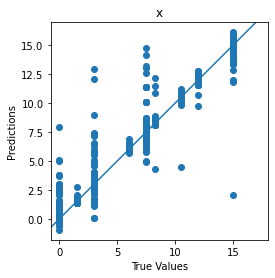

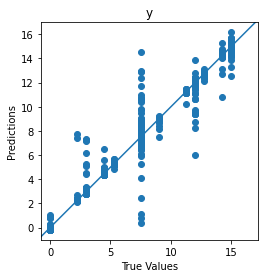

In [56]:
# Run predict
Y_pred = model.predict(norm_test_X)
price_pred = Y_pred[0]
ptratio_pred = Y_pred[1]

plot_diff(test_Y[0], Y_pred[0], title='x')
plot_diff(test_Y[1], Y_pred[1], title='y')

In [ ]:
# Plot RMSE
plot_metrics(metric_name='x_output_root_mean_squared_error', title='x RMSE', ylim=1)
plot_metrics(metric_name='y_output_root_mean_squared_error', title='y RMSE', ylim=1)

In [54]:
# Save model
model.save('./xyForcePlateF2/', save_format='tf')

INFO:tensorflow:Assets written to: ./xyForcePlateF2/assets


In [ ]:
# Restore model
loaded_model = tf.keras.models.load_model('Models/xyForcePlateN6/')

In [ ]:
dataVal.iloc[:,:4].shape

In [ ]:
# Run predict with restored model
predictions = loaded_model.predict(norm_val_X)
x_pred = predictions[0]
y_pred = predictions[1]

In [ ]:
AnDataErr=np.array(val_Y[0]).reshape(len(val_Y[0]),1)
x_pred.shape

In [ ]:
AnData=pd.DataFrame.from_dict(norm_val_X)
AnData.columns=["F0","F1","F2","F3","Fdist","Sx","Sy"]
anDatX=np.array(val_Y[0]).reshape(len(val_Y[0]),1)
AnData['erroX']=x_pred-anDatX
anDatY=np.array(val_Y[1]).reshape(len(val_Y[1]),1)
AnData['erroY']=y_pred-anDatY
AnData.head()

In [ ]:
AnData.to_csv("dataForce.csv")

In [ ]:
norm_test_X[0]

In [ ]:
print(x_pred)

In [ ]:
print(val_Y)

################################################################################